# 2. Create the Skybox

Project the Stars: Convert the celestial coordinates (right ascension and declination) from the star catalog into 3D coordinates on the cube. 

Convert the celestial coordinates of the stars into 3D coordinates on the cube.

http://faraday.uwyo.edu/~admyers/ASTR5160/handouts/51605.pdf slide 2

https://www.diva-portal.org/smash/get/diva2:1044866/FULLTEXT01.pdf pg 40

The celestial sphere is projected onto the faces of the cube: need to convert the right ascension and declination of each star into Cartesian coordinates.

x = cos(declination) * cos(right ascension)

y = cos(declination) * sin(right ascension)

z = sin(declination)

where x, y, and z are the 3D coordinates of the star.
Note: The origin is at the center of the Earth.

In [2]:
import csv

# Define the path to the CSV file
csv_file = '/Users/carloschavez/Documents/Academic & Professional Development/Academia /MS Aerospace CU Boulder/ASEN 6044 Advance State Estimation/skybox/bright_stars.csv'

# Create empty lists to store the right ascension and declination data
right_ascension = []
declination = []
magnitudes = []


# Read the CSV file and extract the data
with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row if it exists
    for row in reader: # Each row contains this: star_id, ra, dec, mag, color, etc
        # star_id = row[0]
        ra = float(row[0]) # start at 0 because the first element in the row is the right ascension and star_id is not read
        dec = float(row[1])
        mag = float(row[2])
        right_ascension.append(ra)
        declination.append(dec)
        magnitudes.append(mag)


# Display the first few entries in the lists
print(right_ascension[:5])
print(declination[:5])

# Now, convert the celestial coordinates to 3D coordinates using the formulas mentioned earlier.
import math
xyz_coordinates = []
xyz_mag_coordinates = []
for ra, dec, mag in zip(right_ascension, declination, magnitudes):
    x = math.cos(math.radians(dec)) * math.cos(math.radians(ra))
    y = math.cos(math.radians(dec)) * math.sin(math.radians(ra))
    z = math.sin(math.radians(dec))
    xyz_coordinates.append((x, y, z))  # Store 3D coordinates
    xyz_mag_coordinates.append((x, y, z, mag))  # Store 3D coordinates with magnitude
    print(f'RA: {ra}, Dec: {dec} -> x: {x:.3f}, y: {y:.3f}, z: {z:.3f}') # Display the 3D coordinates
    print(f'RA: {ra}, Dec: {dec}, Mag: {mag} -> x: {x:.3f}, y: {y:.3f}, z: {z:.3f}') # Display the 3D coordinates with magnitude 
# Display the first few entries in the list of 3D coordinates
print("\n")
print(xyz_coordinates[:])


[1.2875, 1.2625, 1.3333333333333333, 1.425, 1.5666666666666669]
[45.22916666666667, -0.5030555555555556, -5.7075000000000005, 13.39611111111111, 58.43666666666666]
RA: 1.2875, Dec: 45.22916666666667 -> x: 0.704, y: 0.016, z: 0.710
RA: 1.2875, Dec: 45.22916666666667, Mag: 6.7 -> x: 0.704, y: 0.016, z: 0.710
RA: 1.2625, Dec: -0.5030555555555556 -> x: 1.000, y: 0.022, z: -0.009
RA: 1.2625, Dec: -0.5030555555555556, Mag: 6.29 -> x: 1.000, y: 0.022, z: -0.009
RA: 1.3333333333333333, Dec: -5.7075000000000005 -> x: 0.995, y: 0.023, z: -0.099
RA: 1.3333333333333333, Dec: -5.7075000000000005, Mag: 4.61 -> x: 0.995, y: 0.023, z: -0.099
RA: 1.425, Dec: 13.39611111111111 -> x: 0.972, y: 0.024, z: 0.232
RA: 1.425, Dec: 13.39611111111111, Mag: 5.51 -> x: 0.972, y: 0.024, z: 0.232
RA: 1.5666666666666669, Dec: 58.43666666666666 -> x: 0.523, y: 0.014, z: 0.852
RA: 1.5666666666666669, Dec: 58.43666666666666, Mag: 5.96 -> x: 0.523, y: 0.014, z: 0.852
RA: 1.579166666666667, Dec: -49.075 -> x: 0.655, y: 0.

**Using the Astrop library** (for the same calculation as last)

In [14]:
from astropy.coordinates import SkyCoord
from astropy import units as u

right_ascension = []
declination = []
magnitudes = []
coordinates = []
coord_mag = []

with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row if it exists
    for row in reader:
        ra = float(row[0]) * u.degree  # assuming RA is in degrees
        dec = float(row[1]) * u.degree  # assuming Dec is in degrees
        mag = float(row[2])
        
        # Create a SkyCoord object for each star
        coord = SkyCoord(ra=ra, dec=dec, frame='icrs')
        
        # Convert to 3D Cartesian coordinates
        x, y, z = coord.cartesian.x.value, coord.cartesian.y.value, coord.cartesian.z.value
        
        # Append to lists
        right_ascension.append(ra)
        declination.append(dec)
        magnitudes.append(mag)
        coordinates.append((x, y, z))  # Store 3D coordinates
        coord_mag.append((x, y, z, mag))  # Store 3D coordinates with magnitude

print("\n")
print(coord_mag[:])
# sort entire coord_mag by magnitude 
coord_mag.sort(key=lambda x: x[3])
# Truncate to top 500 brightest stars
coord_mag = coord_mag[:500]
print("\n")
display(coord_mag[:])




[(0.7040951044381669, 0.015824465058753404, 0.7099293417036734, 6.7), (0.9997187096348651, 0.022032149518370313, -0.00877986296023728, 6.29), (0.9947731439613501, 0.02315360193086952, -0.0994500013618795, 4.61), (0.9724907543038803, 0.02419174924319183, 0.23168187685277467, 5.51), (0.5232450652342131, 0.014310913828500582, 0.852062086618949, 5.96), (0.6548217598939972, 0.018052544653736215, -0.7555677126511251, 5.7), (0.4351207203051021, 0.012217357602352489, 0.9002892284895923, 5.59), (0.8740760935193173, 0.025178545228720216, 0.48513608770959826, 6.13), (0.9193613267864421, 0.027419841231165136, -0.3924575175943641, 6.18), (0.9538272761530918, 0.030391832169614438, -0.29881409572466194, 6.19), (0.9984419597801256, 0.033703251595005417, -0.04447183133564382, 6.43), (0.9232897316599482, 0.031300865387737214, -0.3828267587790585, 5.94), (0.8330878955313283, 0.0292740449784877, -0.5523654484214053, 5.68), (0.9984481383744284, 0.035738976996229466, -0.04270878715090291, 6.07), (0.873267

[(-0.18739258117140928, 0.939230054569575, -0.2876298404462758, -1.46),
 (-0.06321758690270313, 0.6027400686558182, -0.7954294100314487, -0.72),
 (-0.7838123807664005, -0.5269483144405749, 0.32857818805505706, -0.04),
 (-0.37387926183641473, -0.3125653910712652, -0.873222293504423, -0.01),
 (0.12507778028512792, -0.7694170275517036, 0.626380863845988, 0.03),
 (0.13051792359972206, 0.6823116880080063, 0.719316225332699, 0.08),
 (0.19507121846705786, 0.9703586930635583, -0.14265772506864302, 0.12),
 (-0.4181035645017774, 0.9038230972780544, 0.09106710809953723, 0.38),
 (0.49273724316306367, 0.2237748152159118, -0.8409130997166998, 0.46),
 (0.020911865395555836, 0.9914350271630301, 0.1289157895679188, 0.5),
 (-0.4239447999032485, -0.25427038723438933, -0.8692625476866401, 0.61),
 (0.4592213428605913, -0.8748423388019733, 0.15416432953445758, 0.77),
 (0.34391941626386324, 0.8949679109519753, 0.2841687412137037, 0.85),
 (-0.3448438214251461, -0.8264006380194439, -0.44513450136555166, 0.96),

In [15]:
from scipy.io import savemat

# Convert DataFrame to a dictionary where the column names are keys
mat_data = {'x': [x for x, y, z, mag in coord_mag],
            'y': [y for x, y, z, mag in coord_mag],
            'z': [z for x, y, z, mag in coord_mag],
            'mag': [mag for x, y, z, mag in coord_mag]}
savemat('3Dcoordinates_stars_sorted.mat', mat_data)

# Visualizing the 3D Star Map

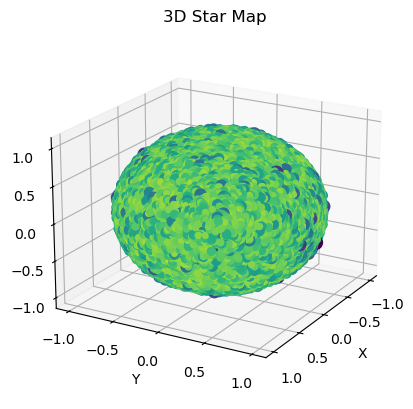

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each star individually
max_mag = max(magnitudes)  # Find the maximum magnitude for scaling
min_mag = min(magnitudes)  # Find the minimum magnitude for scaling

for coord in xyz_mag_coordinates:
    x, y, z, mag = coord
    # Adjust these values as needed for better visualization
    size = ((max_mag - mag) / (max_mag - min_mag)) * 100  
    ax.scatter(x, y, z, color=plt.cm.viridis((mag - min_mag) / (max_mag - min_mag)), s=size)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Star Map')

# Adjust the view angle
ax.view_init(elev=20, azim=30)  # Adjust these angles to change the perspective

plt.show()


# Project 3D points onto skybox faces

In [13]:
import numpy as np

def project_to_face(x, y, z):
    # Determine which face of the cube the point projects onto
    # Assumes cube is at origin
    max_dim = max(abs(x), abs(y), abs(z))
    display(max_dim)
    if max_dim == abs(x):
        face = 'left' if x < 0 else 'right'
    elif max_dim == abs(y):
        face = 'bottom' if y < 0 else 'top'
    else:
        face = 'front' if z < 0 else 'back'
    return face, (x, y, z)

def check_visibility(camera_ray, star_position, camera_position, fov_threshold):
    # Calculate if the star's projection is within the camera's fov_threshold
    vector_to_star = np.array(star_position) - np.array(camera_position)
    # https://freakoutstudios.com/dot-product-fov_threshold.html
    # Detection/fov_threshold determination
    # Calculate the normalized dot product between the camera's position to the position of the star
    # Compare the dot product value to a threshold based on the field of view angle.
    star_angle = np.arccos(np.dot(camera_ray, vector_to_star) / (np.linalg.norm(camera_ray) * np.linalg.norm(vector_to_star)))
    return star_angle < fov_threshold

stars = coordinates  # Use the 3D coordinates from the earlier
camera_position = (0, 0, 0) # Camera at origin of the coordinate system of the Earth
camera_ray = (0, 0, 1)  # Direction vector of the spacecraft or camera
fov_threshold = np.radians(45)  # SPEC: 45 degree field of view for the camera 

for star in stars:
    face, projected = project_to_face(*star)
    visible = check_visibility(camera_ray, projected, camera_position, fov_threshold)
    print(f"Star at {star} projects to {face} face and is {'visible' if visible else 'not visible'}")


0.7099293417036734

Star at (0.7040951044381669, 0.015824465058753404, 0.7099293417036734) projects to back face and is visible


0.9997187096348651

Star at (0.9997187096348651, 0.022032149518370313, -0.00877986296023728) projects to right face and is not visible


0.9947731439613501

Star at (0.9947731439613501, 0.02315360193086952, -0.0994500013618795) projects to right face and is not visible


0.9724907543038803

Star at (0.9724907543038803, 0.02419174924319183, 0.23168187685277467) projects to right face and is not visible


0.852062086618949

Star at (0.5232450652342131, 0.014310913828500582, 0.852062086618949) projects to back face and is visible


0.7555677126511251

Star at (0.6548217598939972, 0.018052544653736215, -0.7555677126511251) projects to front face and is not visible


0.9002892284895923

Star at (0.4351207203051021, 0.012217357602352489, 0.9002892284895923) projects to back face and is visible


0.8740760935193173

Star at (0.8740760935193173, 0.025178545228720216, 0.48513608770959826) projects to right face and is not visible


0.9193613267864421

Star at (0.9193613267864421, 0.027419841231165136, -0.3924575175943641) projects to right face and is not visible


0.9538272761530918

Star at (0.9538272761530918, 0.030391832169614438, -0.29881409572466194) projects to right face and is not visible


0.9984419597801256

Star at (0.9984419597801256, 0.033703251595005417, -0.04447183133564382) projects to right face and is not visible


0.9232897316599482

Star at (0.9232897316599482, 0.031300865387737214, -0.3828267587790585) projects to right face and is not visible


0.8330878955313283

Star at (0.8330878955313283, 0.0292740449784877, -0.5523654484214053) projects to right face and is not visible


0.9984481383744284

Star at (0.9984481383744284, 0.035738976996229466, -0.04270878715090291) projects to right face and is not visible


0.8732678187047584

Star at (0.8732678187047584, 0.031957686214213875, 0.4861913441295175) projects to right face and is not visible


0.9875191571564716

Star at (0.9875191571564716, 0.03570731615723952, -0.1533978546845377) projects to right face and is not visible


0.8019639325182836

Star at (0.8019639325182836, 0.03039950889782383, 0.5965984585955457) projects to right face and is not visible


0.9526460186890457

Star at (0.9526460186890457, 0.03555630249922286, -0.30199555034552067) projects to right face and is not visible


0.9021891686672363

Star at (0.9021891686672363, 0.034921438300235606, 0.42992464117164036) projects to right face and is not visible


0.9839309489059038

Star at (0.17840135954235203, 0.007269298354596604, 0.9839309489059038) projects to back face and is visible


0.8585102421274576

Star at (0.5123862923430055, 0.02050491602621253, 0.8585102421274576) projects to back face and is visible


0.949169140538488

Star at (0.949169140538488, 0.037431222057874296, 0.31253295228612626) projects to right face and is not visible


0.8090369415522949

Star at (0.5873012940454228, 0.02316068255213122, -0.8090369415522949) projects to front face and is not visible


0.8823129486701978

Star at (0.8823129486701978, 0.03601576802315198, -0.4692832034737696) projects to right face and is not visible


0.7162714958902618

Star at (0.6972348408403817, 0.028613299240284835, -0.7162714958902618) projects to front face and is not visible


0.9801992186023417

Star at (0.9801992186023417, 0.042939258994820026, 0.1933021259281302) projects to right face and is not visible


0.7202148563199289

Star at (0.6930483087164333, 0.031218624591025937, 0.7202148563199289) projects to back face and is visible


0.8402407934593081

Star at (0.5416462847115515, 0.024793371393280087, 0.8402407934593081) projects to back face and is visible


0.9948016470359717

Star at (0.9948016470359717, 0.04473872788222062, -0.09147747964389084) projects to right face and is not visible


0.9908043395735933

Star at (0.13517284068511998, 0.005921471375502733, -0.9908043395735933) projects to front face and is not visible


0.9749293425554704

Star at (0.9749293425554704, 0.04555017020121021, -0.2178025688989898) projects to right face and is not visible


0.9574427217845913

Star at (0.288312746723512, 0.013386357923555893, -0.9574427217845913) projects to front face and is not visible


0.9626183840010527

Star at (0.9626183840010527, 0.04729040873614705, -0.2667010761597527) projects to right face and is not visible


0.8834569009570483

Star at (0.8834569009570483, 0.0446251735423207, -0.46638235176482185) projects to right face and is not visible


0.8167463022535509

Star at (0.8167463022535509, 0.04185097999341385, -0.5754771700326106) projects to right face and is not visible


0.7449231672225137

Star at (0.6662384952819862, 0.03486749689286095, 0.7449231672225137) projects to back face and is visible


0.9500482503480879

Star at (0.9500482503480879, 0.05048273771757422, -0.3079932064235759) projects to right face and is not visible


0.7900544341968235

Star at (0.7900544341968235, 0.044286169270641856, 0.6114349730079799) projects to right face and is not visible


0.9634830627208611

Star at (0.9634830627208611, 0.0556946838582939, 0.2619131345311911) projects to right face and is not visible


0.8895850256099933

Star at (0.8895850256099933, 0.05207207956552996, 0.45379178126117325) projects to right face and is not visible


0.7529972331085846

Star at (0.7529972331085846, 0.04440657056394189, 0.6565235893869813) projects to right face and is not visible


0.8970210070654824

Star at (0.8970210070654824, 0.053685658532428626, -0.43871535527169264) projects to right face and is not visible


0.8949952770127285

Star at (0.8949952770127285, 0.053695060141716426, -0.4428321291881234) projects to right face and is not visible


0.8351378429009956

Star at (0.8351378429009956, 0.0512011400072209, 0.5476524688309483) projects to right face and is not visible


0.9365492376187985

Star at (0.9365492376187985, 0.05974325735815047, 0.34540739528256376) projects to right face and is not visible


0.9888251396478838

Star at (0.9888251396478838, 0.062428189696632296, -0.13537933495014803) projects to right face and is not visible


0.9961858195264968

Star at (0.08710990916240373, 0.0050672181756594185, -0.9961858195264968) projects to front face and is not visible


0.9439724215781783

Star at (0.9439724215781783, 0.06035464365186588, -0.32445860181151953) projects to right face and is not visible


0.9233509389914606

Star at (0.9233509389914606, 0.06024987731363566, 0.3792004690757645) projects to right face and is not visible


0.986066324882169

Star at (0.986066324882169, 0.06448616922295898, 0.15334515614234576) projects to right face and is not visible


0.984000792929679

Star at (0.984000792929679, 0.06406363587354408, -0.16624767689331774) projects to right face and is not visible


0.8504598670519679

Star at (0.8504598670519679, 0.05617688936960599, 0.5230317118824673) projects to right face and is not visible


0.8868074392931351

Star at (0.8868074392931351, 0.05877213645189272, 0.4583867380184909) projects to right face and is not visible


0.8183593714663852

Star at (0.8183593714663852, 0.053518571298823946, -0.572209491060115) projects to right face and is not visible


0.9741766710131127

Star at (0.225220939987016, 0.015979419425454874, 0.9741766710131127) projects to back face and is visible


0.7223931865060748

Star at (0.7223931865060748, 0.051623378421223526, 0.6895528340090981) projects to right face and is not visible


0.8510157430560765

Star at (0.8510157430560765, 0.06000635993681135, -0.5217005288840024) projects to right face and is not visible


0.9699204203593081

Star at (0.24283541586497026, 0.016891979508334605, -0.9699204203593081) projects to front face and is not visible


0.9870919004959869

Star at (0.9870919004959869, 0.0714771867794483, 0.14331989305506926) projects to right face and is not visible


0.8790945636364624

Star at (0.4753444074376444, 0.035219916277191475, 0.8790945636364624) projects to back face and is visible


0.9359391188521898

Star at (0.9359391188521898, 0.06832050289796403, -0.3454710909554602) projects to right face and is not visible


0.7425313906495011

Star at (0.6679367788492285, 0.05007587603462036, 0.7425313906495011) projects to back face and is visible


0.7784627546765426

Star at (0.7784627546765426, 0.05813440349966089, 0.6249929045286416) projects to right face and is not visible


0.9808891816317472

Star at (0.19404369480837227, 0.014263865637213088, -0.9808891816317472) projects to front face and is not visible


0.7818802761187609

Star at (0.621566785040988, 0.04814525470137841, 0.7818802761187609) projects to back face and is visible


0.9424630080268569

Star at (0.9424630080268569, 0.0722428078658126, -0.32641148143506205) projects to right face and is not visible


0.9965579638695117

Star at (0.9965579638695117, 0.07748291479718859, 0.029472403410385654) projects to right face and is not visible


0.7983288175604679

Star at (0.7983288175604679, 0.06393986039745059, 0.5988178298154287) projects to right face and is not visible


0.977815583623769

Star at (0.977815583623769, 0.07817221077780989, 0.19433422211390813) projects to right face and is not visible


0.7194659772888242

Star at (0.7194659772888242, 0.058834833827835546, 0.6920311913868391) projects to right face and is not visible


0.849667072621609

Star at (0.849667072621609, 0.06923331448973083, 0.5227548315103279) projects to right face and is not visible


0.9868511659225675

Star at (0.9868511659225675, 0.08062819943444931, -0.140085223250805) projects to right face and is not visible


0.7261231608987435

Star at (0.7261231608987435, 0.059379229676721886, -0.6849958118772819) projects to right face and is not visible


0.9846202659874712

Star at (0.9846202659874712, 0.08361835913806702, -0.1533978546845377) projects to right face and is not visible


0.755002852073984

Star at (0.755002852073984, 0.06500313015124372, 0.6524915987433786) projects to right face and is not visible


0.7531648733094345

Star at (0.6553076582766576, 0.05757209929077366, 0.7531648733094345) projects to back face and is visible


0.905381562395035

Star at (0.42297239112020124, 0.03712927181059111, -0.905381562395035) projects to front face and is not visible


0.8543478136146972

Star at (0.8543478136146972, 0.07624851103838733, 0.5140777936618304) projects to right face and is not visible


0.8360733626896159

Star at (0.8360733626896159, 0.07590472661453539, 0.5433413334897785) projects to right face and is not visible


0.9858111630387327

Star at (0.9858111630387327, 0.08877623289051283, 0.14246098168267196) projects to right face and is not visible


0.9776246673072689

Star at (0.9776246673072689, 0.08940093378293117, 0.1904139777198397) projects to right face and is not visible


0.785003919963564

Star at (0.785003919963564, 0.07253472971036645, 0.6152296795731514) projects to right face and is not visible


0.9374339935120898

Star at (0.3467507257918956, 0.03132797425255585, -0.9374339935120898) projects to front face and is not visible


0.8709223849474692

Star at (0.8709223849474692, 0.08200690916173278, -0.48452973721656284) projects to right face and is not visible


0.9351138555076336

Star at (0.9351138555076336, 0.08908044239293103, -0.3429675670099555) projects to right face and is not visible


0.9677932006727203

Star at (0.9677932006727203, 0.094964010042819, 0.23314835948005086) projects to right face and is not visible


0.9760192400844516

Star at (0.21673006465343692, 0.020359814839201944, -0.9760192400844516) projects to front face and is not visible


0.9725272534872165

Star at (0.9725272534872165, 0.09728541583234868, -0.21148590754690566) projects to right face and is not visible


0.8524560973561954

Star at (0.8524560973561954, 0.08658933271633822, -0.5155782089460181) projects to right face and is not visible


0.7774739294967671

Star at (0.7774739294967671, 0.08183013271904796, 0.6235688561274038) projects to right face and is not visible


0.78822561199044

Star at (0.6119446870290357, 0.06499295822804131, 0.78822561199044) projects to back face and is visible


0.8815599130957448

Star at (0.469314694442056, 0.05094935920482813, 0.8815599130957448) projects to back face and is visible


0.9935535341122527

Star at (0.9935535341122527, 0.10654564859198512, -0.03872208180310127) projects to right face and is not visible


0.7991283301109794

Star at (0.5975587632951471, 0.06570720221719967, 0.7991283301109794) projects to back face and is visible


0.9932953210810479

Star at (0.9932953210810479, 0.11053828788279912, 0.03384807277286828) projects to right face and is not visible


0.9753583674998337

Star at (0.21923540028445776, 0.02473649551114294, -0.9753583674998337) projects to front face and is not visible


0.734701250913664

Star at (0.734701250913664, 0.08462884757567643, -0.6730913980017202) projects to right face and is not visible


0.7184876599954925

Star at (0.7184876599954925, 0.08249652995507019, -0.6906300058494228) projects to right face and is not visible


0.9932632876331735

Star at (0.9932632876331735, 0.11587617673564209, -0.000867816380259851) projects to right face and is not visible


0.8958678801426615

Star at (0.8958678801426615, 0.10695793084140981, -0.4312548461858928) projects to right face and is not visible


0.9445214537237016

Star at (0.9445214537237016, 0.11611210060030262, 0.3072412790460467) projects to right face and is not visible


0.7091317991382539

Star at (0.7091317991382539, 0.08775102657980563, 0.6995940599984634) projects to right face and is not visible


0.8323882031185504

Star at (0.8323882031185504, 0.10189720584072609, -0.5447447464188375) projects to right face and is not visible


0.9518406395216112

Star at (0.9518406395216112, 0.11771458593057564, 0.28309481311794327) projects to right face and is not visible


0.9767155870664336

Star at (0.9767155870664336, 0.12136784496175178, 0.1769081914180686) projects to right face and is not visible


0.9305119274697736

Star at (0.9305119274697736, 0.11569523727756933, -0.34750851055445225) projects to right face and is not visible


0.7611020158374782

Star at (0.7611020158374782, 0.09491268468890059, -0.6416504529518174) projects to right face and is not visible


0.7933204620967035

Star at (0.7933204620967035, 0.10068861622987758, 0.600420225325884) projects to right face and is not visible


0.7719883448205572

Star at (0.6306534258272877, 0.07943709431696387, -0.7719883448205572) projects to front face and is not visible


0.9744463502179455

Star at (0.22257966347063735, 0.030209335580629323, 0.9744463502179455) projects to back face and is visible


0.8658265617454516

Star at (0.4959730212361031, 0.06599338741102664, 0.8658265617454516) projects to back face and is visible


0.8606991440740815

Star at (0.8606991440740815, 0.11375895861315569, 0.4962417583450567) projects to right face and is not visible


0.9583502133598192

Star at (0.9583502133598192, 0.12553114375174454, -0.25652836198277906) projects to right face and is not visible


0.8398175397890475

Star at (0.8398175397890475, 0.10981858049290023, -0.5316449748104424) projects to right face and is not visible


0.989062161927272

Star at (0.989062161927272, 0.130358853269916, -0.06901166001411092) projects to right face and is not visible


0.9070251402733854

Star at (0.9070251402733854, 0.12088872505810426, -0.40335010978785096) projects to right face and is not visible


0.7487449259752946

Star at (0.7487449259752946, 0.10007016675286852, -0.6552610148271479) projects to right face and is not visible


0.7456504719264687

Star at (0.6604710446234585, 0.08822342619640153, -0.7456504719264687) projects to front face and is not visible


0.9171953448756

Star at (0.3947001159299221, 0.054447385827376946, 0.9171953448756) projects to back face and is visible


0.825283054130128

Star at (0.825283054130128, 0.1138446710590708, 0.5531250052538758) projects to right face and is not visible


0.8143406833077154

Star at (0.5748208077720716, 0.08018909191521156, 0.8143406833077154) projects to back face and is visible


0.796945956686212

Star at (0.5982876199426815, 0.0832410111953211, 0.796945956686212) projects to back face and is visible


0.7524564218173501

Star at (0.6524633782706274, 0.0900048514331878, -0.7524564218173501) projects to front face and is not visible


0.8906739332458373

Star at (0.4503460111541228, 0.06235715575585775, -0.8906739332458373) projects to front face and is not visible


0.8907356417935105

Star at (0.45022170786990284, 0.062373313214954686, -0.8907356417935105) projects to front face and is not visible


0.7181856857110523

Star at (0.7181856857110523, 0.10231953320932938, 0.6882877552038613) projects to right face and is not visible


0.9454143528665202

Star at (0.32243345531434625, 0.04720559593978663, 0.9454143528665202) projects to back face and is visible


0.8904644426543779

Star at (0.4503436624123591, 0.06529672344958262, 0.8904644426543779) projects to back face and is visible


0.9284595203846273

Star at (0.9284595203846273, 0.132897202319934, 0.3468447096651212) projects to right face and is not visible


0.9827476356465445

Star at (0.9827476356465445, 0.13979278638612497, 0.12109938689163403) projects to right face and is not visible


0.8774270643706854

Star at (0.8774270643706854, 0.12552743867449706, 0.4629952579127151) projects to right face and is not visible


0.8716278893263368

Star at (0.8716278893263368, 0.12566820109650828, 0.4737851050652423) projects to right face and is not visible


0.8180995356354818

Star at (0.5690652409358609, 0.08293311372196124, 0.8180995356354818) projects to back face and is visible


0.8912529057262759

Star at (0.4488935668084103, 0.06451994817491198, -0.8912529057262759) projects to front face and is not visible


0.9187931239103216

Star at (0.39030110253283523, 0.059027492041976895, 0.9187931239103216) projects to back face and is visible


0.8604761399987783

Star at (0.8604761399987783, 0.12738377910287668, -0.49330942147324985) projects to right face and is not visible


0.9470204782427988

Star at (0.3177719581236771, 0.04661755483747107, -0.9470204782427988) projects to front face and is not visible


0.7920026232358439

Star at (0.6036333260475958, 0.09142566637579835, -0.7920026232358439) projects to front face and is not visible


0.9616233535588432

Star at (0.9616233535588432, 0.14765007086138068, 0.23125739440042395) projects to right face and is not visible


0.9862639347231205

Star at (0.9862639347231205, 0.15282861121884259, -0.0626647162076731) projects to right face and is not visible


0.9879663665575156

Star at (0.9879663665575156, 0.1544169825373003, -0.008823494501377576) projects to right face and is not visible


0.8107432343972636

Star at (0.5781412756888763, 0.0919134006764111, 0.8107432343972636) projects to back face and is visible


0.9616326424222618

Star at (0.9616326424222618, 0.1518775604531435, 0.22846414961385064) projects to right face and is not visible


0.8688572170618722

Star at (0.4888147108089822, 0.07840481398632151, 0.8688572170618722) projects to back face and is visible


0.7431545575089638

Star at (0.661025820949602, 0.10376014500549267, -0.7431545575089638) projects to front face and is not visible


0.8173656135915278

Star at (0.5692021833033466, 0.0890074617144459, -0.8173656135915278) projects to front face and is not visible


0.8778313962559544

Star at (0.8778313962559544, 0.14034391907199317, 0.457947184866154) projects to right face and is not visible


0.9541183201938527

Star at (0.9541183201938527, 0.15133088158357505, -0.25837413831418726) projects to right face and is not visible


0.9101663384424645

Star at (0.9101663384424645, 0.14456331164331, -0.38819928553895666) projects to right face and is not visible


0.7042294821461962

Star at (0.7042294821461962, 0.11395517686800156, 0.7007674750879088) projects to right face and is not visible


0.8079584611990296

Star at (0.5815909621612062, 0.09463127236436475, 0.8079584611990296) projects to back face and is visible


0.821027444303838

Star at (0.821027444303838, 0.13322253312882543, 0.5551267354097145) projects to right face and is not visible


0.9524708038956852

Star at (0.9524708038956852, 0.1541955263150729, 0.26272249121596886) projects to right face and is not visible


0.9014918989115729

Star at (0.9014918989115729, 0.14728839811542094, 0.4069625093020237) projects to right face and is not visible


0.8043326793147548

Star at (0.8043326793147548, 0.1322551369754984, 0.5792732686133031) projects to right face and is not visible


0.9914309339400059

Star at (0.12866873299461812, 0.022562366374279233, 0.9914309339400059) projects to back face and is visible


0.8959965324433984

Star at (0.8959965324433984, 0.14726035826544773, -0.41893269236589564) projects to right face and is not visible


0.9072256001408155

Star at (0.4152870067760489, 0.0669209418054395, -0.9072256001408155) projects to front face and is not visible


0.9851665085648026

Star at (0.9851665085648026, 0.16265164884462216, 0.054693615078567286) projects to right face and is not visible


0.8130414903852464

Star at (0.5745119644075717, 0.09433736091650172, -0.8130414903852464) projects to front face and is not visible


0.859663215888504

Star at (0.859663215888504, 0.1459799577600479, 0.48956001387021986) projects to right face and is not visible


0.7587536404332755

Star at (0.6418969072653669, 0.11073063520276935, 0.7587536404332755) projects to back face and is visible


0.8458151778455809

Star at (0.8458151778455809, 0.1465411006943823, 0.5129545698532445) projects to right face and is not visible


0.9183004290636492

Star at (0.9183004290636492, 0.1592370547634991, 0.36244707526998227) projects to right face and is not visible


0.9167290823227389

Star at (0.9167290823227389, 0.16130039743574648, 0.3654996188927959) projects to right face and is not visible


0.8342442121191804

Star at (0.5428080200917043, 0.09693321345014784, 0.8342442121191804) projects to back face and is visible


0.9570022369116543

Star at (0.2859617788720086, 0.04870913231054703, -0.9570022369116543) projects to front face and is not visible


0.8168422885974364

Star at (0.8168422885974364, 0.14384759350528317, -0.5586381166745081) projects to right face and is not visible


0.7045929276190576

Star at (0.6989027024764954, 0.12281619933973162, -0.7045929276190576) projects to front face and is not visible


0.943829397629768

Star at (0.943829397629768, 0.16840489673403, -0.2842988901241613) projects to right face and is not visible


0.900656384561872

Star at (0.900656384561872, 0.16097199931148637, -0.40361626873256773) projects to right face and is not visible


0.9814348755024046

Star at (0.9814348755024046, 0.1761459454015469, -0.07588274551025828) projects to right face and is not visible


0.7596919114182618

Star at (0.7596919114182618, 0.13777408307992275, 0.6355206540759745) projects to right face and is not visible


0.8612253472048162

Star at (0.5003344662627662, 0.0891982242059594, -0.8612253472048162) projects to front face and is not visible


0.9145895161103494

Star at (0.3975959764924683, 0.07377978380313599, 0.9145895161103494) projects to back face and is visible


0.8940901530362866

Star at (0.8940901530362866, 0.16409625023952681, 0.4167435889139463) projects to right face and is not visible


0.7717633357638662

Star at (0.62523619619358, 0.11602177614574348, 0.7717633357638662) projects to back face and is visible


0.7203695548153655

Star at (0.6823500415987708, 0.1243628771992191, -0.7203695548153655) projects to front face and is not visible


0.8549420502309

Star at (0.5098230447867133, 0.09567943222757065, 0.8549420502309) projects to back face and is visible


0.833901876910461

Star at (0.5427730168495417, 0.10002555606072568, -0.833901876910461) projects to front face and is not visible


0.731647905029391

Star at (0.6694591745686025, 0.128513643836087, 0.731647905029391) projects to back face and is visible


0.7694554460872767

Star at (0.7694554460872767, 0.1450424194489128, -0.6220136759324796) projects to right face and is not visible


0.8683070514740817

Star at (0.4874493750531847, 0.09184754281223945, -0.8683070514740817) projects to front face and is not visible


0.9097299231584429

Star at (0.40809302794910374, 0.07649540802862381, -0.9097299231584429) projects to front face and is not visible


0.9339818981841143

Star at (0.9339818981841143, 0.1797861259234318, -0.3087956651085678) projects to right face and is not visible


0.7415564046195713

Star at (0.6583211594644862, 0.1292569138151967, 0.7415564046195713) projects to back face and is visible


0.9602701650781237

Star at (0.9602701650781237, 0.18593300024933207, -0.20811085862855663) projects to right face and is not visible


0.8430448185412174

Star at (0.5282505587646475, 0.10112754864844543, -0.8430448185412174) projects to front face and is not visible


0.9658718493240208

Star at (0.2538990620056976, 0.05125267794001507, 0.9658718493240208) projects to back face and is visible


0.7464575476151651

Star at (0.6528069237628245, 0.12901259587990382, 0.7464575476151651) projects to back face and is visible


0.9646959447480936

Star at (0.9646959447480936, 0.18831887977543688, -0.18411337188457486) projects to right face and is not visible


0.7689334235875411

Star at (0.7689334235875411, 0.15016200956304268, -0.6214440932006127) projects to right face and is not visible


0.8213649684175748

Star at (0.5593048713841279, 0.11197164597513327, 0.8213649684175748) projects to back face and is visible


0.9095389282901699

Star at (0.9095389282901699, 0.17981862622478878, -0.3747054837968067) projects to right face and is not visible


0.7210955010683471

Star at (0.7210955010683471, 0.1432712771950893, -0.6778603244547342) projects to right face and is not visible


0.8869929235474739

Star at (0.453092487079446, 0.08916698788714932, -0.8869929235474739) projects to front face and is not visible


0.9355981742734768

Star at (0.3457776994807283, 0.07137113448693391, 0.9355981742734768) projects to back face and is visible


0.9772450090845556

Star at (0.9772450090845556, 0.19615983470250845, -0.08070632855489854) projects to right face and is not visible


0.8060832433157973

Star at (0.5804308542874211, 0.11545487532650824, -0.8060832433157973) projects to front face and is not visible


0.955715392868835

Star at (0.955715392868835, 0.1921274756719629, -0.2229240250073729) projects to right face and is not visible


0.8221964764979299

Star at (0.5576527349622755, 0.11408935631110874, 0.8221964764979299) projects to back face and is visible


0.7053940665829617

Star at (0.6944827288281219, 0.14182013322866913, 0.7053940665829617) projects to back face and is not visible


0.9402020145526422

Star at (0.9402020145526422, 0.18993377291902352, -0.2827460587451188) projects to right face and is not visible


0.8622878778952676

Star at (0.4959412301548729, 0.10247883619239352, 0.8622878778952676) projects to back face and is visible


0.9652335258833085

Star at (0.25573227902179313, 0.05408550616566662, 0.9652335258833085) projects to back face and is visible


0.7378862527640104

Star at (0.6615221570407015, 0.13383689224613818, -0.7378862527640104) projects to front face and is not visible


0.9050410759832406

Star at (0.9050410759832406, 0.1848867593792205, -0.3830372527435787) projects to right face and is not visible


0.9439331046792984

Star at (0.9439331046792984, 0.19440556061791778, 0.2668272322896109) projects to right face and is not visible


0.9546309543537911

Star at (0.291243396112887, 0.0621049531857325, 0.9546309543537911) projects to back face and is visible


0.9577291559829992

Star at (0.9577291559829992, 0.19928061332136382, 0.20746590306446297) projects to right face and is not visible


0.922256230269456

Star at (0.922256230269456, 0.19273936120215945, 0.33510443800784795) projects to right face and is not visible


0.8922646341356191

Star at (0.8922646341356191, 0.186945613632056, 0.4109928955767529) projects to right face and is not visible


0.9719379568375452

Star at (0.9719379568375452, 0.2038599812238907, 0.11737851640676342) projects to right face and is not visible


0.9137204781050599

Star at (0.9137204781050599, 0.19380062326120506, 0.3571501173386748) projects to right face and is not visible


0.9301929180193297

Star at (0.9301929180193297, 0.19651699317826998, -0.3100358151227958) projects to right face and is not visible


0.8463403908696581

Star at (0.5204653754725375, 0.11324193444490897, 0.8463403908696581) projects to back face and is visible


0.9086726508037266

Star at (0.9086726508037266, 0.19321340148415217, -0.3701115982622709) projects to right face and is not visible


0.9699634752540557

Star at (0.9699634752540557, 0.20742575036398106, 0.1270646086013505) projects to right face and is not visible


0.9736486901885826

Star at (0.9736486901885826, 0.20865813415658185, 0.09203266346439985) projects to right face and is not visible


0.7767980252054523

Star at (0.6155081150086401, 0.13317127466319523, 0.7767980252054523) projects to back face and is visible


0.9689701421763571

Star at (0.9689701421763571, 0.20898250077223973, 0.13199688610611687) projects to right face and is not visible


0.9348561921691577

Star at (0.9348561921691577, 0.20283480172996557, 0.2913793801389323) projects to right face and is not visible


0.7360794529717168

Star at (0.7360794529717168, 0.1625110951097736, 0.6570975444171742) projects to right face and is not visible


0.949608595860251

Star at (0.949608595860251, 0.2079887773360171, -0.23448706397281538) projects to right face and is not visible


0.8916128929795711

Star at (0.8916128929795711, 0.1944709727701168, -0.4089101243824176) projects to right face and is not visible


0.7277461575802083

Star at (0.6702729134856713, 0.14532636228390322, -0.7277461575802083) projects to front face and is not visible


0.8644317693210077

Star at (0.8644317693210077, 0.1911123543542855, 0.46500944528225896) projects to right face and is not visible


0.8644222713890838

Star at (0.8644222713890838, 0.1911761907468055, 0.46500086109391037) projects to right face and is not visible


0.8966477972240426

Star at (0.8966477972240426, 0.19693573928093747, -0.396533784597407) projects to right face and is not visible


0.9006792822147892

Star at (0.42388939847323637, 0.09536565655963276, 0.9006792822147892) projects to back face and is visible


0.7071342058580179

Star at (0.6901178312112329, 0.1539434764770972, 0.7071342058580179) projects to back face and is visible


0.9593878509624223

Star at (0.9593878509624223, 0.2132036075960084, -0.1847137600011226) projects to right face and is not visible


0.9655786395816134

Star at (0.254288775769712, 0.05472759177290697, -0.9655786395816134) projects to front face and is not visible


0.8813515583032777

Star at (0.4606896066898551, 0.10480704634866246, 0.8813515583032777) projects to back face and is visible


0.782695672164764

Star at (0.6070874993518508, 0.13723065585088867, 0.782695672164764) projects to back face and is visible


0.7093794090996075

Star at (0.7093794090996075, 0.15742800557375594, -0.6870205797547562) projects to right face and is not visible


0.9939747797394017

Star at (0.10648110060597005, 0.02599831640220164, 0.9939747797394017) projects to back face and is visible


0.7833801711427556

Star at (0.6058861034870908, 0.13862733158211343, 0.7833801711427556) projects to back face and is visible


0.777002542809373

Star at (0.6141668845060075, 0.1380800001591574, -0.777002542809373) projects to front face and is not visible


0.9733514380400119

Star at (0.9733514380400119, 0.22158669217019178, 0.05904503297072239) projects to right face and is not visible


0.8756682917819811

Star at (0.47002535912482135, 0.11082059622294835, 0.8756682917819811) projects to back face and is visible


0.7044243174157458

Star at (0.7044243174157458, 0.16219756509218344, -0.6909980686742384) projects to right face and is not visible


0.7613513277348485

Star at (0.7613513277348485, 0.17886543128509658, 0.6231783960051727) projects to right face and is not visible


0.8894894713777595

Star at (0.8894894713777595, 0.20808199424446064, -0.4068296498282325) projects to right face and is not visible


0.9731851828426892

Star at (0.9731851828426892, 0.22915469218055962, -0.019968148313614317) projects to right face and is not visible


0.7727081016069042

Star at (0.7727081016069042, 0.18361004448353005, 0.6076261525607752) projects to right face and is not visible


0.7953588879642486

Star at (0.5895246413558415, 0.14094302597340694, 0.7953588879642486) projects to back face and is visible


0.8835940503137929

Star at (0.8835940503137929, 0.2088727825292822, -0.41908676305574427) projects to right face and is not visible


0.9366993520830749

Star at (0.3410228048955641, 0.07935849260356341, -0.9366993520830749) projects to front face and is not visible


0.856922500409417

Star at (0.5006736772526613, 0.1225140693894822, 0.856922500409417) projects to back face and is visible


0.9177841258444406

Star at (0.9177841258444406, 0.2228126426161945, 0.32867434435675674) projects to right face and is not visible


0.9607906713591142

Star at (0.9607906713591142, 0.2319220693793301, -0.1519652577535797) projects to right face and is not visible


0.751017698226587

Star at (0.6413026489083622, 0.1571729285009256, 0.751017698226587) projects to back face and is visible


0.8899852135940283

Star at (0.4435677887767387, 0.1057068415179759, -0.8899852135940283) projects to front face and is not visible


0.8899409210345803

Star at (0.8899409210345803, 0.2176299758427704, 0.40080213407964543) projects to right face and is not visible


0.8832623292394396

Star at (0.8832623292394396, 0.21708625696270276, 0.41559741912630216) projects to right face and is not visible


0.8480172652681733

Star at (0.5141141873917332, 0.1286597067058153, 0.8480172652681733) projects to back face and is visible


0.9321729445193302

Star at (0.3509068211650013, 0.08898316900423102, 0.9321729445193302) projects to back face and is visible


0.8629550691081187

Star at (0.8629550691081187, 0.21502555466245152, 0.45724452926492987) projects to right face and is not visible


0.962642248308246

Star at (0.962642248308246, 0.23867567621938168, -0.12788206814587474) projects to right face and is not visible


0.87221159111937

Star at (0.47423590739128596, 0.11977998354391571, 0.87221159111937) projects to back face and is visible


0.8587910433932963

Star at (0.4967542203652196, 0.12535225700718935, 0.8587910433932963) projects to back face and is visible


0.8691738565466077

Star at (0.47940597329107987, 0.12127126563506031, 0.8691738565466077) projects to back face and is visible


0.9515794054074196

Star at (0.9515794054074196, 0.23732889666729565, -0.1953756126315306) projects to right face and is not visible


0.8585759017067399

Star at (0.8585759017067399, 0.21373545096408175, -0.4660092037821131) projects to right face and is not visible


0.7587435557670058

Star at (0.7587435557670058, 0.19181551420982723, 0.6225070482255282) projects to right face and is not visible


0.9368367774380796

Star at (0.33974326030852897, 0.08313464689505362, -0.9368367774380796) projects to front face and is not visible


0.8892010849100427

Star at (0.8892010849100427, 0.22665451443796386, 0.39742818430465365) projects to right face and is not visible


0.7173937684302554

Star at (0.6747429951646082, 0.17340147488914462, 0.7173937684302554) projects to back face and is visible


0.9160285681385031

Star at (0.3881092370352839, 0.10130588572246722, 0.9160285681385031) projects to back face and is visible


0.8469837535789396

Star at (0.8469837535789396, 0.21838787560859865, 0.4846908880518525) projects to right face and is not visible


0.802883172539784

Star at (0.802883172539784, 0.20851203065977775, 0.5584812837710744) projects to right face and is not visible


0.9407257132984032

Star at (0.9407257132984032, 0.24285033844909576, 0.23676749239363534) projects to right face and is not visible


0.9010661731431356

Star at (0.9010661731431356, 0.23429036485419688, 0.364949005415376) projects to right face and is not visible


0.9454222519169971

Star at (0.31455384664079633, 0.08504494778452429, 0.9454222519169971) projects to back face and is visible


0.948341767778375

Star at (0.948341767778375, 0.24842428102291333, -0.19731514915291057) projects to right face and is not visible


0.8432416956298857

Star at (0.8432416956298857, 0.22043398420192312, -0.4902573827696034) projects to right face and is not visible


0.8720384269900756

Star at (0.47365101228445167, 0.12330328630895791, -0.8720384269900756) projects to front face and is not visible


0.70353253170711

Star at (0.6864076536734633, 0.18408288841789439, 0.70353253170711) projects to back face and is not visible


0.7035600943116599

Star at (0.6863812978903758, 0.18407582024397282, 0.7035600943116599) projects to back face and is not visible


0.9599544205748038

Star at (0.9599544205748038, 0.25639614621121826, 0.11290937351224774) projects to right face and is not visible


0.9978668429921356

Star at (0.06236827140899069, 0.01928632620182194, 0.9978668429921356) projects to back face and is visible


0.9998523965596284

Star at (0.015760942587779103, 0.006839428536964106, 0.9998523965596284) projects to back face and is visible


0.7775302463851771

Star at (0.6057542166288795, 0.1688447363483334, 0.7775302463851771) projects to back face and is visible


0.7503943231922261

Star at (0.7503943231922261, 0.2056366244727715, -0.6281894128336812) projects to right face and is not visible


0.7358148066385624

Star at (0.6517447810571464, 0.1838622057308884, 0.7358148066385624) projects to back face and is visible


0.7226478222462451

Star at (0.7226478222462451, 0.20346741128401832, 0.6605915058098608) projects to right face and is not visible


0.8181286013048368

Star at (0.8181286013048368, 0.23002977658075752, 0.5270217202480352) projects to right face and is not visible


0.8752535719485478

Star at (0.465150329574728, 0.13253812918488844, 0.8752535719485478) projects to back face and is visible


0.8207411643278234

Star at (0.8207411643278234, 0.22928373343442257, -0.5232713548056892) projects to right face and is not visible


0.9534222641053202

Star at (0.9534222641053202, 0.2685935137510153, 0.13727166743056748) projects to right face and is not visible


0.838694331508051

Star at (0.5247849113854144, 0.1455768356520578, -0.838694331508051) projects to front face and is not visible


0.9589886856566426

Star at (0.9589886856566426, 0.27061336109772394, -0.08431553580413151) projects to right face and is not visible


0.8794848024791293

Star at (0.4573086727329163, 0.13181524969253477, 0.8794848024791293) projects to back face and is visible


0.7933769505640602

Star at (0.5851250548383592, 0.1678740138141695, 0.7933769505640602) projects to back face and is visible


0.7241417704190558

Star at (0.6639078882523005, 0.18666818757015427, -0.7241417704190558) projects to front face and is not visible


0.8371719904567682

Star at (0.8371719904567682, 0.23722460752648322, -0.49281593316222927) projects to right face and is not visible


0.9612083741444284

Star at (0.9612083741444284, 0.27479012304539946, 0.02385057129963212) projects to right face and is not visible


0.777255786748541

Star at (0.6042276611219961, 0.17544906811080235, 0.777255786748541) projects to back face and is visible


0.8348541079381357

Star at (0.8348541079381357, 0.24116557954981419, 0.49483106379775893) projects to right face and is not visible


0.9096433465882335

Star at (0.3999416828437475, 0.11223026477679782, -0.9096433465882335) projects to front face and is not visible


0.7359096451625001

Star at (0.7359096451625001, 0.2131052844379384, 0.6426687575271015) projects to right face and is not visible


0.9987590262190198

Star at (0.0470749640989632, 0.016259006769071452, 0.9987590262190198) projects to back face and is visible


0.9555370996776064

Star at (0.9555370996776064, 0.2779106310038243, 0.0985623270563573) projects to right face and is not visible


0.9274718751876434

Star at (0.9274718751876434, 0.27069932679005404, 0.25791044029144694) projects to right face and is not visible


0.8891103561410341

Star at (0.43863643465208246, 0.13069373664591966, 0.8891103561410341) projects to back face and is visible


0.892649648965266

Star at (0.892649648965266, 0.26300325661949164, 0.36606815104530627) projects to right face and is not visible


0.8926798800481995

Star at (0.8926798800481995, 0.2630827180570912, 0.3659373105011638) projects to right face and is not visible


0.9848430911411429

Star at (0.1656010129703713, 0.051578971827145784, 0.9848430911411429) projects to back face and is visible


0.955529667966693

Star at (0.955529667966693, 0.2822095428296041, 0.08556183478261306) projects to right face and is not visible


0.955487020725177

Star at (0.955487020725177, 0.28234804573333194, 0.08558115619862577) projects to right face and is not visible


0.9448003485784816

Star at (0.9448003485784816, 0.27806986442702675, -0.1732900799916557) projects to right face and is not visible


0.8380521550041671

Star at (0.522441479311399, 0.157237038218699, 0.8380521550041671) projects to back face and is visible


0.9446141489760174

Star at (0.9446141489760174, 0.28018110713327843, -0.17088784848515337) projects to right face and is not visible


0.803839557583633

Star at (0.5694953319684448, 0.17180521682969893, 0.803839557583633) projects to back face and is visible


0.9337432647457607

Star at (0.9337432647457607, 0.2790265326812616, 0.22420461547836398) projects to right face and is not visible


0.875844254269579

Star at (0.875844254269579, 0.25992193329168817, -0.4066170567707117) projects to right face and is not visible


0.8183531685834764

Star at (0.5494074358566549, 0.16866997626963695, 0.8183531685834764) projects to back face and is visible


0.7279954903197072

Star at (0.6572786285866781, 0.19495479085517475, -0.7279954903197072) projects to front face and is not visible


0.7785863022394349

Star at (0.7785863022394349, 0.23222996749911323, -0.5829859450797114) projects to right face and is not visible


0.6939291353088747

Star at (0.6885808331490033, 0.21052028735801692, 0.6939291353088747) projects to back face and is not visible


0.8745602128795593

Star at (0.8745602128795593, 0.264114694499584, -0.4066790653543053) projects to right face and is not visible


0.8504772076975344

Star at (0.5026571618339699, 0.15499773173831652, 0.8504772076975344) projects to back face and is visible


0.8108662764000827

Star at (0.8108662764000827, 0.24797118034856835, 0.5301001561154293) projects to right face and is not visible


0.8943979249948433

Star at (0.8943979249948433, 0.2732315351754653, 0.354114218791871) projects to right face and is not visible


0.9426841122109176

Star at (0.9426841122109176, 0.2871583178095061, -0.169961069359806) projects to right face and is not visible


0.9511926470635377

Star at (0.9511926470635377, 0.2924736353865638, 0.09844653765383217) projects to right face and is not visible


0.7165810241940613

Star at (0.7165810241940613, 0.21834025077901448, -0.6624493721445792) projects to right face and is not visible


0.8810994718539151

Star at (0.4526863708294595, 0.13688962840188004, -0.8810994718539151) projects to front face and is not visible


0.983803451152714

Star at (0.17041286339696143, 0.05558979662544343, 0.983803451152714) projects to back face and is visible


0.9405079471796891

Star at (0.9405079471796891, 0.29016178417076527, -0.17677935484293802) projects to right face and is not visible


0.7342270655306677

Star at (0.6479260809470029, 0.20273729274823254, 0.7342270655306677) projects to back face and is visible


0.9321887394403352

Star at (0.34490929608926485, 0.10982591466428483, 0.9321887394403352) projects to back face and is visible


0.7755703549349969

Star at (0.7755703549349969, 0.24348266634862942, 0.5824146424445086) projects to right face and is not visible


0.8216054844352574

Star at (0.5448682213095729, 0.16757997897376797, -0.8216054844352574) projects to front face and is not visible


0.8983546603219195

Star at (0.8983546603219195, 0.28246026168722443, 0.33641507820767097) projects to right face and is not visible


0.707549840770029

Star at (0.707549840770029, 0.2241082841489697, 0.6701855711682483) projects to right face and is not visible


0.8607372493693818

Star at (0.8607372493693818, 0.2726975119558596, 0.4298458497195413) projects to right face and is not visible


0.9003398709432533

Star at (0.41422880822680563, 0.13342642626139078, 0.9003398709432533) projects to back face and is visible


0.8206480846042381

Star at (0.5441551969359456, 0.1744472495713168, 0.8206480846042381) projects to back face and is visible


0.9180198080830104

Star at (0.9180198080830104, 0.2902581061237816, 0.270166363185109) projects to right face and is not visible


0.9064470637416497

Star at (0.4018296042566404, 0.12994879675123366, 0.9064470637416497) projects to back face and is visible


0.9419587175515872

Star at (0.9419587175515872, 0.2979024249813738, -0.15481576024031313) projects to right face and is not visible


0.9521245956821962

Star at (0.9521245956821962, 0.3027177269407381, 0.04267003741323745) projects to right face and is not visible


0.7531366873575123

Star at (0.7531366873575123, 0.2416849115282203, 0.6118607142934976) projects to right face and is not visible


0.8125904242022917

Star at (0.8125904242022917, 0.2605031897669549, 0.5213778769913252) projects to right face and is not visible


0.8452100169825542

Star at (0.5096171815925961, 0.16096693889730743, -0.8452100169825542) projects to front face and is not visible


0.8883706509954474

Star at (0.8883706509954474, 0.28629394295459165, 0.3589336494081294) projects to right face and is not visible


0.8233008057724849

Star at (0.8233008057724849, 0.26611728320799655, 0.5013555373109706) projects to right face and is not visible


0.9507035707300757

Star at (0.9507035707300757, 0.3076034225606344, -0.03927919334797842) projects to right face and is not visible


0.8805256162802627

Star at (0.450058772817585, 0.14873378931565287, 0.8805256162802627) projects to back face and is visible


0.7112631002438359

Star at (0.6679831246044013, 0.21886833365123387, 0.7112631002438359) projects to back face and is visible


0.8219509680948661

Star at (0.8219509680948661, 0.2709725095327342, 0.5009695650690217) projects to right face and is not visible


0.9845337722471279

Star at (0.1655251962969827, 0.05739913497332405, 0.9845337722471279) projects to back face and is visible


0.8164554212613113

Star at (0.8164554212613113, 0.2667930502462485, -0.5120761793261989) projects to right face and is not visible


0.750105568925466

Star at (0.750105568925466, 0.2464408378878182, -0.6136844049575915) projects to right face and is not visible


0.8626981455847058

Star at (0.8626981455847058, 0.28753902177947166, 0.4160206972721602) projects to right face and is not visible


0.9404353079984578

Star at (0.9404353079984578, 0.31337298784085993, 0.13182868413792978) projects to right face and is not visible


0.9403830489762012

Star at (0.9403830489762012, 0.3135075413595523, 0.13188154802288404) projects to right face and is not visible


0.8330667890322664

Star at (0.8330667890322664, 0.2790771132511886, 0.4776145829754916) projects to right face and is not visible


0.9108198877703495

Star at (0.9108198877703495, 0.3052717243221244, 0.27787822219707076) projects to right face and is not visible


0.9496657190584645

Star at (0.2961088547928458, 0.10224758265327773, 0.9496657190584645) projects to back face and is visible


0.9387210847982375

Star at (0.9387210847982375, 0.3159145479724868, -0.13784311130614954) projects to right face and is not visible


0.9402981897762136

Star at (0.9402981897762136, 0.3178161569965957, 0.12178753899923804) projects to right face and is not visible


0.9470501335486079

Star at (0.9470501335486079, 0.32063554865695937, -0.016996749189613483) projects to right face and is not visible


0.7441042948153666

Star at (0.6312858481599797, 0.21860232466801707, 0.7441042948153666) projects to back face and is visible


0.7136343278543555

Star at (0.6631616522652566, 0.2257048273136337, -0.7136343278543555) projects to front face and is not visible


0.7915882776347632

Star at (0.7915882776347632, 0.27372526412967857, 0.5463171958563693) projects to right face and is not visible


0.7058956091712885

Star at (0.6686282910046975, 0.2337682558022651, 0.7058956091712885) projects to back face and is not visible


0.9437636912602368

Star at (0.9437636912602368, 0.3277301047178083, -0.04362423088728247) projects to right face and is not visible


0.8023633984950715

Star at (0.8023633984950715, 0.28176997008918825, 0.5261355915649281) projects to right face and is not visible


0.9765617963496199

Star at (0.20215491196544183, 0.07389485420953208, 0.9765617963496199) projects to back face and is visible


0.7363300362052616

Star at (0.6376480716848028, 0.22632501951532177, 0.7363300362052616) projects to back face and is visible


0.9328033567532424

Star at (0.34087071078980496, 0.11698314474972972, -0.9328033567532424) projects to front face and is not visible


0.9410568155676191

Star at (0.9410568155676191, 0.33232177265264673, 0.06304212317756032) projects to right face and is not visible


0.7480760343890985

Star at (0.7480760343890985, 0.26778862424856464, 0.6071832503418892) projects to right face and is not visible


0.9163491424063728

Star at (0.37796567828267513, 0.13208404616539612, -0.9163491424063728) projects to front face and is not visible


0.9712959581999141

Star at (0.2228162575145265, 0.08328911676642373, 0.9712959581999141) projects to back face and is visible


0.8501838050984641

Star at (0.4946825988197161, 0.1802127186778685, 0.8501838050984641) projects to back face and is visible


0.8360016693239507

Star at (0.8360016693239507, 0.30207839567881883, 0.4580937150318467) projects to right face and is not visible


0.9037715272179454

Star at (0.4015062759042419, 0.14828936913902255, 0.9037715272179454) projects to back face and is visible


0.9399536559464532

Star at (0.9399536559464532, 0.3411865188036215, -0.008881669863418989) projects to right face and is not visible


0.980702906424618

Star at (0.18258993301121715, 0.06987650315568367, 0.980702906424618) projects to back face and is visible


0.9373369539933823

Star at (0.9373369539933823, 0.34378975662791594, -0.056639543749275455) projects to right face and is not visible


0.9210117717357836

Star at (0.9210117717357836, 0.3372703068740177, -0.19490011910006275) projects to right face and is not visible


0.8224769054820451

Star at (0.8224769054820451, 0.30390350850565995, 0.4808059873448221) projects to right face and is not visible


0.7136037612931176

Star at (0.6558277575543143, 0.2462917462880043, 0.7136037612931176) projects to back face and is visible


0.8493685487953532

Star at (0.49327841880309986, 0.1877484217254288, 0.8493685487953532) projects to back face and is visible


0.9353017560566105

Star at (0.9353017560566105, 0.3525663234270315, 0.030126611202831853) projects to right face and is not visible


0.935774595016892

Star at (0.935774595016892, 0.3525114178144075, -0.007849052901335914) projects to right face and is not visible


0.884482716851728

Star at (0.884482716851728, 0.33289572219720454, -0.3269109385343167) projects to right face and is not visible


0.7389328550362323

Star at (0.7389328550362323, 0.2824173364653353, 0.611734161063307) projects to right face and is not visible


0.7722206283593197

Star at (0.7722206283593197, 0.2949467315210025, 0.5627448149040692) projects to right face and is not visible


0.8755121928258437

Star at (0.8755121928258437, 0.33345044923711004, 0.34969872478585357) projects to right face and is not visible


0.9454048732726411

Star at (0.3033428425635628, 0.11913330960650316, 0.9454048732726411) projects to back face and is visible


0.9280314226504806

Star at (0.3466220262845946, 0.1364215872495512, 0.9280314226504806) projects to back face and is visible


0.8013375689925156

Star at (0.8013375689925156, 0.30566724561875025, -0.5142233322954259) projects to right face and is not visible


0.9244262462576894

Star at (0.9244262462576894, 0.3550082617109441, -0.1393027255544253) projects to right face and is not visible


0.9240486117493045

Star at (0.9240486117493045, 0.35478613137625736, -0.14234101344044203) projects to right face and is not visible


0.8680712823782097

Star at (0.46204149760927143, 0.1815761636262649, 0.8680712823782097) projects to back face and is visible


0.9262715591311473

Star at (0.9262715591311473, 0.3571089233186799, -0.12039192510682241) projects to right face and is not visible


0.8979428238731089

Star at (0.8979428238731089, 0.34761311934212374, -0.26993296263336475) projects to right face and is not visible


0.9311717590417391

Star at (0.9311717590417391, 0.3611777223718183, -0.04969716315263029) projects to right face and is not visible


0.8537828313217446

Star at (0.8537828313217446, 0.3345222102954985, 0.3989357940311194) projects to right face and is not visible


0.6985075741522387

Star at (0.6985075741522387, 0.2704658249248455, -0.662522004464514) projects to right face and is not visible


0.6878198482810487

Star at (0.6750240191224319, 0.26692026884152814, 0.6878198482810487) projects to back face and is not visible


0.7658717911106216

Star at (0.7658717911106216, 0.30219974215900547, 0.5675523900223122) projects to right face and is not visible


0.7012618880325918

Star at (0.6647882889693684, 0.25746513403205573, -0.7012618880325918) projects to front face and is not visible


0.900970122043879

Star at (0.900970122043879, 0.35316191517822, -0.25205059184990947) projects to right face and is not visible


0.8784344677993999

Star at (0.8784344677993999, 0.3471319218062739, 0.32840876152299575) projects to right face and is not visible


0.8774134199890584

Star at (0.8774134199890584, 0.34864792782704224, 0.32953044297153156) projects to right face and is not visible


0.7664457895905591

Star at (0.7664457895905591, 0.30616858682079456, 0.564642938557689) projects to right face and is not visible


0.9296736524634932

Star at (0.9296736524634932, 0.36831847603003687, -0.006957020202585689) projects to right face and is not visible


0.7121077403884293

Star at (0.6513490392953237, 0.26200571575434034, 0.7121077403884293) projects to back face and is visible


0.6993817340442249

Star at (0.6993817340442249, 0.28055903073601884, 0.6573825525200366) projects to right face and is not visible


0.9272302024258295

Star at (0.9272302024258295, 0.36938031172100366, 0.061663092869636005) projects to right face and is not visible


0.9016019689831516

Star at (0.40309847033803364, 0.15692518197166916, -0.9016019689831516) projects to front face and is not visible


0.9050332044569016

Star at (0.9050332044569016, 0.3603851901874333, -0.22591461556092302) projects to right face and is not visible


0.7070311185828327

Star at (0.7070311185828327, 0.28488188258488434, 0.6472629375535112) projects to right face and is not visible


0.7830202194297319

Star at (0.7830202194297319, 0.31226138617931654, -0.5379332325350297) projects to right face and is not visible


0.9999175334767378

Star at (0.010126814778363559, 0.007897712848770881, 0.9999175334767378) projects to back face and is visible


0.9108251992920849

Star at (0.9108251992920849, 0.36691901877240685, -0.18912400693097683) projects to right face and is not visible


0.9176525888802348

Star at (0.9176525888802348, 0.3724646117894218, 0.1385057366536065) projects to right face and is not visible


0.9412628123087591

Star at (0.3112805035132721, 0.1308769127735276, 0.9412628123087591) projects to back face and is visible


0.9142402054349013

Star at (0.3737416701242954, 0.15646728341430294, 0.9142402054349013) projects to back face and is visible


0.6860511883797138

Star at (0.6741586402040289, 0.27357612242488777, -0.6860511883797138) projects to front face and is not visible


0.7314396627639228

Star at (0.6298852274899122, 0.26122905643473204, 0.7314396627639228) projects to back face and is visible


0.7698252014869462

Star at (0.7698252014869462, 0.31383336044120136, -0.5557677401844817) projects to right face and is not visible


0.877084233961311

Star at (0.877084233961311, 0.3627025141229971, 0.31491289714039583) projects to right face and is not visible


0.8594461429329233

Star at (0.8594461429329233, 0.35423813767349316, -0.3686023185159534) projects to right face and is not visible


0.9182683423857226

Star at (0.9182683423857226, 0.3812200795927361, 0.10702570853531032) projects to right face and is not visible


0.7284473681542045

Star at (0.6335219756062344, 0.26079558710451123, -0.7284473681542045) projects to front face and is not visible


0.8283528942464629

Star at (0.8283528942464629, 0.3446686839584494, -0.4416276496007227) projects to right face and is not visible


0.8885323932106409

Star at (0.8885323932106409, 0.37479787245268664, 0.26464455599976106) projects to right face and is not visible


0.7557084051277606

Star at (0.7557084051277606, 0.32123329541030454, 0.5707135676844316) projects to right face and is not visible


0.8510632197020209

Star at (0.48204586464094307, 0.2081422120882625, 0.8510632197020209) projects to back face and is visible


0.7555423051094776

Star at (0.6038570222334423, 0.25399315323295024, -0.7555423051094776) projects to front face and is not visible


0.7953113829698032

Star at (0.7953113829698032, 0.33642988154818926, -0.5042764508879333) projects to right face and is not visible


0.8592452456078477

Star at (0.46920895420151665, 0.20381502691761644, 0.8592452456078477) projects to back face and is visible


0.7141741130218114

Star at (0.644740956760516, 0.2725150178706547, -0.7141741130218114) projects to front face and is not visible


0.9073573263843776

Star at (0.9073573263843776, 0.39006598840693935, -0.15668824762793016) projects to right face and is not visible


0.7351692515836594

Star at (0.7351692515836594, 0.31560034273995713, -0.5999354925226075) projects to right face and is not visible


0.7297355563964737

Star at (0.7297355563964737, 0.3183081774571084, 0.6051164531680352) projects to right face and is not visible


0.7629818125868908

Star at (0.5943694208490775, 0.2541333217450141, -0.7629818125868908) projects to front face and is not visible


0.9106923147282576

Star at (0.9106923147282576, 0.39456362095039227, -0.12230722348824438) projects to right face and is not visible


0.9626956820486045

Star at (0.24653233046442563, 0.11152951986246265, 0.9626956820486045) projects to back face and is visible


0.8685165838296702

Star at (0.8685165838296702, 0.38132745872832746, 0.31665172166377836) projects to right face and is not visible


0.881913346661358

Star at (0.881913346661358, 0.3862917664754148, -0.2701990379958207) projects to right face and is not visible


0.688840097102791

Star at (0.688840097102791, 0.3062113039040982, 0.657064652819469) projects to right face and is not visible


0.7773876503774962

Star at (0.7773876503774962, 0.34138418266868326, -0.5283230837888789) projects to right face and is not visible


0.7515264559575945

Star at (0.6021406189466272, 0.26950818356849676, 0.7515264559575945) projects to back face and is visible


0.88419924247839

Star at (0.88419924247839, 0.39259269611996206, 0.25310605396532987) projects to right face and is not visible


0.9565086368562778

Star at (0.26517480677554767, 0.12154649098553243, 0.9565086368562778) projects to back face and is visible


0.8717507463456429

Star at (0.8717507463456429, 0.38767275338432605, 0.29960052157703293) projects to right face and is not visible


0.6841552626601667

Star at (0.6841552626601667, 0.3074117662398652, 0.6613845950365678) projects to right face and is not visible


0.8807723154598038

Star at (0.8807723154598038, 0.39206835413082847, -0.2655607915501066) projects to right face and is not visible


0.849335282088876

Star at (0.4829184056568569, 0.21311825843143747, -0.849335282088876) projects to front face and is not visible


0.8478399319634988

Star at (0.482397012763278, 0.22013762024060224, 0.8478399319634988) projects to back face and is visible


0.7916847177282413

Star at (0.7916847177282413, 0.35303277341605693, -0.49860121200185803) projects to right face and is not visible


0.891220358556684

Star at (0.891220358556684, 0.4018553768067165, 0.2103295714483044) projects to right face and is not visible


0.7504380032016014

Star at (0.601450503821265, 0.27404396509308476, 0.7504380032016014) projects to back face and is visible


0.7120260459909964

Star at (0.6382740342073745, 0.29261778327208837, 0.7120260459909964) projects to back face and is visible


0.8984154098143722

Star at (0.8984154098143722, 0.4076180855535983, -0.1633929243807491) projects to right face and is not visible


0.9799411328639749

Star at (0.18287945065902747, 0.07918637918178717, -0.9799411328639749) projects to front face and is not visible


0.8505435055598164

Star at (0.4797509383485393, 0.21544090211404762, -0.8505435055598164) projects to front face and is not visible


0.6994901268936438

Star at (0.6485398202792242, 0.3001827175080299, 0.6994901268936438) projects to back face and is not visible


0.8076641189902798

Star at (0.534162068113954, 0.24969893048204847, 0.8076641189902798) projects to back face and is visible


0.7305551512071163

Star at (0.7305551512071163, 0.33466707302187926, -0.5952202292258855) projects to right face and is not visible


0.8409130997166998

Star at (0.49273724316306367, 0.2237748152159118, -0.8409130997166998) projects to front face and is not visible


0.8465064458321373

Star at (0.8465064458321373, 0.3895732343384319, -0.36284918664885557) projects to right face and is not visible


0.8231858398385836

Star at (0.8231858398385836, 0.3787682490615235, -0.4229653491624503) projects to right face and is not visible


0.8699963959038642

Star at (0.8699963959038642, 0.40414652338457346, 0.2824391239726697) projects to right face and is not visible


0.6857901256763785

Star at (0.6587352228186917, 0.30945081958654685, 0.6857901256763785) projects to back face and is not visible


0.687575002612517

Star at (0.687575002612517, 0.322693612611724, 0.6504686373392584) projects to right face and is not visible


0.9274650950751111

Star at (0.3372509519383202, 0.16146297666651618, 0.9274650950751111) projects to back face and is visible


0.803221971403289

Star at (0.5411800003925811, 0.24891498916316793, -0.803221971403289) projects to front face and is not visible


0.9433530245873215

Star at (0.2988956953723128, 0.14403622561652354, 0.9433530245873215) projects to back face and is visible


0.8749438697918268

Star at (0.4370082857899821, 0.20855930299222877, 0.8749438697918268) projects to back face and is visible


0.8538032895518133

Star at (0.4696046341173714, 0.22470298254805626, 0.8538032895518133) projects to back face and is visible


0.6770508168514059

Star at (0.6645444750127326, 0.3162006200672218, 0.6770508168514059) projects to back face and is not visible


0.8141660852415469

Star at (0.8141660852415469, 0.385289259570138, 0.4343797556313474) projects to right face and is not visible


0.781857767260282

Star at (0.781857767260282, 0.37146241912251143, 0.5007135937383949) projects to right face and is not visible


0.8309655898150429

Star at (0.5044226537692887, 0.23463583466232552, -0.8309655898150429) projects to front face and is not visible


0.8309332228011319

Star at (0.5044664864089229, 0.2346562237307172, -0.8309332228011319) projects to front face and is not visible


0.8781639322096418

Star at (0.43088806075634767, 0.20775848301268865, 0.8781639322096418) projects to back face and is visible


0.899536647210808

Star at (0.899536647210808, 0.4262499189330204, 0.09562858847819508) projects to right face and is not visible


0.7370523330050538

Star at (0.7370523330050538, 0.3517533324624527, 0.5770818412611562) projects to right face and is not visible


0.8707946195509911

Star at (0.4425299996802909, 0.2142053452741234, 0.8707946195509911) projects to back face and is visible


0.885502536815558

Star at (0.885502536815558, 0.42109901049231, -0.19636924569700018) projects to right face and is not visible


0.8458425890349862

Star at (0.8458425890349862, 0.40563809003547624, 0.3464217869692413) projects to right face and is not visible


0.710765155928125

Star at (0.710765155928125, 0.3369262052836848, -0.6174897774956315) projects to right face and is not visible


0.7110722327040694

Star at (0.6329421591470547, 0.3062033687788466, 0.7110722327040694) projects to back face and is visible


0.77371429503767

Star at (0.5698406623628947, 0.2768534073696384, 0.77371429503767) projects to back face and is visible


0.7624822261457713

Star at (0.7624822261457713, 0.3642300315546179, -0.5347497909541533) projects to right face and is not visible


0.7223463582988321

Star at (0.7223463582988321, 0.34473500367034166, -0.5994777025851962) projects to right face and is not visible


0.8437325178582468

Star at (0.4821488927549907, 0.23589803628627304, 0.8437325178582468) projects to back face and is visible


0.8993659833268258

Star at (0.8993659833268258, 0.4324329258117755, -0.06436297622421762) projects to right face and is not visible


0.7664805517503032

Star at (0.58008270610032, 0.27570204546190924, -0.7664805517503032) projects to front face and is not visible


0.8395171475489394

Star at (0.4875451399060048, 0.23981387684061695, 0.8395171475489394) projects to back face and is visible


0.7608926151486477

Star at (0.7608926151486477, 0.3704274013826704, 0.5327531966277949) projects to right face and is not visible


0.7210316625690101

Star at (0.6222008639595485, 0.30492528012770703, 0.7210316625690101) projects to back face and is visible


0.8728321844625163

Star at (0.4406632709593903, 0.20971375585250224, -0.8728321844625163) projects to front face and is not visible


0.8063471238094402

Star at (0.5332891916119306, 0.25574783290213227, -0.8063471238094402) projects to front face and is not visible


0.8958774296161083

Star at (0.8958774296161083, 0.4364648318791881, -0.0830787676672387) projects to right face and is not visible


0.8424901376167766

Star at (0.8424901376167766, 0.41508938895230174, 0.34338195525925563) projects to right face and is not visible


0.864123366869934

Star at (0.864123366869934, 0.42177232909789003, -0.27458861818493235) projects to right face and is not visible


0.884709452534963

Star at (0.884709452534963, 0.43813158083672954, 0.1591537070532581) projects to right face and is not visible


0.8976604073102827

Star at (0.3928882855785523, 0.19961109238387323, 0.8976604073102827) projects to back face and is visible


0.9924928816271293

Star at (0.11130889224773705, 0.05067751400827273, -0.9924928816271293) projects to front face and is not visible


0.8904898433115835

Star at (0.8904898433115835, 0.4439010048762058, -0.09989863276745117) projects to right face and is not visible


0.8113847492669424

Star at (0.8113847492669424, 0.4029219891317655, -0.4234485320922987) projects to right face and is not visible


0.8528350429291399

Star at (0.8528350429291399, 0.42792161350865027, 0.29925822001108937) projects to right face and is not visible


0.9821178796273141

Star at (0.1701562310387139, 0.08056877531059004, -0.9821178796273141) projects to front face and is not visible


0.794872754417908

Star at (0.794872754417908, 0.39638111281149546, -0.4594119259340236) projects to right face and is not visible


0.7221191806821965

Star at (0.6166442268679235, 0.3135183987604781, 0.7221191806821965) projects to back face and is visible


0.7751252427063013

Star at (0.5653237984018995, 0.28211675079644927, -0.7751252427063013) projects to front face and is not visible


0.8040846204499378

Star at (0.5319359829508497, 0.26550335816707277, -0.8040846204499378) projects to front face and is not visible


0.7015826608143239

Star at (0.7015826608143239, 0.35991978917945233, 0.6150118010263802) projects to right face and is not visible


0.8519595693121107

Star at (0.8519595693121107, 0.43487578285077916, 0.29162980942874267) projects to right face and is not visible


0.7487307238260821

Star at (0.7487307238260821, 0.38431363607986446, 0.5400975211218292) projects to right face and is not visible


0.6660118674342516

Star at (0.6657186257563983, 0.33652177308125764, -0.6660118674342516) projects to front face and is not visible


0.9958363650576174

Star at (0.08303876027593321, 0.03760981681247459, -0.9958363650576174) projects to front face and is not visible


0.7419400864008545

Star at (0.5957207056282594, 0.3076389914774475, 0.7419400864008545) projects to back face and is visible


0.8883055870779358

Star at (0.8883055870779358, 0.4547319780933064, 0.06428072856986357) projects to right face and is not visible


0.7104336076159503

Star at (0.7104336076159503, 0.3611384086803822, -0.6040390210454843) projects to right face and is not visible


0.7872938656873865

Star at (0.5457264835528244, 0.2869685944490799, 0.7872938656873865) projects to back face and is visible


0.8205674703958445

Star at (0.8205674703958445, 0.4277673256031694, 0.3790569108649476) projects to right face and is not visible


0.8724507763611824

Star at (0.8724507763611824, 0.4521550374233989, -0.18543318192657626) projects to right face and is not visible


0.7609116052993631

Star at (0.7609116052993631, 0.39322642785880585, -0.5161264431843708) projects to right face and is not visible


0.820625920868544

Star at (0.5045938132142097, 0.26825022211472144, 0.820625920868544) projects to back face and is visible


0.8688656808598965

Star at (0.8688656808598965, 0.456487138040406, 0.1915513545437566) projects to right face and is not visible


0.6954226976884345

Star at (0.6954226976884345, 0.3612431659301578, -0.6212009711908835) projects to right face and is not visible


0.7748648142701196

Star at (0.5579406437165877, 0.2971308763747936, 0.7748648142701196) projects to back face and is visible


0.7409967049838493

Star at (0.5951838520570312, 0.3109341818675334, -0.7409967049838493) projects to front face and is not visible


0.7823334394104198

Star at (0.5488857189303585, 0.294412732629835, 0.7823334394104198) projects to back face and is visible


0.8697281940312415

Star at (0.8697281940312415, 0.45976881070951575, -0.17940320288643824) projects to right face and is not visible


0.8250943245418657

Star at (0.49676235349537706, 0.26915891172044915, 0.8250943245418657) projects to back face and is visible


0.7683517926900805

Star at (0.5665466235146666, 0.2977590402558256, -0.7683517926900805) projects to front face and is not visible


0.8962543159726026

Star at (0.3894364728679032, 0.2122909199675976, 0.8962543159726026) projects to back face and is visible


0.6670915038712729

Star at (0.6670915038712729, 0.3595047135046679, 0.6524915987433786) projects to right face and is not visible


0.7659705255931273

Star at (0.7659705255931273, 0.41185799470295775, 0.49362146035382914) projects to right face and is not visible


0.8303974728357917

Star at (0.8303974728357917, 0.44860410050365, 0.3304457566972856) projects to right face and is not visible


0.8304087483284428

Star at (0.8304087483284428, 0.4486101918423208, 0.33040915010753746) projects to right face and is not visible


0.8429810488631293

Star at (0.8429810488631293, 0.45231823519956754, -0.2911892260430785) projects to right face and is not visible


0.9315978589715179

Star at (0.31791605760521124, 0.1762237483327485, 0.9315978589715179) projects to back face and is visible


0.8783912687528751

Star at (0.8783912687528751, 0.4746967558419832, 0.05560367768242462) projects to right face and is not visible


0.9853385000609719

Star at (0.1520941029187657, 0.07730086775017404, -0.9853385000609719) projects to front face and is not visible


0.6648427916291118

Star at (0.6648427916291118, 0.364305062530032, 0.6521241322277523) projects to right face and is not visible


0.6990852108446214

Star at (0.6990852108446214, 0.3833328822529273, 0.6036023271674776) projects to right face and is not visible


0.8202611881280552

Star at (0.8202611881280552, 0.44830488327824697, 0.3552383916184013) projects to right face and is not visible


0.6878650456130332

Star at (0.6878650456130332, 0.3710872558378715, -0.6238076046173996) projects to right face and is not visible


0.7229972906533884

Star at (0.6076581802480358, 0.328673780039579, -0.7229972906533884) projects to front face and is not visible


0.6961105515763114

Star at (0.6961105515763114, 0.38546341467946654, 0.605679829553345) projects to right face and is not visible


0.695930917726464

Star at (0.695930917726464, 0.38635646065749263, 0.6053171425464646) projects to right face and is not visible


0.675550888019615

Star at (0.6473999087746077, 0.3528517476427446, -0.675550888019615) projects to front face and is not visible


0.8018986884547643

Star at (0.8018986884547643, 0.4438138466067172, 0.3999847034758683) projects to right face and is not visible


0.8744105174551683

Star at (0.8744105174551683, 0.4841119384376698, 0.03227813541558453) projects to right face and is not visible


0.8804612638906488

Star at (0.41208991163390796, 0.23445653652146123, 0.8804612638906488) projects to back face and is visible


0.66515795544618

Star at (0.650003862219424, 0.36750492977168314, 0.66515795544618) projects to back face and is not visible


0.8299362085588807

Star at (0.8299362085588807, 0.46645299340945956, 0.3059861020737129) projects to right face and is not visible


0.7704064971679421

Star at (0.7704064971679421, 0.43461859512068235, 0.46645525605008026) projects to right face and is not visible


0.8065796894783782

Star at (0.8065796894783782, 0.4501665338450627, -0.38311786218719285) projects to right face and is not visible


0.7837898129956741

Star at (0.5432274171143586, 0.3009609648101706, -0.7837898129956741) projects to front face and is not visible


0.9034953542043435

Star at (0.37151903281063015, 0.21370482725156653, 0.9034953542043435) projects to back face and is visible


0.7570425717372816

Star at (0.5678866901826095, 0.32309635047589735, 0.7570425717372816) projects to back face and is visible


0.7977491969030571

Star at (0.7977491969030571, 0.45096193737360246, 0.40028683450842395) projects to right face and is not visible


0.9248597913891282

Star at (0.3334796159629469, 0.18282700021841342, -0.9248597913891282) projects to front face and is not visible


0.8734442876135895

Star at (0.4261135308660447, 0.23563177894346415, -0.8734442876135895) projects to front face and is not visible


0.9778431560659984

Star at (0.17993051312887595, 0.1069942642391028, 0.9778431560659984) projects to back face and is visible


0.7854909840569565

Star at (0.5399643086782032, 0.3023945424753963, -0.7854909840569565) projects to front face and is not visible


0.7359198561816302

Star at (0.5904989564503221, 0.33125963791064134, -0.7359198561816302) projects to front face and is not visible


0.9449885651451891

Star at (0.2818780109179104, 0.16595601437067314, 0.9449885651451891) projects to back face and is visible


0.7286080867307004

Star at (0.7286080867307004, 0.41404718255147993, -0.545614503630365) projects to right face and is not visible


0.8090349512828791

Star at (0.8090349512828791, 0.4651374450600917, 0.3593182500314722) projects to right face and is not visible


0.8474039847411188

Star at (0.8474039847411188, 0.48637730106539073, 0.2129403852096166) projects to right face and is not visible


0.9605394826648451

Star at (0.23893497162201202, 0.14238673245053396, 0.9605394826648451) projects to back face and is visible


0.9533034780291032

Star at (0.2592603674600112, 0.15490816841637225, 0.9533034780291032) projects to back face and is visible


0.9754630809022117

Star at (0.18816185692965645, 0.11431051304910086, 0.9754630809022117) projects to back face and is visible


0.864433436241352

Star at (0.864433436241352, 0.4998355228612132, 0.0540304024973533) projects to right face and is not visible


0.8099268864347945

Star at (0.8099268864347945, 0.46651269323667566, -0.3555057604021389) projects to right face and is not visible


0.9094156429760573

Star at (0.36207507012595463, 0.20460897317500384, -0.9094156429760573) projects to front face and is not visible


0.8080823198216747

Star at (0.8080823198216747, 0.46654654487642105, -0.35963493414224135) projects to right face and is not visible


0.9055790816292609

Star at (0.3646669515969004, 0.2166668902452064, 0.9055790816292609) projects to back face and is visible


0.8555235640679792

Star at (0.8555235640679792, 0.49609592115671297, -0.14821696372579785) projects to right face and is not visible


0.6695268266447759

Star at (0.643866534167335, 0.370364299821568, -0.6695268266447759) projects to front face and is not visible


0.9017570994801264

Star at (0.37147252729506985, 0.22100292984981665, 0.9017570994801264) projects to back face and is visible


0.8139888092508959

Star at (0.5001172782809092, 0.29547407056999797, 0.8139888092508959) projects to back face and is visible


0.879397107909935

Star at (0.4135802039065817, 0.2358222668371937, -0.879397107909935) projects to front face and is not visible


0.9707793398659958

Star at (0.2048753629335449, 0.12495422742824469, 0.9707793398659958) projects to back face and is visible


0.9793935286401118

Star at (0.1767103808338089, 0.09778423882937834, -0.9793935286401118) projects to front face and is not visible


0.7476463661669821

Star at (0.7476463661669821, 0.43703514627133244, -0.5000251914462931) projects to right face and is not visible


0.8605533101359232

Star at (0.8605533101359232, 0.5070732436556858, 0.048215412293239786) projects to right face and is not visible


0.8605533101359232

Star at (0.8605533101359232, 0.5070732436556858, 0.048215412293239786) projects to right face and is not visible


0.988482884197609

Star at (0.12783925395016826, 0.08098588023748723, 0.988482884197609) projects to back face and is visible


0.9070685076271501

Star at (0.36022066228889715, 0.21787105574445403, 0.9070685076271501) projects to back face and is visible


0.7184930109100038

Star at (0.7184930109100038, 0.4273169460415859, 0.5487877740066459) projects to right face and is not visible


0.9140161319348296

Star at (0.3516072468666785, 0.20235329133405972, -0.9140161319348296) projects to front face and is not visible


0.8366451575727285

Star at (0.8366451575727285, 0.49569434058638495, 0.2330493531866873) projects to right face and is not visible


0.703563539562814

Star at (0.6127731559040099, 0.3598713731339081, -0.703563539562814) projects to front face and is not visible


0.6733961070409715

Star at (0.6338543216252106, 0.3804817761458604, 0.6733961070409715) projects to back face and is not visible


0.6734104434729354

Star at (0.633843124939635, 0.380475055145988, 0.6734104434729354) projects to back face and is not visible


0.7715454510508455

Star at (0.7715454510508455, 0.4619890735483774, 0.4373599351617146) projects to right face and is not visible


0.7477993235110856

Star at (0.7477993235110856, 0.4425409437917476, -0.4949279592266658) projects to right face and is not visible


0.8589949767255362

Star at (0.8589949767255362, 0.5119791139187354, 0.0022398373338925618) projects to right face and is not visible


0.828995455436231

Star at (0.828995455436231, 0.49303723337642225, -0.2639712510304849) projects to right face and is not visible


0.8146749796395766

Star at (0.8146749796395766, 0.48805583671358294, 0.3132190572092638) projects to right face and is not visible


0.8576013051747832

Star at (0.8576013051747832, 0.5142807894925863, -0.005938932681099728) projects to right face and is not visible


0.8557160267484926

Star at (0.8557160267484926, 0.512473612772857, -0.07156030867253747) projects to right face and is not visible


0.7465827161813713

Star at (0.7465827161813713, 0.45073781933527857, -0.48933594403040104) projects to right face and is not visible


0.7857299431812474

Star at (0.7857299431812474, 0.4840934656830406, 0.3850739836335042) projects to right face and is not visible


0.8433702872285657

Star at (0.8433702872285657, 0.5178308765763763, 0.1434494401667308) projects to right face and is not visible


0.7665814944992486

Star at (0.7665814944992486, 0.47352739603902505, 0.4337333483740888) projects to right face and is not visible


0.8515361923127752

Star at (0.8515361923127752, 0.5242954701551096, 0.0006108652002066433) projects to right face and is not visible


0.779694592472249

Star at (0.779694592472249, 0.48327414590070533, 0.398148769147259) projects to right face and is not visible


0.851942792022546

Star at (0.4432585097806623, 0.27877477042920434, 0.851942792022546) projects to back face and is visible


0.7004042301364023

Star at (0.6043818461798541, 0.3796794679927592, 0.7004042301364023) projects to back face and is not visible


0.6686685175889739

Star at (0.6686685175889739, 0.41979385683864084, 0.61372268276959) projects to right face and is not visible


0.8074039015063366

Star at (0.497438757386426, 0.31725955065560163, 0.8074039015063366) projects to back face and is visible


0.6918686002299984

Star at (0.6918686002299984, 0.43879090640864715, 0.5733937394747699) projects to right face and is not visible


0.7596510903348372

Star at (0.7596510903348372, 0.4812372594736404, 0.4374253319680893) projects to right face and is not visible


0.8069450889483771

Star at (0.8069450889483771, 0.5110334500989312, 0.2961155792964614) projects to right face and is not visible


0.8058888210755113

Star at (0.8058888210755113, 0.5072497684473833, -0.3053536973340891) projects to right face and is not visible


0.9613952157246672

Star at (0.2298912625205654, 0.15122581326751422, 0.9613952157246672) projects to back face and is visible


0.8447562859756701

Star at (0.44947150017640713, 0.29045169621429645, 0.8447562859756701) projects to back face and is visible


0.6534898815378473

Star at (0.6534898815378473, 0.4198015368595014, 0.6298552566884323) projects to right face and is not visible


0.6534259519302357

Star at (0.6534259519302357, 0.4198275999119046, 0.6299042083493926) projects to right face and is not visible


0.7693160436154954

Star at (0.7693160436154954, 0.4880658654271651, -0.41224329714457886) projects to right face and is not visible


0.793648734966925

Star at (0.793648734966925, 0.5086173563340766, 0.33381142928476054) projects to right face and is not visible


0.688565549419286

Star at (0.6130465187917237, 0.38736475052625224, -0.688565549419286) projects to front face and is not visible


0.755901323514907

Star at (0.755901323514907, 0.4871451606674698, 0.43738173435418737) projects to right face and is not visible


0.7160616355692069

Star at (0.7160616355692069, 0.46242892874977387, 0.5228912123198178) projects to right face and is not visible


0.8308311329073007

Star at (0.8308311329073007, 0.5362040738960764, 0.14901281733200808) projects to right face and is not visible


0.6923391031296148

Star at (0.6084550916721767, 0.38787751635778467, -0.6923391031296148) projects to front face and is not visible


0.7752140646474162

Star at (0.5321512698954809, 0.3403794646001116, -0.7752140646474162) projects to front face and is not visible


0.8272750136321332

Star at (0.8272750136321332, 0.5339942392769153, -0.1745457081655765) projects to right face and is not visible


0.8392333243485606

Star at (0.8392333243485606, 0.5428378167692867, -0.03185171876081533) projects to right face and is not visible


0.9172301116425732

Star at (0.33172047881251737, 0.22056846155456336, 0.9172301116425732) projects to back face and is visible


0.8531969710561692

Star at (0.4353429067934871, 0.2872829303755717, 0.8531969710561692) projects to back face and is visible


0.7233286391264431

Star at (0.7233286391264431, 0.4713821102139644, 0.5045736675548158) projects to right face and is not visible


0.6975612239557438

Star at (0.5988484135018236, 0.3934322260310073, 0.6975612239557438) projects to back face and is not visible


0.7638217274813203

Star at (0.7638217274813203, 0.4989587302226779, 0.4094100074033665) projects to right face and is not visible


0.7778685427268155

Star at (0.5246409620177999, 0.3459369757760767, 0.7778685427268155) projects to back face and is visible


0.7800780577324007

Star at (0.7800780577324007, 0.5104687771662596, 0.3618008449172404) projects to right face and is not visible


0.7370906134970574

Star at (0.5634807157463685, 0.3730776199083667, 0.7370906134970574) projects to back face and is visible


0.8066086546709893

Star at (0.8066086546709893, 0.5290874604085368, 0.2635316630849161) projects to right face and is not visible


0.8263372346915437

Star at (0.8263372346915437, 0.5417704309863773, 0.15379068460465173) projects to right face and is not visible


0.8360740139750303

Star at (0.8360740139750303, 0.5470246713519121, -0.04176424413315045) projects to right face and is not visible


0.7807389330632243

Star at (0.7807389330632243, 0.5118748744408189, -0.3583724756667205) projects to right face and is not visible


0.7191100617207817

Star at (0.7191100617207817, 0.47102069902855864, -0.5109013801298461) projects to right face and is not visible


0.7409381019768755

Star at (0.5568414346896042, 0.3754175617252454, 0.7409381019768755) projects to back face and is visible


0.8391956339734237

Star at (0.4497242397897932, 0.3057757283785555, 0.8391956339734237) projects to back face and is visible


0.6925833572559943

Star at (0.6925833572559943, 0.4668603076904803, 0.5498815748460443) projects to right face and is not visible


0.7470170196004859

Star at (0.7470170196004859, 0.5027635377255574, 0.4349648233603372) projects to right face and is not visible


0.7517622333310388

Star at (0.7517622333310388, 0.5056395296434476, 0.4232991974940205) projects to right face and is not visible


0.819031299448712

Star at (0.819031299448712, 0.5496748111673838, -0.16445465177809787) projects to right face and is not visible


0.6582516114220638

Star at (0.6267789675871942, 0.41695676256728037, -0.6582516114220638) projects to front face and is not visible


0.6833587554945505

Star at (0.6833587554945505, 0.46550064845577366, 0.562432180423732) projects to right face and is not visible


0.8471193450791668

Star at (0.4379647580655765, 0.3009579470377955, 0.8471193450791668) projects to back face and is visible


0.8435477042490864

Star at (0.4425119703369943, 0.30431961284900266, 0.8435477042490864) projects to back face and is visible


0.6985020247080318

Star at (0.5905460741616273, 0.40416612397759155, 0.6985020247080318) projects to back face and is not visible


0.6858915834840273

Star at (0.6858915834840273, 0.4683221861189714, 0.5569803099702187) projects to right face and is not visible


0.7561089845339497

Star at (0.7561089845339497, 0.5156214496297669, 0.4030306740047676) projects to right face and is not visible


0.8214432462948272

Star at (0.8214432462948272, 0.5592133723309631, -0.1118543576390636) projects to right face and is not visible


0.9261451135366982

Star at (0.31430242112334617, 0.20849272588773754, -0.9261451135366982) projects to front face and is not visible


0.9013585579230806

Star at (0.35453622576900923, 0.2487103027144043, 0.9013585579230806) projects to back face and is visible


0.7746394170217269

Star at (0.7746394170217269, 0.5329757234119449, 0.34039778473097193) projects to right face and is not visible


0.7358607679929621

Star at (0.5559146876602318, 0.3866106441530483, 0.7358607679929621) projects to back face and is visible


0.7250439009952498

Star at (0.5655847983841291, 0.39296969026424194, 0.7250439009952498) projects to back face and is visible


0.8236972115612561

Star at (0.8236972115612561, 0.5661996090402519, 0.03067419744471065) projects to right face and is not visible


0.7541972634757073

Star at (0.5389332440915403, 0.3751498982789717, 0.7541972634757073) projects to back face and is visible


0.7827409326347945

Star at (0.5151891357438293, 0.34913720338792076, -0.7827409326347945) projects to front face and is not visible


0.7212091964495498

Star at (0.7212091964495498, 0.5000875917687438, 0.47934298317127044) projects to right face and is not visible


0.75546285982022

Star at (0.75546285982022, 0.5239204936614309, 0.3934249404318658) projects to right face and is not visible


0.6405788977229185

Star at (0.6297564072799695, 0.43939224308346164, 0.6405788977229185) projects to back face and is not visible


0.9255166375554403

Star at (0.3144542512920957, 0.21103904248361088, -0.9255166375554403) projects to front face and is not visible


0.735042806636022

Star at (0.5542400411205818, 0.3905509559984403, 0.735042806636022) projects to back face and is visible


0.7079121101015944

Star at (0.7079121101015944, 0.4959923439477115, 0.5028439510591364) projects to right face and is not visible


0.8197089477229209

Star at (0.8197089477229209, 0.5704200939366236, -0.05194379131633677) projects to right face and is not visible


0.7677401627500353

Star at (0.5233260853171835, 0.36973619098911764, 0.7677401627500353) projects to back face and is visible


0.738907843203931

Star at (0.738907843203931, 0.5124394362336132, -0.43751688361055463) projects to right face and is not visible


0.8176281192255225

Star at (0.8176281192255225, 0.5707389328217766, -0.07577155939529165) projects to right face and is not visible


0.8275272221644607

Star at (0.45656686693564846, 0.3267191341096158, 0.8275272221644607) projects to back face and is visible


0.6671610985325545

Star at (0.6113138709867836, 0.4256658545666885, -0.6671610985325545) projects to front face and is not visible


0.6612645876760773

Star at (0.6091230152911987, 0.43783364115625634, 0.6612645876760773) projects to back face and is not visible


0.8284976891088488

Star at (0.45885909147401116, 0.3209983073365689, -0.8284976891088488) projects to front face and is not visible


0.8142649712686029

Star at (0.8142649712686029, 0.5804522621542751, 0.006908539999584146) projects to right face and is not visible


0.8227838280906516

Star at (0.46002695279582556, 0.333769343909653, 0.8227838280906516) projects to back face and is visible


0.813511394460001

Star at (0.813511394460001, 0.5813438277634276, -0.015445549686271232) projects to right face and is not visible


0.7997129137439958

Star at (0.7997129137439958, 0.5705174284031558, -0.18700031946319884) projects to right face and is not visible


0.7755382795989737

Star at (0.7755382795989737, 0.5536116575167046, -0.3034048607690247) projects to right face and is not visible


0.7661192296677767

Star at (0.5192938637866246, 0.37867559858909716, 0.7661192296677767) projects to back face and is visible


0.7435505635404517

Star at (0.7435505635404517, 0.5329844934636209, -0.4038069949691364) projects to right face and is not visible


0.8349439275612917

Star at (0.44343576819156827, 0.3259345905498192, 0.8349439275612917) projects to back face and is visible


0.7704074817726119

Star at (0.7704074817726119, 0.5543588832433964, -0.3148944912155774) projects to right face and is not visible


0.6845471059286887

Star at (0.5931258550534342, 0.4237888387296076, -0.6845471059286887) projects to front face and is not visible


0.7691610452412538

Star at (0.5143438220018266, 0.37926470868238615, 0.7691610452412538) projects to back face and is visible


0.6430035634774722

Star at (0.6430035634774722, 0.46332242847017496, -0.6098186161735077) projects to right face and is not visible


0.778157896732913

Star at (0.5098842762604544, 0.3667264819651858, -0.778157896732913) projects to front face and is not visible


0.7931202376895518

Star at (0.7931202376895518, 0.5805648419670897, 0.1841324328818721) projects to right face and is not visible


0.7273108837357833

Star at (0.7273108837357833, 0.5300402205926668, -0.4359773422479098) projects to right face and is not visible


0.805581415184625

Star at (0.805581415184625, 0.5904965919374457, -0.04850111771288074) projects to right face and is not visible


0.9314338748261828

Star at (0.2965109662145479, 0.21097910735615052, -0.9314338748261828) projects to front face and is not visible


0.6539562625337175

Star at (0.6109786199835991, 0.4461460888720961, -0.6539562625337175) projects to front face and is not visible


0.9232269842808457

Star at (0.305800111211991, 0.23267622886412134, 0.9232269842808457) projects to back face and is visible


0.7855597823451432

Star at (0.7855597823451432, 0.5810184820735826, -0.21286933046064035) projects to right face and is not visible


0.7723980442377539

Star at (0.5074944423596055, 0.381903983000709, 0.7723980442377539) projects to back face and is visible


0.7752137002151432

Star at (0.7752137002151432, 0.5736279629880093, -0.26456507531602325) projects to right face and is not visible


0.7135662612984616

Star at (0.7135662612984616, 0.5334112093451973, 0.45419783407831194) projects to right face and is not visible


0.6799697679760793

Star at (0.6799697679760793, 0.5098401625058306, 0.5269763973221049) projects to right face and is not visible


0.7537481405399427

Star at (0.7537481405399427, 0.5607188437386345, -0.3427216347255999) projects to right face and is not visible


0.8687347837727926

Star at (0.3995629584234487, 0.29265904687731875, -0.8687347837727926) projects to front face and is not visible


0.9595395245312703

Star at (0.22861377752366535, 0.16437652383678045, -0.9595395245312703) projects to front face and is not visible


0.8244857503437331

Star at (0.44982030173670734, 0.3433437688754945, 0.8244857503437331) projects to back face and is visible


0.6935504363413059

Star at (0.6935504363413059, 0.5234189380671964, 0.4949953611130033) projects to right face and is not visible


0.7895556373163112

Star at (0.7895556373163112, 0.5957834517351492, 0.14711891183863735) projects to right face and is not visible


0.7981678693168224

Star at (0.7981678693168224, 0.6014626305856092, 0.03421631773413034) projects to right face and is not visible


0.6902877136951238

Star at (0.6902877136951238, 0.5239568925868852, 0.4989709881669014) projects to right face and is not visible


0.7396767732692582

Star at (0.5392428970278436, 0.4026106917246448, -0.7396767732692582) projects to front face and is not visible


0.9170233398837535

Star at (0.32119067429205705, 0.23644184243965702, -0.9170233398837535) projects to front face and is not visible


0.7296286706025708

Star at (0.7296286706025708, 0.5559119540194626, 0.3982510545032972) projects to right face and is not visible


0.6635311710171992

Star at (0.6635311710171992, 0.500082259144298, -0.5564567540947629) projects to right face and is not visible


0.78341208443562

Star at (0.78341208443562, 0.5988734968628057, 0.16618074712659084) projects to right face and is not visible


0.6584143283932492

Star at (0.6584143283932492, 0.5064373440269855, 0.5567870227846184) projects to right face and is not visible


0.6825135052075455

Star at (0.6825135052075455, 0.5170396864507354, -0.5165706900746836) projects to right face and is not visible


0.7163576857630126

Star at (0.7163576857630126, 0.5523339057357798, 0.42633193948251125) projects to right face and is not visible


0.7446061635090016

Star at (0.7446061635090016, 0.5746325716648227, 0.33964550467550475) projects to right face and is not visible


0.7321948514841844

Star at (0.7321948514841844, 0.5614099985615703, -0.38562872426098005) projects to right face and is not visible


0.7534975896074317

Star at (0.7534975896074317, 0.5828944659916951, 0.3040977210898614) projects to right face and is not visible


0.7913490740699917

Star at (0.7913490740699917, 0.6113483394714989, 0.004455422988650964) projects to right face and is not visible


0.7174066695339727

Star at (0.7174066695339727, 0.551563841753908, -0.4255643300111548) projects to right face and is not visible


0.9010749188729305

Star at (0.34626310091340523, 0.2610859159816454, -0.9010749188729305) projects to front face and is not visible


0.7314109209859035

Star at (0.7314109209859035, 0.5639404151232834, -0.3834178828029951) projects to right face and is not visible


0.6361048557533441

Star at (0.6361048557533441, 0.4974267067287759, 0.5898620888987371) projects to right face and is not visible


0.7887341296858329

Star at (0.7887341296858329, 0.6134602398505871, 0.03956016672350881) projects to right face and is not visible


0.647166695956201

Star at (0.647166695956201, 0.5095748701326123, 0.5670173889524599) projects to right face and is not visible


0.7874791352386776

Star at (0.7874791352386776, 0.6160765644465416, -0.01806317534352343) projects to right face and is not visible


0.7600658418510757

Star at (0.7600658418510757, 0.5942737085331089, -0.2629423423443263) projects to right face and is not visible


0.7586954016730413

Star at (0.7586954016730413, 0.5975706341866874, 0.25940436510957693) projects to right face and is not visible


0.633535787395893

Star at (0.633535787395893, 0.49601195788077906, -0.5938051395263788) projects to right face and is not visible


0.9553729330009607

Star at (0.2279123977544492, 0.1879321628645814, 0.9553729330009607) projects to back face and is visible


0.6457741859388855

Star at (0.6457741859388855, 0.5096205673484915, -0.5685618507342639) projects to right face and is not visible


0.7362520449474228

Star at (0.7362520449474228, 0.5838949672090621, -0.342052033437409) projects to right face and is not visible


0.6382902348015185

Star at (0.5994045667560876, 0.4830111194465086, 0.6382902348015185) projects to back face and is not visible


0.9117301812950094

Star at (0.31743089773793925, 0.2607406789840346, 0.9117301812950094) projects to back face and is visible


0.6188985219634967

Star at (0.6188985219634967, 0.4995367926935936, 0.6061580753044514) projects to right face and is not visible


0.6899040514592579

Star at (0.6899040514592579, 0.5479557800235885, -0.4730505923459374) projects to right face and is not visible


0.6395489352281107

Star at (0.6395489352281107, 0.5168192947338621, 0.5691001458788982) projects to right face and is not visible


0.7730826385056856

Star at (0.7730826385056856, 0.62083423688353, 0.13003108995287405) projects to right face and is not visible


0.7733696133162793

Star at (0.7733696133162793, 0.6190320535999989, -0.13674340135742188) projects to right face and is not visible


0.7713568394009479

Star at (0.7713568394009479, 0.6250040549093143, 0.11991062361732199) projects to right face and is not visible


0.7738100229715963

Star at (0.7738100229715963, 0.625873959304405, 0.09746709913260687) projects to right face and is not visible


0.7781731213191259

Star at (0.49168746868613455, 0.39075571191406844, -0.7781731213191259) projects to front face and is not visible


0.6256890227375789

Star at (0.6041901389772137, 0.49342428273078404, 0.6256890227375789) projects to back face and is not visible


0.6602227377923847

Star at (0.6602227377923847, 0.5379849997090056, 0.5240973922755476) projects to right face and is not visible


0.6399232942395745

Star at (0.6399232942395745, 0.5229944834713819, 0.5630052821671155) projects to right face and is not visible


0.7698972730429222

Star at (0.7698972730429222, 0.623450518910535, -0.13626312572099825) projects to right face and is not visible


0.6413938400488643

Star at (0.5934165308375828, 0.48628259569519877, 0.6413938400488643) projects to back face and is not visible


0.6500227027742762

Star at (0.6500227027742762, 0.5315639520361679, 0.5430563974153287) projects to right face and is not visible


0.887710499847748

Star at (0.3608764741146842, 0.2858990012060468, -0.887710499847748) projects to front face and is not visible


0.7572220424689756

Star at (0.7572220424689756, 0.6165672347530059, 0.2155449452623384) projects to right face and is not visible


0.7039590059900735

Star at (0.7039590059900735, 0.5749025765142911, 0.4170476536352856) projects to right face and is not visible


0.7038382621211052

Star at (0.7038382621211052, 0.5750599806097106, 0.4170344344002082) projects to right face and is not visible


0.768494742427511

Star at (0.768494742427511, 0.6255601619007295, 0.13450024053512524) projects to right face and is not visible


0.6723679496847083

Star at (0.6723679496847083, 0.5452018522806814, -0.5006758237687294) projects to right face and is not visible


0.611895226092867

Star at (0.6096854100867095, 0.5038530867347745, 0.611895226092867) projects to back face and is not visible


0.6168908882617267

Star at (0.6063219693790791, 0.5018160035590066, 0.6168908882617267) projects to back face and is not visible


0.764675517013365

Star at (0.764675517013365, 0.6303498520179223, 0.13390450978711) projects to right face and is not visible


0.771146097984075

Star at (0.771146097984075, 0.6338962703657757, -0.059238618993820505) projects to right face and is not visible


0.6376727514652623

Star at (0.6376727514652623, 0.5208458515960406, -0.5675324315965717) projects to right face and is not visible


0.7135258298509622

Star at (0.7135258298509622, 0.5924682164686679, 0.37398168753286776) projects to right face and is not visible


0.9888821736203299

Star at (0.11060054393137203, 0.09939600785754092, 0.9888821736203299) projects to back face and is visible


0.7685669045827799

Star at (0.7685669045827799, 0.6369443700642309, 0.060056495265076754) projects to right face and is not visible


0.9819898692154936

Star at (0.1490507126721854, 0.11610246254947142, -0.9819898692154936) projects to front face and is not visible


0.6662149675208459

Star at (0.6662149675208459, 0.5506514952859396, -0.5029319514512447) projects to right face and is not visible


0.7938105768447168

Star at (0.4702862656338904, 0.3856106798904666, -0.7938105768447168) projects to front face and is not visible


0.7674789621628209

Star at (0.7674789621628209, 0.6410484761749012, 0.0057353144043162845) projects to right face and is not visible


0.6155315739081088

Star at (0.6072509072938802, 0.5023616397705598, -0.6155315739081088) projects to front face and is not visible


0.7508915310508046

Star at (0.7508915310508046, 0.6275644761417035, -0.20572976663858836) projects to right face and is not visible


0.6804712096458182

Star at (0.6804712096458182, 0.5744492403481992, 0.45493626268581144) projects to right face and is not visible


0.7609924301408922

Star at (0.7609924301408922, 0.6399643514125021, 0.10647135854038355) projects to right face and is not visible


0.7550883340198089

Star at (0.7550883340198089, 0.6347180556709774, -0.16423945211928717) projects to right face and is not visible


0.820210122293926

Star at (0.433320104254993, 0.3734823189054938, 0.820210122293926) projects to back face and is visible


0.6590554383282067

Star at (0.6590554383282067, 0.553176541779342, -0.5095504320821083) projects to right face and is not visible


0.8041278526646316

Star at (0.45036756153944274, 0.3880044536883368, 0.8041278526646316) projects to back face and is visible


0.6453762183245579

Star at (0.5803420275992813, 0.4966816564189255, 0.6453762183245579) projects to back face and is not visible


0.6806143177135136

Star at (0.5616470075964967, 0.47044318400979024, -0.6806143177135136) projects to front face and is not visible


0.7625650526439525

Star at (0.7625650526439525, 0.6467975393026224, -0.012144284178111493) projects to right face and is not visible


0.9260335309369256

Star at (0.28397434544490296, 0.24863722711940955, 0.9260335309369256) projects to back face and is visible


0.7462381315469129

Star at (0.5042635683738871, 0.4345651903181, 0.7462381315469129) projects to back face and is visible


0.7135176811160525

Star at (0.7135176811160525, 0.6113786249132784, 0.34221147808616825) projects to right face and is not visible


0.6408543471863873

Star at (0.5866257320277751, 0.495152457547356, -0.6408543471863873) projects to front face and is not visible


0.7597759850636621

Star at (0.7597759850636621, 0.6477641687270559, -0.0560538511958634) projects to right face and is not visible


0.7372079298407901

Star at (0.7372079298407901, 0.6272282640764523, -0.25121539149402655) projects to right face and is not visible


0.7457809710652077

Star at (0.7457809710652077, 0.6395880025046692, 0.18638114241822618) projects to right face and is not visible


0.9009403180759332

Star at (0.3330071514799092, 0.2782315228878155, -0.9009403180759332) projects to front face and is not visible


0.7573180860740673

Star at (0.4924861409780629, 0.42886678287044705, 0.7573180860740673) projects to back face and is visible


0.6983771168987001

Star at (0.5399974989294838, 0.4697574946098909, 0.6983771168987001) projects to back face and is not visible


0.6695627962455655

Star at (0.6695627962455655, 0.5792268707234264, 0.46495364727655014) projects to right face and is not visible


0.8146219672274692

Star at (0.44324072728402186, 0.3740704588539164, -0.8146219672274692) projects to front face and is not visible


0.6807918723704329

Star at (0.6807918723704329, 0.5910215086951214, 0.4326846458728373) projects to right face and is not visible


0.7555034204480409

Star at (0.7555034204480409, 0.6527085405021785, 0.056445928523029404) projects to right face and is not visible


0.620927387444731

Star at (0.5958357849393154, 0.5093416308400587, -0.620927387444731) projects to front face and is not visible


0.9289190995558503

Star at (0.2840852853723124, 0.23749706759301298, -0.9289190995558503) projects to front face and is not visible


0.7256679818575315

Star at (0.5229334996630984, 0.44715381585861663, -0.7256679818575315) projects to front face and is not visible


0.7178624837880149

Star at (0.7178624837880149, 0.6257718428838727, 0.3050951573254218) projects to right face and is not visible


0.7264456630888106

Star at (0.7264456630888106, 0.634463572236006, 0.2640694493594151) projects to right face and is not visible


0.7749475528596002

Star at (0.4796095604276117, 0.41161992160651123, -0.7749475528596002) projects to front face and is not visible


0.7324154623202835

Star at (0.7324154623202835, 0.6373339166249815, -0.23952676108031545) projects to right face and is not visible


0.7343121638949681

Star at (0.7343121638949681, 0.6436911269335615, 0.21551654011442195) projects to right face and is not visible


0.740344842729391

Star at (0.740344842729391, 0.648884112268193, 0.17561014404046354) projects to right face and is not visible


0.6498129421736648

Star at (0.5750984818674201, 0.49699585142875596, -0.6498129421736648) projects to front face and is not visible


0.9374896836033232

Star at (0.25769064404300784, 0.23389874969747224, 0.9374896836033232) projects to back face and is visible


0.7483425703410033

Star at (0.7483425703410033, 0.6582067916674383, 0.08214144397487746) projects to right face and is not visible


0.6355333960256956

Star at (0.6355333960256956, 0.5540856446642833, -0.5376675561283311) projects to right face and is not visible


0.7124122565786267

Star at (0.7124122565786267, 0.6253189097518124, -0.3185043763959196) projects to right face and is not visible


0.6037768672652135

Star at (0.6037768672652135, 0.5387337066852804, 0.5875538169704482) projects to right face and is not visible


0.6068425262022822

Star at (0.6068425262022822, 0.5418655677403501, 0.5814841828372124) projects to right face and is not visible


0.7941023836847105

Star at (0.4584103211631496, 0.3990756590890491, -0.7941023836847105) projects to front face and is not visible


0.7228130512796573

Star at (0.5190235976765113, 0.4562409428741819, -0.7228130512796573) projects to front face and is not visible


0.9185460704086459

Star at (0.2989875642352914, 0.2586108137133528, -0.9185460704086459) projects to front face and is not visible


0.6486631785231293

Star at (0.6486631785231293, 0.5835466554781646, 0.48857894112263917) projects to right face and is not visible


0.8394697295865605

Star at (0.40144124011072946, 0.36624514173737055, 0.8394697295865605) projects to back face and is visible


0.6941507910660712

Star at (0.6941507910660712, 0.6181941907644012, -0.36876906292081313) projects to right face and is not visible


0.6888467012869575

Star at (0.6888467012869575, 0.61580989890755, -0.38245050729937624) projects to right face and is not visible


0.7041469119179886

Star at (0.7041469119179886, 0.636990064712969, 0.31372086939400085) projects to right face and is not visible


0.9328819585301509

Star at (0.2634563446438868, 0.2456053865773943, 0.9328819585301509) projects to back face and is visible


0.6704983766290663

Star at (0.6704983766290663, 0.6077043054896882, 0.4255906531246689) projects to right face and is not visible


0.6063508543666581

Star at (0.5875684630088018, 0.535818945807535, 0.6063508543666581) projects to back face and is not visible


0.7258299126177113

Star at (0.7258299126177113, 0.6531579802933183, -0.2157674459424279) projects to right face and is not visible


0.8965207968022693

Star at (0.33249211283645397, 0.2927446938931175, -0.8965207968022693) projects to front face and is not visible


0.8280168432585064

Star at (0.4122624967416292, 0.38003649964256875, 0.8280168432585064) projects to back face and is visible


0.6056903947350057

Star at (0.6056903947350057, 0.5432164343082273, -0.5814250177135556) projects to right face and is not visible


0.7053041920837295

Star at (0.7053041920837295, 0.642246384588327, 0.30010927695148054) projects to right face and is not visible


0.9246568433742317

Star at (0.28571660284682965, 0.2517453968970804, -0.9246568433742317) projects to front face and is not visible


0.6554336590325912

Star at (0.6554336590325912, 0.6005066135414567, 0.4580376902615335) projects to right face and is not visible


0.8509461019337142

Star at (0.3845362687116963, 0.357802445001572, 0.8509461019337142) projects to back face and is visible


0.6200339142088854

Star at (0.5770983767635678, 0.5315217857883756, 0.6200339142088854) projects to back face and is not visible


0.6247400028319035

Star at (0.6247400028319035, 0.5678885885446328, -0.5359127539650256) projects to right face and is not visible


0.7294695675220777

Star at (0.5008997236576359, 0.46580426887144016, 0.7294695675220777) projects to back face and is visible


0.5998687940570767

Star at (0.5998687940570767, 0.5569449188507934, 0.5744299672569247) projects to right face and is not visible


0.6709738178933642

Star at (0.6709738178933642, 0.6140268200145594, -0.4156503338196787) projects to right face and is not visible


0.6515896667600382

Star at (0.6515896667600382, 0.5965490994758248, -0.468572382974205) projects to right face and is not visible


0.7986121679940739

Star at (0.43860698881783583, 0.4121195390805393, 0.7986121679940739) projects to back face and is visible


0.7076447170231941

Star at (0.7076447170231941, 0.6569130731888807, 0.2602002473917036) projects to right face and is not visible


0.5970926576434167

Star at (0.5970926576434167, 0.5482540013469915, -0.5855748527689134) projects to right face and is not visible


0.7497582886362633

Star at (0.4812786990019379, 0.4541291914292933, 0.7497582886362633) projects to back face and is visible


0.6854378075673087

Star at (0.6854378075673087, 0.6337970970391147, -0.3584358404821038) projects to right face and is not visible


0.5973111825240581

Star at (0.5973111825240581, 0.5505398375470375, -0.5832025707294104) projects to right face and is not visible


0.8894695530293473

Star at (0.3382532193979275, 0.30729248900796546, -0.8894695530293473) projects to front face and is not visible


0.6418735362416723

Star at (0.5635780534465884, 0.519978981446332, -0.6418735362416723) projects to front face and is not visible


0.7961340382530546

Star at (0.4384841335794561, 0.4170158962605113, 0.7961340382530546) projects to back face and is visible


0.6202925339450576

Star at (0.569668572786181, 0.5391798304014861, 0.6202925339450576) projects to back face and is not visible


0.6979108017737855

Star at (0.6979108017737855, 0.6575820517924794, 0.2837364233366328) projects to right face and is not visible


0.7117156390031109

Star at (0.7117156390031109, 0.6667887859461452, -0.22102842381662047) projects to right face and is not visible


0.6283220042121409

Star at (0.6283220042121409, 0.5854927593010941, -0.512259395061554) projects to right face and is not visible


0.7189963189617852

Star at (0.7189963189617852, 0.6753793027863414, -0.16403380958582398) projects to right face and is not visible


0.87899286615541

Star at (0.34310267491759394, 0.33113757822435286, 0.87899286615541) projects to back face and is visible


0.9013228616600303

Star at (0.311054894308174, 0.30143316303271056, 0.9013228616600303) projects to back face and is visible


0.6719119737597455

Star at (0.6719119737597455, 0.635303015193627, -0.3806893463234414) projects to right face and is not visible


0.6216529783782088

Star at (0.5691989623524414, 0.5381079034268186, -0.6216529783782088) projects to front face and is not visible


0.7800028170940789

Star at (0.4485619966904216, 0.436334436470929, 0.7800028170940789) projects to back face and is visible


0.733301495631592

Star at (0.4879468781489894, 0.4734730832994898, 0.733301495631592) projects to back face and is visible


0.8902900908360246

Star at (0.3326245252026583, 0.3110377459294759, -0.8902900908360246) projects to front face and is not visible


0.6834097751357486

Star at (0.6834097751357486, 0.6588095670123473, 0.31451714366932226) projects to right face and is not visible


0.764812091924981

Star at (0.46758284048527976, 0.4432028331690263, -0.764812091924981) projects to front face and is not visible


0.6827930857069358

Star at (0.6827930857069358, 0.6618651269486086, 0.30939967007109637) projects to right face and is not visible


0.7110065260192279

Star at (0.7110065260192279, 0.6879112255503443, 0.14576647666693598) projects to right face and is not visible


0.7757313772551699

Star at (0.4575675265543125, 0.43459497119129864, -0.7757313772551699) projects to front face and is not visible


0.9662275713220205

Star at (0.18963431848874013, 0.17447952793511595, -0.9662275713220205) projects to front face and is not visible


0.6071616744514093

Star at (0.6071616744514093, 0.5929354237583886, 0.5289445002359141) projects to right face and is not visible


0.7094337297664337

Star at (0.7094337297664337, 0.6875891598278664, -0.15467685785823138) projects to right face and is not visible


0.7159627000367116

Star at (0.7159627000367116, 0.6951298251415612, -0.06474518016659157) projects to right face and is not visible


0.6240841769082641

Star at (0.5572236528776789, 0.547741490857129, 0.6240841769082641) projects to back face and is not visible


0.7138903503831161

Star at (0.7138903503831161, 0.6958460346177497, 0.0784784284795838) projects to right face and is not visible


0.6671053955253845

Star at (0.6671053955253845, 0.6560396280784069, 0.35296231760864494) projects to right face and is not visible


0.6382678420792974

Star at (0.5473017683439111, 0.5413639590285494, 0.6382678420792974) projects to back face and is not visible


0.9021004885271069

Star at (0.31258555524030085, 0.2974978642852213, -0.9021004885271069) projects to front face and is not visible


0.982995049321129

Star at (0.12633614447320327, 0.13326631836213176, 0.982995049321129) projects to back face and is visible


0.5803198508333526

Star at (0.5803198508333526, 0.5755286499188086, 0.5761906315199762) projects to right face and is not visible


0.6540062099497864

Star at (0.6540062099497864, 0.6392401067281459, -0.4045342547885217) projects to right face and is not visible


0.6206659360028527

Star at (0.6206659360028527, 0.6057706432119486, -0.49781093168821106) projects to right face and is not visible


0.7339768678231946

Star at (0.4806328895002766, 0.47986454654523886, 0.7339768678231946) projects to back face and is visible


0.6564943330833755

Star at (0.5342064890690759, 0.532577334915696, 0.6564943330833755) projects to back face and is not visible


0.660919472475172

Star at (0.660919472475172, 0.6563214156917662, 0.3639061008110419) projects to right face and is not visible


0.660919472475172

Star at (0.660919472475172, 0.6563214156917662, 0.3639061008110419) projects to right face and is not visible


0.6533320938383258

Star at (0.6533320938383258, 0.6424947942683409, -0.40044676862088857) projects to right face and is not visible


0.7917746578137353

Star at (0.4302738556732225, 0.4335404252985426, 0.7917746578137353) projects to back face and is visible


0.7917805803894338

Star at (0.4302369188843337, 0.43356626500119516, 0.7917805803894338) projects to back face and is visible


0.7102679335551957

Star at (0.7102679335551957, 0.7022555622485993, -0.04854469954728101) projects to right face and is not visible


0.6182864697805247

Star at (0.5617017564645668, 0.5497390090497097, -0.6182864697805247) projects to front face and is not visible


0.617470710103477

Star at (0.5557607514811203, 0.5566506168840996, 0.617470710103477) projects to back face and is not visible


0.7005276207683738

Star at (0.7005276207683738, 0.6931290325204122, -0.16980340637901972) projects to right face and is not visible


0.6994926333826219

Star at (0.6994926333826219, 0.6976637588972536, 0.15483970861765273) projects to right face and is not visible


0.6468526351605034

Star at (0.5433521067245324, 0.5351169559114392, -0.6468526351605034) projects to front face and is not visible


0.6468489378909513

Star at (0.543315424694011, 0.5351586688440305, -0.6468489378909513) projects to front face and is not visible


0.7074279258068792

Star at (0.7074279258068792, 0.7054756888075153, -0.043009095435018116) projects to right face and is not visible


0.621431529738557

Star at (0.621431529738557, 0.6165698845622617, -0.4833884889999724) projects to right face and is not visible


0.6405341083853092

Star at (0.6405341083853092, 0.6383021158482979, -0.4269501901845498) projects to right face and is not visible


0.69663735603304

Star at (0.6921934014634409, 0.69663735603304, 0.1885860258602621) projects to top face and is not visible


0.5972731950394536

Star at (0.5972731950394536, 0.5953651091021255, -0.5374059148829468) projects to right face and is not visible


0.7088288984171287

Star at (0.7035904586557339, 0.7088288984171287, -0.05022010809799027) projects to top face and is not visible


0.6382481862976114

Star at (0.6277524034941293, 0.6382481862976114, 0.44560764422881444) projects to top face and is not visible


0.9889397731416093

Star at (0.0993880731512432, 0.11009148928916064, 0.9889397731416093) projects to back face and is visible


0.7043506607911835

Star at (0.6972158635885213, 0.7043506607911835, -0.1333423646240593) projects to top face and is not visible


0.7097532981906891

Star at (0.6982847578858722, 0.7097532981906891, 0.09299813230225544) projects to top face and is not visible


0.8993395463006351

Star at (0.31082010036536434, 0.3075373890580342, -0.8993395463006351) projects to front face and is not visible


0.7123104102332655

Star at (0.697748871172691, 0.7123104102332655, 0.07589724797746296) projects to top face and is not visible


0.712247209104532

Star at (0.6982961990854334, 0.712247209104532, 0.07131852119640386) projects to top face and is not visible


0.7022970349146744

Star at (0.6905470604047642, 0.7022970349146744, -0.1729844851898439) projects to top face and is not visible


0.7091286549915896

Star at (0.6959470497609358, 0.7091286549915896, -0.11311169081429438) projects to top face and is not visible


0.62819112082364

Star at (0.619390485470002, 0.62819112082364, -0.4708835760860367) projects to top face and is not visible


0.8039231826112807

Star at (0.4116717033530118, 0.42922479555424037, 0.8039231826112807) projects to back face and is visible


0.6322062738362572

Star at (0.6131856295878116, 0.6322062738362572, 0.4736228573338437) projects to top face and is not visible


0.7089620202996785

Star at (0.6924512453666789, 0.7089620202996785, -0.13373154662507092) projects to top face and is not visible


0.8358632535288278

Star at (0.37867380000013806, 0.3974151162118244, 0.8358632535288278) projects to back face and is visible


0.6545474225689281

Star at (0.6410734470425388, 0.6545474225689281, -0.4007399494751808) projects to top face and is not visible


0.8297066057765329

Star at (0.38485725012335337, 0.4043165163065635, 0.8297066057765329) projects to back face and is visible


0.6271515153676332

Star at (0.5382083289298288, 0.5630388720529361, 0.6271515153676332) projects to back face and is not visible


0.8992356481594751

Star at (0.29930272942949876, 0.3190503490599266, 0.8992356481594751) projects to back face and is visible


0.6505422806903853

Star at (0.524384966238316, 0.5493770546877546, 0.6505422806903853) projects to back face and is not visible


0.6939104190592571

Star at (0.6662115497861791, 0.6939104190592571, 0.27322243914529387) projects to top face and is not visible


0.7138200921135777

Star at (0.6877247339887923, 0.7138200921135777, -0.13227080688877846) projects to top face and is not visible


0.7208752032922605

Star at (0.6923014978223027, 0.7208752032922605, 0.032520414993328264) projects to top face and is not visible


0.6544987658017898

Star at (0.6241789746672317, 0.6544987658017898, 0.42665205161501) projects to top face and is not visible


0.6544987658017898

Star at (0.6241789746672317, 0.6544987658017898, 0.42665205161501) projects to top face and is not visible


0.731056054086995

Star at (0.47629225947644155, 0.4885721332061201, -0.731056054086995) projects to front face and is not visible


0.7902976209272263

Star at (0.41777841606138383, 0.4482085066461897, 0.7902976209272263) projects to back face and is visible


0.7073661039521344

Star at (0.6690203214758907, 0.7073661039521344, 0.2281337424228913) projects to top face and is not visible


0.9631325743279381

Star at (0.18007249436339093, 0.19987381279743827, 0.9631325743279381) projects to back face and is visible


0.7350132217022036

Star at (0.4628994868354975, 0.49545900840572094, 0.7350132217022036) projects to back face and is visible


0.8637280214838221

Star at (0.35071098625833097, 0.3619056631518094, -0.8637280214838221) projects to front face and is not visible


0.7229231036139502

Star at (0.6827386766377046, 0.7229231036139502, -0.1060664210962632) projects to top face and is not visible


0.6554734020218553

Star at (0.5146558112763023, 0.5527060838831306, 0.6554734020218553) projects to back face and is not visible


0.7616891112647403

Star at (0.4396855415156835, 0.4759268035767584, 0.7616891112647403) projects to back face and is visible


0.6943762283043894

Star at (0.6508284358926331, 0.6943762283043894, 0.3070244299714919) projects to top face and is not visible


0.950529286539469

Star at (0.21748510343180705, 0.22179789272223524, -0.950529286539469) projects to front face and is not visible


0.6933411839919882

Star at (0.6445743273156389, 0.6933411839919882, 0.3221830832712662) projects to top face and is not visible


0.7053425182103757

Star at (0.4800803629322613, 0.5215503591518982, 0.7053425182103757) projects to back face and is not visible


0.7252366841158472

Star at (0.6725568490824378, 0.7252366841158472, 0.14730592915749807) projects to top face and is not visible


0.646317499450394

Star at (0.6035801484974321, 0.646317499450394, -0.4668668913555637) projects to top face and is not visible


0.6433251896421994

Star at (0.5915678368789883, 0.6433251896421994, 0.48598373917461773) projects to top face and is not visible


0.6524089408736051

Star at (0.5971247673808049, 0.6524089408736051, 0.466695388930082) projects to top face and is not visible


0.6587048850965241

Star at (0.6012167372218586, 0.6587048850965241, 0.4523785021796211) projects to top face and is not visible


0.6375808697850887

Star at (0.5172748660149951, 0.570891712563126, 0.6375808697850887) projects to back face and is not visible


0.7233296407596476

Star at (0.6591415187613888, 0.7233296407596476, 0.2057345110657149) projects to top face and is not visible


0.7399344654655136

Star at (0.4491640845493536, 0.5007480523848352, 0.7399344654655136) projects to back face and is visible


0.6739944375859561

Star at (0.49395173084405886, 0.5493115561312626, 0.6739944375859561) projects to back face and is not visible


0.6984778057702298

Star at (0.631030868702556, 0.6984778057702298, 0.3375334021854768) projects to top face and is not visible


0.7221067447967138

Star at (0.6539057261798282, 0.7221067447967138, 0.22576348329241655) projects to top face and is not visible


0.6764707451332576

Star at (0.6167110607650848, 0.6764707451332576, -0.4025603041891482) projects to top face and is not visible


0.6612325027168574

Star at (0.5941585420502082, 0.6612325027168574, 0.4579816636717807) projects to top face and is not visible


0.7394582762427527

Star at (0.6699121259149623, 0.7394582762427527, -0.06647707310187888) projects to top face and is not visible


0.7452077297654116

Star at (0.4431624955414575, 0.4982694472304608, 0.7452077297654116) projects to back face and is visible


0.7122046995398367

Star at (0.6454103802839958, 0.7122046995398367, -0.27606141884558744) projects to top face and is not visible


0.7393840402631435

Star at (0.6632172686314671, 0.7393840402631435, 0.11599179105939549) projects to top face and is not visible


0.9352313637001683

Star at (0.2416597976919403, 0.25873314153972216, -0.9352313637001683) projects to front face and is not visible


0.7516575726469433

Star at (0.44463226908382264, 0.4871478613027837, -0.7516575726469433) projects to front face and is not visible


0.9771744950712846

Star at (0.1363276817856549, 0.16292565593278754, 0.9771744950712846) projects to back face and is visible


0.7452166324353534

Star at (0.6664956289825772, 0.7452166324353534, -0.020874560805685505) projects to top face and is not visible


0.6502214197800096

Star at (0.5851196015817131, 0.6502214197800096, -0.484610314690191) projects to top face and is not visible


0.8400067587318601

Star at (0.35631905055380875, 0.4091764649845184, 0.8400067587318601) projects to back face and is visible


0.9960582855500766

Star at (0.05327858824354198, 0.07091744370616641, 0.9960582855500766) projects to back face and is visible


0.6756402479589962

Star at (0.48625170414406926, 0.5541385526697223, 0.6756402479589962) projects to back face and is not visible


0.9111057722576045

Star at (0.26834509099615284, 0.3128532945281872, 0.9111057722576045) projects to back face and is visible


0.6999092332106159

Star at (0.4769485876210841, 0.5316456621028527, -0.6999092332106159) projects to front face and is not visible


0.7764620723013222

Star at (0.413009584660468, 0.4759513979978669, 0.7764620723013222) projects to back face and is visible


0.6040414625160048

Star at (0.53904870272416, 0.6040414625160048, -0.5869926810897442) projects to top face and is not visible


0.6482545056025515

Star at (0.5668380863423563, 0.6482545056025515, 0.5083902829890898) projects to top face and is not visible


0.7014251433974317

Star at (0.6156749857845578, 0.7014251433974317, 0.3590920217563694) projects to top face and is not visible


0.7113619217588016

Star at (0.46094094859239954, 0.5305635288844903, 0.7113619217588016) projects to back face and is visible


0.6489701058510098

Star at (0.576013851684426, 0.6489701058510098, -0.4970370653979452) projects to top face and is not visible


0.6334597035317427

Star at (0.5517103861713485, 0.6334597035317427, 0.5425352097257267) projects to top face and is not visible


0.6206046012806092

Star at (0.539404118539695, 0.6206046012806092, 0.5691160916471705) projects to top face and is not visible


0.8417150161728095

Star at (0.36031442884457066, 0.402106135137998, -0.8417150161728095) projects to front face and is not visible


0.6401562972555773

Star at (0.553625066591835, 0.6401562972555773, 0.5326342091203072) projects to top face and is not visible


0.6492268277272794

Star at (0.49602462040943823, 0.5765970014722989, 0.6492268277272794) projects to back face and is not visible


0.675171276074678

Star at (0.5921093176062773, 0.675171276074678, -0.4399435236112923) projects to top face and is not visible


0.9815920142011082

Star at (0.1305389062170809, 0.13941560752031884, -0.9815920142011082) projects to front face and is not visible


0.6949721755213774

Star at (0.4674936266359796, 0.5463180248772899, 0.6949721755213774) projects to back face and is not visible


0.7506865064958764

Star at (0.6525618243544603, 0.7506865064958764, -0.10311563586670568) projects to top face and is not visible


0.745313984041632

Star at (0.6488437447372408, 0.745313984041632, -0.15332599292795754) projects to top face and is not visible


0.9110598064002239

Star at (0.2650277242300485, 0.31580109966785735, 0.9110598064002239) projects to back face and is visible


0.6331557448412619

Star at (0.503330383044902, 0.5880240881786895, 0.6331557448412619) projects to back face and is not visible


0.768531732953263

Star at (0.41421386097949264, 0.4876329078480202, 0.768531732953263) projects to back face and is visible


0.746743064431871

Star at (0.6458042833374371, 0.746743064431871, -0.15909627068513518) projects to top face and is not visible


0.7671091718539393

Star at (0.4142499435926735, 0.48983722060601953, 0.7671091718539393) projects to back face and is visible


0.6485301628599421

Star at (0.5628484892816987, 0.6485301628599421, -0.5124550770303349) projects to top face and is not visible


0.6304231870242467

Star at (0.5350319555016112, 0.6304231870242467, 0.5624121370083628) projects to top face and is not visible


0.7613436701438462

Star at (0.6481452137298293, 0.7613436701438462, -0.01623569681327126) projects to top face and is not visible


0.6664511322595246

Star at (0.5690354223295409, 0.6664511322595246, -0.48170694041526835) projects to top face and is not visible


0.7034246234690279

Star at (0.5988377138999753, 0.7034246234690279, -0.38286706767298195) projects to top face and is not visible


0.6819102741409393

Star at (0.5726133164398413, 0.6819102741409393, 0.45509599850668336) projects to top face and is not visible


0.7628965690376421

Star at (0.64384216537738, 0.7628965690376421, 0.05878852807105018) projects to top face and is not visible


0.7226915573095851

Star at (0.6135197627000251, 0.7226915573095851, -0.3182929684582298) projects to top face and is not visible


0.740237685531276

Star at (0.4379160949952968, 0.5101741493484063, -0.740237685531276) projects to front face and is not visible


0.6705006239482555

Star at (0.5609570177690612, 0.6705006239482555, 0.4855472556823293) projects to top face and is not visible


0.6915329192541575

Star at (0.5781258267271914, 0.6915329192541575, 0.43307360813010126) projects to top face and is not visible


0.7555200725782089

Star at (0.4170050855075737, 0.505268422318513, 0.7555200725782089) projects to back face and is visible


0.6861922665910792

Star at (0.46408257239732104, 0.5601495686579457, 0.6861922665910792) projects to back face and is not visible


0.710210248840501

Star at (0.5984940533889859, 0.710210248840501, -0.3706835179771761) projects to top face and is not visible


0.6980351467515077

Star at (0.5879737111900958, 0.6980351467515077, -0.40869774754572236) projects to top face and is not visible


0.7176301755024801

Star at (0.595699897614672, 0.7176301755024801, 0.36076108879721064) projects to top face and is not visible


0.8876167335714349

Star at (0.2994810307415126, 0.3499252013073332, -0.8876167335714349) projects to front face and is not visible


0.7675387309361115

Star at (0.6377888726206938, 0.7675387309361115, 0.06410655562583134) projects to top face and is not visible


0.6828878262939239

Star at (0.46977474285088006, 0.5594424972049846, -0.6828878262939239) projects to front face and is not visible


0.903231289513351

Star at (0.26910412501406034, 0.3342995775415611, 0.903231289513351) projects to back face and is visible


0.8870623159339718

Star at (0.2995110428324359, 0.35130269408486636, -0.8870623159339718) projects to front face and is not visible


0.7571470930323502

Star at (0.41283280370742326, 0.5062581907443372, 0.7571470930323502) projects to back face and is visible


0.6842203401320067

Star at (0.5631090587390158, 0.6842203401320067, 0.4634120349275584) projects to top face and is not visible


0.6868007260681384

Star at (0.5724746869619944, 0.6868007260681384, -0.4478587896424995) projects to top face and is not visible


0.9200058996938956

Star at (0.25454328976823887, 0.29798801681005266, -0.9200058996938956) projects to front face and is not visible


0.7235545228683058

Star at (0.5924861683888434, 0.7235545228683058, 0.35415955825690404) projects to top face and is not visible


0.7053696877594247

Star at (0.5845701249343078, 0.7053696877594247, -0.4009131734234476) projects to top face and is not visible


0.7644840328301477

Star at (0.4049941704426868, 0.501541509204566, 0.7644840328301477) projects to back face and is visible


0.6966143063432968

Star at (0.5728844841615455, 0.6966143063432968, -0.43189336184387844) projects to top face and is not visible


0.6488874441658935

Star at (0.5231967161137158, 0.6488874441658935, 0.5524583975754902) projects to top face and is not visible


0.808212633475884

Star at (0.36699516969330137, 0.46055063186555445, 0.808212633475884) projects to back face and is visible


0.7405342390725393

Star at (0.4284737532016564, 0.5177057886276155, -0.7405342390725393) projects to front face and is not visible


0.7066540845718587

Star at (0.570707233352281, 0.7066540845718587, 0.4182502343780494) projects to top face and is not visible


0.7733681125719376

Star at (0.6282191112732772, 0.7733681125719376, 0.0851029417113917) projects to top face and is not visible


0.7680129208394054

Star at (0.6259111804405324, 0.7680129208394054, -0.1356147028285079) projects to top face and is not visible


0.9758723229997084

Star at (0.1432811578693888, 0.16475350983441928, -0.9758723229997084) projects to front face and is not visible


0.6594405804400606

Star at (0.4701583352760058, 0.5865912210725378, 0.6594405804400606) projects to back face and is not visible


0.727589629684396

Star at (0.5869161171651462, 0.727589629684396, 0.3551658798188695) projects to top face and is not visible


0.7587889296328058

Star at (0.6135420430044086, 0.7587889296328058, 0.21864473863479386) projects to top face and is not visible


0.7560914896738384

Star at (0.4075263562318981, 0.5121014823442204, 0.7560914896738384) projects to back face and is visible


0.7696814530425409

Star at (0.6188397764702747, 0.7696814530425409, 0.15693244374743986) projects to top face and is not visible


0.6533071914887468

Star at (0.5302975508513224, 0.6533071914887468, -0.5403463899298073) projects to top face and is not visible


0.950319736617978

Star at (0.1891510821200809, 0.24721299789278747, 0.950319736617978) projects to back face and is visible


0.8682469249177178

Star at (0.30479520964883294, 0.391467952131526, 0.8682469249177178) projects to back face and is visible


0.7554279571078113

Star at (0.40328826968549797, 0.5164176344336006, 0.7554279571078113) projects to back face and is visible


0.8655037587066967

Star at (0.3065459011498685, 0.3961475156463753, 0.8655037587066967) projects to back face and is visible


0.7437399853820527

Star at (0.586054274940223, 0.7437399853820527, 0.32154505278140055) projects to top face and is not visible


0.764340249292361

Star at (0.39506229580669094, 0.5096172737885146, 0.764340249292361) projects to back face and is visible


0.7744573332822876

Star at (0.6096202395415298, 0.7744573332822876, 0.16905325334525684) projects to top face and is not visible


0.7667879858564015

Star at (0.6028610723835381, 0.7667879858564015, 0.22044208343883237) projects to top face and is not visible


0.856074199674143

Star at (0.3148190229497096, 0.40990968205357836, 0.856074199674143) projects to back face and is visible


0.6555106516318293

Star at (0.5106074269450067, 0.6555106516318293, 0.5564043863466699) projects to top face and is not visible


0.6335949438871825

Star at (0.5043604321189042, 0.6335949438871825, -0.5866668574186121) projects to top face and is not visible


0.8604407923645512

Star at (0.3098711703576326, 0.4045015458762232, 0.8604407923645512) projects to back face and is visible


0.7605067120643774

Star at (0.39670917074198936, 0.5140538636701736, 0.7605067120643774) projects to back face and is visible


0.6962134195022267

Star at (0.551976847371048, 0.6962134195022267, -0.4589209457753428) projects to top face and is not visible


0.8236508382237187

Star at (0.3452269353755197, 0.44990850156958845, 0.8236508382237187) projects to back face and is visible


0.7306126321173472

Star at (0.41699564953305257, 0.5406660799986158, 0.7306126321173472) projects to back face and is visible


0.727487655145747

Star at (0.5661637751108431, 0.727487655145747, 0.38758262520755654) projects to top face and is not visible


0.6644082564494005

Star at (0.46478062723924546, 0.5852697132988869, -0.6644082564494005) projects to front face and is not visible


0.7728147116906408

Star at (0.6036985253704552, 0.7728147116906408, -0.1957179395457905) projects to top face and is not visible


0.7443536354195767

Star at (0.405095158311738, 0.5308818871934208, 0.7443536354195767) projects to back face and is visible


0.7430896743291369

Star at (0.40606425419864534, 0.5319112307213633, 0.7430896743291369) projects to back face and is visible


0.9374323055589848

Star at (0.21906960933510441, 0.27060890369707136, -0.9374323055589848) projects to front face and is not visible


0.6390967365593386

Star at (0.5013410429280462, 0.6390967365593386, -0.5832773954089274) projects to top face and is not visible


0.9580576178873844

Star at (0.16925320065487068, 0.23125517264708373, 0.9580576178873844) projects to back face and is visible


0.7571059202900892

Star at (0.39433623402696016, 0.5208546438260213, 0.7571059202900892) projects to back face and is visible


0.6390966311058396

Star at (0.49849422032251506, 0.6390966311058396, -0.5857123939393927) projects to top face and is not visible


0.7592807723818876

Star at (0.3920546775205081, 0.5194091244149014, 0.7592807723818876) projects to back face and is visible


0.7868402553421248

Star at (0.6056751484419616, 0.7868402553421248, -0.11849062044291805) projects to top face and is not visible


0.7789156025918618

Star at (0.59552594573215, 0.7789156025918618, 0.19656889885936965) projects to top face and is not visible


0.7729826863178886

Star at (0.5952768053852163, 0.7729826863178886, -0.2194157962024433) projects to top face and is not visible


0.7434205054908953

Star at (0.4021976929387508, 0.5343809201406876, 0.7434205054908953) projects to back face and is visible


0.9356683361213001

Star at (0.22015504789417367, 0.2757834651800428, -0.9356683361213001) projects to front face and is not visible


0.7063799540052609

Star at (0.5355241291788458, 0.7063799540052609, 0.4628620395396065) projects to top face and is not visible


0.7754546401136508

Star at (0.5903817326756469, 0.7754546401136508, 0.2238738726361555) projects to top face and is not visible


0.7907063344112409

Star at (0.602629469089147, 0.7907063344112409, 0.10780174259849268) projects to top face and is not visible


0.8550476558954203

Star at (0.30929314990880274, 0.4162105880047236, 0.8550476558954203) projects to back face and is visible


0.7200298437100313

Star at (0.4165767551307946, 0.5549962443581091, 0.7200298437100313) projects to back face and is visible


0.7918715823656658

Star at (0.6042461642774264, 0.7918715823656658, -0.0884645126461122) projects to top face and is not visible


0.8468332516961357

Star at (0.3169519791498824, 0.4271005581063103, 0.8468332516961357) projects to back face and is visible


0.7053218978168695

Star at (0.42501156460549494, 0.5673501479788285, 0.7053218978168695) projects to back face and is not visible


0.818898913867058

Star at (0.34209544580315987, 0.4608419195647137, 0.818898913867058) projects to back face and is visible


0.6519148223338466

Star at (0.48828637929171753, 0.6519148223338466, 0.5801581475939247) projects to top face and is not visible


0.677314799332906

Star at (0.4480739143031379, 0.5835018679710372, -0.677314799332906) projects to front face and is not visible


0.6609190174527775

Star at (0.45628634879454055, 0.5958093824982972, -0.6609190174527775) projects to front face and is not visible


0.8663839429449723

Star at (0.29528731170405637, 0.4027210783578559, 0.8663839429449723) projects to back face and is visible


0.6414421928957786

Star at (0.4574514432195818, 0.6158653182875103, 0.6414421928957786) projects to back face and is not visible


0.7895233621780847

Star at (0.5917142187565361, 0.7895233621780847, 0.16287155643744303) projects to top face and is not visible


0.9691867388741249

Star at (0.14181522171434918, 0.20140880834921035, 0.9691867388741249) projects to back face and is visible


0.7358049573358778

Star at (0.4108022077144255, 0.5383610413996365, -0.7358049573358778) projects to front face and is not visible


0.7198737923089381

Star at (0.5430385762894879, 0.7198737923089381, -0.43230871817282823) projects to top face and is not visible


0.8905107673649696

Star at (0.27795981120920055, 0.3601790062727125, -0.8905107673649696) projects to front face and is not visible


0.7901464093547864

Star at (0.5904779414219723, 0.7901464093547864, -0.1643303151515516) projects to top face and is not visible


0.765564337014379

Star at (0.565798850641639, 0.765564337014379, 0.3062399492299049) projects to top face and is not visible


0.7327077277853994

Star at (0.5400342499236491, 0.7327077277853994, 0.4141284759020549) projects to top face and is not visible


0.7453919763049275

Star at (0.3906949391737979, 0.5401372660391216, 0.7453919763049275) projects to back face and is visible


0.7467147315324509

Star at (0.5536330636153779, 0.7467147315324509, -0.36865639908222203) projects to top face and is not visible


0.8009205396171233

Star at (0.58824495770013, 0.8009205396171233, 0.11177727389674603) projects to top face and is not visible


0.7702752345522224

Star at (0.38252397179858055, 0.5102464836086159, -0.7702752345522224) projects to front face and is not visible


0.7935364347268368

Star at (0.583888347901797, 0.7935364347268368, -0.17138939274509044) projects to top face and is not visible


0.916988531599668

Star at (0.24166775817090833, 0.31737789396133453, -0.916988531599668) projects to front face and is not visible


0.6883108382329453

Star at (0.509633145799523, 0.6883108382329453, -0.5162385559734398) projects to top face and is not visible


0.8380309936092527

Star at (0.3162306119904302, 0.4446372159305231, 0.8380309936092527) projects to back face and is visible


0.6838493069445218

Star at (0.5034866618415578, 0.6838493069445218, -0.5280637335958057) projects to top face and is not visible


0.874763044715536

Star at (0.2901727947534244, 0.38805845537108485, -0.874763044715536) projects to front face and is not visible


0.6766582494235919

Star at (0.4275699787606984, 0.5994310024928441, 0.6766582494235919) projects to back face and is not visible


0.7935010942736634

Star at (0.5767768292563283, 0.7935010942736634, -0.1941249665022892) projects to top face and is not visible


0.8109786019350855

Star at (0.5849858723436332, 0.8109786019350855, 0.010258477556280645) projects to top face and is not visible


0.7724060133804206

Star at (0.559728159359841, 0.7724060133804206, -0.3001555232099022) projects to top face and is not visible


0.8112140076778928

Star at (0.5847073530941648, 0.8112140076778928, 0.007010348406996347) projects to top face and is not visible


0.7842390234346646

Star at (0.5605116426167872, 0.7842390234346646, 0.266074900381969) projects to top face and is not visible


0.7628296591890802

Star at (0.5391147019594865, 0.7628296591890802, 0.3569961473077908) projects to top face and is not visible


0.9118655581038217

Star at (0.2435919143728395, 0.3304000351031774, -0.9118655581038217) projects to front face and is not visible


0.8927169356469165

Star at (0.25498966396955247, 0.37153296499486277, 0.8927169356469165) projects to back face and is visible


0.6464532422189825

Star at (0.4455302149783154, 0.6193553367542267, -0.6464532422189825) projects to front face and is not visible


0.9982667516518476

Star at (0.02717077669072747, 0.052203845073816486, 0.9982667516518476) projects to back face and is visible


0.808562818316834

Star at (0.574173315092702, 0.808562818316834, -0.12865136249179554) projects to top face and is not visible


0.9794062554551727

Star at (0.12293189157452811, 0.1601597228056591, -0.9794062554551727) projects to front face and is not visible


0.7838680336191535

Star at (0.5518489852365689, 0.7838680336191535, 0.2846288870852901) projects to top face and is not visible


0.8127494172870705

Star at (0.574305877763768, 0.8127494172870705, -0.09803643947795757) projects to top face and is not visible


0.8657586331220952

Star at (0.28220361352451623, 0.4133075243547676, 0.8657586331220952) projects to back face and is visible


0.6513871824631422

Star at (0.4513923696367152, 0.6513871824631422, 0.6098685654765953) projects to top face and is not visible


0.7209500429574933

Star at (0.5105398009450792, 0.7209500429574933, -0.46859379766547) projects to top face and is not visible


0.8176113667712903

Star at (0.573295500433346, 0.8176113667712903, 0.053328436216168944) projects to top face and is not visible


0.8167989839908087

Star at (0.5738784803281206, 0.8167989839908087, -0.0591853830592431) projects to top face and is not visible


0.8041599852702926

Star at (0.5661346716619339, 0.8041599852702926, -0.1811580846451988) projects to top face and is not visible


0.7421311968862225

Star at (0.5159547130639042, 0.7421311968862225, 0.4278224172193025) projects to top face and is not visible


0.8189536841873651

Star at (0.5735263033681394, 0.8189536841873651, -0.0195561371650515) projects to top face and is not visible


0.7908376566211973

Star at (0.5528082215961493, 0.7908376566211973, -0.2626382892984113) projects to top face and is not visible


0.8173424258054642

Star at (0.5689497377673854, 0.8173424258054642, -0.09081604964356538) projects to top face and is not visible


0.740658031958856

Star at (0.3783405219588653, 0.5552334005971972, 0.740658031958856) projects to back face and is visible


0.6842636575714782

Star at (0.4686713006930599, 0.6842636575714782, 0.558686368934824) projects to top face and is not visible


0.9218744235699546

Star at (0.2138693837636481, 0.32312139182685085, 0.9218744235699546) projects to back face and is visible


0.8048015451740648

Star at (0.5571844260608214, 0.8048015451740648, -0.20454825406419552) projects to top face and is not visible


0.776586547672802

Star at (0.5322377696516714, 0.776586547672802, 0.3370998227971253) projects to top face and is not visible


0.749228717362667

Star at (0.37012019177983224, 0.5492425445246872, 0.749228717362667) projects to back face and is visible


0.7749702683519296

Star at (0.5357814866757017, 0.7749702683519296, -0.3352003605399508) projects to top face and is not visible


0.8937240070696704

Star at (0.24755401665695134, 0.3741315383983841, 0.8937240070696704) projects to back face and is visible


0.7205477499649338

Star at (0.38607349971000526, 0.5759845421902742, 0.7205477499649338) projects to back face and is visible


0.7014965121653667

Star at (0.4717564319026303, 0.7014965121653667, 0.5341802246230429) projects to top face and is not visible


0.7801868554131696

Star at (0.5273165119247374, 0.7801868554131696, 0.33652008393562244) projects to top face and is not visible


0.6677838463624015

Star at (0.4482388546849078, 0.6677838463624015, 0.5942614438849274) projects to top face and is not visible


0.699857280656635

Star at (0.4799502175612784, 0.699857280656635, -0.5290062148734942) projects to top face and is not visible


0.6766011326724667

Star at (0.40860408682730565, 0.6125794703500591, 0.6766011326724667) projects to back face and is not visible


0.8151822135203604

Star at (0.5538239547703568, 0.8151822135203604, -0.16957884857070774) projects to top face and is not visible


0.7754047404036829

Star at (0.5207230206003952, 0.7754047404036829, 0.3572044573858193) projects to top face and is not visible


0.9447838067475212

Star at (0.1770136229812559, 0.27577116561872905, 0.9447838067475212) projects to back face and is visible


0.814112115456382

Star at (0.5514544070486619, 0.814112115456382, -0.18198763807946783) projects to top face and is not visible


0.7574249546696692

Star at (0.5070518125581905, 0.7574249546696692, 0.41134644452712016) projects to top face and is not visible


0.7154726073354517

Star at (0.38564805523221624, 0.5825586027587439, 0.7154726073354517) projects to back face and is visible


0.7586197084869857

Star at (0.5075321238976426, 0.7586197084869857, 0.40854287548196067) projects to top face and is not visible


0.6570855234830842

Star at (0.4480933265961869, 0.6570855234830842, -0.6061773548136916) projects to top face and is not visible


0.7548806227107911

Star at (0.5036807673322683, 0.7548806227107911, 0.42007252954144186) projects to top face and is not visible


0.7572432773332441

Star at (0.5050184877681446, 0.7572432773332441, 0.4141726040505142) projects to top face and is not visible


0.8300845185003624

Star at (0.5572680623329598, 0.8300845185003624, -0.02029775479431658) projects to top face and is not visible


0.8282804331865103

Star at (0.306124975826329, 0.46929630637337877, 0.8282804331865103) projects to back face and is visible


0.9473904355212163

Star at (0.17156652725706759, 0.2702152649423603, 0.9473904355212163) projects to back face and is visible


0.7591973754765838

Star at (0.5033756179241987, 0.7591973754765838, 0.41259221072252195) projects to top face and is not visible


0.8312968247561286

Star at (0.5558046236514997, 0.8312968247561286, -0.00517778697834305) projects to top face and is not visible


0.7582540613759376

Star at (0.502353346401581, 0.7582540613759376, 0.4155621418825697) projects to top face and is not visible


0.7587074067576194

Star at (0.5020188001638924, 0.7587074067576194, 0.41513876621334) projects to top face and is not visible


0.8284421613925753

Star at (0.5500683626664065, 0.8284421613925753, 0.10539630743387982) projects to top face and is not visible


0.9793043320064655

Star at (0.11860625696215424, 0.16399872293038686, -0.9793043320064655) projects to front face and is not visible


0.9101501623973357

Star at (0.2233280456007785, 0.34892874048470124, 0.9101501623973357) projects to back face and is visible


0.7627943860414388

Star at (0.5033682714852907, 0.7627943860414388, 0.40591268505132355) projects to top face and is not visible


0.65157264508495

Star at (0.42392159556082987, 0.6290815280980375, -0.65157264508495) projects to front face and is not visible


0.8933496036781655

Star at (0.24210328448693538, 0.3785663551462313, 0.8933496036781655) projects to back face and is visible


0.8283731134289313

Star at (0.547508851490627, 0.8283731134289313, 0.11845692249705525) projects to top face and is not visible


0.7742453858994933

Star at (0.343999071584848, 0.5312332078871831, 0.7742453858994933) projects to back face and is visible


0.8397909928048107

Star at (0.293069176134241, 0.45701372671278434, 0.8397909928048107) projects to back face and is visible


0.8156683232491176

Star at (0.5391969209710091, 0.8156683232491176, -0.20964700537655281) projects to top face and is not visible


0.6982824939181442

Star at (0.454047741887908, 0.6982824939181442, 0.5533915492433441) projects to top face and is not visible


0.7093138234884961

Star at (0.46151432334504855, 0.7093138234884961, 0.5328024297574971) projects to top face and is not visible


0.7644145685995867

Star at (0.49887026600949474, 0.7644145685995867, 0.4084101186360639) projects to top face and is not visible


0.9304655349090527

Star at (0.19458064396589747, 0.3104388206075829, 0.9304655349090527) projects to back face and is visible


0.7438613308986364

Star at (0.3717104876039547, 0.5554292338353642, -0.7438613308986364) projects to front face and is not visible


0.8118175083351776

Star at (0.3253563620316435, 0.48486654952264735, -0.8118175083351776) projects to front face and is not visible


0.7356210751172148

Star at (0.375724918922502, 0.5636421019974222, -0.7356210751172148) projects to front face and is not visible


0.6941943941992936

Star at (0.3890344435692084, 0.6055958592816434, 0.6941943941992936) projects to back face and is not visible


0.7278783206874367

Star at (0.47971951446853983, 0.7278783206874367, -0.48996156758597453) projects to top face and is not visible


0.7702970810493215

Star at (0.4986454375284682, 0.7702970810493215, 0.39748601806722406) projects to top face and is not visible


0.768007416005935

Star at (0.5043266932304636, 0.768007416005935, -0.39473940195414053) projects to top face and is not visible


0.8234801364084098

Star at (0.5334130325894603, 0.8234801364084098, 0.19326407220304095) projects to top face and is not visible


0.9048786517262377

Star at (0.23772338035002138, 0.35310369593798546, -0.9048786517262377) projects to front face and is not visible


0.706709003939027

Star at (0.37996821201063224, 0.5968136573612836, 0.706709003939027) projects to back face and is not visible


0.7056759453186583

Star at (0.4515878769371433, 0.7056759453186583, 0.5459760522239245) projects to top face and is not visible


0.7683317709179055

Star at (0.4934969736309741, 0.7683317709179055, 0.4075868334664712) projects to top face and is not visible


0.7256501367929253

Star at (0.4742494289409703, 0.7256501367929253, -0.4985171593050458) projects to top face and is not visible


0.7679038928793105

Star at (0.4930644006530775, 0.7679038928793105, 0.4089145486644143) projects to top face and is not visible


0.7661462379577617

Star at (0.49920630449089004, 0.7661462379577617, -0.40473819639331976) projects to top face and is not visible


0.8401658007433236

Star at (0.5423150587670369, 0.8401658007433236, 0.003975461713461555) projects to top face and is not visible


0.7715841903753169

Star at (0.49289543370747574, 0.7715841903753169, 0.40213421713799263) projects to top face and is not visible


0.7249419744232126

Star at (0.47108268977973466, 0.7249419744232126, -0.5025338129014448) projects to top face and is not visible


0.780443025679485

Star at (0.4975960848109712, 0.780443025679485, 0.3785588726328359) projects to top face and is not visible


0.6772348067030568

Star at (0.4405720472053463, 0.6772348067030568, -0.5892786164550377) projects to top face and is not visible


0.7847663199697472

Star at (0.5067980612786767, 0.7847663199697472, -0.35678781947442517) projects to top face and is not visible


0.7613622656518884

Star at (0.48364131584569386, 0.7613622656518884, 0.43176217764930386) projects to top face and is not visible


0.6653673216518838

Star at (0.4296908010327963, 0.6653673216518838, -0.6104524082887972) projects to top face and is not visible


0.6653822384973572

Star at (0.42970043425503573, 0.6653822384973572, -0.6104293681444887) projects to top face and is not visible


0.6998544304127993

Star at (0.43781311341369245, 0.6998544304127993, 0.5643788213200295) projects to top face and is not visible


0.8478167945373041

Star at (0.27763413392116737, 0.4518030218826939, 0.8478167945373041) projects to back face and is visible


0.7852622599262536

Star at (0.49259408703901597, 0.7852622599262536, 0.3751189791915508) projects to top face and is not visible


0.8244659909793538

Star at (0.5189427773162195, 0.8244659909793538, 0.22573042238422508) projects to top face and is not visible


0.6795385383436504

Star at (0.4352099482722402, 0.6795385383436504, -0.5906095798669788) projects to top face and is not visible


0.9500900945068175

Star at (0.16009555157032868, 0.267765245480848, 0.9500900945068175) projects to back face and is visible


0.725764589213389

Star at (0.4532145526240768, 0.725764589213389, 0.5175541810609579) projects to top face and is not visible


0.7506942932836561

Star at (0.3460893081074013, 0.5627435195940442, 0.7506942932836561) projects to back face and is visible


0.8425383871657144

Star at (0.5264764159469699, 0.8425383871657144, 0.11380531447972768) projects to top face and is not visible


0.6797804884388681

Star at (0.43050087679395393, 0.6797804884388681, -0.593773932248167) projects to top face and is not visible


0.8121290553215106

Star at (0.501744317662015, 0.8121290553215106, 0.297823835843389) projects to top face and is not visible


0.8459073609074417

Star at (0.5250811276252141, 0.8459073609074417, -0.09343739173607613) projects to top face and is not visible


0.7242219661049132

Star at (0.4432968372524314, 0.7242219661049132, 0.5281954731849992) projects to top face and is not visible


0.8915780782709603

Star at (0.23083980997572962, 0.3896171357589788, 0.8915780782709603) projects to back face and is visible


0.8755394930757392

Star at (0.24678788787427297, 0.41536289490424255, 0.8755394930757392) projects to back face and is visible


0.8071889081050518

Star at (0.49844894263028044, 0.8071889081050518, -0.3162194146837439) projects to top face and is not visible


0.7416409655235763

Star at (0.3455696443062769, 0.5749350391055417, 0.7416409655235763) projects to back face and is visible


0.962402579138927

Star at (0.14869994537883927, 0.227309484868255, -0.962402579138927) projects to front face and is not visible


0.7331924264142405

Star at (0.44323587372240913, 0.7331924264142405, 0.5157235946651375) projects to top face and is not visible


0.7737880049071933

Star at (0.3248255092148814, 0.5438202938701702, 0.7737880049071933) projects to back face and is visible


0.8521525829495731

Star at (0.5207517624263586, 0.8521525829495731, -0.05151288481741685) projects to top face and is not visible


0.8521510907532328

Star at (0.5207508505428654, 0.8521510907532328, -0.051546776688343114) projects to top face and is not visible


0.7745512986472648

Star at (0.47604139101745485, 0.7745512986472648, -0.41647914689934035) projects to top face and is not visible


0.7000320536359572

Star at (0.4305222550952602, 0.7000320536359572, -0.5697417939294219) projects to top face and is not visible


0.7023103964490062

Star at (0.42004668025736236, 0.7023103964490062, 0.5747354986812709) projects to top face and is not visible


0.7300860821726609

Star at (0.35819545831596605, 0.581953886712332, -0.7300860821726609) projects to front face and is not visible


0.8365107478577932

Star at (0.5062763955592159, 0.8365107478577932, -0.20960434160094077) projects to top face and is not visible


0.7938389040982461

Star at (0.4729100390807815, 0.7938389040982461, 0.3823295558503283) projects to top face and is not visible


0.6503956032424456

Star at (0.39706809563158835, 0.6503956032424456, -0.6475511460219948) projects to top face and is not visible


0.6596923005136465

Star at (0.38917026612021693, 0.6596923005136465, 0.6429250132098863) projects to top face and is not visible


0.7901576985625641

Star at (0.4698610598081858, 0.7901576985625641, 0.39354973748973665) projects to top face and is not visible


0.7831416528957819

Star at (0.4639177196010119, 0.7831416528957819, 0.4140887597361942) projects to top face and is not visible


0.7074930023133906

Star at (0.4165373470485613, 0.7074930023133906, 0.5709205638189353) projects to top face and is not visible


0.8546725437219007

Star at (0.50839258151794, 0.8546725437219007, 0.10522274500059643) projects to top face and is not visible


0.8461470567401044

Star at (0.5053227173725481, 0.8461470567401044, -0.16936383816293996) projects to top face and is not visible


0.6719528250732275

Star at (0.39390402085811455, 0.6719528250732275, 0.6271515153676332) projects to top face and is not visible


0.7953735809496004

Star at (0.315417791707161, 0.51758331059066, -0.7953735809496004) projects to front face and is not visible


0.7006149411706222

Star at (0.4087914187767931, 0.7006149411706222, 0.5848318392007588) projects to top face and is not visible


0.6741644478301495

Star at (0.39053750170218055, 0.6741644478301495, 0.626883367976922) projects to top face and is not visible


0.9868517987296946

Star at (0.07461053377833547, 0.14337641226254094, 0.9868517987296946) projects to back face and is visible


0.8378279243219859

Star at (0.493436297758911, 0.8378279243219859, -0.23359150087340913) projects to top face and is not visible


0.8596099166728784

Star at (0.5019801003037172, 0.8596099166728784, -0.09532455117500986) projects to top face and is not visible


0.851269651675348

Star at (0.4931329798096009, 0.851269651675348, 0.17933166022940708) projects to top face and is not visible


0.6938687511919156

Star at (0.39564200667237587, 0.6938687511919156, 0.6016756257948523) projects to top face and is not visible


0.8441871225155547

Star at (0.48985040411912495, 0.8441871225155547, -0.21770320108633617) projects to top face and is not visible


0.8946507982573265

Star at (0.2299901463638937, 0.38302021063260244, -0.8946507982573265) projects to front face and is not visible


0.8281090548103671

Star at (0.4752226958302478, 0.8281090548103671, 0.29731932784282983) projects to top face and is not visible


0.8243818314497101

Star at (0.4721279264853742, 0.8243818314497101, 0.3122335936574459) projects to top face and is not visible


0.8469453768150846

Star at (0.4857047539437525, 0.8469453768150846, 0.21627394824156027) projects to top face and is not visible


0.790886667108686

Star at (0.45700214335812106, 0.790886667108686, -0.40699793704120657) projects to top face and is not visible


0.9315643722265755

Star at (0.17341396659837105, 0.3195550290430826, 0.9315643722265755) projects to back face and is visible


0.8585624459287347

Star at (0.24768529945310672, 0.44891259603144745, 0.8585624459287347) projects to back face and is visible


0.8566447266509872

Star at (0.48581826495512503, 0.8566447266509872, 0.17360998167457803) projects to top face and is not visible


0.8690332297999818

Star at (0.4940140107573185, 0.8690332297999818, -0.027044457452132967) projects to top face and is not visible


0.8396435641915576

Star at (0.27423261954728806, 0.46882316014455816, -0.8396435641915576) projects to front face and is not visible


0.7475132014108756

Star at (0.4286825638346285, 0.7475132014108756, -0.5074005056960756) projects to top face and is not visible


0.87798529618128

Star at (0.2416313309908405, 0.41322647491788933, -0.87798529618128) projects to front face and is not visible


0.9101119974372571

Star at (0.19668304450431554, 0.36470800940653825, 0.9101119974372571) projects to back face and is visible


0.8716322750761324

Star at (0.49013789181389805, 0.8716322750761324, -0.004692979206565131) projects to top face and is not visible


0.7833108598035797

Star at (0.31022766565400955, 0.5386862652570983, -0.7833108598035797) projects to front face and is not visible


0.8680514815078489

Star at (0.4853861372531474, 0.8680514815078489, 0.1043404198501105) projects to top face and is not visible


0.799021281737265

Star at (0.4413109130589505, 0.799021281737265, 0.4084233947094775) projects to top face and is not visible


0.870124714157441

Star at (0.4836423754173542, 0.870124714157441, 0.09472610259633184) projects to top face and is not visible


0.8655442228639837

Star at (0.48010818737247035, 0.8655442228639837, 0.14258094783211175) projects to top face and is not visible


0.8091053248005533

Star at (0.2790558424679577, 0.5171812159812936, 0.8091053248005533) projects to back face and is visible


0.8117997272844208

Star at (0.44682897428978735, 0.8117997272844208, 0.3759322685219726) projects to top face and is not visible


0.873872076377798

Star at (0.48364778898289423, 0.873872076377798, 0.04931947221041384) projects to top face and is not visible


0.8199239977580218

Star at (0.45730148160115336, 0.8199239977580218, -0.3443834967385828) projects to top face and is not visible


0.8202483290843001

Star at (0.4565443632221691, 0.8202483290843001, -0.34461561636768273) projects to top face and is not visible


0.8856368951014407

Star at (0.21828076086562767, 0.40987900589198556, 0.8856368951014407) projects to back face and is visible


0.7699721597499675

Star at (0.30303600578859974, 0.56152653757918, 0.7699721597499675) projects to back face and is visible


0.8134836597919072

Star at (0.44475436877789126, 0.8134836597919072, 0.37475043256085006) projects to top face and is not visible


0.8384864189695947

Star at (0.4641431211586606, 0.8384864189695947, -0.2855025188761778) projects to top face and is not visible


0.8842506321351559

Star at (0.23194575770705425, 0.4053418126103916, -0.8842506321351559) projects to front face and is not visible


0.8536654950558499

Star at (0.4714106810335989, 0.8536654950558499, -0.22142084896976005) projects to top face and is not visible


0.8752863981242759

Star at (0.2394229361768415, 0.420178984352016, -0.8752863981242759) projects to front face and is not visible


0.8212141736513728

Star at (0.45201085261798435, 0.8212141736513728, -0.34827212077577463) projects to top face and is not visible


0.7799152448956292

Star at (0.42081943232413416, 0.7799152448956292, 0.4632960351198617) projects to top face and is not visible


0.7704340469137695

Star at (0.41396914606686935, 0.7704340469137695, 0.4848308214838848) projects to top face and is not visible


0.8652219224059639

Star at (0.23258234532289737, 0.4441806812911035, 0.8652219224059639) projects to back face and is visible


0.9965831443063219

Star at (0.04662414366837543, 0.0681778975307652, -0.9965831443063219) projects to front face and is not visible


0.8682027478523976

Star at (0.4717226839423058, 0.8682027478523976, -0.15395355817847672) projects to top face and is not visible


0.739777905928878

Star at (0.3141982648743521, 0.5949857983594486, 0.739777905928878) projects to back face and is visible


0.8226424525372359

Star at (0.44774345538885335, 0.8226424525372359, -0.3504071823464401) projects to top face and is not visible


0.7777353697819571

Star at (0.42396172070497207, 0.7777353697819571, -0.46409498377702996) projects to top face and is not visible


0.8174354352179634

Star at (0.26738746704606514, 0.510199227475609, 0.8174354352179634) projects to back face and is visible


0.6987516876186534

Star at (0.370555718283376, 0.6987516876186534, 0.6119105642964299) projects to top face and is not visible


0.6963607783792325

Star at (0.367926362188671, 0.6963607783792325, 0.6162076422292084) projects to top face and is not visible


0.8516153319643489

Star at (0.45424282257134985, 0.8516153319643489, 0.26156220007039416) projects to top face and is not visible


0.8427889225013019

Star at (0.4481974387847092, 0.8427889225013019, 0.29803672252915636) projects to top face and is not visible


0.9517358631033955

Star at (0.13726577948212362, 0.2745122085918945, 0.9517358631033955) projects to back face and is visible


0.9304282286769138

Star at (0.1651636006227204, 0.32714568056216065, 0.9304282286769138) projects to back face and is visible


0.8339804391433467

Star at (0.4380042627816915, 0.8339804391433467, 0.3356022838291442) projects to top face and is not visible


0.8609335283912145

Star at (0.45287910490400524, 0.8609335283912145, 0.23171960649284892) projects to top face and is not visible


0.6809374787476336

Star at (0.3454582395131584, 0.6457420187577121, -0.6809374787476336) projects to front face and is not visible


0.7405679876633583

Star at (0.38148572080432, 0.7405679876633583, 0.5531977046867173) projects to top face and is not visible


0.7954165412120835

Star at (0.4104718393230703, 0.7954165412120835, 0.4458984134182823) projects to top face and is not visible


0.8495943619819938

Star at (0.4456530158026604, 0.8495943619819938, -0.2821042530597558) projects to top face and is not visible


0.9941656154906803

Star at (0.042052093093494274, 0.0993295043906536, 0.9941656154906803) projects to back face and is visible


0.8812742402128191

Star at (0.45697180503720136, 0.8812742402128191, -0.12055074839402949) projects to top face and is not visible


0.7176976788516618

Star at (0.325442326159176, 0.6156275936920318, -0.7176976788516618) projects to front face and is not visible


0.885551846554532

Star at (0.4544607564965715, 0.885551846554532, 0.09624628755657268) projects to top face and is not visible


0.8780769606881169

Star at (0.4532901840999594, 0.8780769606881169, -0.15332599292795754) projects to top face and is not visible


0.9004896168306166

Star at (0.20525081420806354, 0.38339347053278877, -0.9004896168306166) projects to front face and is not visible


0.8517772109696781

Star at (0.43158618130829396, 0.8517772109696781, 0.29699991746874455) projects to top face and is not visible


0.8430187421706126

Star at (0.23786501052583586, 0.4824309661667897, 0.8430187421706126) projects to back face and is visible


0.8252467676312092

Star at (0.41663618272451436, 0.8252467676312092, 0.38128999955281556) projects to top face and is not visible


0.8843742955246775

Star at (0.4513405468580727, 0.8843742955246775, -0.11905383730517258) projects to top face and is not visible


0.7253861557253253

Star at (0.37460014948396947, 0.7253861557253253, -0.5774856302009791) projects to top face and is not visible


0.8346178778317892

Star at (0.42709554587726034, 0.8346178778317892, -0.3478539818592932) projects to top face and is not visible


0.7055100742290545

Star at (0.3518184096364256, 0.7055100742290545, 0.6152067472014675) projects to top face and is not visible


0.6690477362400566

Star at (0.3407812017916261, 0.6604871680339525, -0.6690477362400566) projects to front face and is not visible


0.7479075197125677

Star at (0.293895558312487, 0.5951972301360169, 0.7479075197125677) projects to back face and is visible


0.9932529835437169

Star at (0.04437892282239961, 0.10714019736134599, 0.9932529835437169) projects to back face and is visible


0.8817177820245903

Star at (0.2051776646121413, 0.42482452707670354, 0.8817177820245903) projects to back face and is visible


0.681982630717702

Star at (0.336748317811214, 0.681982630717702, 0.649230515187541) projects to top face and is not visible


0.8799247741970495

Star at (0.4407935879218291, 0.8799247741970495, 0.17729468294698572) projects to top face and is not visible


0.8832503783809484

Star at (0.44270060919329873, 0.8832503783809484, 0.15454753220221204) projects to top face and is not visible


0.8859612811568831

Star at (0.443898143658364, 0.8859612811568831, 0.1342648366010729) projects to top face and is not visible


0.8725074586710481

Star at (0.4358879759331515, 0.8725074586710481, 0.22075417776406836) projects to top face and is not visible


0.8831346262063751

Star at (0.4406354815497358, 0.8831346262063751, 0.16097703064337648) projects to top face and is not visible


0.8940393232907565

Star at (0.447538915076627, 0.8940393232907565, -0.020065091623061113) projects to top face and is not visible


0.8467558870590561

Star at (0.2308381013836764, 0.47928930582729523, 0.8467558870590561) projects to back face and is visible


0.8050174898305872

Star at (0.25839551135624844, 0.5340211613576782, 0.8050174898305872) projects to back face and is visible


0.8824554799881741

Star at (0.4370952693366464, 0.8824554799881741, 0.17383915370930134) projects to top face and is not visible


0.6992683534845915

Star at (0.3231025750927915, 0.6376742865941478, -0.6992683534845915) projects to front face and is not visible


0.9872036132135501

Star at (0.06292644419959932, 0.14652402082425295, 0.9872036132135501) projects to back face and is visible


0.8813672268332035

Star at (0.4375943827525823, 0.8813672268332035, -0.17805327193774037) projects to top face and is not visible


0.8660901622398834

Star at (0.42351247248238566, 0.8660901622398834, 0.26556546560716254) projects to top face and is not visible


0.8871075825210724

Star at (0.4349095461510893, 0.8871075825210724, 0.1545762714658118) projects to top face and is not visible


0.892425296871325

Star at (0.4380802092248627, 0.892425296871325, 0.10799453592486942) projects to top face and is not visible


0.8925747613652694

Star at (0.43783142055798707, 0.8925747613652694, 0.1077680033493586) projects to top face and is not visible


0.6813347621441137

Star at (0.3412490087116352, 0.6813347621441137, -0.6475585347652754) projects to top face and is not visible


0.769350003391837

Star at (0.2744351467012373, 0.576876002738934, 0.769350003391837) projects to back face and is visible


0.8893939989847752

Star at (0.4373147934899773, 0.8893939989847752, -0.1331693882417732) projects to top face and is not visible


0.6729407936913666

Star at (0.33005089312687563, 0.6619796795462722, -0.6729407936913666) projects to front face and is not visible


0.9073418079697267

Star at (0.1765569931275712, 0.3815212598112697, 0.9073418079697267) projects to back face and is visible


0.6709588319889146

Star at (0.31883223975213326, 0.6694477191466932, 0.6709588319889146) projects to back face and is not visible


0.8436685839277221

Star at (0.405803601688292, 0.8436685839277221, 0.35149218675555505) projects to top face and is not visible


0.766592636904124

Star at (0.27336499157208666, 0.5810398527013227, 0.766592636904124) projects to back face and is visible


0.8399917646193755

Star at (0.398932276249277, 0.8399917646193755, 0.3677864520862591) projects to top face and is not visible


0.8955538419052936

Star at (0.4304396182305608, 0.8955538419052936, -0.11271668601496997) projects to top face and is not visible


0.7762756759548466

Star at (0.26595872520477787, 0.5715435516286536, 0.7762756759548466) projects to back face and is visible


0.8909812641796647

Star at (0.42306900929247926, 0.8909812641796647, 0.1648180823122469) projects to top face and is not visible


0.8723727964112982

Star at (0.20313957855881853, 0.4446346991682916, 0.8723727964112982) projects to back face and is visible


0.8868003107537851

Star at (0.2054592879695436, 0.413970638855026, -0.8868003107537851) projects to front face and is not visible


0.6758661316321533

Star at (0.3143242215485071, 0.6758661316321533, 0.6666372745807978) projects to top face and is not visible


0.7824632699289432

Star at (0.272931582921926, 0.5596959730566564, -0.7824632699289432) projects to front face and is not visible


0.8443252014410197

Star at (0.39625982392740977, 0.8443252014410197, 0.36068421943938683) projects to top face and is not visible


0.8845153943915061

Star at (0.20669758618472675, 0.41822078493284615, -0.8845153943915061) projects to front face and is not visible


0.8409625962585474

Star at (0.3939356659294003, 0.8409625962585474, 0.37094016067668295) projects to top face and is not visible


0.8339500372066015

Star at (0.22917290950437824, 0.5020031005804706, 0.8339500372066015) projects to back face and is visible


0.7469204389926186

Star at (0.34670892437090406, 0.7469204389926186, 0.567364767655381) projects to top face and is not visible


0.7692440774575496

Star at (0.35802358526912004, 0.7692440774575496, 0.5292283644019172) projects to top face and is not visible


0.8446701180138836

Star at (0.4017565531084421, 0.8446701180138836, -0.35372879974471333) projects to top face and is not visible


0.8724194966472593

Star at (0.4078204504742838, 0.8724194966472593, 0.26938207446802215) projects to top face and is not visible


0.7498667448732815

Star at (0.3581367709964717, 0.7498667448732815, -0.5562714429065811) projects to top face and is not visible


0.8055639257600916

Star at (0.3741439607202336, 0.8055639257600916, 0.459437763108961) projects to top face and is not visible


0.8915063828551095

Star at (0.4175330500212449, 0.8915063828551095, 0.17573423533436883) projects to top face and is not visible


0.7253610219272624

Star at (0.2866911849477876, 0.6258270946051082, 0.7253610219272624) projects to back face and is visible


0.8791619376948793

Star at (0.4101934777183896, 0.8791619376948793, 0.24251927376165056) projects to top face and is not visible


0.8626583798545643

Star at (0.20783687260471573, 0.4611120840452887, 0.8626583798545643) projects to back face and is visible


0.8320804922772012

Star at (0.39413729914982465, 0.8320804922772012, -0.3902535634566483) projects to top face and is not visible


0.8589744563138447

Star at (0.39864674416814466, 0.8589744563138447, 0.3213155096855312) projects to top face and is not visible


0.8598695973751146

Star at (0.2228597172958663, 0.45930144993975897, -0.8598695973751146) projects to front face and is not visible


0.876100053667476

Star at (0.4057432058969329, 0.876100053667476, 0.26042493512013165) projects to top face and is not visible


0.8741845270857942

Star at (0.2122035677820539, 0.43677346350751867, -0.8741845270857942) projects to front face and is not visible


0.881449194707

Star at (0.4069756029471791, 0.881449194707, 0.2396209000821117) projects to top face and is not visible


0.7507420780693066

Star at (0.35387275297434134, 0.7507420780693066, -0.5578175390918969) projects to top face and is not visible


0.9023731298963925

Star at (0.41751248550072484, 0.9023731298963925, 0.1067991521127184) projects to top face and is not visible


0.8960653519770637

Star at (0.4139612464500984, 0.8960653519770637, 0.1603214627668474) projects to top face and is not visible


0.9020861572324537

Star at (0.4176186680175293, 0.9020861572324537, -0.10878976538649839) projects to top face and is not visible


0.8996373502595617

Star at (0.4161672610881944, 0.8996373502595617, -0.13212663931359678) projects to top face and is not visible


0.6980161526287638

Star at (0.3047044043884718, 0.6480190403187279, -0.6980161526287638) projects to front face and is not visible


0.7971626158746582

Star at (0.2583410955714188, 0.5457028882009249, -0.7971626158746582) projects to front face and is not visible


0.9089621280665096

Star at (0.4168751862129437, 0.9089621280665096, -0.0017113914589110225) projects to top face and is not visible


0.8492550383310488

Star at (0.3930856322034957, 0.8492550383310488, -0.35249051848880575) projects to top face and is not visible


0.8827217642706916

Star at (0.4020469311575295, 0.8827217642706916, 0.24322942262327193) projects to top face and is not visible


0.8213543741167164

Star at (0.371862891535723, 0.8213543741167164, 0.4325447745818092) projects to top face and is not visible


0.8511535175085231

Star at (0.38624963779932997, 0.8511535175085231, 0.3554559141901493) projects to top face and is not visible


0.6746639001155171

Star at (0.3014479487479288, 0.6737638726412878, 0.6746639001155171) projects to back face and is not visible


0.8930225819896885

Star at (0.19432564764095994, 0.4058918707308531, -0.8930225819896885) projects to front face and is not visible


0.8692453517460303

Star at (0.39187068169522565, 0.8692453517460303, 0.3014131505021625) projects to top face and is not visible


0.8189602678581579

Star at (0.3753095467349465, 0.8189602678581579, -0.43410462310289133) projects to top face and is not visible


0.8521946432231261

Star at (0.3815026206881048, 0.8521946432231261, 0.3580782602587275) projects to top face and is not visible


0.8736657580965662

Star at (0.39164860665467377, 0.8736657580965662, 0.28865119441118703) projects to top face and is not visible


0.756905869813551

Star at (0.3350853019720536, 0.756905869813551, 0.5610805152953446) projects to top face and is not visible


0.8325740728059532

Star at (0.3707584107475925, 0.8325740728059532, 0.41153203295882923) projects to top face and is not visible


0.7586274326583586

Star at (0.335319730024383, 0.7586274326583586, 0.5586099686494705) projects to top face and is not visible


0.8716734333500187

Star at (0.38771430036870697, 0.8716734333500187, 0.2997716579021352) projects to top face and is not visible


0.9008568103746741

Star at (0.40179398620639617, 0.9008568103746741, 0.16437335504862927) projects to top face and is not visible


0.8441902162653171

Star at (0.21159996854103724, 0.4925122659136005, 0.8441902162653171) projects to back face and is visible


0.9110028438256998

Star at (0.40719328113819897, 0.9110028438256998, -0.06532572492820246) projects to top face and is not visible


0.827195821201306

Star at (0.37226279562647246, 0.827195821201306, -0.4209126802312569) projects to top face and is not visible


0.8651439897245304

Star at (0.38089777579596384, 0.8651439897245304, 0.32625566882003654) projects to top face and is not visible


0.74203358291808

Star at (0.3338074744163507, 0.74203358291808, -0.5813421813747341) projects to top face and is not visible


0.8474872152834476

Star at (0.3712860430656101, 0.8474872152834476, 0.379357475418357) projects to top face and is not visible


0.8481381870796757

Star at (0.37135070685324684, 0.8481381870796757, 0.37783629806676217) projects to top face and is not visible


0.8716736108639406

Star at (0.3813533791087058, 0.8716736108639406, 0.3078225403796664) projects to top face and is not visible


0.782581248524887

Star at (0.33987006469627584, 0.782581248524887, 0.5215888501306162) projects to top face and is not visible


0.8811527455671923

Star at (0.384889861033374, 0.8811527455671923, 0.27464455911797914) projects to top face and is not visible


0.8457998485544506

Star at (0.36644851993125355, 0.8457998485544506, 0.38773457213080964) projects to top face and is not visible


0.7572614250959255

Star at (0.33702254532569575, 0.7572614250959255, -0.5594380555556417) projects to top face and is not visible


0.8837565871950424

Star at (0.3827408788730821, 0.8837565871950424, 0.26922799674036924) projects to top face and is not visible


0.8940478425414606

Star at (0.1859782346907413, 0.4075420855178949, -0.8940478425414606) projects to front face and is not visible


0.8879939786118526

Star at (0.3833496209571676, 0.8879939786118526, 0.2539877202958615) projects to top face and is not visible


0.9073733224792042

Star at (0.3928905501101991, 0.9073733224792042, 0.14936756437444895) projects to top face and is not visible


0.7518957619830695

Star at (0.3311031501994211, 0.7518957619830695, -0.570108294133596) projects to top face and is not visible


0.8462229757564895

Star at (0.3623274689045926, 0.8462229757564895, 0.390673112178229) projects to top face and is not visible


0.9181861639401524

Star at (0.39448390801831346, 0.9181861639401524, 0.036285185178889956) projects to top face and is not visible


0.9538669917074293

Star at (0.11064364623560553, 0.27909809329106733, 0.9538669917074293) projects to back face and is visible


0.9020405921063085

Star at (0.38537333371265126, 0.9020405921063085, 0.19444835781178008) projects to top face and is not visible


0.855745431139535

Star at (0.36324238460516306, 0.855745431139535, 0.3684490834703844) projects to top face and is not visible


0.6966748690233288

Star at (0.28801768775830844, 0.6570311548242482, -0.6966748690233288) projects to front face and is not visible


0.8393485213058092

Star at (0.2206660104772171, 0.4967902692302056, -0.8393485213058092) projects to front face and is not visible


0.795506684043452

Star at (0.3341960170744331, 0.795506684043452, 0.5054524090493354) projects to top face and is not visible


0.8839429465318978

Star at (0.37324062407098946, 0.8839429465318978, 0.2816670087525428) projects to top face and is not visible


0.8908387481704263

Star at (0.37638136585498366, 0.8908387481704263, 0.25444722870427305) projects to top face and is not visible


0.8703970208155919

Star at (0.36670079358181235, 0.8703970208155919, 0.32854155618705383) projects to top face and is not visible


0.8387471944850703

Star at (0.3605710164308201, 0.8387471944850703, -0.4080339273313787) projects to top face and is not visible


0.8859393034339669

Star at (0.3734764121035494, 0.8859393034339669, 0.27500349131092366) projects to top face and is not visible


0.8864781728013732

Star at (0.37332402079655513, 0.8864781728013732, 0.27346960460539677) projects to top face and is not visible


0.9201057585311554

Star at (0.39032484036778, 0.9201057585311554, 0.0324331945647367) projects to top face and is not visible


0.8981185277289103

Star at (0.37738056691909333, 0.8981185277289103, 0.22575876032145048) projects to top face and is not visible


0.9211440612464572

Star at (0.38847511712363786, 0.9211440612464572, 0.02409775520995656) projects to top face and is not visible


0.8766287977598776

Star at (0.19362837583194353, 0.4404883687576272, -0.8766287977598776) projects to front face and is not visible


0.8081012731318639

Star at (0.22061988886725617, 0.5461677370541583, 0.8081012731318639) projects to back face and is visible


0.7307284810477043

Star at (0.2692053762713656, 0.6273470748894167, -0.7307284810477043) projects to front face and is not visible


0.780444627790987

Star at (0.32074688871423224, 0.780444627790987, 0.5366820439816554) projects to top face and is not visible


0.9078520650662593

Star at (0.37743766266684337, 0.9078520650662593, 0.18260733488969866) projects to top face and is not visible


0.8689706811066588

Star at (0.3659510618291858, 0.8689706811066588, -0.3331212627904756) projects to top face and is not visible


0.8898952112760159

Star at (0.3680002648982333, 0.8898952112760159, 0.26955948876425284) projects to top face and is not visible


0.898553993175493

Star at (0.37633403484206185, 0.898553993175493, -0.2257729292184292) projects to top face and is not visible


0.709403527062494

Star at (0.28878030261837623, 0.709403527062494, 0.6429250132098863) projects to top face and is not visible


0.9091539309027166

Star at (0.376428979450472, 0.9091539309027166, 0.17815822561424063) projects to top face and is not visible


0.9854491294781971

Star at (0.07318539631471752, 0.1534076627060114, -0.9854491294781971) projects to front face and is not visible


0.8881025488474094

Star at (0.36536963014393126, 0.8881025488474094, 0.2788886804788281) projects to top face and is not visible


0.8904610515509214

Star at (0.3659614040967584, 0.8904610515509214, 0.2704650927242854) projects to top face and is not visible


0.6846882771500677

Star at (0.29010420689451905, 0.6846882771500677, -0.6686116303769881) projects to top face and is not visible


0.8984979553935786

Star at (0.3693407875302103, 0.8984979553935786, 0.23725262236722047) projects to top face and is not visible


0.8982476153735032

Star at (0.37137776156230146, 0.8982476153735032, -0.2350101693390938) projects to top face and is not visible


0.8916889275497761

Star at (0.36094476741811027, 0.8916889275497761, 0.27314781961168233) projects to top face and is not visible


0.7255578932663893

Star at (0.26519615040512545, 0.635009248223316, -0.7255578932663893) projects to front face and is not visible


0.6828134475451234

Star at (0.26954182482647265, 0.6790530174594308, 0.6828134475451234) projects to back face and is not visible


0.8871786710712948

Star at (0.18075674124150143, 0.42454800210567967, -0.8871786710712948) projects to front face and is not visible


0.9231621809363236

Star at (0.37266939627873413, 0.9231621809363236, 0.09428207022618006) projects to top face and is not visible


0.9269654884328389

Star at (0.37514583363004206, 0.9269654884328389, -0.0007660055412422388) projects to top face and is not visible


0.9000855542874954

Star at (0.3663258511861114, 0.9000855542874954, -0.23590541688512204) projects to top face and is not visible


0.751604941392884

Star at (0.30876659053084254, 0.751604941392884, -0.5828835257971856) projects to top face and is not visible


0.9007866831515674

Star at (0.15491770235514885, 0.4056893601683427, 0.9007866831515674) projects to back face and is visible


0.9267328908840086

Star at (0.3715269160487006, 0.9267328908840086, -0.05598124333301312) projects to top face and is not visible


0.8840845012922434

Star at (0.35033133390706744, 0.8840845012922434, 0.30929363242352764) projects to top face and is not visible


0.7065374792867399

Star at (0.2684366427638417, 0.6547874152614857, -0.7065374792867399) projects to front face and is not visible


0.8991069636159806

Star at (0.35492317204931373, 0.8991069636159806, 0.25619564773763237) projects to top face and is not visible


0.8149505572995439

Star at (0.31841887572370436, 0.8149505572995439, 0.4842158699795111) projects to top face and is not visible


0.9175735455802576

Star at (0.36236713029186, 0.9175735455802576, 0.1635507607298638) projects to top face and is not visible


0.9129819947377439

Star at (0.362550801972829, 0.9129819947377439, -0.18713843344847308) projects to top face and is not visible


0.9262387168147028

Star at (0.3642327991225182, 0.9262387168147028, 0.09703766030170019) projects to top face and is not visible


0.9238306291987732

Star at (0.36437228652351716, 0.9238306291987732, -0.117344813979241) projects to top face and is not visible


0.9241697205268872

Star at (0.3629536682455755, 0.9241697205268872, -0.11905865095966695) projects to top face and is not visible


0.9211222195975038

Star at (0.3619887818103822, 0.9211222195975038, -0.1431711507504338) projects to top face and is not visible


0.9193272640359597

Star at (0.3612833881467584, 0.9193272640359597, -0.1559220800571733) projects to top face and is not visible


0.8069570936633502

Star at (0.31990428220334144, 0.8069570936633502, -0.4964690314756438) projects to top face and is not visible


0.7025447859014415

Star at (0.26728104741763314, 0.7025447859014415, 0.6595389795107115) projects to top face and is not visible


0.8774943306841124

Star at (0.3381570687407005, 0.8774943306841124, 0.34007866219146804) projects to top face and is not visible


0.9892212800975134

Star at (0.06133266056346086, 0.13296452064533698, -0.9892212800975134) projects to front face and is not visible


0.8949679109519753

Star at (0.34391941626386324, 0.8949679109519753, 0.2841687412137037) projects to top face and is not visible


0.9183987790716854

Star at (0.3541504181965079, 0.9183987790716854, 0.17641191538803797) projects to top face and is not visible


0.8578721943366495

Star at (0.32723216891662543, 0.8578721943366495, 0.3961999568527779) projects to top face and is not visible


0.9189459175689593

Star at (0.35628187641540804, 0.9189459175689593, -0.1691201499563533) projects to top face and is not visible


0.8762420649597153

Star at (0.3407519030177792, 0.8762420649597153, -0.34071686806628143) projects to top face and is not visible


0.9317519850520479

Star at (0.3575883355033321, 0.9317519850520479, -0.0629985766785617) projects to top face and is not visible


0.9324761718426796

Star at (0.356466577820076, 0.9324761718426796, -0.0584787811335449) projects to top face and is not visible


0.8032776263121523

Star at (0.310160397776237, 0.8032776263121523, -0.5084737778072737) projects to top face and is not visible


0.8196022774752872

Star at (0.21001937547332875, 0.5330515628746577, -0.8196022774752872) projects to front face and is not visible


0.8035770448616688

Star at (0.20365199144243742, 0.5592761387301597, 0.8035770448616688) projects to back face and is visible


0.7994721112932854

Star at (0.2056988767732222, 0.5643866718469629, 0.7994721112932854) projects to back face and is visible


0.9728208017391534

Star at (0.0734748292473586, 0.2195931173116824, 0.9728208017391534) projects to back face and is visible


0.9353277317149552

Star at (0.35335316912979275, 0.9353277317149552, 0.017423322039405595) projects to top face and is not visible


0.8356824451558156

Star at (0.31044167314042354, 0.8356824451558156, 0.4530571911317287) projects to top face and is not visible


0.8766495315519403

Star at (0.3266763191217666, 0.8766495315519403, 0.3532253973807907) projects to top face and is not visible


0.9004568420557283

Star at (0.335995449639178, 0.9004568420557283, 0.276196548524401) projects to top face and is not visible


0.9146545415297144

Star at (0.3412931631950139, 0.9146545415297144, 0.21662420551593414) projects to top face and is not visible


0.9351875164922068

Star at (0.3515138779184145, 0.9351875164922068, -0.043154404501701764) projects to top face and is not visible


0.8896046639951887

Star at (0.16819579248939076, 0.4246336270090644, -0.8896046639951887) projects to front face and is not visible


0.8037175092354865

Star at (0.30516988536402095, 0.8037175092354865, -0.5107930171950434) projects to top face and is not visible


0.8492955930190458

Star at (0.3117088044443376, 0.8492955930190458, 0.4260687936358507) projects to top face and is not visible


0.902963604387857

Star at (0.3324496000264601, 0.902963604387857, 0.2722755820728997) projects to top face and is not visible


0.9026029949697287

Star at (0.3317951726293294, 0.9026029949697287, 0.2742622775584518) projects to top face and is not visible


0.9295024291957907

Star at (0.34245085335342895, 0.9295024291957907, 0.13694030508448665) projects to top face and is not visible


0.9078809240397727

Star at (0.33869044973748413, 0.9078809240397727, -0.24706478304547796) projects to top face and is not visible


0.7466478575897298

Star at (0.22369571593545118, 0.6264800103984105, 0.7466478575897298) projects to back face and is visible


0.9170961689263134

Star at (0.3388651298487925, 0.9170961689263134, -0.2100120013552554) projects to top face and is not visible


0.9185511153761056

Star at (0.33409833847058107, 0.9185511153761056, 0.21128688712863725) projects to top face and is not visible


0.992330140069922

Star at (0.05085333491214347, 0.11267134257264491, -0.992330140069922) projects to front face and is not visible


0.8618136496349593

Star at (0.1666003714894451, 0.4790840735428914, 0.8618136496349593) projects to back face and is visible


0.909344808499227

Star at (0.33404827258014624, 0.909344808499227, -0.24799953798691696) projects to top face and is not visible


0.9392102892276211

Star at (0.3428504785067452, 0.9392102892276211, -0.018373404601878314) projects to top face and is not visible


0.7397730735530209

Star at (0.2625729814667412, 0.7397730735530209, 0.6195088611550146) projects to top face and is not visible


0.8266276287468404

Star at (0.2955008825596073, 0.8266276287468404, 0.478921696938935) projects to top face and is not visible


0.9700465652829403

Star at (0.07422557015718018, 0.23130115848739638, 0.9700465652829403) projects to back face and is visible


0.8835818063411737

Star at (0.16638386327025367, 0.43772091741900365, -0.8835818063411737) projects to front face and is not visible


0.7657514292875018

Star at (0.21110862949950465, 0.6075013539861362, 0.7657514292875018) projects to back face and is visible


0.686643543427049

Star at (0.2399826571348771, 0.6862426455303039, 0.686643543427049) projects to back face and is not visible


0.8553386088596587

Star at (0.3108952080614033, 0.8553386088596587, -0.41441529146314143) projects to top face and is not visible


0.8854568176532881

Star at (0.3203852405493119, 0.8854568176532881, -0.33662965066890826) projects to top face and is not visible


0.8682950852280125

Star at (0.3064848995941919, 0.8682950852280125, 0.3900392945455837) projects to top face and is not visible


0.7844818141610062

Star at (0.2144758698620516, 0.5818834801724251, -0.7844818141610062) projects to front face and is not visible


0.8621556226221793

Star at (0.3001640538458138, 0.8621556226221793, 0.4081534309053517) projects to top face and is not visible


0.716108487353212

Star at (0.24587712180501864, 0.716108487353212, 0.653248096295408) projects to top face and is not visible


0.7939483299809122

Star at (0.27415356271242614, 0.7939483299809122, 0.5426655262430111) projects to top face and is not visible


0.7004287041293206

Star at (0.25303327173265044, 0.7004287041293206, -0.667363314715449) projects to top face and is not visible


0.7514524391688268

Star at (0.26591877958563875, 0.7514524391688268, -0.603826493564919) projects to top face and is not visible


0.8566599997252202

Star at (0.17580712559965272, 0.48500051490609136, -0.8566599997252202) projects to front face and is not visible


0.9337944057333388

Star at (0.32350741300508545, 0.9337944057333388, -0.15287564080610666) projects to top face and is not visible


0.9338116254147029

Star at (0.3234373212446392, 0.9338116254147029, -0.15291876100218274) projects to top face and is not visible


0.9282628442883888

Star at (0.31773999121825386, 0.9282628442883888, 0.1933116393139702) projects to top face and is not visible


0.9352410769460227

Star at (0.3216489938137771, 0.9352410769460227, -0.14787174433078246) projects to top face and is not visible


0.8114103153455063

Star at (0.2827614720711496, 0.8114103153455063, -0.5115263923426264) projects to top face and is not visible


0.945186621839793

Star at (0.09737402760117775, 0.3116737856217704, 0.945186621839793) projects to back face and is visible


0.8363552624190252

Star at (0.16939934939676288, 0.5213575888466158, 0.8363552624190252) projects to back face and is visible


0.868441169001398

Star at (0.29184095970856316, 0.868441169001398, 0.4007976923834143) projects to top face and is not visible


0.8959604167372286

Star at (0.3079209799404314, 0.8959604167372286, -0.3200618717569716) projects to top face and is not visible


0.7238900998093264

Star at (0.23963738587635178, 0.7238900998093264, 0.6469598493634608) projects to top face and is not visible


0.8251381488287747

Star at (0.17429975180647084, 0.5373701069724902, 0.8251381488287747) projects to back face and is visible


0.7714179284700539

Star at (0.2104031835617617, 0.600537159534734, -0.7714179284700539) projects to front face and is not visible


0.8984250451498522

Star at (0.2994468690430277, 0.8984250451498522, 0.3211915485622463) projects to top face and is not visible


0.712604655883479

Star at (0.24629729134247244, 0.712604655883479, -0.6569111421574075) projects to top face and is not visible


0.9286240966578663

Star at (0.3106381862777227, 0.9286240966578663, 0.2028822425261725) projects to top face and is not visible


0.946100616647383

Star at (0.3188576708334136, 0.946100616647383, -0.05677507314070216) projects to top face and is not visible


0.8824319371669122

Star at (0.2992590403671922, 0.8824319371669122, -0.3629847145905155) projects to top face and is not visible


0.9476147951821386

Star at (0.3152294860712877, 0.9476147951821386, -0.05154193499613032) projects to top face and is not visible


0.9882120585076511

Star at (0.039407811274347726, 0.1479322541930461, 0.9882120585076511) projects to back face and is visible


0.7859389910699979

Star at (0.2636707873775188, 0.7859389910699979, -0.5592652485177254) projects to top face and is not visible


0.8371467569345872

Star at (0.2784140465356714, 0.8371467569345872, -0.47081941978378095) projects to top face and is not visible


0.7331673044016634

Star at (0.24561081720741443, 0.7331673044016634, -0.634145906102929) projects to top face and is not visible


0.8949754591379759

Star at (0.13027637975493248, 0.42666965256357026, 0.8949754591379759) projects to back face and is visible


0.8028067427192865

Star at (0.25575809059813176, 0.8028067427192865, 0.5385992322107851) projects to top face and is not visible


0.8128223440690252

Star at (0.2594046994854371, 0.8128223440690252, 0.521564031416091) projects to top face and is not visible


0.8636840395423816

Star at (0.16336929615110696, 0.47682318831496195, -0.8636840395423816) projects to front face and is not visible


0.9768821053310582

Star at (0.07456100759219729, 0.2003547065351734, -0.9768821053310582) projects to front face and is not visible


0.9093000863397473

Star at (0.29720508023908604, 0.9093000863397473, -0.2912773476647412) projects to top face and is not visible


0.7566485505069523

Star at (0.23893339309055056, 0.7566485505069523, 0.6085998723972627) projects to top face and is not visible


0.9501739476163935

Star at (0.3053723945686562, 0.9501739476163935, 0.06258729828395013) projects to top face and is not visible


0.7517343100995842

Star at (0.19514686654874672, 0.6299311291683461, 0.7517343100995842) projects to back face and is visible


0.9471988296872708

Star at (0.3050243238063545, 0.9471988296872708, -0.09886626788516271) projects to top face and is not visible


0.9168728712405724

Star at (0.29026222398915713, 0.9168728712405724, 0.2740291577696382) projects to top face and is not visible


0.9133794156660683

Star at (0.29442680490628215, 0.9133794156660683, -0.28115991817858693) projects to top face and is not visible


0.8232564582862705

Star at (0.26822051149065596, 0.8232564582862705, -0.5003064671835027) projects to top face and is not visible


0.8928195913554704

Star at (0.14487402698181723, 0.42647941755484814, -0.8928195913554704) projects to front face and is not visible


0.9451264493244591

Star at (0.10764420702411025, 0.30846186065945186, -0.9451264493244591) projects to front face and is not visible


0.9159624375653705

Star at (0.11388119875442435, 0.38476471451987393, 0.9159624375653705) projects to back face and is visible


0.9464688822134566

Star at (0.2991773829068436, 0.9464688822134566, 0.12120044784827298) projects to top face and is not visible


0.9430078922254089

Star at (0.29461725933254584, 0.9430078922254089, 0.154715176062243) projects to top face and is not visible


0.9259242092446857

Star at (0.2932758568074684, 0.9259242092446857, -0.23802023138474765) projects to top face and is not visible


0.796960599052108

Star at (0.17370096344973585, 0.5785168786259729, 0.796960599052108) projects to back face and is visible


0.9043031926408526

Star at (0.2792081180252876, 0.9043031926408526, 0.32292191410360827) projects to top face and is not visible


0.694407231183958

Star at (0.2207201474601073, 0.6848950385165727, -0.694407231183958) projects to front face and is not visible


0.9159990281820316

Star at (0.28800799576508557, 0.9159990281820316, -0.2792797428116692) projects to top face and is not visible


0.7048153906266256

Star at (0.21285224142661988, 0.7048153906266256, 0.6767046537859048) projects to top face and is not visible


0.7673562236644499

Star at (0.2322875416914529, 0.7673562236644499, 0.5976679044238332) projects to top face and is not visible


0.9507110620960889

Star at (0.294294234513117, 0.9507110620960889, 0.09766974936214982) projects to top face and is not visible


0.9414919983158255

Star at (0.289116210229232, 0.9414919983158255, 0.17321845770575356) projects to top face and is not visible


0.8460470354736522

Star at (0.2555037960973137, 0.8460470354736522, 0.46789125226499695) projects to top face and is not visible


0.8217381203616729

Star at (0.1593454830715089, 0.547133876276339, 0.8217381203616729) projects to back face and is visible


0.9275347793039176

Star at (0.2812172874630768, 0.9275347793039176, 0.24616269094552512) projects to top face and is not visible


0.7165267037509556

Star at (0.22500373839997223, 0.7165267037509556, -0.6602747916722456) projects to top face and is not visible


0.6954217320234292

Star at (0.2015371375526267, 0.6897618406498198, 0.6954217320234292) projects to back face and is not visible


0.7836940295355134

Star at (0.24159493909851942, 0.7836940295355134, -0.5722373226838431) projects to top face and is not visible


0.953092044109187

Star at (0.28737735103899514, 0.953092044109187, -0.09502533117848914) projects to top face and is not visible


0.7972621275890904

Star at (0.16608847268080718, 0.5803341443984437, 0.7972621275890904) projects to back face and is visible


0.9571134977993101

Star at (0.28638929438514604, 0.9571134977993101, 0.043759849085070295) projects to top face and is not visible


0.8034558323876209

Star at (0.17675701766255295, 0.5685206083418218, -0.8034558323876209) projects to front face and is not visible


0.8034385136003754

Star at (0.17672261027349145, 0.5685557790417252, -0.8034385136003754) projects to front face and is not visible


0.9583567509485112

Star at (0.2842572872748944, 0.9583567509485112, 0.02738854765282846) projects to top face and is not visible


0.9050267637864328

Star at (0.26393406544653386, 0.9050267637864328, 0.333564635306444) projects to top face and is not visible


0.9582589885926136

Star at (0.2827125954824764, 0.9582589885926136, 0.042582850268892185) projects to top face and is not visible


0.8064675376615

Star at (0.1597932062165951, 0.5692769466131733, 0.8064675376615) projects to back face and is visible


0.9407428843121465

Star at (0.2752410025614196, 0.9407428843121465, 0.19810405378247084) projects to top face and is not visible


0.9448820504744534

Star at (0.27592994006492083, 0.9448820504744534, 0.17624011707599888) projects to top face and is not visible


0.9509520961608794

Star at (0.278152923517814, 0.9509520961608794, 0.1353553173899077) projects to top face and is not visible


0.9625459852505268

Star at (0.06750080702088951, 0.26258116331835607, 0.9625459852505268) projects to back face and is visible


0.7763149092491852

Star at (0.22144433174489211, 0.7763149092491852, 0.5901674081271242) projects to top face and is not visible


0.9598141519418136

Star at (0.28051776979133963, 0.9598141519418136, 0.008159323716458626) projects to top face and is not visible


0.8743410365798419

Star at (0.24968140127380428, 0.8743410365798419, 0.4161573615958717) projects to top face and is not visible


0.928139753313302

Star at (0.26687040372539234, 0.928139753313302, 0.25949332541506537) projects to top face and is not visible


0.8056432373936853

Star at (0.22727814163561144, 0.8056432373936853, 0.547068204501491) projects to top face and is not visible


0.9569569760465644

Star at (0.2745536313784851, 0.9569569760465644, 0.09409383344673604) projects to top face and is not visible


0.9194786767275416

Star at (0.26756836670696454, 0.9194786767275416, -0.2880384213627349) projects to top face and is not visible


0.9350729378450445

Star at (0.26650957574032513, 0.9350729378450445, 0.2336904939199486) projects to top face and is not visible


0.9212556629943556

Star at (0.26721366469860897, 0.9212556629943556, -0.28263909991218433) projects to top face and is not visible


0.9578265728632283

Star at (0.2728440766129253, 0.9578265728632283, -0.09013526598575575) projects to top face and is not visible


0.8654248302588226

Star at (0.25020116532326825, 0.8654248302588226, -0.43409588807355315) projects to top face and is not visible


0.7393313377554127

Star at (0.21584547846829133, 0.7393313377554127, -0.6378086722815757) projects to top face and is not visible


0.9200565672122752

Star at (0.2578944365978217, 0.9200565672122752, 0.2949345227359052) projects to top face and is not visible


0.8804579379785296

Star at (0.24500023375086077, 0.8804579379785296, 0.4059171158162951) projects to top face and is not visible


0.9601176586456699

Star at (0.06738395766416139, 0.2713549037815079, 0.9601176586456699) projects to back face and is visible


0.8002664663525495

Star at (0.15578904948759378, 0.5790538445527806, 0.8002664663525495) projects to back face and is visible


0.9615830946810211

Star at (0.0656552491492177, 0.2665470695446201, 0.9615830946810211) projects to back face and is visible


0.8731463499547587

Star at (0.24152960068813775, 0.8731463499547587, 0.42341339557471563) projects to top face and is not visible


0.9626230616408551

Star at (0.27020350343143124, 0.9626230616408551, -0.018625464573187225) projects to top face and is not visible


0.7616248588637872

Star at (0.20675047850704806, 0.7616248588637872, 0.6141512956900954) projects to top face and is not visible


0.8752793642832138

Star at (0.1219392251582707, 0.46799237154869683, 0.8752793642832138) projects to back face and is visible


0.9192918771297057

Star at (0.09715753092556628, 0.3813959344667817, 0.9192918771297057) projects to back face and is visible


0.9337553847898344

Star at (0.2601236977757531, 0.9337553847898344, -0.24583844945707098) projects to top face and is not visible


0.9631060254892388

Star at (0.26633883462353664, 0.9631060254892388, -0.03860581352203401) projects to top face and is not visible


0.8530705092847927

Star at (0.14626855560299631, 0.500875449418713, -0.8530705092847927) projects to front face and is not visible


0.918277543794572

Star at (0.1132802326351556, 0.3793862694625792, -0.918277543794572) projects to front face and is not visible


0.7467209652149875

Star at (0.1990360127237016, 0.7467209652149875, 0.6346593304659185) projects to top face and is not visible


0.9338574384996784

Star at (0.2546717210930765, 0.9338574384996784, 0.2511027658834319) projects to top face and is not visible


0.9638182282374649

Star at (0.26487659778886397, 0.9638182282374649, 0.02991338932635892) projects to top face and is not visible


0.7439995159302737

Star at (0.1980209015027216, 0.7439995159302737, 0.6381633355682288) projects to top face and is not visible


0.8698586874416369

Star at (0.12055821088015144, 0.47834253592137266, 0.8698586874416369) projects to back face and is visible


0.9256671244215314

Star at (0.2522935054945165, 0.9256671244215314, -0.2819368047106682) projects to top face and is not visible


0.6984712303074223

Star at (0.18074532947510003, 0.6984712303074223, 0.6924370486230307) projects to top face and is not visible


0.9532302397526453

Star at (0.08700067213524004, 0.28945292029815617, -0.9532302397526453) projects to front face and is not visible


0.9334164065568198

Star at (0.2518550755060075, 0.9334164065568198, -0.25554418974497745) projects to top face and is not visible


0.9502848416878529

Star at (0.255368883387262, 0.9502848416878529, -0.17817253732221305) projects to top face and is not visible


0.9646020754872837

Star at (0.25605994666819254, 0.9646020754872837, 0.06305663865055877) projects to top face and is not visible


0.9646198076008278

Star at (0.25598956287971397, 0.9646198076008278, 0.06307115411021824) projects to top face and is not visible


0.9428005654655282

Star at (0.2529901107084704, 0.9428005654655282, -0.21707855177699234) projects to top face and is not visible


0.730211812237345

Star at (0.1872601312232888, 0.730211812237345, 0.657057343405649) projects to top face and is not visible


0.966027900464566

Star at (0.25591209862618197, 0.966027900464566, -0.03604293690539012) projects to top face and is not visible


0.9619716778339434

Star at (0.25408904203612703, 0.9619716778339434, -0.10024594636448401) projects to top face and is not visible


0.726805438745195

Star at (0.18357265263066333, 0.726805438745195, 0.6618571865716549) projects to top face and is not visible


0.9974887379293178

Star at (0.008692770856286757, 0.07028978189620987, 0.9974887379293178) projects to back face and is visible


0.9599515391584343

Star at (0.25079425037214276, 0.9599515391584343, -0.12488108923142753) projects to top face and is not visible


0.967888403953425

Star at (0.25106404752016515, 0.967888403953425, 0.012604821906072188) projects to top face and is not visible


0.967765968731644

Star at (0.2502812970552159, 0.967765968731644, 0.02807671827798535) projects to top face and is not visible


0.9013135332188307

Star at (0.22855564387703894, 0.9013135332188307, 0.36796227046878055) projects to top face and is not visible


0.9088590207066121

Star at (0.2375165688159787, 0.9088590207066121, -0.34287192946944894) projects to top face and is not visible


0.8569200014501497

Star at (0.12003766782029203, 0.5012774375721899, 0.8569200014501497) projects to back face and is visible


0.8573570126164274

Star at (0.11972269878655932, 0.500605062212417, 0.8573570126164274) projects to back face and is visible


0.8760543142992665

Star at (0.11158115090605755, 0.46912523398355116, 0.8760543142992665) projects to back face and is visible


0.9663475968848632

Star at (0.24654344835137082, 0.9663475968848632, -0.073407425168473) projects to top face and is not visible


0.8362922512615653

Star at (0.20760694047376652, 0.8362922512615653, 0.5074589921826049) projects to top face and is not visible


0.8205028119491882

Star at (0.20229420552785085, 0.8205028119491882, 0.5346514659040325) projects to top face and is not visible


0.8682650638947972

Star at (0.22394242958959085, 0.8682650638947972, -0.44267998266160047) projects to top face and is not visible


0.9656404040395846

Star at (0.07252289162817481, 0.24955768927475636, -0.9656404040395846) projects to front face and is not visible


0.8131600232806503

Star at (0.13496894078717891, 0.5661750273201736, 0.8131600232806503) projects to back face and is visible


0.7443319657590759

Star at (0.19399956309329702, 0.7443319657590759, -0.6390102458246187) projects to top face and is not visible


0.8596975133266138

Star at (0.2118913046319697, 0.8596975133266138, 0.4647819495219221) projects to top face and is not visible


0.9044941577515146

Star at (0.2240491007481996, 0.9044941577515146, 0.3628943634824068) projects to top face and is not visible


0.8932663867462436

Star at (0.22796749053496876, 0.8932663867462436, -0.38743513724041495) projects to top face and is not visible


0.8234157619241057

Star at (0.21154489493879194, 0.8234157619241057, -0.5265313290206766) projects to top face and is not visible


0.9375217367099673

Star at (0.07589785955580462, 0.33954750494028674, 0.9375217367099673) projects to back face and is visible


0.7836693654610476

Star at (0.14325354581435135, 0.6044342373240404, 0.7836693654610476) projects to back face and is visible


0.9360127253847592

Star at (0.23091748533344458, 0.9360127253847592, 0.2656262277808308) projects to top face and is not visible


0.7872978477299709

Star at (0.1890134903094576, 0.7872978477299709, 0.5868867006848869) projects to top face and is not visible


0.9398041532757242

Star at (0.23490032159088645, 0.9398041532757242, -0.24817331122060093) projects to top face and is not visible


0.7316217120091466

Star at (0.17395956418355937, 0.7316217120091466, 0.659141669556607) projects to top face and is not visible


0.9143983029014551

Star at (0.22149780614867245, 0.9143983029014551, 0.3388428330690556) projects to top face and is not visible


0.961004704623115

Star at (0.05706141475466271, 0.27058076915855606, 0.961004704623115) projects to back face and is visible


0.7097229052505233

Star at (0.16771688981641386, 0.7097229052505233, 0.6842254326119905) projects to top face and is not visible


0.8836056716530208

Star at (0.22078546320364834, 0.8836056716530208, -0.4129101551918583) projects to top face and is not visible


0.9698717458624139

Star at (0.2377746799189992, 0.9698717458624139, -0.053028277053008575) projects to top face and is not visible


0.9057127072389893

Star at (0.09222850455133434, 0.41373710843245043, 0.9057127072389893) projects to back face and is visible


0.9715330645143538

Star at (0.2360110379972969, 0.9715330645143538, 0.020549805322355078) projects to top face and is not visible


0.7564404055824024

Star at (0.16155282176158453, 0.6337969695282553, -0.7564404055824024) projects to front face and is not visible


0.9722588966960704

Star at (0.04605006452820692, 0.22932952132747306, 0.9722588966960704) projects to back face and is visible


0.7238738352458182

Star at (0.1808175383338543, 0.7238738352458182, -0.6658165576774094) projects to top face and is not visible


0.7904392912208783

Star at (0.1956139482852823, 0.7904392912208783, -0.580466114541132) projects to top face and is not visible


0.7882790458116815

Star at (0.1949576737908257, 0.7882790458116815, -0.5836160136290769) projects to top face and is not visible


0.8986668145468043

Star at (0.21803308282891737, 0.8986668145468043, -0.3806041660628769) projects to top face and is not visible


0.8721476919181277

Star at (0.2123379353086891, 0.8721476919181277, -0.4407618457973939) projects to top face and is not visible


0.9227186232449498

Star at (0.21536006860677417, 0.9227186232449498, 0.3197035864150258) projects to top face and is not visible


0.9699187312208412

Star at (0.2295025117973278, 0.9699187312208412, -0.08115572626544032) projects to top face and is not visible


0.912966469032523

Star at (0.21161426505170605, 0.912966469032523, 0.34887193817920265) projects to top face and is not visible


0.8883762968829402

Star at (0.20468958193326706, 0.8883762968829402, 0.4109619571013093) projects to top face and is not visible


0.905213212684973

Star at (0.2093316543872936, 0.905213212684973, 0.36982333356891983) projects to top face and is not visible


0.9475724094362595

Star at (0.22486992713034074, 0.9475724094362595, -0.22702432633433142) projects to top face and is not visible


0.9607295774163453

Star at (0.22342148159972716, 0.9607295774163453, 0.16456463969271498) projects to top face and is not visible


0.7612868763485344

Star at (0.15421075299490844, 0.6298105552943953, -0.7612868763485344) projects to front face and is not visible


0.9635420425024016

Star at (0.22304173208341949, 0.9635420425024016, 0.14778064176179598) projects to top face and is not visible


0.9507462626787991

Star at (0.22204746310895065, 0.9507462626787991, -0.21627868163361622) projects to top face and is not visible


0.9703862882050022

Star at (0.2247003963634475, 0.9703862882050022, -0.08865767613595613) projects to top face and is not visible


0.8131769537992846

Star at (0.13833711840751206, 0.5653371414301579, -0.8131769537992846) projects to front face and is not visible


0.7309038693739389

Star at (0.1456800079220228, 0.6667509797713411, 0.7309038693739389) projects to back face and is visible


0.7768222061160563

Star at (0.17115081085883505, 0.7768222061160563, 0.6060153958665957) projects to top face and is not visible


0.8615647380965958

Star at (0.19199055502346593, 0.8615647380965958, 0.46994236758386204) projects to top face and is not visible


0.9635711293191797

Star at (0.22098226286121742, 0.9635711293191797, -0.1506569555091847) projects to top face and is not visible


0.9613241331095809

Star at (0.21612958920691278, 0.9613241331095809, 0.17071588025243553) projects to top face and is not visible


0.9721212375915558

Star at (0.2212322757024669, 0.9721212375915558, -0.07769542850753594) projects to top face and is not visible


0.8431360702333921

Star at (0.12666400035469133, 0.5225684625822145, -0.8431360702333921) projects to front face and is not visible


0.8817154947736825

Star at (0.09597363910119323, 0.46191649339861657, 0.8817154947736825) projects to back face and is visible


0.940070804326536

Star at (0.20970008483718267, 0.940070804326536, 0.268873124860292) projects to top face and is not visible


0.9472910751781062

Star at (0.07924498428800163, 0.3104188321495684, -0.9472910751781062) projects to front face and is not visible


0.8885482911498298

Star at (0.09241455724273803, 0.44937899806771786, 0.8885482911498298) projects to back face and is visible


0.9641067542851306

Star at (0.2175655504196706, 0.9641067542851306, -0.15219526146492485) projects to top face and is not visible


0.791273438363894

Star at (0.1818315254081452, 0.791273438363894, -0.5838010295533298) projects to top face and is not visible


0.9762956868442674

Star at (0.21621609068719283, 0.9762956868442674, -0.009865798357336473) projects to top face and is not visible


0.9792237937508091

Star at (0.05229878636655181, 0.19592243030561482, -0.9792237937508091) projects to front face and is not visible


0.9576621322277795

Star at (0.052196967173207674, 0.2831231483204121, 0.9576621322277795) projects to back face and is visible


0.9397641746033049

Star at (0.20111059746831253, 0.9397641746033049, 0.2764015624378912) projects to top face and is not visible


0.976444243955854

Star at (0.2121555452807489, 0.976444243955854, -0.03932763725561053) projects to top face and is not visible


0.9823888523429968

Star at (0.03039645918259059, 0.18435888386885724, 0.9823888523429968) projects to back face and is visible


0.9765997670747955

Star at (0.2106280190620485, 0.9765997670747955, -0.04345955056661922) projects to top face and is not visible


0.8607913810061374

Star at (0.09889342519638739, 0.4992577378854265, 0.8607913810061374) projects to back face and is visible


0.7666629547220404

Star at (0.15801253646433858, 0.7666629547220404, 0.6223021389783074) projects to top face and is not visible


0.9778199327621435

Star at (0.2092545728051723, 0.9778199327621435, 0.008983476674538162) projects to top face and is not visible


0.9777600722235664

Star at (0.20894433682802813, 0.9777600722235664, 0.018097106753894577) projects to top face and is not visible


0.8008765548393267

Star at (0.11750913799106966, 0.5871868070701918, 0.8008765548393267) projects to back face and is visible


0.956738824934683

Star at (0.20612608624848788, 0.956738824934683, -0.20533596234094753) projects to top face and is not visible


0.878782810193214

Star at (0.19187343580678798, 0.878782810193214, -0.43695006252501667) projects to top face and is not visible


0.8941520660315436

Star at (0.10154959387647476, 0.43609604767189203, -0.8941520660315436) projects to front face and is not visible


0.9574854289041269

Star at (0.2022829392217919, 0.9574854289041269, -0.20567757762107416) projects to top face and is not visible


0.9734023771545858

Star at (0.20335435143400044, 0.9734023771545858, -0.10552165608375667) projects to top face and is not visible


0.9780757555998284

Star at (0.20217888920059424, 0.9780757555998284, 0.04991505854387804) projects to top face and is not visible


0.7768021303224741

Star at (0.1665910349009733, 0.7768021303224741, -0.6073103633374689) projects to top face and is not visible


0.9564973223693817

Star at (0.0679199255102003, 0.28372478922168914, -0.9564973223693817) projects to front face and is not visible


0.9789242913814409

Star at (0.20131527141049058, 0.9789242913814409, 0.03434229520961067) projects to top face and is not visible


0.9400735296415995

Star at (0.19589221130039133, 0.9400735296415995, -0.27908421743091777) projects to top face and is not visible


0.979688944778629

Star at (0.2002846766734581, 0.979688944778629, 0.009778536104380628) projects to top face and is not visible


0.9696437909392293

Star at (0.19925975238765273, 0.9696437909392293, -0.14172674331759494) projects to top face and is not visible


0.9543645982490984

Star at (0.19756702833761258, 0.9543645982490984, -0.22395419826982918) projects to top face and is not visible


0.8257397117029817

Star at (0.1627521494313454, 0.8257397117029817, 0.5400607987737618) projects to top face and is not visible


0.804749924911683

Star at (0.1100022001949526, 0.5833327303579924, 0.804749924911683) projects to back face and is visible


0.719316225332699

Star at (0.13051792359972206, 0.6823116880080063, 0.719316225332699) projects to back face and is visible


0.9765898231202349

Star at (0.1954373410709003, 0.9765898231202349, 0.08986970064000992) projects to top face and is not visible


0.9482393434625025

Star at (0.1929932881687538, 0.9482393434625025, -0.2521819546113769) projects to top face and is not visible


0.9078839766722712

Star at (0.17873691458720017, 0.9078839766722712, 0.3792094411609381) projects to top face and is not visible


0.8110108138422971

Star at (0.15654309007736825, 0.8110108138422971, 0.5636982533056882) projects to top face and is not visible


0.9703586930635583

Star at (0.19507121846705786, 0.9703586930635583, -0.14265772506864302) projects to top face and is not visible


0.9971431752222925

Star at (0.005334786886819984, 0.07534605601142472, 0.9971431752222925) projects to back face and is visible


0.7943607370801342

Star at (0.16245691519029742, 0.7943607370801342, -0.5853193744378861) projects to top face and is not visible


0.9913776527218078

Star at (0.03455840153317608, 0.12639646580213595, -0.9913776527218078) projects to front face and is not visible


0.9807431149743021

Star at (0.19374769710494816, 0.9807431149743021, -0.024592118595843447) projects to top face and is not visible


0.9625131882232143

Star at (0.18680306493614657, 0.9625131882232143, 0.19665446200593822) projects to top face and is not visible


0.8491304896372799

Star at (0.092966063090382, 0.5199372295593271, 0.8491304896372799) projects to back face and is visible


0.8882456009478663

Star at (0.07904469210543523, 0.4525170593985609, 0.8882456009478663) projects to back face and is visible


0.7933315342635637

Star at (0.15972355782770842, 0.7933315342635637, -0.5874635833971997) projects to top face and is not visible


0.7216796174940747

Star at (0.13294130317487368, 0.7216796174940747, 0.6793416957641952) projects to top face and is not visible


0.8746282401396885

Star at (0.17238801043311291, 0.8746282401396885, -0.45310905465358353) projects to top face and is not visible


0.9816245701052958

Star at (0.18777283592877517, 0.9816245701052958, 0.03397889716954757) projects to top face and is not visible


0.7484629771513174

Star at (0.13646864219572744, 0.7484629771513174, 0.6489834216149447) projects to top face and is not visible


0.8212462756138378

Star at (0.15159134128372864, 0.8212462756138378, 0.5500678322154464) projects to top face and is not visible


0.7883449362608292

Star at (0.12296471646138224, 0.6028199896963281, -0.7883449362608292) projects to front face and is not visible


0.8175799437804919

Star at (0.1504227818528224, 0.8175799437804919, 0.5558201347806193) projects to top face and is not visible


0.7528020686230208

Star at (0.13567655361494382, 0.7528020686230208, 0.6441125043624538) projects to top face and is not visible


0.8046736350473466

Star at (0.15720232612102575, 0.8046736350473466, -0.5725275274795338) projects to top face and is not visible


0.9386529999283895

Star at (0.17905763607940378, 0.9386529999283895, -0.2947353197143003) projects to top face and is not visible


0.8182158399822907

Star at (0.14795752642909524, 0.8182158399822907, 0.5555460463139469) projects to top face and is not visible


0.7033288649035474

Star at (0.12391038238505898, 0.7033288649035474, 0.6999819461462388) projects to top face and is not visible


0.8161910564191897

Star at (0.14618200384466423, 0.8161910564191897, 0.5589838827491235) projects to top face and is not visible


0.9759303259118497

Star at (0.18264039614682975, 0.9759303259118497, -0.11917417782774968) projects to top face and is not visible


0.7309237216156019

Star at (0.11660115857295757, 0.6724244812609383, 0.7309237216156019) projects to back face and is visible


0.9557497118813447

Star at (0.17857595919326968, 0.9557497118813447, -0.23378005697007234) projects to top face and is not visible


0.7424048486293343

Star at (0.13012679592766957, 0.7424048486293343, 0.6571925575607608) projects to top face and is not visible


0.9119564342822253

Star at (0.16381301023425549, 0.9119564342822253, 0.37616586720387185) projects to top face and is not visible


0.8168455585638188

Star at (0.14403191104667784, 0.8168455585638188, 0.558585841258803) projects to top face and is not visible


0.9240714686077726

Star at (0.16612795192859084, 0.9240714686077726, 0.3442287386216995) projects to top face and is not visible


0.7899618284240753

Star at (0.11795849064847312, 0.6017026708573147, -0.7899618284240753) projects to front face and is not visible


0.8061257094384426

Star at (0.15128710043969337, 0.8061257094384426, -0.5720782759578602) projects to top face and is not visible


0.921763548542359

Star at (0.07771983946893038, 0.3798836494658882, -0.921763548542359) projects to front face and is not visible


0.9780658785845195

Star at (0.027713601746758892, 0.20644392320171118, 0.9780658785845195) projects to back face and is visible


0.9831728240804345

Star at (0.1769745264668298, 0.9831728240804345, 0.045290340819477755) projects to top face and is not visible


0.9350627348307539

Star at (0.16978921173647674, 0.9350627348307539, -0.31117407589440566) projects to top face and is not visible


0.9841913905076113

Star at (0.17538503224426533, 0.9841913905076113, -0.024645431937227298) projects to top face and is not visible


0.7350936043020576

Star at (0.12367203233419109, 0.7350936043020576, 0.6665902949582604) projects to top face and is not visible


0.8705286777037845

Star at (0.14964936142695215, 0.8705286777037845, 0.46881221178613297) projects to top face and is not visible


0.8438079763526947

Star at (0.08522156639587285, 0.529835241999439, 0.8438079763526947) projects to back face and is visible


0.8573189807548754

Star at (0.14654421708611085, 0.8573189807548754, 0.4934865324160733) projects to top face and is not visible


0.9332879033742654

Star at (0.16757468207288362, 0.9332879033742654, -0.3176356644702226) projects to top face and is not visible


0.9333561539854066

Star at (0.16751687375685506, 0.9333561539854066, -0.3174655679350123) projects to top face and is not visible


0.9271617849042022

Star at (0.15959320990590303, 0.9271617849042022, 0.33897054734177745) projects to top face and is not visible


0.9585581549716152

Star at (0.17088905719460284, 0.9585581549716152, -0.22795436751365988) projects to top face and is not visible


0.9621327231391458

Star at (0.16972210270089244, 0.9621327231391458, -0.21329564205496437) projects to top face and is not visible


0.8741553306648987

Star at (0.15656356058189902, 0.8741553306648987, -0.45971764091457235) projects to top face and is not visible


0.9808160309405026

Star at (0.17103280489748635, 0.9808160309405026, -0.0935291029520606) projects to top face and is not visible


0.7444743694970616

Star at (0.12180117297631186, 0.7444743694970616, 0.6564467894837686) projects to top face and is not visible


0.9833734220570053

Star at (0.16757592525992251, 0.9833734220570053, 0.06996443428754162) projects to top face and is not visible


0.9182187037083931

Star at (0.16011720388989742, 0.9182187037083931, -0.3622663290709739) projects to top face and is not visible


0.9754304031479198

Star at (0.16447099538355892, 0.9754304031479198, 0.14657701147256322) projects to top face and is not visible


0.9859092973480414

Star at (0.16712284060997915, 0.9859092973480414, -0.007267293109721316) projects to top face and is not visible


0.986083001765709

Star at (0.16611967631330346, 0.986083001765709, -0.006675834801151137) projects to top face and is not visible


0.8098714854931965

Star at (0.1415879713600081, 0.8098714854931965, -0.5692635798566431) projects to top face and is not visible


0.7728012688299143

Star at (0.11193222771101245, 0.6246994279607792, -0.7728012688299143) projects to front face and is not visible


0.8639988312537937

Star at (0.1392925510898551, 0.8639988312537937, 0.4838425413323621) projects to top face and is not visible


0.9578905583923719

Star at (0.16094047033479925, 0.9578905583923719, -0.23778949335738833) projects to top face and is not visible


0.9849914511542212

Star at (0.1611514365541865, 0.9849914511542212, 0.06182277613973466) projects to top face and is not visible


0.8953692707579608

Star at (0.1507707007074933, 0.8953692707579608, -0.41902513622756454) projects to top face and is not visible


0.813889174805966

Star at (0.13887696833330132, 0.813889174805966, -0.5641786940324979) projects to top face and is not visible


0.7851346411122706

Star at (0.12207150214291954, 0.7851346411122706, 0.6071755460244401) projects to top face and is not visible


0.9457809210418834

Star at (0.15141901650142445, 0.9457809210418834, 0.2873512325272122) projects to top face and is not visible


0.8449863588588522

Star at (0.13144008860948353, 0.8449863588588522, 0.5183835997104752) projects to top face and is not visible


0.845708166722885

Star at (0.13155236792454328, 0.845708166722885, 0.5171766344602805) projects to top face and is not visible


0.983099096672201

Star at (0.15783361998340587, 0.983099096672201, 0.09276160048876067) projects to top face and is not visible


0.9765756259476893

Star at (0.15773347876669394, 0.9765756259476893, -0.14635640225502883) projects to top face and is not visible


0.8111653429559803

Star at (0.12406536973279952, 0.8111653429559803, 0.571505529649688) projects to top face and is not visible


0.942847781591891

Star at (0.14757577602636435, 0.942847781591891, 0.2987632023483923) projects to top face and is not visible


0.9874788852923485

Star at (0.1577265988017375, 0.9874788852923485, -0.002787675055801966) projects to top face and is not visible


0.9874726196399124

Star at (0.15706287912118888, 0.9874726196399124, -0.015135305205108356) projects to top face and is not visible


0.9583189762102481

Star at (0.15392673381366448, 0.9583189762102481, -0.24068921964392023) projects to top face and is not visible


0.9784861102365895

Star at (0.15526875858323527, 0.9784861102365895, -0.13585486624368645) projects to top face and is not visible


0.8818341339257822

Star at (0.1428259640211173, 0.8818341339257822, -0.4494099512080301) projects to top face and is not visible


0.9872615401024353

Star at (0.1537184764758394, 0.9872615401024353, 0.04105217929068143) projects to top face and is not visible


0.9878852609076658

Star at (0.15440430590159623, 0.9878852609076658, -0.01555704343502672) projects to top face and is not visible


0.9871403843169688

Star at (0.15428788331941978, 0.9871403843169688, -0.04182237094379146) projects to top face and is not visible


0.9876707741981351

Star at (0.15319371451183947, 0.9876707741981351, 0.03221998803416072) projects to top face and is not visible


0.9823750971832049

Star at (0.15069009996932, 0.9823750971832049, 0.11059684536877623) projects to top face and is not visible


0.8684368721751593

Star at (0.12869135556100578, 0.8684368721751593, 0.47880678154188333) projects to top face and is not visible


0.9449540723884946

Star at (0.14769425502104888, 0.9449540723884946, -0.2919729578405799) projects to top face and is not visible


0.7598446315864514

Star at (0.12238758791337817, 0.7598446315864514, -0.6384805511321352) projects to top face and is not visible


0.8060683248214744

Star at (0.11723347529355954, 0.8060683248214744, 0.5800949646308753) projects to top face and is not visible


0.8165523872613413

Star at (0.11912211065689231, 0.8165523872613413, 0.5648469895559786) projects to top face and is not visible


0.827432015355854

Star at (0.12052492313711595, 0.827432015355854, 0.5484797196496348) projects to top face and is not visible


0.78510582886926

Star at (0.12557790754725823, 0.78510582886926, -0.6064973426253117) projects to top face and is not visible


0.9473516793046483

Star at (0.14123051555808988, 0.9473516793046483, 0.2873651635008306) projects to top face and is not visible


0.9723548963837406

Star at (0.1495873466741057, 0.9723548963837406, -0.17930304290102284) projects to top face and is not visible


0.9886573517385004

Star at (0.14988809512116263, 0.9886573517385004, -0.009497357230528677) projects to top face and is not visible


0.8303474341399066

Star at (0.09109270303818202, 0.5497501778721594, -0.8303474341399066) projects to front face and is not visible


0.8915385547739878

Star at (0.058794573590432914, 0.4491126845991198, 0.8915385547739878) projects to back face and is visible


0.9888348278811657

Star at (0.14873820182335254, 0.9888348278811657, 0.009090131329151336) projects to top face and is not visible


0.8553279281938184

Star at (0.12350861932308917, 0.8553279281938184, 0.5031498347456496) projects to top face and is not visible


0.8161577563023101

Star at (0.11603534258162806, 0.8161577563023101, 0.5660585800953318) projects to top face and is not visible


0.9844536365077314

Star at (0.14698120388323233, 0.9844536365077314, -0.09616425152695225) projects to top face and is not visible


0.9823183385279105

Star at (0.14403439046989036, 0.9823183385279105, 0.11960257586579201) projects to top face and is not visible


0.9415148522598445

Star at (0.13581414709180611, 0.9415148522598445, 0.30838985136325126) projects to top face and is not visible


0.954898215478868

Star at (0.13753205149149694, 0.954898215478868, 0.2631621798203791) projects to top face and is not visible


0.9183605466445742

Star at (0.1305657880728184, 0.9183605466445742, 0.3735859758497403) projects to top face and is not visible


0.9881028892832249

Star at (0.14400185319904338, 0.9881028892832249, 0.054001356143935045) projects to top face and is not visible


0.9311450396158192

Star at (0.13922978655284196, 0.9311450396158192, -0.33702222736090376) projects to top face and is not visible


0.7082164175573926

Star at (0.10926856233828708, 0.7082164175573926, -0.6974882702861008) projects to top face and is not visible


0.9523573406636934

Star at (0.13490463844196027, 0.9523573406636934, 0.2735255640901262) projects to top face and is not visible


0.9891230918691576

Star at (0.030320135496497123, 0.1439312284206316, -0.9891230918691576) projects to front face and is not visible


0.9457923493285506

Star at (0.1328523084629669, 0.9457923493285506, 0.296356366706777) projects to top face and is not visible


0.96842060811162

Star at (0.14012669334450228, 0.96842060811162, -0.2062184172111109) projects to top face and is not visible


0.7913984218350921

Star at (0.09360821029833996, 0.6040910865769064, -0.7913984218350921) projects to front face and is not visible


0.962511831823837

Star at (0.1328461896181038, 0.962511831823837, 0.23648015456497096) projects to top face and is not visible


0.9900239518163005

Star at (0.13906537468377703, 0.9900239518163005, 0.022658252229511636) projects to top face and is not visible


0.8970674366806457

Star at (0.1210225699460604, 0.8970674366806457, 0.42499829600936834) projects to top face and is not visible


0.8654023319832403

Star at (0.11521311709663531, 0.8654023319832403, 0.4876522751375681) projects to top face and is not visible


0.9219213170376139

Star at (0.13120883355426705, 0.9219213170376139, -0.3644795291768247) projects to top face and is not visible


0.7433213947268869

Star at (0.09522166677268078, 0.7433213947268869, 0.6621224496407808) projects to top face and is not visible


0.7617485008570848

Star at (0.09775115317806932, 0.7617485008570848, 0.6404560355671118) projects to top face and is not visible


0.9891761822001156

Star at (0.13491405082267277, 0.9891761822001156, -0.057694709104223973) projects to top face and is not visible


0.747577375346236

Star at (0.10811603396147333, 0.747577375346236, -0.6553159475175883) projects to top face and is not visible


0.84076614337199

Star at (0.06469010752432507, 0.5375197504723725, 0.84076614337199) projects to back face and is visible


0.9261087079571555

Star at (0.12919472521130673, 0.9261087079571555, -0.354445177740512) projects to top face and is not visible


0.9892976616547803

Star at (0.13295253056413417, 0.9892976616547803, -0.0601145677933145) projects to top face and is not visible


0.9165964559475408

Star at (0.11775748302984901, 0.9165964559475408, 0.382078672703519) projects to top face and is not visible


0.9562660059982115

Star at (0.12405584296541787, 0.9562660059982115, 0.26488766222375865) projects to top face and is not visible


0.9909044943631076

Star at (0.13089493439124764, 0.9909044943631076, 0.031221774480401886) projects to top face and is not visible


0.9911122071800446

Star at (0.1316557770546567, 0.9911122071800446, -0.019061719409195366) projects to top face and is not visible


0.7885791461605484

Star at (0.10995050857315011, 0.7885791461605484, -0.6050238143289949) projects to top face and is not visible


0.8563797543128508

Star at (0.07561519147794932, 0.5107798539692167, -0.8563797543128508) projects to front face and is not visible


0.9889559518408312

Star at (0.12880862979917104, 0.9889559518408312, 0.07331072368934682) projects to top face and is not visible


0.8571552665819286

Star at (0.11627280296219177, 0.8571552665819286, -0.5017623782849588) projects to top face and is not visible


0.9865451399199177

Star at (0.12645226873022514, 0.9865451399199177, 0.10362678530847579) projects to top face and is not visible


0.9832969197250429

Star at (0.12799883760893524, 0.9832969197250429, -0.12939654257361025) projects to top face and is not visible


0.9904955250672282

Star at (0.12498232589170256, 0.9904955250672282, 0.05742850369369061) projects to top face and is not visible


0.8402785222426385

Star at (0.10050703921867263, 0.8402785222426385, 0.532757299457477) projects to top face and is not visible


0.9661237997262672

Star at (0.02281089785540618, 0.2570689917930783, 0.9661237997262672) projects to back face and is visible


0.9408350214714747

Star at (0.11468669269013744, 0.9408350214714747, 0.3188674095804834) projects to top face and is not visible


0.7369055313567708

Star at (0.08569736196803235, 0.7369055313567708, 0.670541721302646) projects to top face and is not visible


0.9490002036677251

Star at (0.1155419439016643, 0.9490002036677251, 0.29334054039297197) projects to top face and is not visible


0.985394606595737

Star at (0.12390190253931947, 0.985394606595737, -0.11681518668037004) projects to top face and is not visible


0.9270199403535653

Star at (0.1174523219816863, 0.9270199403535653, -0.3561446086184411) projects to top face and is not visible


0.8349221252784373

Star at (0.09715759878434341, 0.8349221252784373, 0.5417245109084488) projects to top face and is not visible


0.9925339204300153

Star at (0.12186784160123787, 0.9925339204300153, -0.004964471701957697) projects to top face and is not visible


0.9925326215456441

Star at (0.1218676821182907, 0.9925326215456441, -0.005221419619804178) projects to top face and is not visible


0.9184195320055668

Star at (0.039177161362369685, 0.3936631977442933, 0.9184195320055668) projects to back face and is visible


0.816454173712067

Star at (0.0943466348391087, 0.816454173712067, 0.5696501511653289) projects to top face and is not visible


0.9844539356571186

Star at (0.12123911459544788, 0.9844539356571186, -0.12708865276381506) projects to top face and is not visible


0.7322788254641566

Star at (0.08844705854886514, 0.6752368766669139, -0.7322788254641566) projects to front face and is not visible


0.8999745505523099

Star at (0.0432030550819698, 0.433796385865249, 0.8999745505523099) projects to back face and is visible


0.9417773932132784

Star at (0.10931440114655641, 0.9417773932132784, 0.317971230356414) projects to top face and is not visible


0.9312007980356252

Star at (0.052304010186984176, 0.3607344788846425, -0.9312007980356252) projects to front face and is not visible


0.930637053505317

Star at (0.10754121551686117, 0.930637053505317, 0.34978502198936123) projects to top face and is not visible


0.9925218746364686

Star at (0.11886353099709, 0.9925218746364686, -0.027781097296796585) projects to top face and is not visible


0.8079919391959173

Star at (0.10207311946808587, 0.8079919391959173, -0.5802845030469753) projects to top face and is not visible


0.9926815677932755

Star at (0.11697922911497122, 0.9926815677932755, -0.02998607875584009) projects to top face and is not visible


0.9627150039199889

Star at (0.1101130574213073, 0.9627150039199889, 0.24709296997824076) projects to top face and is not visible


0.9452727956545374

Star at (0.11306556984418654, 0.9452727956545374, -0.3060645662458568) projects to top face and is not visible


0.813394167706983

Star at (0.05933285627315177, 0.5786791339824979, 0.813394167706983) projects to back face and is visible


0.8855107857444724

Star at (0.06208508244533269, 0.46045205056331695, -0.8855107857444724) projects to front face and is not visible


0.993128697385207

Star at (0.11527487238328508, 0.993128697385207, -0.020176576195653217) projects to top face and is not visible


0.7398105258030232

Star at (0.06959839733776084, 0.6692058345524713, 0.7398105258030232) projects to back face and is visible


0.7184332509857396

Star at (0.08597668114596312, 0.6902620329825382, -0.7184332509857396) projects to front face and is not visible


0.9932472465837722

Star at (0.11338574058848674, 0.9932472465837722, 0.024567885235720725) projects to top face and is not visible


0.9915560431572455

Star at (0.11180499057141985, 0.9915560431572455, 0.06569822951702309) projects to top face and is not visible


0.9934342473514556

Star at (0.11296799351130095, 0.9934342473514556, -0.01807287003432543) projects to top face and is not visible


0.9932774947991881

Star at (0.11287700183399947, 0.9932774947991881, -0.025663218473450898) projects to top face and is not visible


0.9080305587243828

Star at (0.09764160695338651, 0.9080305587243828, 0.4073654636984409) projects to top face and is not visible


0.9803674534926908

Star at (0.10816141178599395, 0.9803674534926908, 0.16486590045463426) projects to top face and is not visible


0.7769822300472083

Star at (0.09247760463991844, 0.7769822300472083, -0.6226929474716492) projects to top face and is not visible


0.8808142468607597

Star at (0.09290113134025973, 0.8808142468607597, 0.46425816344229476) projects to top face and is not visible


0.9792143007215014

Star at (0.10666492738818077, 0.9792143007215014, 0.17251651088453865) projects to top face and is not visible


0.9792118062220359

Star at (0.10666465566461203, 0.9792118062220359, 0.17253083720694068) projects to top face and is not visible


0.8121314269340093

Star at (0.095702903473842, 0.8121314269340093, -0.5755723235639516) projects to top face and is not visible


0.8982407587425305

Star at (0.05689139321806241, 0.4358060448311277, -0.8982407587425305) projects to front face and is not visible


0.9783235948550613

Star at (0.10620796843381898, 0.9783235948550613, 0.17777179526300302) projects to top face and is not visible


0.7601075719710751

Star at (0.07698553052905695, 0.7601075719710751, 0.6452206654481832) projects to top face and is not visible


0.996466847657189

Star at (-0.0004886139886471958, 0.08398561053248696, 0.996466847657189) projects to back face and is visible


0.9885941569837446

Star at (0.10826866871569896, 0.9885941569837446, -0.10468757401014482) projects to top face and is not visible


0.9886230035206104

Star at (0.10812631622317602, 0.9886230035206104, -0.10456221425492603) projects to top face and is not visible


0.861708421837854

Star at (0.09868713639825683, 0.861708421837854, -0.497714220053262) projects to top face and is not visible


0.8945335760114826

Star at (0.09204658832015927, 0.8945335760114826, 0.43742097225296384) projects to top face and is not visible


0.9911656532326292

Star at (0.10701872151167688, 0.9911656532326292, -0.07834309859803643) projects to top face and is not visible


0.991265252435153

Star at (0.1069565488303261, 0.991265252435153, -0.0771589008279574) projects to top face and is not visible


0.990694226761225

Star at (0.10682205220862771, 0.990694226761225, -0.08434452100709158) projects to top face and is not visible


0.9897831611094012

Star at (0.10730638007251866, 0.9897831611094012, -0.09388628643211595) projects to top face and is not visible


0.9897941291409575

Star at (0.10723474385214335, 0.9897941291409575, -0.09385249932238734) projects to top face and is not visible


0.9897868883604843

Star at (0.10723395938271028, 0.9897868883604843, -0.09392972684287608) projects to top face and is not visible


0.9897978526160668

Star at (0.1071623228198376, 0.9897978526160668, -0.09389593987217944) projects to top face and is not visible


0.9897904669517571

Star at (0.10679742092265296, 0.9897904669517571, -0.09438825358958707) projects to top face and is not visible


0.9914155732024063

Star at (0.10631638018924397, 0.9914155732024063, -0.07610511490826646) projects to top face and is not visible


0.9889757718338987

Star at (0.10641849460966138, 0.9889757718338987, -0.10296614361312113) projects to top face and is not visible


0.9927282690771593

Star at (0.10616506502309303, 0.9927282690771593, -0.056741190890831156) projects to top face and is not visible


0.990792186689648

Star at (0.1056665182127104, 0.990792186689648, -0.08464886132458475) projects to top face and is not visible


0.8871723353552399

Star at (0.08881221797384045, 0.8871723353552399, 0.4528108184649489) projects to top face and is not visible


0.9943938924884496

Star at (0.1036377312956286, 0.9943938924884496, -0.02097634938603261) projects to top face and is not visible


0.8293913813474869

Star at (0.08077451686096199, 0.8293913813474869, 0.5527978056870211) projects to top face and is not visible


0.9513092690954734

Star at (0.09558216313377267, 0.9513092690954734, 0.29304389538720144) projects to top face and is not visible


0.9898065753674323

Star at (0.10294134892894365, 0.9898065753674323, -0.09841759009488596) projects to top face and is not visible


0.981873625427438

Star at (0.09930226143660255, 0.981873625427438, 0.1614411489167369) projects to top face and is not visible


0.9766005532059067

Star at (0.0980515511750352, 0.9766005532059067, 0.19140860166169785) projects to top face and is not visible


0.8330280523240139

Star at (0.09031192720389225, 0.8330280523240139, -0.5458095087537216) projects to top face and is not visible


0.9282481344536995

Star at (0.0908792211132737, 0.9282481344536995, 0.36068874123414413) projects to top face and is not visible


0.9892165902059644

Star at (0.10142588927611638, 0.9892165902059644, -0.1056566450623619) projects to top face and is not visible


0.8181720184426853

Star at (0.06575351760182209, 0.5712013858180048, -0.8181720184426853) projects to front face and is not visible


0.9829848121133098

Star at (0.0976095756050113, 0.9829848121133098, 0.15560600857541027) projects to top face and is not visible


0.8579534707266355

Star at (0.08021927034598429, 0.8579534707266355, 0.5074255716194032) projects to top face and is not visible


0.8723426658878608

Star at (0.09104556421342787, 0.8723426658878608, -0.4803425637071096) projects to top face and is not visible


0.9113873153266628

Star at (0.03151401216155206, 0.4103413560672864, 0.9113873153266628) projects to back face and is visible


0.9005275636238481

Star at (0.051136534491969025, 0.4317813821760358, -0.9005275636238481) projects to front face and is not visible


0.989823095341705

Star at (0.09770711111998386, 0.989823095341705, -0.103458012569125) projects to top face and is not visible


0.974085848666164

Star at (0.09751287463481631, 0.974085848666164, -0.2040784131376308) projects to top face and is not visible


0.9867932411926376

Star at (0.09494495549591972, 0.9867932411926376, 0.13124235049101632) projects to top face and is not visible


0.8902469359779583

Star at (0.08199806735559563, 0.8902469359779583, 0.4480365051330127) projects to top face and is not visible


0.8869279899511174

Star at (0.0530569885808837, 0.45885040765373475, -0.8869279899511174) projects to front face and is not visible


0.9918366417984641

Star at (0.09601261121101902, 0.9918366417984641, -0.08391456652087861) projects to top face and is not visible


0.8692343284920786

Star at (0.0787241197615244, 0.8692343284920786, 0.48809240430342515) projects to top face and is not visible


0.8036607197444847

Star at (0.04841555183639542, 0.5931149820061486, 0.8036607197444847) projects to back face and is visible


0.8796538146643801

Star at (0.08754270055621433, 0.8796538146643801, -0.4674884404193642) projects to top face and is not visible


0.735078964099128

Star at (0.07077029551395216, 0.6742777482698215, -0.735078964099128) projects to front face and is not visible


0.8960660611186879

Star at (0.0794463302501401, 0.8960660611186879, 0.43675381477558445) projects to top face and is not visible


0.9249958886060536

Star at (0.0831639500451958, 0.9249958886060536, 0.37076456609926634) projects to top face and is not visible


0.8560065364480108

Star at (0.05620562057719799, 0.5139005134982961, -0.8560065364480108) projects to front face and is not visible


0.994672785162364

Star at (0.09256484087022979, 0.994672785162364, -0.04536298812925378) projects to top face and is not visible


0.9946975495202167

Star at (0.09234826119488643, 0.9946975495202167, -0.04526128182848084) projects to top face and is not visible


0.9891041284570176

Star at (0.09255451075965039, 0.9891041284570176, -0.11448443390839486) projects to top face and is not visible


0.9933024878648268

Star at (0.09047044166152537, 0.9933024878648268, 0.07186979050417486) projects to top face and is not visible


0.873097584159831

Star at (0.08509516483466101, 0.873097584159831, -0.48006189335962585) projects to top face and is not visible


0.876103404228452

Star at (0.05259180772570612, 0.479246206932783, -0.876103404228452) projects to front face and is not visible


0.987877905034551

Star at (0.09128038090797087, 0.987877905034551, -0.12555929597541737) projects to top face and is not visible


0.8508691906505788

Star at (0.07225961928782977, 0.8508691906505788, 0.5203846344983748) projects to top face and is not visible


0.8457716261913923

Star at (0.07139308112002188, 0.8457716261913923, 0.5287469945992673) projects to top face and is not visible


0.9940815993111014

Star at (0.08908376835026846, 0.9940815993111014, -0.06217600926079432) projects to top face and is not visible


0.8346716793363113

Star at (0.04077514971303512, 0.549236356116182, 0.8346716793363113) projects to back face and is visible


0.98174327424332

Star at (0.08805004815233798, 0.98174327424332, -0.16860407023075222) projects to top face and is not visible


0.8786227199928022

Star at (0.033032738293463954, 0.476372705046464, 0.8786227199928022) projects to back face and is visible


0.9479727898194787

Star at (0.0859942515909177, 0.9479727898194787, -0.3065168485665875) projects to top face and is not visible


0.86758257059574

Star at (0.07075663240331087, 0.86758257059574, 0.49223366622919096) projects to top face and is not visible


0.955456504002223

Star at (0.07820307213673977, 0.955456504002223, 0.2845824106796232) projects to top face and is not visible


0.7547825716757748

Star at (0.07029588002130131, 0.7547825716757748, -0.6521976377958869) projects to top face and is not visible


0.9959017896240896

Star at (0.08384701796928255, 0.9959017896240896, -0.03390137167128299) projects to top face and is not visible


0.9959017896240896

Star at (0.08384701796928255, 0.9959017896240896, -0.03390137167128299) projects to top face and is not visible


0.9952146743514527

Star at (0.08437229345141016, 0.9952146743514527, -0.04928557652377459) projects to top face and is not visible


0.915401881358911

Star at (0.0724455977280448, 0.915401881358911, 0.39596847219746245) projects to top face and is not visible


0.9963116030783712

Star at (0.08351669516358616, 0.9963116030783712, -0.019701553247363408) projects to top face and is not visible


0.9717188069990557

Star at (0.02891469794087029, 0.2343640338604033, -0.9717188069990557) projects to front face and is not visible


0.9199764828142322

Star at (0.0722017719915052, 0.9199764828142322, 0.3852663691396402) projects to top face and is not visible


0.9965782282592327

Star at (0.08244440790665747, 0.9965782282592327, 0.005895300213659191) projects to top face and is not visible


0.8250444930735785

Star at (0.07351230726501, 0.8250444930735785, -0.5602655844593141) projects to top face and is not visible


0.9800803015888532

Star at (0.08244319616361921, 0.9800803015888532, -0.18068127142520773) projects to top face and is not visible


0.8389142978688031

Star at (0.07407175811939205, 0.8389142978688031, -0.5391995692509364) projects to top face and is not visible


0.9955290383406254

Star at (0.07980690908836864, 0.9955290383406254, -0.05052515296711461) projects to top face and is not visible


0.9174790690452419

Star at (0.04002590279042017, 0.3957651891837989, -0.9174790690452419) projects to front face and is not visible


0.9166725541882056

Star at (0.06684708935440847, 0.9166725541882056, 0.39400874995730123) projects to top face and is not visible


0.9546372434163054

Star at (0.07645893613206846, 0.9546372434163054, -0.2877877074651903) projects to top face and is not visible


0.9967447719703028

Star at (0.0764036789130419, 0.9967447719703028, 0.025735916506348856) projects to top face and is not visible


0.9600077874137444

Star at (0.03080362488527731, 0.27827357905287026, -0.9600077874137444) projects to front face and is not visible


0.9506940871429922

Star at (0.07384741987531619, 0.9506940871429922, -0.30120974627178215) projects to top face and is not visible


0.8321093971911766

Star at (0.06749810128314775, 0.8321093971911766, -0.5504888349724331) projects to top face and is not visible


0.990205460439706

Star at (0.07409184801851526, 0.990205460439706, -0.11833657157696896) projects to top face and is not visible


0.9219390171465749

Star at (0.07168125177225056, 0.9219390171465749, -0.3806445150099639) projects to top face and is not visible


0.8301636798807155

Star at (0.03282163536258016, 0.5565527871271824, 0.8301636798807155) projects to back face and is visible


0.996903272733526

Star at (0.07342666709381945, 0.996903272733526, -0.028149411586721233) projects to top face and is not visible


0.7640932279947745

Star at (0.03966372084519999, 0.6438853377591693, 0.7640932279947745) projects to back face and is visible


0.858712675777821

Star at (0.06689102103248183, 0.858712675777821, -0.5080729590951748) projects to top face and is not visible


0.8199985856381167

Star at (0.06363534511779097, 0.8199985856381167, -0.5688170728830385) projects to top face and is not visible


0.7588685644323983

Star at (0.04702374186417611, 0.7588685644323983, 0.6495438935263748) projects to top face and is not visible


0.9455040931805798

Star at (0.06881134197897207, 0.9455040931805798, -0.31825620024411544) projects to top face and is not visible


0.8894806306257456

Star at (0.021791927423661227, 0.45645297637411447, 0.8894806306257456) projects to back face and is visible


0.9336417204255467

Star at (0.05853526569941795, 0.9336417204255467, 0.35339320954189773) projects to top face and is not visible


0.9954231347200208

Star at (0.06517077936909554, 0.9954231347200208, 0.06989672653702846) projects to top face and is not visible


0.7358196997287264

Star at (0.04103135370148771, 0.7358196997287264, 0.6759332788852391) projects to top face and is not visible


0.9367800955188209

Star at (0.06358950066862161, 0.9367800955188209, -0.3440921795746952) projects to top face and is not visible


0.7706550626029327

Star at (0.05557924182910836, 0.7706550626029327, -0.6348241664919283) projects to top face and is not visible


0.922270341826079

Star at (0.06273932334948439, 0.922270341826079, -0.3814199704966382) projects to top face and is not visible


0.9220976895798109

Star at (0.06266021150725168, 0.9220976895798109, -0.3818501653337882) projects to top face and is not visible


0.7173127025817019

Star at (0.04956324219435314, 0.6949863104681407, -0.7173127025817019) projects to front face and is not visible


0.9605035331173319

Star at (0.05559253394757112, 0.9605035331173319, 0.2726580881587975) projects to top face and is not visible


0.9953752367343021

Star at (0.06073444577278126, 0.9953752367343021, -0.07442758354807281) projects to top face and is not visible


0.9846026496817698

Star at (0.05648447488319992, 0.9846026496817698, 0.16543012523965256) projects to top face and is not visible


0.9980795104181629

Star at (0.05849566247118261, 0.9980795104181629, 0.020385003200824342) projects to top face and is not visible


0.9666928809817483

Star at (0.0539760034111494, 0.9666928809817483, 0.2501828629522155) projects to top face and is not visible


0.9510750463803094

Star at (0.052202080698507625, 0.9510750463803094, 0.30451797799709446) projects to top face and is not visible


0.9810257161035173

Star at (0.02060222875185121, 0.19277990692506697, -0.9810257161035173) projects to front face and is not visible


0.8378987063310104

Star at (0.02246021691079309, 0.5453634536574113, 0.8378987063310104) projects to back face and is visible


0.9693199793949984

Star at (0.05207231739292625, 0.9693199793949984, 0.24022333630813303) projects to top face and is not visible


0.9302344366327416

Star at (0.011339959252999375, 0.36679053726439836, 0.9302344366327416) projects to back face and is visible


0.7742869741964946

Star at (0.03662731348862642, 0.7742869741964946, 0.6317737898142363) projects to top face and is not visible


0.843622016732603

Star at (0.05165971266017088, 0.843622016732603, -0.5344465988028032) projects to top face and is not visible


0.9331910767975506

Star at (0.04740949704380958, 0.9331910767975506, 0.3562397419933393) projects to top face and is not visible


0.965158688334887

Star at (0.055016928609806906, 0.965158688334887, -0.255816035263671) projects to top face and is not visible


0.9923003144744793

Star at (0.05200425586347102, 0.9923003144744793, 0.11240837720533155) projects to top face and is not visible


0.95859293697851

Star at (0.05394331643624874, 0.95859293697851, -0.2796242117320552) projects to top face and is not visible


0.981672010982441

Star at (0.05388146995529521, 0.981672010982441, -0.18280276269560877) projects to top face and is not visible


0.9084279010060969

Star at (0.04356870622100806, 0.9084279010060969, 0.4157649774955612) projects to top face and is not visible


0.7827680869298572

Star at (0.024612797361743013, 0.621826609506381, 0.7827680869298572) projects to back face and is visible


0.9843845107130277

Star at (0.05266621434342984, 0.9843845107130277, -0.1679684641086088) projects to top face and is not visible


0.8762584199730451

Star at (0.04950184808887409, 0.8762584199730451, -0.47929192405268883) projects to top face and is not visible


0.8568450233066335

Star at (0.017356258464382192, 0.5152818319393498, 0.8568450233066335) projects to back face and is visible


0.9962064257478109

Star at (0.04973934620935812, 0.9962064257478109, -0.0714055651713287) projects to top face and is not visible


0.726541359174567

Star at (0.04060111360124379, 0.6859221551919078, -0.726541359174567) projects to front face and is not visible


0.8110939725616017

Star at (0.04499218910171563, 0.8110939725616017, -0.5831828792017778) projects to top face and is not visible


0.9747044235152877

Star at (0.044545187310938865, 0.9747044235152877, 0.21901372803357297) projects to top face and is not visible


0.7948060163982528

Star at (0.03111223579331719, 0.7948060163982528, 0.6060655287022033) projects to top face and is not visible


0.7749756428066632

Star at (0.028812109368431562, 0.7749756428066632, 0.6313339967165881) projects to top face and is not visible


0.8825254998437964

Star at (0.03480307834033533, 0.8825254998437964, 0.4689749330865072) projects to top face and is not visible


0.9842644403228823

Star at (0.04283048609155742, 0.9842644403228823, 0.1714323801883537) projects to top face and is not visible


0.9116584711024253

Star at (0.027294811425491918, 0.4100412483353782, -0.9116584711024253) projects to front face and is not visible


0.9681535691884856

Star at (0.04029554137778019, 0.9681535691884856, 0.24709296997824076) projects to top face and is not visible


0.7576291653534247

Star at (0.03981615826717262, 0.7576291653534247, -0.6514696626449434) projects to top face and is not visible


0.8462961022518084

Star at (0.03171018788347489, 0.8462961022518084, 0.5317681555883085) projects to top face and is not visible


0.9961131519784812

Star at (0.04254777085210164, 0.9961131519784812, 0.07712506499843155) projects to top face and is not visible


0.7778746360906693

Star at (0.03485117567971031, 0.6274523456650319, -0.7778746360906693) projects to front face and is not visible


0.9672225053713349

Star at (0.04392131696001733, 0.9672225053713349, -0.250103064794687) projects to top face and is not visible


0.9861966394838445

Star at (0.016481144358587302, 0.16475606256342548, -0.9861966394838445) projects to front face and is not visible


0.8127026392366269

Star at (0.032483692094445876, 0.5817724898323522, -0.8127026392366269) projects to front face and is not visible


0.9985173895159956

Star at (0.04141383545500666, 0.9985173895159956, 0.03532586965762112) projects to top face and is not visible


0.770401122128784

Star at (0.024715565412217897, 0.770401122128784, 0.6370802554223957) projects to top face and is not visible


0.919801097932751

Star at (0.04062851502952645, 0.919801097932751, -0.39027588191970225) projects to top face and is not visible


0.8650492841430647

Star at (0.011053666630442925, 0.5015651029104741, 0.8650492841430647) projects to back face and is visible


0.829417111024368

Star at (0.026548503549675362, 0.829417111024368, 0.5579985957861042) projects to top face and is not visible


0.8261665897123401

Star at (0.012700705744073263, 0.563282751481602, 0.8261665897123401) projects to back face and is visible


0.9399584248603797

Star at (0.03125006351305512, 0.9399584248603797, 0.33985525310700115) projects to top face and is not visible


0.9907003466523294

Star at (0.03733736749358889, 0.9907003466523294, -0.13083861865520807) projects to top face and is not visible


0.7079101613273489

Star at (0.032249186673425086, 0.7079101613273489, -0.7055658675477361) projects to top face and is not visible


0.9690288003565285

Star at (0.03228709140383827, 0.9690288003565285, 0.24482795552850467) projects to top face and is not visible


0.8857279866004261

Star at (0.025836518864677378, 0.8857279866004261, 0.4634850677699451) projects to top face and is not visible


0.9336635811088341

Star at (0.03539175914353851, 0.9336635811088341, -0.35639828941193474) projects to top face and is not visible


0.9203696315523544

Star at (0.034284603124369616, 0.9203696315523544, -0.38954371680825234) projects to top face and is not visible


0.9989312608895672

Star at (0.03299251502796983, 0.9989312608895672, 0.032370201879329624) projects to top face and is not visible


0.9374952182969191

Star at (0.02734655928174951, 0.9374952182969191, 0.3469220104949552) projects to top face and is not visible


0.9869908920360883

Star at (0.033963445612252716, 0.9869908920360883, -0.15714790294480663) projects to top face and is not visible


0.8107544750253962

Star at (0.03203178384032252, 0.8107544750253962, -0.5845093207557097) projects to top face and is not visible


0.9142264545825929

Star at (0.004272670652825386, 0.4051811126235213, 0.9142264545825929) projects to back face and is visible


0.8306606889933454

Star at (0.02473131697317032, 0.5562294326281856, -0.8306606889933454) projects to front face and is not visible


0.8702643247545298

Star at (0.03045366462676621, 0.8702643247545298, -0.491642735500427) projects to top face and is not visible


0.7961897752905593

Star at (0.02516088988958652, 0.6045235903939008, -0.7961897752905593) projects to front face and is not visible


0.7858988651642814

Star at (0.010162321457922355, 0.6182715430586146, 0.7858988651642814) projects to back face and is visible


0.8505920053753752

Star at (0.018621869927565315, 0.8505920053753752, 0.5254963999419011) projects to top face and is not visible


0.937750148533716

Star at (0.023054592165398978, 0.937750148533716, 0.3465445782364523) projects to top face and is not visible


0.9826642844300862

Star at (0.024802357877629105, 0.9826642844300862, 0.1837273718018534) projects to top face and is not visible


0.7891793757763742

Star at (0.02442431541705275, 0.613676922871979, -0.7891793757763742) projects to front face and is not visible


0.9787225295927972

Star at (0.023349733664439938, 0.9787225295927972, 0.20385534087993865) projects to top face and is not visible


0.998101822993022

Star at (0.025046739984911408, 0.998101822993022, 0.05626199209177028) projects to top face and is not visible


0.940947666483211

Star at (0.02080539376598315, 0.940947666483211, 0.3379121550492705) projects to top face and is not visible


0.791539833008105

Star at (0.025739460101958638, 0.791539833008105, -0.6105752803341785) projects to top face and is not visible


0.7550466309265682

Star at (0.008391758453704209, 0.6556173911028395, 0.7550466309265682) projects to back face and is visible


0.7819395795052111

Star at (0.024630361796148116, 0.7819395795052111, -0.6228674331517137) projects to top face and is not visible


0.8305944051351022

Star at (0.025014205587924047, 0.8305944051351022, -0.5563157589688348) projects to top face and is not visible


0.9995931934307827

Star at (0.022974864394641605, 0.9995931934307827, 0.016899800380412756) projects to top face and is not visible


0.9972053462106671

Star at (0.023645565147855086, 0.9972053462106671, -0.07086878535506357) projects to top face and is not visible


0.9958606369338109

Star at (0.011778756752834383, 0.09012686999525786, -0.9958606369338109) projects to front face and is not visible


0.9415046667552529

Star at (0.024859713839018055, 0.9415046667552529, -0.3360817714573673) projects to top face and is not visible


0.9914350271630301

Star at (0.020911865395555836, 0.9914350271630301, 0.1289157895679188) projects to top face and is not visible


0.9547723324972687

Star at (0.01582057501627456, 0.2969166591888698, -0.9547723324972687) projects to front face and is not visible


0.9384872336056768

Star at (0.017132330869818264, 0.9384872336056768, 0.3448886713102231) projects to top face and is not visible


0.9198291055648475

Star at (0.017312246129091474, 0.3919371157338103, -0.9198291055648475) projects to front face and is not visible


0.9787003652602179

Star at (0.02256586996702947, 0.9787003652602179, -0.20404993641789565) projects to top face and is not visible


0.8750089995607607

Star at (0.013172912212086685, 0.8750089995607607, 0.48392739648787136) projects to top face and is not visible


0.9704662470574095

Star at (0.016727764757462685, 0.9704662470574095, 0.2406562802183358) projects to top face and is not visible


0.8730899169073184

Star at (0.021973177505438254, 0.8730899169073184, -0.4870638320231615) projects to top face and is not visible


0.7319820255011447

Star at (0.021191949511110628, 0.7319820255011447, -0.6809942845715815) projects to top face and is not visible


0.9965637633864805

Star at (0.019569998751261523, 0.9965637633864805, -0.08048403974609293) projects to top face and is not visible


0.9963248386892591

Star at (0.019202895806255355, 0.9963248386892591, -0.0834749339830573) projects to top face and is not visible


0.8401514053975182

Star at (0.018139451271931183, 0.5420484999666804, -0.8401514053975182) projects to front face and is not visible


0.8990510509126923

Star at (0.016457867760310416, 0.43753439458123483, -0.8990510509126923) projects to front face and is not visible


0.9116824115382803

Star at (0.01219982064784057, 0.9116824115382803, 0.41071443226152404) projects to top face and is not visible


0.9861403736818212

Star at (0.015204604820728914, 0.9861403736818212, 0.16521496114735998) projects to top face and is not visible


0.9797566596597433

Star at (0.013609608992252477, 0.9797566596597433, 0.19972898236224929) projects to top face and is not visible


0.8119278982041983

Star at (0.0012311088315434724, 0.5837564325031099, 0.8119278982041983) projects to back face and is visible


0.9685216417096584

Star at (-0.00559324945664167, 0.24886652065021497, 0.9685216417096584) projects to back face and is visible


0.8223509825533506

Star at (0.000620661370906433, 0.5689802072770208, 0.8223509825533506) projects to back face and is visible


0.8145938474506546

Star at (0.0005061731505240938, 0.580031557317601, 0.8145938474506546) projects to back face and is visible


0.7651961376495159

Star at (0.00182590952081198, 0.6437946388256779, 0.7651961376495159) projects to back face and is visible


0.7663225348809204

Star at (0.017167263552114457, 0.7663225348809204, -0.6422266403660104) projects to top face and is not visible


0.770089699186042

Star at (0.016235442471930376, 0.6377289907282654, -0.770089699186042) projects to front face and is not visible


0.8991117424868994

Star at (0.007911819578081113, 0.8991117424868994, 0.4376476638040416) projects to top face and is not visible


0.9694635384314683

Star at (0.015229550252203542, 0.9694635384314683, -0.24476214668745813) projects to top face and is not visible


0.92146604315242

Star at (0.015145827506065367, 0.92146604315242, -0.38816354185597973) projects to top face and is not visible


0.7972097032989914

Star at (0.015713184993041824, 0.7972097032989914, -0.6034979575634937) projects to top face and is not visible


0.7077528307675177

Star at (0.0014926101229782024, 0.7077528307675177, 0.7064585640047025) projects to top face and is not visible


0.7618430141903759

Star at (0.01502564492384605, 0.6475874085588333, -0.7618430141903759) projects to front face and is not visible


0.9189252284006239

Star at (0.013767212356591316, 0.9189252284006239, -0.3941914363260442) projects to top face and is not visible


0.7185748745438407

Star at (0.0002022980862474498, 0.6954495731178414, 0.7185748745438407) projects to back face and is visible


0.8536006339478115

Star at (0.013657795080626362, 0.8536006339478115, -0.5207489052868283) projects to top face and is not visible


0.9997296874861679

Star at (0.009160758086254602, 0.9997296874861679, 0.02136896043550803) projects to top face and is not visible


0.794788439357502

Star at (0.013680393071502126, 0.606732382116758, -0.794788439357502) projects to front face and is not visible


0.79639738740657

Star at (0.0009845665915829919, 0.79639738740657, 0.6047728763433562) projects to top face and is not visible


0.7121240790656683

Star at (-0.0009839559902813208, 0.7121240790656683, 0.7020529380648464) projects to top face and is not visible


0.9998180553971929

Star at (0.007925427457703168, 0.9998180553971929, -0.017350610980264407) projects to top face and is not visible


0.8481871400483958

Star at (0.01178200241305271, 0.8481871400483958, -0.5295656332086343) projects to top face and is not visible


0.9751044716372194

Star at (0.004751114680338845, 0.9751044716372194, 0.22169505249868235) projects to top face and is not visible


0.9994617420871603

Star at (0.006977672620324174, 0.9994617420871603, 0.032055236528561355) projects to top face and is not visible


0.7419985927881324

Star at (-0.0028276637805471527, 0.6703954747893033, 0.7419985927881324) projects to back face and is visible


0.891718551269484

Star at (0.011650020963824295, 0.4524403853917056, -0.891718551269484) projects to front face and is not visible


0.9999400846226897

Star at (0.005163002225582101, 0.9999400846226897, 0.0096524904965948) projects to top face and is not visible


0.9024516615956445

Star at (0.010932303516942334, 0.43065239256629445, -0.9024516615956445) projects to front face and is not visible


0.7542450142655033

Star at (-0.004918079939973093, 0.6565746499411433, 0.7542450142655033) projects to back face and is visible


0.8162583678632293

Star at (0.008785616816468922, 0.8162583678632293, -0.5776201951372644) projects to top face and is not visible


0.9866137095358544

Star at (0.0042331918221974844, 0.9866137095358544, -0.163019840028437) projects to top face and is not visible


0.9861088767635995

Star at (0.004015886426772737, 0.9861088767635995, -0.16605166612906785) projects to top face and is not visible


0.9996808385668252

Star at (0.0016720749273910652, 0.9996808385668252, -0.025207641059134683) projects to top face and is not visible


0.8568439193497118

Star at (-0.004361839051200516, 0.8568439193497118, 0.5155574383456376) projects to top face and is not visible


0.8864196491735833

Star at (-0.003867759903707451, 0.8864196491735833, 0.4628663370696868) projects to top face and is not visible


0.7649838533121323

Star at (-0.007868352764634759, 0.6440013922317973, 0.7649838533121323) projects to back face and is visible


0.9985609279432341

Star at (-0.00021785220313599846, 0.9985609279432341, -0.053628590561050155) projects to top face and is not visible


0.8030891063128947

Star at (0.007192951499772192, 0.5958155325016947, -0.8030891063128947) projects to front face and is not visible


0.726773594149662

Star at (-0.009143959268882274, 0.726773594149662, 0.6868162278627897) projects to top face and is not visible


0.9245155526475454

Star at (-0.006790621606905143, 0.9245155526475454, 0.3810838232869451) projects to top face and is not visible


0.7189089673162404

Star at (0.004339337137895397, 0.7189089673162404, -0.6950906896697009) projects to top face and is not visible


0.9747615316255289

Star at (-0.001205073816131276, 0.9747615316255289, -0.2232453902327001) projects to top face and is not visible


0.7323283505681337

Star at (-0.010545500071965062, 0.7323283505681337, 0.6808700165100449) projects to top face and is not visible


0.7335434221769354

Star at (0.002773941939279776, 0.7335434221769354, -0.6796369273568555) projects to top face and is not visible


0.8606803231211768

Star at (-0.011403092312699425, 0.5090180260832957, 0.8606803231211768) projects to back face and is visible


0.8420470861583264

Star at (-0.010716772191913523, 0.8420470861583264, 0.5392975574634645) projects to top face and is not visible


0.7834042771514865

Star at (-0.01215739552813163, 0.6213935437987181, 0.7834042771514865) projects to back face and is visible


0.9858041346894655

Star at (-0.010251996626607989, 0.9858041346894655, 0.16758611098274884) projects to top face and is not visible


0.9828111628064757

Star at (0.007838127750080649, 0.18444723369125499, -0.9828111628064757) projects to front face and is not visible


0.89457280923689

Star at (-0.012966120275160439, 0.4467341140981165, 0.89457280923689) projects to back face and is visible


0.9995131241537835

Star at (-0.009958399932905088, 0.9995131241537835, 0.029569323886750227) projects to top face and is not visible


0.9829101418850695

Star at (-0.00786288440560739, 0.9829101418850695, -0.18391799267145265) projects to top face and is not visible


0.9031894318917948

Star at (-0.004794815638922425, 0.9031894318917948, -0.42921540030847644) projects to top face and is not visible


0.9414194215803223

Star at (-0.01417269468251862, 0.9414194215803223, 0.3369400649919913) projects to top face and is not visible


0.8298860236972092

Star at (-0.004586723820434252, 0.8298860236972092, -0.5579141059667072) projects to top face and is not visible


0.7313942945326589

Star at (-0.016118722495362833, 0.7313942945326589, 0.6817643087682074) projects to top face and is not visible


0.9791828303885359

Star at (-0.01452753549899795, 0.9791828303885359, 0.20245971299155074) projects to top face and is not visible


0.9185511209020143

Star at (-0.016501108575227658, 0.9185511209020143, 0.39495765811722344) projects to top face and is not visible


0.9387270211674008

Star at (-0.016044108482884414, 0.9387270211674008, 0.3442879119474974) projects to top face and is not visible


0.968099850296719

Star at (-0.010771982317596263, 0.968099850296719, -0.2503330666380689) projects to top face and is not visible


0.7882055134906105

Star at (-0.017313400278155353, 0.7882055134906105, 0.6151685254251972) projects to top face and is not visible


0.779517166845961

Star at (-0.0022320286673713444, 0.626376887058003, -0.779517166845961) projects to front face and is not visible


0.8326836024919049

Star at (-0.020229168080226328, 0.8326836024919049, 0.5533794348364289) projects to top face and is not visible


0.8965165391557386

Star at (-0.012714174157173491, 0.8965165391557386, -0.4428277823214324) projects to top face and is not visible


0.8149622351065274

Star at (-0.021814995370588793, 0.8149622351065274, 0.5791033252599698) projects to top face and is not visible


0.9929838789615302

Star at (-0.018271653605425226, 0.9929838789615302, -0.11682963150261326) projects to top face and is not visible


0.7824723049996545

Star at (-0.022482865914739896, 0.7824723049996545, 0.6222793686510807) projects to top face and is not visible


0.9952952931298018

Star at (-0.02157259225676085, 0.9952952931298018, 0.09445582426184969) projects to top face and is not visible


0.9971329298403054

Star at (-0.02161242223259354, 0.9971329298403054, 0.07251774564428128) projects to top face and is not visible


0.8699124732803613

Star at (-0.024172233714321152, 0.8699124732803613, 0.4926134305401193) projects to top face and is not visible


0.7444537937363062

Star at (-0.024154110967189477, 0.7444537937363062, 0.6672369353647969) projects to top face and is not visible


0.9586701356714749

Star at (-0.020848507232219832, 0.9586701356714749, -0.28375501884164833) projects to top face and is not visible


0.8462975316703477

Star at (-0.016003475383089907, 0.8462975316703477, -0.5324700711442286) projects to top face and is not visible


0.9837848922627354

Star at (-0.023398924809942996, 0.9837848922627354, -0.1778195041983214) projects to top face and is not visible


0.8668701635985017

Star at (-0.004676750729556364, 0.49851203342077954, -0.8668701635985017) projects to front face and is not visible


0.85658996204802

Star at (-0.022470015243333155, 0.5155082301317178, 0.85658996204802) projects to back face and is visible


0.7535686600415719

Star at (-0.02757723376797889, 0.7535686600415719, 0.6567905075294984) projects to top face and is not visible


0.9969045742847278

Star at (-0.02886184451206066, 0.9969045742847278, -0.07313182413660527) projects to top face and is not visible


0.965869716559557

Star at (-0.025924793301277393, 0.965869716559557, -0.25772775505452816) projects to top face and is not visible


0.9118648431996104

Star at (-0.022882677000342695, 0.9118648431996104, -0.40985227927858103) projects to top face and is not visible


0.7075591522157985

Star at (-0.013771470668810489, 0.7065199167123872, -0.7075591522157985) projects to front face and is not visible


0.7080797053398685

Star at (-0.014377400026857291, 0.7059861338966033, -0.7080797053398685) projects to front face and is not visible


0.9664374537083974

Star at (-0.031919315636065586, 0.9664374537083974, 0.2549113676534541) projects to top face and is not visible


0.8137474056104294

Star at (-0.019354652127631444, 0.8137474056104294, -0.5808963395506238) projects to top face and is not visible


0.980606340761749

Star at (-0.02931784171628908, 0.980606340761749, -0.1937825291788485) projects to top face and is not visible


0.7484768669954239

Star at (-0.01379176218649448, 0.6630174710130237, -0.7484768669954239) projects to front face and is not visible


0.9193755092452862

Star at (-0.026215780324156286, 0.9193755092452862, -0.39250656792207456) projects to top face and is not visible


0.8678184223482351

Star at (-0.023040392219125492, 0.8678184223482351, -0.496346981616096) projects to top face and is not visible


0.9115349051181264

Star at (-0.023044644972101788, 0.4105764984620992, 0.9115349051181264) projects to back face and is visible


0.9279761311711705

Star at (-0.02814959445999319, 0.9279761311711705, -0.37157489192398974) projects to top face and is not visible


0.9878470475133813

Star at (-0.03787731155870363, 0.9878470475133813, 0.15074322534754322) projects to top face and is not visible


0.944041551789667

Star at (-0.031660728797031544, 0.944041551789667, -0.32830343700089143) projects to top face and is not visible


0.9251355525394975

Star at (-0.038505087543764756, 0.9251355525394975, 0.37767918616292023) projects to top face and is not visible


0.8255900306031562

Star at (-0.02540434192802046, 0.8255900306031562, -0.5636982533056882) projects to top face and is not visible


0.7393329348858705

Star at (-0.021566202726383193, 0.7393329348858705, -0.6729945841483493) projects to top face and is not visible


0.7949149396629004

Star at (-0.031136440326857362, 0.6059214146937698, 0.7949149396629004) projects to back face and is visible


0.918900849577455

Star at (-0.039048903605146526, 0.918900849577455, 0.39255115816039515) projects to top face and is not visible


0.9982869474390204

Star at (-0.039004674220212206, 0.9982869474390204, 0.04360970031836743) projects to top face and is not visible


0.7514145035828552

Star at (-0.03338276322496374, 0.6589854588113437, 0.7514145035828552) projects to back face and is visible


0.7513921105115534

Star at (-0.03338405336225025, 0.6590109264967463, 0.7513921105115534) projects to back face and is visible


0.7955416531836852

Star at (-0.02610125272783205, 0.7955416531836852, -0.6053364375748475) projects to top face and is not visible


0.7082337427047068

Star at (-0.021610835278492474, 0.7056471763516446, -0.7082337427047068) projects to front face and is not visible


0.9941634747367067

Star at (-0.04166779515404807, 0.9941634747367067, -0.09951271449637879) projects to top face and is not visible


0.9236582714212764

Star at (-0.036088811999409526, 0.9236582714212764, -0.3815140826804839) projects to top face and is not visible


0.740908270165046

Star at (-0.025441527037183113, 0.740908270165046, -0.6711241791971554) projects to top face and is not visible


0.9495860741985075

Star at (-0.03869266750223578, 0.9495860741985075, -0.31110957100325304) projects to top face and is not visible


0.9669357690025384

Star at (-0.04038573487319206, 0.9669357690025384, -0.2518019281940109) projects to top face and is not visible


0.9492581876054865

Star at (-0.04566533197316261, 0.9492581876054865, 0.31116486099771606) projects to top face and is not visible


0.9093846889638204

Star at (-0.045802236791349586, 0.9093846889638204, 0.41342670763157613) projects to top face and is not visible


0.9211978145715715

Star at (-0.039347852647060366, 0.9211978145715715, -0.3870999004399588) projects to top face and is not visible


0.7145089693921819

Star at (-0.026720172724323785, 0.7145089693921819, -0.6991158452128691) projects to top face and is not visible


0.779037126936797

Star at (-0.03759340502352588, 0.625849734962633, 0.779037126936797) projects to back face and is visible


0.8403553395381679

Star at (-0.0452668557368781, 0.8403553395381679, 0.5401424025952668) projects to top face and is not visible


0.9268001953068682

Star at (-0.047963305498621045, 0.9268001953068682, 0.3724794213172009) projects to top face and is not visible


0.9705897594874723

Star at (-0.048531097456611876, 0.9705897594874723, 0.2357970554474919) projects to top face and is not visible


0.8925510087702425

Star at (-0.03812423891757722, 0.8925510087702425, -0.4493319921285129) projects to top face and is not visible


0.9396434880290527

Star at (-0.04931314927058517, 0.9396434880290527, 0.3385828240085613) projects to top face and is not visible


0.9138272219053327

Star at (-0.010896243002098667, 0.4059569932803487, -0.9138272219053327) projects to front face and is not visible


0.9919128180819985

Star at (-0.04771728989813553, 0.9919128180819985, -0.11760961512310743) projects to top face and is not visible


0.8842121387308239

Star at (-0.014365952060066762, 0.4668645554574367, -0.8842121387308239) projects to front face and is not visible


0.919798936846718

Star at (-0.04947910705905962, 0.919798936846718, 0.3892579270102093) projects to top face and is not visible


0.9593036241820371

Star at (-0.05048483741311488, 0.9593036241820371, 0.27782699260975396) projects to top face and is not visible


0.9680934593747135

Star at (-0.050453252214089236, 0.9680934593747135, 0.24545778304409382) projects to top face and is not visible


0.88883618461577

Star at (-0.04100954924509652, 0.88883618461577, -0.4563862988613867) projects to top face and is not visible


0.8660181314876227

Star at (-0.03415361154893508, 0.4988447922479004, 0.8660181314876227) projects to back face and is visible


0.9953842680565002

Star at (-0.05093200991378298, 0.9953842680565002, -0.08133934639378201) projects to top face and is not visible


0.761313111359321

Star at (-0.03379436391570692, 0.761313111359321, -0.6475031177067202) projects to top face and is not visible


0.7611170955550841

Star at (-0.02654849043787316, 0.6480709409542007, -0.7611170955550841) projects to front face and is not visible


0.9921444345528849

Star at (-0.05134496826196774, 0.9921444345528849, -0.11407504205527955) projects to top face and is not visible


0.8940009890939092

Star at (-0.043789112228489586, 0.8940009890939092, -0.44592011072539967) projects to top face and is not visible


0.9456653696011068

Star at (-0.05597583750475928, 0.9456653696011068, 0.3202869250419737) projects to top face and is not visible


0.9812172051487404

Star at (-0.05657662807508166, 0.9812172051487404, 0.1844231045063184) projects to top face and is not visible


0.9355656477115684

Star at (-0.028988006889953455, 0.35196109767782796, 0.9355656477115684) projects to back face and is visible


0.9975032686273894

Star at (-0.05547802665832501, 0.9975032686273894, -0.04369688359337219) projects to top face and is not visible


0.7105777785894146

Star at (-0.03268496461701888, 0.7028590994380858, -0.7105777785894146) projects to front face and is not visible


0.8188376935744898

Star at (-0.02574758189387083, 0.5734473764943288, -0.8188376935744898) projects to front face and is not visible


0.9508491283028423

Star at (-0.05302199290740459, 0.9508491283028423, -0.30508130633300373) projects to top face and is not visible


0.9496650185143357

Star at (-0.06002520353549613, 0.9496650185143357, 0.3074627254655247) projects to top face and is not visible


0.8789443146203824

Star at (-0.03721159826149685, 0.47547049198802166, 0.8789443146203824) projects to back face and is visible


0.9218919932808439

Star at (-0.059885374971865434, 0.9218919932808439, 0.3827909280392515) projects to top face and is not visible


0.8056077826405764

Star at (-0.05509740464845637, 0.8056077826405764, 0.5898816631748592) projects to top face and is not visible


0.9960340010656664

Star at (-0.06048383327113351, 0.9960340010656664, -0.06525315803813361) projects to top face and is not visible


0.868416687581167

Star at (-0.058314519999628375, 0.868416687581167, 0.4923940225954888) projects to top face and is not visible


0.9426485778264657

Star at (-0.06109602638205655, 0.9426485778264657, 0.3281477324042703) projects to top face and is not visible


0.9325970345839042

Star at (-0.013749992397280015, 0.36065732876843487, -0.9325970345839042) projects to front face and is not visible


0.9688051839332057

Star at (-0.06406491752163575, 0.9688051839332057, 0.23939966985585726) projects to top face and is not visible


0.9583980346837064

Star at (-0.06456683854703077, 0.9583980346837064, 0.2780365631970922) projects to top face and is not visible


0.9948010487857225

Star at (-0.06345918899989957, 0.9948010487857225, -0.07964800478544008) projects to top face and is not visible


0.9128774353011042

Star at (-0.05483452216235412, 0.9128774353011042, -0.4045342547885217) projects to top face and is not visible


0.8697248358641392

Star at (-0.05148076439208069, 0.8697248358641392, -0.4908446197919494) projects to top face and is not visible


0.991923358561623

Star at (-0.06436211834197969, 0.991923358561623, -0.1092957842844964) projects to top face and is not visible


0.724462670192854

Star at (-0.05278354113523131, 0.6872901405391071, 0.724462670192854) projects to back face and is visible


0.9737985002031072

Star at (-0.06702726206437208, 0.9737985002031072, 0.21731043956131707) projects to top face and is not visible


0.9114434882882293

Star at (-0.06499997723130169, 0.9114434882882293, 0.4062582560600026) projects to top face and is not visible


0.9920781518921873

Star at (-0.06792303408285964, 0.9920781518921873, 0.10567592904328311) projects to top face and is not visible


0.9948427127069884

Star at (-0.06862113155853736, 0.9948427127069884, 0.07469348885563211) projects to top face and is not visible


0.9976542916357323

Star at (-0.06786747047509252, 0.9976542916357323, -0.008939845195399166) projects to top face and is not visible


0.994049646853476

Star at (-0.06725914680821722, 0.994049646853476, -0.08568259310449543) projects to top face and is not visible


0.9529343196509595

Star at (-0.0682375263297246, 0.9529343196509595, 0.2953977359963394) projects to top face and is not visible


0.9973867018554413

Star at (-0.06930676561984621, 0.9973867018554413, 0.020404391714545167) projects to top face and is not visible


0.9853534351155373

Star at (-0.06645479408468181, 0.9853534351155373, -0.15704256827106822) projects to top face and is not visible


0.8572646674065176

Star at (-0.04401642915284295, 0.5129910759272773, 0.8572646674065176) projects to back face and is visible


0.723696931341581

Star at (-0.054946504896258276, 0.6879270551202826, 0.723696931341581) projects to back face and is visible


0.9128686448087334

Star at (-0.06770435543112839, 0.9128686448087334, 0.40260024538085165) projects to top face and is not visible


0.9746378323559449

Star at (-0.07000539368458009, 0.9746378323559449, 0.21255667619618993) projects to top face and is not visible


0.9360127199636579

Star at (-0.06189642530629564, 0.9360127199636579, -0.34648090943158344) projects to top face and is not visible


0.9463446750205579

Star at (-0.06320177099515388, 0.9463446750205579, -0.31691843146669574) projects to top face and is not visible


0.9691850213235303

Star at (-0.06663889825764241, 0.9691850213235303, -0.2371490073374033) projects to top face and is not visible


0.9106075394539886

Star at (-0.020278305587377757, 0.41277439287346485, -0.9106075394539886) projects to front face and is not visible


0.9972790706098621

Star at (-0.07126716560362546, 0.9972790706098621, 0.018853286990737777) projects to top face and is not visible


0.9822410635090815

Star at (-0.0734240841182145, 0.9822410635090815, 0.1726597724658234) projects to top face and is not visible


0.98971455572571

Star at (-0.07340375467738239, 0.98971455572571, 0.1227883829355331) projects to top face and is not visible


0.955865524568379

Star at (-0.06732961304166855, 0.955865524568379, -0.28598570270081125) projects to top face and is not visible


0.9672061592975861

Star at (-0.07421020054492444, 0.9672061592975861, 0.24290963659742823) projects to top face and is not visible


0.9932151469442645

Star at (-0.07497077637935186, 0.9932151469442645, 0.08889912580875137) projects to top face and is not visible


0.8657657376186522

Star at (-0.06035043644920906, 0.8657657376186522, -0.49679725480926434) projects to top face and is not visible


0.9656441225296235

Star at (-0.07635114367652601, 0.9656441225296235, 0.24839873486650454) projects to top face and is not visible


0.9198855609718651

Star at (-0.06856110496358547, 0.9198855609718651, -0.3861475490038092) projects to top face and is not visible


0.9796405058703544

Star at (-0.07530756592481756, 0.9796405058703544, -0.18610010685798972) projects to top face and is not visible


0.8156112861866429

Star at (-0.0590003283601815, 0.8156112861866429, -0.5755842172074916) projects to top face and is not visible


0.8604951356147502

Star at (-0.048940081983513656, 0.5071025438299434, 0.8604951356147502) projects to back face and is visible


0.9513465254387221

Star at (-0.0791204622465067, 0.9513465254387221, 0.2977914387445853) projects to top face and is not visible


0.9842852055906269

Star at (-0.0803464974563333, 0.9842852055906269, 0.15724844801115373) projects to top face and is not visible


0.9543916005074895

Star at (-0.07378552238878507, 0.9543916005074895, -0.28929633521108866) projects to top face and is not visible


0.9648013497813075

Star at (-0.011738497297389013, 0.26271764908617457, -0.9648013497813075) projects to front face and is not visible


0.7722071534420807

Star at (-0.055973428081785286, 0.7722071534420807, -0.6329005352515134) projects to top face and is not visible


0.788644238732187

Star at (-0.0586640594185938, 0.788644238732187, -0.6120447637608388) projects to top face and is not visible


0.8033605706449977

Star at (-0.056471950267808615, 0.5928091702781713, 0.8033605706449977) projects to back face and is visible


0.7937421743307634

Star at (-0.05950763003905415, 0.7937421743307634, -0.6053364375748475) projects to top face and is not visible


0.9369222846766531

Star at (-0.07462868971710546, 0.9369222846766531, -0.3414779511877577) projects to top face and is not visible


0.9832705394586423

Star at (-0.08098353301138413, 0.9832705394586423, -0.1631585536026372) projects to top face and is not visible


0.9625664009630621

Star at (-0.07913736369464448, 0.9625664009630621, -0.2592358027057201) projects to top face and is not visible


0.9637777877831125

Star at (-0.0846021352666491, 0.9637777877831125, 0.25293250974165676) projects to top face and is not visible


0.9853540642511451

Star at (-0.08238169234134703, 0.9853540642511451, -0.14930045154226995) projects to top face and is not visible


0.930839461024687

Star at (-0.0772786350916198, 0.930839461024687, -0.35716370246379536) projects to top face and is not visible


0.8662826243235816

Star at (-0.08036260931300564, 0.8662826243235816, 0.4930479346062141) projects to top face and is not visible


0.9870354416629474

Star at (-0.08505264409616782, 0.9870354416629474, -0.13611423376517554) projects to top face and is not visible


0.8590815129314296

Star at (-0.03637240216941447, 0.5105448094926363, -0.8590815129314296) projects to front face and is not visible


0.9948858606305899

Star at (-0.0869683308424159, 0.9948858606305899, -0.05136763327051935) projects to top face and is not visible


0.9749676393102752

Star at (-0.08901496906246097, 0.9749676393102752, 0.20375092044100884) projects to top face and is not visible


0.9481682936012233

Star at (-0.08886309249271483, 0.9481682936012233, 0.30509054033512006) projects to top face and is not visible


0.7958229602961067

Star at (-0.047114180196893125, 0.6036936887941732, -0.7958229602961067) projects to front face and is not visible


0.82210501763464

Star at (-0.0707803941567871, 0.82210501763464, -0.5649189993113686) projects to top face and is not visible


0.9948565778984317

Star at (-0.0932387559206399, 0.9948565778984317, 0.039584388420094097) projects to top face and is not visible


0.770058770289406

Star at (-0.05218207447145299, 0.6358352942423247, -0.770058770289406) projects to front face and is not visible


0.8620793268451757

Star at (-0.07655939577375231, 0.8620793268451757, -0.5009569773392987) projects to top face and is not visible


0.9494406993099545

Star at (-0.020646987050228962, 0.31326675600767523, -0.9494406993099545) projects to front face and is not visible


0.9746978156463655

Star at (-0.09127795642712865, 0.9746978156463655, -0.20404044413961414) projects to top face and is not visible


0.942848457264099

Star at (-0.04094623156683649, 0.33069652667541494, 0.942848457264099) projects to back face and is visible


0.9191607411672047

Star at (-0.0923520612722907, 0.9191607411672047, 0.3829028971889794) projects to top face and is not visible


0.9712891569887852

Star at (-0.09609156654236585, 0.9712891569887852, 0.21763222269565055) projects to top face and is not visible


0.824289586289952

Star at (-0.07429100028875761, 0.824289586289952, -0.5612731288864947) projects to top face and is not visible


0.7579983768466236

Star at (-0.07067905031379101, 0.6484157096682842, 0.7579983768466236) projects to back face and is visible


0.7517375072725879

Star at (-0.057762583797963105, 0.6569278530193244, -0.7517375072725879) projects to front face and is not visible


0.831808835690094

Star at (-0.06383736675168823, 0.5513790451895145, 0.831808835690094) projects to back face and is visible


0.9926900639008954

Star at (-0.10127141081740017, 0.9926900639008954, 0.06565469049115608) projects to top face and is not visible


0.8518843976957451

Star at (-0.061103949554179256, 0.5201531315982227, 0.8518843976957451) projects to back face and is visible


0.9466319673889266

Star at (-0.09406928862636149, 0.9466319673889266, -0.3082837771513453) projects to top face and is not visible


0.9914799584769036

Star at (-0.10143937942154159, 0.9914799584769036, -0.08171624221175416) projects to top face and is not visible


0.8306212394263998

Star at (-0.08034553110586841, 0.8306212394263998, -0.5510108458506668) projects to top face and is not visible


0.863461439239445

Star at (-0.09405607296697747, 0.863461439239445, 0.4955681568508785) projects to top face and is not visible


0.9914340312330352

Star at (-0.10318348626281262, 0.9914340312330352, 0.08007327816234917) projects to top face and is not visible


0.9914301688610168

Star at (-0.10318308428648586, 0.9914301688610168, 0.08012160376168195) projects to top face and is not visible


0.9825736794533784

Star at (-0.10341714563722579, 0.9825736794533784, 0.15444694374994417) projects to top face and is not visible


0.9799672034991044

Star at (-0.10126975925123055, 0.9799672034991044, -0.17148969627165023) projects to top face and is not visible


0.9553361943357788

Star at (-0.10406390687415863, 0.9553361943357788, 0.27659258680976556) projects to top face and is not visible


0.9604139326211867

Star at (-0.09995506982949127, 0.9604139326211867, -0.2600270409832182) projects to top face and is not visible


0.9125673306606444

Star at (-0.10209204068537008, 0.9125673306606444, 0.39597737591888094) projects to top face and is not visible


0.9743769214067352

Star at (-0.10312761065570171, 0.9743769214067352, -0.19988574474028697) projects to top face and is not visible


0.9359056251428107

Star at (-0.09747316669721368, 0.9359056251428107, -0.33849614857493143) projects to top face and is not visible


0.8456208302029345

Star at (-0.08601929298405629, 0.8456208302029345, -0.5268074532136223) projects to top face and is not visible


0.9612055654804954

Star at (-0.10725027343705251, 0.9612055654804954, 0.2541283922292011) projects to top face and is not visible


0.9690293982827645

Star at (-0.10327427831392194, 0.9690293982827645, -0.22431328249232593) projects to top face and is not visible


0.9863616257155162

Star at (-0.1089679423776599, 0.9863616257155162, 0.12335611395396182) projects to top face and is not visible


0.8970930163950964

Star at (-0.09395849240049514, 0.8970930163950964, -0.43173593971428115) projects to top face and is not visible


0.9935718863235364

Star at (-0.11013019014655948, 0.9935718863235364, 0.026196334204852522) projects to top face and is not visible


0.9937934882369643

Star at (-0.11000843820414023, 0.9937934882369643, -0.016512003563844028) projects to top face and is not visible


0.7361594341555158

Star at (-0.08204248054569055, 0.6718171766855481, 0.7361594341555158) projects to back face and is visible


0.9929052920398291

Star at (-0.11210337867288833, 0.9929052920398291, 0.03964736472232254) projects to top face and is not visible


0.7972966479193466

Star at (-0.08385787646690657, 0.7972966479193466, -0.5977339807732488) projects to top face and is not visible


0.9913901114214182

Star at (-0.11200532366948661, 0.9913901114214182, -0.06782664996534583) projects to top face and is not visible


0.8713826190591779

Star at (-0.09434187523887878, 0.8713826190591779, -0.4814477560213355) projects to top face and is not visible


0.8367028739364779

Star at (-0.10119043592797469, 0.8367028739364779, 0.5382274578866678) projects to top face and is not visible


0.8326313714106878

Star at (-0.05528654486876879, 0.5510611556798672, -0.8326313714106878) projects to front face and is not visible


0.9841725220539536

Star at (-0.11198729711108318, 0.9841725220539536, -0.13734370069178356) projects to top face and is not visible


0.7899529103476504

Star at (-0.0630733986007994, 0.609914867684189, -0.7899529103476504) projects to front face and is not visible


0.7584090504317006

Star at (-0.08216637971855319, 0.7584090504317006, -0.6465789961537822) projects to top face and is not visible


0.992903151509811

Star at (-0.11598054234761213, 0.992903151509811, -0.026302956461944835) projects to top face and is not visible


0.9900932748432322

Star at (-0.11528741728910744, 0.9900932748432322, -0.08015059903089469) projects to top face and is not visible


0.7954294100314487

Star at (-0.06321758690270313, 0.6027400686558182, -0.7954294100314487) projects to front face and is not visible


0.9929786056934538

Star at (-0.11738031933832282, 0.9929786056934538, 0.014674783375497205) projects to top face and is not visible


0.9846817547820402

Star at (-0.11538314601738073, 0.9846817547820402, -0.13072326271361956) projects to top face and is not visible


0.8134572638033337

Star at (-0.09082457159766615, 0.8134572638033337, -0.5744894926451605) projects to top face and is not visible


0.9297471342844443

Star at (-0.11388407359796614, 0.9297471342844443, 0.3501438048439479) projects to top face and is not visible


0.8495501766563782

Star at (-0.07064074448190426, 0.5227565232133969, 0.8495501766563782) projects to back face and is visible


0.8550054922996393

Star at (-0.10712804505611644, 0.8550054922996393, 0.507433926831766) projects to top face and is not visible


0.9916178372845118

Star at (-0.11882841166935032, 0.9916178372845118, 0.05073335549051569) projects to top face and is not visible


0.9929433592065288

Star at (-0.11847456345059179, 0.9929433592065288, 0.005221419619804178) projects to top face and is not visible


0.992928123129793

Star at (-0.11861921958176302, 0.992928123129793, -0.0048190293379456635) projects to top face and is not visible


0.8530401510004337

Star at (-0.05401927270661876, 0.5190418277532217, -0.8530401510004337) projects to front face and is not visible


0.896355358927245

Star at (-0.04444908203598406, 0.44110242532610056, -0.896355358927245) projects to front face and is not visible


0.7275998375893538

Star at (-0.08968958331364646, 0.6801134133252854, 0.7275998375893538) projects to back face and is visible


0.8841686986908465

Star at (-0.11221911829888094, 0.8841686986908465, 0.45348934027555365) projects to top face and is not visible


0.9527100948785405

Star at (-0.11894775717016746, 0.9527100948785405, 0.279633521203573) projects to top face and is not visible


0.7965973301942607

Star at (-0.06528672208880608, 0.6009744898465117, -0.7965973301942607) projects to front face and is not visible


0.9763814697746283

Star at (-0.12118212808715412, 0.9763814697746283, 0.1788689948342233) projects to top face and is not visible


0.9309424479396297

Star at (-0.11822445639307787, 0.9309424479396297, 0.3454983886137982) projects to top face and is not visible


0.989146171484039

Star at (-0.12123283259582139, 0.989146171484039, -0.08302079100599824) projects to top face and is not visible


0.8684681277419666

Star at (-0.05228554373358226, 0.49298005336204725, -0.8684681277419666) projects to front face and is not visible


0.9835697204041229

Star at (-0.031555318874483644, 0.1777494499425669, 0.9835697204041229) projects to back face and is visible


0.99185102921156

Star at (-0.12295563092717278, 0.99185102921156, 0.033368378373394784) projects to top face and is not visible


0.7452109626513219

Star at (-0.07466801897582548, 0.6626351243984249, -0.7452109626513219) projects to front face and is not visible


0.8935653711259114

Star at (-0.10648531426936261, 0.8935653711259114, -0.43612131955405187) projects to top face and is not visible


0.9905460772727884

Star at (-0.026468979031795552, 0.13460260751005354, 0.9905460772727884) projects to back face and is visible


0.9737147315951988

Star at (-0.12387215950823602, 0.9737147315951988, 0.19114211878405035) projects to top face and is not visible


0.939598069761399

Star at (-0.03374745378583809, 0.34061206182932774, -0.939598069761399) projects to front face and is not visible


0.783614514510824

Star at (-0.09315140455201176, 0.783614514510824, -0.6142239888493065) projects to top face and is not visible


0.8943798860929972

Star at (-0.04759747918225509, 0.4447685907612767, -0.8943798860929972) projects to front face and is not visible


0.9908183522329566

Star at (-0.1270732345417468, 0.9908183522329566, 0.04616693558670707) projects to top face and is not visible


0.9846412498481001

Star at (-0.12446186564082738, 0.9846412498481001, -0.12243713937680821) projects to top face and is not visible


0.9846377159958765

Star at (-0.12446141895037975, 0.9846377159958765, -0.12246600928944151) projects to top face and is not visible


0.9846377159958765

Star at (-0.12446141895037975, 0.9846377159958765, -0.12246600928944151) projects to top face and is not visible


0.94646823309461

Star at (-0.11879761796578095, 0.94646823309461, -0.3001416494064481) projects to top face and is not visible


0.8974723122959336

Star at (-0.0478585715369455, 0.4384666529995563, -0.8974723122959336) projects to front face and is not visible


0.8362845974052978

Star at (-0.10330022433935958, 0.8362845974052978, -0.5384766808266603) projects to top face and is not visible


0.9791125133915096

Star at (-0.1292648111116357, 0.9791125133915096, 0.1569372318107909) projects to top face and is not visible


0.978132478382528

Star at (-0.036532827435640576, 0.20474913248365922, 0.978132478382528) projects to back face and is visible


0.8380071812305461

Star at (-0.10530774474564841, 0.8380071812305461, -0.5354010114882304) projects to top face and is not visible


0.9597835177179194

Star at (-0.04621483550114877, 0.2769111556016082, 0.9597835177179194) projects to back face and is visible


0.9477855604973279

Star at (-0.12969003844287388, 0.9477855604973279, 0.2913469156202824) projects to top face and is not visible


0.9760339298601864

Star at (-0.1292916921414444, 0.9760339298601864, -0.1750469254368166) projects to top face and is not visible


0.7479532965257579

Star at (-0.0941569287642747, 0.7479532965257579, -0.657039069600835) projects to top face and is not visible


0.8480686484873031

Star at (-0.06243453178619364, 0.5261953028045366, -0.8480686484873031) projects to front face and is not visible


0.9717371036176904

Star at (-0.13289545367695088, 0.9717371036176904, 0.19510458693915816) projects to top face and is not visible


0.9525884644414733

Star at (-0.1322531813775326, 0.9525884644414733, 0.27401517007012144) projects to top face and is not visible


0.83537162771511

Star at (-0.11907693578458584, 0.83537162771511, 0.5366329536776151) projects to top face and is not visible


0.9651374327560139

Star at (-0.12949126047958562, 0.9651374327560139, -0.227468128212589) projects to top face and is not visible


0.9695755233514622

Star at (-0.13475532985614047, 0.9695755233514622, 0.20436317083344782) projects to top face and is not visible


0.9703533327822764

Star at (-0.13551085436729526, 0.9703533327822764, 0.20012800380500098) projects to top face and is not visible


0.822670837973053

Star at (-0.08534054834743686, 0.5620762253969417, 0.822670837973053) projects to back face and is visible


0.9378300514072746

Star at (-0.0384896061985901, 0.34495411998134784, -0.9378300514072746) projects to front face and is not visible


0.969556144565402

Star at (-0.1379163379186529, 0.969556144565402, 0.2023362702794066) projects to top face and is not visible


0.9675605383118703

Star at (-0.13332791004349553, 0.9675605383118703, -0.21459327367156075) projects to top face and is not visible


0.8768684734139838

Star at (-0.11842740488039541, 0.8768684734139838, -0.4659148313865148) projects to top face and is not visible


0.9803468581597777

Star at (-0.13705182999211019, 0.9803468581597777, -0.1419043113935108) projects to top face and is not visible


0.9865212925194512

Star at (-0.14003681545294636, 0.9865212925194512, 0.08464886132458475) projects to top face and is not visible


0.8293927359747675

Star at (-0.12284386965950281, 0.8293927359747675, 0.5449927276573229) projects to top face and is not visible


0.7687209149082462

Star at (-0.08297523091540711, 0.6341792065632267, -0.7687209149082462) projects to front face and is not visible


0.9816190037229582

Star at (-0.14189069301210439, 0.9816190037229582, 0.12763683937833825) projects to top face and is not visible


0.9848446251008224

Star at (-0.14009107659635056, 0.9848446251008224, -0.1022524066616326) projects to top face and is not visible


0.9087806034987602

Star at (-0.12711429652526104, 0.9087806034987602, -0.39744153069768273) projects to top face and is not visible


0.8089863034886818

Star at (-0.11087727463656345, 0.8089863034886818, -0.5772758359197849) projects to top face and is not visible


0.8372683440560788

Star at (-0.07010895556839523, 0.5422789451847643, -0.8372683440560788) projects to front face and is not visible


0.7487712324910959

Star at (-0.10184783222047313, 0.7487712324910959, -0.6549569913099299) projects to top face and is not visible


0.9592345914083258

Star at (-0.14164744079626274, 0.9592345914083258, 0.24455061063422354) projects to top face and is not visible


0.9710590485499274

Star at (-0.13978758192816448, 0.9710590485499274, -0.19365886545156222) projects to top face and is not visible


0.791687821383352

Star at (-0.10979708224640444, 0.791687821383352, -0.6009783641725033) projects to top face and is not visible


0.8786597584032979

Star at (-0.07815099749544589, 0.4710089707777602, 0.8786597584032979) projects to back face and is visible


0.9890373512830907

Star at (-0.14612182346515365, 0.9890373512830907, -0.021296254932421863) projects to top face and is not visible


0.9496930529793878

Star at (-0.05510111038240253, 0.30829689060598076, 0.9496930529793878) projects to back face and is visible


0.8391769743708791

Star at (-0.1203666568517693, 0.8391769743708791, -0.5303714487074747) projects to top face and is not visible


0.8723738634150106

Star at (-0.13505060930503202, 0.8723738634150106, 0.4698139795245645) projects to top face and is not visible


0.7833895416922696

Star at (-0.1113184767810998, 0.7833895416922696, -0.6114810076317265) projects to top face and is not visible


0.7861386356397929

Star at (-0.08414620842881611, 0.6122952401917389, -0.7861386356397929) projects to front face and is not visible


0.9834601363308105

Star at (-0.03629114304964303, 0.17745172071392823, 0.9834601363308105) projects to back face and is visible


0.8373134069107742

Star at (-0.08937254186864027, 0.5393688972933186, 0.8373134069107742) projects to back face and is visible


0.9241344014675607

Star at (-0.1357776653695154, 0.9241344014675607, -0.35712747529558314) projects to top face and is not visible


0.9798949350737357

Star at (-0.14979914184547163, 0.9798949350737357, 0.1317806257353461) projects to top face and is not visible


0.7732726213886361

Star at (-0.12431966319854712, 0.7732726213886361, 0.621766897118966) projects to top face and is not visible


0.973195045517443

Star at (-0.1510209175867488, 0.973195045517443, 0.17344764579422403) projects to top face and is not visible


0.773078621026512

Star at (-0.11266514378592127, 0.773078621026512, -0.6242243275357379) projects to top face and is not visible


0.9104552040330504

Star at (-0.054076098823603154, 0.4100574313253651, -0.9104552040330504) projects to front face and is not visible


0.9880757644663225

Star at (-0.15318294820899866, 0.9880757644663225, 0.015532805679964956) projects to top face and is not visible


0.8819601130827938

Star at (-0.06389809534544072, 0.46697258200263825, -0.8819601130827938) projects to front face and is not visible


0.7978630445360397

Star at (-0.11858900860971057, 0.7978630445360397, -0.5910593956622697) projects to top face and is not visible


0.8549495946682565

Star at (-0.07211592029722697, 0.5136735194812635, -0.8549495946682565) projects to front face and is not visible


0.9846470074039327

Star at (-0.15595276518490114, 0.9846470074039327, 0.07841559692856162) projects to top face and is not visible


0.9099985937855694

Star at (-0.1402654205963837, 0.9099985937855694, -0.39016428731139136) projects to top face and is not visible


0.831795419506658

Star at (-0.12647791985370316, 0.831795419506658, -0.5404810041779664) projects to top face and is not visible


0.7915317681229219

Star at (-0.08883575162055547, 0.6046368077500839, -0.7915317681229219) projects to front face and is not visible


0.8971897370925854

Star at (-0.1479255604626751, 0.8971897370925854, 0.41613531959873434) projects to top face and is not visible


0.9832063228213479

Star at (-0.15829092810994236, 0.9832063228213479, -0.09082570584485694) projects to top face and is not visible


0.7618713141424271

Star at (-0.12971589293864452, 0.7618713141424271, 0.6346068765826771) projects to top face and is not visible


0.7561603607577749

Star at (-0.1293094544368922, 0.7561603607577749, 0.6414831048530467) projects to top face and is not visible


0.9463680574559603

Star at (-0.15709449456809588, 0.9463680574559603, 0.2823275041568336) projects to top face and is not visible


0.9810627382238352

Star at (-0.16153440747971531, 0.9810627382238352, 0.10687627832652087) projects to top face and is not visible


0.9355310752009569

Star at (-0.14970824494093277, 0.9355310752009569, -0.3199516349857384) projects to top face and is not visible


0.7914048245396319

Star at (-0.12322321792383291, 0.7914048245396319, -0.5987440540497165) projects to top face and is not visible


0.86251423674317

Star at (-0.1458188461216053, 0.86251423674317, 0.48456790600607325) projects to top face and is not visible


0.9689256567316783

Star at (-0.16040460230352743, 0.9689256567316783, 0.1882908263483196) projects to top face and is not visible


0.7265840122337603

Star at (-0.12588379079562287, 0.7265840122337603, 0.6754472180572029) projects to top face and is not visible


0.9606001397807269

Star at (-0.15543989793573443, 0.9606001397807269, -0.23040357979635753) projects to top face and is not visible


0.9319880845898196

Star at (-0.15046229341108605, 0.9319880845898196, -0.3297867620813117) projects to top face and is not visible


0.9854260624795493

Star at (-0.16343074580053418, 0.9854260624795493, 0.047179091906612985) projects to top face and is not visible


0.7982101092036523

Star at (-0.126067064247653, 0.7982101092036523, -0.5890396564553796) projects to top face and is not visible


0.9826918877472823

Star at (-0.1638585647749395, 0.9826918877472823, 0.08641194654432706) projects to top face and is not visible


0.9113206492053697

Star at (-0.1470576956262312, 0.9113206492053697, -0.38453700535709995) projects to top face and is not visible


0.7082637158685876

Star at (-0.12477978971441027, 0.7082637158685876, 0.6948327229361382) projects to top face and is not visible


0.7983786813940252

Star at (-0.09151540168092456, 0.5951608289787867, -0.7983786813940252) projects to front face and is not visible


0.9135357118467782

Star at (-0.1573161448612476, 0.9135357118467782, 0.3751054968226874) projects to top face and is not visible


0.9612981139353313

Star at (-0.1594291785847287, 0.9612981139353313, -0.22469595715137727) projects to top face and is not visible


0.8677004299513598

Star at (-0.15124290600783016, 0.8677004299513598, 0.4735203767997023) projects to top face and is not visible


0.8957537525501248

Star at (-0.15599845123405093, 0.8957537525501248, 0.4162807922604012) projects to top face and is not visible


0.9850729872896175

Star at (-0.1663178955566425, 0.9850729872896175, -0.04437980768230985) projects to top face and is not visible


0.9823759321447343

Star at (-0.16799412192179355, 0.9823759321447343, 0.08194817229499364) projects to top face and is not visible


0.9854348119240284

Star at (-0.16770598173361173, 0.9854348119240284, 0.0281591040166466) projects to top face and is not visible


0.9368216128041803

Star at (-0.15627996681564504, 0.9368216128041803, -0.31295660682445287) projects to top face and is not visible


0.7761965222641812

Star at (-0.12646957536376202, 0.7761965222641812, -0.6176766187353219) projects to top face and is not visible


0.7386447838311587

Star at (-0.11979973033080303, 0.7386447838311587, -0.6633640839928612) projects to top face and is not visible


0.788226516009343

Star at (-0.12913590141890863, 0.788226516009343, -0.601683370573343) projects to top face and is not visible


0.8334354574019527

Star at (-0.13865940852276512, 0.8334354574019527, -0.5349382270630084) projects to top face and is not visible


0.9434183527807269

Star at (-0.16034364565418904, 0.9434183527807269, -0.290261480280839) projects to top face and is not visible


0.9597922068565509

Star at (-0.1683018314572297, 0.9597922068565509, 0.2246628878688558) projects to top face and is not visible


0.9554791532710882

Star at (-0.16532615168173492, 0.9554791532710882, -0.24439077567386308) projects to top face and is not visible


0.7191479085683617

Star at (-0.11953779761489655, 0.7191479085683617, -0.6844976263970031) projects to top face and is not visible


0.796401539415766

Star at (-0.1462269022090498, 0.796401539415766, 0.5868238927366055) projects to top face and is not visible


0.8670272571497314

Star at (-0.15815183619673653, 0.8670272571497314, 0.4724952190943461) projects to top face and is not visible


0.9783329786855232

Star at (-0.17478151911934084, 0.9783329786855232, 0.11097749046832511) projects to top face and is not visible


0.9020584724822435

Star at (-0.15743440596452538, 0.9020584724822435, -0.4018767473263395) projects to top face and is not visible


0.969426274929233

Star at (-0.1751552233218294, 0.969426274929233, 0.17185268464563258) projects to top face and is not visible


0.9437543182170575

Star at (-0.17214738880908212, 0.9437543182170575, 0.2822995986055803) projects to top face and is not visible


0.9657334921145516

Star at (-0.1758662918961785, 0.9657334921145516, 0.19086610380819705) projects to top face and is not visible


0.7012134988481712

Star at (-0.13323724161872716, 0.7003909383186928, 0.7012134988481712) projects to back face and is not visible


0.8489934343131911

Star at (-0.14855483029273797, 0.8489934343131911, -0.5070913240135243) projects to top face and is not visible


0.9839391680688412

Star at (-0.17829467946228691, 0.9839391680688412, 0.008644120281277201) projects to top face and is not visible


0.7457118481547498

Star at (-0.11173378928915342, 0.6568328553389473, -0.7457118481547498) projects to front face and is not visible


0.801737976861187

Star at (-0.11451118126608778, 0.5866032780538957, 0.801737976861187) projects to back face and is visible


0.7829599226159472

Star at (-0.1494166043975587, 0.7829599226159472, 0.6038612737272804) projects to top face and is not visible


0.7743944287741287

Star at (-0.13631437752780515, 0.7743944287741287, -0.6178443648385878) projects to top face and is not visible


0.9366896401822342

Star at (-0.17529670142145684, 0.9366896401822342, 0.3031230516572983) projects to top face and is not visible


0.977245112787793

Star at (-0.18104816838801224, 0.977245112787793, 0.1105149322748724) projects to top face and is not visible


0.8790922527743037

Star at (-0.07867021637406872, 0.470114675550399, -0.8790922527743037) projects to front face and is not visible


0.9707486435278303

Star at (-0.1796255629751143, 0.9707486435278303, -0.15931644050364216) projects to top face and is not visible


0.8611119847336598

Star at (-0.10186889260533806, 0.49810528853588726, 0.8611119847336598) projects to back face and is visible


0.7929118562536388

Star at (-0.15484466416597817, 0.7929118562536388, 0.5893334524628093) projects to top face and is not visible


0.8887674676042618

Star at (-0.17242354345139604, 0.8887674676042618, 0.4246910761859398) projects to top face and is not visible


0.9809925382660946

Star at (-0.18669075702779936, 0.9809925382660946, 0.05291692646622826) projects to top face and is not visible


0.7498055993434677

Star at (-0.13637543089791213, 0.7498055993434677, -0.6474513920292334) projects to top face and is not visible


0.739334103043837

Star at (-0.11928621161983023, 0.6626883760816649, -0.739334103043837) projects to front face and is not visible


0.8402749652143356

Star at (-0.10998186433151913, 0.5308879094048106, 0.8402749652143356) projects to back face and is visible


0.9555962357031804

Star at (-0.18567697410689607, 0.9555962357031804, 0.22882284762763264) projects to top face and is not visible


0.9796196061554282

Star at (-0.18879276969600814, 0.9796196061554282, 0.06857636142573996) projects to top face and is not visible


0.8582417461604441

Star at (-0.169741870065645, 0.8582417461604441, 0.4843643284698919) projects to top face and is not visible


0.9081865256184757

Star at (-0.171398424389782, 0.9081865256184757, -0.3818636075901211) projects to top face and is not visible


0.7704185429652209

Star at (-0.14371605267008558, 0.7704185429652209, -0.6211287828303202) projects to top face and is not visible


0.7094334407959371

Star at (-0.14670139964431417, 0.7094334407959371, 0.6893351089440004) projects to top face and is not visible


0.9558125803422056

Star at (-0.19135164619575196, 0.9558125803422056, 0.22317450292932287) projects to top face and is not visible


0.8261420048324577

Star at (-0.11763125373778312, 0.5510465279769801, 0.8261420048324577) projects to back face and is visible


0.8261420048324577

Star at (-0.11763125373778312, 0.5510465279769801, 0.8261420048324577) projects to back face and is visible


0.7522935462962703

Star at (-0.13599374637491923, 0.6446395280681255, 0.7522935462962703) projects to back face and is visible


0.7611739091347993

Star at (-0.1458328380644824, 0.7611739091347993, -0.6319391295010197) projects to top face and is not visible


0.9560591897018975

Star at (-0.1940780521303252, 0.9560591897018975, 0.21973742391283732) projects to top face and is not visible


0.9243593271679341

Star at (-0.08411997252469776, 0.3721339335509302, 0.9243593271679341) projects to back face and is visible


0.939230054569575

Star at (-0.18739258117140928, 0.939230054569575, -0.2876298404462758) projects to top face and is not visible


0.8404609761162475

Star at (-0.16514579292632126, 0.8404609761162475, -0.5160932228817395) projects to top face and is not visible


0.8713307600197318

Star at (-0.17272569272788985, 0.8713307600197318, -0.45929134731138505) projects to top face and is not visible


0.9684780871587868

Star at (-0.1993872497501344, 0.9684780871587868, 0.14931483292136388) projects to top face and is not visible


0.8993979917466268

Star at (-0.18046576613803694, 0.8993979917466268, -0.39813987453449823) projects to top face and is not visible


0.8442996738645481

Star at (-0.16806930766816594, 0.8442996738645481, -0.5088327510412053) projects to top face and is not visible


0.9474451265347414

Star at (-0.19268813850589922, 0.9474451265347414, -0.25538013525859676) projects to top face and is not visible


0.9297765242640564

Star at (-0.1950167944830727, 0.9297765242640564, 0.3122243821308605) projects to top face and is not visible


0.8333535129097054

Star at (-0.1671507847626652, 0.8333535129097054, -0.5268610231116728) projects to top face and is not visible


0.840768023689212

Star at (-0.16921045316772987, 0.840768023689212, -0.5142732278473265) projects to top face and is not visible


0.9641567750893832

Star at (-0.19900925642322453, 0.9641567750893832, -0.1754908228572523) projects to top face and is not visible


0.9691492082421145

Star at (-0.20298075422844666, 0.9691492082421145, 0.13981639952642697) projects to top face and is not visible


0.9483059611863688

Star at (-0.1966004943215342, 0.9483059611863688, -0.2491265734740585) projects to top face and is not visible


0.9498387117399495

Star at (-0.055582955111277206, 0.30776120090305537, -0.9498387117399495) projects to front face and is not visible


0.977416587209948

Star at (-0.2070877817142639, 0.977416587209948, 0.042088783678358214) projects to top face and is not visible


0.755665095386706

Star at (-0.15391349346967992, 0.755665095386706, -0.6366167608083841) projects to top face and is not visible


0.9664515544484036

Star at (-0.20373669082196505, 0.9664515544484036, -0.1564057342848391) projects to top face and is not visible


0.9139085729143787

Star at (-0.19016259429118065, 0.9139085729143787, -0.3586213993699366) projects to top face and is not visible


0.774410772794418

Star at (-0.15825955178059925, 0.774410772794418, -0.6125698892780775) projects to top face and is not visible


0.9328802123063744

Star at (-0.0836254034816098, 0.3503445466676364, 0.9328802123063744) projects to back face and is visible


0.8226728418155653

Star at (-0.18118997262136458, 0.8226728418155653, 0.5388688051470144) projects to top face and is not visible


0.7901668980561068

Star at (-0.1207056032208673, 0.6008880349678104, -0.7901668980561068) projects to front face and is not visible


0.9776002236237801

Star at (-0.2092075548007838, 0.9776002236237801, -0.023021767634401044) projects to top face and is not visible


0.7923961217076406

Star at (-0.12131150195374395, 0.5978226374071299, -0.7923961217076406) projects to front face and is not visible


0.7274845089298935

Star at (-0.16377894985588048, 0.7274845089298935, 0.6662902857247258) projects to top face and is not visible


0.9770353839111459

Star at (-0.21235839178471472, 0.9770353839111459, 0.01748633821614152) projects to top face and is not visible


0.7719909114474177

Star at (-0.16180469481731036, 0.7719909114474177, -0.6146944553008937) projects to top face and is not visible


0.9376836468512482

Star at (-0.20709264008688505, 0.9376836468512482, 0.27903766206300457) projects to top face and is not visible


0.8611736000856777

Star at (-0.11668496953539782, 0.49473694869091456, 0.8611736000856777) projects to back face and is visible


0.9762155840176652

Star at (-0.21314690731423894, 0.9762155840176652, -0.03964252039697003) projects to top face and is not visible


0.9433355527326868

Star at (-0.20460273040114013, 0.9433355527326868, -0.2612580288965579) projects to top face and is not visible


0.7800574233820985

Star at (-0.1270638432333811, 0.6126705443949827, -0.7800574233820985) projects to front face and is not visible


0.8160843574941445

Star at (-0.11690932767945598, 0.5659845674176168, -0.8160843574941445) projects to front face and is not visible


0.9492801944769071

Star at (-0.21226174713864002, 0.9492801944769071, 0.23197427244316854) projects to top face and is not visible


0.8245214139048751

Star at (-0.1159518162340855, 0.5538227282482389, -0.8245214139048751) projects to front face and is not visible


0.9742816515849834

Star at (-0.058383956597157824, 0.21763863856608326, 0.9742816515849834) projects to back face and is visible


0.8915937565447186

Star at (-0.19657345333679813, 0.8915937565447186, -0.40794540165777426) projects to top face and is not visible


0.905342658256898

Star at (-0.20714328346414207, 0.905342658256898, 0.3707375503722651) projects to top face and is not visible


0.9754750942767592

Star at (-0.21990734932058756, 0.9754750942767592, -0.00943918219662062) projects to top face and is not visible


0.9569051452077021

Star at (-0.054913441364752756, 0.28516145783136, -0.9569051452077021) projects to front face and is not visible


0.7051225365797891

Star at (-0.1628740005499569, 0.6901262698609121, 0.7051225365797891) projects to back face and is not visible


0.8928650645893429

Star at (-0.2061341423809509, 0.8928650645893429, 0.40037568829880066) projects to top face and is not visible


0.9660379341012494

Star at (-0.21726317343506335, 0.9660379341012494, -0.13988360642446912) projects to top face and is not visible


0.9329005470607028

Star at (-0.2083142922103806, 0.9329005470607028, -0.2937715523237904) projects to top face and is not visible


0.9422556984337144

Star at (-0.06523909101769329, 0.3284784007699415, -0.9422556984337144) projects to front face and is not visible


0.8672044784872408

Star at (-0.19265162934420413, 0.8672044784872408, -0.45917506705253064) projects to top face and is not visible


0.8234533726864206

Star at (-0.18192705491289893, 0.8234533726864206, -0.5374263574687028) projects to top face and is not visible


0.7578415877636765

Star at (-0.17850617492443102, 0.7578415877636765, 0.6275441604936487) projects to top face and is not visible


0.8075165937572345

Star at (-0.18933935335721228, 0.8075165937572345, 0.5586300744472913) projects to top face and is not visible


0.7622591434623789

Star at (-0.18024895762853432, 0.7622591434623789, 0.6216681683034988) projects to top face and is not visible


0.7895452810879466

Star at (-0.18609504726971102, 0.7895452810879466, 0.5847964453495245) projects to top face and is not visible


0.9733393010911346

Star at (-0.22314795868721685, 0.9733393010911346, 0.05306216623122045) projects to top face and is not visible


0.878627039530955

Star at (-0.1972016257357425, 0.878627039530955, -0.4348862428408718) projects to top face and is not visible


0.83027961573108

Star at (-0.18552608690488043, 0.83027961573108, -0.5255623947536705) projects to top face and is not visible


0.7126385189252054

Star at (-0.15168976483809068, 0.684935439722208, -0.7126385189252054) projects to front face and is not visible


0.7609716418894933

Star at (-0.18251754948622276, 0.7609716418894933, 0.6225829297126231) projects to top face and is not visible


0.7267511949788096

Star at (-0.14837991596992395, 0.6706833091211012, -0.7267511949788096) projects to front face and is not visible


0.8051890662373458

Star at (-0.18170332445987597, 0.8051890662373458, -0.5644948799520332) projects to top face and is not visible


0.882466881807475

Star at (-0.09816438356943828, 0.4600173434898124, -0.882466881807475) projects to front face and is not visible


0.9631671399273251

Star at (-0.22598271119246044, 0.9631671399273251, 0.14574249485418334) projects to top face and is not visible


0.9698194028433863

Star at (-0.22553535662984145, 0.9698194028433863, -0.09265057354570444) projects to top face and is not visible


0.7728966427855044

Star at (-0.13715763912628998, 0.6195309206167184, -0.7728966427855044) projects to front face and is not visible


0.8051238948866026

Star at (-0.1279927639180919, 0.579131562140447, -0.8051238948866026) projects to front face and is not visible


0.9551460595355387

Star at (-0.22652050332421897, 0.9551460595355387, 0.19074712718013836) projects to top face and is not visible


0.7172316270217729

Star at (-0.1663660570568842, 0.6766839204968934, 0.7172316270217729) projects to back face and is visible


0.6996093447583203

Star at (-0.17194843362162848, 0.6996093447583203, 0.693527577607338) projects to top face and is not visible


0.7862106096605104

Star at (-0.1804273472128713, 0.7862106096605104, -0.5910320208203398) projects to top face and is not visible


0.98717421838624

Star at (-0.027745221733217265, 0.15721725485610955, -0.98717421838624) projects to front face and is not visible


0.8519326372483581

Star at (-0.12948897602236964, 0.5073887924262179, 0.8519326372483581) projects to back face and is visible


0.8439848480994891

Star at (-0.13251992028043683, 0.5197384408597739, 0.8439848480994891) projects to back face and is visible


0.86819159722082

Star at (-0.10743887266748785, 0.48445870737876195, -0.86819159722082) projects to front face and is not visible


0.7465510974391212

Star at (-0.14834591410734033, 0.6485791768782755, -0.7465510974391212) projects to front face and is not visible


0.9461331495565549

Star at (-0.22991359430564884, 0.9461331495565549, 0.22797324944749803) projects to top face and is not visible


0.9198823171643905

Star at (-0.21787481232685577, 0.9198823171643905, -0.32610901355499083) projects to top face and is not visible


0.9203841159329975

Star at (-0.2182057357125818, 0.9203841159329975, -0.3244677735004903) projects to top face and is not visible


0.8676148207553556

Star at (-0.20429617167077532, 0.8676148207553556, -0.4533294575100071) projects to top face and is not visible


0.7226555696364102

Star at (-0.16877870541091752, 0.6702855184720092, 0.7226555696364102) projects to back face and is visible


0.8773433845234739

Star at (-0.21590215638501764, 0.8773433845234739, 0.42854969898623785) projects to top face and is not visible


0.9671663615629182

Star at (-0.23279128901824434, 0.9671663615629182, -0.10196786169362815) projects to top face and is not visible


0.9128648335283911

Star at (-0.21719448633149568, 0.9128648335283911, -0.3456940132752958) projects to top face and is not visible


0.9717729976598325

Star at (-0.23509663040981793, 0.9717729976598325, -0.019667622865321626) projects to top face and is not visible


0.7278326038276273

Star at (-0.16860746473699664, 0.6647038616109121, 0.7278326038276273) projects to back face and is visible


0.9508019099807707

Star at (-0.2290719228620948, 0.9508019099807707, -0.20857080843967785) projects to top face and is not visible


0.7178566659117501

Star at (-0.16787615388966878, 0.7178566659117501, -0.6756473963253896) projects to top face and is not visible


0.8546144782417143

Star at (-0.20340086768915452, 0.8546144782417143, -0.4777679149994707) projects to top face and is not visible


0.9711958653088223

Star at (-0.23630313298586345, 0.9711958653088223, -0.030649968158436364) projects to top face and is not visible


0.8846202731369252

Star at (-0.2120383704977812, 0.8846202731369252, -0.4153151836759613) projects to top face and is not visible


0.7006311969292135

Star at (-0.1642778102567982, 0.7006311969292135, -0.6943548998507673) projects to top face and is not visible


0.886921690229628

Star at (-0.2134086315298162, 0.886921690229628, -0.4096665368184116) projects to top face and is not visible


0.944422598227862

Star at (-0.08695151991256929, 0.3170258493268782, 0.944422598227862) projects to back face and is visible


0.9702139466692987

Star at (-0.23726028636877766, 0.9702139466692987, -0.04891272023297057) projects to top face and is not visible


0.8885960007983665

Star at (-0.214221713596891, 0.8885960007983665, -0.40559364490677224) projects to top face and is not visible


0.9605230010066101

Star at (-0.2375571580822763, 0.9605230010066101, 0.14478315226962024) projects to top face and is not visible


0.7082679686526611

Star at (-0.17561077939015685, 0.6837523957856491, 0.7082679686526611) projects to back face and is visible


0.8065328959977123

Star at (-0.2048332614011597, 0.8065328959977123, 0.554570124237961) projects to top face and is not visible


0.8099392868259987

Star at (-0.13384786730395704, 0.571036864023659, -0.8099392868259987) projects to front face and is not visible


0.9103611086756429

Star at (-0.222904285877725, 0.9103611086756429, -0.34864929535020683) projects to top face and is not visible


0.9552479429723324

Star at (-0.2400155505562758, 0.9552479429723324, 0.17289853364992883) projects to top face and is not visible


0.9113658110962902

Star at (-0.22561057312978683, 0.9113658110962902, -0.3442560495573755) projects to top face and is not visible


0.7181183888903894

Star at (-0.1738416852480532, 0.7181183888903894, -0.6738583293301258) projects to top face and is not visible


0.8602183771450956

Star at (-0.11633369305587314, 0.4964784139132737, -0.8602183771450956) projects to front face and is not visible


0.9411923598840245

Star at (-0.23510186074769251, 0.9411923598840245, -0.24266037329756496) projects to top face and is not visible


0.772862802412369

Star at (-0.14822790422955187, 0.6170182955593896, -0.772862802412369) projects to front face and is not visible


0.8937756442983525

Star at (-0.22187701333216703, 0.8937756442983525, -0.3897892874539555) projects to top face and is not visible


0.9274950965807649

Star at (-0.23182372167797013, 0.9274950965807649, -0.29327565171014913) projects to top face and is not visible


0.9479355274345567

Star at (-0.2425803580662105, 0.9479355274345567, 0.20633227015626515) projects to top face and is not visible


0.8248261188955266

Star at (-0.20527001930705746, 0.8248261188955266, -0.5268074532136223) projects to top face and is not visible


0.9593725873938552

Star at (-0.2436495981129949, 0.9593725873938552, -0.14226423266793248) projects to top face and is not visible


0.7614704625724361

Star at (-0.20059687479260224, 0.7614704625724361, 0.6163794516798571) projects to top face and is not visible


0.8687899291675242

Star at (-0.22785524392506312, 0.8687899291675242, 0.43964309023677184) projects to top face and is not visible


0.9453100333371927

Star at (-0.07261009197627058, 0.31798854604408816, -0.9453100333371927) projects to front face and is not visible


0.8971285894324917

Star at (-0.2288141749498308, 0.8971285894324917, -0.3778946511461839) projects to top face and is not visible


0.7908368289981309

Star at (-0.19992891123404546, 0.7908368289981309, -0.578450983535295) projects to top face and is not visible


0.8693579079261667

Star at (-0.2307090825654441, 0.8693579079261667, 0.437024195151767) projects to top face and is not visible


0.9588861727310335

Star at (-0.2508884099359045, 0.9588861727310335, 0.13263601888274534) projects to top face and is not visible


0.8805049318095981

Star at (-0.22587049293775946, 0.8805049318095981, -0.4167656241570658) projects to top face and is not visible


0.751507265658621

Star at (-0.16034659221354425, 0.639942028646194, -0.751507265658621) projects to front face and is not visible


0.9986477426092855

Star at (-0.022073550087050798, 0.04706850930221674, 0.9986477426092855) projects to back face and is visible


0.9651907516639882

Star at (-0.2538883632737453, 0.9651907516639882, 0.0628292280430407) projects to top face and is not visible


0.8587545538449955

Star at (-0.22089014264548693, 0.8587545538449955, -0.46232906152711073) projects to top face and is not visible


0.7887439169542522

Star at (-0.20135376089611834, 0.7887439169542522, -0.580809518207693) projects to top face and is not visible


0.9588028088441476

Star at (-0.2539234693589064, 0.9588028088441476, 0.1273579422780905) projects to top face and is not visible


0.8612451667929648

Star at (-0.22320094972281768, 0.8612451667929648, -0.4565502148927218) projects to top face and is not visible


0.9278681969881774

Star at (-0.2497066677568269, 0.9278681969881774, 0.2769606273384189) projects to top face and is not visible


0.8738827938164744

Star at (-0.22837606053933115, 0.8738827938164744, -0.42915409545296096) projects to top face and is not visible


0.9439850784695665

Star at (-0.09351459212551982, 0.3164604125106393, 0.9439850784695665) projects to back face and is visible


0.846396005634183

Star at (-0.221324319638483, 0.846396005634183, -0.48438553568728954) projects to top face and is not visible


0.8011959116896483

Star at (-0.20875812216363038, 0.8011959116896483, -0.5608075940307051) projects to top face and is not visible


0.8141913908320612

Star at (-0.22305579595387665, 0.8141913908320612, 0.536039635648649) projects to top face and is not visible


0.829208647020945

Star at (-0.217216586839505, 0.829208647020945, -0.5150048292079304) projects to top face and is not visible


0.9613531650533564

Star at (-0.2589430362286133, 0.9613531650533564, -0.09353392983618837) projects to top face and is not visible


0.8984408785715557

Star at (-0.23926653259240702, 0.8984408785715557, -0.3681786442649512) projects to top face and is not visible


0.9551169988490082

Star at (-0.2576358313014722, 0.9551169988490082, -0.14620293067945944) projects to top face and is not visible


0.906612228589973

Star at (-0.24349141720688125, 0.906612228589973, -0.34462471866902866) projects to top face and is not visible


0.7165218017893575

Star at (-0.1766690858107966, 0.6748218592186459, -0.7165218017893575) projects to front face and is not visible


0.9527637380928885

Star at (-0.2581906835887744, 0.9527637380928885, -0.1599338309527629) projects to top face and is not visible


0.8945024041974468

Star at (-0.24100637654360693, 0.8945024041974468, -0.37653867709746475) projects to top face and is not visible


0.9605924344879017

Star at (-0.26496705790967684, 0.9605924344879017, 0.08399186286359286) projects to top face and is not visible


0.8784146426417229

Star at (-0.24525777503005955, 0.8784146426417229, 0.41016623383686646) projects to top face and is not visible


0.9172648798533598

Star at (-0.2561768630545457, 0.9172648798533598, 0.3049566444974334) projects to top face and is not visible


0.92899713255061

Star at (-0.25887095641687496, 0.92899713255061, 0.2644809173391473) projects to top face and is not visible


0.9591975681236146

Star at (-0.26563346818780686, 0.9591975681236146, 0.09684464819628054) projects to top face and is not visible


0.8263877828449597

Star at (-0.14253494797746089, 0.5447632705769123, -0.8263877828449597) projects to front face and is not visible


0.9224946658102876

Star at (-0.25821609629528003, 0.9224946658102876, 0.2869286307875053) projects to top face and is not visible


0.9635200037574922

Star at (-0.26660417829801836, 0.9635200037574922, -0.023482216104969707) projects to top face and is not visible


0.8482582936531726

Star at (-0.2300692805964499, 0.8482582936531726, -0.4769968483904688) projects to top face and is not visible


0.8328702617355859

Star at (-0.13997973468647457, 0.5354743700622849, -0.8328702617355859) projects to front face and is not visible


0.9589059660344067

Star at (-0.265627797068317, 0.9589059660344067, -0.09970567550673508) projects to top face and is not visible


0.8727695189851353

Star at (-0.23828525100025358, 0.8727695189851353, -0.4260205463193082) projects to top face and is not visible


0.8050202987184987

Star at (-0.21878203981067362, 0.8050202987184987, -0.5514315349229312) projects to top face and is not visible


0.8642918724226412

Star at (-0.14289212485856526, 0.4822669384454724, 0.8642918724226412) projects to back face and is visible


0.8385032300701261

Star at (-0.23845842360690295, 0.8385032300701261, 0.4899488885311162) projects to top face and is not visible


0.7960870965608499

Star at (-0.17099464095414368, 0.5805223229594876, 0.7960870965608499) projects to back face and is visible


0.7405114323782529

Star at (-0.18847958257364839, 0.6450722947623555, 0.7405114323782529) projects to back face and is visible


0.8516412924209125

Star at (-0.23504758388741243, 0.8516412924209125, -0.4684653053880593) projects to top face and is not visible


0.9499074925255397

Star at (-0.26916981775499754, 0.9499074925255397, 0.1588186539849243) projects to top face and is not visible


0.9599401545379139

Star at (-0.2702790103543063, 0.9599401545379139, -0.07391993146386677) projects to top face and is not visible


0.9441867505707051

Star at (-0.2691071467581434, 0.9441867505707051, 0.18998085064138467) projects to top face and is not visible


0.8998608163838924

Star at (-0.2584559123432214, 0.8998608163838924, 0.3513560196036887) projects to top face and is not visible


0.9383075920270496

Star at (-0.2683908813564831, 0.9383075920270496, 0.2180486128116619) projects to top face and is not visible


0.7815476935576042

Star at (-0.16369687491253454, 0.6019854947078536, -0.7815476935576042) projects to front face and is not visible


0.8803635570910736

Star at (-0.24835731739854605, 0.8803635570910736, -0.4040775299871917) projects to top face and is not visible


0.960535620079789

Star at (-0.2769417001260864, 0.960535620079789, 0.025973395796628662) projects to top face and is not visible


0.9570154847013361

Star at (-0.27479640625727864, 0.9570154847013361, -0.0927809094046378) projects to top face and is not visible


0.9463531859451685

Star at (-0.2711389851768679, 0.9463531859451685, -0.1757819620117133) projects to top face and is not visible


0.925989734960363

Star at (-0.2644304738279882, 0.925989734960363, -0.2694801203412647) projects to top face and is not visible


0.6998891214231139

Star at (-0.19491885812786272, 0.6998891214231139, -0.6871403469886715) projects to top face and is not visible


0.8857491286490743

Star at (-0.25943075368227636, 0.8857491286490743, 0.3848950053472396) projects to top face and is not visible


0.7902483176851631

Star at (-0.23476999912937718, 0.7902483176851631, 0.5660306033286202) projects to top face and is not visible


0.8566274841953483

Star at (-0.1358881035698213, 0.4977185717143231, -0.8566274841953483) projects to front face and is not visible


0.9266343854692041

Star at (-0.09704245187308541, 0.3632237302277625, -0.9266343854692041) projects to front face and is not visible


0.9469506780075242

Star at (-0.27892724324828344, 0.9469506780075242, 0.15963710845227405) projects to top face and is not visible


0.8901851573647269

Star at (-0.25855249696502847, 0.8901851573647269, -0.3751279673933752) projects to top face and is not visible


0.7933911344891895

Star at (-0.24016860819894176, 0.7933911344891895, 0.5593295516506706) projects to top face and is not visible


0.7105289635265868

Star at (-0.20385274575429124, 0.7105289635265868, -0.673492873041928) projects to top face and is not visible


0.6960689885401998

Star at (-0.1994302359508448, 0.6960689885401998, -0.6897213525629126) projects to top face and is not visible


0.6960126943364945

Star at (-0.19946887865232205, 0.6960126943364945, -0.6897669865770895) projects to top face and is not visible


0.8436275127182792

Star at (-0.25557666645048394, 0.8436275127182792, 0.47220036780039454) projects to top face and is not visible


0.9424921264666606

Star at (-0.27835898878644655, 0.9424921264666606, -0.18499963489190735) projects to top face and is not visible


0.8829657126733875

Star at (-0.26721376827524823, 0.8829657126733875, 0.38596418523914744) projects to top face and is not visible


0.7613560313430187

Star at (-0.17838779795176496, 0.6233095435492133, -0.7613560313430187) projects to front face and is not visible


0.7941451367581513

Star at (-0.24361572147222635, 0.7941451367581513, 0.5567628597661161) projects to top face and is not visible


0.8587637200794509

Star at (-0.1396162788859431, 0.49298292845223873, -0.8587637200794509) projects to front face and is not visible


0.7586357551719274

Star at (-0.23411171840169456, 0.7586357551719274, 0.6079995841131185) projects to top face and is not visible


0.9539316550216047

Star at (-0.28755483428624656, 0.9539316550216047, 0.08559564723951459) projects to top face and is not visible


0.7880196237793177

Star at (-0.2316777275296166, 0.7880196237793177, -0.5703950412700091) projects to top face and is not visible


0.9394376650036794

Star at (-0.28124917422361334, 0.9394376650036794, -0.19584630599265923) projects to top face and is not visible


0.9357655279719695

Star at (-0.279779098472776, 0.9357655279719695, -0.21463115504768135) projects to top face and is not visible


0.8248227995235927

Star at (-0.24432364417129065, 0.8248227995235927, -0.5098757753462345) projects to top face and is not visible


0.9500628658769275

Star at (-0.09897459452786388, 0.2959469217947101, 0.9500628658769275) projects to back face and is visible


0.9484178437840736

Star at (-0.28913104179162946, 0.9484178437840736, 0.13002628297561838) projects to top face and is not visible


0.836283497637342

Star at (-0.15182100010252714, 0.526858895253105, -0.836283497637342) projects to front face and is not visible


0.9191256949432476

Star at (-0.28261365792422566, 0.9191256949432476, 0.27447673353087887) projects to top face and is not visible


0.7515673489968568

Star at (-0.22274329852610247, 0.7515673489968568, -0.620912186129044) projects to top face and is not visible


0.8682846348631187

Star at (-0.2607732061118206, 0.8682846348631187, -0.42199422725291247) projects to top face and is not visible


0.7700711420652621

Star at (-0.17923168587217828, 0.6122633738332874, -0.7700711420652621) projects to front face and is not visible


0.8557836858568015

Star at (-0.25756165512999124, 0.8557836858568015, -0.4486605362944758) projects to top face and is not visible


0.983000390545306

Star at (-0.044858045849403366, 0.17803928754729575, -0.983000390545306) projects to front face and is not visible


0.8754444495722122

Star at (-0.2650070890250309, 0.8754444495722122, -0.40418839478600294) projects to top face and is not visible


0.7237455859869086

Star at (-0.2182245572320146, 0.7237455859869086, -0.6546528617407529) projects to top face and is not visible


0.8887677622374981

Star at (-0.28065380811028173, 0.8887677622374981, 0.3623883342500795) projects to top face and is not visible


0.8561836385293973

Star at (-0.263328325145469, 0.8561836385293973, -0.4445309553795377) projects to top face and is not visible


0.9390634962277765

Star at (-0.29308514157610044, 0.9390634962277765, -0.17961305587228868) projects to top face and is not visible


0.8723707956615023

Star at (-0.27011339229638337, 0.8723707956615023, -0.4074407321059807) projects to top face and is not visible


0.736113839983819

Star at (-0.23793565347540033, 0.736113839983819, 0.6336584564175806) projects to top face and is not visible


0.8225994886900879

Star at (-0.26384387651145047, 0.8225994886900879, 0.5037027794584982) projects to top face and is not visible


0.7876643909275254

Star at (-0.17811669466074445, 0.5897959395824132, -0.7876643909275254) projects to front face and is not visible


0.9162520744664767

Star at (-0.2869164836327427, 0.9162520744664767, -0.2795730091688036) projects to top face and is not visible


0.8492137632705122

Star at (-0.27340225244802724, 0.8492137632705122, 0.4517601051756115) projects to top face and is not visible


0.9508262131256058

Star at (-0.3007829093139752, 0.9508262131256058, -0.07388608730905238) projects to top face and is not visible


0.7354112182299032

Star at (-0.22782362740484444, 0.7354112182299032, -0.6381745332569362) projects to top face and is not visible


0.781834937043297

Star at (-0.196243199675151, 0.591796196168717, 0.781834937043297) projects to back face and is visible


0.8630836065757251

Star at (-0.2708876392049984, 0.8630836065757251, -0.4262705420108004) projects to top face and is not visible


0.9032624054489183

Star at (-0.28544763214103536, 0.9032624054489183, -0.3203695931384717) projects to top face and is not visible


0.8674299608828782

Star at (-0.28365946106343154, 0.8674299608828782, 0.4087818160240644) projects to top face and is not visible


0.951871331552565

Star at (-0.3064526004441063, 0.951871331552565, -0.00526990032087614) projects to top face and is not visible


0.8456540616175132

Star at (-0.2679188785514017, 0.8456540616175132, -0.46161529717456556) projects to top face and is not visible


0.9883814149047373

Star at (-0.05530468334083123, 0.14157531801652393, 0.9883814149047373) projects to back face and is visible


0.9466294982402537

Star at (-0.30689373750621257, 0.9466294982402537, 0.09853337983076396) projects to top face and is not visible


0.8447130550318839

Star at (-0.27779559263966896, 0.8447130550318839, 0.457481653586979) projects to top face and is not visible


0.9325585339796976

Star at (-0.10288724871064862, 0.3460473880184481, -0.9325585339796976) projects to front face and is not visible


0.9465614527676163

Star at (-0.30808926950104565, 0.9465614527676163, 0.09540659386421799) projects to top face and is not visible


0.9512233815392384

Star at (-0.3083830572642738, 0.9512233815392384, -0.008600488671948358) projects to top face and is not visible


0.8628446827710157

Star at (-0.16435610350046329, 0.4780022224382751, 0.8628446827710157) projects to back face and is visible


0.8889796291492201

Star at (-0.2874896023602026, 0.8889796291492201, -0.35646170550633854) projects to top face and is not visible


0.9116975533006856

Star at (-0.30225083614134285, 0.9116975533006856, 0.2783020002756047) projects to top face and is not visible


0.8549790854724043

Star at (-0.2786246578368816, 0.8549790854724043, -0.43746892855384795) projects to top face and is not visible


0.7539329703501189

Star at (-0.19968941602077506, 0.6258667696469662, -0.7539329703501189) projects to front face and is not visible


0.816657965868375

Star at (-0.2656109186742203, 0.816657965868375, -0.5123676479489749) projects to top face and is not visible


0.7342040251721702

Star at (-0.2205707382759711, 0.6421004585245026, 0.7342040251721702) projects to back face and is visible


0.8609383012699097

Star at (-0.28987715636400646, 0.8609383012699097, 0.4180388446362367) projects to top face and is not visible


0.9312899581059824

Star at (-0.30761908772952606, 0.9312899581059824, -0.19511409686491585) projects to top face and is not visible


0.8433155548425768

Star at (-0.27563801093735957, 0.8433155548425768, -0.46134863377607693) projects to top face and is not visible


0.8594137361233887

Star at (-0.2904079735630644, 0.8594137361233887, 0.4207983353738854) projects to top face and is not visible


0.7636216361469885

Star at (-0.24965148935423917, 0.7636216361469885, -0.5954461610182793) projects to top face and is not visible


0.722944270411195

Star at (-0.23577100783114283, 0.722944270411195, -0.6494333019994526) projects to top face and is not visible


0.926475540622699

Star at (-0.3123936321002067, 0.926475540622699, 0.2098887592300221) projects to top face and is not visible


0.9464639103873914

Star at (-0.31821383002527387, 0.9464639103873914, 0.0542772946530498) projects to top face and is not visible


0.8758195518249413

Star at (-0.29042706306814997, 0.8758195518249413, -0.3854766318193202) projects to top face and is not visible


0.9458724982469834

Star at (-0.317326089181534, 0.9458724982469834, -0.06803947519465292) projects to top face and is not visible


0.933725509132482

Star at (-0.3135531648220861, 0.933725509132482, -0.1727457276616157) projects to top face and is not visible


0.8737954897147192

Star at (-0.29152022958527457, 0.8737954897147192, -0.3892266664769552) projects to top face and is not visible


0.84275885422536

Star at (-0.2803485570826543, 0.84275885422536, -0.45952388421760215) projects to top face and is not visible


0.9426253065711517

Star at (-0.09858372391733815, 0.318965171751137, -0.9426253065711517) projects to front face and is not visible


0.9426350175496406

Star at (-0.09862201378325339, 0.3189246338659411, -0.9426350175496406) projects to front face and is not visible


0.7894145439548298

Star at (-0.20377426424261497, 0.5790515754446827, 0.7894145439548298) projects to back face and is visible


0.8356988774829817

Star at (-0.28755027773865455, 0.8356988774829817, 0.46789125226499695) projects to top face and is not visible


0.9323545028174187

Star at (-0.3140739135282346, 0.9323545028174187, -0.17908840810377133) projects to top face and is not visible


0.7284839032564038

Star at (-0.21325904130536177, 0.6510236431941874, -0.7284839032564038) projects to front face and is not visible


0.8124125784868205

Star at (-0.27097568642347514, 0.8124125784868205, -0.5162925330505198) projects to top face and is not visible


0.9912418097494744

Star at (-0.051104225896728736, 0.12177040978859723, 0.9912418097494744) projects to back face and is visible


0.8185039247977711

Star at (-0.27366903525176023, 0.8185039247977711, -0.5051302646199449) projects to top face and is not visible


0.9464813319196654

Star at (-0.3227462690248837, 0.9464813319196654, -0.0028167637624582713) projects to top face and is not visible


0.8494632644621855

Star at (-0.285257168586606, 0.8494632644621855, -0.4438924533028241) projects to top face and is not visible


0.7093623195638827

Star at (-0.22136437126956238, 0.6691807788000036, -0.7093623195638827) projects to front face and is not visible


0.9368591126848849

Star at (-0.3209869351634416, 0.9368591126848849, 0.1387890140957511) projects to top face and is not visible


0.7026465201682823

Star at (-0.2244002202628318, 0.675227671856979, -0.7026465201682823) projects to front face and is not visible


0.8456692767403913

Star at (-0.2862432579462153, 0.8456692767403913, -0.4504534067555935) projects to top face and is not visible


0.8436224089995848

Star at (-0.2857555829709841, 0.8436224089995848, -0.4545822014054779) projects to top face and is not visible


0.7600090985128151

Star at (-0.2183257884926271, 0.6121437905074353, 0.7600090985128151) projects to back face and is visible


0.9298274358349182

Star at (-0.3188799968104901, 0.9298274358349182, -0.18367494985109664) projects to top face and is not visible


0.7126416295147062

Star at (-0.25247628974865133, 0.7126416295147062, 0.6545209171580227) projects to top face and is not visible


0.8925071118815824

Star at (-0.1394393486983579, 0.42893790142091015, -0.8925071118815824) projects to front face and is not visible


0.8657881200581277

Star at (-0.297199506969278, 0.8657881200581277, -0.4025958075085126) projects to top face and is not visible


0.8139117450363116

Star at (-0.2776727313536431, 0.8139117450363116, -0.5103386381164507) projects to top face and is not visible


0.8082921648806515

Star at (-0.28649590191531255, 0.8082921648806515, 0.5143771713230296) projects to top face and is not visible


0.9104311920916321

Star at (-0.31452377812401805, 0.9104311920916321, -0.2686816656588293) projects to top face and is not visible


0.7100729192205023

Star at (-0.24086452484266788, 0.7100729192205023, -0.661650005714494) projects to top face and is not visible


0.9372732950650068

Star at (-0.3286110856442844, 0.9372732950650068, 0.11633367848421802) projects to top face and is not visible


0.7295624141178868

Star at (-0.21913045334253048, 0.6478584168816348, -0.7295624141178868) projects to front face and is not visible


0.7463091279747482

Star at (-0.21294130229660335, 0.630617702953063, -0.7463091279747482) projects to front face and is not visible


0.9035184234338323

Star at (-0.32032242803057365, 0.9035184234338323, 0.28468930541247967) projects to top face and is not visible


0.8675208364799415

Star at (-0.3012541139454096, 0.8675208364799415, -0.39579484218987593) projects to top face and is not visible


0.9369393115947923

Star at (-0.32956553557013335, 0.9369393115947923, -0.11632404804101347) projects to top face and is not visible


0.8350274588121042

Star at (-0.2899024615819316, 0.8350274588121042, -0.46763843490300955) projects to top face and is not visible


0.7933503889232183

Star at (-0.1965613017148425, 0.5761586717767467, -0.7933503889232183) projects to front face and is not visible


0.8101795622910327

Star at (-0.28272907497709, 0.8101795622910327, -0.5134913309964537) projects to top face and is not visible


0.7412496774719013

Star at (-0.25710337219437285, 0.7412496774719013, -0.6200377179285822) projects to top face and is not visible


0.7582136179661901

Star at (-0.2640997444573697, 0.7582136179661901, -0.5961236738363712) projects to top face and is not visible


0.7286632273423475

Star at (-0.22367881614124746, 0.6473157562802596, -0.7286632273423475) projects to front face and is not visible


0.8651684398201582

Star at (-0.1762030527380209, 0.46950618200930594, 0.8651684398201582) projects to back face and is visible


0.7528619636202063

Star at (-0.26340267921198235, 0.7528619636202063, -0.6031731860070346) projects to top face and is not visible


0.8416882801686643

Star at (-0.29716224746082437, 0.8416882801686643, -0.45083859385676806) projects to top face and is not visible


0.6899282833488999

Star at (-0.2546990001795301, 0.6899282833488999, 0.6775893912560821) projects to top face and is not visible


0.7099156839245293

Star at (-0.24458232070349328, 0.6604537910537431, 0.7099156839245293) projects to back face and is visible


0.871215445620063

Star at (-0.317598830821192, 0.871215445620063, 0.37431888808080044) projects to top face and is not visible


0.939558362270673

Star at (-0.33903385511986306, 0.939558362270673, 0.047813481046818256) projects to top face and is not visible


0.9327204375882688

Star at (-0.3384842244798422, 0.9327204375882688, 0.12434233021553076) projects to top face and is not visible


0.9069203483950821

Star at (-0.33054022409344297, 0.9069203483950821, 0.26122527045291644) projects to top face and is not visible


0.8564782314782601

Star at (-0.3061015627416572, 0.8564782314782601, -0.41562828620173) projects to top face and is not visible


0.8537133694637655

Star at (-0.30525344816929895, 0.8537133694637655, -0.4218931324157543) projects to top face and is not visible


0.8219894538118137

Star at (-0.20138236325709738, 0.5327086272918271, 0.8219894538118137) projects to back face and is visible


0.8219590813453156

Star at (-0.20147534712308535, 0.5327203329098649, 0.8219590813453156) projects to back face and is visible


0.8883434418387522

Star at (-0.31909375321957845, 0.8883434418387522, -0.33018950013336595) projects to top face and is not visible


0.84185829483678

Star at (-0.30163613652861926, 0.84185829483678, -0.4475379900685499) projects to top face and is not visible


0.7551000904072531

Star at (-0.2685078546406015, 0.7551000904072531, -0.5981031562057333) projects to top face and is not visible


0.9022445247680461

Star at (-0.3260143951295353, 0.9022445247680461, -0.2822577398308256) projects to top face and is not visible


0.6944909536784174

Star at (-0.24037179379926235, 0.6781620130946345, -0.6944909536784174) projects to front face and is not visible


0.7546241034595043

Star at (-0.26957557574166313, 0.7546241034595043, -0.5982235965268254) projects to top face and is not visible


0.7297651419669886

Star at (-0.2603959954144122, 0.7297651419669886, -0.6321683028609063) projects to top face and is not visible


0.7277133788491384

Star at (-0.2728653026719985, 0.7277133788491384, 0.6292676416610732) projects to top face and is not visible


0.7503680871674262

Star at (-0.280675531326643, 0.7503680871674262, 0.5984722047641015) projects to top face and is not visible


0.7825010246729032

Star at (-0.28178198627192985, 0.7825010246729032, -0.5552396406944504) projects to top face and is not visible


0.8777726203966495

Star at (-0.327894739736682, 0.8777726203966495, 0.3492853654750124) projects to top face and is not visible


0.9089277538634658

Star at (-0.33517096917849737, 0.9089277538634658, -0.24801362800592558) projects to top face and is not visible


0.9874046038165236

Star at (-0.06349954130536928, 0.14491361777259523, 0.9874046038165236) projects to back face and is visible


0.9265516808671335

Star at (-0.34304831000092084, 0.9265516808671335, -0.15433677360824247) projects to top face and is not visible


0.8647180768665932

Star at (-0.31851133575896245, 0.8647180768665932, -0.3883467220579855) projects to top face and is not visible


0.8363170589519342

Star at (-0.3081882173439389, 0.8363170589519342, -0.45342452469661587) projects to top face and is not visible


0.936591283199233

Star at (-0.35041004684269683, 0.936591283199233, 0.003093106353341306) projects to top face and is not visible


0.8439282841289515

Star at (-0.3116205114388288, 0.8439282841289515, -0.43666658688038706) projects to top face and is not visible


0.9269039099938938

Star at (-0.12344901106685452, 0.3544142820269059, -0.9269039099938938) projects to front face and is not visible


0.786797394573582

Star at (-0.22357536914073617, 0.5752946325195522, 0.786797394573582) projects to back face and is visible


0.7079161925093898

Star at (-0.2722162072749105, 0.7079161925093898, 0.6517307733104765) projects to top face and is not visible


0.9251430969612336

Star at (-0.3460502048707629, 0.9251430969612336, -0.15607532109171024) projects to top face and is not visible


0.9349479092884847

Star at (-0.35095830802241673, 0.9349479092884847, -0.0519679992604483) projects to top face and is not visible


0.846515969661095

Star at (-0.32268884422889854, 0.846515969661095, 0.4234177876742469) projects to top face and is not visible


0.9158846050280525

Star at (-0.14943482294035998, 0.37259176583144127, 0.9158846050280525) projects to back face and is visible


0.8604789624457181

Star at (-0.3280114868784523, 0.8604789624457181, 0.3898517919211444) projects to top face and is not visible


0.9309356225081121

Star at (-0.3499929624433565, 0.9309356225081121, -0.10422952070098458) projects to top face and is not visible


0.8852388022428416

Star at (-0.3319314454449051, 0.8852388022428416, -0.3258431808838649) projects to top face and is not visible


0.7913480367675367

Star at (-0.20997656360008354, 0.5741760422055814, -0.7913480367675367) projects to front face and is not visible


0.7913272884125788

Star at (-0.20998578728253617, 0.5742012641512806, -0.7913272884125788) projects to front face and is not visible


0.7889351547178785

Star at (-0.21175818449877937, 0.5768360191146684, -0.7889351547178785) projects to front face and is not visible


0.8262905827297081

Star at (-0.3194604860290003, 0.8262905827297081, 0.4638845446426452) projects to top face and is not visible


0.8988717571855602

Star at (-0.3470710656270154, 0.8988717571855602, 0.2675280163621584) projects to top face and is not visible


0.7571249234679218

Star at (-0.2412796430647916, 0.6070798828047429, 0.7571249234679218) projects to back face and is visible


0.7936972126352216

Star at (-0.3007049744334237, 0.7936972126352216, -0.5287922588371297) projects to top face and is not visible


0.9127947291758027

Star at (-0.35481362781011905, 0.9127947291758027, 0.20226979979496493) projects to top face and is not visible


0.8234445840221918

Star at (-0.32318805662981287, 0.8234445840221918, 0.46635662008420586) projects to top face and is not visible


0.8262800222286172

Star at (-0.3150437960495079, 0.8262800222286172, -0.46691405144479436) projects to top face and is not visible


0.7906078413433987

Star at (-0.3015744307756018, 0.7906078413433987, -0.5329090953518273) projects to top face and is not visible


0.8068661667538982

Star at (-0.30932303147675433, 0.8068661667538982, -0.5032755221008682) projects to top face and is not visible


0.8955014933337765

Star at (-0.34674291171417304, 0.8955014933337765, -0.27900972852743583) projects to top face and is not visible


0.8595108843719195

Star at (-0.33115506200643424, 0.8595108843719195, -0.38932937797412065) projects to top face and is not visible


0.8140087505599386

Star at (-0.3128083263102302, 0.8140087505599386, -0.48942895807547004) projects to top face and is not visible


0.9188280230671106

Star at (-0.3602389360921252, 0.9188280230671106, 0.16119234767754617) projects to top face and is not visible


0.7568753155431361

Star at (-0.29041091572748207, 0.7568753155431361, -0.5854923199733737) projects to top face and is not visible


0.9301970707039422

Star at (-0.14174936101129573, 0.33858607222786724, 0.9301970707039422) projects to back face and is visible


0.8814149666770953

Star at (-0.34202582618882643, 0.8814149666770953, -0.3257698431983316) projects to top face and is not visible


0.9050859677774666

Star at (-0.3525750078447407, 0.9050859677774666, -0.23771885658400707) projects to top face and is not visible


0.9259338861475086

Star at (-0.36403518177429484, 0.9259338861475086, -0.10062218897603353) projects to top face and is not visible


0.7924106467714459

Star at (-0.3070244041036671, 0.7924106467714459, -0.5270876418282324) projects to top face and is not visible


0.8642180965265694

Star at (-0.3440597595512189, 0.8642180965265694, 0.36708304713450135) projects to top face and is not visible


0.9138063278708857

Star at (-0.3620321530852736, 0.9138063278708857, 0.18409431081803798) projects to top face and is not visible


0.8714616324629073

Star at (-0.3473841244589922, 0.8714616324629073, 0.3462353148061937) projects to top face and is not visible


0.9274216946335899

Star at (-0.365554867889296, 0.9274216946335899, -0.07911155974571346) projects to top face and is not visible


0.86378235132847

Star at (-0.33728131911472453, 0.86378235132847, -0.37432787941815227) projects to top face and is not visible


0.9122180528321224

Star at (-0.3624778543395255, 0.9122180528321224, 0.19096604200900422) projects to top face and is not visible


0.8425852394136466

Star at (-0.32942825078168525, 0.8425852394136466, -0.4260600214866058) projects to top face and is not visible


0.7417583755459526

Star at (-0.287647056910352, 0.7417583755459526, -0.6058495547231526) projects to top face and is not visible


0.7417501598552274

Star at (-0.2876438709412608, 0.7417501598552274, -0.6058611258899782) projects to top face and is not visible


0.7452885466582682

Star at (-0.2520570183738128, 0.6172618906983565, 0.7452885466582682) projects to back face and is visible


0.9188654991875814

Star at (-0.36728746404869744, 0.9188654991875814, 0.1441738990089175) projects to top face and is not visible


0.8633990618062815

Star at (-0.347667812702067, 0.8633990618062815, 0.36560792125307345) projects to top face and is not visible


0.7916646867897383

Star at (-0.3107149850646534, 0.7916646867897383, -0.526044885676477) projects to top face and is not visible


0.9986522755602062

Star at (-0.010561660546831416, 0.050814209084817, -0.9986522755602062) projects to front face and is not visible


0.7623578050522611

Star at (-0.24748185654824192, 0.5979659754161051, 0.7623578050522611) projects to back face and is visible


0.8508890600169142

Star at (-0.33803659390034807, 0.8508890600169142, -0.40214309484036065) projects to top face and is not visible


0.9203326933085877

Star at (-0.37199426114081025, 0.9203326933085877, 0.12086357311309222) projects to top face and is not visible


0.7866019810863057

Star at (-0.3222081035827476, 0.7866019810863057, 0.5267250338997648) projects to top face and is not visible


0.8838216209616936

Star at (-0.35320524005651993, 0.8838216209616936, -0.30676603579480655) projects to top face and is not visible


0.9157139581560643

Star at (-0.37066980584404263, 0.9157139581560643, 0.15515102923826646) projects to top face and is not visible


0.854452090540756

Star at (-0.3408197923306916, 0.854452090540756, -0.3921141340556294) projects to top face and is not visible


0.7691398493915109

Star at (-0.30568924055053776, 0.7691398493915109, -0.5612289909561331) projects to top face and is not visible


0.8158201379547749

Star at (-0.33514681531480767, 0.8158201379547749, 0.4712898414901326) projects to top face and is not visible


0.8938894647962552

Star at (-0.36471370429094685, 0.8938894647962552, 0.2606636503784914) projects to top face and is not visible


0.9086262129945576

Star at (-0.3664172315921346, 0.9086262129945576, -0.20034175164334778) projects to top face and is not visible


0.8548127651251042

Star at (-0.34406586145317813, 0.8548127651251042, -0.3884762792779708) projects to top face and is not visible


0.8166661650797084

Star at (-0.3374395515079617, 0.8166661650797084, 0.46817830352559936) projects to top face and is not visible


0.7773472897387262

Star at (-0.23144912444431953, 0.5849465735687446, -0.7773472897387262) projects to front face and is not visible


0.8097314888121745

Star at (-0.3270842617647066, 0.8097314888121745, -0.4871866189991842) projects to top face and is not visible


0.9040216571675069

Star at (-0.37345713792664137, 0.9040216571675069, 0.20802550205144615) projects to top face and is not visible


0.9245326577785102

Star at (-0.3796498196849723, 0.9245326577785102, -0.033247242204006114) projects to top face and is not visible


0.9168302958465886

Star at (-0.3770324546353981, 0.9168302958465886, -0.13141056566906476) projects to top face and is not visible


0.9099511867946821

Star at (-0.37397145377542695, 0.9099511867946821, -0.17926011662398103) projects to top face and is not visible


0.8934473610924548

Star at (-0.3671127713266932, 0.8934473610924548, -0.2588049962534803) projects to top face and is not visible


0.7320425870345979

Star at (-0.29712765080941883, 0.7320425870345979, -0.6130487826365609) projects to top face and is not visible


0.7864087496617275

Star at (-0.321127624513724, 0.7864087496617275, -0.5276725568282389) projects to top face and is not visible


0.786420591319723

Star at (-0.3211324600188021, 0.786420591319723, -0.5276519654759276) projects to top face and is not visible


0.7165235518336597

Star at (-0.30383877213659277, 0.7165235518336597, 0.627914007021825) projects to top face and is not visible


0.7894268789643726

Star at (-0.3232311643889221, 0.7894268789643726, -0.5218494199827682) projects to top face and is not visible


0.8505118365933771

Star at (-0.3516415481102631, 0.8505118365933771, -0.3911238134621544) projects to top face and is not visible


0.7210777943373559

Star at (-0.2953068345563427, 0.7210777943373559, -0.6267700439378758) projects to top face and is not visible


0.9186188200635131

Star at (-0.3845020779622492, 0.9186188200635131, -0.09109124803092324) projects to top face and is not visible


0.8802032872267969

Star at (-0.3727179423407115, 0.8802032872267969, 0.29380862583056844) projects to top face and is not visible


0.6858359944353599

Star at (-0.27620051219655856, 0.6733069625358257, -0.6858359944353599) projects to front face and is not visible


0.8467175413657234

Star at (-0.3630493834082931, 0.8467175413657234, 0.38892743584175515) projects to top face and is not visible


0.9198489959016306

Star at (-0.39084752476198, 0.9198489959016306, 0.033407141844156135) projects to top face and is not visible


0.7912269099249958

Star at (-0.33057181161827354, 0.7912269099249958, -0.5144727926469538) projects to top face and is not visible


0.7336006343825223

Star at (-0.3064957569948343, 0.7336006343825223, -0.606539743279634) projects to top face and is not visible


0.9093290096030142

Star at (-0.3863775404236116, 0.9093290096030142, -0.1543798838923053) projects to top face and is not visible


0.7949561183541856

Star at (-0.23212062455622642, 0.560504045968335, -0.7949561183541856) projects to front face and is not visible


0.7440593142864241

Star at (-0.31360178609163514, 0.7440593142864241, -0.5899403839234544) projects to top face and is not visible


0.8829636163992798

Star at (-0.3820924765145014, 0.8829636163992798, 0.2727280541237383) projects to top face and is not visible


0.9169611017965088

Star at (-0.3948267912337079, 0.9169611017965088, 0.05739462271177042) projects to top face and is not visible


0.902660408963376

Star at (-0.1626920523005335, 0.3984162173008415, -0.902660408963376) projects to front face and is not visible


0.7461761183622767

Star at (-0.31558087961709036, 0.7461761183622767, -0.5861995469171818) projects to top face and is not visible


0.7777653134678726

Star at (-0.34060589747926623, 0.7777653134678726, 0.5282695711174035) projects to top face and is not visible


0.7777676594808621

Star at (-0.3406069248661218, 0.7777676594808621, 0.5282654546711397) projects to top face and is not visible


0.8130951165852043

Star at (-0.2239446408383404, 0.5373314891434149, -0.8130951165852043) projects to front face and is not visible


0.9013612726794271

Star at (-0.3923128054299315, 0.9013612726794271, 0.18340806636955756) projects to top face and is not visible


0.8266415881707282

Star at (-0.23063816338827273, 0.5132930179687432, 0.8266415881707282) projects to back face and is visible


0.7445615781182264

Star at (-0.3174544400267376, 0.7445615781182264, -0.587239929583647) projects to top face and is not visible


0.7846938042144745

Star at (-0.3458185791116152, 0.7846938042144745, 0.5144561633109661) projects to top face and is not visible


0.8895580929503916

Star at (-0.38387136998678817, 0.8895580929503916, -0.24764727046936955) projects to top face and is not visible


0.6823953782168408

Star at (-0.29712341948699666, 0.6678729081050144, 0.6823953782168408) projects to back face and is not visible


0.8660428405073436

Star at (-0.37349971892511075, 0.8660428405073436, -0.3323669032392294) projects to top face and is not visible


0.8344218401597481

Star at (-0.35914303145073, 0.8344218401597481, -0.4180388446362367) projects to top face and is not visible


0.9150381760054948

Star at (-0.3990573503536161, 0.9150381760054948, 0.05880788706703012) projects to top face and is not visible


0.8881182633824247

Star at (-0.3851668669387405, 0.8881182633824247, -0.25078364153026544) projects to top face and is not visible


0.721521937403101

Star at (-0.28304627620501566, 0.6318946900968149, 0.721521937403101) projects to back face and is visible


0.9146855708651662

Star at (-0.40136023310594454, 0.9146855708651662, 0.04754229414118417) projects to top face and is not visible


0.8148594797746681

Star at (-0.3624438476752129, 0.8148594797746681, 0.4523698547690202) projects to top face and is not visible


0.8484160005412492

Star at (-0.36912188721019806, 0.8484160005412492, -0.3793933610488894) projects to top face and is not visible


0.7029415761152272

Star at (-0.30279507317578475, 0.7029415761152272, -0.6435746143448414) projects to top face and is not visible


0.683100297998491

Star at (-0.2889253790856683, 0.6707429524002287, -0.683100297998491) projects to front face and is not visible


0.8406880254994434

Star at (-0.36685081553832644, 0.8406880254994434, -0.39832665354042285) projects to top face and is not visible


0.8406542653436279

Star at (-0.36690886110819887, 0.8406542653436279, -0.3983444411559548) projects to top face and is not visible


0.7389313239443664

Star at (-0.32072158215298374, 0.7389313239443664, -0.5925522468399835) projects to top face and is not visible


0.822697094605712

Star at (-0.3597125501410048, 0.822697094605712, -0.4402003768721413) projects to top face and is not visible


0.7647565712645171

Star at (-0.33331947376117155, 0.7647565712645171, -0.5514032237113919) projects to top face and is not visible


0.7521114545237353

Star at (-0.272992433902737, 0.5998362201518438, 0.7521114545237353) projects to back face and is visible


0.6978022594070172

Star at (-0.31537530646825057, 0.6978022594070172, 0.6431255109514151) projects to top face and is not visible


0.8161388274432808

Star at (-0.3572693091599126, 0.8161388274432808, -0.4541762378987981) projects to top face and is not visible


0.7035211185687812

Star at (-0.3057780277236555, 0.7035211185687812, -0.6415277339984314) projects to top face and is not visible


0.9077656686695147

Star at (-0.4068557036511811, 0.9077656686695147, 0.10212701499354206) projects to top face and is not visible


0.9819394556351156

Star at (-0.0690586344977677, 0.1761414501709249, -0.9819394556351156) projects to front face and is not visible


0.9034816577392578

Star at (-0.4035162403059399, 0.9034816577392578, -0.14455288976039687) projects to top face and is not visible


0.8843897708221274

Star at (-0.393986908342055, 0.8843897708221274, -0.25025796554806007) projects to top face and is not visible


0.8048164947383831

Star at (-0.35566572507830774, 0.8048164947383831, -0.4751550292289285) projects to top face and is not visible


0.845870431262268

Star at (-0.37712184714172753, 0.845870431262268, -0.37720329521969465) projects to top face and is not visible


0.7441614902536577

Star at (-0.3412275553899023, 0.7441614902536577, 0.5742712180373368) projects to top face and is not visible


0.7823334394104198

Star at (-0.2499837974989283, 0.5704931994058106, -0.7823334394104198) projects to front face and is not visible


0.8285622301539416

Star at (-0.37861679961449296, 0.8285622301539416, 0.4124729685834038) projects to top face and is not visible


0.9089387088317528

Star at (-0.41071990752323995, 0.9089387088317528, -0.07169087216213277) projects to top face and is not visible


0.8589186423412225

Star at (-0.38548791594818055, 0.8589186423412225, -0.3371317731935684) projects to top face and is not visible


0.8394565567957814

Star at (-0.23141563617028532, 0.4916904438653178, 0.8394565567957814) projects to back face and is visible


0.7474423990982189

Star at (-0.34516901277672035, 0.7474423990982189, 0.5676162547435046) projects to top face and is not visible


0.8278837202660436

Star at (-0.3824629263936186, 0.8278837202660436, 0.41028119095674465) projects to top face and is not visible


0.8818519340386195

Star at (-0.4001804411407426, 0.8818519340386195, -0.24938480499169755) projects to top face and is not visible


0.83394805833373

Star at (-0.3768340660045719, 0.83394805833373, -0.4031460314822205) projects to top face and is not visible


0.7937132672574654

Star at (-0.24656574040975937, 0.5560796570956956, -0.7937132672574654) projects to front face and is not visible


0.710475173652926

Star at (-0.33218105927305364, 0.710475173652926, 0.6203875977830929) projects to top face and is not visible


0.7686673797805521

Star at (-0.35802724527503105, 0.7686673797805521, 0.5300631574652903) projects to top face and is not visible


0.7466187011401885

Star at (-0.3377651324742439, 0.7466187011401885, -0.573127586486983) projects to top face and is not visible


0.8644607148176893

Star at (-0.40065818254413155, 0.8644607148176893, 0.3036127357297831) projects to top face and is not visible


0.7446805353022554

Star at (-0.2852276474690791, 0.6034037532707274, 0.7446805353022554) projects to back face and is visible


0.7527628862327211

Star at (-0.2696306097143344, 0.6005392338687454, -0.7527628862327211) projects to front face and is not visible


0.8279380024624621

Star at (-0.22814315349489228, 0.5123176413045663, -0.8279380024624621) projects to front face and is not visible


0.7432559900005702

Star at (-0.3376773937928277, 0.7432559900005702, -0.5775331254997897) projects to top face and is not visible


0.9038230972780544

Star at (-0.4181035645017774, 0.9038230972780544, 0.09106710809953723) projects to top face and is not visible


0.8217490900226112

Star at (-0.3757924804214159, 0.8217490900226112, -0.42837885651106794) projects to top face and is not visible


0.7173120309988287

Star at (-0.3259534214776968, 0.7173120309988287, -0.6158066394667392) projects to top face and is not visible


0.8545520082751289

Star at (-0.2256360216099616, 0.4677918884557245, 0.8545520082751289) projects to back face and is visible


0.8601063544339999

Star at (-0.39704547896497505, 0.8601063544339999, -0.32026855402260174) projects to top face and is not visible


0.8108824735512629

Star at (-0.37303571340507696, 0.8108824735512629, -0.4509035047676509) projects to top face and is not visible


0.810868571290888

Star at (-0.3730293178548141, 0.810868571290888, -0.4509337957100201) projects to top face and is not visible


0.9023190944724304

Star at (-0.42131764404964817, 0.9023190944724304, 0.09116849545159253) projects to top face and is not visible


0.8324976075788465

Star at (-0.39248335717169247, 0.8324976075788465, 0.39103011101286644) projects to top face and is not visible


0.6966030986067959

Star at (-0.3189297993048313, 0.6966030986067959, -0.6426724718912352) projects to top face and is not visible


0.8788483953529723

Star at (-0.4134766024600094, 0.8788483953529723, 0.2380390665492389) projects to top face and is not visible


0.7304614448863249

Star at (-0.3356529879556098, 0.7304614448863249, -0.5947799166171079) projects to top face and is not visible


0.708601093539156

Star at (-0.32492170323481634, 0.708601093539156, -0.6263468503968853) projects to top face and is not visible


0.8094369868679585

Star at (-0.37501290935260384, 0.8094369868679585, -0.45185958229190637) projects to top face and is not visible


0.7501238940110028

Star at (-0.2750229896377025, 0.6013954595808901, -0.7501238940110028) projects to front face and is not visible


0.8960062162419807

Star at (-0.42059434067252016, 0.8960062162419807, -0.14238420224862322) projects to top face and is not visible


0.873654446851743

Star at (-0.409172175178825, 0.873654446851743, -0.2632604006598863) projects to top face and is not visible


0.8530941045385497

Star at (-0.39878661967883056, 0.8530941045385497, -0.3364516024136336) projects to top face and is not visible


0.7119610194643935

Star at (-0.32991509376441147, 0.7119610194643935, -0.6198931663356526) projects to top face and is not visible


0.7471549388034525

Star at (-0.3592468496821988, 0.7471549388034525, 0.5591969227517483) projects to top face and is not visible


0.7132305643289978

Star at (-0.3315120130754105, 0.7132305643289978, -0.6175774828259433) projects to top face and is not visible


0.7119461465543647

Star at (-0.33116688372963876, 0.7119461465543647, -0.6192424238754891) projects to top face and is not visible


0.8779920550524806

Star at (-0.4180755688773172, 0.8779920550524806, 0.2331153576507333) projects to top face and is not visible


0.9015593371773899

Star at (-0.428011504745695, 0.9015593371773899, 0.06322114641155466) projects to top face and is not visible


0.8748838240025497

Star at (-0.41753249644524376, 0.8748838240025497, 0.24544838339430589) projects to top face and is not visible


0.7183053209665605

Star at (-0.33482409044634, 0.7183053209665605, -0.6098608811261038) projects to top face and is not visible


0.7708901268581505

Star at (-0.2793949769289158, 0.5724219240905394, 0.7708901268581505) projects to back face and is visible


0.8914888322771811

Star at (-0.4215634852070352, 0.8914888322771811, -0.16592736322007268) projects to top face and is not visible


0.8014974100412158

Star at (-0.2503577885355272, 0.5430680246680184, -0.8014974100412158) projects to front face and is not visible


0.7994528139392577

Star at (-0.37583894269743384, 0.7994528139392577, -0.468636626221935) projects to top face and is not visible


0.7881552167725085

Star at (-0.38143347237902814, 0.7881552167725085, 0.4830319455513861) projects to top face and is not visible


0.770056293968528

Star at (-0.3626346247758662, 0.770056293968528, -0.5248899246824259) projects to top face and is not visible


0.9096413327092352

Star at (-0.18642874087750738, 0.37121014318279855, 0.9096413327092352) projects to back face and is visible


0.8359264388304145

Star at (-0.3959590351491984, 0.8359264388304145, -0.38005714221419024) projects to top face and is not visible


0.8896600148646416

Star at (-0.20454641068643384, 0.4082472581981933, 0.8896600148646416) projects to back face and is visible


0.8320966273149187

Star at (-0.402998019025886, 0.8320966273149187, 0.38106141168104235) projects to top face and is not visible


0.9625762109136953

Star at (-0.10952753973401201, 0.2478926304327088, -0.9625762109136953) projects to front face and is not visible


0.9625762109136953

Star at (-0.10952753973401201, 0.2478926304327088, -0.9625762109136953) projects to front face and is not visible


0.7071391518408778

Star at (-0.33445191047439865, 0.7071391518408778, -0.6229736266599002) projects to top face and is not visible


0.900535288468885

Star at (-0.434770355230611, 0.900535288468885, 0.003306423280594513) projects to top face and is not visible


0.8091369126842521

Star at (-0.395079571797972, 0.8091369126842521, 0.4349822852481788) projects to top face and is not visible


0.7025533739004596

Star at (-0.3045421483167956, 0.6431740329954808, -0.7025533739004596) projects to front face and is not visible


0.8177733485716263

Star at (-0.4007705257869712, 0.8177733485716263, 0.41307352375380346) projects to top face and is not visible


0.7061361924887034

Star at (-0.33668362637561233, 0.7061361924887034, -0.6229091533988916) projects to top face and is not visible


0.8758157986048591

Star at (-0.4282682455912073, 0.8758157986048591, 0.2225600969005046) projects to top face and is not visible


0.8074468549438899

Star at (-0.38859792857029796, 0.8074468549438899, -0.4438707315785693) projects to top face and is not visible


0.8977792887681215

Star at (-0.4384420924428702, 0.8977792887681215, 0.041962843484723636) projects to top face and is not visible


0.79118791948152

Star at (-0.3914590638703442, 0.79118791948152, 0.46987389518918543) projects to top face and is not visible


0.8408063333033591

Star at (-0.41532415524253835, 0.8408063333033591, 0.3472039111948951) projects to top face and is not visible


0.8118152976001544

Star at (-0.3944152219033268, 0.8118152976001544, -0.430572357813785) projects to top face and is not visible


0.7913234536751379

Star at (-0.38396160342790137, 0.7913234536751379, -0.47579478639086276) projects to top face and is not visible


0.7279085314712411

Star at (-0.3518847328944549, 0.7279085314712411, -0.5884949486335285) projects to top face and is not visible


0.7011435404724303

Star at (-0.3386315643824566, 0.7011435404724303, -0.6274762140971366) projects to top face and is not visible


0.7867815187407045

Star at (-0.38288942208848625, 0.7867815187407045, -0.4841183039514365) projects to top face and is not visible


0.9856020003904555

Star at (-0.08215530366874374, 0.14778092876088217, 0.9856020003904555) projects to back face and is visible


0.7092427080429182

Star at (-0.30612989865927615, 0.6350269807140552, -0.7092427080429182) projects to front face and is not visible


0.7088261342108955

Star at (-0.3559213180314948, 0.7088261342108955, 0.6090037165981511) projects to top face and is not visible


0.9768001558230175

Star at (-0.08716072832439249, 0.19561304410005553, -0.9768001558230175) projects to front face and is not visible


0.7067549617354673

Star at (-0.3435629417493397, 0.7067549617354673, -0.6184350645935577) projects to top face and is not visible


0.679465352817409

Star at (-0.33023601530114366, 0.679465352817409, -0.6551877658494064) projects to top face and is not visible


0.8484223518758274

Star at (-0.4235471721060369, 0.8484223518758274, 0.31747016527300453) projects to top face and is not visible


0.8157453868460833

Star at (-0.40036540319893016, 0.8157453868460833, -0.4174530006607833) projects to top face and is not visible


0.7659634126542763

Star at (-0.2795506061278785, 0.5789227142620599, -0.7659634126542763) projects to front face and is not visible


0.8538310514516897

Star at (-0.22444426653268967, 0.4696778755673988, -0.8538310514516897) projects to front face and is not visible


0.7263282883151849

Star at (-0.35484262999261806, 0.7263282883151849, -0.5886713221595354) projects to top face and is not visible


0.878664534322492

Star at (-0.43936323570359165, 0.878664534322492, 0.18683838801463779) projects to top face and is not visible


0.8666982540210882

Star at (-0.4296044567584238, 0.8666982540210882, -0.2535234648116361) projects to top face and is not visible


0.8666482864622155

Star at (-0.42965820112436204, 0.8666482864622155, -0.2536031896066826) projects to top face and is not visible


0.7079520345206337

Star at (-0.34746074733222665, 0.7079520345206337, -0.614877992679382) projects to top face and is not visible


0.8501684898821222

Star at (-0.22849864840454726, 0.4743436586366966, -0.8501684898821222) projects to front face and is not visible


0.7445466611964273

Star at (-0.3773216847925759, 0.7445466611964273, 0.5507073773670956) projects to top face and is not visible


0.8886252562898631

Star at (-0.44321359451213765, 0.8886252562898631, -0.1179273654560527) projects to top face and is not visible


0.8663037802075091

Star at (-0.4316085373966979, 0.8663037802075091, -0.2514594019806436) projects to top face and is not visible


0.70772394721525

Star at (-0.34926679840892494, 0.70772394721525, -0.6141168602694812) projects to top face and is not visible


0.706666990790623

Star at (-0.3494484303860056, 0.706666990790623, -0.6152296795731514) projects to top face and is not visible


0.7410892291451644

Star at (-0.36781271677430927, 0.7410892291451644, -0.5616943651347481) projects to top face and is not visible


0.871726793540256

Star at (-0.4381152295614616, 0.871726793540256, -0.21942525618153358) projects to top face and is not visible


0.6915410722166703

Star at (-0.32032930054469677, 0.6474257367837359, -0.6915410722166703) projects to front face and is not visible


0.8183117198082026

Star at (-0.41942732329797977, 0.8183117198082026, 0.3929970097795067) projects to top face and is not visible


0.7055970650859682

Star at (-0.3524386308948755, 0.7055970650859682, -0.6147518143080292) projects to top face and is not visible


0.824524142694951

Star at (-0.41649711435259656, 0.824524142694951, -0.3830014253878386) projects to top face and is not visible


0.9542722184832335

Star at (-0.1284806820104766, 0.26992081687267216, -0.9542722184832335) projects to front face and is not visible


0.6841379755184828

Star at (-0.34315101278955207, 0.6841379755184828, -0.643585746326763) projects to top face and is not visible


0.8572268551857606

Star at (-0.435052785434381, 0.8572268551857606, -0.27548356145896885) projects to top face and is not visible


0.8569039986380366

Star at (-0.4354376384819242, 0.8569039986380366, -0.2758796841223161) projects to top face and is not visible


0.8103400308850992

Star at (-0.2730199880101706, 0.5184680515635104, 0.8103400308850992) projects to back face and is visible


0.8710357984130653

Star at (-0.4434957999543519, 0.8710357984130653, -0.2112063287540487) projects to top face and is not visible


0.8648543988104521

Star at (-0.4455884512904899, 0.8648543988104521, 0.23125267768126295) projects to top face and is not visible


0.836022897673189

Star at (-0.24393316022183834, 0.49148990621406596, -0.836022897673189) projects to front face and is not visible


0.6905864176234768

Star at (-0.3483991669591908, 0.6905864176234768, -0.633804717761011) projects to top face and is not visible


0.8865427938749535

Star at (-0.45643640890478954, 0.8865427938749535, 0.07554918434034569) projects to top face and is not visible


0.8011103401600108

Star at (-0.40855309021296227, 0.8011103401600108, -0.43738609416184104) projects to top face and is not visible


0.6981033246646557

Star at (-0.3534661393032173, 0.6981033246646557, -0.6226663925877427) projects to top face and is not visible


0.9140554632715563

Star at (-0.17893767529675614, 0.3639834040486093, -0.9140554632715563) projects to front face and is not visible


0.7266779266866017

Star at (-0.3105900447524155, 0.6127585290856054, -0.7266779266866017) projects to front face and is not visible


0.9386218594374375

Star at (-0.15150821282622712, 0.30989395998052305, -0.9386218594374375) projects to front face and is not visible


0.8212432724910124

Star at (-0.2691882426927796, 0.503087643839745, 0.8212432724910124) projects to back face and is visible


0.740185022544466

Star at (-0.389567645157445, 0.740185022544466, 0.5480539957406856) projects to top face and is not visible


0.6757864117018624

Star at (-0.34482574849687253, 0.6757864117018624, -0.6514659844786161) projects to top face and is not visible


0.8640730334762208

Star at (-0.44725534500966635, 0.8640730334762208, -0.23095551342084553) projects to top face and is not visible


0.8062676103210263

Star at (-0.41532929536283225, 0.8062676103210263, -0.42122929261939385) projects to top face and is not visible


0.847821016026931

Star at (-0.43985985312045806, 0.847821016026931, -0.29618040852816613) projects to top face and is not visible


0.8061263852833299

Star at (-0.41644412454810814, 0.8061263852833299, -0.42039807573226595) projects to top face and is not visible


0.7322788254641566

Star at (-0.31005196904410004, 0.6063295294381693, -0.7322788254641566) projects to front face and is not visible


0.8753100559705776

Star at (-0.4564669210651902, 0.8753100559705776, -0.1595940346317791) projects to top face and is not visible


0.8328885421068645

Star at (-0.43242024080780317, 0.8328885421068645, -0.34541194502625927) projects to top face and is not visible


0.7256869394351904

Star at (-0.37468863386513807, 0.7256869394351904, -0.5770501655709518) projects to top face and is not visible


0.883979419270029

Star at (-0.46401756976487263, 0.883979419270029, 0.05716713440888615) projects to top face and is not visible


0.8358528286836503

Star at (-0.43550380009796913, 0.8358528286836503, -0.33419528554689154) projects to top face and is not visible


0.7421651190395309

Star at (-0.3846333870814708, 0.7421651190395309, -0.5488607233381473) projects to top face and is not visible


0.8333267827366929

Star at (-0.4427768216861081, 0.8333267827366929, 0.3309307470623743) projects to top face and is not visible


0.8685127490022978

Star at (-0.4565435231486014, 0.8685127490022978, -0.19301195893398437) projects to top face and is not visible


0.7238508195051684

Star at (-0.31653741721047773, 0.6130612160358997, -0.7238508195051684) projects to front face and is not visible


0.833607426016447

Star at (-0.25144477538719484, 0.4918070599541217, -0.833607426016447) projects to front face and is not visible


0.7040388255815867

Star at (-0.3264493008497302, 0.630682317849821, -0.7040388255815867) projects to front face and is not visible


0.7296585624907448

Star at (-0.3136299118123838, 0.6076468222582065, -0.7296585624907448) projects to front face and is not visible


0.8831412535775252

Star at (-0.46809270863010854, 0.8831412535775252, 0.03083411028140023) projects to top face and is not visible


0.8051228924799275

Star at (-0.4235956453125742, 0.8051228924799275, -0.4151431768402064) projects to top face and is not visible


0.8812649299956764

Star at (-0.46915247191418674, 0.8812649299956764, 0.05716713440888615) projects to top face and is not visible


0.8330231774564354

Star at (-0.2535278716752384, 0.491727571023029, -0.8330231774564354) projects to front face and is not visible


0.8616042274568114

Star at (-0.45651689762710307, 0.8616042274568114, -0.22187942087872012) projects to top face and is not visible


0.8575625145588764

Star at (-0.4548547547908829, 0.8575625145588764, -0.24019509917478032) projects to top face and is not visible


0.7359329861291546

Star at (-0.3243165452311493, 0.5943243377284474, 0.7359329861291546) projects to back face and is visible


0.738040023677982

Star at (-0.3237758573233925, 0.5920017885647862, 0.738040023677982) projects to back face and is visible


0.7856142857060802

Star at (-0.4242633630178711, 0.7856142857060802, 0.45034519304117304) projects to top face and is not visible


0.8239108244684982

Star at (-0.4366987137480268, 0.8239108244684982, -0.3611996494107636) projects to top face and is not visible


0.7019010130493604

Star at (-0.3308199356145727, 0.630787712372595, -0.7019010130493604) projects to front face and is not visible


0.8684897578717572

Star at (-0.22735584588127608, 0.4404938817003773, -0.8684897578717572) projects to front face and is not visible


0.771732505076743

Star at (-0.29459086713742366, 0.5636001788566037, -0.771732505076743) projects to front face and is not visible


0.8773856878438491

Star at (-0.4703679316757551, 0.8773856878438491, -0.0945957906983602) projects to top face and is not visible


0.8528767414200499

Star at (-0.45491564534716133, 0.8528767414200499, -0.25622845190004384) projects to top face and is not visible


0.6832171327993992

Star at (-0.3409383811728684, 0.6457363004296661, -0.6832171327993992) projects to front face and is not visible


0.9608664963101061

Star at (-0.1386977964743684, 0.23978844326175433, 0.9608664963101061) projects to back face and is visible


0.8664710877351406

Star at (-0.23032425499714743, 0.44292052524024134, -0.8664710877351406) projects to front face and is not visible


0.8339286334145781

Star at (-0.2684651563273338, 0.48217164392924905, 0.8339286334145781) projects to back face and is visible


0.6805716931838678

Star at (-0.34303185606545694, 0.6474189649377989, -0.6805716931838678) projects to front face and is not visible


0.7254423616656458

Star at (-0.3867401923374894, 0.7254423616656458, -0.569355252484538) projects to top face and is not visible


0.670301662161686

Star at (-0.35721897395740376, 0.670301662161686, -0.6504539079351439) projects to top face and is not visible


0.9149303187883772

Star at (-0.18587235989607417, 0.35826523357487927, -0.9149303187883772) projects to front face and is not visible


0.9831903502850124

Star at (-0.0945718277197209, 0.15618227975089227, 0.9831903502850124) projects to back face and is visible


0.7133877492708666

Star at (-0.39408199246018427, 0.7133877492708666, 0.5794629430851109) projects to top face and is not visible


0.6864924808347284

Star at (-0.36745152586815133, 0.6864924808347284, -0.6274611142489608) projects to top face and is not visible


0.7092696389818244

Star at (-0.38130376111912617, 0.7092696389818244, -0.5929114781946803) projects to top face and is not visible


0.8231734904920304

Star at (-0.4546505243328601, 0.8231734904920304, 0.3401151353218829) projects to top face and is not visible


0.8651851960440305

Star at (-0.47719751264659066, 0.8651851960440305, 0.15406852524172238) projects to top face and is not visible


0.8127676070187155

Star at (-0.27459273290612546, 0.5138167455583909, -0.8127676070187155) projects to front face and is not visible


0.7616859699411006

Star at (-0.3068102700355804, 0.5707030238184997, -0.7616859699411006) projects to front face and is not visible


0.7443471603522669

Star at (-0.31684924436650425, 0.5878382951287643, -0.7443471603522669) projects to front face and is not visible


0.7117712558106577

Star at (-0.38719780940210385, 0.7117712558106577, -0.5860542089226313) projects to top face and is not visible


0.7201152688770831

Star at (-0.3936392275707246, 0.7201152688770831, -0.5713861724329787) projects to top face and is not visible


0.871130855573165

Star at (-0.4847822414054805, 0.871130855573165, 0.07821260055926935) projects to top face and is not visible


0.6943758328247102

Star at (-0.35508268221313194, 0.6259061363985162, 0.6943758328247102) projects to back face and is not visible


0.8396058465336452

Star at (-0.470121662391981, 0.8396058465336452, 0.2721169693648697) projects to top face and is not visible


0.7517604650149053

Star at (-0.41335500817871934, 0.7517604650149053, -0.5138033091117108) projects to top face and is not visible


0.8620640565654484

Star at (-0.4840151172215892, 0.8620640565654484, 0.1502495546712027) projects to top face and is not visible


0.8717582262751652

Star at (-0.48954139715901995, 0.8717582262751652, 0.019667622865321626) projects to top face and is not visible


0.7545853728055402

Star at (-0.41985309217973427, 0.7545853728055402, -0.5043057565951825) projects to top face and is not visible


0.7942349626871202

Star at (-0.2922539468343927, 0.532708601962751, -0.7942349626871202) projects to front face and is not visible


0.6927098294953471

Star at (-0.3490102538339926, 0.6311457318553768, -0.6927098294953471) projects to front face and is not visible


0.8041435182207439

Star at (-0.4496508841023082, 0.8041435182207439, -0.38880237207298096) projects to top face and is not visible


0.863289052843951

Star at (-0.48883991111400527, 0.863289052843951, 0.12556891550796032) projects to top face and is not visible


0.8333674647018635

Star at (-0.4739799065436271, 0.8333674647018635, 0.284326778494891) projects to top face and is not visible


0.8415395914974789

Star at (-0.25958681705914605, 0.4737360028025712, -0.8415395914974789) projects to front face and is not visible


0.857593988824218

Star at (-0.2597506244317263, 0.4439168429333306, 0.857593988824218) projects to back face and is visible


0.6620747165955365

Star at (-0.36850605990389323, 0.6620747165955365, -0.6525797678897565) projects to top face and is not visible


0.99462679749238

Star at (-0.05822110501110454, 0.08560278407468935, 0.99462679749238) projects to back face and is visible


0.8688428159023344

Star at (-0.25071756019249275, 0.4269108411202813, 0.8688428159023344) projects to back face and is visible


0.8689830929049961

Star at (-0.493316806612463, 0.8689830929049961, 0.03881897163692899) projects to top face and is not visible


0.6743811466635387

Star at (-0.360649262222944, 0.6443152789456548, -0.6743811466635387) projects to front face and is not visible


0.8917207454789426

Star at (-0.23055498767022067, 0.3894592529942806, 0.8917207454789426) projects to back face and is visible


0.7518123349696031

Star at (-0.4239126551168339, 0.7518123349696031, -0.5050507636063425) projects to top face and is not visible


0.6883580923998542

Star at (-0.35429361290746336, 0.632960640546164, -0.6883580923998542) projects to front face and is not visible


0.8438815639373815

Star at (-0.48517176416263746, 0.8438815639373815, 0.2290682546882331) projects to top face and is not visible


0.6960346416819183

Star at (-0.35165379136066144, 0.6259995116614676, -0.6960346416819183) projects to front face and is not visible


0.7984487399860113

Star at (-0.2936457083243964, 0.5255966206107252, -0.7984487399860113) projects to front face and is not visible


0.7418620690953661

Star at (-0.3284967808343906, 0.584577227933987, -0.7418620690953661) projects to front face and is not visible


0.8412618725967896

Star at (-0.27557411929196746, 0.4651208084910838, 0.8412618725967896) projects to back face and is visible


0.8705824006135972

Star at (-0.2391004116109823, 0.43002008896018473, -0.8705824006135972) projects to front face and is not visible


0.7142012608134112

Star at (-0.3442683496748137, 0.609422564781379, -0.7142012608134112) projects to front face and is not visible


0.864819993053582

Star at (-0.4979632708883111, 0.864819993053582, -0.06417912792346836) projects to top face and is not visible


0.7971650250847601

Star at (-0.45600197214191307, 0.7971650250847601, -0.39571470049051743) projects to top face and is not visible


0.7805452275973938

Star at (-0.45482026331669895, 0.7805452275973938, 0.42882126317553493) projects to top face and is not visible


0.8130971856066779

Star at (-0.4732338626377931, 0.8130971856066779, 0.33900247493405433) projects to top face and is not visible


0.8583013379392799

Star at (-0.2504083778057794, 0.4479000531550763, -0.8583013379392799) projects to front face and is not visible


0.7916889030129614

Star at (-0.46169932220982335, 0.7916889030129614, 0.4000780132888131) projects to top face and is not visible


0.8251719863792102

Star at (-0.48018123251708444, 0.8251719863792102, 0.2975183638590436) projects to top face and is not visible


0.7575080174650033

Star at (-0.3220451473161656, 0.567863123090723, -0.7575080174650033) projects to front face and is not visible


0.7023744860069489

Star at (-0.4133862598265259, 0.7023744860069489, 0.5794668943029537) projects to top face and is not visible


0.8220305859961583

Star at (-0.47396214346387167, 0.8220305859961583, -0.3156352360715531) projects to top face and is not visible


0.7808976923966969

Star at (-0.45868446525498446, 0.7808976923966969, 0.4240369740285188) projects to top face and is not visible


0.7820495054637926

Star at (-0.3077144002728268, 0.5419505686578545, -0.7820495054637926) projects to front face and is not visible


0.8273977612342259

Star at (-0.4849462192356542, 0.8273977612342259, 0.2832668514910203) projects to top face and is not visible


0.8633280228542156

Star at (-0.502132764514974, 0.8633280228542156, -0.05027337023893164) projects to top face and is not visible


0.8602295828083147

Star at (-0.5027615042873597, 0.8602295828083147, 0.08506429725886291) projects to top face and is not visible


0.7097688459384172

Star at (-0.34959657744323064, 0.6115639119300834, -0.7097688459384172) projects to front face and is not visible


0.868660337585079

Star at (-0.24351152059621403, 0.4314294348366791, -0.868660337585079) projects to front face and is not visible


0.8933474250977105

Star at (-0.21991214852178942, 0.3918788396989829, -0.8933474250977105) projects to front face and is not visible


0.6710904966963702

Star at (-0.3853748043870938, 0.6710904966963702, -0.6333433550511351) projects to top face and is not visible


0.8631038903672247

Star at (-0.5044413944248093, 0.8631038903672247, -0.02430131732470417) projects to top face and is not visible


0.7657826085321598

Star at (-0.3196037172751616, 0.5580595491285669, -0.7657826085321598) projects to front face and is not visible


0.7657483112640429

Star at (-0.31966459761208826, 0.5580717416513474, -0.7657483112640429) projects to front face and is not visible


0.8515871005513038

Star at (-0.5007893249335497, 0.8515871005513038, 0.15494986998130436) projects to top face and is not visible


0.8603603934590565

Star at (-0.5080559607587185, 0.8603603934590565, 0.04073246990440156) projects to top face and is not visible


0.7127235416988069

Star at (-0.3515615399096367, 0.6069840498437121, -0.7127235416988069) projects to front face and is not visible


0.8731301363323425

Star at (-0.24159134165705584, 0.4234116066720523, -0.8731301363323425) projects to front face and is not visible


0.754496435928069

Star at (-0.3287305699772166, 0.5680416714769221, -0.754496435928069) projects to front face and is not visible


0.7592337663506461

Star at (-0.4540171686339324, 0.7592337663506461, 0.4662965779615372) projects to top face and is not visible


0.8554088319325237

Star at (-0.5060553157022099, 0.8554088319325237, -0.11038001495457506) projects to top face and is not visible


0.7532350327133953

Star at (-0.33003493779058757, 0.5689586323545969, -0.7532350327133953) projects to front face and is not visible


0.8678304996736539

Star at (-0.24780408390787667, 0.4306545713617286, -0.8678304996736539) projects to front face and is not visible


0.8711019299816318

Star at (-0.24483941413340726, 0.4257171465528328, -0.8711019299816318) projects to front face and is not visible


0.6862269466929504

Star at (-0.4026740425605058, 0.6862269466929504, -0.6057608381865327) projects to top face and is not visible


0.6874930256464526

Star at (-0.4053685035878524, 0.6874930256464526, -0.6025194735329568) projects to top face and is not visible


0.810567235041132

Star at (-0.29462822171640546, 0.5061373019705254, -0.810567235041132) projects to front face and is not visible


0.814267518133582

Star at (-0.2932375397401155, 0.5009791953761562, -0.814267518133582) projects to front face and is not visible


0.8096335300366864

Star at (-0.49009010642119144, 0.8096335300366864, 0.3229632094037946) projects to top face and is not visible


0.895459404849323

Star at (-0.22313205113045625, 0.3851811807775815, -0.895459404849323) projects to front face and is not visible


0.7249813811015948

Star at (-0.4316041791264668, 0.7249813811015948, -0.5367679476427342) projects to top face and is not visible


0.8236810800683128

Star at (-0.28677027315184167, 0.48919555269229076, -0.8236810800683128) projects to front face and is not visible


0.6601327782346885

Star at (-0.38330587226992585, 0.6459886402898605, -0.6601327782346885) projects to front face and is not visible


0.8324555109826375

Star at (-0.5054777806463482, 0.8324555109826375, 0.22695822414593866) projects to top face and is not visible


0.7568706481528183

Star at (-0.46207136918399266, 0.7568706481528183, 0.4622086885219307) projects to top face and is not visible


0.6573123690590776

Star at (-0.3933284174009939, 0.6573123690590776, -0.6428321752578758) projects to top face and is not visible


0.6813421308188684

Star at (-0.3755744992373024, 0.6282648297444746, -0.6813421308188684) projects to front face and is not visible


0.6853136352600133

Star at (-0.3836194908451161, 0.6190164033129004, 0.6853136352600133) projects to back face and is not visible


0.805407092347227

Star at (-0.4872116725006195, 0.805407092347227, -0.33755622017070663) projects to top face and is not visible


0.7863306834860402

Star at (-0.4832810338322996, 0.7863306834860402, 0.3848681573556856) projects to top face and is not visible


0.7210125869114062

Star at (-0.43437068896934944, 0.7210125869114062, -0.5398730907163408) projects to top face and is not visible


0.957544809658517

Star at (-0.14334264004934322, 0.25012162049634756, -0.957544809658517) projects to front face and is not visible


0.8530151104890688

Star at (-0.5217901843131246, 0.8530151104890688, -0.010011235278307265) projects to top face and is not visible


0.7826805844215677

Star at (-0.33087002623195905, 0.5271964799870877, 0.7826805844215677) projects to back face and is visible


0.8405504825675186

Star at (-0.5173629255092638, 0.8405504825675186, -0.16065643331036458) projects to top face and is not visible


0.8503343664062273

Star at (-0.2828468621748061, 0.44376696346887534, 0.8503343664062273) projects to back face and is visible


0.7891320892768111

Star at (-0.49190834927172256, 0.7891320892768111, 0.3678270267264001) projects to top face and is not visible


0.7109419986075046

Star at (-0.434528767627597, 0.7109419986075046, -0.5529432382442239) projects to top face and is not visible


0.7726289361473557

Star at (-0.3286365537358975, 0.5431781867641574, -0.7726289361473557) projects to front face and is not visible


0.731102363957042

Star at (-0.35479025289748367, 0.5827634252982633, -0.731102363957042) projects to front face and is not visible


0.7997690672455381

Star at (-0.3115729001704749, 0.5131196419516225, -0.7997690672455381) projects to front face and is not visible


0.6746961062552683

Star at (-0.3949020810227591, 0.6235683688320582, 0.6746961062552683) projects to back face and is not visible


0.9302522265431759

Star at (-0.20091227746986812, 0.307026141840291, 0.9302522265431759) projects to back face and is visible


0.7955708509284882

Star at (-0.4937555391264199, 0.7955708509284882, -0.35110182103614845) projects to top face and is not visible


0.8225506168338825

Star at (-0.5174866713144469, 0.8225506168338825, 0.23583474671492496) projects to top face and is not visible


0.7738702297266609

Star at (-0.4813795250019898, 0.7738702297266609, -0.4115806366335323) projects to top face and is not visible


0.8897042861503146

Star at (-0.23632822633980563, 0.39060882304530786, -0.8897042861503146) projects to front face and is not visible


0.7103867229896084

Star at (-0.36948458291441943, 0.5990257480180989, -0.7103867229896084) projects to front face and is not visible


0.8455486207668991

Star at (-0.5313546758304483, 0.8455486207668991, -0.05205514760630174) projects to top face and is not visible


0.8293701677892065

Star at (-0.5229563691730128, 0.8293701677892065, -0.19662594112345091) projects to top face and is not visible


0.7934932378953381

Star at (-0.49928651236344923, 0.7934932378953381, -0.34796761341584015) projects to top face and is not visible


0.7602333102518222

Star at (-0.4864232098201297, 0.7602333102518222, 0.43062486566829694) projects to top face and is not visible


0.7984300409380902

Star at (-0.5038530210724995, 0.7984300409380902, -0.32960825669833405) projects to top face and is not visible


0.6554389985195263

Star at (-0.4230090174482508, 0.6554389985195263, 0.6256701130605375) projects to top face and is not visible


0.8109006257810889

Star at (-0.5139516682579627, 0.8109006257810889, -0.27981039616621733) projects to top face and is not visible


0.6700331439675431

Star at (-0.4211942245336496, 0.6700331439675431, -0.6112699986131065) projects to top face and is not visible


0.7298289694784266

Star at (-0.4609331313603813, 0.7298289694784266, -0.5048666395439209) projects to top face and is not visible


0.9912865695962729

Star at (-0.07767259120995634, 0.10638564523837069, 0.9912865695962729) projects to back face and is visible


0.8138482327425249

Star at (-0.5233174465909317, 0.8138482327425249, 0.2525666330998937) projects to top face and is not visible


0.6885893727012002

Star at (-0.43516796809063274, 0.6885893727012002, -0.5800633718403858) projects to top face and is not visible


0.8334252832424218

Star at (-0.3046829176764163, 0.46105381131542017, 0.8334252832424218) projects to back face and is visible


0.8280928955221959

Star at (-0.5340104446051698, 0.8280928955221959, 0.1705725694191613) projects to top face and is not visible


0.8175660927526006

Star at (-0.524112785359289, 0.8175660927526006, -0.23851933297779884) projects to top face and is not visible


0.7510849182285304

Star at (-0.35266066275160607, 0.5581235549206285, -0.7510849182285304) projects to front face and is not visible


0.6961982307046612

Star at (-0.38459896335722427, 0.6061284195187087, -0.6961982307046612) projects to front face and is not visible


0.6773968301849639

Star at (-0.39466044356816044, 0.6207871364146861, -0.6773968301849639) projects to front face and is not visible


0.7354568487449887

Star at (-0.36276972596725393, 0.5722773362240848, -0.7354568487449887) projects to front face and is not visible


0.7353484356648663

Star at (-0.3629575832052345, 0.5722975370897985, -0.7353484356648663) projects to front face and is not visible


0.7987479947533357

Star at (-0.5197045766129478, 0.7987479947533357, 0.30316463171861247) projects to top face and is not visible


0.7987479947533357

Star at (-0.5197045766129478, 0.7987479947533357, 0.30316463171861247) projects to top face and is not visible


0.7987101986579497

Star at (-0.5197626618320104, 0.7987101986579497, 0.30316463171861247) projects to top face and is not visible


0.8191097489082322

Star at (-0.5282175026016628, 0.8191097489082322, -0.2237084915436942) projects to top face and is not visible


0.832023557402784

Star at (-0.5380027264550956, 0.832023557402784, -0.13524003199385837) projects to top face and is not visible


0.7424144752208687

Star at (-0.3592601602353268, 0.5654669612366486, -0.7424144752208687) projects to front face and is not visible


0.8128981912667138

Star at (-0.5297532049210546, 0.8128981912667138, 0.2419877528123609) projects to top face and is not visible


0.7264603533954784

Star at (-0.47689281671504535, 0.7264603533954784, 0.49480157266333213) projects to top face and is not visible


0.9692607372085776

Star at (-0.14070967414773972, 0.2018276762664665, 0.9692607372085776) projects to back face and is visible


0.8972669314287204

Star at (-0.23460633657645688, 0.37399454622047923, -0.8972669314287204) projects to front face and is not visible


0.8298716494418441

Star at (-0.29886410130054913, 0.47116164360704077, -0.8298716494418441) projects to front face and is not visible


0.6690621106896688

Star at (-0.4304239999668658, 0.6690621106896688, -0.6058804108832112) projects to top face and is not visible


0.8771671165735403

Star at (-0.25623380599579326, 0.40610600373174893, -0.8771671165735403) projects to front face and is not visible


0.8693272505956133

Star at (-0.27607573222525694, 0.40994185130108374, 0.8693272505956133) projects to back face and is visible


0.8018271442877384

Star at (-0.5256175403058306, 0.8018271442877384, 0.28425240897170745) projects to top face and is not visible


0.9311654500992695

Star at (-0.193094485157485, 0.3092659443637313, -0.9311654500992695) projects to front face and is not visible


0.7675107703346163

Star at (-0.5064806150640594, 0.7675107703346163, 0.39294351246037396) projects to top face and is not visible


0.6472203762623814

Star at (-0.4177048604883723, 0.6472203762623814, -0.637674238208798) projects to top face and is not visible


0.681835240775202

Star at (-0.39684380781000905, 0.6145044317495806, -0.681835240775202) projects to front face and is not visible


0.7485154468660047

Star at (-0.3591755794915225, 0.5574204238273964, -0.7485154468660047) projects to front face and is not visible


0.7940968393488956

Star at (-0.5265152384753364, 0.7940968393488956, 0.30363121280486616) projects to top face and is not visible


0.8039677101146506

Star at (-0.5287778813192955, 0.8039677101146506, -0.27208431288937307) projects to top face and is not visible


0.725378407014284

Star at (-0.47452366347374186, 0.725378407014284, -0.49865164136988327) projects to top face and is not visible


0.8115327713771682

Star at (-0.5389259182977034, 0.8115327713771682, 0.2257729292184292) projects to top face and is not visible


0.7271040990338824

Star at (-0.37390952474131445, 0.5757701767857125, -0.7271040990338824) projects to front face and is not visible


0.6599637982180506

Star at (-0.43207387453569757, 0.6599637982180506, -0.6146217958918431) projects to top face and is not visible


0.7225349200221001

Star at (-0.37779174926359155, 0.5789790009465049, -0.7225349200221001) projects to front face and is not visible


0.8622584142066398

Star at (-0.2865633517640887, 0.41760252939318016, 0.8622584142066398) projects to back face and is visible


0.953228774415771

Star at (-0.17408279838356322, 0.2470831498357483, 0.953228774415771) projects to back face and is visible


0.6764908127677104

Star at (-0.44556957378632817, 0.6764908127677104, -0.5863684295362026) projects to top face and is not visible


0.6954442148645953

Star at (-0.45892387091037, 0.6954442148645953, -0.5529432382442239) projects to top face and is not visible


0.7057128972493159

Star at (-0.46791345334531814, 0.7057128972493159, -0.532002168073059) projects to top face and is not visible


0.6719229229603346

Star at (-0.4445955536782102, 0.6719229229603346, -0.5923296204395033) projects to top face and is not visible


0.6717624294646638

Star at (-0.44448935891668134, 0.6717624294646638, -0.5925912994379603) projects to top face and is not visible


0.6785340457736962

Star at (-0.45003496888762834, 0.6785340457736962, -0.5805687517463293) projects to top face and is not visible


0.6474292229686466

Star at (-0.42073772463694276, 0.635464529547907, -0.6474292229686466) projects to front face and is not visible


0.7312578081717881

Star at (-0.37548356166518265, 0.5694507115695101, -0.7312578081717881) projects to front face and is not visible


0.887069030262894

Star at (-0.26360020267228884, 0.37897687092958215, 0.887069030262894) projects to back face and is visible


0.81048772745457

Star at (-0.332302021555076, 0.48237434645297683, 0.81048772745457) projects to back face and is visible


0.7682400750723052

Star at (-0.35231903134462295, 0.534488996336955, -0.7682400750723052) projects to front face and is not visible


0.8104186900053896

Star at (-0.5494686064577081, 0.8104186900053896, 0.20323827741686007) projects to top face and is not visible


0.8172001704711918

Star at (-0.553806286529134, 0.8172001704711918, 0.15963232248722628) projects to top face and is not visible


0.7173295921010381

Star at (-0.38552450010549233, 0.5803525791401021, -0.7173295921010381) projects to front face and is not visible


0.7114549701778801

Star at (-0.4792804529917761, 0.7114549701778801, -0.513928081339393) projects to top face and is not visible


0.8154573013288636

Star at (-0.557919853894921, 0.8154573013288636, 0.1541260079912432) projects to top face and is not visible


0.6715972588165898

Star at (-0.4528559644383414, 0.6715972588165898, -0.5864116279736121) projects to top face and is not visible


0.8456657271108872

Star at (-0.3069512364260515, 0.43661243276678774, 0.8456657271108872) projects to back face and is visible


0.7702487942218246

Star at (-0.5239519925589569, 0.7702487942218246, -0.3635809462737619) projects to top face and is not visible


0.7710630325315848

Star at (-0.354649307475137, 0.5288531635251906, -0.7710630325315848) projects to front face and is not visible


0.7925212319963684

Star at (-0.5415508170550484, 0.7925212319963684, -0.28041542286751625) projects to top face and is not visible


0.8046290355140359

Star at (-0.34160199162817867, 0.48567498857097247, 0.8046290355140359) projects to back face and is visible


0.803252635636197

Star at (-0.5540406674552368, 0.803252635636197, -0.21868731593135102) projects to top face and is not visible


0.8903386576285061

Star at (-0.2533633098285602, 0.37829103606216574, -0.8903386576285061) projects to front face and is not visible


0.7137615748189867

Star at (-0.49040190589356547, 0.7137615748189867, -0.5000503824694853) projects to top face and is not visible


0.7283397294047862

Star at (-0.5102258108947847, 0.7283397294047862, 0.45737387383553324) projects to top face and is not visible


0.8714802391515023

Star at (-0.2860706135874953, 0.3983538587865246, 0.8714802391515023) projects to back face and is visible


0.7652091424793297

Star at (-0.5375486278608316, 0.7652091424793297, 0.35425476842378034) projects to top face and is not visible


0.8081354392814658

Star at (-0.561930274989485, 0.8081354392814658, -0.1764978125292042) projects to top face and is not visible


0.6707664657522816

Star at (-0.46222701152707235, 0.6707664657522816, -0.5800159810185793) projects to top face and is not visible


0.6545304651120767

Star at (-0.45068781842460653, 0.6545304651120767, -0.6070175949376077) projects to top face and is not visible


0.7469821590974509

Star at (-0.5256373532384123, 0.7469821590974509, 0.4070909319434996) projects to top face and is not visible


0.8176658509346468

Star at (-0.5715615602401608, 0.8176658509346468, 0.06884721542047297) projects to top face and is not visible


0.6600204457490972

Star at (-0.4559554573202471, 0.6600204457490972, -0.5970574780815054) projects to top face and is not visible


0.81850630635787

Star at (-0.574278244262563, 0.81850630635787, -0.015872133413770192) projects to top face and is not visible


0.8149046423038117

Star at (-0.5721050625456746, 0.8149046423038117, -0.09287745346049528) projects to top face and is not visible


0.6754155341103678

Star at (-0.4706654363302456, 0.6754155341103678, -0.5677040631583201) projects to top face and is not visible


0.8586643419866872

Star at (-0.29015130443604265, 0.422501796841898, -0.8586643419866872) projects to front face and is not visible


0.6843951230503066

Star at (-0.4255526151738023, 0.5920374036019121, 0.6843951230503066) projects to back face and is not visible


0.7534145845767605

Star at (-0.5297542353134623, 0.7534145845767605, -0.38952139083043463) projects to top face and is not visible


0.800937518040466

Star at (-0.3515123569706489, 0.4847041933923385, 0.800937518040466) projects to back face and is visible


0.8154823153197472

Star at (-0.5781062263524355, 0.8154823153197472, -0.027960408675321895) projects to top face and is not visible


0.7661766688267144

Star at (-0.5432365235301334, 0.7661766688267144, -0.3433182075691502) projects to top face and is not visible


0.9107797699127002

Star at (-0.234310102296642, 0.33996909665366076, -0.9107797699127002) projects to front face and is not visible


0.7763072343613094

Star at (-0.5532236595082188, 0.7763072343613094, -0.3021434434811208) projects to top face and is not visible


0.6836602301617142

Star at (-0.4848799457552102, 0.6836602301617142, -0.5454357229771959) projects to top face and is not visible


0.6558853505204414

Star at (-0.46503749350223533, 0.6558853505204414, -0.5946045211817989) projects to top face and is not visible


0.7695377223847415

Star at (-0.5557741180812313, 0.7695377223847415, 0.3145263478596574) projects to top face and is not visible


0.8081241818520642

Star at (-0.5790935992620307, 0.8081241818520642, -0.10763786508324368) projects to top face and is not visible


0.6377041141260122

Star at (-0.44566142624426114, 0.6282669464365358, -0.6377041141260122) projects to front face and is not visible


0.6691954554310341

Star at (-0.43860937245565446, 0.5998326940276828, 0.6691954554310341) projects to back face and is not visible


0.8048031510585852

Star at (-0.5788423805237113, 0.8048031510585852, -0.13127599382908908) projects to top face and is not visible


0.7911777149102238

Star at (-0.5683443904535138, 0.7911777149102238, -0.22588155584168548) projects to top face and is not visible


0.7953383089960608

Star at (-0.5774053744673587, 0.7953383089960608, 0.18449934357470074) projects to top face and is not visible


0.7276817931561746

Star at (-0.5229726601781162, 0.7276817931561746, -0.4438229428671291) projects to top face and is not visible


0.6603678823132271

Star at (-0.4844971951100796, 0.6603678823132271, 0.5737392508270714) projects to top face and is not visible


0.8477987976454352

Star at (-0.3064483092295678, 0.43281246802893003, -0.8477987976454352) projects to front face and is not visible


0.7488432734645645

Star at (-0.38607459422285173, 0.5386837286224041, -0.7488432734645645) projects to front face and is not visible


0.8047405759487134

Star at (-0.5879033071171264, 0.8047405759487134, -0.08223324694111732) projects to top face and is not visible


0.6364609969512783

Star at (-0.4593820421031889, 0.6364609969512783, -0.619584972988281) projects to top face and is not visible


0.8057883191530297

Star at (-0.5885788679482453, 0.8057883191530297, -0.06542248024415588) projects to top face and is not visible


0.8996043626845878

Star at (-0.2522241874644858, 0.3565037866513292, -0.8996043626845878) projects to front face and is not visible


0.7689974188229555

Star at (-0.5680767431462577, 0.7689974188229555, 0.2931412351409688) projects to top face and is not visible


0.7893401361680039

Star at (-0.35852247302612605, 0.4984012297030454, -0.7893401361680039) projects to front face and is not visible


0.9484066928715039

Star at (-0.18164824853335623, 0.25986276901722727, -0.9484066928715039) projects to front face and is not visible


0.9483528795741637

Star at (-0.18194836883015747, 0.25984920027476843, -0.9483528795741637) projects to front face and is not visible


0.9225212502504558

Star at (-0.23463735999125607, 0.3064308276473986, 0.9225212502504558) projects to back face and is visible


0.709429395972667

Star at (-0.5271089445846963, 0.709429395972667, 0.46783126516797136) projects to top face and is not visible


0.8043952045981219

Star at (-0.5929610032549679, 0.8043952045981219, 0.03668246772516331) projects to top face and is not visible


0.7971184399493574

Star at (-0.5892985429946808, 0.7971184399493574, 0.1316412546166621) projects to top face and is not visible


0.8617152695764174

Star at (-0.29554461111140395, 0.4124320271533859, -0.8617152695764174) projects to front face and is not visible


0.7416863473491759

Star at (-0.5434123658721778, 0.7416863473491759, -0.39319761287810456) projects to top face and is not visible


0.7151202573694655

Star at (-0.41969460398809455, 0.5589807303325456, 0.7151202573694655) projects to back face and is visible


0.7148808196849886

Star at (-0.5326940159517102, 0.7148808196849886, 0.4529707485210916) projects to top face and is not visible


0.7148367965784921

Star at (-0.5327420652016492, 0.7148367965784921, 0.4529837151842009) projects to top face and is not visible


0.7297420567428317

Star at (-0.5431903560332123, 0.7297420567428317, 0.41523579775021086) projects to top face and is not visible


0.7296960936778027

Star at (-0.5432386142270927, 0.7296960936778027, 0.41525343934034226) projects to top face and is not visible


0.8028945960514463

Star at (-0.5922153681661675, 0.8028945960514463, -0.06812653916936758) projects to top face and is not visible


0.7363417606008081

Star at (-0.5401551680701949, 0.7363417606008081, -0.40747172417526306) projects to top face and is not visible


0.7518862290590326

Star at (-0.5529048470710354, 0.7518862290590326, -0.35911464553362754) projects to top face and is not visible


0.7677727046230045

Star at (-0.5663094473077164, 0.7677727046230045, -0.29969765418819266) projects to top face and is not visible


0.9740539269711616

Star at (-0.12860695899817962, 0.18622351475927942, -0.9740539269711616) projects to front face and is not visible


0.7825117118087763

Star at (-0.5828237641366476, 0.7825117118087763, 0.21907049285489785) projects to top face and is not visible


0.7769296432171653

Star at (-0.5744606315003893, 0.7769296432171653, -0.2576340667431663) projects to top face and is not visible


0.8007442705255835

Star at (-0.5949562700884258, 0.8007442705255835, -0.06953883737106367) projects to top face and is not visible


0.6790499131580822

Star at (-0.43394657749117327, 0.592099301911173, -0.6790499131580822) projects to front face and is not visible


0.8722234476787541

Star at (-0.29817295303270414, 0.3877101332170006, 0.8722234476787541) projects to back face and is visible


0.7829627654892013

Star at (-0.5829826831998413, 0.7829627654892013, -0.21702649365138685) projects to top face and is not visible


0.7955094891741463

Star at (-0.5955683909510741, 0.7955094891741463, -0.11163755789982771) projects to top face and is not visible


0.6711169908821151

Star at (-0.4405826037805563, 0.596228944110633, -0.6711169908821151) projects to front face and is not visible


0.6301263421300565

Star at (-0.4626468216000208, 0.6236174399559345, -0.6301263421300565) projects to front face and is not visible


0.630137635690809

Star at (-0.4626867099872408, 0.6235764335566091, -0.630137635690809) projects to front face and is not visible


0.7273268163741953

Star at (-0.551071365743394, 0.7273268163741953, 0.4090428486609786) projects to top face and is not visible


0.7850797585659717

Star at (-0.3673792017719496, 0.4986805538572773, -0.7850797585659717) projects to front face and is not visible


0.699707464355075

Star at (-0.5217041970188595, 0.699707464355075, -0.48809240430342515) projects to top face and is not visible


0.9355673598337911

Star at (-0.21849076390730082, 0.2774445914067054, 0.9355673598337911) projects to back face and is visible


0.7726238640105183

Star at (-0.5854798800907236, 0.7726238640105183, 0.24549068163661128) projects to top face and is not visible


0.9583225744651332

Star at (-0.16596772809364504, 0.2325350651019176, -0.9583225744651332) projects to front face and is not visible


0.7474704077524698

Star at (-0.5609616965476307, 0.7474704077524698, -0.3558229398742589) projects to top face and is not visible


0.6813206172215795

Star at (-0.5100021123913936, 0.6813206172215795, -0.5250714826622392) projects to top face and is not visible


0.7965951386457664

Star at (-0.6029156213454377, 0.7965951386457664, -0.043919683782750504) projects to top face and is not visible


0.788377422282031

Star at (-0.5957946580781645, 0.788377422282031, -0.15326371208300882) projects to top face and is not visible


0.7172722453138773

Star at (-0.5399311572853019, 0.7172722453138773, -0.4404484890369626) projects to top face and is not visible


0.9762372087231739

Star at (-0.12478676401412658, 0.1771699066751146, -0.9762372087231739) projects to front face and is not visible


0.7966090530388752

Star at (-0.3604501538648165, 0.4852728131632109, -0.7966090530388752) projects to front face and is not visible


0.7849421364658764

Star at (-0.5959834705734517, 0.7849421364658764, -0.16932083511372442) projects to top face and is not visible


0.6533278783755538

Star at (-0.4922433825149228, 0.6533278783755538, -0.5752035602354744) projects to top face and is not visible


0.7333453255060667

Star at (-0.5555474496354, 0.7333453255060667, -0.3918822077640213) projects to top face and is not visible


0.7436668251189436

Star at (-0.5649001580562687, 0.7436668251189436, -0.3575576382144749) projects to top face and is not visible


0.9033415313763843

Star at (-0.25490685590019496, 0.3449587982725563, -0.9033415313763843) projects to front face and is not visible


0.9145150013413393

Star at (-0.24025818947150793, 0.3254816657102565, -0.9145150013413393) projects to front face and is not visible


0.6285843952319624

Star at (-0.4880927498090137, 0.6285843952319624, 0.6055139351449673) projects to top face and is not visible


0.8192688199418914

Star at (-0.3439865456708572, 0.45877211888741903, -0.8192688199418914) projects to front face and is not visible


0.7995652949944695

Star at (-0.360599880378744, 0.4802739481912824, -0.7995652949944695) projects to front face and is not visible


0.799838910814241

Star at (-0.3706630783504167, 0.4720874909328585, 0.799838910814241) projects to back face and is visible


0.9646660764293816

Star at (-0.16652426278462762, 0.20417891881969308, 0.9646660764293816) projects to back face and is visible


0.7060767269468388

Star at (-0.5391045250915308, 0.7060767269468388, -0.4591535328077901) projects to top face and is not visible


0.9073744152568511

Star at (-0.262517689263971, 0.3282622935409924, 0.9073744152568511) projects to back face and is visible


0.7206537419640561

Star at (-0.5605087960002268, 0.7206537419640561, 0.4080295011388023) projects to top face and is not visible


0.6966713910247542

Star at (-0.434522726940949, 0.5708230660190908, -0.6966713910247542) projects to front face and is not visible


0.750103063961812

Star at (-0.5838517009150076, 0.750103063961812, 0.3105842635642611) projects to top face and is not visible


0.7423170284213281

Star at (-0.4057316571484206, 0.5332422073535869, -0.7423170284213281) projects to front face and is not visible


0.7037047806209646

Star at (-0.4311664660689611, 0.5647079424523826, -0.7037047806209646) projects to front face and is not visible


0.6188771715620118

Star at (-0.4875186469062741, 0.6188771715620118, 0.6158868527887893) projects to top face and is not visible


0.7767428098216357

Star at (-0.6063123827935966, 0.7767428098216357, 0.17045791815442762) projects to top face and is not visible


0.6705784723273754

Star at (-0.5167257613527066, 0.6705784723273754, -0.5322771834350492) projects to top face and is not visible


0.7233522251555258

Star at (-0.419739318401395, 0.5482521891889551, -0.7233522251555258) projects to front face and is not visible


0.6348861628469552

Star at (-0.48929602816106776, 0.6348861628469552, -0.5979205273707142) projects to top face and is not visible


0.6310392530983903

Star at (-0.4990357342038405, 0.6310392530983903, 0.5939299597062432) projects to top face and is not visible


0.7366255435087188

Star at (-0.5791468740981774, 0.7366255435087188, 0.3492444800892268) projects to top face and is not visible


0.7437188994278835

Star at (-0.5784483734793796, 0.7437188994278835, -0.33508159879772254) projects to top face and is not visible


0.8210606585335345

Star at (-0.3467150039144516, 0.45348440002835877, -0.8210606585335345) projects to front face and is not visible


0.7169496145299676

Star at (-0.5651975028957112, 0.7169496145299676, 0.4080870408941985) projects to top face and is not visible


0.9402485156863872

Star at (-0.20404021850428417, 0.2725808466900593, -0.9402485156863872) projects to front face and is not visible


0.7038563254603991

Star at (-0.434025615883874, 0.5623237838345526, -0.7038563254603991) projects to front face and is not visible


0.7741583389229071

Star at (-0.6083825143286952, 0.7741583389229071, 0.17478438870568566) projects to top face and is not visible


0.630190337211771

Star at (-0.4764211790897023, 0.6130929774509672, -0.630190337211771) projects to front face and is not visible


0.7596258952929204

Star at (-0.5964260399859019, 0.7596258952929204, -0.25931540260301666) projects to top face and is not visible


0.7415856770351794

Star at (-0.41109660245915197, 0.5301417424263217, -0.7415856770351794) projects to front face and is not visible


0.7624124390796803

Star at (-0.6050935426770491, 0.7624124390796803, 0.22932308507237387) projects to top face and is not visible


0.628189289379113

Star at (-0.502899607561611, 0.628189289379113, 0.5936920088932834) projects to top face and is not visible


0.7806790976583182

Star at (-0.6194059490627603, 0.7806790976583182, 0.08292416261292694) projects to top face and is not visible


0.9594603102678221

Star at (-0.18088291195622155, 0.2161418172936751, 0.9594603102678221) projects to back face and is visible


0.7735261597496974

Star at (-0.6164853652453377, 0.7735261597496974, 0.14697984426855348) projects to top face and is not visible


0.7138382895333213

Star at (-0.5630815037884631, 0.7138382895333213, -0.4163821759963617) projects to top face and is not visible


0.8130414903852464

Star at (-0.3574064647816859, 0.4595912900005773, -0.8130414903852464) projects to front face and is not visible


0.7820111334950023

Star at (-0.6221325999864413, 0.7820111334950023, -0.03754484150948067) projects to top face and is not visible


0.6699321288828191

Star at (-0.5274213053145327, 0.6699321288828191, -0.522510965809186) projects to top face and is not visible


0.6462331348808982

Star at (-0.5092967392650931, 0.6462331348808982, -0.5683305083804236) projects to top face and is not visible


0.8008591352570749

Star at (-0.3688278378761936, 0.4717951583927738, -0.8008591352570749) projects to front face and is not visible


0.7339261481411046

Star at (-0.5907071522687515, 0.7339261481411046, 0.3352871445989293) projects to top face and is not visible


0.6207525582174387

Star at (-0.4862239597425819, 0.6150223755594177, -0.6207525582174387) projects to front face and is not visible


0.6272685705024356

Star at (-0.48384053140001626, 0.6102724642603343, -0.6272685705024356) projects to front face and is not visible


0.731009740849069

Star at (-0.42361738753702055, 0.5349514629946223, -0.731009740849069) projects to front face and is not visible


0.9064613954570747

Star at (-0.27028749262010143, 0.3244571002138056, 0.9064613954570747) projects to back face and is visible


0.7778981488186337

Star at (-0.6265646370150693, 0.7778981488186337, 0.0478667494897804) projects to top face and is not visible


0.9874528819370691

Star at (-0.09299590589289743, 0.12762667213923606, -0.9874528819370691) projects to front face and is not visible


0.7492440845564775

Star at (-0.6073576701331241, 0.7492440845564775, 0.26410218152750886) projects to top face and is not visible


0.772373384011202

Star at (-0.6246190671087799, 0.772373384011202, 0.11528389599264062) projects to top face and is not visible


0.7723694719983757

Star at (-0.6246159034604037, 0.7723694719983757, 0.11532723819329962) projects to top face and is not visible


0.6581363591493817

Star at (-0.5259321048284191, 0.6581363591493817, -0.5387503632261836) projects to top face and is not visible


0.7710645732738958

Star at (-0.6214303695733642, 0.7710645732738958, -0.13886583314068712) projects to top face and is not visible


0.6189160372040882

Star at (-0.4944427457220668, 0.6189160372040882, -0.6103026381185087) projects to top face and is not visible


0.802831927854061

Star at (-0.3799688149289275, 0.4594394359430176, 0.802831927854061) projects to back face and is visible


0.8654964732846341

Star at (-0.32058458451148497, 0.38489138585509963, 0.8654964732846341) projects to back face and is visible


0.6947073611715409

Star at (-0.5598911779400548, 0.6947073611715409, -0.451556808385138) projects to top face and is not visible


0.9012871592744917

Star at (-0.278759351921254, 0.33162430586939723, 0.9012871592744917) projects to back face and is visible


0.6423864216604612

Star at (-0.4802171934616752, 0.5972697316707587, -0.6423864216604612) projects to front face and is not visible


0.7978470520290282

Star at (-0.3854921447442401, 0.46350392437289584, 0.7978470520290282) projects to back face and is visible


0.7631956476762214

Star at (-0.6240198896722834, 0.7631956476762214, 0.1677247169067939) projects to top face and is not visible


0.765417698722564

Star at (-0.4021821362070278, 0.5023796132390386, -0.765417698722564) projects to front face and is not visible


0.7955968567793137

Star at (-0.3879645779944412, 0.4653054133625262, 0.7955968567793137) projects to back face and is visible


0.6478483083184123

Star at (-0.5355500705000721, 0.6478483083184123, 0.5417367362440352) projects to top face and is not visible


0.7687701983350547

Star at (-0.6317558927791106, 0.7687701983350547, 0.0993824636983277) projects to top face and is not visible


0.770284334880873

Star at (-0.6318748329562207, 0.770284334880873, -0.08600138902180202) projects to top face and is not visible


0.7606473666905725

Star at (-0.6274939636109365, 0.7606473666905725, 0.1663337283251185) projects to top face and is not visible


0.7768163435563278

Star at (-0.39601539614317605, 0.4896204391172212, -0.7768163435563278) projects to front face and is not visible


0.8481328662986376

Star at (-0.33217454568844906, 0.41271141527795147, -0.8481328662986376) projects to front face and is not visible


0.8501225399168791

Star at (-0.33004963626071504, 0.41031561599510674, -0.8501225399168791) projects to front face and is not visible


0.7654939454873383

Star at (-0.6328966901679283, 0.7654939454873383, -0.11602068348664998) projects to top face and is not visible


0.9581062316223367

Star at (-0.177022023069005, 0.22515695031466823, -0.9581062316223367) projects to front face and is not visible


0.7682306577235405

Star at (-0.6375143085262417, 0.7682306577235405, 0.05828518643672945) projects to top face and is not visible


0.6428042910929299

Star at (-0.5274576228727407, 0.6428042910929299, -0.5555097653740692) projects to top face and is not visible


0.6923510316354016

Star at (-0.5700539673772341, 0.6923510316354016, -0.4423669554463471) projects to top face and is not visible


0.6447575521937479

Star at (-0.48444924317038457, 0.5912669698881953, -0.6447575521937479) projects to front face and is not visible


0.7173228363438844

Star at (-0.45021970462934374, 0.5317425749580631, 0.7173228363438844) projects to back face and is visible


0.6493389609700226

Star at (-0.546310121681965, 0.6493389609700226, 0.5290596986297558) projects to top face and is not visible


0.760221035927851

Star at (-0.6345170488994404, 0.760221035927851, 0.13947075388313557) projects to top face and is not visible


0.7245492970977174

Star at (-0.6008206937425888, 0.7245492970977174, -0.33770225057863906) projects to top face and is not visible


0.6818600654632131

Star at (-0.46437655692518043, 0.5651736587145737, -0.6818600654632131) projects to front face and is not visible


0.7195471273296478

Star at (-0.6043069435082857, 0.7195471273296478, 0.3421477014087999) projects to top face and is not visible


0.7203740896200619

Star at (-0.6064322632926701, 0.7203740896200619, 0.3366022594127925) projects to top face and is not visible


0.7207134412409522

Star at (-0.607165850558518, 0.7207134412409522, 0.33454710509908175) projects to top face and is not visible


0.7091393762294192

Star at (-0.5904832644860574, 0.7091393762294192, -0.3852932122979056) projects to top face and is not visible


0.7479119594334162

Star at (-0.6276653398026446, 0.7479119594334162, -0.21601833752461588) projects to top face and is not visible


0.8898436860238306

Star at (-0.2891438772736849, 0.3529504677411019, -0.8898436860238306) projects to front face and is not visible


0.6670597378835207

Star at (-0.5582432374628504, 0.6670597378835207, -0.4933515926008188) projects to top face and is not visible


0.6163620728214965

Star at (-0.5142933589083244, 0.6163620728214965, -0.5963221748098773) projects to top face and is not visible


0.7995856763638922

Star at (-0.38347888705485983, 0.46217603717291866, -0.7995856763638922) projects to front face and is not visible


0.730175526902392

Star at (-0.44600437640180873, 0.5176135586934021, 0.730175526902392) projects to back face and is visible


0.7536808530271925

Star at (-0.6381320342112079, 0.7536808530271925, -0.1573298404425209) projects to top face and is not visible


0.6249043389057346

Star at (-0.5248218173431525, 0.6249043389057346, -0.5779763206718919) projects to top face and is not visible


0.6463126729176797

Star at (-0.49130088187488047, 0.5838693109720436, -0.6463126729176797) projects to front face and is not visible


0.8032306351303247

Star at (-0.38165892679584346, 0.45733686751144403, -0.8032306351303247) projects to front face and is not visible


0.7319275185058355

Star at (-0.62356188671718, 0.7319275185058355, -0.2746865142077427) projects to top face and is not visible


0.799212842950496

Star at (-0.3862458191947081, 0.4605138421563402, -0.799212842950496) projects to front face and is not visible


0.8687804023824184

Star at (-0.3170084206324089, 0.38042906524658304, -0.8687804023824184) projects to front face and is not visible


0.7094648274685116

Star at (-0.4543713119512513, 0.5387080558714283, -0.7094648274685116) projects to front face and is not visible


0.727160678988692

Star at (-0.442666024440555, 0.5246752688460725, -0.727160678988692) projects to front face and is not visible


0.743466665346076

Star at (-0.6358225383756957, 0.743466665346076, -0.20733310689003057) projects to top face and is not visible


0.7978149006734891

Star at (-0.38810891275975584, 0.4613706276951219, -0.7978149006734891) projects to front face and is not visible


0.7987959541397354

Star at (-0.38727178859674544, 0.4603754830647126, -0.7987959541397354) projects to front face and is not visible


0.7042522327703901

Star at (-0.6083412278368566, 0.7042522327703901, 0.3659914522934462) projects to top face and is not visible


0.7385304569550005

Star at (-0.6374823899386526, 0.7385304569550005, 0.21951985483764702) projects to top face and is not visible


0.6030052460853534

Star at (-0.524954838287815, 0.6030052460853534, 0.6006721992499373) projects to top face and is not visible


0.735115119471643

Star at (-0.43852374968112023, 0.5170132320258372, -0.735115119471643) projects to front face and is not visible


0.7538214848458852

Star at (-0.42473699783383634, 0.501349829615853, -0.7538214848458852) projects to front face and is not visible


0.7556162656338526

Star at (-0.652326362162781, 0.7556162656338526, 0.059282175542259175) projects to top face and is not visible


0.843815781451875

Star at (-0.3462248066533421, 0.41000403684673326, -0.843815781451875) projects to front face and is not visible


0.7121587944911215

Star at (-0.4557691869257405, 0.533951589264422, -0.7121587944911215) projects to front face and is not visible


0.8639331835671176

Star at (-0.3247488493969122, 0.3849125084314185, -0.8639331835671176) projects to front face and is not visible


0.7525983140396733

Star at (-0.6541276512635398, 0.7525983140396733, 0.07558302426528267) projects to top face and is not visible


0.7496486644792434

Star at (-0.6497478276463801, 0.7496486644792434, -0.12591521080988083) projects to top face and is not visible


0.9419809915216693

Star at (-0.21473189730874734, 0.25799617030110833, -0.9419809915216693) projects to front face and is not visible


0.7152794217121183

Star at (-0.625536916036269, 0.7152794217121183, 0.3115748955724953) projects to top face and is not visible


0.7443018329216411

Star at (-0.43432017609533485, 0.5073270800440312, -0.7443018329216411) projects to front face and is not visible


0.6134383234536548

Star at (-0.5283391254242115, 0.6134383234536548, -0.5869848310342853) projects to top face and is not visible


0.6456194700558093

Star at (-0.5679396805891435, 0.6456194700558093, 0.5105095680760132) projects to top face and is not visible


0.7409385202701185

Star at (-0.6483571638813719, 0.7409385202701185, 0.17505169871678203) projects to top face and is not visible


0.7996846584870906

Star at (-0.39053904899603253, 0.45605229764760513, -0.7996846584870906) projects to front face and is not visible


0.799830180960326

Star at (-0.39064497966267125, 0.45570624473373567, -0.799830180960326) projects to front face and is not visible


0.6326093578691391

Star at (-0.547902896465692, 0.6326093578691391, -0.5473644273981465) projects to top face and is not visible


0.7480999711655415

Star at (-0.6561623171413266, 0.7480999711655415, 0.09898205244306146) projects to top face and is not visible


0.918501984367967

Star at (-0.2656306177725103, 0.29290694702226056, 0.918501984367967) projects to back face and is visible


0.8268270599029179

Star at (-0.3659077728872666, 0.42716333498203835, -0.8268270599029179) projects to front face and is not visible


0.7501065588985953

Star at (-0.6597583127154817, 0.7501065588985953, -0.045377517562433044) projects to top face and is not visible


0.7013344616411681

Star at (-0.6146028200215332, 0.7013344616411681, -0.3611001890557134) projects to top face and is not visible


0.6548410345585696

Star at (-0.5827590387102929, 0.6548410345585696, 0.48122252883641864) projects to top face and is not visible


0.6548317623164884

Star at (-0.5828361273073893, 0.6548317623164884, 0.4811417792780072) projects to top face and is not visible


0.7640525681796945

Star at (-0.42255048092532044, 0.48751898847921177, -0.7640525681796945) projects to front face and is not visible


0.6775073801805467

Star at (-0.48350999499441927, 0.5542579133773273, -0.6775073801805467) projects to front face and is not visible


0.7483805812620695

Star at (-0.6623052794578775, 0.7483805812620695, -0.03575223618278628) projects to top face and is not visible


0.603865138118799

Star at (-0.5251633094558618, 0.5996252107492899, -0.603865138118799) projects to front face and is not visible


0.7348954805837065

Star at (-0.650752469884344, 0.7348954805837065, -0.19091845263637877) projects to top face and is not visible


0.7296444449695433

Star at (-0.6508513418298422, 0.7296444449695433, 0.20978921507880455) projects to top face and is not visible


0.7420537341944596

Star at (-0.6609521829281674, 0.7420537341944596, 0.11179654489539781) projects to top face and is not visible


0.6771068590402191

Star at (-0.5980886132890229, 0.6771068590402191, -0.42873804600793564) projects to top face and is not visible


0.7270844161499678

Star at (-0.6453466673893533, 0.7270844161499678, -0.23425612197190496) projects to top face and is not visible


0.8162216274321921

Star at (-0.38036082498178925, 0.43486537886007487, -0.8162216274321921) projects to front face and is not visible


0.7449219934270375

Star at (-0.6663296245543903, 0.7449219934270375, -0.033106723635752934) projects to top face and is not visible


0.7198447799053624

Star at (-0.45998561759395135, 0.5198429805717409, -0.7198447799053624) projects to front face and is not visible


0.6577112912081412

Star at (-0.5000748054923209, 0.5633303172465842, -0.6577112912081412) projects to front face and is not visible


0.8546854317628978

Star at (-0.3424387969393199, 0.39019031649058145, -0.8546854317628978) projects to front face and is not visible


0.6143766323007408

Star at (-0.5474697630519287, 0.6143766323007408, -0.5681709357461583) projects to top face and is not visible


0.9285614261991445

Star at (-0.2433929281858523, 0.28023839901792047, -0.9285614261991445) projects to front face and is not visible


0.7380308397565248

Star at (-0.6670570429153665, 0.7380308397565248, 0.10171224638796279) projects to top face and is not visible


0.7380879397046822

Star at (-0.6649662329544639, 0.7380879397046822, -0.11421953551318254) projects to top face and is not visible


0.7182814784042997

Star at (-0.46215537857433336, 0.5200808820137001, -0.7182814784042997) projects to front face and is not visible


0.9123028628283478

Star at (-0.269340412223893, 0.30847889525584127, -0.9123028628283478) projects to front face and is not visible


0.7212231142378414

Star at (-0.4619342078036239, 0.5161918317349743, -0.7212231142378414) projects to front face and is not visible


0.6657152679850079

Star at (-0.49850210584107457, 0.555264650814063, -0.6657152679850079) projects to front face and is not visible


0.8364748385418425

Star at (-0.36437121654430354, 0.40932073126146795, -0.8364748385418425) projects to front face and is not visible


0.6150098939093278

Star at (-0.5661912818814391, 0.6150098939093278, 0.5488080381290803) projects to top face and is not visible


0.7378561971181804

Star at (-0.6722807819287807, 0.7378561971181804, -0.060056495265076754) projects to top face and is not visible


0.675125398684255

Star at (-0.4939385045655138, 0.5479328880063778, -0.675125398684255) projects to front face and is not visible


0.9815048734565222

Star at (-0.12389390114113609, 0.14594000356696885, -0.9815048734565222) projects to front face and is not visible


0.7970630825004237

Star at (-0.4040853319476206, 0.4487822267199361, -0.7970630825004237) projects to front face and is not visible


0.6957130687750984

Star at (-0.6417045747889146, 0.6957130687750984, 0.3227980245145773) projects to top face and is not visible


0.8826378564742688

Star at (-0.32262009698349803, 0.3418577004264586, 0.8826378564742688) projects to back face and is visible


0.8576712785378664

Star at (-0.3524561449092875, 0.3743990436511622, 0.8576712785378664) projects to back face and is visible


0.6888164434388575

Star at (-0.6297111074928762, 0.6888164434388575, -0.3591598924550716) projects to top face and is not visible


0.6912188204251286

Star at (-0.4926892990292001, 0.5286528132075051, 0.6912188204251286) projects to back face and is not visible


0.7109529138748156

Star at (-0.48001953374668227, 0.5139330710068448, 0.7109529138748156) projects to back face and is visible


0.7080773705129474

Star at (-0.6546354884370675, 0.7080773705129474, 0.26472403488582646) projects to top face and is not visible


0.6691630315319421

Star at (-0.5071987359612037, 0.5431116639056266, 0.6691630315319421) projects to back face and is not visible


0.6202378358134337

Star at (-0.5675969103726803, 0.6202378358134337, -0.5414229163610046) projects to top face and is not visible


0.6418419337088308

Star at (-0.588311531975346, 0.6418419337088308, -0.49186225051098437) projects to top face and is not visible


0.6470633543902348

Star at (-0.5142353957402032, 0.5629129356953648, -0.6470633543902348) projects to front face and is not visible


0.6462992540272599

Star at (-0.5940424553722602, 0.6462992540272599, -0.4789685119703631) projects to top face and is not visible


0.6312399974881812

Star at (-0.5236465998373481, 0.5721278738620461, -0.6312399974881812) projects to front face and is not visible


0.6513708056166889

Star at (-0.5995784055684343, 0.6513708056166889, -0.46499656898334174) projects to top face and is not visible


0.61557008511442

Star at (-0.5768805320849807, 0.61557008511442, 0.53691928817428) projects to top face and is not visible


0.710898361306191

Star at (-0.47464863587409867, 0.5189722462280902, -0.710898361306191) projects to front face and is not visible


0.6429627918495273

Star at (-0.6020248455617523, 0.6429627918495273, 0.4734605935274969) projects to top face and is not visible


0.6422236543245228

Star at (-0.6019466096325726, 0.6422236543245228, 0.4745619632649747) projects to top face and is not visible


0.7269012447686469

Star at (-0.6752813293746969, 0.7269012447686469, -0.1249388112306735) projects to top face and is not visible


0.9818586486890996

Star at (-0.12389790978060908, 0.14353710999742014, -0.9818586486890996) projects to front face and is not visible


0.6702971095343225

Star at (-0.5021856257421091, 0.5463619516839903, -0.6702971095343225) projects to front face and is not visible


0.7269933494879222

Star at (-0.6803083441182236, 0.7269933494879222, 0.09306571185701269) projects to top face and is not visible


0.7257246869132616

Star at (-0.46601202463854385, 0.506119029178842, -0.7257246869132616) projects to front face and is not visible


0.5904602118889788

Star at (-0.5599179202278313, 0.5904602118889788, 0.581247503894651) projects to top face and is not visible


0.7104823710462242

Star at (-0.6654393574613288, 0.7104823710462242, -0.22892195607671456) projects to top face and is not visible


0.6756473963253896

Star at (-0.5014908256092054, 0.5403772271927448, -0.6756473963253896) projects to front face and is not visible


0.9033644042894425

Star at (-0.2987498111570342, 0.3077032716699922, 0.9033644042894425) projects to back face and is visible


0.6238889610334626

Star at (-0.5932568794069355, 0.6238889610334626, 0.508732581359727) projects to top face and is not visible


0.6156660315936214

Star at (-0.5762980641650143, 0.6156660315936214, -0.5374345344145826) projects to top face and is not visible


0.5954617407859499

Star at (-0.5495279278158777, 0.5860412714225455, -0.5954617407859499) projects to front face and is not visible


0.6255717768136468

Star at (-0.5340608005873703, 0.5687169887828164, -0.6255717768136468) projects to front face and is not visible


0.8446421093600978

Star at (-0.3644112553247147, 0.3921532150682821, -0.8446421093600978) projects to front face and is not visible


0.9190875853973456

Star at (-0.2669360837886366, 0.2898674482242928, -0.9190875853973456) projects to front face and is not visible


0.7212662432884301

Star at (-0.6861527736959091, 0.7212662432884301, -0.09470679723232996) projects to top face and is not visible


0.7473247362811846

Star at (-0.45450110915680536, 0.484700402638054, -0.7473247362811846) projects to front face and is not visible


0.6365027307672624

Star at (-0.6127877797814102, 0.6365027307672624, 0.46835393739819026) projects to top face and is not visible


0.6888839684089846

Star at (-0.6615783161596116, 0.6888839684089846, 0.29623134482444996) projects to top face and is not visible


0.7893966871435705

Star at (-0.41997171092848307, 0.4477461695498451, -0.7893966871435705) projects to front face and is not visible


0.9832690406499028

Star at (-0.12065275841246338, 0.13647309473622776, -0.9832690406499028) projects to front face and is not visible


0.9539833642615584

Star at (-0.2024213382814148, 0.221226902795659, -0.9539833642615584) projects to front face and is not visible


0.7148626558806752

Star at (-0.4875759848722497, 0.5012395058283843, 0.7148626558806752) projects to back face and is visible


0.645479905376723

Star at (-0.5317616365704543, 0.5482565582159222, 0.645479905376723) projects to back face and is not visible


0.7173267898687221

Star at (-0.6889940192028292, 0.7173267898687221, 0.10358338688885237) projects to top face and is not visible


0.6487510174318841

Star at (-0.5234367656678506, 0.5523912288661676, -0.6487510174318841) projects to front face and is not visible


0.8353225998001453

Star at (-0.37677361215259136, 0.4003470987138722, -0.8353225998001453) projects to front face and is not visible


0.7048288298953632

Star at (-0.6801501820836111, 0.7048288298953632, 0.20152431704378485) projects to top face and is not visible


0.7375229395977072

Star at (-0.4645046846671659, 0.4901992569245831, -0.7375229395977072) projects to front face and is not visible


0.7139401598097449

Star at (-0.6863403124770604, 0.7139401598097449, -0.13865938006397976) projects to top face and is not visible


0.71393870587349

Star at (-0.6863389147477832, 0.71393870587349, -0.13867378396265626) projects to top face and is not visible


0.685489020642794

Star at (-0.6573603364805531, 0.685489020642794, -0.31302107053736344) projects to top face and is not visible


0.6015219179883724

Star at (-0.5856357817265273, 0.6015219179883724, 0.5433250531138326) projects to top face and is not visible


0.6383001069549197

Star at (-0.6138030495465766, 0.6383001069549197, -0.4645630095354784) projects to top face and is not visible


0.7155580370638391

Star at (-0.694635854621365, 0.7155580370638391, 0.07387641753490243) projects to top face and is not visible


0.6840868196799794

Star at (-0.6671839822119122, 0.6840868196799794, 0.29477238171169684) projects to top face and is not visible


0.6583050150553073

Star at (-0.6352553369913836, 0.6583050150553073, -0.4038380417655018) projects to top face and is not visible


0.8690995262208628

Star at (-0.3401725782111548, 0.3590941806209722, -0.8690995262208628) projects to front face and is not visible


0.6901536267330343

Star at (-0.6736887122378329, 0.6901536267330343, 0.264256486222325) projects to top face and is not visible


0.7076208167269181

Star at (-0.48932263617181493, 0.5097412455987792, -0.7076208167269181) projects to front face and is not visible


0.6163218861951292

Star at (-0.6054816503836215, 0.6163218861951292, 0.5035268648697946) projects to top face and is not visible


0.6873186022735683

Star at (-0.6670279668172463, 0.6873186022735683, -0.2875184001978988) projects to top face and is not visible


0.6882647235333977

Star at (-0.6739005700893383, 0.6882647235333977, 0.26860694699273985) projects to top face and is not visible


0.5849930637655786

Star at (-0.5695989877897417, 0.5773561365873437, 0.5849930637655786) projects to back face and is not visible


0.7046024682917253

Star at (-0.6906002416275403, 0.7046024682917253, 0.16311550490738544) projects to top face and is not visible


0.8502603703890486

Star at (-0.3638204841593753, 0.38038396108657874, -0.8502603703890486) projects to front face and is not visible


0.7436312344371763

Star at (-0.4711113859491967, 0.47441189824715446, 0.7436312344371763) projects to back face and is visible


0.8188070799349563

Star at (-0.39730765571370436, 0.4143689087753457, -0.8188070799349563) projects to front face and is not visible


0.8715967206220879

Star at (-0.33904750561992963, 0.3540705375115612, -0.8715967206220879) projects to front face and is not visible


0.6965819826233536

Star at (-0.6874229104000539, 0.6965819826233536, 0.2054830497672187) projects to top face and is not visible


0.7125845242580016

Star at (-0.7010702356201398, 0.7125845242580016, 0.026903912643315837) projects to top face and is not visible


0.7957231360513564

Star at (-0.4213287439909116, 0.4350939901212559, -0.7957231360513564) projects to front face and is not visible


0.5981210921850314

Star at (-0.5956902293677508, 0.5981210921850314, 0.5361010256651089) projects to top face and is not visible


0.9247435897059069

Star at (-0.27207654140761345, 0.2661271292324488, 0.9247435897059069) projects to back face and is visible


0.6744218164017984

Star at (-0.669535029871112, 0.6744218164017984, 0.31125240133497445) projects to top face and is not visible


0.6830540844861391

Star at (-0.6754469453051667, 0.6830540844861391, -0.27786425056980923) projects to top face and is not visible


0.6663083616244563

Star at (-0.5287278496218042, 0.5258136820810538, 0.6663083616244563) projects to back face and is not visible


0.6102066201229034

Star at (-0.5614207435532846, 0.5589764122628608, 0.6102066201229034) projects to back face and is not visible


0.9948473392020457

Star at (-0.07632673332442548, 0.06673081344200678, 0.9948473392020457) projects to back face and is visible


0.8592229236046178

Star at (-0.35693725578417673, 0.3665129779224662, -0.8592229236046178) projects to front face and is not visible


0.7498031998800339

Star at (-0.4635926332828944, 0.47209854036577337, -0.7498031998800339) projects to front face and is not visible


0.6687612062993817

Star at (-0.6667217044978202, 0.6687612062993817, -0.32899941899723334) projects to top face and is not visible


0.6216303935295582

Star at (-0.6175750885959594, 0.6216303935295582, -0.4818471373641016) projects to top face and is not visible


0.6389468476246518

Star at (-0.5478837616851779, 0.5399725081818694, 0.6389468476246518) projects to back face and is not visible


0.601645228251546

Star at (-0.601645228251546, 0.5943392837380265, 0.5336514172452975) projects to left face and is not visible


0.7341414827938342

Star at (-0.47774293136882784, 0.4824914245542506, -0.7341414827938342) projects to front face and is not visible


0.6297892621330573

Star at (-0.6297892621330573, 0.6199734469387407, 0.4679726598774715) projects to left face and is not visible


0.7083240120863833

Star at (-0.7083240120863833, 0.6990105487094462, 0.09829214971078855) projects to left face and is not visible


0.6593968438927236

Star at (-0.5317926401400513, 0.531406050169914, -0.6593968438927236) projects to front face and is not visible


0.8119194077062926

Star at (-0.41992866407509466, 0.40552039711704935, 0.8119194077062926) projects to back face and is visible


0.6842077543935996

Star at (-0.5165082646721191, 0.5148581953830239, -0.6842077543935996) projects to front face and is not visible


0.7332157868976178

Star at (-0.48835744837356615, 0.47318243042421465, 0.7332157868976178) projects to back face and is visible


0.6513120947035751

Star at (-0.6513120947035751, 0.6359588373948476, 0.4139431270503655) projects to left face and is not visible


0.7131231823971896

Star at (-0.7131231823971896, 0.7009881096644013, -0.00842596207172251) projects to left face and is not visible


0.6351633615260921

Star at (-0.6351633615260921, 0.6286379615107555, -0.4487558551400492) projects to left face and is not visible


0.8579179772460357

Star at (-0.36234967340435453, 0.36425191626376957, -0.8579179772460357) projects to front face and is not visible


0.7096931860070592

Star at (-0.7096931860070592, 0.6929637222313618, 0.12703094664846679) projects to left face and is not visible


0.6673705358122819

Star at (-0.5296553969872054, 0.523528154325967, -0.6673705358122819) projects to front face and is not visible


0.6361392594866251

Star at (-0.6361392594866251, 0.6135084268279574, 0.4679041063625037) projects to left face and is not visible


0.6347642294607838

Star at (-0.5513690778056927, 0.5413561794574414, -0.6347642294607838) projects to front face and is not visible


0.7493057757160457

Star at (-0.47916539817908094, 0.4571010562954955, 0.7493057757160457) projects to back face and is visible


0.8743139784116605

Star at (-0.34432317040474625, 0.34207692333216294, -0.8743139784116605) projects to front face and is not visible


0.7900301947914812

Star at (-0.43677069871351687, 0.43021349126107206, -0.7900301947914812) projects to front face and is not visible


0.6098553747131704

Star at (-0.6098553747131704, 0.5842346249041835, 0.5354869979714975) projects to left face and is not visible


0.6468659593219506

Star at (-0.6468659593219506, 0.6294158713043823, -0.4305811092240788) projects to left face and is not visible


0.8602480419710795

Star at (-0.3709465265358408, 0.34981706753090047, 0.8602480419710795) projects to back face and is visible


0.9196387957182555

Star at (-0.28769789839125076, 0.2673843762659559, 0.9196387957182555) projects to back face and is visible


0.9315890474365893

Star at (-0.2583106023402229, 0.2557684097280573, -0.9315890474365893) projects to front face and is not visible


0.804372754880436

Star at (-0.42572358085019946, 0.41441996080563226, -0.804372754880436) projects to front face and is not visible


0.6218618193557176

Star at (-0.5692740694364966, 0.5377870503227161, 0.6218618193557176) projects to back face and is not visible


0.7224116783046762

Star at (-0.7224116783046762, 0.6857428029272044, 0.08875908563387985) projects to left face and is not visible


0.7325164964131863

Star at (-0.4899994509821604, 0.47256758301827245, -0.7325164964131863) projects to front face and is not visible


0.9163355541951308

Star at (-0.2861236271524836, 0.2801114458621943, -0.9163355541951308) projects to front face and is not visible


0.9214210521638678

Star at (-0.2869193059609458, 0.26203159446166024, 0.9214210521638678) projects to back face and is visible


0.6717543057575632

Star at (-0.6717543057575632, 0.629533485636763, 0.3904276413859574) projects to left face and is not visible


0.7280837946679247

Star at (-0.7280837946679247, 0.6850126523750957, 0.025527515115879213) projects to left face and is not visible


0.7837446486241708

Star at (-0.45583001549305635, 0.42185699321994763, 0.7837446486241708) projects to back face and is visible


0.6167063708945517

Star at (-0.6167063708945517, 0.5747526958938449, 0.5378964497566693) projects to left face and is not visible


0.6355665337533541

Star at (-0.6355665337533541, 0.5926753809692241, 0.49476365465314015) projects to left face and is not visible


0.8466810842165938

Star at (-0.38404911357576155, 0.3682898586595685, -0.8466810842165938) projects to front face and is not visible


0.717932788929582

Star at (-0.717932788929582, 0.671046616040478, 0.18511874481104199) projects to left face and is not visible


0.8950403345226993

Star at (-0.33001727437954614, 0.29998566330508186, 0.8950403345226993) projects to back face and is visible


0.6092547944529955

Star at (-0.6092547944529955, 0.5639292794982936, 0.5574875452963712) projects to left face and is not visible


0.6558561693119921

Star at (-0.6558561693119921, 0.607418071409743, 0.44821420292117903) projects to left face and is not visible


0.6815930956231552

Star at (-0.6815930956231552, 0.6281305426790704, 0.37534367365461335) projects to left face and is not visible


0.6582163069089969

Star at (-0.6582163069089969, 0.6136176782094445, -0.436147496046844) projects to left face and is not visible


0.82711327356024

Star at (-0.4086413044605539, 0.3858703370165173, -0.82711327356024) projects to front face and is not visible


0.7252070804371076

Star at (-0.7252070804371076, 0.6721371267668849, -0.1493531831111854) projects to left face and is not visible


0.7794685760187995

Star at (-0.45671844170854786, 0.42876217650644133, -0.7794685760187995) projects to front face and is not visible


0.9025831971625572

Star at (-0.3124357066076224, 0.2961882871357545, -0.9025831971625572) projects to front face and is not visible


0.9491831533211323

Star at (-0.2357600044513139, 0.208491155094091, 0.9491831533211323) projects to back face and is visible


0.6874995366551594

Star at (-0.53106193579755, 0.4952954748893836, -0.6874995366551594) projects to front face and is not visible


0.7216362549422308

Star at (-0.7216362549422308, 0.6626106672465761, 0.20046999576993788) projects to left face and is not visible


0.7178386351353709

Star at (-0.7178386351353709, 0.6624990878338937, -0.2140155427211922) projects to left face and is not visible


0.6548821963176031

Star at (-0.6548821963176031, 0.606870022127886, -0.4503754935481409) projects to left face and is not visible


0.6972566829427171

Star at (-0.6972566829427171, 0.6441614128708194, -0.31446652009393505) projects to left face and is not visible


0.6338132349199693

Star at (-0.6338132349199693, 0.5775687801725762, 0.5144852645219747) projects to left face and is not visible


0.6845194050535988

Star at (-0.6845194050535988, 0.6254173508957842, 0.37454815618764775) projects to left face and is not visible


0.7274073908066693

Star at (-0.7274073908066693, 0.668983018667978, -0.1527750258835291) projects to left face and is not visible


0.942867841728613

Star at (-0.24130356270252257, 0.22972336333315516, -0.942867841728613) projects to front face and is not visible


0.954254825301557

Star at (-0.2161031233543503, 0.2066329317054506, -0.954254825301557) projects to front face and is not visible


0.6359681720599306

Star at (-0.6359681720599306, 0.5830978820951762, -0.5055109731972891) projects to left face and is not visible


0.9560293461672278

Star at (-0.22122247290895602, 0.19253183307471267, 0.9560293461672278) projects to back face and is visible


0.6788137333610922

Star at (-0.6788137333610922, 0.6199326472624686, -0.3935675650489043) projects to left face and is not visible


0.7595520354231574

Star at (-0.47907986027429894, 0.4399581718346607, -0.7595520354231574) projects to front face and is not visible


0.8781778467609398

Star at (-0.35871179616141746, 0.3164324837196225, 0.8781778467609398) projects to back face and is visible


0.7395205431808796

Star at (-0.7395205431808796, 0.666354347047822, 0.09529559477713334) projects to left face and is not visible


0.7186343407922957

Star at (-0.7186343407922957, 0.6454543508987683, 0.25875348333862536) projects to left face and is not visible


0.7420350184883008

Star at (-0.7420350184883008, 0.6669597195426291, 0.06744452420089252) projects to left face and is not visible


0.6847732579097161

Star at (-0.5453845105127677, 0.48336458387480374, 0.6847732579097161) projects to back face and is not visible


0.699348219869386

Star at (-0.699348219869386, 0.6298801697565098, -0.33788021414849256) projects to left face and is not visible


0.7054765362195994

Star at (-0.5247558130139748, 0.47637610514344514, -0.7054765362195994) projects to front face and is not visible


0.7386848754070144

Star at (-0.7386848754070144, 0.6625901274153273, -0.12376985859515156) projects to left face and is not visible


0.6328254605153769

Star at (-0.574696510329884, 0.5188986967975103, -0.6328254605153769) projects to front face and is not visible


0.6968408951484283

Star at (-0.6968408951484283, 0.6185936819514524, 0.3629801971161547) projects to left face and is not visible


0.7263814387820833

Star at (-0.509853365852439, 0.46088995511055514, -0.7263814387820833) projects to front face and is not visible


0.8568700180351827

Star at (-0.3815560927158472, 0.3466824487968805, -0.8568700180351827) projects to front face and is not visible


0.8362037421848866

Star at (-0.41360905796307734, 0.3601261566824709, 0.8362037421848866) projects to back face and is visible


0.6897915576037004

Star at (-0.5390984481870018, 0.4832809433663067, -0.6897915576037004) projects to front face and is not visible


0.8092420584338011

Star at (-0.4436814481446237, 0.3850637134736459, 0.8092420584338011) projects to back face and is visible


0.8855333100598585

Star at (-0.34425071552439873, 0.31196506476746727, -0.8855333100598585) projects to front face and is not visible


0.6191681514879293

Star at (-0.6191681514879293, 0.5418816915295429, 0.5683265193250285) projects to left face and is not visible


0.7493551343482108

Star at (-0.7493551343482108, 0.6609360266573368, 0.04037884709086151) projects to left face and is not visible


0.9613404999416094

Star at (-0.21087545222306867, 0.17707621754976768, 0.9613404999416094) projects to back face and is visible


0.6241031173558463

Star at (-0.5838708852203504, 0.5192206547304519, -0.6241031173558463) projects to front face and is not visible


0.6726717880294634

Star at (-0.5526829179942618, 0.4919900992363491, -0.6726717880294634) projects to front face and is not visible


0.7270221019903467

Star at (-0.7270221019903467, 0.6363663543451586, 0.25783080939831454) projects to left face and is not visible


0.7353714339517645

Star at (-0.5066905988654864, 0.44999276788528547, -0.7353714339517645) projects to front face and is not visible


0.6964870336699024

Star at (-0.5377042202267921, 0.4751631124992741, -0.6964870336699024) projects to front face and is not visible


0.8608703305760885

Star at (-0.37948897671717235, 0.3389548502145523, -0.8608703305760885) projects to front face and is not visible


0.6848969068907881

Star at (-0.5465609181072625, 0.48185826726245695, -0.6848969068907881) projects to front face and is not visible


0.7272477856307742

Star at (-0.7272477856307742, 0.6355371404494441, -0.2592358027057201) projects to left face and is not visible


0.729174358724217

Star at (-0.5194286179561427, 0.44553189047171293, 0.729174358724217) projects to back face and is visible


0.6101797334777065

Star at (-0.5955408976389123, 0.5225052459952088, -0.6101797334777065) projects to front face and is not visible


0.997136579781004

Star at (-0.05269320441228128, 0.05424082845428409, -0.997136579781004) projects to front face and is not visible


0.8248148280146153

Star at (-0.423951825625875, 0.37409270112594856, -0.8248148280146153) projects to front face and is not visible


0.713929734557899

Star at (-0.5269210489261238, 0.4611491540843174, -0.713929734557899) projects to front face and is not visible


0.7520156040374593

Star at (-0.7520156040374593, 0.6497907941741196, -0.11065466592395484) projects to left face and is not visible


0.6234703080455554

Star at (-0.5891712985809487, 0.513966882117923, -0.6234703080455554) projects to front face and is not visible


0.7478665241280043

Star at (-0.7478665241280043, 0.6462057170627111, -0.1520323430200446) projects to left face and is not visible


0.6075606919523637

Star at (-0.5988768581093132, 0.5217437248453329, -0.6075606919523637) projects to front face and is not visible


0.9379931757139268

Star at (-0.258824904163245, 0.23060457779278656, -0.9379931757139268) projects to front face and is not visible


0.6211036825515117

Star at (-0.6211036825515117, 0.5284449187930064, 0.578771270298383) projects to left face and is not visible


0.7335119591942902

Star at (-0.7335119591942902, 0.6313839989552174, -0.25162363081052647) projects to left face and is not visible


0.7058543998290836

Star at (-0.534738935222848, 0.46456844210370013, -0.7058543998290836) projects to front face and is not visible


0.7447209637545137

Star at (-0.7447209637545137, 0.6368952309860124, 0.19938693761583806) projects to left face and is not visible


0.6107478398085671

Star at (-0.6107478398085671, 0.5177991368132839, 0.5990585364424641) projects to left face and is not visible


0.851622762747736

Star at (-0.3945076967570441, 0.34511207914149516, -0.851622762747736) projects to front face and is not visible


0.6979883787951917

Star at (-0.5412394386458187, 0.4689052069674843, -0.6979883787951917) projects to front face and is not visible


0.8441226404121961

Star at (-0.4039974829051006, 0.35248120765494034, -0.8441226404121961) projects to front face and is not visible


0.6347492446061928

Star at (-0.5852741844501135, 0.5045270314741542, -0.6347492446061928) projects to front face and is not visible


0.9730303339024471

Star at (-0.17156119871336553, 0.15420351617821607, -0.9730303339024471) projects to front face and is not visible


0.8437793561285541

Star at (-0.4053523661683008, 0.35174686553406903, -0.8437793561285541) projects to front face and is not visible


0.7800604568905893

Star at (-0.480572524553109, 0.40069406314580774, 0.7800604568905893) projects to back face and is visible


0.835799376066665

Star at (-0.42321681636903336, 0.3497526687661346, 0.835799376066665) projects to back face and is visible


0.8596319003703231

Star at (-0.3871717077084836, 0.3333632622467621, -0.8596319003703231) projects to front face and is not visible


0.8140676550259291

Star at (-0.44112690636608204, 0.3777577338989562, -0.8140676550259291) projects to front face and is not visible


0.6182483649857462

Star at (-0.6042599037752994, 0.5026320004555197, 0.6182483649857462) projects to back face and is not visible


0.7499182431630693

Star at (-0.7499182431630693, 0.6317694688411235, -0.1961886001056647) projects to left face and is not visible


0.777707041938472

Star at (-0.47816004740252177, 0.4080866647996845, -0.777707041938472) projects to front face and is not visible


0.7357605842412239

Star at (-0.7357605842412239, 0.6198423331318205, -0.2728586533989973) projects to left face and is not visible


0.6345537289926898

Star at (-0.6345537289926898, 0.5275186108233334, 0.5648589914806108) projects to left face and is not visible


0.748733382793016

Star at (-0.748733382793016, 0.6295620292744829, -0.20748487363449428) projects to left face and is not visible


0.6465736063509077

Star at (-0.6465736063509077, 0.53560538966416, 0.5432029437816817) projects to left face and is not visible


0.7832656515090236

Star at (-0.47396560964368223, 0.402307742954616, -0.7832656515090236) projects to front face and is not visible


0.7567501484257924

Star at (-0.7567501484257924, 0.6322739475905561, -0.16600863849750647) projects to left face and is not visible


0.6338025694049578

Star at (-0.6338025694049578, 0.5328453832193506, -0.5606871682119157) projects to left face and is not visible


0.7420118544683649

Star at (-0.7420118544683649, 0.6157566995847561, 0.2650699808445051) projects to left face and is not visible


0.9316242902917812

Star at (-0.2756095084367308, 0.2368872740304949, -0.9316242902917812) projects to front face and is not visible


0.9208511513119587

Star at (-0.2963273541447027, 0.2534230777041429, -0.9208511513119587) projects to front face and is not visible


0.7402315129682323

Star at (-0.7402315129682323, 0.6160995221048455, -0.2692186584747476) projects to left face and is not visible


0.6530787666993526

Star at (-0.6530787666993526, 0.5444466391305218, -0.5263705744301556) projects to left face and is not visible


0.6098877761019669

Star at (-0.608153815115972, 0.5081199048662483, -0.6098877761019669) projects to front face and is not visible


0.8210163758226683

Star at (-0.43659019108244645, 0.367860184963804, -0.8210163758226683) projects to front face and is not visible


0.6924438283436677

Star at (-0.6924438283436677, 0.5734333328676555, -0.4378307405208751) projects to left face and is not visible


0.9663685992227172

Star at (-0.20254189133909092, 0.1584566587086424, 0.9663685992227172) projects to back face and is visible


0.9654473671107316

Star at (-0.1977289510116174, 0.16974876515250867, -0.9654473671107316) projects to front face and is not visible


0.9647171529087891

Star at (-0.19979519024624443, 0.1714721459538746, -0.9647171529087891) projects to front face and is not visible


0.8983408818134818

Star at (-0.3434805944864605, 0.27386993495782563, 0.8983408818134818) projects to back face and is visible


0.7020779005023472

Star at (-0.7020779005023472, 0.570987241108541, 0.4255116827038631) projects to left face and is not visible


0.7625494376296594

Star at (-0.7625494376296594, 0.623954296023637, -0.17087829483096362) projects to left face and is not visible


0.7834103034695361

Star at (-0.48456051818153034, 0.3891906995772333, 0.7834103034695361) projects to back face and is visible


0.6716559393687542

Star at (-0.5713254158307256, 0.47166255770044413, -0.6716559393687542) projects to front face and is not visible


0.6248195701716257

Star at (-0.6248195701716257, 0.5043158983568113, 0.5960419275479765) projects to left face and is not visible


0.8862417603048374

Star at (-0.3560590384835773, 0.2963064349721984, -0.8862417603048374) projects to front face and is not visible


0.6397706855298951

Star at (-0.5943221255345958, 0.4873137398397957, -0.6397706855298951) projects to front face and is not visible


0.7199154466717732

Star at (-0.5363248368078405, 0.44054218761251995, -0.7199154466717732) projects to front face and is not visible


0.6990060586141402

Star at (-0.6990060586141402, 0.5627689449888089, 0.4412274295382235) projects to left face and is not visible


0.8242744451840353

Star at (-0.43662446146031586, 0.36045903882555097, -0.8242744451840353) projects to front face and is not visible


0.6788680974488633

Star at (-0.6788680974488633, 0.5536713099921228, -0.4822719012733036) projects to left face and is not visible


0.819260479950272

Star at (-0.4426252653727495, 0.3645478575514512, -0.819260479950272) projects to front face and is not visible


0.6138418912755723

Star at (-0.6138418912755723, 0.49826307714689644, -0.6123169428223707) projects to left face and is not visible


0.7488310143336754

Star at (-0.7488310143336754, 0.5981406673250926, 0.2854467622235219) projects to left face and is not visible


0.6350788562550425

Star at (-0.6008695233499513, 0.4854180283497818, -0.6350788562550425) projects to front face and is not visible


0.7778626646663782

Star at (-0.7778626646663782, 0.6220717801310099, -0.0891985161466162) projects to left face and is not visible


0.7851788445532752

Star at (-0.48123411502495184, 0.38975365117229505, -0.7851788445532752) projects to front face and is not visible


0.8686531320739876

Star at (-0.38426492572219056, 0.3127014598587136, -0.8686531320739876) projects to front face and is not visible


0.783347358020608

Star at (-0.783347358020608, 0.6210589927809801, -0.025546901338676813) projects to left face and is not visible


0.8800540894506745

Star at (-0.36915462852026465, 0.2987133406515509, -0.8800540894506745) projects to front face and is not visible


0.7144896397408684

Star at (-0.5525792406518313, 0.4291395315088203, 0.7144896397408684) projects to back face and is visible


0.7757847685160233

Star at (-0.7757847685160233, 0.6102997307160262, -0.1602879646963118) projects to left face and is not visible


0.6876292070818112

Star at (-0.6876292070818112, 0.5433816792334467, -0.48156248217804454) projects to left face and is not visible


0.6494738538212609

Star at (-0.596045271402514, 0.4721374245294085, -0.6494738538212609) projects to front face and is not visible


0.8265460897557828

Star at (-0.4462298977246588, 0.34307497706196216, 0.8265460897557828) projects to back face and is visible


0.7779218785447614

Star at (-0.7779218785447614, 0.6100600264984346, -0.15054672015729476) projects to left face and is not visible


0.7271033030935604

Star at (-0.7271033030935604, 0.5716603352190314, -0.3801647639743836) projects to left face and is not visible


0.7829674131306098

Star at (-0.7829674131306098, 0.6130059378967295, -0.10576270646552105) projects to left face and is not visible


0.988563448612179

Star at (-0.12242187390494344, 0.08806357281871834, 0.988563448612179) projects to back face and is visible


0.88253984527037

Star at (-0.3673082387983103, 0.2936121237637079, -0.88253984527037) projects to front face and is not visible


0.80260062864237

Star at (-0.4673245562124896, 0.37072899814240606, -0.80260062864237) projects to front face and is not visible


0.7793790115551777

Star at (-0.7793790115551777, 0.6064569732873468, 0.15741123180518105) projects to left face and is not visible


0.7812606036863708

Star at (-0.7812606036863708, 0.6077386835487584, 0.14242739078572503) projects to left face and is not visible


0.6446316542431914

Star at (-0.6446316542431914, 0.5053043978382878, -0.5736876291789567) projects to left face and is not visible


0.8914968281614696

Star at (-0.3612276165729278, 0.2734008310211968, 0.8914968281614696) projects to back face and is visible


0.7905883282234707

Star at (-0.7905883282234707, 0.6119549857404317, -0.02193605945117671) projects to left face and is not visible


0.7901220796786987

Star at (-0.7901220796786987, 0.611042954644057, -0.048307419555063) projects to left face and is not visible


0.7911704955594309

Star at (-0.7911704955594309, 0.6103839346404113, -0.03847985562777883) projects to left face and is not visible


0.9057887308775058

Star at (-0.33245657183595845, 0.2627154408450324, -0.9057887308775058) projects to front face and is not visible


0.7899368091136096

Star at (-0.7899368091136096, 0.6086993781549326, -0.07406014205500178) projects to left face and is not visible


0.7399077794238104

Star at (-0.7399077794238104, 0.5718657187362814, -0.35426836957645835) projects to left face and is not visible


0.6619561548994015

Star at (-0.6619561548994015, 0.5046559369589309, 0.5541989121993143) projects to left face and is not visible


0.6405796241622953

Star at (-0.6405796241622953, 0.494947389718716, -0.5870986514366406) projects to left face and is not visible


0.6212009711908835

Star at (-0.6201827212323737, 0.47904357388061375, -0.6212009711908835) projects to front face and is not visible


0.7279569516026078

Star at (-0.7279569516026078, 0.5595067740702361, -0.3962711778352752) projects to left face and is not visible


0.9521590293194598

Star at (-0.2463598551464955, 0.18083142607860445, 0.9521590293194598) projects to back face and is visible


0.6523750275983913

Star at (-0.6523750275983913, 0.4936857358884872, 0.5750488827449725) projects to left face and is not visible


0.7092063647162973

Star at (-0.7092063647162973, 0.5446849991226038, -0.44759868629912575) projects to left face and is not visible


0.9386753634782184

Star at (-0.2775886653006134, 0.20453140320170507, 0.9386753634782184) projects to back face and is visible


0.765150191512987

Star at (-0.765150191512987, 0.5851778528771233, -0.2685368967753947) projects to left face and is not visible


0.7346361414398901

Star at (-0.7346361414398901, 0.5550133030369044, 0.3902178534387875) projects to left face and is not visible


0.9627756621948953

Star at (-0.2187479951324932, 0.15878393782336916, 0.9627756621948953) projects to back face and is visible


0.7845299170948765

Star at (-0.4966073171096492, 0.3713407892708023, 0.7845299170948765) projects to back face and is visible


0.8851749269288415

Star at (-0.36760549290395733, 0.28518686912857477, -0.8851749269288415) projects to front face and is not visible


0.9488882534085273

Star at (-0.24794086427301895, 0.1952854586672104, -0.9488882534085273) projects to front face and is not visible


0.7597096857970385

Star at (-0.5212232192360063, 0.3888027122274474, 0.7597096857970385) projects to back face and is visible


0.7870511462570657

Star at (-0.7870511462570657, 0.5933548343572017, 0.16876176616869348) projects to left face and is not visible


0.6752853666686925

Star at (-0.6752853666686925, 0.5146624534154477, -0.5283107348971074) projects to left face and is not visible


0.6753370524736462

Star at (-0.6753370524736462, 0.5146242106178421, -0.5282819203816941) projects to left face and is not visible


0.7829827460853794

Star at (-0.7829827460853794, 0.5903769905608529, 0.1959413900861913) projects to left face and is not visible


0.9184598044251695

Star at (-0.3122000465169569, 0.2428224013761691, -0.9184598044251695) projects to front face and is not visible


0.7827952397346398

Star at (-0.49382512579663435, 0.37864014285430164, -0.7827952397346398) projects to front face and is not visible


0.7841817500213013

Star at (-0.7841817500213013, 0.5928927275929791, -0.18313163708351082) projects to left face and is not visible


0.6490055521894308

Star at (-0.6049820163341043, 0.46129009651152675, -0.6490055521894308) projects to front face and is not visible


0.7983771872364709

Star at (-0.7983771872364709, 0.6018024397516363, -0.020680677197794338) projects to left face and is not visible


0.7853737850159986

Star at (-0.7853737850159986, 0.5922694483497153, -0.18001366159591314) projects to left face and is not visible


0.6771834328000502

Star at (-0.6771834328000502, 0.5124595320334563, -0.5280225623675479) projects to left face and is not visible


0.6474404065299835

Star at (-0.6474404065299835, 0.4899514543319782, -0.5837537943262291) projects to left face and is not visible


0.6452499087827215

Star at (-0.6452499087827215, 0.47964184379079255, 0.5946396025332141) projects to left face and is not visible


0.7057226863364648

Star at (-0.7057226863364648, 0.5255506230962458, 0.4751336996606234) projects to left face and is not visible


0.8513761745053214

Star at (-0.41669149162648167, 0.31863272005677973, -0.8513761745053214) projects to front face and is not visible


0.8000027108397311

Star at (-0.8000027108397311, 0.5991138913794363, 0.032530106136785336) projects to left face and is not visible


0.9870998085306524

Star at (-0.12449173985725405, 0.10067658469606093, -0.9870998085306524) projects to front face and is not visible


0.7541146309707081

Star at (-0.7541146309707081, 0.5665483809369931, -0.3321657047522887) projects to left face and is not visible


0.730188776909434

Star at (-0.5497925653917114, 0.40565069347346816, 0.730188776909434) projects to back face and is visible


0.7016919661472762

Star at (-0.7016919661472762, 0.5273241570378882, -0.4791217152756181) projects to left face and is not visible


0.7885626266257791

Star at (-0.4956356629605774, 0.36402510008333355, 0.7885626266257791) projects to back face and is visible


0.6474925618899106

Star at (-0.6474925618899106, 0.4781726556777945, 0.5933837659215878) projects to left face and is not visible


0.7925278759220398

Star at (-0.7925278759220398, 0.5916291102129523, -0.14790051330245754) projects to left face and is not visible


0.7788481724959014

Star at (-0.7788481724959014, 0.5820347471441174, -0.2337329187698596) projects to left face and is not visible


0.8389978364609533

Star at (-0.4334435341280869, 0.32895187054703545, -0.8389978364609533) projects to front face and is not visible


0.7374030741303841

Star at (-0.7374030741303841, 0.5457325636090443, 0.39801089844344656) projects to left face and is not visible


0.7958157459418653

Star at (-0.7958157459418653, 0.5924628715313484, -0.1251600749752953) projects to left face and is not visible


0.956714873480164

Star at (-0.23688033744844395, 0.16906908822178318, 0.956714873480164) projects to back face and is visible


0.6514292019731782

Star at (-0.6065626083717954, 0.4557650677068092, -0.6514292019731782) projects to front face and is not visible


0.7479396299191647

Star at (-0.7479396299191647, 0.5574970186090679, -0.3602546102944188) projects to left face and is not visible


0.6377115829554287

Star at (-0.6212836603179497, 0.45533564585524355, 0.6377115829554287) projects to back face and is not visible


0.7393407684725551

Star at (-0.7393407684725551, 0.5499175764991446, -0.3885432886200958) projects to left face and is not visible


0.642297244845204

Star at (-0.6188283126707349, 0.4522231403868571, 0.642297244845204) projects to back face and is not visible


0.6310670146802052

Star at (-0.6217914628145599, 0.4638208703298542, -0.6310670146802052) projects to front face and is not visible


0.9185805645607917

Star at (-0.31516275320147347, 0.23849986458202493, -0.9185805645607917) projects to front face and is not visible


0.8009517032768861

Star at (-0.8009517032768861, 0.5897935735233578, -0.10305294585019077) projects to left face and is not visible


0.6553507950044662

Star at (-0.6553507950044662, 0.47767105147864475, 0.5851031550643869) projects to left face and is not visible


0.8893277136362149

Star at (-0.3654723645566822, 0.27482024762366064, -0.8893277136362149) projects to front face and is not visible


0.7547668292996949

Star at (-0.5268702319263037, 0.3908129886516162, -0.7547668292996949) projects to front face and is not visible


0.7833400152459549

Star at (-0.7833400152459549, 0.5698264210476124, 0.24834707646867202) projects to left face and is not visible


0.7799421364740036

Star at (-0.5033116203593141, 0.37197805925033867, -0.7799421364740036) projects to front face and is not visible


0.6938174743637026

Star at (-0.6938174743637026, 0.5008572955100479, 0.5174546181086159) projects to left face and is not visible


0.9567162844071002

Star at (-0.2321146711135587, 0.1755469470088186, -0.9567162844071002) projects to front face and is not visible


0.7611292644281293

Star at (-0.7611292644281293, 0.5552793976687327, -0.33518208984930015) projects to left face and is not visible


0.6542646179109376

Star at (-0.6542646179109376, 0.47892238333073817, -0.5852957888919588) projects to left face and is not visible


0.9223508885159738

Star at (-0.3159493393578442, 0.22236198733851872, 0.9223508885159738) projects to back face and is visible


0.8592229236046178

Star at (-0.4118289255579097, 0.3035340238361273, -0.8592229236046178) projects to front face and is not visible


0.7784845039985382

Star at (-0.7784845039985382, 0.5602567625556192, 0.28297391583827364) projects to left face and is not visible


0.8063106386237194

Star at (-0.8063106386237194, 0.5793929703175675, 0.11902495531944624) projects to left face and is not visible


0.7362615448467912

Star at (-0.7362615448467912, 0.532230433338272, -0.41791111902935957) projects to left face and is not visible


0.6459870597973593

Star at (-0.6221299795579035, 0.4423290710654745, 0.6459870597973593) projects to back face and is not visible


0.733750051509822

Star at (-0.733750051509822, 0.5282244524622342, -0.42730526527332485) projects to left face and is not visible


0.7518557902516684

Star at (-0.5341109161962226, 0.38657263206940917, -0.7518557902516684) projects to front face and is not visible


0.8027517943134729

Star at (-0.8027517943134729, 0.5733903769106206, -0.16374685460428284) projects to left face and is not visible


0.6872332579497469

Star at (-0.6872332579497469, 0.49405457522229057, -0.5325603495095169) projects to left face and is not visible


0.8125717179095718

Star at (-0.8125717179095718, 0.5771978964622384, 0.08105425080188149) projects to left face and is not visible


0.6567382632564944

Star at (-0.6567382632564944, 0.4707565668611024, -0.5891375971129256) projects to left face and is not visible


0.7587631142576943

Star at (-0.528327644772463, 0.3809835117313443, -0.7587631142576943) projects to front face and is not visible


0.7980486769519914

Star at (-0.48869009719837914, 0.3525624740601511, -0.7980486769519914) projects to front face and is not visible


0.9350578931180145

Star at (-0.29235292261809454, 0.2004906610153158, 0.9350578931180145) projects to back face and is visible


0.9524091009511351

Star at (-0.25192592070735326, 0.17161070742002954, 0.9524091009511351) projects to back face and is visible


0.8056038331439095

Star at (-0.4811226286046027, 0.3457216803563781, -0.8056038331439095) projects to front face and is not visible


0.9059427434267003

Star at (-0.3426284412278083, 0.2487438379021803, -0.9059427434267003) projects to front face and is not visible


0.6844340052227431

Star at (-0.593581911829472, 0.4233327372689514, -0.6844340052227431) projects to front face and is not visible


0.9786337686748592

Star at (-0.17120823410974037, 0.11385818979004776, 0.9786337686748592) projects to back face and is visible


0.6376144834966859

Star at (-0.628457085906332, 0.4455215613293881, -0.6376144834966859) projects to front face and is not visible


0.8186136096534291

Star at (-0.8186136096534291, 0.5739982564834978, -0.019943912456883265) projects to left face and is not visible


0.8047181501740506

Star at (-0.8047181501740506, 0.5646042343455282, -0.18344142754447307) projects to left face and is not visible


0.982079524008209

Star at (-0.15774746982213667, 0.10312877526919341, 0.982079524008209) projects to back face and is visible


0.8055437837397671

Star at (-0.8055437837397671, 0.5623035566686994, -0.18685267628789878) projects to left face and is not visible


0.7943840667606062

Star at (-0.7943840667606062, 0.5546854567981817, -0.247543932451339) projects to left face and is not visible


0.7034645775929762

Star at (-0.7034645775929762, 0.48536321318053743, 0.5191918136517559) projects to left face and is not visible


0.6395433646995051

Star at (-0.6335511467036826, 0.4354276394296586, 0.6395433646995051) projects to back face and is not visible


0.8097985725094253

Star at (-0.8097985725094253, 0.5609925329610388, 0.1717953722416724) projects to left face and is not visible


0.74045279899668

Star at (-0.74045279899668, 0.510645240912047, 0.43700239174615446) projects to left face and is not visible


0.748158486413061

Star at (-0.5479968015972777, 0.374110123689899, 0.748158486413061) projects to back face and is visible


0.8127308873400894

Star at (-0.4817705007126147, 0.3276670404641081, 0.8127308873400894) projects to back face and is visible


0.8773812056508644

Star at (-0.3922420959826787, 0.27631206652940565, -0.8773812056508644) projects to front face and is not visible


0.6757261004321508

Star at (-0.6757261004321508, 0.4613812622755447, 0.5749100521088353) projects to left face and is not visible


0.7536196672473507

Star at (-0.7536196672473507, 0.5214256913284171, -0.4002157487664304) projects to left face and is not visible


0.9061889143610308

Star at (-0.3511955499461043, 0.23554901228243305, 0.9061889143610308) projects to back face and is visible


0.987527798134157

Star at (-0.12651534869204048, 0.09371613765854372, -0.987527798134157) projects to front face and is not visible


0.7171999135713846

Star at (-0.7171999135713846, 0.4858090741619104, 0.49961367819060576) projects to left face and is not visible


0.753896713265945

Star at (-0.753896713265945, 0.5170095411613588, -0.4053897878276249) projects to left face and is not visible


0.847896483320884

Star at (-0.4352098950592844, 0.3027604677208779, -0.847896483320884) projects to front face and is not visible


0.8411307959946619

Star at (-0.4444175847119784, 0.3082077131224298, -0.8411307959946619) projects to front face and is not visible


0.8961252573456888

Star at (-0.3699904545233503, 0.2450848561391086, 0.8961252573456888) projects to back face and is visible


0.803664380172366

Star at (-0.803664380172366, 0.543525253655907, 0.24228880015479198) projects to left face and is not visible


0.6722918626774733

Star at (-0.6722918626774733, 0.45910807476050003, -0.5807266371257309) projects to left face and is not visible


0.8212902958020383

Star at (-0.4698669549624629, 0.3235850655634516, -0.8212902958020383) projects to front face and is not visible


0.785663280543173

Star at (-0.785663280543173, 0.5274463554451413, 0.3233164884966078) projects to left face and is not visible


0.8398857356551175

Star at (-0.45327678065631233, 0.2985500145049595, 0.8398857356551175) projects to back face and is visible


0.7339884664717363

Star at (-0.7339884664717363, 0.49415007940963074, -0.4659148313865148) projects to left face and is not visible


0.7796477314515495

Star at (-0.518316677840436, 0.35142173568933704, -0.7796477314515495) projects to front face and is not visible


0.7627927911688965

Star at (-0.7627927911688965, 0.5055998088736611, 0.4031327213309303) projects to left face and is not visible


0.6395206112735449

Star at (-0.6395206112735449, 0.4303478507884927, -0.6370354111649028) projects to left face and is not visible


0.8079041802157573

Star at (-0.48813155353023985, 0.3301793785778569, -0.8079041802157573) projects to front face and is not visible


0.8285747049170302

Star at (-0.8285747049170302, 0.5475555182739527, 0.1168200016238636) projects to left face and is not visible


0.8171363518407843

Star at (-0.8171363518407843, 0.5388874142908843, 0.2046668933150129) projects to left face and is not visible


0.7193303883935114

Star at (-0.7193303883935114, 0.47905382804137103, -0.5030618472638813) projects to left face and is not visible


0.834402485816143

Star at (-0.834402485816143, 0.5502741336209209, 0.03115877936611813) projects to left face and is not visible


0.8202732553363935

Star at (-0.8202732553363935, 0.5356649159763323, 0.2005364913722801) projects to left face and is not visible


0.7195957042135912

Star at (-0.5833279218812112, 0.37671017776414467, 0.7195957042135912) projects to back face and is visible


0.8209911207589434

Star at (-0.8209911207589434, 0.5354526434059513, 0.19815157406529266) projects to left face and is not visible


0.8404300104588263

Star at (-0.45146398069232735, 0.2997626922377353, -0.8404300104588263) projects to front face and is not visible


0.8870735063779251

Star at (-0.384090732006166, 0.25607597284661593, -0.8870735063779251) projects to front face and is not visible


0.9106355877585831

Star at (-0.34886896903228376, 0.22143456991610722, 0.9106355877585831) projects to back face and is visible


0.7040766971407211

Star at (-0.5930159606869494, 0.3906508350355186, -0.7040766971407211) projects to front face and is not visible


0.8553115149453994

Star at (-0.4319439867399922, 0.2861234082017188, -0.8553115149453994) projects to front face and is not visible


0.8575141855755034

Star at (-0.43507344128513276, 0.2745551351278886, 0.8575141855755034) projects to back face and is visible


0.7860587369022298

Star at (-0.7860587369022298, 0.5015786593764542, 0.36129006434967187) projects to left face and is not visible


0.9068377403975423

Star at (-0.35257861224932535, 0.23094076031532326, -0.9068377403975423) projects to front face and is not visible


0.9068418271394241

Star at (-0.352571256710114, 0.23093594240022863, -0.9068418271394241) projects to front face and is not visible


0.6709096931481916

Star at (-0.6709096931481916, 0.4296148116783555, -0.6044098751893209) projects to left face and is not visible


0.8421358717934979

Star at (-0.8421358717934979, 0.5339203790964483, 0.07573771995584529) projects to left face and is not visible


0.8096776043808336

Star at (-0.49783381273881777, 0.31077913678052155, 0.8096776043808336) projects to back face and is visible


0.8330365880814695

Star at (-0.46484206270457856, 0.299953162440633, -0.8330365880814695) projects to front face and is not visible


0.8239073987466179

Star at (-0.8239073987466179, 0.5196793317276361, 0.22607518763831447) projects to left face and is not visible


0.6797027789849065

Star at (-0.6797027789849065, 0.433644104098126, -0.591571570666753) projects to left face and is not visible


0.7160921660843864

Star at (-0.5886102335361049, 0.37516663317670396, -0.7160921660843864) projects to front face and is not visible


0.8439508648231725

Star at (-0.8439508648231725, 0.5312928142381664, -0.07399245436602618) projects to left face and is not visible


0.772086642750425

Star at (-0.772086642750425, 0.48299995284491876, 0.4130293713989162) projects to left face and is not visible


0.8416195094893504

Star at (-0.8416195094893504, 0.5292271258963788, -0.10768124471031941) projects to left face and is not visible


0.9734836096947477

Star at (-0.19094046546411084, 0.12598174591595782, -0.9734836096947477) projects to front face and is not visible


0.8185417925174747

Star at (-0.8185417925174747, 0.5141341389153344, -0.25623313818487065) projects to left face and is not visible


0.7305729076412308

Star at (-0.5770148483539214, 0.36512613080925727, -0.7305729076412308) projects to front face and is not visible


0.7637299893151711

Star at (-0.7637299893151711, 0.47376336122755214, 0.43848008048145204) projects to left face and is not visible


0.8477319571134441

Star at (-0.8477319571134441, 0.5286936353134731, 0.042820192288617186) projects to left face and is not visible


0.8485094772224323

Star at (-0.8485094772224323, 0.5291785408658721, 0.0013186928304273176) projects to left face and is not visible


0.8129421915637175

Star at (-0.8129421915637175, 0.5080648665794861, -0.2845963536715622) projects to left face and is not visible


0.840719804945237

Star at (-0.840719804945237, 0.5227931699357425, -0.14098762726345984) projects to left face and is not visible


0.7216864006874824

Star at (-0.5859396600258039, 0.36856946953266745, -0.7216864006874824) projects to front face and is not visible


0.8756003874957367

Star at (-0.4130080329107933, 0.25049615998747954, 0.8756003874957367) projects to back face and is visible


0.7259481235404962

Star at (-0.5827139313358183, 0.365299597803211, -0.7259481235404962) projects to front face and is not visible


0.8609714544317476

Star at (-0.4304189256372053, 0.27104926324746775, -0.8609714544317476) projects to front face and is not visible


0.8889794012648238

Star at (-0.38720979506633035, 0.24450807498225047, -0.8889794012648238) projects to front face and is not visible


0.8473529213050329

Star at (-0.8473529213050329, 0.5207854715952793, 0.10380519895992311) projects to left face and is not visible


0.7553501857749578

Star at (-0.7553501857749578, 0.46757682275842594, -0.45914922592646507) projects to left face and is not visible


0.7640212893336138

Star at (-0.5526254223202701, 0.33298139895547535, 0.7640212893336138) projects to back face and is visible


0.955687462758781

Star at (-0.25388787225192144, 0.14900477122923142, 0.955687462758781) projects to back face and is visible


0.7671974749164212

Star at (-0.7671974749164212, 0.46921878702733244, -0.4373119760336618) projects to left face and is not visible


0.8228719929117079

Star at (-0.48319291398722913, 0.2990088479527725, -0.8228719929117079) projects to front face and is not visible


0.7888895580243173

Star at (-0.7888895580243173, 0.480989198245658, -0.3824953024694503) projects to left face and is not visible


0.8426247481522209

Star at (-0.4630514653133654, 0.27489429654423814, 0.8426247481522209) projects to back face and is visible


0.8080036763342892

Star at (-0.8080036763342892, 0.49095206573375255, -0.3257240061494308) projects to left face and is not visible


0.7787573994351193

Star at (-0.5346441586659149, 0.3281654101660715, -0.7787573994351193) projects to front face and is not visible


0.7106016568569486

Star at (-0.6003669990470627, 0.36688520238268496, -0.7106016568569486) projects to front face and is not visible


0.8477307364829486

Star at (-0.8477307364829486, 0.5071889328967777, 0.1552803425070456) projects to left face and is not visible


0.768773625769554

Star at (-0.5465168386863551, 0.3321241595449002, -0.768773625769554) projects to front face and is not visible


0.6567905075294984

Star at (-0.6492019328692404, 0.3836184035965767, 0.6567905075294984) projects to back face and is not visible


0.7122030383336537

Star at (-0.6047371976619073, 0.3564544205818401, 0.7122030383336537) projects to back face and is visible


0.6537471745414722

Star at (-0.6487713469334373, 0.3895001555548027, -0.6537471745414722) projects to front face and is not visible


0.7683094823090553

Star at (-0.7683094823090553, 0.4581558414581124, -0.4469829575406657) projects to left face and is not visible


0.7165428404833654

Star at (-0.7165428404833654, 0.4280639119497049, -0.5507518906352894) projects to left face and is not visible


0.762277870132949

Star at (-0.762277870132949, 0.45395812597756513, -0.4613615378036103) projects to left face and is not visible


0.994371895291723

Star at (-0.09366737297340895, 0.04950714185051597, 0.994371895291723) projects to back face and is visible


0.7808243163610066

Star at (-0.5360066078950247, 0.32095218222071026, -0.7808243163610066) projects to front face and is not visible


0.7633167423724079

Star at (-0.7633167423724079, 0.4476860511535827, 0.4657518120377921) projects to left face and is not visible


0.8418528100366107

Star at (-0.8418528100366107, 0.49481777375909075, 0.215497603247831) projects to left face and is not visible


0.8528290336076926

Star at (-0.8528290336076926, 0.5017700969700427, 0.1446008617624496) projects to left face and is not visible


0.8368784457164444

Star at (-0.4738733477324254, 0.2740045937645789, 0.8368784457164444) projects to back face and is visible


0.8148018884556363

Star at (-0.4980377283402229, 0.29674282420783027, -0.8148018884556363) projects to front face and is not visible


0.7948266872789346

Star at (-0.5217446761874961, 0.30989196514140144, -0.7948266872789346) projects to front face and is not visible


0.7519068390768354

Star at (-0.7519068390768354, 0.4358651493542566, 0.49462882743313036) projects to left face and is not visible


0.747965444599032

Star at (-0.5714542760901129, 0.3376206510628422, -0.747965444599032) projects to front face and is not visible


0.9477096323080911

Star at (-0.2736586713976919, 0.16418704089943523, -0.9477096323080911) projects to front face and is not visible


0.8638969948922682

Star at (-0.8638969948922682, 0.5001961992980266, 0.05904019329166433) projects to left face and is not visible


0.7896584265403966

Star at (-0.7896584265403966, 0.46005356389989993, -0.4059437002057625) projects to left face and is not visible


0.699583749255262

Star at (-0.699583749255262, 0.4085307926428287, -0.586246679513473) projects to left face and is not visible


0.9025059563188088

Star at (-0.3703668781002962, 0.219798485925888, -0.9025059563188088) projects to front face and is not visible


0.9342165803854424

Star at (-0.3065424130296572, 0.18240375529819874, -0.9342165803854424) projects to front face and is not visible


0.8579358527166769

Star at (-0.8579358527166769, 0.4943317442669003, 0.1399364113922908) projects to left face and is not visible


0.7368870868277344

Star at (-0.7368870868277344, 0.4211656681934354, 0.5287881439685577) projects to left face and is not visible


0.8088580672169584

Star at (-0.8088580672169584, 0.45390997775613007, 0.37378384019574185) projects to left face and is not visible


0.8381632316438922

Star at (-0.47301995969605237, 0.2715410003101045, -0.8381632316438922) projects to front face and is not visible


0.8079041802157573

Star at (-0.5161717299063011, 0.2843546743688976, 0.8079041802157573) projects to back face and is visible


0.8024473264239371

Star at (-0.5189333024043742, 0.29459551247560695, -0.8024473264239371) projects to front face and is not visible


0.7508315800754601

Star at (-0.7508315800754601, 0.421275237716316, -0.5087033639051833) projects to left face and is not visible


0.8419792944715316

Star at (-0.46952681772349447, 0.2657356489439652, -0.8419792944715316) projects to front face and is not visible


0.7919789436540172

Star at (-0.5354975399068774, 0.2932775776672148, 0.7919789436540172) projects to back face and is visible


0.8617765836005364

Star at (-0.8617765836005364, 0.4792483506799661, -0.1663193865077662) projects to left face and is not visible


0.8696744743531915

Star at (-0.4296299193436214, 0.24307291305962828, -0.8696744743531915) projects to front face and is not visible


0.8735364847226963

Star at (-0.8735364847226963, 0.48354504174725227, 0.055840867292356294) projects to left face and is not visible


0.7900133648580142

Star at (-0.7900133648580142, 0.439339626218985, -0.4276208322561947) projects to left face and is not visible


0.831398900354187

Star at (-0.831398900354187, 0.46069387217161245, -0.3107040788811351) projects to left face and is not visible


0.7270075688885094

Star at (-0.5995687827940819, 0.3346300486771059, -0.7270075688885094) projects to front face and is not visible


0.7978959128524241

Star at (-0.7978959128524241, 0.4406893556843866, -0.41128457792613266) projects to left face and is not visible


0.8675798692812042

Star at (-0.43387273304518625, 0.24302185485653158, -0.8675798692812042) projects to front face and is not visible


0.8842257253240844

Star at (-0.40732513027586054, 0.22854125430838534, -0.8842257253240844) projects to front face and is not visible


0.6708550982174064

Star at (-0.6708550982174064, 0.37039556569106435, -0.6424644442396096) projects to left face and is not visible


0.8451220861163831

Star at (-0.8451220861163831, 0.460456656184029, 0.2715664326350289) projects to left face and is not visible


0.8542713781668276

Star at (-0.8542713781668276, 0.46810372581176596, -0.2260515744826652) projects to left face and is not visible


0.8819943864027024

Star at (-0.41174048005675545, 0.2292502550418496, -0.8819943864027024) projects to front face and is not visible


0.7062401714762123

Star at (-0.7062401714762123, 0.38645496295293374, -0.5931925335018106) projects to left face and is not visible


0.8762237776572213

Star at (-0.8762237776572213, 0.47188009252586677, 0.09778072277237411) projects to left face and is not visible


0.7201204028959051

Star at (-0.7201204028959051, 0.3852490923550492, 0.5770699629790569) projects to left face and is not visible


0.8441173758128114

Star at (-0.8441173758128114, 0.4519796849175896, 0.2884098130658686) projects to left face and is not visible


0.7357425748043749

Star at (-0.5954471369420662, 0.3226849403485156, -0.7357425748043749) projects to front face and is not visible


0.8420564746083694

Star at (-0.8420564746083694, 0.4517432732017529, -0.2947353197143003) projects to left face and is not visible


0.7900272225449795

Star at (-0.5389268025299014, 0.292258257629724, -0.7900272225449795) projects to front face and is not visible


0.7524323135843284

Star at (-0.7524323135843284, 0.3990231456471695, 0.5240478439150119) projects to left face and is not visible


0.8693385062006621

Star at (-0.8693385062006621, 0.46272215603396133, 0.17360520715717007) projects to left face and is not visible


0.8827924180740204

Star at (-0.8827924180740204, 0.46971849922637615, -0.006486761560643679) projects to left face and is not visible


0.8644916185649849

Star at (-0.8644916185649849, 0.4578857468599119, 0.20735207800606523) projects to left face and is not visible


0.990782680050635

Star at (-0.11752388469788906, 0.06736332412521237, -0.990782680050635) projects to front face and is not visible


0.7020745414946882

Star at (-0.7020745414946882, 0.3732341672946572, -0.606454940246089) projects to left face and is not visible


0.8685666271281367

Star at (-0.8685666271281367, 0.45818542749950714, -0.18883359941055583) projects to left face and is not visible


0.8515217971349744

Star at (-0.8515217971349744, 0.4499858242856989, -0.2691159358825552) projects to left face and is not visible


0.6743344155576432

Star at (-0.6743344155576432, 0.3474291491070539, 0.6515873558819879) projects to left face and is not visible


0.8671864708362662

Star at (-0.8671864708362662, 0.4517493646980369, -0.2095474559460499) projects to left face and is not visible


0.87770883563058

Star at (-0.87770883563058, 0.45633856992444016, -0.14622691084519412) projects to left face and is not visible


0.7859768035379882

Star at (-0.5470651436165077, 0.2880281113711933, -0.7859768035379882) projects to front face and is not visible


0.8650764049000562

Star at (-0.8650764049000562, 0.44993055748574906, -0.22182269299094903) projects to left face and is not visible


0.7181180272156169

Star at (-0.7181180272156169, 0.3757555748768949, -0.5857595470300803) projects to left face and is not visible


0.7065470371948456

Star at (-0.7065470371948456, 0.3631158541371389, 0.6074027993888746) projects to left face and is not visible


0.8676162340926304

Star at (-0.8676162340926304, 0.44884938024531973, -0.21395397680883194) projects to left face and is not visible


0.9122293887069508

Star at (-0.36231155701236667, 0.19122729416748369, -0.9122293887069508) projects to front face and is not visible


0.8792737090896825

Star at (-0.8792737090896825, 0.4532603134234807, -0.14639956550113276) projects to left face and is not visible


0.9891850447237481

Star at (-0.12831921324417633, 0.07104313342802385, -0.9891850447237481) projects to front face and is not visible


0.8662037626518794

Star at (-0.8662037626518794, 0.44309989669243244, 0.23098381570768628) projects to left face and is not visible


0.8792262486225326

Star at (-0.42195031697682533, 0.22117670251702579, -0.8792262486225326) projects to front face and is not visible


0.8823390400805446

Star at (-0.8823390400805446, 0.453055181746283, -0.1273531336190257) projects to left face and is not visible


0.6654258012740731

Star at (-0.6630466889326395, 0.3428958898765358, -0.6654258012740731) projects to front face and is not visible


0.9315855226693424

Star at (-0.32208118703850946, 0.16855895974036172, -0.9315855226693424) projects to front face and is not visible


0.7822989562413968

Star at (-0.7822989562413968, 0.398457917836656, -0.47878975634081583) projects to left face and is not visible


0.889692267964843

Star at (-0.889692267964843, 0.4494159031632725, 0.08045504525829364) projects to left face and is not visible


0.8428333621300057

Star at (-0.8428333621300057, 0.4265923625358808, -0.3281019352376428) projects to left face and is not visible


0.7961090044162233

Star at (-0.7961090044162233, 0.39772077488677976, 0.456101565784277) projects to left face and is not visible


0.8556178156527272

Star at (-0.46076421694971614, 0.23582724591609563, -0.8556178156527272) projects to front face and is not visible


0.8658993247081388

Star at (-0.4487447341914157, 0.2210124951342456, 0.8658993247081388) projects to back face and is visible


0.8486076908049478

Star at (-0.4711178871568492, 0.24065104094426962, -0.8486076908049478) projects to front face and is not visible


0.7897626182451388

Star at (-0.5470196493652685, 0.2775689284319876, -0.7897626182451388) projects to front face and is not visible


0.7959987797769575

Star at (-0.7959987797769575, 0.3998381022020018, -0.45443969305189025) projects to left face and is not visible


0.8354261336394163

Star at (-0.8354261336394163, 0.41433057900211057, 0.3611001890557134) projects to left face and is not visible


0.7493013382702606

Star at (-0.7493013382702606, 0.37604037740747354, -0.5451065391514226) projects to left face and is not visible


0.7651354023296791

Star at (-0.7651354023296791, 0.37690806932630927, 0.5220231061730065) projects to left face and is not visible


0.6817034776162882

Star at (-0.6817034776162882, 0.34081379736673556, -0.6473996633690232) projects to left face and is not visible


0.9566781814869687

Star at (-0.26279454850487355, 0.12532311176677002, 0.9566781814869687) projects to back face and is visible


0.7797023763425311

Star at (-0.5595892163713385, 0.28093435754054963, -0.7797023763425311) projects to front face and is not visible


0.8653094181329197

Star at (-0.44761145471983776, 0.2255739268932882, -0.8653094181329197) projects to front face and is not visible


0.6823324420362135

Star at (-0.6823324420362135, 0.3404462640822492, -0.64693027430886) projects to left face and is not visible


0.7853829583613141

Star at (-0.5533292361256223, 0.27748939648978593, -0.7853829583613141) projects to front face and is not visible


0.9458621384235757

Star at (-0.2928492040602978, 0.13994341277112915, 0.9458621384235757) projects to back face and is visible


0.8801369570997174

Star at (-0.42424064628139585, 0.2130230287785663, -0.8801369570997174) projects to front face and is not visible


0.6707107486096444

Star at (-0.6648454047919148, 0.3288277351844963, -0.6707107486096444) projects to front face and is not visible


0.7841183890607958

Star at (-0.7841183890607958, 0.38145235770373653, 0.489543104066397) projects to left face and is not visible


0.9161743563933554

Star at (-0.3582807332402517, 0.17960920042149445, -0.9161743563933554) projects to front face and is not visible


0.9071052418742175

Star at (-0.3799280034703825, 0.18114853668557857, 0.9071052418742175) projects to back face and is visible


0.789286997363441

Star at (-0.789286997363441, 0.3829734853238331, 0.4799555659974361) projects to left face and is not visible


0.8565393908763514

Star at (-0.8565393908763514, 0.4165291635297877, 0.30470268756009405) projects to left face and is not visible


0.721305379661395

Star at (-0.721305379661395, 0.354405154250996, -0.5950760757347405) projects to left face and is not visible


0.8251622925143864

Star at (-0.8251622925143864, 0.4000841991047223, 0.39879797471794537) projects to left face and is not visible


0.8259607879323376

Star at (-0.8259607879323376, 0.3998038910124839, 0.3974237354882945) projects to left face and is not visible


0.8132821684710921

Star at (-0.8132821684710921, 0.3936668425383525, 0.42848399215471517) projects to left face and is not visible


0.6809055236710732

Star at (-0.6597611558748804, 0.31793534725296513, 0.6809055236710732) projects to back face and is not visible


0.8819477522875978

Star at (-0.8819477522875978, 0.4294403406015517, -0.19429142054881748) projects to left face and is not visible


0.8743522373214514

Star at (-0.8743522373214514, 0.42330611525832124, 0.2373185577991764) projects to left face and is not visible


0.6834330541163363

Star at (-0.6554551561996653, 0.321399749148143, -0.6834330541163363) projects to front face and is not visible


0.9399195814755636

Star at (-0.3053494968817329, 0.15268551048764872, -0.9399195814755636) projects to front face and is not visible


0.8188933487708601

Star at (-0.5150512855853673, 0.25325058056341565, -0.8188933487708601) projects to front face and is not visible


0.8288503081512372

Star at (-0.8288503081512372, 0.39875025204781, 0.3924352216218713) projects to left face and is not visible


0.8422723934704991

Star at (-0.8422723934704991, 0.4073971056277842, -0.35299407009690814) projects to left face and is not visible


0.8014960199169194

Star at (-0.8014960199169194, 0.3815787697229971, 0.4604365021954939) projects to left face and is not visible


0.8929355110717224

Star at (-0.8929355110717224, 0.42774317351998764, -0.14036363693682066) projects to left face and is not visible


0.8651805958175676

Star at (-0.4507575732447754, 0.21972743748389695, -0.8651805958175676) projects to front face and is not visible


0.728500509436142

Star at (-0.6195714575519796, 0.2922639504595071, 0.728500509436142) projects to back face and is visible


0.779392643461975

Star at (-0.5639232018946678, 0.2730159879608159, -0.779392643461975) projects to front face and is not visible


0.7477626825789407

Star at (-0.601061992417871, 0.28209121186773173, 0.7477626825789407) projects to back face and is visible


0.9319920540528415

Star at (-0.3292156611295555, 0.15168341916437367, 0.9319920540528415) projects to back face and is visible


0.821627921602212

Star at (-0.821627921602212, 0.3875048850649638, 0.41805205715845795) projects to left face and is not visible


0.7896719801853369

Star at (-0.7896719801853369, 0.37616089309330186, -0.4846866474511326) projects to left face and is not visible


0.877416094930383

Star at (-0.4321678360509795, 0.20825935234733342, -0.877416094930383) projects to front face and is not visible


0.8067455085225939

Star at (-0.5357903775391885, 0.24917936474562946, 0.8067455085225939) projects to back face and is visible


0.8112367767640494

Star at (-0.5304900238915248, 0.24591711322526003, 0.8112367767640494) projects to back face and is visible


0.7236086678262609

Star at (-0.7236086678262609, 0.3427567027775384, -0.5990895914199932) projects to left face and is not visible


0.8540130230790994

Star at (-0.8540130230790994, 0.3994432299962563, 0.33332696023792535) projects to left face and is not visible


0.8834039048065894

Star at (-0.8834039048065894, 0.41538449320277293, -0.21691764284895262) projects to left face and is not visible


0.674889819384457

Star at (-0.674889819384457, 0.32022069971028916, -0.6648175954111532) projects to left face and is not visible


0.8524462575280832

Star at (-0.8524462575280832, 0.3976531708483273, 0.3394220584178876) projects to left face and is not visible


0.8524522225150927

Star at (-0.8524522225150927, 0.39765595342374177, 0.3394038170612315) projects to left face and is not visible


0.9018525677891946

Star at (-0.9018525677891946, 0.42277855977229356, -0.08899570421599765) projects to left face and is not visible


0.8949730888626056

Star at (-0.8949730888626056, 0.41741204425621753, -0.15744953325295108) projects to left face and is not visible


0.8301096173384491

Star at (-0.5039258596006004, 0.2386980335654433, -0.8301096173384491) projects to front face and is not visible


0.9949724033059896

Star at (-0.09247300355523681, 0.03845335190820608, 0.9949724033059896) projects to back face and is visible


0.8194466984744355

Star at (-0.5190316439148586, 0.24313218827293706, -0.8194466984744355) projects to front face and is not visible


0.9074789256406375

Star at (-0.9074789256406375, 0.41819348732402617, 0.03995255533609868) projects to left face and is not visible


0.9039063623022711

Star at (-0.3869160119090759, 0.18234387271814592, -0.9039063623022711) projects to front face and is not visible


0.739621306330156

Star at (-0.6102967699017512, 0.28372200455721186, -0.739621306330156) projects to front face and is not visible


0.6845869377270994

Star at (-0.6845869377270994, 0.3113831993496018, 0.6590760410273147) projects to left face and is not visible


0.8639715178093594

Star at (-0.8639715178093594, 0.39776317069921463, -0.30876799777421776) projects to left face and is not visible


0.6819550427020289

Star at (-0.6819550427020289, 0.30964756647430347, 0.6626127861049889) projects to left face and is not visible


0.8787639285216353

Star at (-0.8787639285216353, 0.40124782888231775, 0.25840692279126076) projects to left face and is not visible


0.8322624976786582

Star at (-0.8322624976786582, 0.38162536122203927, -0.4021209005135513) projects to left face and is not visible


0.9104411669220798

Star at (-0.37796324861852065, 0.16804958871504566, 0.9104411669220798) projects to back face and is visible


0.8398524641274576

Star at (-0.8398524641274576, 0.3845144794296001, -0.3831402531815485) projects to left face and is not visible


0.8294575502127282

Star at (-0.5071592261922053, 0.23407197970543842, -0.8294575502127282) projects to front face and is not visible


0.7568508527229477

Star at (-0.7568508527229477, 0.3405392767419941, 0.5578617998470468) projects to left face and is not visible


0.8561443541144655

Star at (-0.8561443541144655, 0.3892655241615346, -0.3398370147838087) projects to left face and is not visible


0.905824295541508

Star at (-0.905824295541508, 0.4080440921565561, 0.11394017931731841) projects to left face and is not visible


0.7937090823601698

Star at (-0.7937090823601698, 0.35469693779801653, 0.4941821272523799) projects to left face and is not visible


0.9076787376706018

Star at (-0.9076787376706018, 0.40776832883005354, 0.09921844175277278) projects to left face and is not visible


0.6803673230572876

Star at (-0.6803673230572876, 0.3089266486814096, -0.664578536706034) projects to left face and is not visible


0.7600599170582315

Star at (-0.7600599170582315, 0.33787077614460015, 0.5551146378081555) projects to left face and is not visible


0.9102309338636908

Star at (-0.9102309338636908, 0.40796062228809543, -0.07104771424854688) projects to left face and is not visible


0.7886505514534046

Star at (-0.7886505514534046, 0.3543646774354494, -0.5024499806730126) projects to left face and is not visible


0.9915778652710885

Star at (-0.11988278652136461, 0.049004638559058795, 0.9915778652710885) projects to back face and is visible


0.9131490969828121

Star at (-0.9131490969828121, 0.4055262012822593, 0.041318600569905474) projects to left face and is not visible


0.7190611813594863

Star at (-0.7190611813594863, 0.3220909954413433, -0.6157989997698151) projects to left face and is not visible


0.6789535688412894

Star at (-0.6789535688412894, 0.30347362064862027, -0.668525102691061) projects to left face and is not visible


0.9050077244612581

Star at (-0.9050077244612581, 0.3970351507968502, 0.1527223221967829) projects to left face and is not visible


0.9198329095566824

Star at (-0.35767025638811706, 0.16118128362730808, -0.9198329095566824) projects to front face and is not visible


0.7619526440775435

Star at (-0.7619526440775435, 0.3317018347279243, 0.5562392120494286) projects to left face and is not visible


0.8476213474659078

Star at (-0.4845716024759799, 0.21616755860660422, -0.8476213474659078) projects to front face and is not visible


0.9096463945913319

Star at (-0.9096463945913319, 0.3967846755646948, -0.12290385691267183) projects to left face and is not visible


0.6755498371510344

Star at (-0.6755498371510344, 0.29625272291306964, -0.6751790441740642) projects to left face and is not visible


0.8778896880660265

Star at (-0.8778896880660265, 0.3813378001457088, -0.2896397378941059) projects to left face and is not visible


0.8533360210987356

Star at (-0.4771927377683512, 0.21001125235692436, -0.8533360210987356) projects to front face and is not visible


0.687661076085933

Star at (-0.687661076085933, 0.2937852727191171, 0.6639370888643672) projects to left face and is not visible


0.8668139075937992

Star at (-0.8668139075937992, 0.3724126448659006, 0.33157574028561465) projects to left face and is not visible


0.7522392442350888

Star at (-0.6065676560892118, 0.25731653273558275, 0.7522392442350888) projects to back face and is visible


0.6786583289304059

Star at (-0.6737300953207733, 0.2924220088031178, -0.6786583289304059) projects to front face and is not visible


0.737809466441519

Star at (-0.737809466441519, 0.3136248911375529, 0.5977262072958146) projects to left face and is not visible


0.9065859779527615

Star at (-0.9065859779527615, 0.3864579406635792, 0.1695645147945188) projects to left face and is not visible


0.96141389046303

Star at (-0.2515086757834776, 0.11147518661290663, -0.96141389046303) projects to front face and is not visible


0.7097210315652966

Star at (-0.6491982786133186, 0.27356471336668237, 0.7097210315652966) projects to back face and is visible


0.7872185770740996

Star at (-0.7872185770740996, 0.3376056257529229, -0.5160516964117134) projects to left face and is not visible


0.9611252729940158

Star at (-0.2525995393242017, 0.11149745443452821, -0.9611252729940158) projects to front face and is not visible


0.9108718281904742

Star at (-0.3812063123224915, 0.15809573066477908, 0.9108718281904742) projects to back face and is visible


0.8179238503118936

Star at (-0.5284230846192092, 0.22752937993254213, -0.8179238503118936) projects to front face and is not visible


0.9007551003570253

Star at (-0.4015796992004207, 0.165450882049341, 0.9007551003570253) projects to back face and is visible


0.919784733990788

Star at (-0.919784733990788, 0.38695677104125353, -0.06527250924257672) projects to left face and is not visible


0.8446914176139921

Star at (-0.49215431463639864, 0.2104294171308783, -0.8446914176139921) projects to front face and is not visible


0.7593344046143027

Star at (-0.5989915420930948, 0.2542054178611832, -0.7593344046143027) projects to front face and is not visible


0.8288477517588602

Star at (-0.5174609966597348, 0.21270994650038552, 0.8288477517588602) projects to back face and is visible


0.7188767241719025

Star at (-0.7188767241719025, 0.2974010689478696, 0.6283063421871045) projects to left face and is not visible


0.8548162829837419

Star at (-0.4775602299256436, 0.20304026482258575, -0.8548162829837419) projects to front face and is not visible


0.9114371898643999

Star at (-0.37832140848739826, 0.16172557253630895, -0.9114371898643999) projects to front face and is not visible


0.9219319196835783

Star at (-0.9219319196835783, 0.3843926655460225, -0.04778926807323686) projects to left face and is not visible


0.8020497392546218

Star at (-0.8020497392546218, 0.33434021672838093, -0.4949068955264338) projects to left face and is not visible


0.794562533859407

Star at (-0.794562533859407, 0.3308122569719238, -0.509149909578761) projects to left face and is not visible


0.924294811903593

Star at (-0.924294811903593, 0.38151739545178087, -0.01111654873560276) projects to left face and is not visible


0.9001076596116415

Star at (-0.40167493998887727, 0.16871112498405444, -0.9001076596116415) projects to front face and is not visible


0.9862695934333691

Star at (-0.15417879803008702, 0.05917083155385339, 0.9862695934333691) projects to back face and is visible


0.917275224601001

Star at (-0.917275224601001, 0.3754229532405299, -0.13290511093762433) projects to left face and is not visible


0.8996068029183141

Star at (-0.8996068029183141, 0.36811523329981805, -0.2349441958332024) projects to left face and is not visible


0.7828181800302093

Star at (-0.7828181800302093, 0.31687522093392767, 0.535523847622368) projects to left face and is not visible


0.828192096794585

Star at (-0.828192096794585, 0.3394552763631558, -0.44594614714806324) projects to left face and is not visible


0.9690719880453872

Star at (-0.23003173488034773, 0.0893581721707552, 0.9690719880453872) projects to back face and is visible


0.8993930437662973

Star at (-0.8993930437662973, 0.36254174136491857, 0.244245038010781) projects to left face and is not visible


0.8776160372275967

Star at (-0.44339332275981025, 0.1821879593522699, -0.8776160372275967) projects to front face and is not visible


0.9204025287381725

Star at (-0.3612981068790763, 0.149408376799874, -0.9204025287381725) projects to front face and is not visible


0.816555080686942

Star at (-0.816555080686942, 0.33073885808762293, -0.4731274753755448) projects to left face and is not visible


0.8038309058117739

Star at (-0.5531962536230173, 0.2187002053937799, 0.8038309058117739) projects to back face and is visible


0.7073218491451978

Star at (-0.7073218491451978, 0.2814179682003558, 0.6484595044378652) projects to left face and is not visible


0.9162640809129742

Star at (-0.9162640809129742, 0.36647948592188767, 0.16171864588578402) projects to left face and is not visible


0.8060889815536455

Star at (-0.548071212939252, 0.22324537926932242, -0.8060889815536455) projects to front face and is not visible


0.7079290584405158

Star at (-0.6547969635127158, 0.26472133421779986, -0.7079290584405158) projects to front face and is not visible


0.7079632992011429

Star at (-0.6547458914549513, 0.2647560851181595, -0.7079632992011429) projects to front face and is not visible


0.7616026328269818

Star at (-0.7616026328269818, 0.3019242850603572, 0.5734135992124721) projects to left face and is not visible


0.9510190553929652

Star at (-0.2857727289387025, 0.11788428086220487, -0.9510190553929652) projects to front face and is not visible


0.7023877508128524

Star at (-0.6606023884881552, 0.2650583555215846, -0.7023877508128524) projects to front face and is not visible


0.880355506885815

Star at (-0.43978960459295613, 0.17764933207808903, -0.880355506885815) projects to front face and is not visible


0.8394565567957814

Star at (-0.5066068565235389, 0.19662701283371417, 0.8394565567957814) projects to back face and is visible


0.9574287278048205

Star at (-0.26719145136003414, 0.10926554577798747, -0.9574287278048205) projects to front face and is not visible


0.7313933774377186

Star at (-0.6333335360532978, 0.2528880375788326, -0.7313933774377186) projects to front face and is not visible


0.8541589626798195

Star at (-0.482809714555215, 0.19315083744277844, -0.8541589626798195) projects to front face and is not visible


0.8516527614648425

Star at (-0.8516527614648425, 0.33547494432739505, -0.40267125005125365) projects to left face and is not visible


0.9248381694729353

Star at (-0.9248381694729353, 0.36057933476525417, 0.12106569962709152) projects to left face and is not visible


0.8498032643691948

Star at (-0.48992981095155225, 0.19443043025318016, -0.8498032643691948) projects to front face and is not visible


0.9214581809433733

Star at (-0.9214581809433733, 0.3581812094281516, 0.15040293210278874) projects to left face and is not visible


0.8567216660181186

Star at (-0.8567216660181186, 0.33337602639009656, -0.3935586512878212) projects to left face and is not visible


0.7525789161019035

Star at (-0.7525789161019035, 0.2875700874498742, 0.592392116627961) projects to left face and is not visible


0.8745162686124632

Star at (-0.45140391331421975, 0.17735783878008418, -0.8745162686124632) projects to front face and is not visible


0.8844335220317572

Star at (-0.8844335220317572, 0.3411267129326109, -0.3184492280259028) projects to left face and is not visible


0.7187537615823736

Star at (-0.7187537615823736, 0.27878621106555934, -0.636923291088415) projects to left face and is not visible


0.690437139605776

Star at (-0.6743978921060069, 0.2616945535848407, -0.690437139605776) projects to front face and is not visible


0.9181339221033288

Star at (-0.9181339221033288, 0.3511368894304895, -0.18366541853119506) projects to left face and is not visible


0.8962514332596092

Star at (-0.8962514332596092, 0.34284272578023184, -0.2814111471844657) projects to left face and is not visible


0.8343101076601979

Star at (-0.8343101076601979, 0.3199832236031244, -0.4489291490520323) projects to left face and is not visible


0.9132045248177127

Star at (-0.9132045248177127, 0.3481102816949864, -0.2118412793359514) projects to left face and is not visible


0.8439328365185741

Star at (-0.5004678044022836, 0.19315626886661316, -0.8439328365185741) projects to front face and is not visible


0.915821691298133

Star at (-0.915821691298133, 0.3461362915842667, -0.20361801834837429) projects to left face and is not visible


0.990075506753936

Star at (-0.13026863345564704, 0.05273114889261516, -0.990075506753936) projects to front face and is not visible


0.8304304810298944

Star at (-0.8304304810298944, 0.31372451843790394, -0.4603934651006283) projects to left face and is not visible


0.9105603021678674

Star at (-0.9105603021678674, 0.3424838548599542, -0.23148379052587598) projects to left face and is not visible


0.8622019339794307

Star at (-0.47318245002367526, 0.18084853892614555, -0.8622019339794307) projects to front face and is not visible


0.8056009608334418

Star at (-0.5559139707669803, 0.20485787514841675, 0.8056009608334418) projects to back face and is visible


0.7954750164050802

Star at (-0.7954750164050802, 0.2945840090698673, 0.5295656332086343) projects to left face and is not visible


0.7457764478750875

Star at (-0.6232920277059095, 0.23521168762005173, -0.7457764478750875) projects to front face and is not visible


0.7403501699418067

Star at (-0.7403501699418067, 0.2727015056884487, 0.6144229118956999) projects to left face and is not visible


0.854760929481715

Star at (-0.48570248870523947, 0.18296678905498528, -0.854760929481715) projects to front face and is not visible


0.9715869989466701

Star at (-0.22073952803063257, 0.0853976828878676, -0.9715869989466701) projects to front face and is not visible


0.8971815684866945

Star at (-0.8971815684866945, 0.33284212133156077, -0.290312513397651) projects to left face and is not visible


0.9159058264335471

Star at (-0.9159058264335471, 0.3386524198563612, -0.21547866630019769) projects to left face and is not visible


0.8410993302553091

Star at (-0.5066554411360635, 0.18934672062460273, -0.8410993302553091) projects to front face and is not visible


0.9802979971448593

Star at (-0.18423956465557928, 0.07121530460020463, -0.9802979971448593) projects to front face and is not visible


0.6887098742386677

Star at (-0.6887098742386677, 0.25464764909082827, -0.6788470254325882) projects to left face and is not visible


0.9300546359822804

Star at (-0.34623935164751496, 0.12294993069772858, 0.9300546359822804) projects to back face and is visible


0.8588084296849774

Star at (-0.4804387768728615, 0.17783886745852853, -0.8588084296849774) projects to front face and is not visible


0.9115209489455278

Star at (-0.3876247987905231, 0.13739204851828543, 0.9115209489455278) projects to back face and is visible


0.8555174221678109

Star at (-0.48575806984540115, 0.1792457473621453, -0.8555174221678109) projects to front face and is not visible


0.8251463653298376

Star at (-0.5302576021931373, 0.19483416307039875, -0.8251463653298376) projects to front face and is not visible


0.9340556548669905

Star at (-0.33719436368166245, 0.11764350688548934, 0.9340556548669905) projects to back face and is visible


0.9413292828991303

Star at (-0.9413292828991303, 0.33611819112187313, -0.030393136619459693) projects to left face and is not visible


0.7637342604660297

Star at (-0.7637342604660297, 0.2747730499219278, -0.5841316208073387) projects to left face and is not visible


0.802263207263694

Star at (-0.802263207263694, 0.283374264391806, 0.5254262769898113) projects to left face and is not visible


0.9070480967272768

Star at (-0.3957510472526486, 0.14368318907184852, -0.9070480967272768) projects to front face and is not visible


0.9636006482290762

Star at (-0.2509290349056456, 0.09224104386782139, -0.9636006482290762) projects to front face and is not visible


0.8405587245802324

Star at (-0.5119883054396438, 0.17700001589009814, 0.8405587245802324) projects to back face and is visible


0.8631924611384205

Star at (-0.47538680184487964, 0.17001812746143707, -0.8631924611384205) projects to front face and is not visible


0.8461978255037549

Star at (-0.8461978255037549, 0.2954364695813861, 0.44347100531376726) projects to left face and is not visible


0.9154683564946375

Star at (-0.9154683564946375, 0.32186357695862067, -0.24149850120530605) projects to left face and is not visible


0.721807204902996

Star at (-0.6539277420455136, 0.22665583410400153, 0.721807204902996) projects to back face and is visible


0.8683708325192473

Star at (-0.8683708325192473, 0.30147851936678355, 0.3937547454828209) projects to left face and is not visible


0.9413264554025275

Star at (-0.9413264554025275, 0.32719062491345613, 0.0827695555627519) projects to left face and is not visible


0.7939765784677126

Star at (-0.7939765784677126, 0.27837078768825246, -0.540472846132464) projects to left face and is not visible


0.9232865866423275

Star at (-0.3637629416764763, 0.12336288416390194, 0.9232865866423275) projects to back face and is visible


0.9023325806815311

Star at (-0.4064629401830538, 0.1434705269327307, -0.9023325806815311) projects to front face and is not visible


0.8901628636133329

Star at (-0.8901628636133329, 0.30549427635959564, 0.33805816563904784) projects to left face and is not visible


0.8591013640013792

Star at (-0.4829440017932505, 0.16944007053495566, -0.8591013640013792) projects to front face and is not visible


0.901790625949281

Star at (-0.4079788696776116, 0.14257246875390142, -0.901790625949281) projects to front face and is not visible


0.870928067472103

Star at (-0.46431104435737686, 0.16093338801215235, -0.870928067472103) projects to front face and is not visible


0.9462474326927207

Star at (-0.9462474326927207, 0.32051719333126255, 0.043411114953260256) projects to left face and is not visible


0.8421309669982855

Star at (-0.5116785083425978, 0.17029544480938646, 0.8421309669982855) projects to back face and is visible


0.8153896576582728

Star at (-0.8153896576582728, 0.27341911102259564, 0.5102760977270426) projects to left face and is not visible


0.9006898141530458

Star at (-0.4106999111224633, 0.14171606008125046, -0.9006898141530458) projects to front face and is not visible


0.8984962996296127

Star at (-0.41512709761698313, 0.1427371443457971, -0.8984962996296127) projects to front face and is not visible


0.984144054467752

Star at (-0.16715849914281328, 0.059317082026146606, -0.984144054467752) projects to front face and is not visible


0.9425778327636738

Star at (-0.9425778327636738, 0.3150010763679703, 0.11100158138313135) projects to left face and is not visible


0.8977638852633251

Star at (-0.8977638852633251, 0.29864629552404304, 0.3237752252515089) projects to left face and is not visible


0.9199271257477275

Star at (-0.9199271257477275, 0.3059447241188642, 0.2452180847681438) projects to left face and is not visible


0.8632560945616812

Star at (-0.4780137082322269, 0.16214749441230733, -0.8632560945616812) projects to front face and is not visible


0.9447202407094315

Star at (-0.3101614814255399, 0.1063180240308681, -0.9447202407094315) projects to front face and is not visible


0.94469162440108

Star at (-0.31033986633267013, 0.10605141277262291, -0.94469162440108) projects to front face and is not visible


0.953422005155508

Star at (-0.2853910668602686, 0.09766483011610781, -0.953422005155508) projects to front face and is not visible


0.9065778200991781

Star at (-0.9065778200991781, 0.2995294199161578, -0.29731932784282983) projects to left face and is not visible


0.9072806545912012

Star at (-0.40041351513985723, 0.12849447730507615, 0.9072806545912012) projects to back face and is visible


0.7594984241283822

Star at (-0.6175802385835553, 0.20434478867243688, -0.7594984241283822) projects to front face and is not visible


0.871242369268505

Star at (-0.46566848342385986, 0.15520823926945546, -0.871242369268505) projects to front face and is not visible


0.9170369711409058

Star at (-0.9170369711409058, 0.2995862644970936, -0.2632323378412901) projects to left face and is not visible


0.9026979609590484

Star at (-0.408198339113407, 0.13605332493339573, -0.9026979609590484) projects to front face and is not visible


0.9007993149355273

Star at (-0.41208559704323217, 0.13691623322750107, -0.9007993149355273) projects to front face and is not visible


0.8363552624190252

Star at (-0.5205760186074655, 0.17178615740158795, -0.8363552624190252) projects to front face and is not visible


0.9017067996027197

Star at (-0.4105118733547848, 0.13566447355503894, -0.9017067996027197) projects to front face and is not visible


0.8295531862317777

Star at (-0.8295531862317777, 0.2657416070982948, 0.491144489401562) projects to left face and is not visible


0.9513950753730233

Star at (-0.9513950753730233, 0.306070210970016, -0.03418240062852857) projects to left face and is not visible


0.8095384839436008

Star at (-0.8095384839436008, 0.26212408819240884, -0.5252983965362874) projects to left face and is not visible


0.8430891438236039

Star at (-0.5111867828904492, 0.16699930707908753, -0.8430891438236039) projects to front face and is not visible


0.9366367777020774

Star at (-0.9366367777020774, 0.29869378645252265, 0.18301248206208182) projects to left face and is not visible


0.8653191382533195

Star at (-0.47674606759178906, 0.15471255931015362, -0.8653191382533195) projects to front face and is not visible


0.9504229457703061

Star at (-0.9504229457703061, 0.30293791579633783, -0.07017722797506919) projects to left face and is not visible


0.8421507464946729

Star at (-0.8421507464946729, 0.2660005051825343, 0.4690691328803266) projects to left face and is not visible


0.9861982449304217

Star at (-0.15684002962805385, 0.053049286540226476, -0.9861982449304217) projects to front face and is not visible


0.915393741246128

Star at (-0.915393741246128, 0.29030673305436244, -0.27888402469614443) projects to left face and is not visible


0.9392832964352597

Star at (-0.9392832964352597, 0.29743203659251605, -0.17111713136369602) projects to left face and is not visible


0.9864013829652201

Star at (-0.15580782507296725, 0.05230901767700257, -0.9864013829652201) projects to front face and is not visible


0.8346770194988669

Star at (-0.5260979223358512, 0.1628964371445513, 0.8346770194988669) projects to back face and is visible


0.8600304323058646

Star at (-0.48754439230127217, 0.1504929268881787, 0.8600304323058646) projects to back face and is visible


0.942627871369169

Star at (-0.942627871369169, 0.29585342228560035, -0.15467206806636857) projects to left face and is not visible


0.7900720265341106

Star at (-0.7900720265341106, 0.24929826868463179, -0.5600326473689984) projects to left face and is not visible


0.8600625890437613

Star at (-0.4861721446156606, 0.15468997616895322, -0.8600625890437613) projects to front face and is not visible


0.9537367932483637

Star at (-0.9537367932483637, 0.2957629646159563, -0.053948104377342446) projects to left face and is not visible


0.7940463945350541

Star at (-0.5816830319044873, 0.17645161863889017, 0.7940463945350541) projects to back face and is visible


0.7933917063785223

Star at (-0.5825133648616703, 0.17665723876284056, 0.7933917063785223) projects to back face and is visible


0.9388173738746763

Star at (-0.3300180475880648, 0.09853946811921553, 0.9388173738746763) projects to back face and is visible


0.9564275825791333

Star at (-0.9564275825791333, 0.2914208319529, 0.017893517980394232) projects to left face and is not visible


0.9570609931756237

Star at (-0.9570609931756237, 0.2898653150624697, -0.00351489195056872) projects to left face and is not visible


0.8149761123400147

Star at (-0.5553186265380118, 0.1656356221804115, 0.8149761123400147) projects to back face and is visible


0.7921590147866885

Star at (-0.7921590147866885, 0.23728238767340093, 0.5622998877753692) projects to left face and is not visible


0.6990339265549472

Star at (-0.6990339265549472, 0.20717387841598925, 0.6844198664761635) projects to left face and is not visible


0.9573307911396118

Star at (-0.9573307911396118, 0.28630261527882345, -0.03935185917476969) projects to left face and is not visible


0.8409498291183606

Star at (-0.5178129497387539, 0.15707684103218647, -0.8409498291183606) projects to front face and is not visible


0.8995948242921827

Star at (-0.8995948242921827, 0.26867958106868567, -0.34429701541470326) projects to left face and is not visible


0.9236316143787986

Star at (-0.9236316143787986, 0.2756391193400441, -0.2663225803597196) projects to left face and is not visible


0.9578061651918421

Star at (-0.9578061651918421, 0.28500359274018844, -0.03715241641781336) projects to left face and is not visible


0.8662616045718453

Star at (-0.8662616045718453, 0.2537229715403195, 0.43036668802006733) projects to left face and is not visible


0.9316502302270687

Star at (-0.9316502302270687, 0.27471499336775, -0.2378224567546278) projects to left face and is not visible


0.7955581765254244

Star at (-0.7955581765254244, 0.23200960704310838, 0.5596952117029805) projects to left face and is not visible


0.8558460909544562

Star at (-0.4955984515103481, 0.14801906451035898, -0.8558460909544562) projects to front face and is not visible


0.8012502246959258

Star at (-0.8012502246959258, 0.23076409511423654, 0.5520380510715146) projects to left face and is not visible


0.8725269805037624

Star at (-0.8725269805037624, 0.25184197226627475, 0.41865533473015715) projects to left face and is not visible


0.8725511429676678

Star at (-0.8725511429676678, 0.25178020779099963, 0.41864212624930325) projects to left face and is not visible


0.8984891945875058

Star at (-0.8984891945875058, 0.26110609806302243, -0.3529033476233948) projects to left face and is not visible


0.9439178661393974

Star at (-0.31646040934107017, 0.09419061154132623, -0.9439178661393974) projects to front face and is not visible


0.7106488484771162

Star at (-0.7106488484771162, 0.2070791807845904, -0.6723811620232467) projects to left face and is not visible


0.7144712469704997

Star at (-0.7144712469704997, 0.20408434366893724, 0.669238685314618) projects to left face and is not visible


0.9608205824618985

Star at (-0.9608205824618985, 0.276872504313286, 0.012861752324907464) projects to left face and is not visible


0.8815232917172671

Star at (-0.4529794556315243, 0.13314014772307387, -0.8815232917172671) projects to front face and is not visible


0.9556858113577738

Star at (-0.9556858113577738, 0.2739632843307297, 0.10774390380969838) projects to left face and is not visible


0.983443447928433

Star at (-0.17340074887655796, 0.05264185611929312, -0.983443447928433) projects to front face and is not visible


0.8893354010991211

Star at (-0.8893354010991211, 0.253893323591651, 0.38029031618942194) projects to left face and is not visible


0.8682331447520673

Star at (-0.8682331447520673, 0.24664022761677473, 0.43051109680829514) projects to left face and is not visible


0.8705012854212203

Star at (-0.47267393526902757, 0.1371381165004619, -0.8705012854212203) projects to front face and is not visible


0.9773051109044186

Star at (-0.2046024288444205, 0.054886850074182085, 0.9773051109044186) projects to back face and is visible


0.7669877692863292

Star at (-0.7669877692863292, 0.21733690880805737, -0.6037337408451999) projects to left face and is not visible


0.7745582594099509

Star at (-0.6088427309049494, 0.17137687067988627, -0.7745582594099509) projects to front face and is not visible


0.7867435297258981

Star at (-0.5957442061784731, 0.16162753242939698, 0.7867435297258981) projects to back face and is visible


0.8636767085793364

Star at (-0.4855965074563498, 0.1351242946466666, -0.8636767085793364) projects to front face and is not visible


0.7347981315375061

Star at (-0.7347981315375061, 0.19872243474962503, 0.6485222431159713) projects to left face and is not visible


0.78009979410079

Star at (-0.78009979410079, 0.21073054019891915, 0.5890984218883774) projects to left face and is not visible


0.9663748326950125

Star at (-0.24755930247311422, 0.06952750889189019, -0.9663748326950125) projects to front face and is not visible


0.7135697968538797

Star at (-0.676896577013512, 0.18063545899214614, 0.7135697968538797) projects to back face and is visible


0.9454855747855498

Star at (-0.9454855747855498, 0.2547428060383579, 0.2028869898345923) projects to left face and is not visible


0.8025172900301786

Star at (-0.8025172900301786, 0.2179764544313783, -0.5553847895973957) projects to left face and is not visible


0.7826292826546155

Star at (-0.601569225670381, 0.1600183510034399, 0.7826292826546155) projects to back face and is visible


0.9263013112742204

Star at (-0.9263013112742204, 0.25036892698957725, -0.28156931851632444) projects to left face and is not visible


0.7077263490087918

Star at (-0.7077263490087918, 0.1885318827037291, 0.6808664657059216) projects to left face and is not visible


0.8943191567357703

Star at (-0.4327263690687101, 0.11375911131874722, 0.8943191567357703) projects to back face and is visible


0.9168298143488794

Star at (-0.9168298143488794, 0.24666453156806548, -0.3139740441299342) projects to left face and is not visible


0.749132867883549

Star at (-0.749132867883549, 0.19781288288062718, 0.6321945979071827) projects to left face and is not visible


0.937093355742762

Star at (-0.937093355742762, 0.2502901386804541, -0.24333287714998228) projects to left face and is not visible


0.8773160665812536

Star at (-0.46314228887559156, 0.12576064397686418, -0.8773160665812536) projects to front face and is not visible


0.9646183295797192

Star at (-0.9646183295797192, 0.2559891706443743, 0.06309534651333346) projects to left face and is not visible


0.6970689812059893

Star at (-0.6970689812059893, 0.18683340347100522, -0.6922341473720325) projects to left face and is not visible


0.7153949610036305

Star at (-0.7153949610036305, 0.19118774804945204, -0.6720545325837728) projects to left face and is not visible


0.9612727639152423

Star at (-0.9612727639152423, 0.2542783853689427, 0.106288174736958) projects to left face and is not visible


0.832752178031225

Star at (-0.5359100452511112, 0.13901163038826253, 0.832752178031225) projects to back face and is visible


0.7860487355678448

Star at (-0.5971940627251366, 0.15964534680985226, -0.7860487355678448) projects to front face and is not visible


0.9304887149634007

Star at (-0.9304887149634007, 0.24519431906722178, -0.27215895580142285) projects to left face and is not visible


0.8212188097300619

Star at (-0.8212188097300619, 0.21748656485563625, -0.527540766816021) projects to left face and is not visible


0.9670369937236087

Star at (-0.9670369937236087, 0.25091825530936407, -0.043352992082552846) projects to left face and is not visible


0.9090419127954655

Star at (-0.9090419127954655, 0.2337546530920621, 0.34496603157263317) projects to left face and is not visible


0.8808976222677193

Star at (-0.4591057102598796, 0.11507096023693435, 0.8808976222677193) projects to back face and is visible


0.8643042156082578

Star at (-0.8643042156082578, 0.22191560465005927, -0.45136646673694386) projects to left face and is not visible


0.9693974057299447

Star at (-0.9693974057299447, 0.24514523891723095, -0.013133225052005303) projects to left face and is not visible


0.9891601423186479

Star at (-0.14170376877140542, 0.03850006187179822, -0.9891601423186479) projects to front face and is not visible


0.9506753229372527

Star at (-0.9506753229372527, 0.24041072092480167, -0.19600794785561015) projects to left face and is not visible


0.9698720151821636

Star at (-0.9698720151821636, 0.24361501176025527, -1.4544410432773293e-05) projects to left face and is not visible


0.8225477741882818

Star at (-0.8225477741882818, 0.20788201394211098, -0.5293394255648027) projects to left face and is not visible


0.9433328087138644

Star at (-0.9433328087138644, 0.23694882385641292, -0.23233266424907706) projects to left face and is not visible


0.7625063481062622

Star at (-0.7625063481062622, 0.18828936614943015, 0.6189759152767559) projects to left face and is not visible


0.9634079620834319

Star at (-0.9634079620834319, 0.23567017376769703, 0.12768973251813157) projects to left face and is not visible


0.7393863318342129

Star at (-0.6536476083145929, 0.16140835307182794, -0.7393863318342129) projects to front face and is not visible


0.9955519214407541

Star at (-0.09092034115087978, 0.02469541011261557, -0.9955519214407541) projects to front face and is not visible


0.7876893909692158

Star at (-0.7876893909692158, 0.1931106804712157, -0.585024519522464) projects to left face and is not visible


0.8634920017716339

Star at (-0.8634920017716339, 0.21003103203805923, -0.45855046446104986) projects to left face and is not visible


0.9537808980922545

Star at (-0.9537808980922545, 0.2308907295048638, -0.1923316652635345) projects to left face and is not visible


0.7591861146843318

Star at (-0.6322658845479603, 0.15451956027407626, -0.7591861146843318) projects to front face and is not visible


0.8641145003435248

Star at (-0.8641145003435248, 0.20765493384304184, -0.45845998598209475) projects to left face and is not visible


0.7794746501286942

Star at (-0.6091784897100031, 0.14601656577727495, -0.7794746501286942) projects to front face and is not visible


0.9727123184896205

Star at (-0.9727123184896205, 0.22949135179283572, 0.034124256927355254) projects to left face and is not visible


0.8532465095861962

Star at (-0.8532465095861962, 0.20235421261653327, -0.48064869345012917) projects to left face and is not visible


0.7766697783459307

Star at (-0.6127911156441371, 0.14584616550220614, -0.7766697783459307) projects to front face and is not visible


0.8944312533253582

Star at (-0.8944312533253582, 0.207934981401328, 0.39592395303196576) projects to left face and is not visible


0.8542345863227894

Star at (-0.5057780369594379, 0.12029899774890265, -0.8542345863227894) projects to front face and is not visible


0.8202548367725444

Star at (-0.8202548367725444, 0.19264078088212344, -0.5385828926844708) projects to left face and is not visible


0.8863989130583024

Star at (-0.45038189099966097, 0.1070192468139708, -0.8863989130583024) projects to front face and is not visible


0.9051220207781223

Star at (-0.41357750080122363, 0.09852805861043915, -0.9051220207781223) projects to front face and is not visible


0.7162531772195869

Star at (-0.7162531772195869, 0.16777586955720825, -0.6773718651650433) projects to left face and is not visible


0.8422547140360293

Star at (-0.8422547140360293, 0.19483695221800137, -0.5026385965427713) projects to left face and is not visible


0.944823517478612

Star at (-0.31879921321695814, 0.07533646176713789, -0.944823517478612) projects to front face and is not visible


0.9219326497139152

Star at (-0.37803999354671436, 0.0844153580261287, 0.9219326497139152) projects to back face and is visible


0.8442726680531325

Star at (-0.8442726680531325, 0.19394590171725934, -0.4995884798366795) projects to left face and is not visible


0.8862418982109334

Star at (-0.8862418982109334, 0.2012814442720914, 0.4172062775740826) projects to left face and is not visible


0.786205752208614

Star at (-0.786205752208614, 0.17675861908024096, 0.5921460172752442) projects to left face and is not visible


0.8602901375619503

Star at (-0.8602901375619503, 0.19578210776337862, -0.4707124870803511) projects to left face and is not visible


0.7008919744151313

Star at (-0.6961235788004687, 0.15544260432225981, 0.7008919744151313) projects to back face and is not visible


0.7113483654468964

Star at (-0.7113483654468964, 0.15889657099202675, 0.6846425218338432) projects to left face and is not visible


0.856942491358458

Star at (-0.5024955366552997, 0.11466386591189724, -0.856942491358458) projects to front face and is not visible


0.8825147664757965

Star at (-0.4584914937073832, 0.10465771424096262, -0.8825147664757965) projects to front face and is not visible


0.8245174153343973

Star at (-0.8245174153343973, 0.1832315129889168, -0.5353477789793075) projects to left face and is not visible


0.928951409283504

Star at (-0.3621733340097116, 0.07667956261274465, 0.928951409283504) projects to back face and is visible


0.9471664314486674

Star at (-0.9471664314486674, 0.20255062461125653, 0.24869458298561017) projects to left face and is not visible


0.8522320683878707

Star at (-0.5112035867024761, 0.11122677085061684, -0.8522320683878707) projects to front face and is not visible


0.9012535334925564

Star at (-0.9012535334925564, 0.1930063660409244, -0.38793119368627477) projects to left face and is not visible


0.8180911713981689

Star at (-0.5629011896980504, 0.11776708333355088, 0.8180911713981689) projects to back face and is visible


0.7935943847121836

Star at (-0.7935943847121836, 0.16675442862665452, 0.5851503337491047) projects to left face and is not visible


0.8257454183534965

Star at (-0.8257454183534965, 0.17463911511860064, -0.5363260981332172) projects to left face and is not visible


0.9280284531124896

Star at (-0.9280284531124896, 0.1951433966017969, -0.31730465640509214) projects to left face and is not visible


0.9089928075092149

Star at (-0.9089928075092149, 0.19086454086782298, -0.37054392848329154) projects to left face and is not visible


0.9479707917965556

Star at (-0.311250431298425, 0.0668920542153986, -0.9479707917965556) projects to front face and is not visible


0.7558661661176742

Star at (-0.6407436509337636, 0.1345879367054851, -0.7558661661176742) projects to front face and is not visible


0.7383440867204115

Star at (-0.7383440867204115, 0.15133646281986235, 0.6572254442930325) projects to left face and is not visible


0.8687828031576738

Star at (-0.4846400536355917, 0.10168804919746252, -0.8687828031576738) projects to front face and is not visible


0.7630789558727278

Star at (-0.6327239403342271, 0.1317987952604922, -0.7630789558727278) projects to front face and is not visible


0.6999810972431135

Star at (-0.6999810972431135, 0.14485294542782004, -0.6993168721711295) projects to left face and is not visible


0.9000886491724812

Star at (-0.42647973781615073, 0.08919336782028867, -0.9000886491724812) projects to front face and is not visible


0.9797059195961315

Star at (-0.9797059195961315, 0.2004365992188077, -0.001216882039257863) projects to left face and is not visible


0.9178081019489178

Star at (-0.9178081019489178, 0.1863131598695452, 0.35059334628077293) projects to left face and is not visible


0.9702578171595991

Star at (-0.9702578171595991, 0.19732770523932355, 0.14021963124210732) projects to left face and is not visible


0.9448022222557315

Star at (-0.9448022222557315, 0.19122066409060445, 0.2660515334392562) projects to left face and is not visible


0.8010623215476355

Star at (-0.5863813310293905, 0.12023348791793835, -0.8010623215476355) projects to front face and is not visible


0.8626853519997391

Star at (-0.49536697064863017, 0.10190950807204195, -0.8626853519997391) projects to front face and is not visible


0.9023334911439697

Star at (-0.9023334911439697, 0.17866684249598777, 0.3922657646958876) projects to left face and is not visible


0.796245505572315

Star at (-0.5938921153700054, 0.11526165952834774, 0.796245505572315) projects to back face and is visible


0.7086097631427798

Star at (-0.7086097631427798, 0.14127269621721697, -0.6913134085798217) projects to left face and is not visible


0.9551475320255299

Star at (-0.9551475320255299, 0.18631071798815774, 0.23017712403337662) projects to left face and is not visible


0.957022460897738

Star at (-0.957022460897738, 0.18624300976194208, 0.2223095829064744) projects to left face and is not visible


0.760138268937572

Star at (-0.638190228569345, 0.12207802527563573, 0.760138268937572) projects to back face and is visible


0.9801703122548229

Star at (-0.9801703122548229, 0.18764243462063898, -0.06369046792042028) projects to left face and is not visible


0.9748162089012026

Star at (-0.9748162089012026, 0.18522153584621878, -0.12420282413155799) projects to left face and is not visible


0.7178833346252205

Star at (-0.6836324465644256, 0.13149218939431925, -0.7178833346252205) projects to front face and is not visible


0.9820752848046439

Star at (-0.9820752848046439, 0.18519523500643784, 0.03508361308057948) projects to left face and is not visible


0.7741462744818477

Star at (-0.7741462744818477, 0.1463347654053009, -0.615860115724059) projects to left face and is not visible


0.807783708128435

Star at (-0.807783708128435, 0.15099021615236005, -0.5698135094121048) projects to left face and is not visible


0.8382137306631982

Star at (-0.8382137306631982, 0.15472331197934155, 0.5229325371955993) projects to left face and is not visible


0.838224980243508

Star at (-0.838224980243508, 0.15466235494762096, 0.5229325371955993) projects to left face and is not visible


0.7898628326493511

Star at (-0.7898628326493511, 0.14740268550721072, -0.5953059330330964) projects to left face and is not visible


0.824054869082046

Star at (-0.824054869082046, 0.15099460115304544, 0.5460166693103838) projects to left face and is not visible


0.9620940208474488

Star at (-0.9620940208474488, 0.1767942709221316, 0.20765086279305658) projects to left face and is not visible


0.9260262112154652

Star at (-0.3709318784006528, 0.06989275876722821, -0.9260262112154652) projects to front face and is not visible


0.7735396545452651

Star at (-0.7735396545452651, 0.13947214358904075, 0.61821025873781) projects to left face and is not visible


0.9835676680137009

Star at (-0.9835676680137009, 0.1782273618013981, 0.028803644620148488) projects to left face and is not visible


0.951736573424447

Star at (-0.951736573424447, 0.1706728745212307, -0.25508481865636884) projects to left face and is not visible


0.9211891785747107

Star at (-0.38346106916048195, 0.06609164633408587, 0.9211891785747107) projects to back face and is visible


0.9032042399484579

Star at (-0.422449693795709, 0.07588383985434767, -0.9032042399484579) projects to front face and is not visible


0.9837869353837704

Star at (-0.17641838394806622, 0.03224623347558287, -0.9837869353837704) projects to front face and is not visible


0.9802018215230629

Star at (-0.9802018215230629, 0.16784244041913388, 0.10503953673269446) projects to left face and is not visible


0.9665665455352945

Star at (-0.2524422675621776, 0.044966816654432716, -0.9665665455352945) projects to front face and is not visible


0.8393827800519397

Star at (-0.5360144826198046, 0.09013890932388881, 0.8393827800519397) projects to back face and is visible


0.9510265486910785

Star at (-0.304424849597082, 0.05360983708732717, -0.9510265486910785) projects to front face and is not visible


0.8140254180833673

Star at (-0.5724397875138107, 0.09836314546283188, -0.8140254180833673) projects to front face and is not visible


0.9013081614192137

Star at (-0.42749992437836437, 0.06991003372627859, 0.9013081614192137) projects to back face and is visible


0.716052526518641

Star at (-0.716052526518641, 0.11720462952783263, 0.6881365083204891) projects to left face and is not visible


0.702722408225572

Star at (-0.7019022584731228, 0.11625160871137229, -0.702722408225572) projects to front face and is not visible


0.9872033257732057

Star at (-0.9872033257732057, 0.1594500320168738, 0.0022980148258673156) projects to left face and is not visible


0.9346816737639272

Star at (-0.9346816737639272, 0.1507576687687074, -0.3219352326746612) projects to left face and is not visible


0.7969386035675552

Star at (-0.7969386035675552, 0.12907588847060747, -0.5901086994438552) projects to left face and is not visible


0.9767034999911296

Star at (-0.21164252394008956, 0.03546428013291719, -0.9767034999911296) projects to front face and is not visible


0.8365678146680035

Star at (-0.5407903155302297, 0.08775036233723278, -0.8365678146680035) projects to front face and is not visible


0.9710016689396664

Star at (-0.9710016689396664, 0.15415349980732782, 0.18273603206137157) projects to left face and is not visible


0.9874129558121812

Star at (-0.9874129558121812, 0.15624363574013486, 0.024567885235720725) projects to left face and is not visible


0.9059755839360957

Star at (-0.4179285481907383, 0.06740897506142772, -0.9059755839360957) projects to front face and is not visible


0.9704000135469409

Star at (-0.9704000135469409, 0.15109310511487384, -0.18840033783101987) projects to left face and is not visible


0.7264100198890827

Star at (-0.7264100198890827, 0.11386101879738499, -0.6777640824085945) projects to left face and is not visible


0.9687372309140467

Star at (-0.9687372309140467, 0.14924715884152628, 0.1981753340320566) projects to left face and is not visible


0.9415739208303651

Star at (-0.9415739208303651, 0.14548290006165573, -0.3037651681838849) projects to left face and is not visible


0.9524312657681004

Star at (-0.30103949973445826, 0.0474331486093978, -0.9524312657681004) projects to front face and is not visible


0.8275762126389304

Star at (-0.5551692782187435, 0.08309443300416196, 0.8275762126389304) projects to back face and is visible


0.9482526062295694

Star at (-0.9482526062295694, 0.14340972342831368, 0.28328544968819613) projects to left face and is not visible


0.799218992939586

Star at (-0.799218992939586, 0.1212866920166194, -0.5886752412530186) projects to left face and is not visible


0.9866647928805848

Star at (-0.9866647928805848, 0.14819167034571856, 0.06731875912447113) projects to left face and is not visible


0.7817970243227534

Star at (-0.7817970243227534, 0.11841015204930602, -0.6121866126041539) projects to left face and is not visible


0.8254199215335611

Star at (-0.8254199215335611, 0.12182607503938861, 0.5512171628097469) projects to left face and is not visible


0.8985856670988912

Star at (-0.4338977968287902, 0.06539495998593899, -0.8985856670988912) projects to front face and is not visible


0.9881263786067657

Star at (-0.9881263786067657, 0.14437221976518544, 0.05256350503487988) projects to left face and is not visible


0.8755933619265147

Star at (-0.47792323283735993, 0.07018296135466273, -0.8755933619265147) projects to front face and is not visible


0.9668170569453486

Star at (-0.9668170569453486, 0.13953577971841438, -0.21399659945407715) projects to left face and is not visible


0.8003129784856831

Star at (-0.5932960192874536, 0.08659659326460926, -0.8003129784856831) projects to front face and is not visible


0.9889975008457239

Star at (-0.9889975008457239, 0.13928791632996876, 0.04982790067189184) projects to left face and is not visible


0.9897612685322158

Star at (-0.9897612685322158, 0.13961570569023307, -0.029666244085110757) projects to left face and is not visible


0.8078926218643903

Star at (-0.8078926218643903, 0.11366172998711609, -0.5782650972291319) projects to left face and is not visible


0.8811246917764888

Star at (-0.46858315889126145, 0.0636325447021769, 0.8811246917764888) projects to back face and is visible


0.7663973461392874

Star at (-0.7663973461392874, 0.1040750450853376, 0.6338797147891249) projects to left face and is not visible


0.7283232544879218

Star at (-0.7283232544879218, 0.10046943399224995, -0.6778282450631566) projects to left face and is not visible


0.8361665169200544

Star at (-0.5436944594589826, 0.07226265104041721, 0.8361665169200544) projects to back face and is visible


0.9535827325029936

Star at (-0.2982551706304975, 0.04151897715860633, -0.9535827325029936) projects to front face and is not visible


0.9556113632253113

Star at (-0.9556113632253113, 0.12715213974851786, 0.26578046548238965) projects to left face and is not visible


0.8127111138682408

Star at (-0.5777481925627141, 0.07554913226212606, 0.8127111138682408) projects to back face and is visible


0.9022481208623189

Star at (-0.9022481208623189, 0.12025204172867905, -0.41411082437011754) projects to left face and is not visible


0.9880332598549494

Star at (-0.15307757288672788, 0.018908572117178456, 0.9880332598549494) projects to back face and is visible


0.7272638414840578

Star at (-0.6806478630023374, 0.08835039026627318, 0.7272638414840578) projects to back face and is visible


0.7232607581353259

Star at (-0.7232607581353259, 0.09356080680061273, 0.6842077543935996) projects to left face and is not visible


0.9902526237649334

Star at (-0.9902526237649334, 0.12905075308789812, -0.052398895542861625) projects to left face and is not visible


0.9409642216199005

Star at (-0.9409642216199005, 0.12186201565548979, 0.31581004222734255) projects to left face and is not visible


0.9356358266904934

Star at (-0.3502220766449094, 0.043932867465306565, 0.9356358266904934) projects to back face and is visible


0.7423170284213281

Star at (-0.664642444796571, 0.08494615877464044, 0.7423170284213281) projects to back face and is visible


0.7522903521988316

Star at (-0.6536246113663197, 0.08266857567894575, 0.7522903521988316) projects to back face and is visible


0.961378461872624

Star at (-0.961378461872624, 0.11917807398285239, 0.24808877388782705) projects to left face and is not visible


0.8769645022347383

Star at (-0.47677896774588774, 0.06012551650791384, -0.8769645022347383) projects to front face and is not visible


0.875316875962589

Star at (-0.48003065196011835, 0.05823177683908784, 0.875316875962589) projects to back face and is visible


0.9278929516565949

Star at (-0.9278929516565949, 0.11482147488376461, -0.3547262312989116) projects to left face and is not visible


0.861116914427352

Star at (-0.5045540510377997, 0.062472948293336175, -0.861116914427352) projects to front face and is not visible


0.8617693826191691

Star at (-0.5034647550258804, 0.06226372641358985, -0.8617693826191691) projects to front face and is not visible


0.8660027898058384

Star at (-0.8660027898058384, 0.10530908670248337, -0.4888242673051265) projects to left face and is not visible


0.8660216096073382

Star at (-0.8660216096073382, 0.10531137525874577, -0.48879043150846024) projects to left face and is not visible


0.8865295926010054

Star at (-0.8865295926010054, 0.10734728362395807, -0.4500464888667091) projects to left face and is not visible


0.9837051059740041

Star at (-0.9837051059740041, 0.11737228706330259, -0.13619108161037208) projects to left face and is not visible


0.7557723907905636

Star at (-0.7557723907905636, 0.09012040143945603, -0.6486034278070899) projects to left face and is not visible


0.9202470261383704

Star at (-0.38848652762490093, 0.04715536806592057, -0.9202470261383704) projects to front face and is not visible


0.8504022063082466

Star at (-0.8504022063082466, 0.10102800935691227, -0.5163423562244783) projects to left face and is not visible


0.8434734907163473

Star at (-0.8434734907163473, 0.0998316664165044, -0.5278125698003827) projects to left face and is not visible


0.9533612681500573

Star at (-0.9533612681500573, 0.11185363770328548, -0.28034096404888237) projects to left face and is not visible


0.7953961419649311

Star at (-0.7953961419649311, 0.09085832591542123, 0.5992409715291088) projects to left face and is not visible


0.7543930686758861

Star at (-0.7543930686758861, 0.08723066115360036, -0.6506011909676199) projects to left face and is not visible


0.9753194809066695

Star at (-0.9753194809066695, 0.11040519810961005, 0.19121349950859248) projects to left face and is not visible


0.9923347862196802

Star at (-0.9923347862196802, 0.11145432812072112, 0.05338168975876047) projects to left face and is not visible


0.9515075935527115

Star at (-0.9515075935527115, 0.10546767037823884, 0.28898074315863176) projects to left face and is not visible


0.8169967563564436

Star at (-0.5732331338683712, 0.06261049703121617, 0.8169967563564436) projects to back face and is visible


0.8350670814677593

Star at (-0.8350670814677593, 0.09336033436175027, -0.5421686245226487) projects to left face and is not visible


0.9314827903644727

Star at (-0.9314827903644727, 0.10180830628382351, 0.3492490229427062) projects to left face and is not visible


0.8117184157935964

Star at (-0.58050788812412, 0.06421686139331637, -0.8117184157935964) projects to front face and is not visible


0.935584479846564

Star at (-0.3511739624000198, 0.0368582311363918, 0.935584479846564) projects to back face and is visible


0.756272318403851

Star at (-0.6503475394643091, 0.0714160929257759, -0.756272318403851) projects to front face and is not visible


0.7357721252027873

Star at (-0.6732733721283506, 0.07309135487520622, -0.7357721252027873) projects to front face and is not visible


0.9764153162217376

Star at (-0.9764153162217376, 0.10384599698235093, 0.18928586624031318) projects to left face and is not visible


0.8800016714244726

Star at (-0.8800016714244726, 0.09139210289845816, 0.4660949922686708) projects to left face and is not visible


0.7389455118507908

Star at (-0.6700485807376979, 0.07067128106217788, -0.7389455118507908) projects to front face and is not visible


0.8911627429712675

Star at (-0.451149929974244, 0.04788221198066385, -0.8911627429712675) projects to front face and is not visible


0.980298640209933

Star at (-0.980298640209933, 0.10015133777572292, -0.17024771817645398) projects to left face and is not visible


0.8288654594247274

Star at (-0.8288654594247274, 0.08498484269749822, -0.5529553568637499) projects to left face and is not visible


0.7920085372889808

Star at (-0.7920085372889808, 0.08091484705344308, -0.6051241727015101) projects to left face and is not visible


0.9948364715343114

Star at (-0.9948364715343114, 0.10046709418609424, -0.014379078237619775) projects to left face and is not visible


0.875061223380055

Star at (-0.48144110435274423, 0.049822870011788686, -0.875061223380055) projects to front face and is not visible


0.8345698727878406

Star at (-0.8345698727878406, 0.08397546073216008, -0.5444641856262991) projects to left face and is not visible


0.7729366331197745

Star at (-0.6315311501093045, 0.06113401363469008, 0.7729366331197745) projects to back face and is visible


0.8770064352443506

Star at (-0.47806110914798466, 0.04813822244532306, -0.8770064352443506) projects to front face and is not visible


0.7401855293542277

Star at (-0.6691792534262228, 0.06576099846052291, -0.7401855293542277) projects to front face and is not visible


0.7206318181733874

Star at (-0.7206318181733874, 0.06833126506232085, 0.6899424764798154) projects to left face and is not visible


0.9835157810492012

Star at (-0.9835157810492012, 0.09405216151376959, 0.1544373638138365) projects to left face and is not visible


0.9698578406965455

Star at (-0.24247189402447114, 0.024148487480997106, -0.9698578406965455) projects to front face and is not visible


0.7293767074839875

Star at (-0.6811181616908926, 0.06393487619943386, 0.7293767074839875) projects to back face and is visible


0.9014320309499044

Star at (-0.4310726955495537, 0.03995778684027001, 0.9014320309499044) projects to back face and is visible


0.8290243398934705

Star at (-0.8290243398934705, 0.07787928308152725, 0.5537630008685149) projects to left face and is not visible


0.9855663742344958

Star at (-0.9855663742344958, 0.09294651779333757, 0.14149157857753492) projects to left face and is not visible


0.9946622147310835

Star at (-0.9946622147310835, 0.09402326191451113, -0.0425053503127682) projects to left face and is not visible


0.9246808418437422

Star at (-0.37895828669910026, 0.036823330501608756, -0.9246808418437422) projects to front face and is not visible


0.7084459167445423

Star at (-0.7027287525944261, 0.06539635559468922, 0.7084459167445423) projects to back face and is visible


0.8815210027049925

Star at (-0.4699941245234684, 0.04501382791324512, -0.8815210027049925) projects to front face and is not visible


0.9693563594410131

Star at (-0.9693563594410131, 0.09049330325564893, -0.22838391028517424) projects to left face and is not visible


0.904543537783642

Star at (-0.904543537783642, 0.08311587497393491, -0.4182017928956907) projects to left face and is not visible


0.9645446069060638

Star at (-0.9645446069060638, 0.08502288014100483, -0.24984957702776917) projects to left face and is not visible


0.9545140977333414

Star at (-0.9545140977333414, 0.08420866274493599, -0.2860275132692917) projects to left face and is not visible


0.9092199628733366

Star at (-0.41464899584497295, 0.03721920683416106, -0.9092199628733366) projects to front face and is not visible


0.8477756573497179

Star at (-0.5284265884422984, 0.04518600925604488, 0.8477756573497179) projects to back face and is visible


0.8186348099344432

Star at (-0.8186348099344432, 0.0709014584108909, -0.5699210744996248) projects to left face and is not visible


0.9280841576069309

Star at (-0.9280841576069309, 0.07800137266803166, 0.36410929988251645) projects to left face and is not visible


0.8242385956562349

Star at (-0.8242385956562349, 0.06830788651287556, 0.5621074364129883) projects to left face and is not visible


0.8086948610316936

Star at (-0.5861438429832041, 0.049477440049084595, -0.8086948610316936) projects to front face and is not visible


0.8699965770083506

Star at (-0.8699965770083506, 0.07178152722239378, -0.4878046415762908) projects to left face and is not visible


0.8836839474693169

Star at (-0.4664566278229836, 0.03899865824687065, -0.8836839474693169) projects to front face and is not visible


0.8208751917132622

Star at (-0.5692912602427114, 0.04551242293023401, 0.8208751917132622) projects to back face and is visible


0.8476388080422446

Star at (-0.8476388080422446, 0.06832348277842744, 0.5261562057048732) projects to left face and is not visible


0.7277869070753856

Star at (-0.7277869070753856, 0.059462003912816815, -0.68322067297493) projects to left face and is not visible


0.8407165846338348

Star at (-0.8407165846338348, 0.06715019796084577, -0.5372955194633948) projects to left face and is not visible


0.9187567587504648

Star at (-0.3936691847822157, 0.030176003765340843, 0.9187567587504648) projects to back face and is visible


0.9229715480692772

Star at (-0.9229715480692772, 0.07230176520199207, 0.37801584120679144) projects to left face and is not visible


0.9350506527932059

Star at (-0.9350506527932059, 0.07338482591094225, -0.34683561529494106) projects to left face and is not visible


0.9927573419294455

Star at (-0.11972495230713702, 0.009939609662142876, -0.9927573419294455) projects to front face and is not visible


0.7945562937642939

Star at (-0.7945562937642939, 0.05747723581894449, -0.6044639471483493) projects to left face and is not visible


0.9826334935892561

Star at (-0.18504178598715013, 0.013818636519539877, -0.9826334935892561) projects to front face and is not visible


0.9907722689824342

Star at (-0.9907722689824342, 0.06964357187594851, -0.11627589566096101) projects to left face and is not visible


0.8869257505488795

Star at (-0.4607178466926455, 0.03319305277010334, -0.8869257505488795) projects to front face and is not visible


0.9025462435048773

Star at (-0.9025462435048773, 0.06225481045610616, 0.4260687936358507) projects to left face and is not visible


0.8900404745299506

Star at (-0.4547524304813427, 0.03206525642828812, -0.8900404745299506) projects to front face and is not visible


0.9470460523494567

Star at (-0.9470460523494567, 0.0631102572975099, -0.3148346711420967) projects to left face and is not visible


0.9875908944603552

Star at (-0.9875908944603552, 0.06350404690558659, 0.143636559432509) projects to left face and is not visible


0.7555073678839475

Star at (-0.6537745885512679, 0.04227770615454369, -0.7555073678839475) projects to front face and is not visible


0.991620536628684

Star at (-0.991620536628684, 0.0613015783855635, 0.11371379785971218) projects to left face and is not visible


0.7405635607119692

Star at (-0.6707418628157189, 0.04087745114496261, 0.7405635607119692) projects to back face and is visible


0.7155708263409608

Star at (-0.6971840149065917, 0.043506802323775115, -0.7155708263409608) projects to front face and is not visible


0.9186437856709513

Star at (-0.39430720604398994, 0.02480770666397385, -0.9186437856709513) projects to front face and is not visible


0.8253927791875323

Star at (-0.5636392356886191, 0.03221136534564924, 0.8253927791875323) projects to back face and is visible


0.8761244399895991

Star at (-0.4812488957654697, 0.028380732503364647, -0.8761244399895991) projects to front face and is not visible


0.7590840923181522

Star at (-0.7590840923181522, 0.044710137536486456, -0.6494554214039602) projects to left face and is not visible


0.8086911353926526

Star at (-0.8086911353926526, 0.04550782728816795, -0.5864705322459541) projects to left face and is not visible


0.8621745702212839

Star at (-0.8621745702212839, 0.04801435902151009, -0.5043308753105427) projects to left face and is not visible


0.8452281535702459

Star at (-0.5335874738591502, 0.02955970488424213, -0.8452281535702459) projects to front face and is not visible


0.937089546242436

Star at (-0.937089546242436, 0.049179116614416804, 0.3456075763234522) projects to left face and is not visible


0.9882828282861746

Star at (-0.9882828282861746, 0.05222612235942594, 0.1434206521320337) projects to left face and is not visible


0.9825798277665881

Star at (-0.9825798277665881, 0.049846985641984344, -0.17903117071781094) projects to left face and is not visible


0.919236532778136

Star at (-0.39318693792675874, 0.020204669010161266, -0.919236532778136) projects to front face and is not visible


0.9678923156921941

Star at (-0.9678923156921941, 0.048043411718050724, 0.24673122180723692) projects to left face and is not visible


0.8919054906657964

Star at (-0.8919054906657964, 0.04381650704850152, -0.45009411174805836) projects to left face and is not visible


0.9988364293828877

Star at (-0.9988364293828877, 0.0479047494098624, -0.005560784263201007) projects to left face and is not visible


0.9667280217297733

Star at (-0.9667280217297733, 0.046223885031134816, 0.25159547781124264) projects to left face and is not visible


0.9590258728526355

Star at (-0.9590258728526355, 0.04508671818372581, 0.2797079960291837) projects to left face and is not visible


0.8190050378287741

Star at (-0.8190050378287741, 0.036892393347715616, 0.5725990738065909) projects to left face and is not visible


0.8971684508813255

Star at (-0.4412411136625548, 0.019875873742581703, -0.8971684508813255) projects to front face and is not visible


0.9410334023568938

Star at (-0.3379873579988172, 0.014855351950989816, -0.9410334023568938) projects to front face and is not visible


0.9610553116030156

Star at (-0.9610553116030156, 0.040630220764019453, -0.2733530193729303) projects to left face and is not visible


0.9986999391587897

Star at (-0.9986999391587897, 0.04062115626681496, 0.030795343605430008) projects to left face and is not visible


0.8882121923527269

Star at (-0.45903464213132383, 0.01913893098712762, -0.8882121923527269) projects to front face and is not visible


0.8880502185955599

Star at (-0.8880502185955599, 0.03637933943160903, -0.45830486896267847) projects to left face and is not visible


0.9763566604979842

Star at (-0.9763566604979842, 0.038716724102471005, 0.21267037117566956) projects to left face and is not visible


0.9949088394194214

Star at (-0.9949088394194214, 0.03894514858498812, -0.09294986092939221) projects to left face and is not visible


0.8344654330211608

Star at (-0.8344654330211608, 0.032239250688254284, 0.5501164165954933) projects to left face and is not visible


0.7092461257983581

Star at (-0.7044334274006486, 0.027266818673888013, -0.7092461257983581) projects to front face and is not visible


0.9767648302778434

Star at (-0.9767648302778434, 0.03688330125315205, -0.2111162912258663) projects to left face and is not visible


0.8580816587808188

Star at (-0.8580816587808188, 0.0311520033964281, -0.512567478043962) projects to left face and is not visible


0.9078222117131108

Star at (-0.4190901289841965, 0.014909584445092768, -0.9078222117131108) projects to front face and is not visible


0.7906523888019167

Star at (-0.7906523888019167, 0.024271718872573674, 0.6117840172354894) projects to left face and is not visible


0.838554367544236

Star at (-0.5444997211071211, 0.018617905004423212, -0.838554367544236) projects to front face and is not visible


0.8295356336359441

Star at (-0.8295356336359441, 0.025706901789720987, -0.5578617998470468) projects to left face and is not visible


0.8181481529871385

Star at (-0.8181481529871385, 0.023448397711875322, -0.5745291745494562) projects to left face and is not visible


0.8058737457725911

Star at (-0.5918719327614833, 0.015972510248531028, 0.8058737457725911) projects to back face and is visible


0.9995916416512728

Star at (-0.9995916416512728, 0.02690266431863328, 0.00963309885096503) projects to left face and is not visible


0.8425464174165056

Star at (-0.5384502747508056, 0.013668800949365664, -0.8425464174165056) projects to front face and is not visible


0.790466816381051

Star at (-0.790466816381051, 0.019261074277322366, -0.6122019464344173) projects to left face and is not visible


0.900730966500174

Star at (-0.900730966500174, 0.020833669417389084, -0.4338774990781031) projects to left face and is not visible


0.9889294331362581

Star at (-0.9889294331362581, 0.02136266436208061, 0.1468407737930858) projects to left face and is not visible


0.7250973216086481

Star at (-0.6884879449474397, 0.014772401904090102, 0.7250973216086481) projects to back face and is visible


0.7250105108964289

Star at (-0.6885856990758855, 0.014473911630005123, 0.7250105108964289) projects to back face and is visible


0.8010138085769735

Star at (-0.8010138085769735, 0.016662293889650466, 0.5984139423771363) projects to left face and is not visible


0.8932057723305631

Star at (-0.44954041969713743, 0.00984171397083482, -0.8932057723305631) projects to front face and is not visible


0.9627710935305805

Star at (-0.9627710935305805, 0.018205988932115676, 0.2697042147036895) projects to left face and is not visible


0.8788519287396188

Star at (-0.8788519287396188, 0.01661907861081186, -0.476805089713585) projects to left face and is not visible


0.834834518988426

Star at (-0.5504157300556057, 0.009687621623382601, 0.834834518988426) projects to back face and is visible


0.9553862313117691

Star at (-0.9553862313117691, 0.01667632869907196, -0.2948881975953178) projects to left face and is not visible


0.769397182962047

Star at (-0.769397182962047, 0.013765695500370519, -0.6386223300805083) projects to left face and is not visible


0.8792262486225326

Star at (-0.47636040305918415, 0.006478435801946902, 0.8792262486225326) projects to back face and is visible


0.7322160918607125

Star at (-0.6810024950017088, 0.009756875610159397, -0.7322160918607125) projects to front face and is not visible


0.8355917094986107

Star at (-0.8355917094986107, 0.010756166113835647, -0.5492456644414417) projects to left face and is not visible


0.7621202647384163

Star at (-0.7621202647384163, 0.009200656582817948, 0.6473701027955272) projects to left face and is not visible


0.8865985741436732

Star at (-0.46251572182243694, 0.004709075649835656, -0.8865985741436732) projects to front face and is not visible


0.8454767152647592

Star at (-0.8454767152647592, 0.00694793899867763, 0.5339670870838238) projects to left face and is not visible


0.8785231530687546

Star at (-0.4776871377167194, 0.0034739001340759325, 0.8785231530687546) projects to back face and is visible


0.83212086216899

Star at (-0.5545781619666401, 0.004234738816040409, -0.83212086216899) projects to front face and is not visible


0.7552936138148288

Star at (-0.7552936138148288, 0.005492746986740133, -0.6553635530459989) projects to left face and is not visible


0.901373254604733

Star at (-0.4330369164320715, 0.0022988889216632802, -0.901373254604733) projects to front face and is not visible


0.8994796419180434

Star at (-0.8994796419180434, 0.004317225510768353, -0.436941340844372) projects to left face and is not visible


0.999948536267289

Star at (-0.999948536267289, 0.0041449673883240555, 0.009259808975146448) projects to left face and is not visible


0.83707068157761

Star at (-0.83707068157761, 0.0026175689361363913, 0.5470884959273591) projects to left face and is not visible


0.7847403119225458

Star at (-0.6198205897631419, 0.002253741195557401, -0.7847403119225458) projects to front face and is not visible


0.978945639526275

Star at (-0.20412084236736336, 0.0003414143089605789, -0.978945639526275) projects to front face and is not visible


0.8286958066683023

Star at (-0.8286958066683023, 0.00018079338191655315, 0.5596992293402993) projects to left face and is not visible


0.9979656427458866

Star at (-0.9979656427458866, 0.00029029644631644154, 0.06375336561125627) projects to left face and is not visible


0.9872838908758442

Star at (-0.158966900695483, -0.00020808730526273873, 0.9872838908758442) projects to back face and is visible


0.9834208377608085

Star at (-0.9834208377608085, -0.003146731523777581, -0.18131065588802772) projects to left face and is not visible


0.9282400419782886

Star at (-0.9282400419782886, -0.0028351566880509657, -0.37197094826706456) projects to left face and is not visible


0.9933372140023577

Star at (-0.9933372140023577, -0.0037563689816640616, 0.11518276333769567) projects to left face and is not visible


0.9417056996621069

Star at (-0.9417056996621069, -0.003492637336028452, -0.33641964376109285) projects to left face and is not visible


0.9995140830910597

Star at (-0.9995140830910597, -0.004433918717112732, -0.03085349360199527) projects to left face and is not visible


0.8434253078639106

Star at (-0.5372351992402212, -0.0034771758637607226, -0.8434253078639106) projects to front face and is not visible


0.8085655230040617

Star at (-0.8085655230040617, -0.005821354449155677, 0.5883773507210703) projects to left face and is not visible


0.7307805380976669

Star at (-0.7307805380976669, -0.006696313821078104, 0.6825796396896806) projects to left face and is not visible


0.9970950015983727

Star at (-0.07616401020509964, -0.0007754592307423638, -0.9970950015983727) projects to front face and is not visible


0.9482621039193371

Star at (-0.31747016591214966, -0.003417020073762134, -0.9482621039193371) projects to front face and is not visible


0.9347774627831077

Star at (-0.355210706484248, -0.004055745521743873, -0.9347774627831077) projects to front face and is not visible


0.9909448593337985

Star at (-0.9909448593337985, -0.012323501227832231, -0.13370271903520167) projects to left face and is not visible


0.8934715706698737

Star at (-0.44908084697081746, -0.0059114540243595, -0.8934715706698737) projects to front face and is not visible


0.7379595102882467

Star at (-0.7379595102882467, -0.011753832441273707, -0.674742623967149) projects to left face and is not visible


0.9622839678525872

Star at (-0.27201089701870895, -0.004431378674672328, -0.9622839678525872) projects to front face and is not visible


0.9305172524967035

Star at (-0.9305172524967035, -0.01732529740965913, 0.36583804733194863) projects to left face and is not visible


0.8923146035920724

Star at (-0.45133398514556866, -0.008501886199095279, -0.8923146035920724) projects to front face and is not visible


0.9293206723407152

Star at (-0.3691982688892536, -0.0074649989537327365, -0.9293206723407152) projects to front face and is not visible


0.9724479584691604

Star at (-0.23306965273729854, -0.004848199880058103, -0.9724479584691604) projects to front face and is not visible


0.9970356179928247

Star at (-0.07692677094867256, -0.0014994549264733697, 0.9970356179928247) projects to back face and is visible


0.8743586835142354

Star at (-0.48516703514157433, -0.010480485446171205, -0.8743586835142354) projects to front face and is not visible


0.9881520490532849

Star at (-0.9881520490532849, -0.02242430696505728, 0.15183108512070714) projects to left face and is not visible


0.9739990377986445

Star at (-0.2264927057742511, -0.0051892772495997636, 0.9739990377986445) projects to back face and is visible


0.8904754731845883

Star at (-0.4548929747632998, -0.011216646900005123, 0.8904754731845883) projects to back face and is visible


0.9103027450072667

Star at (-0.4138067414583913, -0.010625119096897836, -0.9103027450072667) projects to front face and is not visible


0.8118736099200212

Star at (-0.8118736099200212, -0.021023334068308527, -0.5834545920121681) projects to left face and is not visible


0.9981663640058942

Star at (-0.9981663640058942, -0.026065267778405028, -0.05463068352942976) projects to left face and is not visible


0.9313791713647523

Star at (-0.3639123338561875, -0.010032567729648497, -0.9313791713647523) projects to front face and is not visible


0.9114691025419155

Star at (-0.411208987080427, -0.011456179804998204, -0.9114691025419155) projects to front face and is not visible


0.9034371646471497

Star at (-0.4285281113394382, -0.012843182089067217, -0.9034371646471497) projects to front face and is not visible


0.9675635834994403

Star at (-0.25248069310667803, -0.008614609340722472, -0.9675635834994403) projects to front face and is not visible


0.7734132043668986

Star at (-0.633507970653898, -0.022353219654128818, -0.7734132043668986) projects to front face and is not visible


0.7745398603282576

Star at (-0.6321333368334143, -0.02225868878744376, -0.7745398603282576) projects to front face and is not visible


0.7511809332973879

Star at (-0.659670451763791, -0.023708659182272898, -0.7511809332973879) projects to front face and is not visible


0.7740888781392172

Star at (-0.6326568050732396, -0.023060263131391336, -0.7740888781392172) projects to front face and is not visible


0.8733238665091654

Star at (-0.48681287947709095, -0.017850617936218897, -0.8733238665091654) projects to front face and is not visible


0.9076873527070535

Star at (-0.9076873527070535, -0.03328338427716982, -0.4183250961473854) projects to left face and is not visible


0.7148370508804451

Star at (-0.7148370508804451, -0.02772157881575989, -0.6987413718655205) projects to left face and is not visible


0.7514869449866258

Star at (-0.7514869449866258, -0.029197603875270588, -0.6591015638295896) projects to left face and is not visible


0.9985595282649616

Star at (-0.9985595282649616, -0.0422157742531465, 0.03311641459253648) projects to left face and is not visible


0.964379377776536

Star at (-0.26428201938600265, -0.0112884874362237, 0.964379377776536) projects to back face and is visible


0.8213066830177758

Star at (-0.8213066830177758, -0.03597870688630266, -0.5693512668653056) projects to left face and is not visible


0.9939120677354367

Star at (-0.9939120677354367, -0.04361239144750187, 0.10117687938505705) projects to left face and is not visible


0.9221786994606465

Star at (-0.9221786994606465, -0.04073353601681002, -0.384613085196848) projects to left face and is not visible


0.7885663982927086

Star at (-0.7885663982927086, -0.03632578580864389, -0.6138757795914821) projects to left face and is not visible


0.9562655680423439

Star at (-0.9562655680423439, -0.043911571612093005, 0.28918495336930916) projects to left face and is not visible


0.8877856049788745

Star at (-0.8877856049788745, -0.041737496883362445, 0.4583608850526026) projects to left face and is not visible


0.8769575127504989

Star at (-0.4800077591485787, -0.02319637876088991, -0.8769575127504989) projects to front face and is not visible


0.9152803712270458

Star at (-0.9152803712270458, -0.04416421491242038, -0.4003890160427119) projects to left face and is not visible


0.712305128711183

Star at (-0.7010567454828798, -0.03377637080412238, -0.712305128711183) projects to front face and is not visible


0.7810786772456153

Star at (-0.6236443931823532, -0.03136512082639636, -0.7810786772456153) projects to front face and is not visible


0.7919552628808297

Star at (-0.6097904322042783, -0.031024029194729724, -0.7919552628808297) projects to front face and is not visible


0.9895509689075334

Star at (-0.14401745031234686, -0.0069176542044763565, 0.9895509689075334) projects to back face and is visible


0.8985817546485326

Star at (-0.8985817546485326, -0.046502958708833475, 0.4363350834440072) projects to left face and is not visible


0.8391877242030309

Star at (-0.5431292888704239, -0.02783054289886064, 0.8391877242030309) projects to back face and is visible


0.8773088832543722

Star at (-0.8773088832543722, -0.04604178549364351, 0.47771254678051284) projects to left face and is not visible


0.9350999613645101

Star at (-0.9350999613645101, -0.049620235978297816, 0.3508929957088765) projects to left face and is not visible


0.8906166177553272

Star at (-0.45409303887704244, -0.02452656155016899, -0.8906166177553272) projects to front face and is not visible


0.9405963291836138

Star at (-0.3390002941721458, -0.01890359959133139, -0.9405963291836138) projects to front face and is not visible


0.9767336612866063

Star at (-0.21415299966767298, -0.011395070995773174, 0.9767336612866063) projects to back face and is visible


0.8264340625958505

Star at (-0.8264340625958505, -0.04771218827333379, -0.5610082773645036) projects to left face and is not visible


0.7765907588937762

Star at (-0.7765907588937762, -0.045514601227969353, -0.6283591443401201) projects to left face and is not visible


0.9801800350200642

Star at (-0.1977436774971213, -0.012022352431204334, -0.9801800350200642) projects to front face and is not visible


0.9823170710562579

Star at (-0.9823170710562579, -0.05757185397395118, 0.17815345503654134) projects to left face and is not visible


0.8295917855272824

Star at (-0.8295917855272824, -0.049286833656358144, -0.5561908641948248) projects to left face and is not visible


0.7159838685932349

Star at (-0.696808489317, -0.04272035966638534, -0.7159838685932349) projects to front face and is not visible


0.9018974553552359

Star at (-0.4311135566335383, -0.026871570674809848, -0.9018974553552359) projects to front face and is not visible


0.8031786502194449

Star at (-0.5945104379461794, -0.03822819646167756, 0.8031786502194449) projects to back face and is visible


0.93255515879146

Star at (-0.93255515879146, -0.06105478603348314, -0.3558274707127606) projects to left face and is not visible


0.8549018101772755

Star at (-0.5176592405587415, -0.03423164646587495, -0.8549018101772755) projects to front face and is not visible


0.9816924623413618

Star at (-0.9816924623413618, -0.0650605315134821, -0.17901686127663266) projects to left face and is not visible


0.7424581013393184

Star at (-0.7424581013393184, -0.05029026102977791, -0.6680021387699078) projects to left face and is not visible


0.9408807689542256

Star at (-0.33799971017699737, -0.02235116400483578, 0.9408807689542256) projects to back face and is visible


0.8389793696996983

Star at (-0.5429325296343718, -0.03657711693284338, 0.8389793696996983) projects to back face and is visible


0.9158996194543937

Star at (-0.9158996194543937, -0.06317588446718114, -0.3964047107503721) projects to left face and is not visible


0.9512315691926923

Star at (-0.9512315691926923, -0.06568247658124275, -0.301403905152808) projects to left face and is not visible


0.9640270098937975

Star at (-0.9640270098937975, -0.06741133542930865, 0.2571140526125732) projects to left face and is not visible


0.9543171359197424

Star at (-0.2980324591507464, -0.021341447525849176, -0.9543171359197424) projects to front face and is not visible


0.9539833642615584

Star at (-0.29915770827821336, -0.02050381159507433, 0.9539833642615584) projects to back face and is visible


0.7567113297873399

Star at (-0.7567113297873399, -0.0533015154425978, 0.65157264508495) projects to left face and is not visible


0.9116135231276393

Star at (-0.9116135231276393, -0.06507873525556279, 0.40586394600697084) projects to left face and is not visible


0.835915469141284

Star at (-0.835915469141284, -0.060285788367075696, 0.545537305939078) projects to left face and is not visible


0.9113513973692751

Star at (-0.41048398543256404, -0.030684331774835892, -0.9113513973692751) projects to front face and is not visible


0.9552050996880586

Star at (-0.9552050996880586, -0.07119354828471763, -0.2872537140100331) projects to left face and is not visible


0.926927561647988

Star at (-0.37413857384981836, -0.028733656483982253, -0.926927561647988) projects to front face and is not visible


0.8006384285654122

Star at (-0.5974053018138995, -0.04566193238301375, 0.8006384285654122) projects to back face and is visible


0.8726003053037231

Star at (-0.8726003053037231, -0.066759949100971, 0.4838510270526301) projects to left face and is not visible


0.982652380221341

Star at (-0.18486394129262756, -0.014819677968459514, -0.982652380221341) projects to front face and is not visible


0.8056213421873799

Star at (-0.8056213421873799, -0.0626374903203071, -0.5891101746011335) projects to left face and is not visible


0.9623833926496539

Star at (-0.9623833926496539, -0.07461459846126747, 0.2612486693719338) projects to left face and is not visible


0.9944924287595012

Star at (-0.9944924287595012, -0.07892321077976704, -0.06896329415160808) projects to left face and is not visible


0.994499422812386

Star at (-0.994499422812386, -0.07892376582985498, -0.06886172531287084) projects to left face and is not visible


0.898817423137285

Star at (-0.4369062041516135, -0.03521659606889215, -0.898817423137285) projects to front face and is not visible


0.8610249109740504

Star at (-0.8610249109740504, -0.06971758343601499, 0.503761413014108) projects to left face and is not visible


0.9965908138580737

Star at (-0.9965908138580737, -0.0813509954592934, -0.013739187439015364) projects to left face and is not visible


0.8205815896938268

Star at (-0.5695699235809569, -0.04728590495628698, -0.8205815896938268) projects to front face and is not visible


0.9980661044189217

Star at (-0.06199356218148213, -0.004566120682679752, 0.9980661044189217) projects to back face and is visible


0.8956369947861568

Star at (-0.8956369947861568, -0.07455286137433444, 0.43849315209170714) projects to left face and is not visible


0.9170010665807397

Star at (-0.9170010665807397, -0.07747284612930672, 0.3912888983889149) projects to left face and is not visible


0.999194395114446

Star at (-0.04004200739245507, -0.0026829863695126297, 0.999194395114446) projects to back face and is visible


0.9666473015991232

Star at (-0.25524856283840097, -0.021003939632000215, 0.9666473015991232) projects to back face and is visible


0.8784743291156145

Star at (-0.8784743291156145, -0.07486135834947344, 0.4718883661534185) projects to left face and is not visible


0.9961651389425201

Star at (-0.9961651389425201, -0.08671518731328696, -0.011640113609891293) projects to left face and is not visible


0.7545282535641076

Star at (-0.653819932318731, -0.05662694302386238, 0.7545282535641076) projects to back face and is visible


0.9224489336842688

Star at (-0.9224489336842688, -0.0813798259664318, -0.37744574268420167) projects to left face and is not visible


0.9124259158161152

Star at (-0.407611157318918, -0.0364978434466423, -0.9124259158161152) projects to front face and is not visible


0.8904917710497895

Star at (-0.8904917710497895, -0.07914791288610915, 0.4480625107932846) projects to left face and is not visible


0.8952615164469833

Star at (-0.8952615164469833, -0.07944061577829706, 0.43840164887214195) projects to left face and is not visible


0.9943962518557382

Star at (-0.9943962518557382, -0.08852883382747696, 0.05778182998492041) projects to left face and is not visible


0.9220470282624459

Star at (-0.9220470282624459, -0.08289882575942713, -0.3780966309822139) projects to left face and is not visible


0.9482804908907174

Star at (-0.9482804908907174, -0.0859526364124334, 0.30557528514232307) projects to left face and is not visible


0.8869482511420439

Star at (-0.8869482511420439, -0.08026339081638349, 0.45484127769006005) projects to left face and is not visible


0.968056424752254

Star at (-0.968056424752254, -0.08859693405608397, -0.23455775785879623) projects to left face and is not visible


0.8695045081327062

Star at (-0.4917833600321468, -0.0459460241195314, -0.8695045081327062) projects to front face and is not visible


0.8467868350634511

Star at (-0.5297361399687027, -0.04828745151985765, 0.8467868350634511) projects to back face and is visible


0.8326770141254308

Star at (-0.5512211336683978, -0.05295518807901068, -0.8326770141254308) projects to front face and is not visible


0.9240260335744284

Star at (-0.3805506829817907, -0.036838389742252224, -0.9240260335744284) projects to front face and is not visible


0.9291809633110475

Star at (-0.3678949928756786, -0.035721305090353275, -0.9291809633110475) projects to front face and is not visible


0.9037249066676066

Star at (-0.9037249066676066, -0.08768215831081526, 0.4190383421389775) projects to left face and is not visible


0.8450389670152895

Star at (-0.5320570526566775, -0.05314543201463447, -0.8450389670152895) projects to front face and is not visible


0.8956346170142379

Star at (-0.8956346170142379, -0.08821231032498861, 0.4359555265309611) projects to left face and is not visible


0.9909068881488755

Star at (-0.9909068881488755, -0.09774133171989895, 0.09246713520344639) projects to left face and is not visible


0.9977439044819886

Star at (-0.066716011900597, -0.0074883125679906315, -0.9977439044819886) projects to front face and is not visible


0.924756505264413

Star at (-0.37860834127599846, -0.03848545033368899, -0.924756505264413) projects to front face and is not visible


0.9027744798816113

Star at (-0.9027744798816113, -0.09229748830367035, -0.4200945276093465) projects to left face and is not visible


0.8106874811133222

Star at (-0.8106874811133222, -0.08371681764901491, -0.5794629430851109) projects to left face and is not visible


0.7697074365582187

Star at (-0.7697074365582187, -0.07954152599781772, -0.633422140242125) projects to left face and is not visible


0.7739528403242621

Star at (-0.7739528403242621, -0.08043534919467853, -0.6281139670107149) projects to left face and is not visible


0.7328090890915301

Star at (-0.7328090890915301, -0.07632096717802328, 0.6761404801621133) projects to left face and is not visible


0.7832837353239352

Star at (-0.6182541011431101, -0.06502658223148802, 0.7832837353239352) projects to back face and is visible


0.8929950510774184

Star at (-0.8929950510774184, -0.09503956605319021, 0.4399174009239237) projects to left face and is not visible


0.7459288344837582

Star at (-0.7459288344837582, -0.08081426747521417, -0.6611045515333762) projects to left face and is not visible


0.8968414528895012

Star at (-0.8968414528895012, -0.09597663430015739, 0.43181465242330813) projects to left face and is not visible


0.9119093352653018

Star at (-0.40789694481143796, -0.045182371224738595, -0.9119093352653018) projects to front face and is not visible


0.7326790707757439

Star at (-0.7326790707757439, -0.08067280400902647, -0.6757760560574144) projects to left face and is not visible


0.9736314978720925

Star at (-0.9736314978720925, -0.10741825118120617, -0.20125363515851571) projects to left face and is not visible


0.8796074309762418

Star at (-0.8796074309762418, -0.097498062255151, -0.4656016486524362) projects to left face and is not visible


0.8122873385888225

Star at (-0.8122873385888225, -0.09021551668871518, -0.5762381800235694) projects to left face and is not visible


0.9085272177040004

Star at (-0.9085272177040004, -0.10050296921870353, 0.4055581929504718) projects to left face and is not visible


0.8365492213696645

Star at (-0.5446222684468343, -0.05976608517907593, 0.8365492213696645) projects to back face and is visible


0.897279773427615

Star at (-0.4388174368739211, -0.04825210143703715, 0.897279773427615) projects to back face and is visible


0.7720109658309473

Star at (-0.7720109658309473, -0.08739087580422601, 0.6295727944113678) projects to left face and is not visible


0.8919751315323299

Star at (-0.4490656814935791, -0.05215724717227809, -0.8919751315323299) projects to front face and is not visible


0.8917909491147824

Star at (-0.4494074598547675, -0.05236256395404108, -0.8917909491147824) projects to front face and is not visible


0.8917931426325542

Star at (-0.4493993563118109, -0.05239474496629428, -0.8917931426325542) projects to front face and is not visible


0.7820736763791056

Star at (-0.6190194373181631, -0.07194234453487526, -0.7820736763791056) projects to front face and is not visible


0.8829798331119203

Star at (-0.8829798331119203, -0.1021642524085224, 0.45815835673645966) projects to left face and is not visible


0.753716350062079

Star at (-0.6527116176245945, -0.0766759927681579, -0.753716350062079) projects to front face and is not visible


0.8345228563675288

Star at (-0.8345228563675288, -0.09821848652332588, -0.5421482556508398) projects to left face and is not visible


0.8971748748859132

Star at (-0.4385227294509708, -0.052678834728158735, -0.8971748748859132) projects to front face and is not visible


0.8746644354107006

Star at (-0.8746644354107006, -0.10326537310917061, 0.4736015077512993) projects to left face and is not visible


0.8862066483251368

Star at (-0.8862066483251368, -0.10482411991207836, 0.4512756146181459) projects to left face and is not visible


0.8570948799539884

Star at (-0.5114633859221012, -0.06159197689438175, -0.8570948799539884) projects to front face and is not visible


0.9506767673239361

Star at (-0.3081276497243172, -0.035651585460944255, 0.9506767673239361) projects to back face and is visible


0.9815165891096833

Star at (-0.9815165891096833, -0.1192111202959236, 0.14971270520661858) projects to left face and is not visible


0.9511142468477841

Star at (-0.9511142468477841, -0.11600991366129614, -0.2862226220540067) projects to left face and is not visible


0.7686247816597347

Star at (-0.6349203152200527, -0.07805215140785156, -0.7686247816597347) projects to front face and is not visible


0.9013900495411592

Star at (-0.4297110374449061, -0.053332943723452986, -0.9013900495411592) projects to front face and is not visible


0.8262239483151338

Star at (-0.5592666313524794, -0.06763743258138236, 0.8262239483151338) projects to back face and is visible


0.9894070719912222

Star at (-0.9894070719912222, -0.12082663747313255, -0.08046471009512549) projects to left face and is not visible


0.8812645022288952

Star at (-0.46899504379948526, -0.05845105647271375, -0.8812645022288952) projects to front face and is not visible


0.7707493935453094

Star at (-0.7707493935453094, -0.09588807379595467, -0.629881615586008) projects to left face and is not visible


0.832996354737895

Star at (-0.5489910270178783, -0.06874536527820684, -0.832996354737895) projects to front face and is not visible


0.8900607836357103

Star at (-0.8900607836357103, -0.1117832855386158, 0.4419234079656537) projects to left face and is not visible


0.8925035585316914

Star at (-0.8925035585316914, -0.11248566744888634, 0.4367887047839566) projects to left face and is not visible


0.892318556400165

Star at (-0.892318556400165, -0.11312163149489164, 0.43700239174615446) projects to left face and is not visible


0.9052537510987552

Star at (-0.9052537510987552, -0.1169025738698962, 0.4084720729061247) projects to left face and is not visible


0.8341238965093493

Star at (-0.5468948852812638, -0.07171687197064383, -0.8341238965093493) projects to front face and is not visible


0.7398559944261672

Star at (-0.7398559944261672, -0.09723968505009521, -0.6657007970274826) projects to left face and is not visible


0.9263862745881153

Star at (-0.9263862745881153, -0.12079613748047899, 0.35667459038253674) projects to left face and is not visible


0.9506221158379673

Star at (-0.9506221158379673, -0.12451886566444446, -0.2842756496314561) projects to left face and is not visible


0.9644445102300431

Star at (-0.9644445102300431, -0.12725694755254832, -0.23162999802862416) projects to left face and is not visible


0.90770370115238

Star at (-0.90770370115238, -0.12064326693661612, -0.4018945048854626) projects to left face and is not visible


0.8517802771912311

Star at (-0.5194320644109697, -0.06826924527038346, 0.8517802771912311) projects to back face and is visible


0.7829943147618001

Star at (-0.6166955018906307, -0.08128075417072657, 0.7829943147618001) projects to back face and is visible


0.8550702810684687

Star at (-0.5140564640709875, -0.06782894795235707, 0.8550702810684687) projects to back face and is visible


0.8397462442329894

Star at (-0.53797138208515, -0.07357334676349912, -0.8397462442329894) projects to front face and is not visible


0.8394407487957258

Star at (-0.5384016461136786, -0.07391141132025754, -0.8394407487957258) projects to front face and is not visible


0.934832562648779

Star at (-0.35203074267963036, -0.046502000171438504, 0.934832562648779) projects to back face and is visible


0.90116687641388

Star at (-0.90116687641388, -0.1226434292841832, 0.4157605682455542) projects to left face and is not visible


0.7994400749517863

Star at (-0.5953173232904391, -0.0805782300090366, 0.7994400749517863) projects to back face and is visible


0.8609541917912706

Star at (-0.5038344650769054, -0.07006219692322266, -0.8609541917912706) projects to front face and is not visible


0.9563132603065863

Star at (-0.28946915167399995, -0.04089692397873319, -0.9563132603065863) projects to front face and is not visible


0.9819468695552215

Star at (-0.9819468695552215, -0.13516479041640436, 0.1323284731355665) projects to left face and is not visible


0.8949819475284244

Star at (-0.44178346598164175, -0.06192481557078801, -0.8949819475284244) projects to front face and is not visible


0.9866408355041555

Star at (-0.9866408355041555, -0.13705399670061802, -0.08806851709918226) projects to left face and is not visible


0.9517715682273094

Star at (-0.303734159851557, -0.043317918387163985, -0.9517715682273094) projects to front face and is not visible


0.8348371825882319

Star at (-0.8348371825882319, -0.11757636549946704, -0.537794269999299) projects to left face and is not visible


0.9509280059318626

Star at (-0.9509280059318626, -0.13392630457892604, -0.27892592650430376) projects to left face and is not visible


0.9610817885777271

Star at (-0.9610817885777271, -0.13763799072710642, -0.2395361750818486) projects to left face and is not visible


0.97369637109938

Star at (-0.97369637109938, -0.141323853499813, 0.178725894430163) projects to left face and is not visible


0.9309738787514904

Star at (-0.9309738787514904, -0.1365059063951807, -0.33860563285573897) projects to left face and is not visible


0.9645930275914504

Star at (-0.9645930275914504, -0.14229535531748336, -0.22206378132651564) projects to left face and is not visible


0.9017657580707431

Star at (-0.9017657580707431, -0.1330271682330305, 0.41124480553923004) projects to left face and is not visible


0.9757366094308549

Star at (-0.9757366094308549, -0.144809373207763, -0.1642203228822609) projects to left face and is not visible


0.7650275657083965

Star at (-0.6369306976691563, -0.09514257760312642, -0.7650275657083965) projects to front face and is not visible


0.8273206450312388

Star at (-0.8273206450312388, -0.1222910393399554, 0.548256739130718) projects to left face and is not visible


0.8259392335576834

Star at (-0.8259392335576834, -0.12263928574227105, 0.5502581104016296) projects to left face and is not visible


0.7424852817489488

Star at (-0.7424852817489488, -0.11008210495902168, 0.6607552773561292) projects to left face and is not visible


0.9074685641772109

Star at (-0.9074685641772109, -0.13717421533617963, -0.3970944971628978) projects to left face and is not visible


0.938422693082036

Star at (-0.3418086431154822, -0.05029612907781088, 0.938422693082036) projects to back face and is visible


0.703063805541802

Star at (-0.7029913339463292, -0.1072588911626439, -0.703063805541802) projects to front face and is not visible


0.9123636801358

Star at (-0.9123636801358, -0.13981497607950386, 0.38476523703805066) projects to left face and is not visible


0.8816491554825373

Star at (-0.46626076351452367, -0.07277133394257747, -0.8816491554825373) projects to front face and is not visible


0.9378933984048077

Star at (-0.9378933984048077, -0.1447745567865888, 0.3152717889947139) projects to left face and is not visible


0.9378843781838991

Star at (-0.9378843781838991, -0.14484299522131563, 0.3152671881022807) projects to left face and is not visible


0.9170750576339131

Star at (-0.9170750576339131, -0.14169757255078946, 0.37268637833836743) projects to left face and is not visible


0.7452979194357233

Star at (-0.7452979194357233, -0.11721034909668902, -0.6563480367529214) projects to left face and is not visible


0.939823546535723

Star at (-0.337744051005497, -0.051581560536803184, 0.939823546535723) projects to back face and is visible


0.7580429658218328

Star at (-0.7580429658218328, -0.12011872085626249, -0.6410478569248126) projects to left face and is not visible


0.9249970528116519

Star at (-0.9249970528116519, -0.14636723341484367, -0.350652370977643) projects to left face and is not visible


0.9344256722995294

Star at (-0.3514809396499045, -0.05753096566539236, -0.9344256722995294) projects to front face and is not visible


0.982038620862215

Star at (-0.982038620862215, -0.1589822610690344, -0.10161096299325133) projects to left face and is not visible


0.861513489149315

Star at (-0.5013500742866418, -0.08026587709949955, 0.861513489149315) projects to back face and is visible


0.9434400200046289

Star at (-0.9434400200046289, -0.15350811016859164, 0.29386423526202166) projects to left face and is not visible


0.7494309739034739

Star at (-0.6531449021188137, -0.10842025728753858, -0.7494309739034739) projects to front face and is not visible


0.8778904223284527

Star at (-0.8778904223284527, -0.14572739548352523, -0.4561490245408393) projects to left face and is not visible


0.9675746055375446

Star at (-0.24889338950209441, -0.043028634431314224, -0.9675746055375446) projects to front face and is not visible


0.9846194807231683

Star at (-0.9846194807231683, -0.1650632420090161, 0.05725909812345616) projects to left face and is not visible


0.9218161766029179

Star at (-0.38206657626925933, -0.06542222750001972, -0.9218161766029179) projects to front face and is not visible


0.985503710705242

Star at (-0.985503710705242, -0.16653804339815273, 0.03236535628281538) projects to left face and is not visible


0.9785987004098528

Star at (-0.9785987004098528, -0.1659568227622953, 0.12166723689963367) projects to left face and is not visible


0.9361667332901208

Star at (-0.9361667332901208, -0.15974164763257528, -0.31316841075136237) projects to left face and is not visible


0.8498301982662503

Star at (-0.8498301982662503, -0.1462184211296932, -0.5063682527934443) projects to left face and is not visible


0.7453536926758746

Star at (-0.7453536926758746, -0.1272940679182391, 0.654403616346414) projects to left face and is not visible


0.9094592463688674

Star at (-0.9094592463688674, -0.15640986440856947, 0.38525294743825733) projects to left face and is not visible


0.975804086136934

Star at (-0.975804086136934, -0.16869679577655264, -0.13909628526020018) projects to left face and is not visible


0.9171412493547321

Star at (-0.3925324093512663, -0.0690668975771401, -0.9171412493547321) projects to front face and is not visible


0.9196294586173682

Star at (-0.9196294586173682, -0.15850324798397974, 0.3593861143973921) projects to left face and is not visible


0.7976571396298181

Star at (-0.7976571396298181, -0.1380182757572348, 0.5871065006918055) projects to left face and is not visible


0.7546218684652789

Star at (-0.7546218684652789, -0.13260757111848406, -0.6426204694187911) projects to left face and is not visible


0.7211022038012767

Star at (-0.6815644802908828, -0.12442455898559904, -0.7211022038012767) projects to front face and is not visible


0.7542481975096677

Star at (-0.6458456690590701, -0.11829213123052378, -0.7542481975096677) projects to front face and is not visible


0.9361055836833554

Star at (-0.3458062176620448, -0.06422146076752734, -0.9361055836833554) projects to front face and is not visible


0.9585648070088004

Star at (-0.9585648070088004, -0.17448880856268884, -0.2251825180837855) projects to left face and is not visible


0.9585594363978114

Star at (-0.9585594363978114, -0.17448783094332926, -0.22520613611845064) projects to left face and is not visible


0.8632707772499821

Star at (-0.4963158864871787, -0.09183738871863471, -0.8632707772499821) projects to front face and is not visible


0.9673567709443229

Star at (-0.9673567709443229, -0.1773977591435471, 0.18097213254813768) projects to left face and is not visible


0.9832173667699823

Star at (-0.9832173667699823, -0.18067589419479368, -0.025294879695580978) projects to left face and is not visible


0.9832173667699823

Star at (-0.9832173667699823, -0.18067589419479368, -0.025294879695580978) projects to left face and is not visible


0.925502888811528

Star at (-0.925502888811528, -0.17076615427618685, -0.33805816563904784) projects to left face and is not visible


0.9676980894549826

Star at (-0.9676980894549826, -0.17884275530739221, 0.17769546009742787) projects to left face and is not visible


0.9763641102134076

Star at (-0.9763641102134076, -0.1807380739925356, 0.11851950428789909) projects to left face and is not visible


0.8914704706139684

Star at (-0.4451887881213339, -0.08418635848145274, -0.8914704706139684) projects to front face and is not visible


0.7525649799423284

Star at (-0.6471835078980868, -0.12165302326341959, -0.7525649799423284) projects to front face and is not visible


0.8285221226016335

Star at (-0.5502126940943148, -0.10400520956740432, -0.8285221226016335) projects to front face and is not visible


0.8887217185870283

Star at (-0.45093349355631995, -0.08266009497218846, 0.8887217185870283) projects to back face and is visible


0.8307524552887743

Star at (-0.5468051194206061, -0.10418502486965135, -0.8307524552887743) projects to front face and is not visible


0.8562946298493921

Star at (-0.5072262951315312, -0.09737038778927329, -0.8562946298493921) projects to front face and is not visible


0.7503668022498503

Star at (-0.7503668022498503, -0.1439320319071479, -0.6451614001724018) projects to left face and is not visible


0.9815593123445425

Star at (-0.9815593123445425, -0.18916659082161474, -0.027519398006435977) projects to left face and is not visible


0.7906444774876902

Star at (-0.7906444774876902, -0.15356638182602114, -0.5927045440951858) projects to left face and is not visible


0.8641063949543043

Star at (-0.8641063949543043, -0.16796526817909707, -0.4744552738505495) projects to left face and is not visible


0.8759327192032009

Star at (-0.47394057387730637, -0.09012327036973296, 0.8759327192032009) projects to back face and is visible


0.9325200227665703

Star at (-0.35417436244948003, -0.07047643665041188, -0.9325200227665703) projects to front face and is not visible


0.8744598308245867

Star at (-0.4755205461803567, -0.09591774827721129, -0.8744598308245867) projects to front face and is not visible


0.7046254706159752

Star at (-0.7046254706159752, -0.13840167057885008, 0.6959510929226268) projects to left face and is not visible


0.9278886853065378

Star at (-0.36528536690644753, -0.07476087482184048, -0.9278886853065378) projects to front face and is not visible


0.759210905893962

Star at (-0.759210905893962, -0.15095904358641593, 0.633095701715897) projects to left face and is not visible


0.7125194694547723

Star at (-0.6881005152629767, -0.13723587921063504, 0.7125194694547723) projects to back face and is visible


0.9714790418079198

Star at (-0.9714790418079198, -0.19595805678052894, 0.13352494639865972) projects to left face and is not visible


0.8337787717471941

Star at (-0.5408383494996325, -0.11093619560023606, -0.8337787717471941) projects to front face and is not visible


0.9660566882616627

Star at (-0.9660566882616627, -0.19815653573579456, 0.1657361228281197) projects to left face and is not visible


0.8183202814853572

Star at (-0.8183202814853572, -0.16934186300649146, -0.5492497158335328) projects to left face and is not visible


0.9386622042863292

Star at (-0.9386622042863292, -0.1936758154421292, 0.28531201299131426) projects to left face and is not visible


0.9866322734586466

Star at (-0.15990928240393842, -0.03139710768335226, 0.9866322734586466) projects to back face and is visible


0.8632952467738892

Star at (-0.4937996935072084, -0.10432247883268794, -0.8632952467738892) projects to front face and is not visible


0.973740149665286

Star at (-0.973740149665286, -0.20268599891313868, 0.10367500554333003) projects to left face and is not visible


0.9576109691138089

Star at (-0.9576109691138089, -0.2001280342809401, 0.2071955639673751) projects to left face and is not visible


0.972640772961539

Star at (-0.972640772961539, -0.2047459486784254, -0.1097680430387259) projects to left face and is not visible


0.8876659473981444

Star at (-0.8876659473981444, -0.18820698689285315, -0.4202705032648236) projects to left face and is not visible


0.9763821249472225

Star at (-0.9763821249472225, -0.20686860751765349, 0.06231633258828189) projects to left face and is not visible


0.8892634144724959

Star at (-0.44768861530571036, -0.09373090955695201, 0.8892634144724959) projects to back face and is visible


0.8665077411268466

Star at (-0.8665077411268466, -0.1858949884107581, -0.46325736675309753) projects to left face and is not visible


0.9507031766796593

Star at (-0.9507031766796593, -0.2030900678040264, 0.23434567248097532) projects to left face and is not visible


0.9509830797831985

Star at (-0.30199030050780906, -0.06658108113620469, -0.9509830797831985) projects to front face and is not visible


0.9190684800736904

Star at (-0.3856401194513746, -0.08120854145079866, 0.9190684800736904) projects to back face and is visible


0.8870016535348787

Star at (-0.8870016535348787, -0.1917090268357245, 0.4200901280155134) projects to left face and is not visible


0.9477852320408624

Star at (-0.9477852320408624, -0.2053513423801765, 0.2439958608417529) projects to left face and is not visible


0.7485733119216089

Star at (-0.6481488388621294, -0.13978941075913787, 0.7485733119216089) projects to back face and is visible


0.8688044092160553

Star at (-0.4840411682622452, -0.1043218383372438, 0.8688044092160553) projects to back face and is visible


0.8695021135064901

Star at (-0.48212764896329385, -0.10732662629969196, -0.8695021135064901) projects to front face and is not visible


0.8661697165556813

Star at (-0.8661697165556813, -0.18918548653628314, 0.4625568871024196) projects to left face and is not visible


0.9963799990554421

Star at (-0.08257785497617692, -0.02019394339426593, -0.9963799990554421) projects to front face and is not visible


0.748489727233771

Star at (-0.6472282303565433, -0.14442557271845022, -0.748489727233771) projects to front face and is not visible


0.7963979960041234

Star at (-0.5898896855899978, -0.13334313178844234, -0.7963979960041234) projects to front face and is not visible


0.8993453240255542

Star at (-0.8993453240255542, -0.20054686183271767, 0.3885343541598604) projects to left face and is not visible


0.8088527561025377

Star at (-0.8088527561025377, -0.1818502291623973, -0.5591848648693134) projects to left face and is not visible


0.7742468494179937

Star at (-0.7742468494179937, -0.17223721062548897, 0.6089960258016973) projects to left face and is not visible


0.8688884170520716

Star at (-0.48266682182477416, -0.10984378827369769, -0.8688884170520716) projects to front face and is not visible


0.9591592385706273

Star at (-0.9591592385706273, -0.21864927819965943, -0.17946043632896455) projects to left face and is not visible


0.9733743868679793

Star at (-0.9733743868679793, -0.22293249473340762, 0.053323594977501255) projects to left face and is not visible


0.7499383856141637

Star at (-0.7499383856141637, -0.17290715840485552, -0.6385104011328085) projects to left face and is not visible


0.7442435497581956

Star at (-0.650735209508917, -0.15048330720949155, -0.7442435497581956) projects to front face and is not visible


0.8702271674584594

Star at (-0.8702271674584594, -0.20070780872405042, -0.44991227204246903) projects to left face and is not visible


0.8072637193033089

Star at (-0.5748317436746684, -0.13376753702049288, -0.8072637193033089) projects to front face and is not visible


0.8642328982634471

Star at (-0.8642328982634471, -0.198266512105878, 0.46237634859120114) projects to left face and is not visible


0.9312385624566265

Star at (-0.9312385624566265, -0.2158495088991561, 0.29360471607538724) projects to left face and is not visible


0.8186762499717288

Star at (-0.5589395106589802, -0.1317414936780629, -0.8186762499717288) projects to front face and is not visible


0.9356221415551728

Star at (-0.9356221415551728, -0.21794127832772084, 0.27769192900153117) projects to left face and is not visible


0.8688788174226906

Star at (-0.48167308637834594, -0.11419561503361311, -0.8688788174226906) projects to front face and is not visible


0.7540603557736225

Star at (-0.6392547448551429, -0.15081893458960685, -0.7540603557736225) projects to front face and is not visible


0.7433622193094692

Star at (-0.7433622193094692, -0.1765226900644297, -0.6451762168553006) projects to left face and is not visible


0.8692960992024833

Star at (-0.48072653975503304, -0.1150055906749707, -0.8692960992024833) projects to front face and is not visible


0.9713249621486911

Star at (-0.9713249621486911, -0.2295369086265009, -0.06197278019447889) projects to left face and is not visible


0.993408936292718

Star at (-0.11200361774376615, -0.02436954874590203, 0.993408936292718) projects to back face and is visible


0.9933983735246928

Star at (-0.11208060287880234, -0.02444606178547177, 0.9933983735246928) projects to back face and is visible


0.9069631209491772

Star at (-0.9069631209491772, -0.21474523602582737, 0.36235670387387575) projects to left face and is not visible


0.8520062521022127

Star at (-0.508870206637157, -0.12303031811629929, -0.8520062521022127) projects to front face and is not visible


0.9701000524287372

Star at (-0.9701000524287372, -0.23125954027613815, -0.07365401081428243) projects to left face and is not visible


0.8584828937276678

Star at (-0.4983307762833029, -0.12113446489686792, -0.8584828937276678) projects to front face and is not visible


0.8403564382372151

Star at (-0.5267339626240153, -0.12787646121027962, -0.8403564382372151) projects to front face and is not visible


0.8402670797209617

Star at (-0.5268592636961454, -0.12794745403782934, -0.8402670797209617) projects to front face and is not visible


0.9498009409477571

Star at (-0.9498009409477571, -0.22722360677861064, 0.215052563568246) projects to left face and is not visible


0.9520431775587508

Star at (-0.9520431775587508, -0.2298838108463597, -0.20190894377068083) projects to left face and is not visible


0.9585726040282088

Star at (-0.9585726040282088, -0.23168176283995187, -0.16571699844599883) projects to left face and is not visible


0.6969579594097369

Star at (-0.6969579594097369, -0.17043709338979146, -0.6965635649474173) projects to left face and is not visible


0.8103383801055551

Star at (-0.8103383801055551, -0.195355455374068, 0.5524381918219406) projects to left face and is not visible


0.8286442664037893

Star at (-0.5442994140740162, -0.13071659265299287, 0.8286442664037893) projects to back face and is visible


0.7111257909619688

Star at (-0.7111257909619688, -0.17505313691274563, -0.6809232766514314) projects to left face and is not visible


0.9520508125203023

Star at (-0.29668461263742246, -0.07468260174642315, -0.9520508125203023) projects to front face and is not visible


0.8371092532289475

Star at (-0.5308152977266758, -0.1322241198035156, -0.8371092532289475) projects to front face and is not visible


0.7336903349684156

Star at (-0.6600583366571622, -0.1613117620736765, 0.7336903349684156) projects to back face and is visible


0.9690103645618625

Star at (-0.9690103645618625, -0.23980582120169222, 0.059262817090215435) projects to left face and is not visible


0.9359040820955755

Star at (-0.9359040820955755, -0.2328411169938566, -0.26432662248417477) projects to left face and is not visible


0.8681763615511219

Star at (-0.8681763615511219, -0.21847358709374118, -0.4455772626450424) projects to left face and is not visible


0.7793227753974826

Star at (-0.6072971985246033, -0.15442190392212302, -0.7793227753974826) projects to front face and is not visible


0.7613106107719466

Star at (-0.7613106107719466, -0.18981605412709135, 0.6199806606029472) projects to left face and is not visible


0.7612588900450773

Star at (-0.7612588900450773, -0.18986196151987364, 0.6200301104746149) projects to left face and is not visible


0.9095164304569013

Star at (-0.4035537760869813, -0.09962034197328959, 0.9095164304569013) projects to back face and is visible


0.8100359547809015

Star at (-0.5687864023024545, -0.1425614973196607, 0.8100359547809015) projects to back face and is visible


0.8932529193016691

Star at (-0.8932529193016691, -0.2291406554488101, -0.38677355413670106) projects to left face and is not visible


0.7214816544730589

Star at (-0.6710411477211957, -0.17078641726975222, 0.7214816544730589) projects to back face and is visible


0.9228348274940508

Star at (-0.9228348274940508, -0.24260335716459056, 0.29919808197329006) projects to left face and is not visible


0.9641821018446733

Star at (-0.9641821018446733, -0.25677427841754275, -0.06648191051360125) projects to left face and is not visible


0.8049183406271249

Star at (-0.8049183406271249, -0.21768609031348, -0.5520137960287834) projects to left face and is not visible


0.9485940571525967

Star at (-0.30488595059819557, -0.08493451514320176, -0.9485940571525967) projects to front face and is not visible


0.829561727047921

Star at (-0.829561727047921, -0.2233152578776737, 0.5118179721505476) projects to left face and is not visible


0.9635961199116994

Star at (-0.9635961199116994, -0.2608253056753318, -0.05875948953562882) projects to left face and is not visible


0.9160048559511635

Star at (-0.9160048559511635, -0.2481578421352668, 0.3152027748301971) projects to left face and is not visible


0.9680273550931997

Star at (-0.24263857191399718, -0.06363617847420074, 0.9680273550931997) projects to back face and is visible


0.9177353703323432

Star at (-0.3836957359915991, -0.10266144467531056, 0.9177353703323432) projects to back face and is visible


0.9218580359192892

Star at (-0.9218580359192892, -0.2519756637249409, 0.2944249080859259) projects to left face and is not visible


0.9481912758532113

Star at (-0.3057406736882284, -0.0863478132237738, -0.9481912758532113) projects to front face and is not visible


0.8325964643419683

Star at (-0.5345561683369392, -0.14502699906632327, 0.8325964643419683) projects to back face and is visible


0.9458655995761592

Star at (-0.9458655995761592, -0.26305265058226096, 0.19010936473535414) projects to left face and is not visible


0.7607144438357338

Star at (-0.6242922662359267, -0.17768708804440747, -0.7607144438357338) projects to front face and is not visible


0.8957915049587227

Star at (-0.42842987184960785, -0.11834451635253425, 0.8957915049587227) projects to back face and is visible


0.9001604070385775

Star at (-0.9001604070385775, -0.2571253170035787, -0.35156480619645614) projects to left face and is not visible


0.8635373855698557

Star at (-0.485550144791847, -0.1361772397127906, 0.8635373855698557) projects to back face and is visible


0.9594174935199674

Star at (-0.9594174935199674, -0.27465555052025453, -0.063893674931712) projects to left face and is not visible


0.7225760842127448

Star at (-0.7225760842127448, -0.20992775849598536, -0.658645685278988) projects to left face and is not visible


0.7892448772806884

Star at (-0.5891697750239216, -0.17312278846082782, -0.7892448772806884) projects to front face and is not visible


0.7485347358512581

Star at (-0.6355695674892575, -0.18906896653233551, -0.7485347358512581) projects to front face and is not visible


0.7165870909339481

Star at (-0.7165870909339481, -0.21424821099493926, -0.6637775570116012) projects to left face and is not visible


0.7649900981559409

Star at (-0.6167971421370919, -0.18534140167507085, -0.7649900981559409) projects to front face and is not visible


0.7779423793879109

Star at (-0.7779423793879109, -0.22945277036898212, 0.5849419462837957) projects to left face and is not visible


0.8648059578220394

Star at (-0.4805492452591392, -0.14554407647299375, -0.8648059578220394) projects to front face and is not visible


0.7104140198529212

Star at (-0.6749181639097458, -0.1994928380195908, 0.7104140198529212) projects to back face and is visible


0.8938070184366034

Star at (-0.8938070184366034, -0.266243130425155, 0.3608650846159589) projects to left face and is not visible


0.7761472830557672

Star at (-0.7761472830557672, -0.23322453286575157, -0.5858342020356125) projects to left face and is not visible


0.8381828242570132

Star at (-0.8381828242570132, -0.24894423336568747, 0.4852590254642433) projects to left face and is not visible


0.8846679471034931

Star at (-0.8846679471034931, -0.26359087062509495, 0.3845549067308797) projects to left face and is not visible


0.9564336515713844

Star at (-0.28035159980081176, -0.0814717781256374, 0.9564336515713844) projects to back face and is visible


0.8034385136003754

Star at (-0.5696498929623492, -0.17316337462524645, -0.8034385136003754) projects to front face and is not visible


0.9085547670435816

Star at (-0.3994491598188642, -0.12234624637636675, -0.9085547670435816) projects to front face and is not visible


0.8832910416487675

Star at (-0.4493051130275919, -0.13387251827876473, 0.8832910416487675) projects to back face and is visible


0.8482257501672004

Star at (-0.8482257501672004, -0.25595984352005247, 0.46367837480141383) projects to left face and is not visible


0.9396983457381921

Star at (-0.9396983457381921, -0.28677162673524575, -0.186357326436408) projects to left face and is not visible


0.8479538138728617

Star at (-0.8479538138728617, -0.25877356888358866, 0.46261276418373803) projects to left face and is not visible


0.9438970490577189

Star at (-0.9438970490577189, -0.29098186471769893, -0.1561663061788332) projects to left face and is not visible


0.8782702350332104

Star at (-0.8782702350332104, -0.27292025386431196, -0.3926269594479585) projects to left face and is not visible


0.9415185268523558

Star at (-0.9415185268523558, -0.2934005950425642, -0.16570743623156745) projects to left face and is not visible


0.9401914641362468

Star at (-0.9401914641362468, -0.29283703143460177, 0.17403012321408787) projects to left face and is not visible


0.938582224918208

Star at (-0.938582224918208, -0.2948086081784928, -0.17930781246629027) projects to left face and is not visible


0.9130493037583486

Star at (-0.9130493037583486, -0.2869346254658567, 0.28984390560293566) projects to left face and is not visible


0.9493292399989828

Star at (-0.9493292399989828, -0.29909467412158086, -0.09652134476404199) projects to left face and is not visible


0.7577946363664715

Star at (-0.7577946363664715, -0.23759949041859188, 0.6076954592944008) projects to left face and is not visible


0.7940640760470594

Star at (-0.5789255502287011, -0.18522270493631615, -0.7940640760470594) projects to front face and is not visible


0.9393455829220176

Star at (-0.3262551673071839, -0.10577070317557823, -0.9393455829220176) projects to front face and is not visible


0.7463426437951262

Star at (-0.7463426437951262, -0.2342472910797204, 0.622977419072886) projects to left face and is not visible


0.9094493709014395

Star at (-0.9094493709014395, -0.28667557493283774, 0.30119587730230096) projects to left face and is not visible


0.9094493709014395

Star at (-0.9094493709014395, -0.28667557493283774, 0.30119587730230096) projects to left face and is not visible


0.7050385403373709

Star at (-0.7050385403373709, -0.22613690396137476, -0.6721478686313849) projects to left face and is not visible


0.7463468176066309

Star at (-0.7463468176066309, -0.2355012748443189, 0.6224994597549102) projects to left face and is not visible


0.8933931708776908

Star at (-0.427357187590632, -0.13861629212949853, -0.8933931708776908) projects to front face and is not visible


0.6919702328587086

Star at (-0.6919702328587086, -0.22277809012651717, -0.6866928857917824) projects to left face and is not visible


0.8848182767464111

Star at (-0.4444731014901529, -0.13978654866343784, 0.8848182767464111) projects to back face and is visible


0.8653337178237532

Star at (-0.47647400550574665, -0.1554672919769001, -0.8653337178237532) projects to front face and is not visible


0.9797406419347607

Star at (-0.189842549452939, -0.06378150953428016, -0.9797406419347607) projects to front face and is not visible


0.915149341621909

Star at (-0.38294795916447166, -0.12590688265838643, -0.915149341621909) projects to front face and is not visible


0.8511712973144432

Star at (-0.8511712973144432, -0.275125921896086, -0.4470046417307952) projects to left face and is not visible


0.751397700473945

Star at (-0.751397700473945, -0.24432516149027927, -0.6129491913570133) projects to left face and is not visible


0.864421087957123

Star at (-0.4775246020568542, -0.1573100032593817, -0.864421087957123) projects to front face and is not visible


0.9132352366277471

Star at (-0.9132352366277471, -0.2969484023266913, -0.27896782778142754) projects to left face and is not visible


0.6981180562710979

Star at (-0.6981180562710979, -0.2296420566690295, -0.6781561068935991) projects to left face and is not visible


0.8408402188333033

Star at (-0.8408402188333033, -0.27266482541253534, 0.4675912952302622) projects to left face and is not visible


0.8669182532999105

Star at (-0.8669182532999105, -0.2822365195227811, 0.41084703862033506) projects to left face and is not visible


0.7738402097265061

Star at (-0.601188655105047, -0.19935779589326771, -0.7738402097265061) projects to front face and is not visible


0.9310705788479187

Star at (-0.9310705788479187, -0.3049204307890563, 0.20032750208400732) projects to left face and is not visible


0.8998274770209979

Star at (-0.8998274770209979, -0.2949058712880957, 0.32146701024807317) projects to left face and is not visible


0.8543127117698094

Star at (-0.49275598514559316, -0.1653521382133007, -0.8543127117698094) projects to front face and is not visible


0.8580947808904855

Star at (-0.4867898398763929, -0.16342887994973626, -0.8580947808904855) projects to front face and is not visible


0.8983273838948793

Star at (-0.8983273838948793, -0.2981083477293468, -0.32270625088253385) projects to left face and is not visible


0.6920406975950509

Star at (-0.6920406975950509, -0.2313857079092024, -0.683769205980726) projects to left face and is not visible


0.8991623218473713

Star at (-0.8991623218473713, -0.29736950650559346, 0.32105839900345867) projects to left face and is not visible


0.9264921467824019

Star at (-0.35621982222255766, -0.12132493645687939, -0.9264921467824019) projects to front face and is not visible


0.9377660904970169

Star at (-0.32863463308415986, -0.11222315915879508, -0.9377660904970169) projects to front face and is not visible


0.8913064718781778

Star at (-0.8913064718781778, -0.2989478915878705, -0.3408855105504516) projects to left face and is not visible


0.7542131808488262

Star at (-0.6220428467077808, -0.21029782379657744, -0.7542131808488262) projects to front face and is not visible


0.7251293537932261

Star at (-0.7251293537932261, -0.24162847804271048, 0.6448279606733734) projects to left face and is not visible


0.9291334904725449

Star at (-0.9291334904725449, -0.31321460409241175, 0.1964880878464113) projects to left face and is not visible


0.7622918564712459

Star at (-0.7622918564712459, -0.2593197497722698, -0.5930129787244701) projects to left face and is not visible


0.907325502278803

Star at (-0.39708329102405715, -0.1381495309583845, -0.907325502278803) projects to front face and is not visible


0.8888622958135771

Star at (-0.8888622958135771, -0.3059152327154121, -0.34108604409106547) projects to left face and is not visible


0.9190226184833137

Star at (-0.37204139223320143, -0.13031741702955454, -0.9190226184833137) projects to front face and is not visible


0.9552726274103868

Star at (-0.2806349946014764, -0.09326417921949258, 0.9552726274103868) projects to back face and is visible


0.7156564243717193

Star at (-0.7156564243717193, -0.24479140458754745, 0.6541506328786523) projects to left face and is not visible


0.9446468365801057

Star at (-0.9446468365801057, -0.3271902319806796, -0.024267390375322242) projects to left face and is not visible


0.8050585849687645

Star at (-0.8050585849687645, -0.2806793287726919, -0.5225895034994502) projects to left face and is not visible


0.8934136550653304

Star at (-0.8934136550653304, -0.30864478354829333, 0.3264206466068499) projects to left face and is not visible


0.6944002538850412

Star at (-0.6791314581129797, -0.23788390026592462, -0.6944002538850412) projects to front face and is not visible


0.9862030607138321

Star at (-0.15734472400465177, -0.0514408482294912, 0.9862030607138321) projects to back face and is visible


0.8889871969791436

Star at (-0.8889871969791436, -0.3084187429568823, 0.33849614857493143) projects to left face and is not visible


0.9316774733025236

Star at (-0.9316774733025236, -0.3242924908616841, 0.16374207190380205) projects to left face and is not visible


0.9512480972117482

Star at (-0.29014717998904244, -0.10460244497828236, -0.9512480972117482) projects to front face and is not visible


0.9169741809908145

Star at (-0.9169741809908145, -0.3213443949339346, 0.2364236266551384) projects to left face and is not visible


0.9433258335925914

Star at (-0.9433258335925914, -0.33165780650263554, -0.011809786734013063) projects to left face and is not visible


0.938927890492704

Star at (-0.938927890492704, -0.33064870551546927, 0.0953197251142978) projects to left face and is not visible


0.7802788213134464

Star at (-0.5890399787298588, -0.2102305031807382, -0.7802788213134464) projects to front face and is not visible


0.7165297949363006

Star at (-0.7165297949363006, -0.252095718662249, 0.650409718255122) projects to left face and is not visible


0.9298282335261832

Star at (-0.34770032399653555, -0.1205153136754079, 0.9298282335261832) projects to back face and is visible


0.8943545323879438

Star at (-0.8943545323879438, -0.3184653238665366, -0.3141811704920019) projects to left face and is not visible


0.8653642799712312

Star at (-0.8653642799712312, -0.31034235340044714, -0.39348733986717344) projects to left face and is not visible


0.9394476867736606

Star at (-0.9394476867736606, -0.33660221969315585, 0.06431943340280898) projects to left face and is not visible


0.7800377122110671

Star at (-0.7800377122110671, -0.2779507058097137, 0.5606108923918678) projects to left face and is not visible


0.7624644696831674

Star at (-0.6096971949278686, -0.21660393109972612, 0.7624644696831674) projects to back face and is visible


0.8640405922400065

Star at (-0.4726349032672214, -0.17334965582637638, -0.8640405922400065) projects to front face and is not visible


0.7696773771639305

Star at (-0.7696773771639305, -0.2765951927850987, 0.5754057997711066) projects to left face and is not visible


0.7959814602397867

Star at (-0.5682565557311663, -0.2085617458286365, -0.7959814602397867) projects to front face and is not visible


0.8270860243499117

Star at (-0.5275038019603219, -0.1940836088969464, -0.8270860243499117) projects to front face and is not visible


0.7526025418078426

Star at (-0.7526025418078426, -0.27609628266082725, -0.5977961665695485) projects to left face and is not visible


0.7299303522467883

Star at (-0.6413255747561186, -0.23643855022524113, -0.7299303522467883) projects to front face and is not visible


0.9518444261778498

Star at (-0.28675825639582947, -0.10845225098163461, -0.9518444261778498) projects to front face and is not visible


0.937431793816496

Star at (-0.937431793816496, -0.3443660407573271, 0.051319215846595066) projects to left face and is not visible


0.7178947422736668

Star at (-0.7178947422736668, -0.2624162173569687, 0.6447983156645849) projects to left face and is not visible


0.883748710520511

Star at (-0.883748710520511, -0.3281511990024046, -0.33362405076165946) projects to left face and is not visible


0.8743845620247856

Star at (-0.45407081396337984, -0.17108867174467626, -0.8743845620247856) projects to front face and is not visible


0.8745209712270334

Star at (-0.45381584040812095, -0.17106798028502326, -0.8745209712270334) projects to front face and is not visible


0.7899737189326953

Star at (-0.5740616116873206, -0.21539449710380928, -0.7899737189326953) projects to front face and is not visible


0.9365334191193181

Star at (-0.9365334191193181, -0.3486813402626161, 0.03642084328163581) projects to left face and is not visible


0.7424794310290083

Star at (-0.6265559264063709, -0.23696405968816103, -0.7424794310290083) projects to front face and is not visible


0.7496812898968465

Star at (-0.6188374712190948, -0.234559476026351, -0.7496812898968465) projects to front face and is not visible


0.9326555320135598

Star at (-0.9326555320135598, -0.34940153735896645, 0.08984555801871705) projects to left face and is not visible


0.9028543536087477

Star at (-0.4013896621457632, -0.15407905533277505, -0.9028543536087477) projects to front face and is not visible


0.9654170386070311

Star at (-0.24293606332571957, -0.09461506594106615, -0.9654170386070311) projects to front face and is not visible


0.7824045041783132

Star at (-0.7824045041783132, -0.29694718619494087, -0.5474171722300963) projects to left face and is not visible


0.8906675278315305

Star at (-0.8906675278315305, -0.33751781084539345, -0.30461956967437775) projects to left face and is not visible


0.6934402539238218

Star at (-0.6748304835030959, -0.25247659846616144, 0.6934402539238218) projects to back face and is not visible


0.7640556959655314

Star at (-0.6024340860215632, -0.23085074282313092, -0.7640556959655314) projects to front face and is not visible


0.9312205524503958

Star at (-0.9312205524503958, -0.3542025339769303, -0.0858419921617685) projects to left face and is not visible


0.9024746341900682

Star at (-0.4013080975199736, -0.1564971102238054, -0.9024746341900682) projects to front face and is not visible


0.9433819751962903

Star at (-0.3087156312086215, -0.12134705568001389, -0.9433819751962903) projects to front face and is not visible


0.9289321174365929

Star at (-0.9289321174365929, -0.3591437587777957, -0.09000489834294866) projects to left face and is not visible


0.9645203094378453

Star at (-0.24508549596690823, -0.09815127278124205, -0.9645203094378453) projects to front face and is not visible


0.7453827890793604

Star at (-0.7453827890793604, -0.2857525490952331, 0.6022872889492608) projects to left face and is not visible


0.9109245353278991

Star at (-0.9109245353278991, -0.3519532476752468, 0.21527982345890576) projects to left face and is not visible


0.8184033188701266

Star at (-0.5365514630821726, -0.20573899758369033, 0.8184033188701266) projects to back face and is visible


0.8183670998438084

Star at (-0.5365846587617115, -0.20579648654632515, 0.8183670998438084) projects to back face and is visible


0.9140949713323652

Star at (-0.9140949713323652, -0.3563141593502347, -0.1935732502992552) projects to left face and is not visible


0.8522471199472277

Star at (-0.8522471199472277, -0.33184895046293983, 0.4044145405624048) projects to left face and is not visible


0.7151456176072402

Star at (-0.7151456176072402, -0.28212397041997256, -0.6395098208250046) projects to left face and is not visible


0.9299226406389568

Star at (-0.9299226406389568, -0.3671658506274674, -0.020811548718875784) projects to left face and is not visible


0.6957388176923709

Star at (-0.6957388176923709, -0.2773370749015575, -0.6625946305555681) projects to left face and is not visible


0.7563547825050045

Star at (-0.6074857477531449, -0.24266954744798458, -0.7563547825050045) projects to front face and is not visible


0.819032453077303

Star at (-0.5345400682921483, -0.20845324702772347, 0.819032453077303) projects to back face and is visible


0.7590535669277156

Star at (-0.6043296729738598, -0.24212254933735447, -0.7590535669277156) projects to front face and is not visible


0.9065042729373036

Star at (-0.9065042729373036, -0.3603601058923061, -0.21997862902494972) projects to left face and is not visible


0.7095187835399257

Star at (-0.7095187835399257, -0.28390697782595786, -0.644965056220688) projects to left face and is not visible


0.9374525595420008

Star at (-0.32232676425456447, -0.1314844312203311, -0.9374525595420008) projects to front face and is not visible


0.7196798617679898

Star at (-0.6456980306036743, -0.25521549686518574, 0.7196798617679898) projects to back face and is visible


0.892245649264355

Star at (-0.892245649264355, -0.3580022849395714, -0.2751945954172711) projects to left face and is not visible


0.9039022148688628

Star at (-0.39580741526099, -0.1621643486700405, -0.9039022148688628) projects to front face and is not visible


0.8930662121722451

Star at (-0.4186303579358301, -0.16486771694554767, 0.8930662121722451) projects to back face and is visible


0.7789580892206854

Star at (-0.5799515866826006, -0.23849623129515646, -0.7789580892206854) projects to front face and is not visible


0.899838511137313

Star at (-0.899838511137313, -0.3654627593567827, 0.23817561881416474) projects to left face and is not visible


0.9531452131793628

Star at (-0.2813989941679131, -0.11103516863838118, 0.9531452131793628) projects to back face and is visible


0.9043475774060009

Star at (-0.39636686985657754, -0.15826801230822402, 0.9043475774060009) projects to back face and is visible


0.9042275298528584

Star at (-0.39653388227289843, -0.15853534137781766, 0.9042275298528584) projects to back face and is visible


0.7959579822088593

Star at (-0.5612889729025197, -0.22672798560397373, 0.7959579822088593) projects to back face and is visible


0.7020781774878145

Star at (-0.7020781774878145, -0.285203341959204, 0.6524915987433786) projects to left face and is not visible


0.924892199663222

Star at (-0.924892199663222, -0.37948309226534643, -0.023811797220229) projects to left face and is not visible


0.7725920003055831

Star at (-0.588481205687376, -0.2383096129335748, 0.7725920003055831) projects to back face and is visible


0.8491118874062583

Star at (-0.8491118874062583, -0.35041217914592565, -0.3952471472023365) projects to left face and is not visible


0.9087390838372744

Star at (-0.9087390838372744, -0.37277826366682143, 0.1876956143444509) projects to left face and is not visible


0.9765534476194608

Star at (-0.19770623966662884, -0.08517984937428877, -0.9765534476194608) projects to front face and is not visible


0.7740428374383033

Star at (-0.5862516096371306, -0.23909566288064255, 0.7740428374383033) projects to back face and is visible


0.9972966944830224

Star at (-0.06647071230866458, -0.0313200826693643, -0.9972966944830224) projects to front face and is not visible


0.8655523235081097

Star at (-0.46398156612250935, -0.1885213026907462, 0.8655523235081097) projects to back face and is visible


0.9166370690608173

Star at (-0.9166370690608173, -0.3796835057789138, 0.12496767207173147) projects to left face and is not visible


0.9188789329444484

Star at (-0.9188789329444484, -0.3803772742176793, 0.10475989618933457) projects to left face and is not visible


0.9173020088296602

Star at (-0.9173020088296602, -0.3819142420318471, -0.11268778252459208) projects to left face and is not visible


0.712495559068236

Star at (-0.712495559068236, -0.29889604189714036, -0.6348316583522475) projects to left face and is not visible


0.812580469853852

Star at (-0.812580469853852, -0.3430385381945479, -0.47120859640443813) projects to left face and is not visible


0.9804222936455198

Star at (-0.18290975230318735, -0.07291192382076377, 0.9804222936455198) projects to back face and is visible


0.7212905557470242

Star at (-0.7212905557470242, -0.3064792477939123, -0.6211363818533148) projects to left face and is not visible


0.9109178403411903

Star at (-0.37866627199422986, -0.1638308353214795, -0.9109178403411903) projects to front face and is not visible


0.8717089132573852

Star at (-0.8717089132573852, -0.3701681188685998, -0.32109053913329594) projects to left face and is not visible


0.9151081913989955

Star at (-0.9151081913989955, -0.38820478560776844, -0.10896808003120086) projects to left face and is not visible


0.683871524634165

Star at (-0.683871524634165, -0.2876486958876622, 0.6705057535537408) projects to left face and is not visible


0.8065980037766345

Star at (-0.8065980037766345, -0.3448060856216785, -0.480112927988618) projects to left face and is not visible


0.7998069405378593

Star at (-0.7998069405378593, -0.34183423835404203, -0.49341484711790073) projects to left face and is not visible


0.8862084620677014

Star at (-0.8862084620677014, -0.3800583104833658, -0.2649344114910877) projects to left face and is not visible


0.9044259975252472

Star at (-0.9044259975252472, -0.38841625929855245, -0.176483496432333) projects to left face and is not visible


0.9115563127322188

Star at (-0.9115563127322188, -0.3916354991478698, -0.12524665474670368) projects to left face and is not visible


0.8373964496544867

Star at (-0.8373964496544867, -0.35890857675962456, 0.41225213114602743) projects to left face and is not visible


0.7463155817744749

Star at (-0.6098463987211744, -0.26664662451912163, -0.7463155817744749) projects to front face and is not visible


0.7653445589054669

Star at (-0.7653445589054669, -0.33563091436547055, -0.5491808404123313) projects to left face and is not visible


0.9149881088549181

Star at (-0.9149881088549181, -0.39840211498507505, 0.06381626304884805) projects to left face and is not visible


0.8916445428555757

Star at (-0.8916445428555757, -0.39078605205296724, -0.22859630512483553) projects to left face and is not visible


0.9158175654250101

Star at (-0.9158175654250101, -0.4014598937438694, -0.01039906602384972) projects to left face and is not visible


0.7143328823110129

Star at (-0.7143328823110129, -0.3118987908660524, 0.6264564450187539) projects to left face and is not visible


0.8226267354509753

Star at (-0.5213081793030636, -0.2269868637454511, 0.8226267354509753) projects to back face and is visible


0.7295449929806812

Star at (-0.7295449929806812, -0.3201845868936648, 0.6043558004458558) projects to left face and is not visible


0.91034890214171

Star at (-0.91034890214171, -0.4030151554369954, -0.09404074041327745) projects to left face and is not visible


0.7548940288911759

Star at (-0.6009362522304212, -0.2626987360070545, 0.7548940288911759) projects to back face and is visible


0.8804106899166424

Star at (-0.432198366907157, -0.19514504534650176, -0.8804106899166424) projects to front face and is not visible


0.8998783492489587

Star at (-0.8998783492489587, -0.39853634239268204, 0.1771658554722999) projects to left face and is not visible


0.9689462389679375

Star at (-0.22447502480377396, -0.10370221419638774, -0.9689462389679375) projects to front face and is not visible


0.6971268693754219

Star at (-0.6559362212781596, -0.28941631192825457, 0.6971268693754219) projects to back face and is not visible


0.7519433386184311

Star at (-0.7519433386184311, -0.33806819933198856, -0.5659426721036277) projects to left face and is not visible


0.6964557231362714

Star at (-0.6541515668354247, -0.2950172085107784, -0.6964557231362714) projects to front face and is not visible


0.9423206252528167

Star at (-0.30411871062546186, -0.13979860181935727, -0.9423206252528167) projects to front face and is not visible


0.8163231469914063

Star at (-0.8163231469914063, -0.3668701688261148, -0.4461197136549167) projects to left face and is not visible


0.7245127966083971

Star at (-0.6279679547173209, -0.28414337120338456, -0.7245127966083971) projects to front face and is not visible


0.8518640841426572

Star at (-0.47649333113581893, -0.21744352722231705, -0.8518640841426572) projects to front face and is not visible


0.8289457776305658

Star at (-0.8289457776305658, -0.3733403321579772, 0.4164923698372251) projects to left face and is not visible


0.8445434713521107

Star at (-0.4864780428701156, -0.22379776317422978, -0.8445434713521107) projects to front face and is not visible


0.9443093862593326

Star at (-0.29822867562404776, -0.13906631532491634, -0.9443093862593326) projects to front face and is not visible


0.7602548115882835

Star at (-0.5927101805721091, -0.265908373886648, 0.7602548115882835) projects to back face and is visible


0.7342105247684021

Star at (-0.7342105247684021, -0.3324734160012526, 0.5919428460347887) projects to left face and is not visible


0.7904083494885823

Star at (-0.7904083494885823, -0.3631294646627984, -0.49334737554024205) projects to left face and is not visible


0.8815555747823044

Star at (-0.8815555747823044, -0.40229010795645903, 0.24702720014326646) projects to left face and is not visible


0.9031626182276057

Star at (-0.3889446189834503, -0.1817123231926628, -0.9031626182276057) projects to front face and is not visible


0.9725597360572916

Star at (-0.2130727106759078, -0.09342151660828578, 0.9725597360572916) projects to back face and is visible


0.8035077846701881

Star at (-0.5396478103425341, -0.25130754220061724, -0.8035077846701881) projects to front face and is not visible


0.7740029321862971

Star at (-0.5764952849027672, -0.26186379561117556, 0.7740029321862971) projects to back face and is visible


0.7654863330461561

Star at (-0.5831854714582511, -0.27189222092506965, -0.7654863330461561) projects to front face and is not visible


0.6972988691618452

Star at (-0.6972988691618452, -0.32392193238797606, -0.6394129094596475) projects to left face and is not visible


0.6940256468805458

Star at (-0.6940256468805458, -0.3228924275981818, -0.6434818425346537) projects to left face and is not visible


0.8623290813541287

Star at (-0.8623290813541287, -0.3976912377566992, 0.3134170302687604) projects to left face and is not visible


0.8911973876635821

Star at (-0.8911973876635821, -0.4135225166777158, 0.18645735282400394) projects to left face and is not visible


0.9468864860603551

Star at (-0.29308775690034206, -0.13230853816515026, 0.9468864860603551) projects to back face and is visible


0.8552487114631221

Star at (-0.4677194942854378, -0.22313250817853436, -0.8552487114631221) projects to front face and is not visible


0.8147231825696248

Star at (-0.5236542708595096, -0.24902277083475138, -0.8147231825696248) projects to front face and is not visible


0.797809054728701

Star at (-0.546976799763035, -0.2536081479643059, 0.797809054728701) projects to back face and is visible


0.7763645013659229

Star at (-0.7763645013659229, -0.3630562684113319, 0.5152167572838453) projects to left face and is not visible


0.8507317956213236

Star at (-0.8507317956213236, -0.39971963162049046, 0.34129111915796734) projects to left face and is not visible


0.7986761129021206

Star at (-0.7986761129021206, -0.37519016618576045, 0.4704772107945937) projects to left face and is not visible


0.8289001174719146

Star at (-0.8289001174719146, -0.39314758298379127, -0.39794418358489564) projects to left face and is not visible


0.7521998095967841

Star at (-0.7521998095967841, -0.3577742319842109, -0.5533471291790262) projects to left face and is not visible


0.7718404045453281

Star at (-0.5757950318065375, -0.26967104267646674, 0.7718404045453281) projects to back face and is visible


0.8355754354929189

Star at (-0.8355754354929189, -0.39423153185736937, 0.38261624493768015) projects to left face and is not visible


0.8929341265612482

Star at (-0.8929341265612482, -0.4239962965276619, -0.15131353592170058) projects to left face and is not visible


0.8364588973589971

Star at (-0.493678590159897, -0.23794529339053347, -0.8364588973589971) projects to front face and is not visible


0.774840296582646

Star at (-0.5695025059631138, -0.27438915884825105, -0.774840296582646) projects to front face and is not visible


0.8406375057329498

Star at (-0.4905045205927806, -0.22963862748486197, 0.8406375057329498) projects to back face and is visible


0.8159526471369272

Star at (-0.5231690558484614, -0.2459988142915952, 0.8159526471369272) projects to back face and is visible


0.6757306159813659

Star at (-0.6757306159813659, -0.3256309440597588, -0.6613264117636571) projects to left face and is not visible


0.8925574668188982

Star at (-0.8925574668188982, -0.42668457982120334, 0.14588158817559713) projects to left face and is not visible


0.6700056386804221

Star at (-0.6676977703034294, -0.32445667148059815, -0.6700056386804221) projects to front face and is not visible


0.7772893397541503

Star at (-0.5651690598209808, -0.2764149347007607, -0.7772893397541503) projects to front face and is not visible


0.8988869136301757

Star at (-0.8988869136301757, -0.43381333486345763, 0.06171148190622627) projects to left face and is not visible


0.6735191124948067

Star at (-0.6735191124948067, -0.32293721616142357, 0.6648936452712705) projects to left face and is not visible


0.7383484329665703

Star at (-0.7383484329665703, -0.35501250776153215, 0.5734175711195797) projects to left face and is not visible


0.9049941858306747

Star at (-0.3843932960759147, -0.1822836184207683, 0.9049941858306747) projects to back face and is visible


0.8948481573017951

Star at (-0.8948481573017951, -0.43596337804993324, -0.09582644923439908) projects to left face and is not visible


0.8296107137271013

Star at (-0.8296107137271013, -0.4035085354123296, 0.3859105149106545) projects to left face and is not visible


0.862307565143521

Star at (-0.862307565143521, -0.42282897999088875, -0.27864191496635426) projects to left face and is not visible


0.8099335010454137

Star at (-0.8099335010454137, -0.39831723054154056, -0.43052422433358617) projects to left face and is not visible


0.8042630227039901

Star at (-0.8042630227039901, -0.3992396316379915, -0.4401916705715841) projects to left face and is not visible


0.7506976091612956

Star at (-0.7506976091612956, -0.3729898146080781, -0.5452813015299041) projects to left face and is not visible


0.7887027311699047

Star at (-0.552673430150832, -0.26925839160636467, 0.7887027311699047) projects to back face and is visible


0.8620392890378775

Star at (-0.8620392890378775, -0.42784188515727073, -0.27173440242292374) projects to left face and is not visible


0.8877350515999931

Star at (-0.410936288717449, -0.20750384279787934, -0.8877350515999931) projects to front face and is not visible


0.7818772536423707

Star at (-0.557139889592451, -0.27975543544599, -0.7818772536423707) projects to front face and is not visible


0.8740947613176138

Star at (-0.8740947613176138, -0.43549014802641495, -0.2151898678122064) projects to left face and is not visible


0.7202256839404492

Star at (-0.7202256839404492, -0.36276093690825045, -0.5913370162994709) projects to left face and is not visible


0.7688356318617893

Star at (-0.5704459998752108, -0.2889344777039498, -0.7688356318617893) projects to front face and is not visible


0.7696348621806243

Star at (-0.5693566849498234, -0.28895526335258026, -0.7696348621806243) projects to front face and is not visible


0.82785914530038

Star at (-0.5028534685595951, -0.24857116626855316, 0.82785914530038) projects to back face and is visible


0.8797685441611871

Star at (-0.8797685441611871, -0.44448337603337446, -0.16864707864199474) projects to left face and is not visible


0.6741884684028944

Star at (-0.6741884684028944, -0.3369341544669902, 0.6572254442930325) projects to left face and is not visible


0.6998619805032128

Star at (-0.6998619805032128, -0.35014654085201863, 0.6225677538834518) projects to left face and is not visible


0.8491648982558601

Star at (-0.8491648982558601, -0.4299521684164592, -0.3066922047331813) projects to left face and is not visible


0.8051285621490587

Star at (-0.8051285621490587, -0.40457074101157303, 0.43369403261877604) projects to left face and is not visible


0.8875969679302516

Star at (-0.8875969679302516, -0.4471428884744593, 0.110611300542672) projects to left face and is not visible


0.9783808343187274

Star at (-0.18641163304685485, -0.08956364274969915, 0.9783808343187274) projects to back face and is visible


0.8513831231940375

Star at (-0.8513831231940375, -0.43029772504499203, 0.2999844085306279) projects to left face and is not visible


0.6984629730185629

Star at (-0.6984629730185629, -0.3519906247975102, 0.6230987685565818) projects to left face and is not visible


0.8134336489672336

Star at (-0.5198832058138213, -0.2608584885346753, 0.8134336489672336) projects to back face and is visible


0.9918191138462942

Star at (-0.11174518031059978, -0.06170786081613348, -0.9918191138462942) projects to front face and is not visible


0.7220561101186579

Star at (-0.7220561101186579, -0.3715512054445581, -0.5835963293004921) projects to left face and is not visible


0.6650710681415869

Star at (-0.6631527266222548, -0.34337870565088585, -0.6650710681415869) projects to front face and is not visible


0.7582860658574515

Star at (-0.5814681671906363, -0.29478299284455123, 0.7582860658574515) projects to back face and is visible


0.7323789345853818

Star at (-0.7323789345853818, -0.37895373187280945, -0.5656988291266404) projects to left face and is not visible


0.6752541418609874

Star at (-0.6548147519877541, -0.3394841446648103, -0.6752541418609874) projects to front face and is not visible


0.9360680643461896

Star at (-0.3107937114434208, -0.1648752493202101, -0.9360680643461896) projects to front face and is not visible


0.7611373085054473

Star at (-0.7611373085054473, -0.3904719927027928, 0.5178818596125894) projects to left face and is not visible


0.8432084198229765

Star at (-0.8432084198229765, -0.4383232134858572, -0.31124318668698736) projects to left face and is not visible


0.7750093616974112

Star at (-0.7750093616974112, -0.40387423530825645, -0.48605153156382735) projects to left face and is not visible


0.6799826684634895

Star at (-0.6799826684634895, -0.35517158476241717, -0.6414645087349924) projects to left face and is not visible


0.6856421079964122

Star at (-0.6856421079964122, -0.35293964874474804, 0.6366541479376147) projects to left face and is not visible


0.8545387896855281

Star at (-0.8545387896855281, -0.44232029747224044, 0.27224292711999254) projects to left face and is not visible


0.8271841309287572

Star at (-0.8271841309287572, -0.42922953514005474, 0.362668470787149) projects to left face and is not visible


0.8329843006424528

Star at (-0.8329843006424528, -0.4362452845224603, -0.3403339633582307) projects to left face and is not visible


0.9920104552042046

Star at (-0.11377526357767219, -0.0545017996343047, 0.9920104552042046) projects to back face and is visible


0.7122089073035774

Star at (-0.7122089073035774, -0.36976561884574527, 0.5966840533121925) projects to left face and is not visible


0.8821277906610481

Star at (-0.8821277906610481, -0.4611652643479997, 0.09579749423809364) projects to left face and is not visible


0.7301523387293207

Star at (-0.6036073043208139, -0.3202120928676238, -0.7301523387293207) projects to front face and is not visible


0.7966530110379955

Star at (-0.533603549314531, -0.2839211724458575, -0.7966530110379955) projects to front face and is not visible


0.7110322449155235

Star at (-0.7110322449155235, -0.37647219462835296, -0.5938870543816412) projects to left face and is not visible


0.8053846416170677

Star at (-0.8053846416170677, -0.42523013767648976, -0.4129587256118716) projects to left face and is not visible


0.740863529708858

Star at (-0.740863529708858, -0.39316425057203225, -0.5445577126618117) projects to left face and is not visible


0.740832604067906

Star at (-0.740832604067906, -0.39321688889220263, -0.5445617789010743) projects to left face and is not visible


0.7518731929259665

Star at (-0.7518731929259665, -0.39977806809216754, -0.5242749259995242) projects to left face and is not visible


0.8787268770464784

Star at (-0.423632543200147, -0.219942137613325, 0.8787268770464784) projects to back face and is visible


0.7268379474688326

Star at (-0.7268379474688326, -0.38267793831353386, 0.5703193786356886) projects to left face and is not visible


0.7276490076616858

Star at (-0.7276490076616858, -0.38344294586005156, 0.5687692229007555) projects to left face and is not visible


0.852999668796723

Star at (-0.4624670344353798, -0.2419004073854077, 0.852999668796723) projects to back face and is visible


0.8025427849734172

Star at (-0.5246490454949863, -0.2840219311044681, -0.8025427849734172) projects to front face and is not visible


0.9248948194075682

Star at (-0.33351119575222704, -0.1825920462149473, -0.9248948194075682) projects to front face and is not visible


0.7285129239849568

Star at (-0.7285129239849568, -0.38647419671772043, 0.5656028773426468) projects to left face and is not visible


0.8625184525983107

Star at (-0.8625184525983107, -0.4600584345098805, 0.21073242693931477) projects to left face and is not visible


0.7472746837555526

Star at (-0.7472746837555526, -0.40236596100507593, -0.5288498656920513) projects to left face and is not visible


0.7147813803371362

Star at (-0.7147813803371362, -0.38621218464628293, -0.5830332123936712) projects to left face and is not visible


0.7328761339718235

Star at (-0.5980082555509788, -0.32446679113183374, -0.7328761339718235) projects to front face and is not visible


0.7173340295825299

Star at (-0.7173340295825299, -0.38894041378411726, -0.5780633568462281) projects to left face and is not visible


0.8377023686069495

Star at (-0.8377023686069495, -0.4510562526844855, 0.3079009557382638) projects to left face and is not visible


0.9042565133948369

Star at (-0.37751848245738706, -0.19949925660534332, 0.9042565133948369) projects to back face and is visible


0.9292311305593656

Star at (-0.3270145516003169, -0.17202031577987206, 0.9292311305593656) projects to back face and is visible


0.7713205457344005

Star at (-0.7713205457344005, -0.41995566949098706, -0.47822782373086964) projects to left face and is not visible


0.7727508540368881

Star at (-0.7727508540368881, -0.4159384996819285, 0.47942807809681554) projects to left face and is not visible


0.7897388263858279

Star at (-0.5375643928955294, -0.29552852584749917, -0.7897388263858279) projects to front face and is not visible


0.7347764918593773

Star at (-0.5939310632094553, -0.32764218160321235, -0.7347764918593773) projects to front face and is not visible


0.8770537433337624

Star at (-0.8770537433337624, -0.4796756245534606, -0.026230259500856435) projects to left face and is not visible


0.8681379001181978

Star at (-0.8681379001181978, -0.4761125052266318, -0.14019082974712266) projects to left face and is not visible


0.8103684380716076

Star at (-0.5120647571216602, -0.2847677634342029, -0.8103684380716076) projects to front face and is not visible


0.832545548508028

Star at (-0.832545548508028, -0.45525468379375583, 0.3156122344639291) projects to left face and is not visible


0.8161824121498361

Star at (-0.5046765994311808, -0.28133218814038047, -0.8161824121498361) projects to front face and is not visible


0.7479270352319083

Star at (-0.7479270352319083, -0.4134458130556232, -0.5192953972797971) projects to left face and is not visible


0.8062238083248299

Star at (-0.5201022189021439, -0.28195186252847215, 0.8062238083248299) projects to back face and is visible


0.7264847252015558

Star at (-0.6005625589679938, -0.33398286904366037, -0.7264847252015558) projects to front face and is not visible


0.9802366619777096

Star at (-0.17109379582500334, -0.0993126353743036, -0.9802366619777096) projects to front face and is not visible


0.8963832987621067

Star at (-0.3861598307080378, -0.21766388503356138, -0.8963832987621067) projects to front face and is not visible


0.9121240908552953

Star at (-0.35631519310065635, -0.2026551900323378, -0.9121240908552953) projects to front face and is not visible


0.8487728948029987

Star at (-0.8487728948029987, -0.4696759243327937, 0.2428767159483877) projects to left face and is not visible


0.8735192428303094

Star at (-0.8735192428303094, -0.48644421457461123, 0.018334626040707284) projects to left face and is not visible


0.7411574779108363

Star at (-0.7411574779108363, -0.41153517546284063, 0.530400218979609) projects to left face and is not visible


0.8021166815845978

Star at (-0.8021166815845978, -0.4512781105483822, -0.3910970417474353) projects to left face and is not visible


0.7747882054592589

Star at (-0.7747882054592589, -0.43197987567874724, 0.4616238985254072) projects to left face and is not visible


0.6704374104890505

Star at (-0.6453488580184332, -0.36611272863838057, -0.6704374104890505) projects to front face and is not visible


0.7046789298121763

Star at (-0.6165213401581107, -0.35118235008099874, -0.7046789298121763) projects to front face and is not visible


0.78798004597116

Star at (-0.78798004597116, -0.4481656944470089, -0.42217882167645376) projects to left face and is not visible


0.7701793827501822

Star at (-0.5533692376580593, -0.3171848123733019, -0.7701793827501822) projects to front face and is not visible


0.8786620731284109

Star at (-0.4131833614529333, -0.23923308940056295, -0.8786620731284109) projects to front face and is not visible


0.915442253089782

Star at (-0.3477679322143812, -0.20254122193083812, -0.915442253089782) projects to front face and is not visible


0.8407069728385441

Star at (-0.8407069728385441, -0.47880180361072106, 0.25290436666805877) projects to left face and is not visible


0.8074301994082764

Star at (-0.8074301994082764, -0.45977216155523365, 0.3696836925566762) projects to left face and is not visible


0.8787569590756552

Star at (-0.415871944140854, -0.23417244276945495, 0.8787569590756552) projects to back face and is visible


0.7848199014569154

Star at (-0.7848199014569154, -0.4531159813715258, -0.4227808293937612) projects to left face and is not visible


0.8647628125659683

Star at (-0.8647628125659683, -0.4983491207570105, -0.061914714274641985) projects to left face and is not visible


0.6590457111193038

Star at (-0.6590457111193038, -0.38556540232530345, -0.6457538781803622) projects to left face and is not visible


0.7145167750404973

Star at (-0.6032500557350691, -0.3543376192861315, -0.7145167750404973) projects to front face and is not visible


0.9735656163104509

Star at (-0.19510438327307045, -0.11876140099243805, -0.9735656163104509) projects to front face and is not visible


0.8527223162398523

Star at (-0.8527223162398523, -0.49895640959817045, 0.15461938011596096) projects to left face and is not visible


0.7666934446004364

Star at (-0.7666934446004364, -0.44786989977120784, 0.45999316830323245) projects to left face and is not visible


0.8621267521243556

Star at (-0.8621267521243556, -0.5059753281299862, 0.02695237643070915) projects to left face and is not visible


0.7640382103508992

Star at (-0.7640382103508992, -0.45170095991314696, -0.4606645807280353) projects to left face and is not visible


0.831116598690456

Star at (-0.4773758958523587, -0.2852322798008066, -0.831116598690456) projects to front face and is not visible


0.8692625476866401

Star at (-0.4239447999032485, -0.25427038723438933, -0.8692625476866401) projects to front face and is not visible


0.7312878354892546

Star at (-0.7312878354892546, -0.4351425503531423, -0.5252323890789714) projects to left face and is not visible


0.6616172883283109

Star at (-0.6436647341044631, -0.3846534464362999, -0.6616172883283109) projects to front face and is not visible


0.8482152848433858

Star at (-0.8482152848433858, -0.5022161029545482, 0.16825521237453625) projects to left face and is not visible


0.7163459207889527

Star at (-0.6008884404170787, -0.35465702297030377, 0.7163459207889527) projects to back face and is visible


0.7926093097059039

Star at (-0.7926093097059039, -0.4756987368848842, -0.3814199704966382) projects to left face and is not visible


0.8430503187685792

Star at (-0.8430503187685792, -0.5042221921804699, 0.18715272089103677) projects to left face and is not visible


0.8506330831773804

Star at (-0.8506330831773804, -0.5090933980205272, 0.13132886162628885) projects to left face and is not visible


0.8542200751279199

Star at (-0.8542200751279199, -0.5128445541145268, 0.0854314143832535) projects to left face and is not visible


0.8528668235810108

Star at (-0.8528668235810108, -0.5136366119340517, -0.09378492477869436) projects to left face and is not visible


0.8270910981402319

Star at (-0.8270910981402319, -0.4991793870228857, -0.25834135353953985) projects to left face and is not visible


0.815829305428294

Star at (-0.4933830279045158, -0.30165498865452084, -0.815829305428294) projects to front face and is not visible


0.9652461972481619

Star at (-0.22135845689569048, -0.1389252038282519, -0.9652461972481619) projects to front face and is not visible


0.7768377141349141

Star at (-0.5411923637915914, -0.3219223373289141, 0.7768377141349141) projects to back face and is visible


0.8635324958456247

Star at (-0.42950088126136954, -0.2642737626294616, -0.8635324958456247) projects to front face and is not visible


0.9315555586115098

Star at (-0.31342162983011684, -0.18431256922584283, 0.9315555586115098) projects to back face and is visible


0.8550904567779749

Star at (-0.8550904567779749, -0.5169267331023248, 0.04008819441421538) projects to left face and is not visible


0.8198914427392

Star at (-0.8198914427392, -0.4986651569466962, -0.28126692548246746) projects to left face and is not visible


0.6584231287116858

Star at (-0.6416806946050478, -0.3933508227380465, -0.6584231287116858) projects to front face and is not visible


0.6831711090561944

Star at (-0.6223699446206019, -0.38201163304784086, -0.6831711090561944) projects to front face and is not visible


0.7610934131429685

Star at (-0.7610934131429685, -0.46807521293140425, -0.4490461128988951) projects to left face and is not visible


0.6852921475076028

Star at (-0.6852921475076028, -0.4227632895672851, -0.5929973638715992) projects to left face and is not visible


0.8926492011940109

Star at (-0.3820160255288137, -0.23925124837054265, -0.8926492011940109) projects to front face and is not visible


0.8398219657772469

Star at (-0.8398219657772469, -0.5181785351383936, -0.16183346847877061) projects to left face and is not visible


0.9016501976485297

Star at (-0.3703227240343545, -0.2233562202942703, 0.9016501976485297) projects to back face and is visible


0.8596442850197754

Star at (-0.4321557455548786, -0.27249424730945465, -0.8596442850197754) projects to front face and is not visible


0.941503226064865

Star at (-0.28383055075713104, -0.18169175481115055, -0.941503226064865) projects to front face and is not visible


0.6879887499354003

Star at (-0.6140160643542778, -0.38685365796022747, -0.6879887499354003) projects to front face and is not visible


0.9380083004430101

Star at (-0.29150124455414955, -0.18752987154956824, -0.9380083004430101) projects to front face and is not visible


0.7826594608084437

Star at (-0.5255762830179515, -0.333487239839953, -0.7826594608084437) projects to front face and is not visible


0.8032248593311803

Star at (-0.5025275953142326, -0.31983721062456205, -0.8032248593311803) projects to front face and is not visible


0.8320078920089112

Star at (-0.8320078920089112, -0.5249578849585312, -0.1793936639203105) projects to left face and is not visible


0.6928287029799949

Star at (-0.611668255555013, -0.3819035656724681, 0.6928287029799949) projects to back face and is not visible


0.7599303213209149

Star at (-0.550808859780539, -0.34513114423991587, 0.7599303213209149) projects to back face and is visible


0.80760306165797

Star at (-0.80760306165797, -0.518637839048276, -0.28069928163072977) projects to left face and is not visible


0.860188709407584

Star at (-0.43157761341095396, -0.2716912729739776, 0.860188709407584) projects to back face and is visible


0.9877095671340498

Star at (-0.12872749008571546, -0.08865125091108494, -0.9877095671340498) projects to front face and is not visible


0.7629860554083712

Star at (-0.7629860554083712, -0.4878717636442656, 0.42406770861621595) projects to left face and is not visible


0.9640657868355279

Star at (-0.22594830524529133, -0.13973017573156907, 0.9640657868355279) projects to back face and is visible


0.9769111163312696

Star at (-0.1766501529850192, -0.12016403055308142, -0.9769111163312696) projects to front face and is not visible


0.8395799651298631

Star at (-0.8395799651298631, -0.5427156949315053, 0.02377302310500618) projects to left face and is not visible


0.8055751091871576

Star at (-0.49511592233344315, -0.32543657893666944, -0.8055751091871576) projects to front face and is not visible


0.7631130309506609

Star at (-0.7631130309506609, -0.4974671263870536, -0.41253479872309323) projects to left face and is not visible


0.7104337905289732

Star at (-0.7104337905289732, -0.45806273073056725, 0.5342867806621187) projects to left face and is not visible


0.8153888972630465

Star at (-0.48323523786869627, -0.31878621535778084, -0.8153888972630465) projects to front face and is not visible


0.743894291144642

Star at (-0.743894291144642, -0.48663627267885634, -0.458046309575397) projects to left face and is not visible


0.8373350287450165

Star at (-0.8373350287450165, -0.5450712421420246, 0.04204034522137745) projects to left face and is not visible


0.7472251459146374

Star at (-0.7472251459146374, -0.4909129687502209, -0.4479498168608775) projects to left face and is not visible


0.8231527478160107

Star at (-0.8231527478160107, -0.5390836408277233, -0.17834904528726106) projects to left face and is not visible


0.8394855362843633

Star at (-0.45187149950432787, -0.301788307104608, -0.8394855362843633) projects to front face and is not visible


0.8345968076919817

Star at (-0.8345968076919817, -0.5506635940859993, -0.014757192776510386) projects to left face and is not visible


0.6670202403547902

Star at (-0.6200190751867416, -0.41311057280299085, -0.6670202403547902) projects to front face and is not visible


0.8039577814227353

Star at (-0.4939585145236785, -0.3311447895096557, -0.8039577814227353) projects to front face and is not visible


0.9176698860020519

Star at (-0.3287975492339235, -0.22310121457030843, -0.9176698860020519) projects to front face and is not visible


0.9764751068336774

Star at (-0.18244805340659037, -0.11493073367165185, 0.9764751068336774) projects to back face and is visible


0.8285579015080666

Star at (-0.8285579015080666, -0.5502320345921348, -0.10361714123227306) projects to left face and is not visible


0.8124503238587244

Star at (-0.8124503238587244, -0.5381740753274511, 0.22426131165962787) projects to left face and is not visible


0.7251920502123016

Star at (-0.7251920502123016, -0.48463412280759904, -0.4891076132298367) projects to left face and is not visible


0.7071170655630021

Star at (-0.5868414125791775, -0.3944649693846646, -0.7071170655630021) projects to front face and is not visible


0.8652729647831987

Star at (-0.41490298268920717, -0.2813506910794655, -0.8652729647831987) projects to front face and is not visible


0.9922206799442368

Star at (-0.1005931699119181, -0.07334259647754748, -0.9922206799442368) projects to front face and is not visible


0.7857249576421032

Star at (-0.516639622884738, -0.3401761176270771, 0.7857249576421032) projects to back face and is visible


0.7857519473646414

Star at (-0.5165615090250958, -0.34023239793763005, 0.7857519473646414) projects to back face and is visible


0.8189806073329641

Star at (-0.8189806073329641, -0.5463642814077927, 0.1753762720959581) projects to left face and is not visible


0.8303427810912114

Star at (-0.8303427810912114, -0.5542061115531277, 0.05819322818743313) projects to left face and is not visible


0.7889467747597753

Star at (-0.7889467747597753, -0.5291514472965125, -0.31234873526261386) projects to left face and is not visible


0.7723235492960282

Star at (-0.7723235492960282, -0.5145079502989466, 0.37255590759235335) projects to left face and is not visible


0.9362589609830261

Star at (-0.2945782143839238, -0.191423179341906, 0.9362589609830261) projects to back face and is visible


0.6628669229093942

Star at (-0.6236692745633384, -0.41429950335267157, 0.6628669229093942) projects to back face and is not visible


0.9851359874451957

Star at (-0.13968595641552284, -0.0999745958764521, -0.9851359874451957) projects to front face and is not visible


0.6927681525419315

Star at (-0.6927681525419315, -0.46859859079086275, -0.5481675360074297) projects to left face and is not visible


0.8244951776902871

Star at (-0.8244951776902871, -0.5561290194476083, -0.10453810641916031) projects to left face and is not visible


0.9938990854690768

Star at (-0.08840169784201728, -0.06595261725194455, -0.9938990854690768) projects to front face and is not visible


0.7838123807664005

Star at (-0.7838123807664005, -0.5269483144405749, 0.32857818805505706) projects to left face and is not visible


0.8226575489968027

Star at (-0.8226575489968027, -0.5567193248701041, -0.11531760661212517) projects to left face and is not visible


0.8265277818873402

Star at (-0.8265277818873402, -0.5601274915743873, -0.05575857737584412) projects to left face and is not visible


0.7841303949102182

Star at (-0.7841303949102182, -0.5292345632778624, 0.32411464146199176) projects to left face and is not visible


0.783366970771752

Star at (-0.783366970771752, -0.533625756516693, -0.31871576849267486) projects to left face and is not visible


0.793733910382824

Star at (-0.5053604330887822, -0.33852224768353034, 0.793733910382824) projects to back face and is visible


0.7772140234235336

Star at (-0.7772140234235336, -0.526873149932755, 0.3440102406524253) projects to left face and is not visible


0.6393681777104614

Star at (-0.6366961961719555, -0.4310757324547121, 0.6393681777104614) projects to back face and is not visible


0.6886439370469095

Star at (-0.6886439370469095, -0.4749897225276892, -0.5478633875900095) projects to left face and is not visible


0.8769202323681755

Star at (-0.39389426091166396, -0.275423705015017, -0.8769202323681755) projects to front face and is not visible


0.7811634354226211

Star at (-0.5173615894249627, -0.3494576840568894, 0.7811634354226211) projects to back face and is visible


0.7204099050526287

Star at (-0.5743283059776039, -0.38878858735173577, 0.7204099050526287) projects to back face and is visible


0.7963254727528853

Star at (-0.7963254727528853, -0.5445752156212144, 0.2632557235389224) projects to left face and is not visible


0.8169956583631856

Star at (-0.8169956583631856, -0.5615055592532064, -0.13126157527414048) projects to left face and is not visible


0.7200399366271175

Star at (-0.5694764029672856, -0.3965338776516556, -0.7200399366271175) projects to front face and is not visible


0.7790610292367699

Star at (-0.7790610292367699, -0.5386096647852638, -0.32087932579779993) projects to left face and is not visible


0.739647045873451

Star at (-0.739647045873451, -0.513111413361663, -0.4354755159692375) projects to left face and is not visible


0.6554029701020055

Star at (-0.6554029701020055, -0.45629490390366867, -0.6018653565815293) projects to left face and is not visible


0.8327924380970066

Star at (-0.4530314214616092, -0.3181497858193795, -0.8327924380970066) projects to front face and is not visible


0.7991321861729208

Star at (-0.7991321861729208, -0.5548943742349666, -0.23125739440042395) projects to left face and is not visible


0.7805092139483828

Star at (-0.5161999403181151, -0.3526230119507972, 0.7805092139483828) projects to back face and is visible


0.6708885517190148

Star at (-0.6708885517190148, -0.46101709669133384, 0.5808371438971996) projects to left face and is not visible


0.6827496886985883

Star at (-0.5982409508958177, -0.41947661109202344, -0.6827496886985883) projects to front face and is not visible


0.7431642893833266

Star at (-0.5517332325445019, -0.37854627074027514, 0.7431642893833266) projects to back face and is visible


0.7094135753920628

Star at (-0.57609475594, -0.40601380669612913, -0.7094135753920628) projects to front face and is not visible


0.799927982831722

Star at (-0.799927982831722, -0.5563095913516084, 0.22502191193965676) projects to left face and is not visible


0.8196770621272623

Star at (-0.8196770621272623, -0.5714602400021128, -0.03953110065692302) projects to left face and is not visible


0.6454208759515632

Star at (-0.6454208759515632, -0.4542407619463632, -0.6140824236796752) projects to left face and is not visible


0.8199669788529738

Star at (-0.8199669788529738, -0.5723715555464649, 0.006704922970984577) projects to left face and is not visible


0.6407941415107477

Star at (-0.6407941415107477, -0.44418966934765314, 0.6261616451447074) projects to left face and is not visible


0.7867986323988427

Star at (-0.7867986323988427, -0.5496442461463447, 0.28078303854315595) projects to left face and is not visible


0.8522701116892081

Star at (-0.4250465293910129, -0.30491163404160154, -0.8522701116892081) projects to front face and is not visible


0.8177899436114237

Star at (-0.47299087991525146, -0.3278707605826125, 0.8177899436114237) projects to back face and is visible


0.6388733779381507

Star at (-0.6388733779381507, -0.44644444111213627, 0.6265206843847768) projects to left face and is not visible


0.7060308828211332

Star at (-0.7060308828211332, -0.49498053591318414, 0.5064727648846562) projects to left face and is not visible


0.7468735698475819

Star at (-0.5402900334726768, -0.3876422969610298, -0.7468735698475819) projects to front face and is not visible


0.6679565612146874

Star at (-0.6679565612146874, -0.4778426615919618, -0.5705264438156739) projects to left face and is not visible


0.7746379811902463

Star at (-0.5127054559370955, -0.3702284612909097, -0.7746379811902463) projects to front face and is not visible


0.6362428072323513

Star at (-0.6260547370733023, -0.4508331802709017, -0.6362428072323513) projects to front face and is not visible


0.9284552162121902

Star at (-0.29945343478240816, -0.21976931515885736, -0.9284552162121902) projects to front face and is not visible


0.8004873560937957

Star at (-0.48519129089902796, -0.35186560498249836, -0.8004873560937957) projects to front face and is not visible


0.7180192442316409

Star at (-0.7180192442316409, -0.5172963793562487, -0.4656745868285485) projects to left face and is not visible


0.9147717502493807

Star at (-0.32510152061105546, -0.23979500879306062, -0.9147717502493807) projects to front face and is not visible


0.7936296530240529

Star at (-0.7936296530240529, -0.5735250942960165, -0.20302940686921886) projects to left face and is not visible


0.810745765270335

Star at (-0.810745765270335, -0.5849972119044088, 0.02166947531176324) projects to left face and is not visible


0.8018486999562667

Star at (-0.8018486999562667, -0.5791984251296554, 0.1468599561002655) projects to left face and is not visible


0.8018452365843994

Star at (-0.8018452365843994, -0.5791959234363417, 0.146888729457477) projects to left face and is not visible


0.7332688762231555

Star at (-0.7332688762231555, -0.528363971446655, 0.4279582559544201) projects to left face and is not visible


0.8006577301045439

Star at (-0.8006577301045439, -0.5817118912971891, 0.14338226789699796) projects to left face and is not visible


0.9732958545019449

Star at (-0.18236129725003553, -0.13942573964162075, -0.9732958545019449) projects to front face and is not visible


0.732502649809006

Star at (-0.732502649809006, -0.5361108966740841, -0.41955330351469555) projects to left face and is not visible


0.9122750652616617

Star at (-0.3280512081377021, -0.24522767001548776, -0.9122750652616617) projects to front face and is not visible


0.8043787852293474

Star at (-0.8043787852293474, -0.5853990825791603, 0.10140356989986497) projects to left face and is not visible


0.7906166747318574

Star at (-0.7906166747318574, -0.5779378874298216, -0.20226979979496493) projects to left face and is not visible


0.8002133318093897

Star at (-0.8002133318093897, -0.582990943594257, 0.1406420395244375) projects to left face and is not visible


0.7098337316432941

Star at (-0.5659682273738074, -0.4193042320615261, -0.7098337316432941) projects to front face and is not visible


0.7117740942531909

Star at (-0.5643318679012554, -0.41821905937095893, -0.7117740942531909) projects to front face and is not visible


0.7567819535707666

Star at (-0.7567819535707666, -0.5573533542116212, -0.34152351792910124) projects to left face and is not visible


0.6732598983074987

Star at (-0.593960457491491, -0.4403772067983027, -0.6732598983074987) projects to front face and is not visible


0.7176802101834284

Star at (-0.7176802101834284, -0.5300061687645383, -0.4516952257691082) projects to left face and is not visible


0.6410999487398855

Star at (-0.6152952929262814, -0.4586965862402704, -0.6410999487398855) projects to front face and is not visible


0.7209678331092935

Star at (-0.554881641080884, -0.4151045025208411, -0.7209678331092935) projects to front face and is not visible


0.6310872758667975

Star at (-0.6310872758667975, -0.46478197365173196, 0.621052789388652) projects to left face and is not visible


0.8589400366537134

Star at (-0.40799654420406856, -0.3094524734928693, -0.8589400366537134) projects to front face and is not visible


0.7864052413303614

Star at (-0.4978573035672304, -0.36565680862374583, 0.7864052413303614) projects to back face and is visible


0.7579147702187247

Star at (-0.7579147702187247, -0.5631337760784537, 0.3293107215441364) projects to left face and is not visible


0.7956473508668328

Star at (-0.7956473508668328, -0.5963038881143103, -0.10661597478027018) projects to left face and is not visible


0.694773027916542

Star at (-0.694773027916542, -0.5243416216248277, -0.4922969667909055) projects to left face and is not visible


0.9253237352205018

Star at (-0.29954181251219425, -0.2324880375298653, -0.9253237352205018) projects to front face and is not visible


0.797506651813988

Star at (-0.797506651813988, -0.6020562357380799, -0.03887710536209969) projects to left face and is not visible


0.7910654381753148

Star at (-0.7910654381753148, -0.5998168883103733, -0.12014646487582725) projects to left face and is not visible


0.6563882707046497

Star at (-0.603597037512138, -0.4525760205622147, 0.6563882707046497) projects to back face and is not visible


0.7110654150367628

Star at (-0.55757813439702, -0.42836036182277065, -0.7110654150367628) projects to front face and is not visible


0.7606231773458292

Star at (-0.5144645971666303, -0.39595272488835337, -0.7606231773458292) projects to front face and is not visible


0.7020555863267123

Star at (-0.7020555863267123, -0.5315224876484707, 0.4739217222616384) projects to left face and is not visible


0.7019672818854525

Star at (-0.7019672818854525, -0.5316162687333634, 0.4739473367161862) projects to left face and is not visible


0.6439267869733646

Star at (-0.6439267869733646, -0.4864093653701005, 0.5905626319861554) projects to left face and is not visible


0.654014944924062

Star at (-0.5982768291824393, -0.4629571119222409, -0.654014944924062) projects to front face and is not visible


0.7937127691692063

Star at (-0.7937127691692063, -0.6081206830813947, 0.014466335623376025) projects to left face and is not visible


0.6275517097982691

Star at (-0.6152642464330649, -0.47710455729370455, -0.6275517097982691) projects to front face and is not visible


0.7642996079242569

Star at (-0.5139630458041151, -0.3894715610600911, 0.7642996079242569) projects to back face and is visible


0.8376022041724327

Star at (-0.4296911997004043, -0.33732479965977846, -0.8376022041724327) projects to front face and is not visible


0.6747437568825739

Star at (-0.6747437568825739, -0.5168920607801284, 0.5268239364820678) projects to left face and is not visible


0.6664782559424851

Star at (-0.5922555383952475, -0.45281355058789813, 0.6664782559424851) projects to back face and is not visible


0.7886135397280559

Star at (-0.7886135397280559, -0.6092350314102296, 0.08319472014594878) projects to left face and is not visible


0.7711463774605098

Star at (-0.5006653789905152, -0.39327781886322644, -0.7711463774605098) projects to front face and is not visible


0.8191353592802172

Star at (-0.44963039592732046, -0.35615975381155934, -0.8191353592802172) projects to front face and is not visible


0.7952619025399056

Star at (-0.4753183643189301, -0.3763388883835773, -0.7952619025399056) projects to front face and is not visible


0.674808890225673

Star at (-0.674808890225673, -0.5326929469459796, -0.5107555050573646) projects to left face and is not visible


0.6802937752558919

Star at (-0.6802937752558919, -0.5306279185037434, 0.5056029978673691) projects to left face and is not visible


0.968998964384736

Star at (-0.19762784251704618, -0.1482708429980981, 0.968998964384736) projects to back face and is visible


0.6704230217505326

Star at (-0.5804100724366045, -0.4622305915027912, -0.6704230217505326) projects to front face and is not visible


0.866163542614394

Star at (-0.38936856484230314, -0.313293533540557, -0.866163542614394) projects to front face and is not visible


0.7033260963631612

Star at (-0.7033260963631612, -0.5511478052649185, 0.4489638058086872) projects to left face and is not visible


0.7279558726797491

Star at (-0.7279558726797491, -0.5714745125896618, 0.3788101488760214) projects to left face and is not visible


0.6198931663356526

Star at (-0.6182006242348375, -0.4832809229899483, 0.6198931663356526) projects to back face and is not visible


0.8924721224566261

Star at (-0.3569630720002729, -0.27580949197932414, 0.8924721224566261) projects to back face and is visible


0.8679870316377242

Star at (-0.3917156519460615, -0.3052169080002031, 0.8679870316377242) projects to back face and is visible


0.7312120129879801

Star at (-0.7312120129879801, -0.5859859181495588, -0.3492126798850305) projects to left face and is not visible


0.6628451427457354

Star at (-0.5828855545685732, -0.4699795176533469, -0.6628451427457354) projects to front face and is not visible


0.6711744956356669

Star at (-0.5771142384755148, -0.4652568668564008, -0.6711744956356669) projects to front face and is not visible


0.6267961942475296

Star at (-0.6267961942475296, -0.49560617265853724, 0.601249575883068) projects to left face and is not visible


0.8231143440420253

Star at (-0.44672831965072946, -0.3505946164080419, 0.8231143440420253) projects to back face and is visible


0.9267400667986057

Star at (-0.29014493189853746, -0.23868130861822603, -0.9267400667986057) projects to front face and is not visible


0.7223069662580717

Star at (-0.5368509793563934, -0.43596292555576605, -0.7223069662580717) projects to front face and is not visible


0.6593720782811127

Star at (-0.6593720782811127, -0.525349975287888, 0.5378065319873511) projects to left face and is not visible


0.6373866334634325

Star at (-0.5979780152579145, -0.48596355084549003, -0.6373866334634325) projects to front face and is not visible


0.6779182565094161

Star at (-0.6779182565094161, -0.5424677008218856, 0.4961407371464783) projects to left face and is not visible


0.6266980517337108

Star at (-0.6266980517337108, -0.5013319844657452, 0.5965867860628569) projects to left face and is not visible


0.645613199822941

Star at (-0.5919380348598322, -0.48248622685073955, -0.645613199822941) projects to front face and is not visible


0.7209611138629229

Star at (-0.535996879725996, -0.43922934467260916, -0.7209611138629229) projects to front face and is not visible


0.839290537370838

Star at (-0.4251214412982214, -0.3389146707185939, 0.839290537370838) projects to back face and is visible


0.7589115165503474

Star at (-0.5084777824410658, -0.40682140407194417, 0.7589115165503474) projects to back face and is visible


0.7595646490956517

Star at (-0.5020997207530103, -0.41346996778961903, -0.7595646490956517) projects to front face and is not visible


0.7137810301921323

Star at (-0.7137810301921323, -0.5785243400708099, 0.3947483108051158) projects to left face and is not visible


0.7566466590528992

Star at (-0.7566466590528992, -0.618114499598947, -0.2131203855327525) projects to left face and is not visible


0.6265244630384836

Star at (-0.6007199797039289, -0.49659098179372047, -0.6265244630384836) projects to front face and is not visible


0.7263847708581765

Star at (-0.5280642449447814, -0.43990148655831135, -0.7263847708581765) projects to front face and is not visible


0.7553453581284821

Star at (-0.5031106276788001, -0.419920333242389, -0.7553453581284821) projects to front face and is not visible


0.873222293504423

Star at (-0.37387926183641473, -0.3125653910712652, -0.873222293504423) projects to front face and is not visible


0.8732246560983575

Star at (-0.37385328265218765, -0.31258986393050026, -0.8732246560983575) projects to front face and is not visible


0.8333154180906617

Star at (-0.42263964719921976, -0.3563160711891969, -0.8333154180906617) projects to front face and is not visible


0.7319918557081044

Star at (-0.7319918557081044, -0.6046602381270209, 0.3139648381669197) projects to left face and is not visible


0.9061253495822458

Star at (-0.32105866326036986, -0.2754236474776943, -0.9061253495822458) projects to front face and is not visible


0.6901495024194216

Star at (-0.5579971997035319, -0.46079582184872453, 0.6901495024194216) projects to back face and is not visible


0.8536972672352874

Star at (-0.3961192617375708, -0.3380687894430427, -0.8536972672352874) projects to front face and is not visible


0.6163713471944428

Star at (-0.6163713471944428, -0.5218738144068273, -0.5896898203243598) projects to left face and is not visible


0.8092562990004724

Star at (-0.45288741010668404, -0.3741620455029052, 0.8092562990004724) projects to back face and is visible


0.6997187601891042

Star at (-0.5496068236484014, -0.4564274269131271, 0.6997187601891042) projects to back face and is not visible


0.735959245193909

Star at (-0.5149743312705303, -0.43950589022910935, -0.735959245193909) projects to front face and is not visible


0.9817758203666936

Star at (-0.14131246808414497, -0.12707094438648503, -0.9817758203666936) projects to front face and is not visible


0.6128189419119185

Star at (-0.6010025007784214, -0.5130779068446041, -0.6128189419119185) projects to front face and is not visible


0.7094752576296225

Star at (-0.7094752576296225, -0.5971691504989428, 0.37421098928779706) projects to left face and is not visible


0.7428595672706999

Star at (-0.7428595672706999, -0.6272096018410253, 0.23402516675095233) projects to left face and is not visible


0.6526148438318857

Star at (-0.6526148438318857, -0.5566474347863902, -0.5140403670491402) projects to left face and is not visible


0.7328762395792144

Star at (-0.7328762395792144, -0.6188717952647731, 0.2826484008197934) projects to left face and is not visible


0.732878333474909

Star at (-0.732878333474909, -0.618873563439149, 0.28263909991218433) projects to left face and is not visible


0.7410630684220578

Star at (-0.7410630684220578, -0.6280966730886285, 0.2373185577991764) projects to left face and is not visible


0.7410630684220578

Star at (-0.7410630684220578, -0.6280966730886285, 0.2373185577991764) projects to left face and is not visible


0.9837608408582512

Star at (-0.14064444209949514, -0.11150672132382101, 0.9837608408582512) projects to back face and is visible


0.7537316982994862

Star at (-0.7537316982994862, -0.6416650086510429, 0.14196669909323545) projects to left face and is not visible


0.7454986045786451

Star at (-0.7454986045786451, -0.6351237037310256, 0.20211311568099022) projects to left face and is not visible


0.8900205820992086

Star at (-0.3424071690101157, -0.30103271259161185, -0.8900205820992086) projects to front face and is not visible


0.7095748320537911

Star at (-0.7095748320537911, -0.605498901448741, 0.36038123988382365) projects to left face and is not visible


0.6860414034699946

Star at (-0.6860414034699946, -0.5922621221543235, -0.42257871620110865) projects to left face and is not visible


0.6177256361456704

Star at (-0.6177256361456704, -0.5353266650636125, -0.5760559001696777) projects to left face and is not visible


0.8524374486665174

Star at (-0.39320914179412936, -0.3445823079039939, -0.8524374486665174) projects to front face and is not visible


0.7537320407668238

Star at (-0.7537320407668238, -0.6497436571755286, -0.09859609871414017) projects to left face and is not visible


0.8251326710644273

Star at (-0.4244726351610649, -0.372798950027364, -0.8251326710644273) projects to front face and is not visible


0.6144621726501432

Star at (-0.6144621726501432, -0.5387898162581921, -0.5763174231953508) projects to left face and is not visible


0.6767440506724487

Star at (-0.6767440506724487, -0.5852671788520758, 0.4466316370768853) projects to left face and is not visible


0.999469177769135

Star at (-0.020021874446766, -0.02569994616973194, -0.999469177769135) projects to front face and is not visible


0.8768270083279659

Star at (-0.3655396081339528, -0.3123382659103835, 0.8768270083279659) projects to back face and is visible


0.6489059602798617

Star at (-0.5748152630422845, -0.49850623675827765, 0.6489059602798617) projects to back face and is not visible


0.7365825725127351

Star at (-0.5056081539434484, -0.44922879308479285, -0.7365825725127351) projects to front face and is not visible


0.7921150849789041

Star at (-0.4553427991804643, -0.40646848264455004, -0.7921150849789041) projects to front face and is not visible


0.7510821221167451

Star at (-0.7510821221167451, -0.6597449971053909, -0.024742365105516178) projects to left face and is not visible


0.6763165348953214

Star at (-0.6763165348953214, -0.5983543252588226, -0.42961383365907213) projects to left face and is not visible


0.7902144378061404

Star at (-0.45685038130178274, -0.40847138380447306, -0.7902144378061404) projects to front face and is not visible


0.6883672786766842

Star at (-0.6883672786766842, -0.6095515874320218, -0.393188697582164) projects to left face and is not visible


0.91771226106303

Star at (-0.29435910372993684, -0.26675255190136266, -0.91771226106303) projects to front face and is not visible


0.7503407578336126

Star at (-0.7503407578336126, -0.660932718033413, 0.012517562328377783) projects to left face and is not visible


0.7184818069417134

Star at (-0.7184818069417134, -0.6313868652547959, 0.29177820254003295) projects to left face and is not visible


0.7219963771119647

Star at (-0.7219963771119647, -0.6384876815223673, -0.26656089732252464) projects to left face and is not visible


0.6979325911956418

Star at (-0.6979325911956418, -0.6183840097663134, -0.36123581579388453) projects to left face and is not visible


0.6694894948890541

Star at (-0.6694894948890541, -0.5870404037767243, 0.4551564352690838) projects to left face and is not visible


0.6694944723016472

Star at (-0.6694944723016472, -0.5870447682101033, 0.4551434847107944) projects to left face and is not visible


0.7104614350273709

Star at (-0.7104614350273709, -0.6248883336140041, 0.3236651353667272) projects to left face and is not visible


0.6196534686576979

Star at (-0.5853720948517507, -0.5228470993984344, -0.6196534686576979) projects to front face and is not visible


0.6890821887737292

Star at (-0.539530828932511, -0.4838101091814888, -0.6890821887737292) projects to front face and is not visible


0.6315300436864024

Star at (-0.6315300436864024, -0.5548940770071921, 0.5415370414143311) projects to left face and is not visible


0.7478724419985303

Star at (-0.7478724419985303, -0.663020273234061, 0.03302919586950679) projects to left face and is not visible


0.7227081923481353

Star at (-0.7227081923481353, -0.6399605843305085, 0.26104275361757273) projects to left face and is not visible


0.6943913860310528

Star at (-0.6943913860310528, -0.6209484264303429, -0.3636532066674987) projects to left face and is not visible


0.6717197984033696

Star at (-0.6717197984033696, -0.6014663834658256, -0.43247046372379827) projects to left face and is not visible


0.8354984676346527

Star at (-0.4065832671615289, -0.36963814392511485, -0.8354984676346527) projects to front face and is not visible


0.6681346561108383

Star at (-0.6681346561108383, -0.6001849415259817, -0.4397432401630591) projects to left face and is not visible


0.664346930661041

Star at (-0.664346930661041, -0.5979182714796073, -0.4484828830090316) projects to left face and is not visible


0.7248474724850879

Star at (-0.7248474724850879, -0.6520831339055139, -0.22222449934231733) projects to left face and is not visible


0.5967112865712995

Star at (-0.5948549307650686, -0.5385937725437512, -0.5967112865712995) projects to front face and is not visible


0.9572690373865173

Star at (-0.2104566396307487, -0.19835320238509827, -0.9572690373865173) projects to front face and is not visible


0.6740909156700223

Star at (-0.6740909156700223, -0.6139134097896465, -0.4107453745224652) projects to left face and is not visible


0.7404303712506514

Star at (-0.7404303712506514, -0.6719701961350459, -0.014795973636453066) projects to left face and is not visible


0.7168611928141061

Star at (-0.7168611928141061, -0.6529608720578791, -0.24444248771142726) projects to left face and is not visible


0.6759278931803234

Star at (-0.6759278931803234, -0.6106584376629125, 0.4125745456664773) projects to left face and is not visible


0.9930227952725791

Star at (-0.08271415199889989, -0.08404818337201797, -0.9930227952725791) projects to front face and is not visible


0.6504788397115369

Star at (-0.6504788397115369, -0.5975351202984718, -0.4688593169570418) projects to left face and is not visible


0.8973354133158912

Star at (-0.32201523381504094, -0.3018200543374202, -0.8973354133158912) projects to front face and is not visible


0.68931052316856

Star at (-0.530630699855538, -0.4932363155931527, -0.68931052316856) projects to front face and is not visible


0.6130602733112699

Star at (-0.5845672388253277, -0.5314491928488022, 0.6130602733112699) projects to back face and is not visible


0.7067868301020175

Star at (-0.7067868301020175, -0.6515382675562076, -0.2755907522109507) projects to left face and is not visible


0.7061081332297452

Star at (-0.7061081332297452, -0.6519582315971003, -0.2763363321019986) projects to left face and is not visible


0.6473056468245988

Star at (-0.6473056468245988, -0.5929731680323107, 0.478934464809866) projects to left face and is not visible


0.7207460621930232

Star at (-0.5125080625717678, -0.46675539593258425, 0.7207460621930232) projects to back face and is visible


0.6733223340660143

Star at (-0.6733223340660143, -0.618338794249295, 0.40533217238978536) projects to left face and is not visible


0.7336820381915511

Star at (-0.7336820381915511, -0.6783076531327271, -0.04011725983493032) projects to left face and is not visible


0.7343151095020836

Star at (-0.7343151095020836, -0.6787939051046812, -0.004489359606916975) projects to left face and is not visible


0.7812451528889992

Star at (-0.46108420840126774, -0.4207818482900856, 0.7812451528889992) projects to back face and is visible


0.7515008687509857

Star at (-0.4870209054310097, -0.44503604566335225, 0.7515008687509857) projects to back face and is visible


0.913484317963716

Star at (-0.29427911507807164, -0.28097367005331947, -0.913484317963716) projects to front face and is not visible


0.9730292155364006

Star at (-0.16462801707018446, -0.16159134168684838, -0.9730292155364006) projects to front face and is not visible


0.6055988146420107

Star at (-0.5855681706640005, -0.5388506223522506, 0.6055988146420107) projects to back face and is not visible


0.6282457191495314

Star at (-0.6282457191495314, -0.5886736762540368, -0.5086950159534154) projects to left face and is not visible


0.6129530219709398

Star at (-0.5758542065677856, -0.5409995615847378, -0.6129530219709398) projects to front face and is not visible


0.6928187698831751

Star at (-0.6928187698831751, -0.642587430530435, 0.32723622388399676) projects to left face and is not visible


0.9926274653107867

Star at (-0.08390411624284003, -0.0874689338461998, -0.9926274653107867) projects to front face and is not visible


0.8670199760102804

Star at (-0.35908168554163195, -0.3454514500008842, -0.8670199760102804) projects to front face and is not visible


0.9749955240369345

Star at (-0.1570107000311013, -0.15726210027748944, -0.9749955240369345) projects to front face and is not visible


0.658403182053229

Star at (-0.658403182053229, -0.6266237745658192, -0.4169507105295159) projects to left face and is not visible


0.6046771809269088

Star at (-0.6046771809269088, -0.5770013460524763, -0.5490309221891939) projects to left face and is not visible


0.7000771886208413

Star at (-0.7000771886208413, -0.6607775031423466, 0.27067512134236654) projects to left face and is not visible


0.8892634144724959

Star at (-0.3280043804855517, -0.31878473310842115, -0.8892634144724959) projects to front face and is not visible


0.8597978127039674

Star at (-0.37431445181339057, -0.34732752904587655, 0.8597978127039674) projects to back face and is visible


0.6869699541974935

Star at (-0.6869699541974935, -0.6484060592842437, 0.3280881959372685) projects to left face and is not visible


0.7087111552595642

Star at (-0.7087111552595642, -0.6746999853402956, -0.2061757216368089) projects to left face and is not visible


0.9660724813332211

Star at (-0.18267836160835552, -0.18257211454863523, -0.9660724813332211) projects to front face and is not visible


0.7966324978293551

Star at (-0.43429553609922705, -0.4204331703451186, -0.7966324978293551) projects to front face and is not visible


0.99586460195416

Star at (-0.06104528707507652, -0.06728422921163499, -0.99586460195416) projects to front face and is not visible


0.5980407851417552

Star at (-0.5980407851417552, -0.5761780095853917, -0.5571051252476945) projects to left face and is not visible


0.7417320179339888

Star at (-0.48137307386199596, -0.4670263133188817, -0.7417320179339888) projects to front face and is not visible


0.7820313765052777

Star at (-0.44639572274735806, -0.43492273437258333, -0.7820313765052777) projects to front face and is not visible


0.634947774554486

Star at (-0.5543618550328239, -0.5380745833737848, -0.634947774554486) projects to front face and is not visible


0.6044837324703982

Star at (-0.6044837324703982, -0.5862971523855091, -0.5393098054766845) projects to left face and is not visible


0.9620064957585625

Star at (-0.20073197360909817, -0.18506803313734985, 0.9620064957585625) projects to back face and is visible


0.7028421358039626

Star at (-0.7028421358039626, -0.6832852448945563, -0.1978236746395901) projects to left face and is not visible


0.6249567624642395

Star at (-0.6249567624642395, -0.6099584946061536, -0.4872162557920363) projects to left face and is not visible


0.7531393586745359

Star at (-0.46895132273808626, -0.46137377831592025, -0.7531393586745359) projects to front face and is not visible


0.695959083608147

Star at (-0.695959083608147, -0.6733525623431867, 0.24947400812343806) projects to left face and is not visible


0.6655219728502159

Star at (-0.6655219728502159, -0.65096921314653, -0.36512954850154755) projects to left face and is not visible


0.6081140082661977

Star at (-0.6081140082661977, -0.587077967691536, 0.5343564473285551) projects to left face and is not visible


0.7136851159297626

Star at (-0.7136851159297626, -0.6963548148099887, -0.07578606198548499) projects to left face and is not visible


0.683705525183978

Star at (-0.5193458035129828, -0.5126662571365069, -0.683705525183978) projects to front face and is not visible


0.6415388909455118

Star at (-0.5457181850353229, -0.53909137808553, -0.6415388909455118) projects to front face and is not visible


0.7146222517475322

Star at (-0.7146222517475322, -0.6995044609644386, -0.002923422332952624) projects to left face and is not visible


0.666064719432121

Star at (-0.666064719432121, -0.6491347950565369, 0.3673987035561201) projects to left face and is not visible


0.6866638973213266

Star at (-0.6866638973213266, -0.6699897481159687, 0.2821461138045102) projects to left face and is not visible


0.6704805751917907

Star at (-0.5265637895478822, -0.5226723388772924, -0.6704805751917907) projects to front face and is not visible


0.6299914700833517

Star at (-0.6299914700833517, -0.6226129357449417, -0.464180869775223) projects to left face and is not visible


0.6991248725398869

Star at (-0.6991248725398869, -0.6883285196376201, -0.1934638510150398) projects to left face and is not visible


0.6140288533272933

Star at (-0.560012083826887, -0.5561969374685887, -0.6140288533272933) projects to front face and is not visible


0.6840380230423669

Star at (-0.5170327994476867, -0.5145571565215846, -0.6840380230423669) projects to front face and is not visible


0.7618618564921475

Star at (-0.4651915774498931, -0.45073640621988653, 0.7618618564921475) projects to back face and is visible


0.697145629972194

Star at (-0.697145629972194, -0.6903850034408031, -0.19327834238402175) projects to left face and is not visible


0.7079025040616636

Star at (-0.7079025040616636, -0.7009356025885736, -0.08696738335157454) projects to left face and is not visible


0.7067549117250596

Star at (-0.7067549117250596, -0.702961755477514, 0.07963833931263907) projects to left face and is not visible


0.6164634367343956

Star at (-0.5538007056440397, -0.5597120774092528, -0.6164634367343956) projects to front face and is not visible


0.7022486852515036

Star at (-0.6963495321818658, -0.7022486852515036, -0.1481354552179563) projects to bottom face and is not visible


0.5887173952556877

Star at (-0.5786993106009859, -0.5887173952556877, -0.564374819099242) projects to bottom face and is not visible


0.6329117959487303

Star at (-0.5484136368200259, -0.5465026454636661, 0.6329117959487303) projects to back face and is not visible


0.9130656484739665

Star at (-0.29139171448953477, -0.2853103403377879, 0.9130656484739665) projects to back face and is visible


0.7103354891393368

Star at (-0.7022202078783105, -0.7103354891393368, -0.048065294303908115) projects to bottom face and is not visible


0.6296783332521387

Star at (-0.618243333726881, -0.6296783332521387, -0.470404482265083) projects to bottom face and is not visible


0.6578809344386397

Star at (-0.6529240405664363, -0.6578809344386397, 0.37534367365461335) projects to bottom face and is not visible


0.8990361913078909

Star at (-0.30307172681990113, -0.31604027452368255, -0.8990361913078909) projects to front face and is not visible


0.7126363746039693

Star at (-0.7015293148707369, -0.7126363746039693, -0.002453154765906317) projects to bottom face and is not visible


0.6031155088758537

Star at (-0.587614604925896, -0.6031155088758537, -0.5394077854751479) projects to bottom face and is not visible


0.9914720506096737

Star at (-0.09595346177736873, -0.0881822319562603, 0.9914720506096737) projects to back face and is visible


0.7346515150118149

Star at (-0.4784052750795162, -0.4810566954808316, 0.7346515150118149) projects to back face and is visible


0.9505443454299949

Star at (-0.21267856428853057, -0.22634768755883503, -0.9505443454299949) projects to front face and is not visible


0.714488367580114

Star at (-0.6976458678925525, -0.714488367580114, -0.05288303702654731) projects to bottom face and is not visible


0.646659145386253

Star at (-0.6349157732071529, -0.646659145386253, 0.4227456807834752) projects to bottom face and is not visible


0.7155204735158357

Star at (-0.6976379255727311, -0.7155204735158357, 0.0364935169893323) projects to bottom face and is not visible


0.6479943628339649

Star at (-0.5340021291080527, -0.5430884199128816, 0.6479943628339649) projects to back face and is not visible


0.6506220897530753

Star at (-0.6279327993926204, -0.6506220897530753, -0.4270729396394581) projects to bottom face and is not visible


0.6542313022246236

Star at (-0.5237022184250787, -0.5456348500656134, -0.6542313022246236) projects to front face and is not visible


0.7319617920745292

Star at (-0.4709088256675007, -0.4924193465446897, -0.7319617920745292) projects to front face and is not visible


0.7319617920745292

Star at (-0.4709088256675007, -0.4924193465446897, -0.7319617920745292) projects to front face and is not visible


0.6569440395923827

Star at (-0.520605889770703, -0.5453384603895974, -0.6569440395923827) projects to front face and is not visible


0.867804001122233

Star at (-0.3491360127737878, -0.35358204171120594, 0.867804001122233) projects to back face and is visible


0.5855291593459975

Star at (-0.5698995290948541, -0.5855291593459975, 0.5765155074176522) projects to bottom face and is not visible


0.7163387635246413

Star at (-0.691156514557091, -0.7163387635246413, 0.09571545464177547) projects to bottom face and is not visible


0.9083298176962175

Star at (-0.2853379455950348, -0.30580908928212275, -0.9083298176962175) projects to front face and is not visible


0.7027051616417697

Star at (-0.49624235542476997, -0.5098519201537745, 0.7027051616417697) projects to back face and is not visible


0.5913569622974955

Star at (-0.5730647640932006, -0.5913569622974955, 0.5673567830713605) projects to bottom face and is not visible


0.6525385484522713

Star at (-0.6204094556803473, -0.6525385484522713, -0.43506959223349295) projects to bottom face and is not visible


0.5915090277290611

Star at (-0.5544660015300467, -0.5853926231703839, -0.5915090277290611) projects to front face and is not visible


0.6424051085963449

Star at (-0.6180203145639227, -0.6424051085963449, 0.4531738818992423) projects to bottom face and is not visible


0.7557201340313225

Star at (-0.44785475159275306, -0.47782130602922396, -0.7557201340313225) projects to front face and is not visible


0.7390957527412618

Star at (-0.46838001606274365, -0.4841049770792401, 0.7390957527412618) projects to back face and is visible


0.6237108431140806

Star at (-0.5890412320529372, -0.6237108431140806, -0.5138241052378534) projects to bottom face and is not visible


0.6736553862759176

Star at (-0.6367658913000409, -0.6736553862759176, -0.37512347329687157) projects to bottom face and is not visible


0.9210778384031512

Star at (-0.26370682038738047, -0.286486175030762, -0.9210778384031512) projects to front face and is not visible


0.6981465386582761

Star at (-0.6589552325664138, -0.6981465386582761, -0.27994537330131375) projects to bottom face and is not visible


0.8960434809954742

Star at (-0.30077145024718654, -0.3265618086698406, -0.8960434809954742) projects to front face and is not visible


0.6505606905725301

Star at (-0.5174616655282276, -0.5558814735090075, -0.6505606905725301) projects to front face and is not visible


0.6803087910225053

Star at (-0.498331794521035, -0.5374433657855887, -0.6803087910225053) projects to front face and is not visible


0.7105504881387025

Star at (-0.4780112100359388, -0.5163557754938247, -0.7105504881387025) projects to front face and is not visible


0.7449069948248825

Star at (-0.4604786540144774, -0.48277632321601865, 0.7449069948248825) projects to back face and is visible


0.9551248348556052

Star at (-0.1976700432617127, -0.22059715283512957, -0.9551248348556052) projects to front face and is not visible


0.912974677728769

Star at (-0.28349590976991823, -0.2934404658014584, 0.912974677728769) projects to back face and is visible


0.5941990545715669

Star at (-0.5521692080345666, -0.5848389942922202, 0.5941990545715669) projects to back face and is not visible


0.7270009400729701

Star at (-0.6799188916356779, -0.7270009400729701, 0.09581197174638037) projects to bottom face and is not visible


0.8781708895781748

Star at (-0.32203644505430096, -0.35370668180607684, -0.8781708895781748) projects to front face and is not visible


0.6919110132416735

Star at (-0.6489905928922015, -0.6919110132416735, 0.31633899552902034) projects to bottom face and is not visible


0.6616426319547374

Star at (-0.6207807310698845, -0.6616426319547374, 0.42054763286974717) projects to bottom face and is not visible


0.8146866354476621

Star at (-0.39868809964460156, -0.4211098256093587, 0.8146866354476621) projects to back face and is visible


0.6265017908953544

Star at (-0.5262759108101005, -0.5749166650097323, -0.6265017908953544) projects to front face and is not visible


0.8226019256070601

Star at (-0.38182965830602167, -0.42134568233869846, -0.8226019256070601) projects to front face and is not visible


0.6566640936460959

Star at (-0.6102989284163309, -0.6566640936460959, 0.44308857589632067) projects to bottom face and is not visible


0.7144818767760935

Star at (-0.6611350705647545, -0.7144818767760935, 0.22894555297679023) projects to bottom face and is not visible


0.6638141523908992

Star at (-0.615865358108841, -0.6638141523908992, 0.4243355179183344) projects to bottom face and is not visible


0.6615641535329716

Star at (-0.604620643967271, -0.6615641535329716, -0.4435839803789193) projects to bottom face and is not visible


0.7105231966191208

Star at (-0.4718375650939427, -0.522040323377769, -0.7105231966191208) projects to front face and is not visible


0.7105470767572077

Star at (-0.47193527262472695, -0.5219194862853959, -0.7105470767572077) projects to front face and is not visible


0.9401659512102659

Star at (-0.22541302254320075, -0.255493548749933, -0.9401659512102659) projects to front face and is not visible


0.8808402493878694

Star at (-0.31521176380523813, -0.35321664600795183, -0.8808402493878694) projects to front face and is not visible


0.751699140030401

Star at (-0.4414383189829156, -0.4899802173670825, -0.751699140030401) projects to front face and is not visible


0.7517662810344995

Star at (-0.44135146142253157, -0.48995545328096257, -0.7517662810344995) projects to front face and is not visible


0.766661121891542

Star at (-0.4372291588323671, -0.47017165678796796, 0.766661121891542) projects to back face and is visible


0.7890751503351563

Star at (-0.4104800202824505, -0.4570192119292903, -0.7890751503351563) projects to front face and is not visible


0.7456924668714733

Star at (-0.4447178324724256, -0.4961540026364438, -0.7456924668714733) projects to front face and is not visible


0.700916180138418

Star at (-0.4753613858552651, -0.5317405958340312, -0.700916180138418) projects to front face and is not visible


0.6998421879695114

Star at (-0.6289437388085488, -0.6998421879695114, -0.33860107110222043) projects to bottom face and is not visible


0.6031467058479457

Star at (-0.5377776440681523, -0.6031467058479457, -0.5890749160890143) projects to bottom face and is not visible


0.7029432583136391

Star at (-0.632562795882956, -0.7029432583136391, 0.32516931721203657) projects to bottom face and is not visible


0.6822646566646078

Star at (-0.6074307707541384, -0.6822646566646078, -0.406869508574135) projects to bottom face and is not visible


0.7034870139142059

Star at (-0.6261419656101367, -0.7034870139142059, -0.33623244958800197) projects to bottom face and is not visible


0.6756707710899158

Star at (-0.6005918921817875, -0.6756707710899158, -0.4275025007415262) projects to bottom face and is not visible


0.6717408991444394

Star at (-0.594916031669619, -0.6717408991444394, -0.44140579932653023) projects to bottom face and is not visible


0.7034130536022839

Star at (-0.6293842401763207, -0.7034130536022839, 0.33028102312967667) projects to bottom face and is not visible


0.6399763518612138

Star at (-0.5631406639209343, -0.6399763518612138, -0.5227837618911868) projects to bottom face and is not visible


0.8738052305092081

Star at (-0.3180639196109449, -0.3678311598770175, -0.8738052305092081) projects to front face and is not visible


0.7147403398789534

Star at (-0.6292974597982302, -0.7147403398789534, -0.3051736450632868) projects to bottom face and is not visible


0.7440103604314655

Star at (-0.438614347471103, -0.5040496381936399, -0.7440103604314655) projects to front face and is not visible


0.8742598517828072

Star at (-0.3169945719084151, -0.367673976426541, -0.8742598517828072) projects to front face and is not visible


0.6882144442602421

Star at (-0.6114730187146666, -0.6882144442602421, 0.3904633479541184) projects to bottom face and is not visible


0.895793659821372

Star at (-0.2892006308848315, -0.337515502043458, -0.895793659821372) projects to front face and is not visible


0.6625038469684612

Star at (-0.4912621331317716, -0.5654645606073039, -0.6625038469684612) projects to front face and is not visible


0.6881611319442843

Star at (-0.4756104656913814, -0.5479315116015766, -0.6881611319442843) projects to front face and is not visible


0.7478975137172784

Star at (-0.656851313244449, -0.7478975137172784, -0.09589401057707438) projects to bottom face and is not visible


0.8553743058629203

Star at (-0.3372794086044621, -0.39316332153565847, -0.8553743058629203) projects to front face and is not visible


0.9315608468462366

Star at (-0.2350423459942837, -0.2773977004458147, -0.9315608468462366) projects to front face and is not visible


0.9257478037707783

Star at (-0.25457531645534864, -0.27961118015065084, 0.9257478037707783) projects to back face and is visible


0.619295717037913

Star at (-0.5213295596862537, -0.5871016139100914, 0.619295717037913) projects to back face and is not visible


0.6368599510077155

Star at (-0.5629508877260474, -0.6368599510077155, 0.5267786070171276) projects to bottom face and is not visible


0.7495729072444749

Star at (-0.6562977683392903, -0.7495729072444749, 0.08610282224139383) projects to bottom face and is not visible


0.655227185677423

Star at (-0.577237179405162, -0.655227185677423, 0.48731362987465965) projects to bottom face and is not visible


0.6713505788193376

Star at (-0.49069038204221443, -0.555437979697289, 0.6713505788193376) projects to back face and is not visible


0.6987800962815292

Star at (-0.6053912599042276, -0.6987800962815292, -0.38106141168104235) projects to bottom face and is not visible


0.7541686143026979

Star at (-0.6566486863148441, -0.7541686143026979, 0.00649645762995837) projects to bottom face and is not visible


0.8703246588330364

Star at (-0.31853000478581095, -0.37559768939426397, -0.8703246588330364) projects to front face and is not visible


0.6294877454963953

Star at (-0.5496210323279086, -0.6294877454963953, 0.5492375616185309) projects to bottom face and is not visible


0.6568599658837996

Star at (-0.48931663944115733, -0.5736760510820946, -0.6568599658837996) projects to front face and is not visible


0.7416832415566892

Star at (-0.43442937398456993, -0.5110548778882132, -0.7416832415566892) projects to front face and is not visible


0.923755178563992

Star at (-0.2453226008004341, -0.2940972485636649, -0.923755178563992) projects to front face and is not visible


0.7474290829844269

Star at (-0.6440261010598882, -0.7474290829844269, -0.1630341898580093) projects to bottom face and is not visible


0.6570912127844124

Star at (-0.5621185969962776, -0.6570912127844124, -0.5022487640526817) projects to bottom face and is not visible


0.6532664497901732

Star at (-0.4893666883396383, -0.577722415976772, -0.6532664497901732) projects to front face and is not visible


0.6520124125295169

Star at (-0.5535176059089061, -0.6520124125295169, -0.518167997715328) projects to bottom face and is not visible


0.6099290080600889

Star at (-0.5139870691944726, -0.6099290080600889, -0.603161585172425) projects to bottom face and is not visible


0.7616078700907609

Star at (-0.647988122383814, -0.7616078700907609, -0.008052668210853533) projects to bottom face and is not visible


0.9228520988693008

Star at (-0.25441298109459665, -0.2891678382239055, 0.9228520988693008) projects to back face and is visible


0.71297241752054

Star at (-0.6067870888843792, -0.71297241752054, 0.3513968705298006) projects to bottom face and is not visible


0.9332377296318879

Star at (-0.2370529364095123, -0.2699504497702254, 0.9332377296318879) projects to back face and is visible


0.7637149681252638

Star at (-0.6448181893083516, -0.7637149681252638, 0.030805035278767802) projects to bottom face and is not visible


0.6514034533083339

Star at (-0.4842286302214077, -0.5841200002498428, -0.6514034533083339) projects to front face and is not visible


0.6527560796763635

Star at (-0.4829345598396361, -0.583681172694513, -0.6527560796763635) projects to front face and is not visible


0.6186712467307932

Star at (-0.5010562314459388, -0.6051351430860383, -0.6186712467307932) projects to front face and is not visible


0.7423007857613384

Star at (-0.4259140366154718, -0.5172879052056158, -0.7423007857613384) projects to front face and is not visible


0.7468445545183988

Star at (-0.4234387897493129, -0.512759985492093, -0.7468445545183988) projects to front face and is not visible


0.8717012743133757

Star at (-0.30977337713222375, -0.3797069174778541, -0.8717012743133757) projects to front face and is not visible


0.7302421369968861

Star at (-0.6079651053212493, -0.7302421369968861, -0.3116486035039198) projects to bottom face and is not visible


0.6447814953970653

Star at (-0.5434374474572413, -0.6447814953970653, 0.5375244774842188) projects to bottom face and is not visible


0.7407506126266992

Star at (-0.6159846563139881, -0.7407506126266992, -0.26805117623115904) projects to bottom face and is not visible


0.8600378533947557

Star at (-0.32219283008060406, -0.39563451691275847, -0.8600378533947557) projects to front face and is not visible


0.6217339599916867

Star at (-0.5134298365974723, -0.6217339599916867, -0.5914699365855789) projects to bottom face and is not visible


0.7675555899415037

Star at (-0.6395977793053718, -0.7675555899415037, -0.04210815903345725) projects to bottom face and is not visible


0.7651960404371754

Star at (-0.6357481421070947, -0.7651960404371754, -0.10148556304542032) projects to bottom face and is not visible


0.7032637408569022

Star at (-0.45060884602536805, -0.5498834228085459, -0.7032637408569022) projects to front face and is not visible


0.6662903254278671

Star at (-0.5584237294447957, -0.6662903254278671, 0.49418634201502615) projects to bottom face and is not visible


0.7688749084654178

Star at (-0.6392773530821299, -0.7688749084654178, 0.012483628022382644) projects to bottom face and is not visible


0.697299481547815

Star at (-0.5794233336902367, -0.697299481547815, 0.42195027362053106) projects to bottom face and is not visible


0.6199368304445148

Star at (-0.5058333946003869, -0.6199368304445148, -0.599842398606049) projects to bottom face and is not visible


0.9291917148771501

Star at (-0.22978562052797236, -0.28948458612201733, -0.9291917148771501) projects to front face and is not visible


0.9501021937976564

Star at (-0.20353516093824842, -0.2363879430147017, 0.9501021937976564) projects to back face and is visible


0.787565811196597

Star at (-0.3959336914026358, -0.472203986690634, 0.787565811196597) projects to back face and is visible


0.7000892710282247

Star at (-0.4573529483701814, -0.548364197598887, 0.7000892710282247) projects to back face and is not visible


0.7541740869895511

Star at (-0.6195774343911448, -0.7541740869895511, 0.21758963510876042) projects to bottom face and is not visible


0.6471571860279919

Star at (-0.5344244156772049, -0.6471571860279919, 0.5436709671303123) projects to bottom face and is not visible


0.6389058229471558

Star at (-0.48221126452482443, -0.5993927308281171, -0.6389058229471558) projects to front face and is not visible


0.7587480522329727

Star at (-0.6151532865883906, -0.7587480522329727, -0.21421444216525518) projects to bottom face and is not visible


0.7762437295446333

Star at (-0.6301803128745529, -0.7762437295446333, -0.017845044353228166) projects to bottom face and is not visible


0.6179892138481053

Star at (-0.49182505382778874, -0.6133493686266364, -0.6179892138481053) projects to front face and is not visible


0.7650633602162936

Star at (-0.6185234189681514, -0.7650633602162936, -0.17918380239994425) projects to bottom face and is not visible


0.6257003683673269

Star at (-0.4873747094049625, -0.6090689137178319, -0.6257003683673269) projects to front face and is not visible


0.9028209998591255

Star at (-0.2654094647092914, -0.338337196087123, -0.9028209998591255) projects to front face and is not visible


0.6371736740330918

Star at (-0.4886364076675961, -0.5960236322671091, 0.6371736740330918) projects to back face and is not visible


0.6691670115622502

Star at (-0.5457592974062149, -0.6691670115622502, 0.5043434345081949) projects to bottom face and is not visible


0.6691670115622502

Star at (-0.5457592974062149, -0.6691670115622502, 0.5043434345081949) projects to bottom face and is not visible


0.9953379314226422

Star at (-0.05418915159763799, -0.0797868292415731, -0.9953379314226422) projects to front face and is not visible


0.9582699260634667

Star at (-0.17253546717270313, -0.22792599976706268, -0.9582699260634667) projects to front face and is not visible


0.8833342235337838

Star at (-0.2971833595009228, -0.36249510392516, 0.8833342235337838) projects to back face and is visible


0.7104447275467587

Star at (-0.4426872204299628, -0.5470798058501204, 0.7104447275467587) projects to back face and is visible


0.6186170076500008

Star at (-0.49878972053561205, -0.6186170076500008, 0.6070599744128786) projects to bottom face and is not visible


0.6188960710151099

Star at (-0.4989404657054625, -0.6188960710151099, 0.6066515185538368) projects to bottom face and is not visible


0.9501566229195324

Star at (-0.19965599180971824, -0.23945746356425668, 0.9501566229195324) projects to back face and is visible


0.6297410018720224

Star at (-0.49511252486361795, -0.6297410018720224, -0.5985731854037523) projects to bottom face and is not visible


0.8936957308458485

Star at (-0.28443365186008684, -0.3469948679122498, 0.8936957308458485) projects to back face and is visible


0.7836663538950592

Star at (-0.3814759472134988, -0.4902480468807476, -0.7836663538950592) projects to front face and is not visible


0.753839425216203

Star at (-0.6007954191764209, -0.753839425216203, 0.26602816634020854) projects to bottom face and is not visible


0.7375074208183758

Star at (-0.5872531133572823, -0.7375074208183758, 0.3334915067734204) projects to bottom face and is not visible


0.6468703182318442

Star at (-0.5132394662374957, -0.6468703182318442, 0.5640425885399818) projects to bottom face and is not visible


0.7281649816065481

Star at (-0.4186683821353918, -0.5426716736315512, -0.7281649816065481) projects to front face and is not visible


0.7553523757249851

Star at (-0.5888201697208694, -0.7553523757249851, -0.28763448370546146) projects to bottom face and is not visible


0.8568625198280877

Star at (-0.32283787516081097, -0.4019481664039689, 0.8568625198280877) projects to back face and is visible


0.7126953530115389

Star at (-0.5586571708434619, -0.7126953530115389, 0.42422576449449306) projects to bottom face and is not visible


0.7893009173244718

Star at (-0.6131644255650532, -0.7893009173244718, 0.03214730365404823) projects to bottom face and is not visible


0.6880723633607387

Star at (-0.5384679997445633, -0.6880723633607387, 0.48642433741565255) projects to bottom face and is not visible


0.8092221208415907

Star at (-0.3646581457719921, -0.4606343407332659, 0.8092221208415907) projects to back face and is visible


0.7434869055485394

Star at (-0.5674112683174336, -0.7434869055485394, -0.35393738692635823) projects to bottom face and is not visible


0.761944754595853

Star at (-0.5811471986088113, -0.761944754595853, -0.28584633020732725) projects to bottom face and is not visible


0.6241940263991665

Star at (-0.46999812029281973, -0.6240861994378762, -0.6241940263991665) projects to front face and is not visible


0.7337463344092918

Star at (-0.41657961225307344, -0.5367287428450304, 0.7337463344092918) projects to back face and is visible


0.6703254968928524

Star at (-0.5058911960230661, -0.6703254968928524, -0.5428976201842316) projects to bottom face and is not visible


0.885195226812184

Star at (-0.28695076636842043, -0.3661811957344374, 0.885195226812184) projects to back face and is visible


0.8718152876461625

Star at (-0.3018249671966931, -0.38579760678774855, 0.8718152876461625) projects to back face and is visible


0.7489845276680456

Star at (-0.565853424812196, -0.7489845276680456, -0.3447202908767965) projects to bottom face and is not visible


0.9778492450731568

Star at (-0.12057865250914801, -0.17108957440164324, -0.9778492450731568) projects to front face and is not visible


0.7868776075250666

Star at (-0.5988073212719334, -0.7868776075250666, 0.14917581160080493) projects to bottom face and is not visible


0.8210994018528532

Star at (-0.34957584461680635, -0.4512122572995253, 0.8210994018528532) projects to back face and is visible


0.6788191114107136

Star at (-0.5191528598088785, -0.6788191114107136, 0.5193119699523903) projects to bottom face and is not visible


0.6361841831363767

Star at (-0.48617964660681023, -0.6361841831363767, 0.5990818277600968) projects to bottom face and is not visible


0.7535110863204558

Star at (-0.5647245479050543, -0.7535110863204558, -0.3366113898631455) projects to bottom face and is not visible


0.6538572270774048

Star at (-0.45819525917068754, -0.6021028409434336, 0.6538572270774048) projects to back face and is not visible


0.7666339815615802

Star at (-0.5729070586124159, -0.7666339815615802, -0.28991350521682974) projects to bottom face and is not visible


0.7295273568404206

Star at (-0.5440205578725317, -0.7295273568404206, -0.4145255941838683) projects to bottom face and is not visible


0.9107797699127002

Star at (-0.24227897116095057, -0.3343368224574737, -0.9107797699127002) projects to front face and is not visible


0.6436710869983128

Star at (-0.4551744769040436, -0.6152265658580915, -0.6436710869983128) projects to front face and is not visible


0.8837633614905497

Star at (-0.2859119713910997, -0.3704276791793223, 0.8837633614905497) projects to back face and is visible


0.6396850041819016

Star at (-0.48481454034077937, -0.6396850041819016, 0.596454488539536) projects to bottom face and is not visible


0.767860132085935

Star at (-0.5778365600766048, -0.767860132085935, 0.27657860978717563) projects to bottom face and is not visible


0.9157814238624506

Star at (-0.2350824666469277, -0.32570019586063914, -0.9157814238624506) projects to front face and is not visible


0.8009515229068851

Star at (-0.5983710926704101, -0.8009515229068851, -0.020704912691462924) projects to bottom face and is not visible


0.6340484363115463

Star at (-0.45906790421430094, -0.6222854969635502, -0.6340484363115463) projects to front face and is not visible


0.6547334847245059

Star at (-0.45545827911616, -0.6032261764587569, 0.6547334847245059) projects to back face and is not visible


0.7108640055402576

Star at (-0.5230575328537176, -0.7108640055402576, -0.47019483509736976) projects to bottom face and is not visible


0.6582552610819818

Star at (-0.4447815642274651, -0.6073461709612248, -0.6582552610819818) projects to front face and is not visible


0.791912665117548

Star at (-0.5850938040290388, -0.791912665117548, -0.17475574758287948) projects to bottom face and is not visible


0.6840223495041918

Star at (-0.5111712260410967, -0.6840223495041918, 0.5204011943168534) projects to bottom face and is not visible


0.8007492290441514

Star at (-0.5907228630141891, -0.8007492290441514, -0.099232914385887) projects to bottom face and is not visible


0.7946624515514635

Star at (-0.5856973042486779, -0.7946624515514635, -0.1595940346317791) projects to bottom face and is not visible


0.7065958023272192

Star at (-0.4162184334690573, -0.5722626912302752, -0.7065958023272192) projects to front face and is not visible


0.9585549460258806

Star at (-0.16305975735595135, -0.23363204185286618, -0.9585549460258806) projects to front face and is not visible


0.767833939250581

Star at (-0.5688588240053231, -0.767833939250581, 0.2946704601520418) projects to bottom face and is not visible


0.6996252370441645

Star at (-0.41947383123919274, -0.5784170057980746, -0.6996252370441645) projects to front face and is not visible


0.9003841730911963

Star at (-0.2634867763105769, -0.3462413313807908, 0.9003841730911963) projects to back face and is visible


0.9706407305833259

Star at (-0.13632640022977544, -0.19817084733395685, -0.9706407305833259) projects to front face and is not visible


0.7810143368404489

Star at (-0.569960559515802, -0.7810143368404489, -0.25526763650354817) projects to bottom face and is not visible


0.7923366435644847

Star at (-0.5820291276129596, -0.7923366435644847, 0.1828790252463742) projects to bottom face and is not visible


0.7923323559042075

Star at (-0.5820259780133658, -0.7923323559042075, 0.18290762341923705) projects to bottom face and is not visible


0.678178069323395

Star at (-0.4918968185937394, -0.678178069323395, -0.5459963609275709) projects to bottom face and is not visible


0.8062744255614489

Star at (-0.5908243166684747, -0.8062744255614489, 0.029123487407683578) projects to bottom face and is not visible


0.9410448831515064

Star at (-0.19380869888462077, -0.2772592940390243, -0.9410448831515064) projects to front face and is not visible


0.7196309067147736

Star at (-0.5291856680533568, -0.7196309067147736, 0.44954853667629197) projects to bottom face and is not visible


0.7157150352800911

Star at (-0.5151620803586767, -0.7157150352800911, -0.4715506539434956) projects to bottom face and is not visible


0.769808657289692

Star at (-0.5616114207107314, -0.769808657289692, 0.3032939882178928) projects to bottom face and is not visible


0.7931355276453512

Star at (-0.5768637933315224, -0.7931355276453512, 0.19535659377122896) projects to bottom face and is not visible


0.6764583229839064

Star at (-0.427545825453831, -0.599673831680859, -0.6764583229839064) projects to front face and is not visible


0.7919996633532694

Star at (-0.35275828231289547, -0.4982952212373338, -0.7919996633532694) projects to front face and is not visible


0.8103863071269299

Star at (-0.5858139114182863, -0.8103863071269299, -0.009802775626588742) projects to bottom face and is not visible


0.6294560190220111

Star at (-0.4587851227442188, -0.6271374101945552, 0.6294560190220111) projects to back face and is not visible


0.728755724723331

Star at (-0.5223794047723123, -0.728755724723331, -0.4427582310389015) projects to bottom face and is not visible


0.7979206380768986

Star at (-0.5771561689216843, -0.7979206380768986, 0.17382005639913703) projects to bottom face and is not visible


0.8652243531987256

Star at (-0.28770202323649663, -0.41062679461705026, -0.8652243531987256) projects to front face and is not visible


0.7784018009566432

Star at (-0.5630377005972101, -0.7784018009566432, 0.2776313814640931) projects to bottom face and is not visible


0.6322920232119807

Star at (-0.4487931472019729, -0.6322920232119807, -0.6314994128319109) projects to bottom face and is not visible


0.7481422092000256

Star at (-0.5346303181118076, -0.7481422092000256, -0.3930059258700466) projects to bottom face and is not visible


0.6329128775414677

Star at (-0.44854202971723683, -0.6329128775414677, -0.6310557321024194) projects to bottom face and is not visible


0.6338814456973192

Star at (-0.46131701082762994, -0.6338814456973192, 0.6207905671977764) projects to bottom face and is not visible


0.717995847405825

Star at (-0.5109606789679122, -0.717995847405825, -0.4726533059829809) projects to bottom face and is not visible


0.7605904618275131

Star at (-0.5411897534469599, -0.7605904618275131, -0.3586304506606059) projects to bottom face and is not visible


0.8082154884894057

Star at (-0.3476616650222687, -0.4753094684937121, 0.8082154884894057) projects to back face and is visible


0.7080448451186877

Star at (-0.5020197505553388, -0.7080448451186877, -0.4966373600054761) projects to bottom face and is not visible


0.7026489479810678

Star at (-0.5063781189715214, -0.7026489479810678, 0.49986563847494303) projects to bottom face and is not visible


0.7705001712462111

Star at (-0.5450399516030223, -0.7705001712462111, -0.3305464222558374) projects to bottom face and is not visible


0.8062100644465346

Star at (-0.5715330047614756, -0.8062100644465346, -0.15289001423714202) projects to bottom face and is not visible


0.8062173194553547

Star at (-0.5715381479334272, -0.8062173194553547, -0.15283252031897693) projects to bottom face and is not visible


0.7887593575541831

Star at (-0.3611681556215809, -0.49740952869403077, 0.7887593575541831) projects to back face and is visible


0.8154366075825868

Star at (-0.3403395276149247, -0.46822232428308264, 0.8154366075825868) projects to back face and is visible


0.7516925610685784

Star at (-0.5295243092745778, -0.7516925610685784, -0.3931441205479777) projects to bottom face and is not visible


0.6753147983385318

Star at (-0.4738858839867784, -0.6753147983385318, -0.5651390024613925) projects to bottom face and is not visible


0.7400485981999598

Star at (-0.3834336277355257, -0.5525456772284519, -0.7400485981999598) projects to front face and is not visible


0.7011072421697104

Star at (-0.4897816871074169, -0.7011072421697104, -0.5182301939788876) projects to bottom face and is not visible


0.647499423114393

Star at (-0.44303009436007584, -0.620055507642526, 0.647499423114393) projects to back face and is not visible


0.7499969139806012

Star at (-0.5238540323893753, -0.7499969139806012, -0.40383360653735334) projects to bottom face and is not visible


0.7029120933919693

Star at (-0.40495780355560734, -0.5847424786200653, -0.7029120933919693) projects to front face and is not visible


0.9757239009917773

Star at (-0.13225750504729689, -0.17455893386490598, 0.9757239009917773) projects to back face and is visible


0.6711853170048199

Star at (-0.4752256941962458, -0.6711853170048199, 0.5689207412397933) projects to bottom face and is not visible


0.8142055990347017

Star at (-0.33810430639872335, -0.47196898255624886, 0.8142055990347017) projects to back face and is visible


0.9861371727796291

Star at (-0.10148154035123827, -0.13128203772847222, 0.9861371727796291) projects to back face and is visible


0.728942076648945

Star at (-0.39688620149636294, -0.5577856146876793, 0.728942076648945) projects to back face and is visible


0.8015012652180753

Star at (-0.5603490267797001, -0.8015012652180753, 0.2088173604872626) projects to bottom face and is not visible


0.7602863054028473

Star at (-0.3664889811751931, -0.5363306447463706, -0.7602863054028473) projects to front face and is not visible


0.6560424852289887

Star at (-0.4620729350929313, -0.6560424852289887, 0.5967385191431637) projects to bottom face and is not visible


0.6560495809681178

Star at (-0.4620779328622525, -0.6560495809681178, 0.5967268481250902) projects to bottom face and is not visible


0.770772765646413

Star at (-0.368688152611342, -0.5195944474894006, 0.770772765646413) projects to back face and is visible


0.8685209984734452

Star at (-0.27731468414878696, -0.4108136331308253, -0.8685209984734452) projects to front face and is not visible


0.6557199479648441

Star at (-0.44800091676092246, -0.6557199479648441, -0.6077224106632527) projects to bottom face and is not visible


0.775837669383326

Star at (-0.5335508076778186, -0.775837669383326, -0.33674834282026744) projects to bottom face and is not visible


0.6788492365742115

Star at (-0.4635861050213857, -0.6788492365742115, -0.5694309767071958) projects to bottom face and is not visible


0.7896800917092228

Star at (-0.5479056407805456, -0.7896800917092228, 0.27605209935621416) projects to bottom face and is not visible


0.8473485580647061

Star at (-0.3062016186329175, -0.4338674796435482, 0.8473485580647061) projects to back face and is visible


0.7749858080841305

Star at (-0.5348764744056965, -0.7749858080841305, 0.3366068246419249) projects to bottom face and is not visible


0.8029720502279146

Star at (-0.55298582029327, -0.8029720502279146, 0.22235685082173343) projects to bottom face and is not visible


0.9353411695904597

Star at (-0.20586146205252068, -0.2876768237289018, 0.9353411695904597) projects to back face and is visible


0.7814685223752316

Star at (-0.5375906294065794, -0.7814685223752316, 0.31670690505719934) projects to bottom face and is not visible


0.6667854237362641

Star at (-0.41574936877741925, -0.6185059911221784, -0.6667854237362641) projects to front face and is not visible


0.7992097560853054

Star at (-0.5421234340751916, -0.7992097560853054, -0.25954950973675195) projects to bottom face and is not visible


0.7983707064360822

Star at (-0.5381700119600865, -0.7983707064360822, -0.2701430238440952) projects to bottom face and is not visible


0.7404673094336128

Star at (-0.5054282370021701, -0.7404673094336128, 0.4430016488694194) projects to bottom face and is not visible


0.8035799939759728

Star at (-0.5462832726130801, -0.8035799939759728, 0.2362917250872716) projects to bottom face and is not visible


0.9095446413745981

Star at (-0.2265327855791619, -0.3484414475984439, -0.9095446413745981) projects to front face and is not visible


0.9095446413745981

Star at (-0.2265327855791619, -0.3484414475984439, -0.9095446413745981) projects to front face and is not visible


0.8282796411785316

Star at (-0.5585940381510326, -0.8282796411785316, 0.0438809360803274) projects to bottom face and is not visible


0.8244756484195264

Star at (-0.5547211654229226, -0.8244756484195264, 0.11191217000414286) projects to bottom face and is not visible


0.6990457823657352

Star at (-0.4715863019956361, -0.6990457823657352, 0.5375326538237075) projects to bottom face and is not visible


0.7362804552785396

Star at (-0.4864099238229738, -0.7362804552785396, -0.47042159514775167) projects to bottom face and is not visible


0.7918723707932201

Star at (-0.3440644400258408, -0.5045372230906553, 0.7918723707932201) projects to back face and is visible


0.7933139190217012

Star at (-0.5315788023039307, -0.7933139190217012, 0.29677769934337755) projects to bottom face and is not visible


0.8286390279070761

Star at (-0.5516763538081455, -0.8286390279070761, 0.09492398052212965) projects to bottom face and is not visible


0.6871679800848262

Star at (-0.45167118750630836, -0.6871679800848262, -0.5690283872732371) projects to bottom face and is not visible


0.8329411390210611

Star at (-0.5531428724351946, -0.8329411390210611, 0.01555704343502672) projects to bottom face and is not visible


0.6453799216383594

Star at (-0.41765814451972716, -0.6395673780473827, -0.6453799216383594) projects to front face and is not visible


0.8336728507807271

Star at (-0.5513601957047355, -0.8336728507807271, -0.03148829089632101) projects to bottom face and is not visible


0.6606638854463681

Star at (-0.43116076251568447, -0.6606638854463681, -0.6145108846341143) projects to bottom face and is not visible


0.7926947237746709

Star at (-0.33016097353627855, -0.5124732251087613, -0.7926947237746709) projects to front face and is not visible


0.830924372746887

Star at (-0.5460748306751056, -0.830924372746887, -0.10661597478027018) projects to bottom face and is not visible


0.8042859794618575

Star at (-0.5314205226265549, -0.8042859794618575, 0.26592534924749045) projects to bottom face and is not visible


0.8280617688662569

Star at (-0.5458333516683923, -0.8280617688662569, 0.12798304242568653) projects to bottom face and is not visible


0.8008301011140967

Star at (-0.32156380029197157, -0.5052404095986095, -0.8008301011140967) projects to front face and is not visible


0.8116929410518431

Star at (-0.5307355540491928, -0.8116929410518431, 0.24387361709439878) projects to bottom face and is not visible


0.7537004188663258

Star at (-0.35324396658352303, -0.5542151014480424, -0.7537004188663258) projects to front face and is not visible


0.7120464704941292

Star at (-0.3765661525603983, -0.5926109656450106, -0.7120464704941292) projects to front face and is not visible


0.8197105914501926

Star at (-0.3054312181323024, -0.4845475386941856, -0.8197105914501926) projects to front face and is not visible


0.8150011788842362

Star at (-0.5281731951176606, -0.8150011788842362, 0.23834041700162178) projects to bottom face and is not visible


0.8390147631132561

Star at (-0.5400175299176035, -0.8390147631132561, -0.0665980079258906) projects to bottom face and is not visible


0.9074294276732631

Star at (-0.22122139753204248, -0.35725750806182394, -0.9074294276732631) projects to front face and is not visible


0.7133418433060928

Star at (-0.4631021170665925, -0.7133418433060928, 0.5260036537488173) projects to bottom face and is not visible


0.8238762210677031

Star at (-0.3116516636505413, -0.47339329621684656, 0.8238762210677031) projects to back face and is visible


0.7986318822848939

Star at (-0.5150119857819601, -0.7986318822848939, 0.311367581965447) projects to bottom face and is not visible


0.7406078158163415

Star at (-0.4783570498143826, -0.7406078158163415, 0.47188409174778095) projects to bottom face and is not visible


0.840982123810666

Star at (-0.5377443388755124, -0.840982123810666, -0.05983388202548571) projects to bottom face and is not visible


0.7320740928702809

Star at (-0.36221181439140204, -0.5769489787350731, -0.7320740928702809) projects to front face and is not visible


0.7041052712396646

Star at (-0.4444721359066481, -0.7041052712396646, -0.5537872221486341) projects to bottom face and is not visible


0.887871156403068

Star at (-0.24148065942520747, -0.39162724720203745, -0.887871156403068) projects to front face and is not visible


0.7616667417526001

Star at (-0.48073082021431657, -0.7616667417526001, -0.4344670908182214) projects to bottom face and is not visible


0.887810922871632

Star at (-0.25288864388162374, -0.3844985032812668, 0.887810922871632) projects to back face and is visible


0.8229050496136576

Star at (-0.3102143887160236, -0.47601923527719703, 0.8229050496136576) projects to back face and is visible


0.843434952469902

Star at (-0.5358625648256061, -0.843434952469902, 0.0383248296880415) projects to bottom face and is not visible


0.7567150129044155

Star at (-0.48401698073155186, -0.7567150129044155, 0.43944277398608217) projects to bottom face and is not visible


0.7729027953444583

Star at (-0.3342486726028458, -0.5393506223338933, -0.7729027953444583) projects to front face and is not visible


0.9310752732368072

Star at (-0.1886043712708815, -0.3122934944959955, -0.9310752732368072) projects to front face and is not visible


0.8427205697471297

Star at (-0.5326600569737804, -0.8427205697471297, 0.07807243450643939) projects to bottom face and is not visible


0.7356691569278744

Star at (-0.4588049296720653, -0.7356691569278744, -0.49828599022413) projects to bottom face and is not visible


0.815685167430909

Star at (-0.5162361159434707, -0.815685167430909, 0.2610708337382963) projects to bottom face and is not visible


0.8450785045627368

Star at (-0.5319168904554679, -0.8450785045627368, -0.053914216809616) projects to bottom face and is not visible


0.8215535815517171

Star at (-0.5151930954238468, -0.8215535815517171, -0.24418392057451527) projects to bottom face and is not visible


0.8943928973824942

Star at (-0.23181552894179244, -0.3825217714760615, -0.8943928973824942) projects to front face and is not visible


0.8724391475036971

Star at (-0.25377932928201574, -0.41766731489571046, -0.8724391475036971) projects to front face and is not visible


0.790215464002428

Star at (-0.4973845034899854, -0.790215464002428, 0.35800583254948254) projects to bottom face and is not visible


0.8675726362851277

Star at (-0.25700129971157226, -0.4257558604597666, -0.8675726362851277) projects to front face and is not visible


0.687577101446298

Star at (-0.43292058143720685, -0.687577101446298, 0.5829386757925553) projects to bottom face and is not visible


0.7989350560110884

Star at (-0.492790480079742, -0.7989350560110884, -0.3447612493006378) projects to bottom face and is not visible


0.9773953990609113

Star at (-0.11818608045850224, -0.17530055413608475, 0.9773953990609113) projects to back face and is visible


0.7698584322974663

Star at (-0.47362006758887226, -0.7698584322974663, -0.42778736049303695) projects to bottom face and is not visible


0.8702076417424816

Star at (-0.253567319656415, -0.4224242827481043, -0.8702076417424816) projects to front face and is not visible


0.7754233372957405

Star at (-0.4757231662446546, -0.7754233372957405, -0.4152181560039213) projects to bottom face and is not visible


0.7788846756076092

Star at (-0.47769079293477607, -0.7788846756076092, -0.40638672277643895) projects to bottom face and is not visible


0.8161513683049048

Star at (-0.5010366870660706, -0.8161513683049048, -0.28785270925924644) projects to bottom face and is not visible


0.8112782616358588

Star at (-0.5023606412083935, -0.8112782616358588, 0.2991009334017377) projects to bottom face and is not visible


0.7584178297073788

Star at (-0.4624861203886617, -0.7584178297073788, -0.4592482814663477) projects to bottom face and is not visible


0.8283430480169204

Star at (-0.5115950935223896, -0.8283430480169204, 0.22829422919963488) projects to bottom face and is not visible


0.7725526048581568

Star at (-0.47041217736335306, -0.7725526048581568, -0.4264678840371756) projects to bottom face and is not visible


0.8183512260763061

Star at (-0.503617120289343, -0.8183512260763061, 0.27689540792666784) projects to bottom face and is not visible


0.6749680179846369

Star at (-0.38917750624081393, -0.6268644537171271, 0.6749680179846369) projects to back face and is not visible


0.8064561915080463

Star at (-0.4893696302322191, -0.8064561915080463, -0.33188217214053317) projects to bottom face and is not visible


0.7331267142524593

Star at (-0.44268671591995756, -0.7331267142524593, -0.5162883810404758) projects to bottom face and is not visible


0.7676557392898271

Star at (-0.46353650955119413, -0.7676557392898271, -0.44253651854788734) projects to bottom face and is not visible


0.6581050533017458

Star at (-0.3950386879571844, -0.6581050533017458, -0.6409697136649849) projects to bottom face and is not visible


0.8445965477407663

Star at (-0.514196000917391, -0.8445965477407663, 0.14919498713074136) projects to bottom face and is not visible


0.9065862419299164

Star at (-0.21265601585821317, -0.3645254515979678, -0.9065862419299164) projects to front face and is not visible


0.7450363617491043

Star at (-0.34091961330001597, -0.5733189661427794, -0.7450363617491043) projects to front face and is not visible


0.8273420901683786

Star at (-0.2971003336962903, -0.47669325310242383, 0.8273420901683786) projects to back face and is visible


0.729025444817838

Star at (-0.4371051731560874, -0.729025444817838, -0.5267456391925234) projects to bottom face and is not visible


0.8008349617865907

Star at (-0.488032728258478, -0.8008349617865907, 0.3471129789115589) projects to bottom face and is not visible


0.7125460428605169

Star at (-0.4244116083350501, -0.7125460428605169, -0.5587064734852052) projects to bottom face and is not visible


0.7125955225803396

Star at (-0.4243708766649031, -0.7125955225803396, -0.5586743060470154) projects to bottom face and is not visible


0.8307473423978872

Star at (-0.4980129157500169, -0.8307473423978872, -0.24868049550580817) projects to bottom face and is not visible


0.749863874069422

Star at (-0.4466391133807103, -0.749863874069422, -0.4880754785523352) projects to bottom face and is not visible


0.6942691326635512

Star at (-0.4116124886390102, -0.6942691326635512, -0.590394385666904) projects to bottom face and is not visible


0.8298102726450062

Star at (-0.49589384713648754, -0.8298102726450062, -0.25593789048320736) projects to bottom face and is not visible


0.811551629897785

Star at (-0.48931779168221545, -0.811551629897785, 0.3192993121719631) projects to bottom face and is not visible


0.6837656682952886

Star at (-0.3795926005881665, -0.6231965728720033, 0.6837656682952886) projects to back face and is not visible


0.8263150226530649

Star at (-0.4942945251478142, -0.8263150226530649, 0.2699563034025353) projects to bottom face and is not visible


0.8038013178704325

Star at (-0.47505123445966535, -0.8038013178704325, -0.358091840214356) projects to bottom face and is not visible


0.6844251973013679

Star at (-0.4011485495027293, -0.6844251973013679, -0.6088037372838968) projects to bottom face and is not visible


0.6755611612267168

Star at (-0.406787838358629, -0.6755611612267168, 0.6149315181428935) projects to bottom face and is not visible


0.8092335138655485

Star at (-0.29396553029678074, -0.5086505549334922, -0.8092335138655485) projects to front face and is not visible


0.6764404699840022

Star at (-0.38070053995517006, -0.6304723542278948, 0.6764404699840022) projects to back face and is not visible


0.8970784948900898

Star at (-0.2189847482016725, -0.3837914199937008, -0.8970784948900898) projects to front face and is not visible


0.8328564051170633

Star at (-0.49435012004299567, -0.8328564051170633, 0.2489340620906634) projects to bottom face and is not visible


0.8354017003141718

Star at (-0.49118948514166866, -0.8354017003141718, -0.24665135069253757) projects to bottom face and is not visible


0.7831059360539725

Star at (-0.45868033343300013, -0.7831059360539725, -0.4199493357999548) projects to bottom face and is not visible


0.6658093231062493

Star at (-0.3744697833352701, -0.6453451221119084, -0.6658093231062493) projects to front face and is not visible


0.7753578880614393

Star at (-0.4528556779213091, -0.7753578880614393, -0.4401611981937256) projects to bottom face and is not visible


0.6569736366110555

Star at (-0.3794313205709272, -0.6569736366110555, -0.6514733407959585) projects to bottom face and is not visible


0.8149030596749722

Star at (-0.2873861419939828, -0.5033311124122797, -0.8149030596749722) projects to front face and is not visible


0.7677255746341127

Star at (-0.45410699984366415, -0.7677255746341127, 0.4520887907764445) projects to bottom face and is not visible


0.6789265211550446

Star at (-0.3915177310914448, -0.6789265211550446, -0.621105985410957) projects to bottom face and is not visible


0.8563722442667325

Star at (-0.26629850082512896, -0.4423931370487663, 0.8563722442667325) projects to back face and is visible


0.662100371348393

Star at (-0.39202013239450795, -0.662100371348393, 0.6387044027229752) projects to bottom face and is not visible


0.8873463916683284

Star at (-0.22553895153997017, -0.4021797639507096, -0.8873463916683284) projects to front face and is not visible


0.6606277202150527

Star at (-0.3780261309356859, -0.6606277202150527, -0.6485886675029542) projects to bottom face and is not visible


0.8000680163452036

Star at (-0.4603692495995514, -0.8000680163452036, -0.3846444114303455) projects to bottom face and is not visible


0.8308805139197022

Star at (-0.4781795830298647, -0.8308805139197022, -0.28457311531821905) projects to bottom face and is not visible


0.9531950654839216

Star at (-0.1443684344563191, -0.265663174470482, -0.9531950654839216) projects to front face and is not visible


0.7377421674920649

Star at (-0.42030311312425406, -0.7377421674920649, -0.5282819203816941) projects to bottom face and is not visible


0.6930193110707678

Star at (-0.4043595572469278, -0.6930193110707678, 0.5968396626784005) projects to bottom face and is not visible


0.7779230113635671

Star at (-0.45139980381895634, -0.7779230113635671, 0.437120127085504) projects to bottom face and is not visible


0.858395385385436

Star at (-0.49169057485218026, -0.858395385385436, -0.14627966690733632) projects to bottom face and is not visible


0.8166387570732404

Star at (-0.293395333365581, -0.49701138699749386, 0.8166387570732404) projects to back face and is visible


0.8459631596821824

Star at (-0.25950353289829864, -0.4658371484476522, -0.8459631596821824) projects to front face and is not visible


0.7573339161377457

Star at (-0.3185859318299284, -0.5700424050081907, -0.7573339161377457) projects to front face and is not visible


0.8652839593821459

Star at (-0.49530213484822944, -0.8652839593821459, 0.0771975702385987) projects to bottom face and is not visible


0.7647090089900704

Star at (-0.32445781162674475, -0.5567290723896213, 0.7647090089900704) projects to back face and is visible


0.7614445752792419

Star at (-0.42795831509886206, -0.7614445752792419, -0.4868817508549257) projects to bottom face and is not visible


0.8270331845297705

Star at (-0.4715719913167011, -0.8270331845297705, 0.30599994884337434) projects to bottom face and is not visible


0.6825151624519721

Star at (-0.3806635686453597, -0.6825151624519721, -0.6239136963790246) projects to bottom face and is not visible


0.7256772284318423

Star at (-0.4146186943152185, -0.7256772284318423, 0.5490754943173325) projects to bottom face and is not visible


0.7857300308106772

Star at (-0.43852996687378015, -0.7857300308106772, -0.4362565607941428) projects to bottom face and is not visible


0.7409363867030422

Star at (-0.4125410637254933, -0.7409363867030422, -0.5299274871146791) projects to bottom face and is not visible


0.7538201436553047

Star at (-0.42895484529058026, -0.7538201436553047, 0.4977478595847802) projects to bottom face and is not visible


0.8028832517281229

Star at (-0.45294009356716725, -0.8028832517281229, 0.38758709438504474) projects to bottom face and is not visible


0.7942385250943799

Star at (-0.4407067460677208, -0.7942385250943799, -0.4182854637999097) projects to bottom face and is not visible


0.732230680219822

Star at (-0.4046995229681395, -0.732230680219822, -0.5477741569791124) projects to bottom face and is not visible


0.6914944411444168

Star at (-0.3809384847078256, -0.6914944411444168, -0.6137762692829337) projects to bottom face and is not visible


0.8707818687586182

Star at (-0.4839247565275851, -0.8707818687586182, 0.0869239153568573) projects to bottom face and is not visible


0.8582050022266943

Star at (-0.47391748513820336, -0.8582050022266943, -0.1971963271294885) projects to bottom face and is not visible


0.8582050022266943

Star at (-0.47391748513820336, -0.8582050022266943, -0.1971963271294885) projects to bottom face and is not visible


0.830900852974813

Star at (-0.26250889949004574, -0.49060457622636716, -0.830900852974813) projects to front face and is not visible


0.7092427080429182

Star at (-0.3350726225286874, -0.6202427901392289, -0.7092427080429182) projects to front face and is not visible


0.7977505911554595

Star at (-0.2967344324307688, -0.5249215854974002, 0.7977505911554595) projects to back face and is visible


0.7197842024525092

Star at (-0.3397722865887114, -0.6053639361294029, 0.7197842024525092) projects to back face and is visible


0.7007085452346888

Star at (-0.3911447894504675, -0.7007085452346888, 0.5966684911412999) projects to bottom face and is not visible


0.825720714612213

Star at (-0.4509768389066215, -0.825720714612213, -0.33882914902659644) projects to bottom face and is not visible


0.825739454834184

Star at (-0.45098707409379235, -0.825739454834184, -0.33876985068105586) projects to bottom face and is not visible


0.8532348998116396

Star at (-0.25704311831314647, -0.45378303303591594, 0.8532348998116396) projects to back face and is visible


0.7046461918152298

Star at (-0.38027261967422965, -0.7046461918152298, -0.5990546545069098) projects to bottom face and is not visible


0.8054667117452489

Star at (-0.4368777904975935, -0.8054667117452489, -0.4004512110610192) projects to bottom face and is not visible


0.8729714672399965

Star at (-0.4753008577286647, -0.8729714672399965, -0.10958974416998783) projects to bottom face and is not visible


0.8737422000460363

Star at (-0.4744855828489726, -0.8737422000460363, -0.1069485835679141) projects to bottom face and is not visible


0.7062067208523085

Star at (-0.37840027394320114, -0.7062067208523085, -0.5984022895199682) projects to bottom face and is not visible


0.8692667735477384

Star at (-0.4738576273935957, -0.8692667735477384, 0.14083403483113394) projects to bottom face and is not visible


0.8238046498224538

Star at (-0.443573102116078, -0.8238046498224538, -0.3529713897896312) projects to bottom face and is not visible


0.8474412286200472

Star at (-0.24657451141801537, -0.4701535646508614, -0.8474412286200472) projects to front face and is not visible


0.8608382598121205

Star at (-0.2483582755225278, -0.44415724402863954, 0.8608382598121205) projects to back face and is visible


0.8545605506658824

Star at (-0.45893171266370764, -0.8545605506658824, -0.2431212626595624) projects to bottom face and is not visible


0.8238747548814409

Star at (-0.44083252725667244, -0.8238747548814409, -0.35622615173726474) projects to bottom face and is not visible


0.8034112739238117

Star at (-0.4278560785968319, -0.8034112739238117, -0.4140887597361942) projects to bottom face and is not visible


0.6860556754050611

Star at (-0.36260924761146046, -0.6860556754050611, -0.6307472899594228) projects to bottom face and is not visible


0.6861746160049819

Star at (-0.36267211271555316, -0.6861746160049819, -0.6305817433202874) projects to bottom face and is not visible


0.7915824695897822

Star at (-0.42037512394516136, -0.7915824695897822, -0.44348838655170186) projects to bottom face and is not visible


0.8603907635037651

Star at (-0.45940588334104315, -0.8603907635037651, -0.22062177686947426) projects to bottom face and is not visible


0.8099119691498778

Star at (-0.42739456759500283, -0.8099119691498778, -0.40171692249399676) projects to bottom face and is not visible


0.8690471933633199

Star at (-0.4639467725006697, -0.8690471933633199, 0.17178582011780913) projects to bottom face and is not visible


0.8184679820908287

Star at (-0.43809264819304927, -0.8184679820908287, 0.37173242243765625) projects to bottom face and is not visible


0.7460278109470362

Star at (-0.39035938153991967, -0.7460278109470362, -0.5395016761209781) projects to bottom face and is not visible


0.7390498731562719

Star at (-0.385271655449506, -0.7390498731562719, -0.5526038694172304) projects to bottom face and is not visible


0.8442857165521654

Star at (-0.44859970171877483, -0.8442857165521654, 0.2931551405720577) projects to bottom face and is not visible


0.8442518219212329

Star at (-0.44858169226885986, -0.8442518219212329, 0.2932802866608749) projects to bottom face and is not visible


0.874114746686356

Star at (-0.4624944326700562, -0.874114746686356, 0.14839915557256558) projects to bottom face and is not visible


0.883312027454244

Star at (-0.464896986555718, -0.883312027454244, 0.06025490889616861) projects to bottom face and is not visible


0.8417925560430137

Star at (-0.43859857198577024, -0.8417925560430137, -0.3146690090279192) projects to bottom face and is not visible


0.8449296228623495

Star at (-0.4456379171622445, -0.8449296228623495, 0.29580530623534174) projects to bottom face and is not visible


0.8798784886568026

Star at (-0.4620281607878741, -0.8798784886568026, 0.11110276251288773) projects to bottom face and is not visible


0.6701554868704437

Star at (-0.34410515925334195, -0.6701554868704437, -0.657634596712088) projects to bottom face and is not visible


0.8850520603006903

Star at (-0.4615472953751141, -0.8850520603006903, -0.06047267721393269) projects to bottom face and is not visible


0.7744571471562317

Star at (-0.39872913246926517, -0.7744571471562317, -0.4911529355902682) projects to bottom face and is not visible


0.7114331426464865

Star at (-0.37443520961153054, -0.7114331426464865, 0.5946941712740366) projects to bottom face and is not visible


0.8245296434923336

Star at (-0.25386545058520027, -0.50567103931467, -0.8245296434923336) projects to front face and is not visible


0.9806004063479135

Star at (-0.0825820844371778, -0.17777244555981656, -0.9806004063479135) projects to front face and is not visible


0.9805024011887044

Star at (-0.08271060274072664, -0.17825262258225172, -0.9805024011887044) projects to front face and is not visible


0.8056354273093115

Star at (-0.26602784554284353, -0.529321021366029, -0.8056354273093115) projects to front face and is not visible


0.7063041391352454

Star at (-0.33025014708778244, -0.6261543766427878, 0.7063041391352454) projects to back face and is not visible


0.8154366075825868

Star at (-0.259484800725663, -0.5174270742883148, -0.8154366075825868) projects to front face and is not visible


0.925938347395111

Star at (-0.17975201618011646, -0.3321556705859376, 0.925938347395111) projects to back face and is visible


0.8400981175121394

Star at (-0.42820529147605574, -0.8400981175121394, -0.33297955088032954) projects to bottom face and is not visible


0.8400731455414462

Star at (-0.4281156022160913, -0.8400731455414462, -0.3331578323846729) projects to bottom face and is not visible


0.7877732273108373

Star at (-0.40009246568759527, -0.7877732273108373, -0.46833680320073945) projects to bottom face and is not visible


0.7840782305964602

Star at (-0.398431065391989, -0.7840782305964602, -0.4758928602483218) projects to bottom face and is not visible


0.8963747022690781

Star at (-0.19531324489783336, -0.397951164716854, -0.8963747022690781) projects to front face and is not visible


0.8772963069519641

Star at (-0.4470047951395021, -0.8772963069519641, -0.17475097404803477) projects to bottom face and is not visible


0.8772244188526099

Star at (-0.4494620526065011, -0.8772244188526099, 0.1687044226908458) projects to bottom face and is not visible


0.8813385260118314

Star at (-0.44849942929313596, -0.8813385260118314, -0.14862928544208198) projects to bottom face and is not visible


0.9735534340665868

Star at (-0.11118048073320867, -0.19958109058998724, 0.9735534340665868) projects to back face and is visible


0.8525654443853586

Star at (-0.4369058534868551, -0.8525654443853586, 0.286784654800285) projects to bottom face and is not visible


0.8474721130687368

Star at (-0.2470984430337832, -0.4698227080730456, 0.8474721130687368) projects to back face and is visible


0.9268001631249674

Star at (-0.16303502440233603, -0.338320910452877, -0.9268001631249674) projects to front face and is not visible


0.82736387507069

Star at (-0.2605796696062062, -0.49756130679136623, 0.82736387507069) projects to back face and is visible


0.8164720702363724

Star at (-0.4176600305526361, -0.8164720702363724, 0.3986645926122653) projects to bottom face and is not visible


0.8472352589999628

Star at (-0.2332524453405201, -0.4772690149694757, -0.8472352589999628) projects to front face and is not visible


0.8904263781772499

Star at (-0.44913670908768666, -0.8904263781772499, -0.07360082605533652) projects to bottom face and is not visible


0.8144167828036245

Star at (-0.40716306356109977, -0.8144167828036245, -0.41345319391599067) projects to bottom face and is not visible


0.7437666832131283

Star at (-0.3803999077219485, -0.7437666832131283, 0.5496426394915839) projects to bottom face and is not visible


0.7510558687965362

Star at (-0.37296353533633736, -0.7510558687965362, -0.5448057298300935) projects to bottom face and is not visible


0.7357688418943604

Star at (-0.29886965088616957, -0.6077179798859095, -0.7357688418943604) projects to front face and is not visible


0.7166157957436968

Star at (-0.36592205624916574, -0.7166157957436968, 0.5937700312755863) projects to bottom face and is not visible


0.8900407198405539

Star at (-0.4474005785750011, -0.8900407198405539, 0.08752279312535131) projects to bottom face and is not visible


0.8755842788199867

Star at (-0.4373455329250777, -0.8755842788199867, -0.20513667520402998) projects to bottom face and is not visible


0.6807173174827246

Star at (-0.3228497234190009, -0.6575651981114863, -0.6807173174827246) projects to front face and is not visible


0.6739729483294193

Star at (-0.3360103551020807, -0.6579190726710419, 0.6739729483294193) projects to back face and is not visible


0.8357358626412391

Star at (-0.414559917655661, -0.8357358626412391, -0.3601189283676096) projects to bottom face and is not visible


0.7975267686574351

Star at (-0.40307817346476366, -0.7975267686574351, 0.44886416581315564) projects to bottom face and is not visible


0.8497088528092296

Star at (-0.4206444725071702, -0.8497088528092296, -0.317888491780982) projects to bottom face and is not visible


0.8094560831975162

Star at (-0.3996919600019107, -0.8094560831975162, -0.4301478658372801) projects to bottom face and is not visible


0.8070748304524912

Star at (-0.25717511528004594, -0.5314989916554665, -0.8070748304524912) projects to front face and is not visible


0.8937212473223323

Star at (-0.443971161592814, -0.8937212473223323, -0.06443554732088431) projects to bottom face and is not visible


0.8906098037794657

Star at (-0.44299089233472344, -0.8906098037794657, 0.10282629391545274) projects to bottom face and is not visible


0.7668105134077196

Star at (-0.27885891367359666, -0.5781343639606377, -0.7668105134077196) projects to front face and is not visible


0.7995449127041737

Star at (-0.2601434829326439, -0.541343976466487, -0.7995449127041737) projects to front face and is not visible


0.8884953199657986

Star at (-0.4351892485999221, -0.8884953199657986, -0.14555543377664917) projects to bottom face and is not visible


0.8685002495782321

Star at (-0.42429975214713384, -0.8685002495782321, -0.25627531447728086) projects to bottom face and is not visible


0.8471193450791668

Star at (-0.2269942973062197, -0.48048142959234025, -0.8471193450791668) projects to front face and is not visible


0.7442415698613654

Star at (-0.36836599333233633, -0.7442415698613654, 0.5571453855562044) projects to bottom face and is not visible


0.7442439906707312

Star at (-0.368367191523734, -0.7442439906707312, 0.5571413595842811) projects to bottom face and is not visible


0.849832615975571

Star at (-0.4169419476689802, -0.849832615975571, 0.3224033763751783) projects to bottom face and is not visible


0.8390915608172755

Star at (-0.40488016808910515, -0.8390915608172755, -0.3633144671677229) projects to bottom face and is not visible


0.8983974072140415

Star at (-0.4337382053476345, -0.8983974072140415, -0.06894394776121417) projects to bottom face and is not visible


0.7974344775675148

Star at (-0.389868432898349, -0.7974344775675148, 0.46054409019768155) projects to bottom face and is not visible


0.921485089502035

Star at (-0.17570666506040572, -0.34639918833446603, 0.921485089502035) projects to back face and is visible


0.7928163774285917

Star at (-0.3769515962353398, -0.7928163774285917, -0.4789046729534325) projects to bottom face and is not visible


0.6778246806066537

Star at (-0.3128010595931986, -0.6653639601585436, -0.6778246806066537) projects to front face and is not visible


0.7677867581965222

Star at (-0.27119603837845163, -0.5804792870601918, -0.7677867581965222) projects to front face and is not visible


0.820551109147028

Star at (-0.24061506753280706, -0.518459512935933, -0.820551109147028) projects to front face and is not visible


0.7861784046071492

Star at (-0.3803356633350097, -0.7861784046071492, 0.48710193935651275) projects to bottom face and is not visible


0.9001519049641036

Star at (-0.42782472019105183, -0.9001519049641036, -0.08180804839955302) projects to bottom face and is not visible


0.8489315571719335

Star at (-0.39985396405392887, -0.8489315571719335, -0.3455893786967356) projects to bottom face and is not visible


0.7768767841402869

Star at (-0.3641912876342056, -0.7768767841402869, -0.5136410889669804) projects to bottom face and is not visible


0.8741553399306856

Star at (-0.41227842387367664, -0.8741553399306856, -0.25666893633415144) projects to bottom face and is not visible


0.9697762731125628

Star at (-0.11189282505789291, -0.21682706428965878, 0.9697762731125628) projects to back face and is visible


0.7007825144518688

Star at (-0.324797002091884, -0.7007825144518688, -0.6351462625810224) projects to bottom face and is not visible


0.8279219171796368

Star at (-0.38328450725353935, -0.8279219171796368, -0.40943654643058686) projects to bottom face and is not visible


0.9668704327643349

Star at (-0.1153594796969583, -0.22771419957954891, 0.9668704327643349) projects to back face and is visible


0.7612240006563916

Star at (-0.26772188989678003, -0.5906462651154025, -0.7612240006563916) projects to front face and is not visible


0.8193442916166771

Star at (-0.376928460432783, -0.8193442916166771, -0.4319720679753928) projects to bottom face and is not visible


0.6935555190343964

Star at (-0.2974108924595942, -0.6561459464656599, -0.6935555190343964) projects to front face and is not visible


0.8638794644880246

Star at (-0.21833444545471026, -0.45391887024430694, 0.8638794644880246) projects to back face and is visible


0.8454724793815068

Star at (-0.39395091706986796, -0.8454724793815068, 0.3605259512827025) projects to bottom face and is not visible


0.9582976398029137

Star at (-0.12689672378835568, -0.2560524458776888, 0.9582976398029137) projects to back face and is visible


0.8919926650001786

Star at (-0.1813993775711374, -0.4140571837351492, -0.8919926650001786) projects to front face and is not visible


0.7551451646771481

Star at (-0.2791659903720763, -0.5931459601854341, 0.7551451646771481) projects to back face and is visible


0.6971075293009031

Star at (-0.32537522368644395, -0.6971075293009031, 0.6388834450844592) projects to bottom face and is not visible


0.723127901969826

Star at (-0.2926365994087457, -0.6256595384705671, 0.723127901969826) projects to back face and is visible


0.9099350486049406

Star at (-0.41436167307478794, -0.9099350486049406, 0.017961380987744274) projects to bottom face and is not visible


0.7080399159825362

Star at (-0.31517798600797675, -0.7080399159825362, -0.6319353721001845) projects to bottom face and is not visible


0.8594483276379464

Star at (-0.3920506378595528, -0.8594483276379464, 0.3280927757117716) projects to bottom face and is not visible


0.9105036298433045

Star at (-0.41190553984604705, -0.9105036298433045, -0.03629003012265938) projects to bottom face and is not visible


0.7643280533009262

Star at (-0.3405672158059063, -0.7643280533009262, -0.5475551099710694) projects to bottom face and is not visible


0.9401956807861659

Star at (-0.13245788463352778, -0.31382637019449017, -0.9401956807861659) projects to front face and is not visible


0.7114028093071199

Star at (-0.2833247791419073, -0.6431431508102432, -0.7114028093071199) projects to front face and is not visible


0.7248498377567394

Star at (-0.3207678874552697, -0.7248498377567394, -0.6096725966299551) projects to bottom face and is not visible


0.9307654100965047

Star at (-0.1571861340279216, -0.330103424152555, 0.9307654100965047) projects to back face and is visible


0.9812833291106839

Star at (-0.07100674658881986, -0.17900019538627385, -0.9812833291106839) projects to front face and is not visible


0.7810008693112684

Star at (-0.35557969984019455, -0.7810008693112684, 0.5134206065173079) projects to bottom face and is not visible


0.8584138907605436

Star at (-0.3817417742049699, -0.8584138907605436, -0.34263509740857995) projects to bottom face and is not visible


0.7945068418738874

Star at (-0.3510406079454167, -0.7945068418738874, -0.49550920252695) projects to bottom face and is not visible


0.7944958547936778

Star at (-0.3510357534732925, -0.7944958547936778, -0.4955302579047028) projects to bottom face and is not visible


0.756696435254932

Star at (-0.343451801486001, -0.756696435254932, 0.556283529262281) projects to bottom face and is not visible


0.7577400895715225

Star at (-0.3433939871590457, -0.7577400895715225, 0.5548968609022349) projects to bottom face and is not visible


0.8992377690369873

Star at (-0.17101716926203955, -0.402646945294486, -0.8992377690369873) projects to front face and is not visible


0.770295465510878

Star at (-0.3472623794538081, -0.770295465510878, 0.5348399158902213) projects to bottom face and is not visible


0.907129965750088

Star at (-0.4030900861076258, -0.907129965750088, 0.12096944953165284) projects to bottom face and is not visible


0.8406691896101475

Star at (-0.3673521445979041, -0.8406691896101475, -0.3979041536595696) projects to bottom face and is not visible


0.8406762602259443

Star at (-0.36735523428634365, -0.8406762602259443, -0.3978863623384772) projects to bottom face and is not visible


0.8535482713393212

Star at (-0.20305301952487098, -0.4798174858792547, -0.8535482713393212) projects to front face and is not visible


0.7379255170653696

Star at (-0.26590947663220066, -0.620288708184339, -0.7379255170653696) projects to front face and is not visible


0.969253579906693

Star at (-0.10641756847251438, -0.22186211699715117, 0.969253579906693) projects to back face and is visible


0.8887027342368606

Star at (-0.3891115782412808, -0.8887027342368606, 0.2424863497983082) projects to bottom face and is not visible


0.8715603194712146

Star at (-0.3743767857093444, -0.8715603194712146, -0.3165827409148736) projects to bottom face and is not visible


0.8672989346800132

Star at (-0.3780876616559478, -0.8672989346800132, 0.3237935731395109) projects to bottom face and is not visible


0.8457821450804315

Star at (-0.20471004910832144, -0.49269296611298663, -0.8457821450804315) projects to front face and is not visible


0.8992562086754521

Star at (-0.39015266945896654, -0.8992562086754521, 0.1977856558820537) projects to bottom face and is not visible


0.7337258435617108

Star at (-0.3105669145339559, -0.7337258435617108, -0.6043133111942136) projects to bottom face and is not visible


0.7277534650498563

Star at (-0.3187042644030059, -0.7277534650498563, 0.6072911047918178) projects to bottom face and is not visible


0.9177330756779031

Star at (-0.39508007866789796, -0.9177330756779031, 0.04096014216947679) projects to bottom face and is not visible


0.8799274343341896

Star at (-0.1802507291866808, -0.43958774429426506, -0.8799274343341896) projects to front face and is not visible


0.9342632651263696

Star at (-0.14815608043323927, -0.3243484657988601, 0.9342632651263696) projects to back face and is visible


0.8211990101611459

Star at (-0.2311528270225591, -0.5217284315329509, 0.8211990101611459) projects to back face and is visible


0.9119433396216714

Star at (-0.3884282293390309, -0.9119433396216714, -0.13222275134112896) projects to bottom face and is not visible


0.9103586786951391

Star at (-0.3873622592161164, -0.9103586786951391, -0.14559380570418062) projects to bottom face and is not visible


0.8804497706851531

Star at (-0.1932592870964963, -0.43296541345864487, 0.8804497706851531) projects to back face and is visible


0.7222834959724298

Star at (-0.26549891255375735, -0.6386054172011206, -0.7222834959724298) projects to front face and is not visible


0.8789350656759787

Star at (-0.19402125089550126, -0.4356935901824905, 0.8789350656759787) projects to back face and is visible


0.9990980929003197

Star at (-0.008105116246033953, -0.041681025102347495, -0.9990980929003197) projects to front face and is not visible


0.8264006380194439

Star at (-0.3448438214251461, -0.8264006380194439, -0.44513450136555166) projects to bottom face and is not visible


0.9454506838988073

Star at (-0.11897445752804493, -0.3032623992043609, -0.9454506838988073) projects to front face and is not visible


0.9214060763473132

Star at (-0.3884277784615217, -0.9214060763473132, 0.011606178944692253) projects to bottom face and is not visible


0.9126007210609062

Star at (-0.38362201917838507, -0.9126007210609062, -0.14140039010063923) projects to bottom face and is not visible


0.9930456447865306

Star at (-0.037413098849995996, -0.11162709082003444, -0.9930456447865306) projects to front face and is not visible


0.9979875708827066

Star at (-0.016153188408732474, -0.06131788375234875, -0.9979875708827066) projects to front face and is not visible


0.8938686274046487

Star at (-0.3713191549236914, -0.8938686274046487, -0.2512388547348621) projects to bottom face and is not visible


0.8368359113627463

Star at (-0.34577352006304807, -0.8368359113627463, -0.42443648556278823) projects to bottom face and is not visible


0.6906240995285902

Star at (-0.28014088639269885, -0.6906240995285902, -0.6667529054465657) projects to bottom face and is not visible


0.7613837861797718

Star at (-0.31006925341451996, -0.7613837861797718, -0.569343295586694) projects to bottom face and is not visible


0.9167420997812232

Star at (-0.37746391981919847, -0.9167420997812232, -0.13078574740176882) projects to bottom face and is not visible


0.8285664348105937

Star at (-0.33742900822081745, -0.8285664348105937, -0.4467877880116888) projects to bottom face and is not visible


0.6861403509879268

Star at (-0.289014170919482, -0.6861403509879268, 0.6675943586893832) projects to bottom face and is not visible


0.8871183115626121

Star at (-0.362327340924907, -0.8871183115626121, -0.2859020799305007) projects to bottom face and is not visible


0.8599907224695186

Star at (-0.355267676731577, -0.8599907224695186, 0.3663343215371759) projects to bottom face and is not visible


0.9248205302899564

Star at (-0.37882522086659126, -0.9248205302899564, 0.03461847468595758) projects to bottom face and is not visible


0.7816051555197125

Star at (-0.24193102635937105, -0.5749458751480067, 0.7816051555197125) projects to back face and is visible


0.9099270894632228

Star at (-0.14909009288861733, -0.3870462970543081, -0.9099270894632228) projects to front face and is not visible


0.866347692488831

Star at (-0.3564195783375448, -0.866347692488831, 0.34986677449704273) projects to bottom face and is not visible


0.8630700153014758

Star at (-0.34811898067999897, -0.8630700153014758, -0.36595535790288536) projects to bottom face and is not visible


0.8572906085111459

Star at (-0.3497810924029691, -0.8572906085111459, 0.3777644768317618) projects to bottom face and is not visible


0.6952266091123229

Star at (-0.26319445464984415, -0.6688711692274921, -0.6952266091123229) projects to front face and is not visible


0.7542609303090426

Star at (-0.2509955911874022, -0.60670558116258, 0.7542609303090426) projects to back face and is visible


0.7561128209072953

Star at (-0.30920555139634726, -0.7561128209072953, 0.5767888080097371) projects to bottom face and is not visible


0.9238285395488781

Star at (-0.3705185323316878, -0.9238285395488781, 0.09621250809411) projects to bottom face and is not visible


0.9095668363418432

Star at (-0.36472182909538936, -0.9095668363418432, 0.19916364529804167) projects to bottom face and is not visible


0.7101205225760577

Star at (-0.2548513459897244, -0.6563380492273265, -0.7101205225760577) projects to front face and is not visible


0.932122037701504

Star at (-0.1415252998541547, -0.33334531095005276, 0.932122037701504) projects to back face and is visible


0.7144523269489482

Star at (-0.26271947491186715, -0.6484877408396137, 0.7144523269489482) projects to back face and is visible


0.9763620692981873

Star at (-0.07120044061511836, -0.20407745316907208, -0.9763620692981873) projects to front face and is not visible


0.6847629335657847

Star at (-0.26159966121326, -0.6847629335657847, -0.6801950764798936) projects to bottom face and is not visible


0.8224827108883918

Star at (-0.3162020088997281, -0.8224827108883918, -0.47279856160679945) projects to bottom face and is not visible


0.7628155346365643

Star at (-0.29141805966336837, -0.7628155346365643, -0.5772243711237167) projects to bottom face and is not visible


0.8745374297305395

Star at (-0.16811691390173797, -0.45488568592609857, -0.8745374297305395) projects to front face and is not visible


0.6867850976275719

Star at (-0.27018573949083713, -0.6867850976275719, 0.674778404998616) projects to bottom face and is not visible


0.8916645214788362

Star at (-0.34480989816511637, -0.8916645214788362, 0.2933266357889783) projects to bottom face and is not visible


0.8731206825497088

Star at (-0.1818001888629427, -0.45233722490342215, 0.8731206825497088) projects to back face and is visible


0.933357824517758

Star at (-0.3566480344796851, -0.933357824517758, -0.04056292535376847) projects to bottom face and is not visible


0.9291074732337735

Star at (-0.12438258503251229, -0.3482646633263023, -0.9291074732337735) projects to front face and is not visible


0.9815067296373954

Star at (-0.07654856193019276, -0.17545614079571079, 0.9815067296373954) projects to back face and is visible


0.687069897935513

Star at (-0.25317037298724476, -0.6810577931368109, -0.687069897935513) projects to front face and is not visible


0.9195034656866067

Star at (-0.3476806728336743, -0.9195034656866067, -0.18338900274619208) projects to bottom face and is not visible


0.9007104826736604

Star at (-0.3425226336914988, -0.9007104826736604, 0.26720567323846417) projects to bottom face and is not visible


0.8698921677073925

Star at (-0.16701225097670822, -0.4641061565903071, -0.8698921677073925) projects to front face and is not visible


0.7472243546188849

Star at (-0.27535698254745866, -0.7472243546188849, -0.6048423728763962) projects to bottom face and is not visible


0.9306057922383749

Star at (-0.347862114541615, -0.9306057922383749, -0.1138631139527761) projects to bottom face and is not visible


0.954302648779267

Star at (-0.11259262327780559, -0.2768200782390922, 0.954302648779267) projects to back face and is visible


0.9097762849040303

Star at (-0.341056623063645, -0.9097762849040303, 0.2366167603755987) projects to bottom face and is not visible


0.9234280531859733

Star at (-0.12594607864429824, -0.3625165042633059, -0.9234280531859733) projects to front face and is not visible


0.7267345438201666

Star at (-0.24565646556354237, -0.6414902990266669, 0.7267345438201666) projects to back face and is visible


0.7975868532507052

Star at (-0.21571847555377066, -0.5633123031022803, 0.7975868532507052) projects to back face and is visible


0.7978412064967948

Star at (-0.21551626115802497, -0.5630294400759207, 0.7978412064967948) projects to back face and is visible


0.7978382837025491

Star at (-0.21547669843485207, -0.5630487239042344, 0.7978382837025491) projects to back face and is visible


0.7519900280991512

Star at (-0.22184350817055487, -0.6207225269973845, -0.7519900280991512) projects to front face and is not visible


0.7621224421863441

Star at (-0.21700496116784232, -0.609982155431178, -0.7621224421863441) projects to front face and is not visible


0.9261413521455678

Star at (-0.33869051342590295, -0.9261413521455678, -0.165984734121177) projects to bottom face and is not visible


0.8814976172419695

Star at (-0.3183728277951545, -0.8814976172419695, -0.348712909595339) projects to bottom face and is not visible


0.9760941130436978

Star at (-0.08262036725649952, -0.20103272717604473, 0.9760941130436978) projects to back face and is visible


0.7889460325673143

Star at (-0.28034934416779705, -0.7889460325673143, -0.5467800315675219) projects to bottom face and is not visible


0.8574534733506772

Star at (-0.3053254477975421, -0.8574534733506772, -0.4141858423052264) projects to bottom face and is not visible


0.9380255241236243

Star at (-0.33871205006986616, -0.9380255241236243, 0.07336390958821914) projects to bottom face and is not visible


0.9380843196395379

Star at (-0.33850195590432347, -0.9380843196395379, 0.07358148609108624) projects to bottom face and is not visible


0.8972040611457296

Star at (-0.3196270420431196, -0.8972040611457296, -0.30473501055568897) projects to bottom face and is not visible


0.7201946756143369

Star at (-0.22858724767342348, -0.6550324415003037, -0.7201946756143369) projects to front face and is not visible


0.8915824693515086

Star at (-0.1605976332721856, -0.42342543680374073, 0.8915824693515086) projects to back face and is visible


0.8291893604462308

Star at (-0.19575465041307238, -0.5235695955309346, 0.8291893604462308) projects to back face and is visible


0.753888378753198

Star at (-0.2281168319787884, -0.616129063872851, 0.753888378753198) projects to back face and is visible


0.9413024819146784

Star at (-0.33711231446179, -0.9413024819146784, -0.017462101233295696) projects to bottom face and is not visible


0.8860577633778642

Star at (-0.3142772153356052, -0.8860577633778642, -0.34078068002560596) projects to bottom face and is not visible


0.9190219488212991

Star at (-0.3306417911234369, -0.9190219488212991, 0.21465009561467044) projects to bottom face and is not visible


0.9212514207187285

Star at (-0.122347729395005, -0.36922466458189246, -0.9212514207187285) projects to front face and is not visible


0.942003544548277

Star at (-0.33496930277691095, -0.942003544548277, 0.02061281775091811) projects to bottom face and is not visible


0.7120352676104927

Star at (-0.24604252895858086, -0.7120352676104927, -0.6576236397990267) projects to bottom face and is not visible


0.8002344864677468

Star at (-0.1936301332594575, -0.5675668578781062, -0.8002344864677468) projects to front face and is not visible


0.8539741019162245

Star at (-0.3066080319745122, -0.8539741019162245, 0.42038048002386413) projects to bottom face and is not visible


0.7122415795779062

Star at (-0.24565007080854093, -0.7122415795779062, -0.657546937512546) projects to bottom face and is not visible


0.743241951095258

Star at (-0.2567049416864417, -0.743241951095258, -0.6178138676380408) projects to bottom face and is not visible


0.8004736802753715

Star at (-0.2770584862684065, -0.8004736802753715, -0.5314889296806299) projects to bottom face and is not visible


0.8019538520496537

Star at (-0.28681211112053323, -0.8019538520496537, 0.5240313274006668) projects to bottom face and is not visible


0.839998423810804

Star at (-0.299109984238611, -0.839998423810804, 0.45269842646528247) projects to bottom face and is not visible


0.7160733503313899

Star at (-0.24411996023217014, -0.7160733503313899, -0.6539452591474475) projects to bottom face and is not visible


0.8526730935394504

Star at (-0.16501735473863166, -0.495699372794568, -0.8526730935394504) projects to front face and is not visible


0.8393759208060764

Star at (-0.28786007019582427, -0.8393759208060764, -0.461069022552813) projects to bottom face and is not visible


0.933754058458827

Star at (-0.10963604285296885, -0.34070998872826064, -0.933754058458827) projects to front face and is not visible


0.8321017206182781

Star at (-0.2824604728714176, -0.8321017206182781, -0.4773078752852881) projects to bottom face and is not visible


0.8511904736148871

Star at (-0.16367730527829627, -0.49868278230163465, -0.8511904736148871) projects to front face and is not visible


0.7343701506722524

Star at (-0.2568730359534416, -0.7343701506722524, 0.6282648527505539) projects to bottom face and is not visible


0.7338748053016383

Star at (-0.2427650942955761, -0.7338748053016383, -0.6344232649699587) projects to bottom face and is not visible


0.7833346348715773

Star at (-0.27029735135755484, -0.7833346348715773, 0.5597554748814014) projects to bottom face and is not visible


0.9032541748043745

Star at (-0.1451489057582832, -0.40381145458696605, 0.9032541748043745) projects to back face and is visible


0.9474556822479925

Star at (-0.31939108799047267, -0.9474556822479925, 0.01780626542129033) projects to bottom face and is not visible


0.8567950453927481

Star at (-0.2831505160322494, -0.8567950453927481, -0.4309617563788109) projects to bottom face and is not visible


0.8260026608049633

Star at (-0.18591287511352617, -0.5321240524634675, 0.8260026608049633) projects to back face and is visible


0.911892846090457

Star at (-0.30791975755224077, -0.911892846090457, 0.2713611249940113) projects to bottom face and is not visible


0.9374530512417987

Star at (-0.3145014905213784, -0.9374530512417987, 0.14923333802228342) projects to bottom face and is not visible


0.8575391263079091

Star at (-0.1551524473227914, -0.4904634185551624, -0.8575391263079091) projects to front face and is not visible


0.6902746494641643

Star at (-0.2337010292428967, -0.6902746494641643, 0.6847661916580986) projects to bottom face and is not visible


0.9250900948488336

Star at (-0.11057843914498114, -0.3632915154649717, -0.9250900948488336) projects to front face and is not visible


0.949287344372995

Star at (-0.31233930453563663, -0.949287344372995, 0.03602355695182733) projects to bottom face and is not visible


0.909058425915169

Star at (-0.12202495169366344, -0.39840016244574283, -0.909058425915169) projects to front face and is not visible


0.9467580409936805

Star at (-0.3086863526314578, -0.9467580409936805, 0.0914436849262726) projects to bottom face and is not visible


0.9196224988291336

Star at (-0.2968084285046344, -0.9196224988291336, -0.2572920838577613) projects to bottom face and is not visible


0.7665552777806537

Star at (-0.19154725607523723, -0.6129458824371631, -0.7665552777806537) projects to front face and is not visible


0.8365917189215537

Star at (-0.17545172428532438, -0.5189710861668371, 0.8365917189215537) projects to back face and is visible


0.9813542163631914

Star at (-0.06741737749519747, -0.1799966645186972, 0.9813542163631914) projects to back face and is visible


0.9246012821094518

Star at (-0.29982658002775675, -0.9246012821094518, 0.23498189511197903) projects to bottom face and is not visible


0.9175842051321356

Star at (-0.29173598299422393, -0.9175842051321356, -0.27005433290066055) projects to bottom face and is not visible


0.788088905363797

Star at (-0.24791651363674527, -0.788088905363797, -0.5634299242218979) projects to bottom face and is not visible


0.7034280067896179

Star at (-0.23087863606842304, -0.7034280067896179, 0.6722232476426043) projects to bottom face and is not visible


0.9366617453863436

Star at (-0.2960773617810751, -0.9366617453863436, -0.18709080835403666) projects to bottom face and is not visible


0.7575045639241936

Star at (-0.2352718190460263, -0.7575045639241936, -0.6089614165091175) projects to bottom face and is not visible


0.7187688032046319

Star at (-0.22129382009909454, -0.7187688032046319, -0.6590906255787066) projects to bottom face and is not visible


0.9277297656538522

Star at (-0.2944417344972338, -0.9277297656538522, 0.22939386850155577) projects to bottom face and is not visible


0.752955994757826

Star at (-0.2306808319653753, -0.752955994757826, -0.6163145493350087) projects to bottom face and is not visible


0.9531734126424993

Star at (-0.2988586963485515, -0.9531734126424993, -0.046302538248955534) projects to bottom face and is not visible


0.7125964527857984

Star at (-0.21678641245127014, -0.7125964527857984, -0.6672405464700156) projects to bottom face and is not visible


0.9465078709508213

Star at (-0.29699558914727053, -0.9465078709508213, 0.12616049403521323) projects to bottom face and is not visible


0.8472095038356148

Star at (-0.15088568970964966, -0.5093815517384338, -0.8472095038356148) projects to front face and is not visible


0.7537327844527169

Star at (-0.22924104110252796, -0.7537327844527169, -0.6159021307930208) projects to bottom face and is not visible


0.8931338223616637

Star at (-0.12511071933189383, -0.43204083517869035, -0.8931338223616637) projects to front face and is not visible


0.7191377019786733

Star at (-0.21116643748990316, -0.6620043060816567, 0.7191377019786733) projects to back face and is visible


0.9553208226880701

Star at (-0.29480788098860244, -0.9553208226880701, 0.021223549316710524) projects to bottom face and is not visible


0.6922786738392863

Star at (-0.21938211174237307, -0.6922786738392863, 0.6874748917558923) projects to bottom face and is not visible


0.7003836540955

Star at (-0.2084607197158236, -0.7003836540955, -0.6826469551762433) projects to bottom face and is not visible


0.82828416228784

Star at (-0.2585766108741862, -0.82828416228784, 0.4970749267584826) projects to bottom face and is not visible


0.8046655429171119

Star at (-0.250946412403471, -0.8046655429171119, 0.5380885263074624) projects to bottom face and is not visible


0.7147212272048784

Star at (-0.2116535373570297, -0.7147212272048784, -0.6666155920071244) projects to bottom face and is not visible


0.7125703118169096

Star at (-0.21118568002950272, -0.7125703118169096, -0.669062149032232) projects to bottom face and is not visible


0.7084564270180017

Star at (-0.20991039641369721, -0.7084564270180017, -0.6738153430238373) projects to bottom face and is not visible


0.7143850281011588

Star at (-0.2109890241438004, -0.7143850281011588, -0.6671863782450549) projects to bottom face and is not visible


0.7104831451430964

Star at (-0.2219712037934801, -0.7104831451430964, 0.667789252050411) projects to bottom face and is not visible


0.7148457474413037

Star at (-0.2106730155251812, -0.7148457474413037, -0.6667926498504694) projects to bottom face and is not visible


0.7075494822941361

Star at (-0.2081313189207856, -0.7075494822941361, -0.6753185057360671) projects to bottom face and is not visible


0.9763494930482938

Star at (-0.07118946171248387, -0.20414144107805876, 0.9763494930482938) projects to back face and is visible


0.9239130845265345

Star at (-0.28217472673843513, -0.9239130845265345, 0.25838350533800314) projects to bottom face and is not visible


0.8979132976714851

Star at (-0.2684618800541784, -0.8979132976714851, -0.3488265024657602) projects to bottom face and is not visible


0.8688242369880165

Star at (-0.26666289886931677, -0.8688242369880165, 0.4171754350256059) projects to bottom face and is not visible


0.7090129463317382

Star at (-0.2080577040648823, -0.7090129463317382, -0.6738045960909124) projects to bottom face and is not visible


0.7228644949804667

Star at (-0.21080985951059944, -0.7228644949804667, -0.6580472057761177) projects to bottom face and is not visible


0.826042530334189

Star at (-0.24233443848995598, -0.826042530334189, -0.5088494453184048) projects to bottom face and is not visible


0.7735637715299865

Star at (-0.17432205183239036, -0.609270804832505, -0.7735637715299865) projects to front face and is not visible


0.7910515452174061

Star at (-0.16742326587302708, -0.5883934932114425, -0.7910515452174061) projects to front face and is not visible


0.9352485268059568

Star at (-0.09229101974174073, -0.34174926595724703, -0.9352485268059568) projects to front face and is not visible


0.9586463793276331

Star at (-0.28320584091230544, -0.9586463793276331, -0.0281348729368712) projects to bottom face and is not visible


0.9393877863556647

Star at (-0.2752895593561661, -0.9393877863556647, -0.2043679166486068) projects to bottom face and is not visible


0.8146620437243516

Star at (-0.24531467172381716, -0.8146620437243516, 0.5254963999419011) projects to bottom face and is not visible


0.9540102345296976

Star at (-0.27995141707578663, -0.9540102345296976, -0.10719923735666352) projects to bottom face and is not visible


0.943768895665345

Star at (-0.27955708302153565, -0.943768895665345, 0.1764882684687717) projects to bottom face and is not visible


0.8014654553767684

Star at (-0.2300057625477353, -0.8014654553767684, -0.5520420935332234) projects to bottom face and is not visible


0.7279550237586435

Star at (-0.2066768058031818, -0.7279550237586435, -0.6537324998250789) projects to bottom face and is not visible


0.9202241112272002

Star at (-0.26379759627691146, -0.9202241112272002, -0.2891339020499555) projects to bottom face and is not visible


0.828942674090794

Star at (-0.1480245844166946, -0.5393911062294859, -0.828942674090794) projects to front face and is not visible


0.7362972317529111

Star at (-0.19420919093198769, -0.6481891519229112, 0.7362972317529111) projects to back face and is visible


0.8964369754812391

Star at (-0.26164123383621596, -0.8964369754812391, 0.35769346338269997) projects to bottom face and is not visible


0.804982304697007

Star at (-0.22633348767612796, -0.804982304697007, -0.5484310726801089) projects to bottom face and is not visible


0.7731888090749941

Star at (-0.16867604860470586, -0.6113325250207903, -0.7731888090749941) projects to front face and is not visible


0.9333690636893539

Star at (-0.2708743823604609, -0.9333690636893539, 0.23547666535879416) projects to bottom face and is not visible


0.8847390156226516

Star at (-0.2503559062085229, -0.8847390156226516, -0.39313966279373386) projects to bottom face and is not visible


0.8648933658637138

Star at (-0.251956952049857, -0.8648933658637138, 0.4341395628121008) projects to bottom face and is not visible


0.9112153800741198

Star at (-0.26401410539550113, -0.9112153800741198, 0.31620101718462346) projects to bottom face and is not visible


0.9071000995229211

Star at (-0.25554385735200674, -0.9071000995229211, -0.3344648657410283) projects to bottom face and is not visible


0.8003187921637342

Star at (-0.15623401121423508, -0.5788616109654291, -0.8003187921637342) projects to front face and is not visible


0.9453917300350412

Star at (-0.264699367753999, -0.9453917300350412, -0.19018076004681714) projects to bottom face and is not visible


0.8150969017913108

Star at (-0.14969607149300876, -0.5596500039040171, -0.8150969017913108) projects to front face and is not visible


0.7640527206777351

Star at (-0.20878230324622352, -0.7640527206777351, -0.6104370482499837) projects to bottom face and is not visible


0.9503750648098639

Star at (-0.26505150619304124, -0.9503750648098639, 0.16289547339458874) projects to bottom face and is not visible


0.7506622631982334

Star at (-0.16974477396376678, -0.6385083228291515, -0.7506622631982334) projects to front face and is not visible


0.9349457027546659

Star at (-0.26133472024471754, -0.9349457027546659, 0.2399597818285371) projects to bottom face and is not visible


0.9321262030390995

Star at (-0.25551095919730704, -0.9321262030390995, -0.2566220788201662) projects to bottom face and is not visible


0.7126589253456761

Star at (-0.17998697439413477, -0.678027982588913, -0.7126589253456761) projects to front face and is not visible


0.8567925278212929

Star at (-0.1295831890014542, -0.49911397635992166, -0.8567925278212929) projects to front face and is not visible


0.8703105201404485

Star at (-0.24333622115481163, -0.8703105201404485, 0.4281904739796982) projects to bottom face and is not visible


0.7664805517503032

Star at (-0.17676351738527848, -0.6174643493434542, 0.7664805517503032) projects to back face and is visible


0.877372400024614

Star at (-0.24455415661137586, -0.877372400024614, 0.4128085950645253) projects to bottom face and is not visible


0.8747187326899356

Star at (-0.23458472527959895, -0.8747187326899356, -0.4240720992317322) projects to bottom face and is not visible


0.8756566186920713

Star at (-0.23401732765557548, -0.8756566186920713, -0.4224468919257325) projects to bottom face and is not visible


0.7826482058597133

Star at (-0.20751541164221937, -0.7826482058597133, -0.5868552971521446) projects to bottom face and is not visible


0.7785809698614022

Star at (-0.15774298536362658, -0.6073951135284585, -0.7785809698614022) projects to front face and is not visible


0.7101774043743917

Star at (-0.19750591277241172, -0.7101774043743917, 0.6757510404993751) projects to bottom face and is not visible


0.8011174561936885

Star at (-0.1469869999531983, -0.5801772515589629, -0.8011174561936885) projects to front face and is not visible


0.9072990026200412

Star at (-0.11587226915276533, -0.4042055629083642, 0.9072990026200412) projects to back face and is visible


0.819623781398887

Star at (-0.21247792919228928, -0.819623781398887, -0.5320432187064749) projects to bottom face and is not visible


0.9600962265497751

Star at (-0.2550880731042118, -0.9600962265497751, 0.1146530013774737) projects to bottom face and is not visible


0.9644763996664965

Star at (-0.25370045672871055, -0.9644763996664965, -0.07362983594981132) projects to bottom face and is not visible


0.9065964717315598

Star at (-0.11558089812060923, -0.40586191424365087, 0.9065964717315598) projects to back face and is visible


0.845375800974338

Star at (-0.12832310054920842, -0.5185295912408803, -0.845375800974338) projects to front face and is not visible


0.9158740904220336

Star at (-0.23750078364662836, -0.9158740904220336, -0.3236788968419938) projects to bottom face and is not visible


0.9903582736174394

Star at (-0.043975239389971645, -0.1313646383090962, 0.9903582736174394) projects to back face and is visible


0.73325534622256

Star at (-0.16540705018446533, -0.6595279410194139, -0.73325534622256) projects to front face and is not visible


0.8288723485887144

Star at (-0.22099775434091606, -0.8288723485887144, 0.5139363991013877) projects to bottom face and is not visible


0.8925433624088448

Star at (-0.23512587541642627, -0.8925433624088448, 0.3848144603956207) projects to bottom face and is not visible


0.9349027597430165

Star at (-0.24374174382881325, -0.9349027597430165, 0.2579666492788954) projects to bottom face and is not visible


0.7628751313333604

Star at (-0.19079550583088678, -0.7628751313333604, -0.6177528704488908) projects to bottom face and is not visible


0.8602823795374628

Star at (-0.2258914706934116, -0.8602823795374628, 0.45704186999150126) projects to bottom face and is not visible


0.9576184967843104

Star at (-0.24773128148740584, -0.9576184967843104, 0.1469558668075734) projects to bottom face and is not visible


0.8356982136101216

Star at (-0.14364449848878547, -0.5300705177830181, 0.8356982136101216) projects to back face and is visible


0.7132708374764497

Star at (-0.16634375465635942, -0.6808630315213692, -0.7132708374764497) projects to front face and is not visible


0.8063213762132285

Star at (-0.21003098662229694, -0.8063213762132285, 0.5529311195077284) projects to bottom face and is not visible


0.8740904522035613

Star at (-0.2248348655710924, -0.8740904522035613, 0.4305986119232186) projects to bottom face and is not visible


0.8039556244508805

Star at (-0.19740844986353417, -0.8039556244508805, -0.5609681433346025) projects to bottom face and is not visible


0.9569544080058814

Star at (-0.07967583348108655, -0.27908784021738975, 0.9569544080058814) projects to back face and is visible


0.8223285302240294

Star at (-0.21158434511056123, -0.8223285302240294, 0.5282119397398382) projects to bottom face and is not visible


0.9401845364819118

Star at (-0.23826704493693324, -0.9401845364819118, 0.24347864928431404) projects to bottom face and is not visible


0.6980788066433444

Star at (-0.1682383297998296, -0.6980788066433444, -0.695975462284101) projects to bottom face and is not visible


0.9384845885889758

Star at (-0.23761835098847814, -0.9384845885889758, 0.2505677478337888) projects to bottom face and is not visible


0.909617028505582

Star at (-0.22363380284424558, -0.909617028505582, -0.35012109859032536) projects to bottom face and is not visible


0.9427083976944177

Star at (-0.2365733514643643, -0.9427083976944177, 0.23523164390307252) projects to bottom face and is not visible


0.9431846572196291

Star at (-0.23530806058960005, -0.9431846572196291, 0.23459074791443105) projects to bottom face and is not visible


0.9134260795793485

Star at (-0.22830722666506661, -0.9134260795793485, 0.3369400649919913) projects to bottom face and is not visible


0.7745090051642823

Star at (-0.1847521704939219, -0.7745090051642823, -0.6049813521235331) projects to bottom face and is not visible


0.9347412912690876

Star at (-0.09341276417068972, -0.3428305323138384, 0.9347412912690876) projects to back face and is visible


0.7903439931410694

Star at (-0.1988873400227372, -0.7903439931410694, 0.5794826990381243) projects to bottom face and is not visible


0.7924885397131399

Star at (-0.18855380882764478, -0.7924885397131399, -0.5800080823574126) projects to bottom face and is not visible


0.8716347447353929

Star at (-0.12424305178773225, -0.4741482213955223, 0.8716347447353929) projects to back face and is visible


0.9715449412747298

Star at (-0.2365377433220833, -0.9715449412747298, 0.012260630798540591) projects to bottom face and is not visible


0.9044802948671037

Star at (-0.21638141846312328, -0.9044802948671037, -0.3675520071241672) projects to bottom face and is not visible


0.7967502807544271

Star at (-0.1990830134271484, -0.7967502807544271, 0.5705742229390561) projects to bottom face and is not visible


0.9147545141977511

Star at (-0.225179074153388, -0.9147545141977511, 0.3354378680445297) projects to bottom face and is not visible


0.9717747961253819

Star at (-0.23539630894912406, -0.9717747961253819, -0.015566738534492608) projects to bottom face and is not visible


0.8709070396483181

Star at (-0.20553936264914163, -0.8709070396483181, -0.4464017234428957) projects to bottom face and is not visible


0.9477950077085471

Star at (-0.23031743152573755, -0.9477950077085471, 0.22054138862839842) projects to bottom face and is not visible


0.8802750102679762

Star at (-0.10249063733618703, -0.463261886578355, -0.8802750102679762) projects to front face and is not visible


0.9439226683180525

Star at (-0.06819920612378563, -0.32304622659832016, -0.9439226683180525) projects to front face and is not visible


0.9585233118055868

Star at (-0.22945768015623574, -0.9585233118055868, 0.1690628100516741) projects to bottom face and is not visible


0.9564455456912966

Star at (-0.22866614884575792, -0.9564455456912966, 0.1814489198075521) projects to bottom face and is not visible


0.9033394518932556

Star at (-0.1069415407387955, -0.4153809595029666, 0.9033394518932556) projects to back face and is visible


0.9728390808366297

Star at (-0.22967063349585287, -0.9728390808366297, -0.028905413101268297) projects to bottom face and is not visible


0.7009949616047503

Star at (-0.171262248807916, -0.7009949616047503, 0.6922971225839454) projects to bottom face and is not visible


0.7524628081553904

Star at (-0.1570599070085478, -0.6396341985489601, 0.7524628081553904) projects to back face and is visible


0.9013120189376261

Star at (-0.21513844574834293, -0.9013120189376261, 0.375968208336247) projects to bottom face and is not visible


0.9289311166962319

Star at (-0.2134647187162231, -0.9289311166962319, -0.3025223864392441) projects to bottom face and is not visible


0.8410346472649285

Star at (-0.19114270359613747, -0.8410346472649285, -0.5060881237115887) projects to bottom face and is not visible


0.9744093409031426

Star at (-0.22399004004948747, -0.9744093409031426, -0.018838745163420018) projects to bottom face and is not visible


0.9218406052854721

Star at (-0.07845611207549374, -0.37954517112579894, -0.9218406052854721) projects to front face and is not visible


0.813814168800463

Star at (-0.1373451894409477, -0.5646616664844905, 0.813814168800463) projects to back face and is visible


0.813814168800463

Star at (-0.1373451894409477, -0.5646616664844905, 0.813814168800463) projects to back face and is visible


0.7016247039243019

Star at (-0.1520978510149915, -0.6961242838457491, -0.7016247039243019) projects to front face and is not visible


0.9730074269071901

Star at (-0.22061543893550686, -0.9730074269071901, -0.06771539918469766) projects to bottom face and is not visible


0.9637844702064874

Star at (-0.05021892596523319, -0.26191134848207465, -0.9637844702064874) projects to front face and is not visible


0.7532669205189095

Star at (-0.13777572423867804, -0.6431226914535565, -0.7532669205189095) projects to front face and is not visible


0.959689237745162

Star at (-0.21363680013952865, -0.959689237745162, -0.18263593453166027) projects to bottom face and is not visible


0.7405643479092584

Star at (-0.1717671003879292, -0.7405643479092584, 0.6496618426766789) projects to bottom face and is not visible


0.7889548747749583

Star at (-0.18202372391446128, -0.7889548747749583, 0.5868709990288683) projects to bottom face and is not visible


0.9400901446529618

Star at (-0.20683556818710275, -0.9400901446529618, -0.2710158070280987) projects to bottom face and is not visible


0.9672554491068052

Star at (-0.06390497527656888, -0.2456278695671435, 0.9672554491068052) projects to back face and is visible


0.7126800056151057

Star at (-0.1509973570800877, -0.7126800056151057, -0.6850452596371144) projects to bottom face and is not visible


0.7548734581691313

Star at (-0.15953551474862154, -0.7548734581691313, -0.6361717391441316) projects to bottom face and is not visible


0.7622577449045703

Star at (-0.16109611536669988, -0.7622577449045703, -0.6269060311934779) projects to bottom face and is not visible


0.7754100312548886

Star at (-0.14128640076332327, -0.6154489713929484, 0.7754100312548886) projects to back face and is visible


0.8376075010197059

Star at (-0.1084031057215635, -0.5354086671930542, -0.8376075010197059) projects to front face and is not visible


0.9539611127630242

Star at (-0.20821518605746045, -0.9539611127630242, 0.2158810589908008) projects to bottom face and is not visible


0.8848336133454314

Star at (-0.18720306222441396, -0.8848336133454314, -0.42664328213141933) projects to bottom face and is not visible


0.865886622767899

Star at (-0.18240516679397586, -0.865886622767899, -0.4657990034751729) projects to bottom face and is not visible


0.7389815582220759

Star at (-0.16535123290814896, -0.7389815582220759, 0.6531196110846984) projects to bottom face and is not visible


0.826256716906179

Star at (-0.17198702146808395, -0.826256716906179, -0.5363956582728454) projects to bottom face and is not visible


0.9686516115270019

Star at (-0.2069978866365818, -0.9686516115270019, 0.13735330507174154) projects to bottom face and is not visible


0.8911300175684459

Star at (-0.19327972343324396, -0.8911300175684459, 0.4105243479965957) projects to bottom face and is not visible


0.7535212063612573

Star at (-0.15176545778125117, -0.7535212063612573, -0.6396663484882745) projects to bottom face and is not visible


0.9619014882142028

Star at (-0.20248527330387286, -0.9619014882142028, 0.1836987780752981) projects to bottom face and is not visible


0.9789380551690079

Star at (-0.20406507102558086, -0.9789380551690079, 0.006142550711644242) projects to bottom face and is not visible


0.7923842919715198

Star at (-0.13073334970048228, -0.5958489113129977, 0.7923842919715198) projects to back face and is visible


0.9115089856763049

Star at (-0.09114766692003398, -0.4010529539180436, 0.9115089856763049) projects to back face and is visible


0.8176298709023417

Star at (-0.16146258125737523, -0.8176298709023417, -0.5526402347476389) projects to bottom face and is not visible


0.7669546548221495

Star at (-0.15052844315874303, -0.7669546548221495, -0.623796236961111) projects to bottom face and is not visible


0.7631948785215144

Star at (-0.13526509498116054, -0.6318519854192661, 0.7631948785215144) projects to back face and is visible


0.9399642620454106

Star at (-0.05896810079402768, -0.33613977623329866, -0.9399642620454106) projects to front face and is not visible


0.8772173924243314

Star at (-0.17309715111978743, -0.8772173924243314, -0.44780243713324075) projects to bottom face and is not visible


0.8772154513967044

Star at (-0.17316304588597276, -0.8772154513967044, -0.44778076261756566) projects to bottom face and is not visible


0.8481965524605071

Star at (-0.16544890018076594, -0.8481965524605071, -0.5031791627473114) projects to bottom face and is not visible


0.9494579915162977

Star at (-0.18742378225322473, -0.9494579915162977, -0.25179723626706846) projects to bottom face and is not visible


0.7969042053351253

Star at (-0.15363987404820706, -0.7969042053351253, -0.5842417963665758) projects to bottom face and is not visible


0.9497099365570216

Star at (-0.19048910064366276, -0.9497099365570216, 0.24852552975665593) projects to bottom face and is not visible


0.9497249681667649

Star at (-0.19042027214821533, -0.9497249681667649, 0.24852083372553874) projects to bottom face and is not visible


0.8633466261692195

Star at (-0.08935896786506106, -0.4966362632191864, -0.8633466261692195) projects to front face and is not visible


0.8271214742788204

Star at (-0.1568469719252937, -0.8271214742788204, -0.5396935187536503) projects to bottom face and is not visible


0.890066230739389

Star at (-0.17697789359700045, -0.890066230739389, 0.42007252954144186) projects to bottom face and is not visible


0.9404266663911618

Star at (-0.05599368963577309, -0.33535412903582845, -0.9404266663911618) projects to front face and is not visible


0.98110636234338

Star at (-0.18967134868345006, -0.98110636234338, 0.03814557979558707) projects to bottom face and is not visible


0.9763768276808424

Star at (-0.18669540543977192, -0.9763768276808424, -0.10878012665727886) projects to bottom face and is not visible


0.9818356588350556

Star at (-0.1885534551812125, -0.9818356588350556, 0.02112660832123193) projects to bottom face and is not visible


0.9820936970781421

Star at (-0.18823276595498464, -0.9820936970781421, -0.007771485078316385) projects to bottom face and is not visible


0.726980937353799

Star at (-0.12203887769284232, -0.6757257054868219, -0.726980937353799) projects to front face and is not visible


0.9256762892335917

Star at (-0.06246737434398649, -0.37312361851442216, -0.9256762892335917) projects to front face and is not visible


0.785274246233142

Star at (-0.15608203029863285, -0.785274246233142, 0.5991516986714027) projects to bottom face and is not visible


0.8983022684148123

Star at (-0.17590071799031945, -0.8983022684148123, 0.40263131022225873) projects to bottom face and is not visible


0.7061984370416087

Star at (-0.12833800696872993, -0.7061984370416087, -0.6962852314154618) projects to bottom face and is not visible


0.890009530016614

Star at (-0.09375756114112259, -0.4461978890677034, 0.890009530016614) projects to back face and is visible


0.8289991848874505

Star at (-0.15239910443652185, -0.8289991848874505, -0.5380844398631954) projects to bottom face and is not visible


0.7667544964550486

Star at (-0.11285074316163224, -0.6319432347401406, -0.7667544964550486) projects to front face and is not visible


0.8962339197533283

Star at (-0.1661071387223276, -0.8962339197533283, -0.4113066733582936) projects to bottom face and is not visible


0.8962535255012487

Star at (-0.16611077243292233, -0.8962535255012487, -0.41126248225229645) projects to bottom face and is not visible


0.8061483591956108

Star at (-0.1459570028479192, -0.8061483591956108, -0.5734294867600348) projects to bottom face and is not visible


0.7054145882078394

Star at (-0.1262886976740901, -0.7054145882078394, -0.6974535279022873) projects to bottom face and is not visible


0.9439164740473956

Star at (-0.1735958940574087, -0.9439164740473956, -0.2808667933172971) projects to bottom face and is not visible


0.9873008405268224

Star at (-0.01973871809211233, -0.1576306864259309, -0.9873008405268224) projects to front face and is not visible


0.904174443371264

Star at (-0.16927970497991582, -0.904174443371264, 0.3921899507077886) projects to bottom face and is not visible


0.8232322006802038

Star at (-0.15511734893113563, -0.8232322006802038, 0.5461019610144291) projects to bottom face and is not visible


0.9387442496091546

Star at (-0.17363292427312835, -0.9387442496091546, 0.29767573202078007) projects to bottom face and is not visible


0.966108976664333

Star at (-0.17637022883320533, -0.966108976664333, 0.1884860408357022) projects to bottom face and is not visible


0.9783927352483464

Star at (-0.17751010785833865, -0.9783927352483464, 0.10600857145240816) projects to bottom face and is not visible


0.9378089766628436

Star at (-0.1658533081281646, -0.9378089766628436, -0.3049704960705778) projects to bottom face and is not visible


0.7820281656215486

Star at (-0.14611715604614053, -0.7820281656215486, 0.6058726969286399) projects to bottom face and is not visible


0.7625679773070846

Star at (-0.12121848876617095, -0.6354495715373703, 0.7625679773070846) projects to back face and is visible


0.8481431399922527

Star at (-0.08534624621827515, -0.5228472361412382, -0.8481431399922527) projects to front face and is not visible


0.9795480101950128

Star at (-0.1727941935540317, -0.9795480101950128, -0.10309152437035213) projects to bottom face and is not visible


0.8899277283516516

Star at (-0.07131724397799805, -0.45049138617986006, -0.8899277283516516) projects to front face and is not visible


0.929678436437513

Star at (-0.16155827496112604, -0.929678436437513, -0.3310542683831251) projects to bottom face and is not visible


0.8341292447128696

Star at (-0.08842307591768993, -0.5444352695775616, -0.8341292447128696) projects to front face and is not visible


0.8619942298703577

Star at (-0.15665090104637108, -0.8619942298703577, 0.4821062568268214) projects to bottom face and is not visible


0.7664018358718945

Star at (-0.14071867112297215, -0.7664018358718945, 0.6267587108047039) projects to bottom face and is not visible


0.9193988613921392

Star at (-0.1579816181790032, -0.9193988613921392, -0.360204861139299) projects to bottom face and is not visible


0.9607527453371454

Star at (-0.16587886317952213, -0.9607527453371454, -0.22234739728048902) projects to bottom face and is not visible


0.8718437836026524

Star at (-0.07598580810122735, -0.48385387666176144, -0.8718437836026524) projects to front face and is not visible


0.8718176624219078

Star at (-0.09244982378219344, -0.48102701958605365, 0.8718176624219078) projects to back face and is visible


0.9683354373853951

Star at (-0.16697050626247562, -0.9683354373853951, -0.1855999211801779) projects to bottom face and is not visible


0.7796324690458434

Star at (-0.128193720876849, -0.7796324690458434, -0.6129760053519474) projects to bottom face and is not visible


0.736903833895407

Star at (-0.10788518254209276, -0.6673331454214677, -0.736903833895407) projects to front face and is not visible


0.9365187394629527

Star at (-0.16386979779111635, -0.9365187394629527, 0.30996667563888297) projects to bottom face and is not visible


0.8938823624964347

Star at (-0.14958460675201632, -0.8938823624964347, -0.4226094739125437) projects to bottom face and is not visible


0.799197818428996

Star at (-0.13147051138008478, -0.799197818428996, -0.5865137267411501) projects to bottom face and is not visible


0.888697665935658

Star at (-0.15610170981608557, -0.888697665935658, 0.43110174524467915) projects to bottom face and is not visible


0.7859020717190542

Star at (-0.1283443148098141, -0.7859020717190542, -0.6048848407124268) projects to bottom face and is not visible


0.8967544817532246

Star at (-0.15449346833983824, -0.8967544817532246, 0.41468441940327694) projects to bottom face and is not visible


0.8312880530511787

Star at (-0.14414875245449632, -0.8312880530511787, 0.5368252136591509) projects to bottom face and is not visible


0.8705218639488201

Star at (-0.14040913661292181, -0.8705218639488201, -0.47167463228658557) projects to bottom face and is not visible


0.7086405479793154

Star at (-0.11155099400798224, -0.7086405479793154, -0.6966957366708991) projects to bottom face and is not visible


0.8244226452511754

Star at (-0.08536566977192661, -0.5594997805374414, -0.8244226452511754) projects to front face and is not visible


0.832703860139016

Star at (-0.08331805543483324, -0.5474142699529673, -0.832703860139016) projects to front face and is not visible


0.9442217062951148

Star at (-0.15991504563485523, -0.9442217062951148, 0.28787592386433447) projects to bottom face and is not visible


0.7222533186685602

Star at (-0.11905972609867224, -0.6813038421244667, 0.7222533186685602) projects to back face and is visible


0.986033672943403

Star at (-0.1612483263732905, -0.986033672943403, -0.04167220972728603) projects to bottom face and is not visible


0.8643292033942809

Star at (-0.1465136317123292, -0.8643292033942809, 0.4811120284115456) projects to bottom face and is not visible


0.7453402637240041

Star at (-0.11419255265199918, -0.6568317533361587, 0.7453402637240041) projects to back face and is visible


0.7731057890205352

Star at (-0.09375212457391446, -0.6273101131982594, -0.7731057890205352) projects to front face and is not visible


0.7556643559636905

Star at (-0.12741541415987198, -0.7556643559636905, 0.6424458680390506) projects to bottom face and is not visible


0.8126291688111481

Star at (-0.12495460248785814, -0.8126291688111481, -0.5692277060319569) projects to bottom face and is not visible


0.8912946765260342

Star at (-0.06287591755565629, -0.44904389383209115, -0.8912946765260342) projects to front face and is not visible


0.9197710960517173

Star at (-0.14279906022449532, -0.9197710960517173, -0.36555377069156825) projects to bottom face and is not visible


0.937339984099987

Star at (-0.14587577939001914, -0.937339984099987, -0.31640798219196453) projects to bottom face and is not visible


0.9012562067270268

Star at (-0.13831406153992268, -0.9012562067270268, -0.4106171820763731) projects to bottom face and is not visible


0.787464223116767

Star at (-0.08862059739992523, -0.6099561353307195, -0.787464223116767) projects to front face and is not visible


0.9758883034606366

Star at (-0.1547837769845902, -0.9758883034606366, 0.15389607386514106) projects to bottom face and is not visible


0.7174410523567081

Star at (-0.10041091473862164, -0.6893446051102833, -0.7174410523567081) projects to front face and is not visible


0.7730688869663587

Star at (-0.09047268131491387, -0.6278369134897098, -0.7730688869663587) projects to front face and is not visible


0.8030313264236397

Star at (-0.09899903705180822, -0.5876562595983341, 0.8030313264236397) projects to back face and is visible


0.9095020082764803

Star at (-0.14364419441536772, -0.9095020082764803, 0.39009286375401586) projects to bottom face and is not visible


0.9483191970654089

Star at (-0.14800827857275686, -0.9483191970654089, 0.28068532193748136) projects to bottom face and is not visible


0.9516349383377928

Star at (-0.14838400263120752, -0.9516349383377928, 0.2690225490511291) projects to bottom face and is not visible


0.7911938843700936

Star at (-0.08524557541170412, -0.6055951033554436, -0.7911938843700936) projects to front face and is not visible


0.7870966387835928

Star at (-0.1258376351614033, -0.7870966387835928, 0.6038574093215683) projects to bottom face and is not visible


0.7871144605032415

Star at (-0.1257817814419488, -0.7871144605032415, 0.6038458160192722) projects to bottom face and is not visible


0.902490696067414

Star at (-0.13340235842000184, -0.902490696067414, -0.4095294302974279) projects to bottom face and is not visible


0.8208475026695516

Star at (-0.07792508599349818, -0.5658065555771393, -0.8208475026695516) projects to front face and is not visible


0.7721016210301734

Star at (-0.12217377108585627, -0.7721016210301734, 0.623644655602242) projects to bottom face and is not visible


0.9885726999875468

Star at (-0.1479636774074022, -0.9885726999875468, -0.02882302911579346) projects to bottom face and is not visible


0.8898744339960121

Star at (-0.12935603961007242, -0.8898744339960121, -0.43748200732907233) projects to bottom face and is not visible


0.7895451895083689

Star at (-0.12346300715002606, -0.7895451895083689, 0.6011449738537838) projects to bottom face and is not visible


0.858399073502922

Star at (-0.12312376277919562, -0.858399073502922, -0.49798751957094023) projects to bottom face and is not visible


0.98551342723831

Star at (-0.1445760869165976, -0.98551342723831, -0.08866250518051359) projects to bottom face and is not visible


0.8597652952567866

Star at (-0.12229893199688503, -0.8597652952567866, -0.49582921283888853) projects to bottom face and is not visible


0.9461541610245873

Star at (-0.14182577295744547, -0.9461541610245873, 0.2909944221130062) projects to bottom face and is not visible


0.9661663075050783

Star at (-0.13994397316201396, -0.9661663075050783, -0.21665260353301122) projects to bottom face and is not visible


0.9805395400717637

Star at (-0.1451578101564968, -0.9805395400717637, 0.13217950108252255) projects to bottom face and is not visible


0.9867540849087952

Star at (-0.14527125321238227, -0.9867540849087952, 0.07219860736821739) projects to bottom face and is not visible


0.8821667160872634

Star at (-0.1318406990761131, -0.8821667160872634, 0.45210608831880955) projects to bottom face and is not visible


0.8719316275585697

Star at (-0.06161389051650565, -0.4857354890868937, -0.8719316275585697) projects to front face and is not visible


0.7936103538022822

Star at (-0.10824076593528488, -0.7936103538022822, -0.5987207553839765) projects to bottom face and is not visible


0.9293815434692253

Star at (-0.13551308026469755, -0.9293815434692253, 0.343345528201452) projects to bottom face and is not visible


0.7754708157528741

Star at (-0.10410134152028806, -0.7754708157528741, -0.6227422617819095) projects to bottom face and is not visible


0.9801432678188466

Star at (-0.13760478416965888, -0.9801432678188466, -0.1427728893138131) projects to bottom face and is not visible


0.8379145834042045

Star at (-0.06797386355038625, -0.5415521256468225, -0.8379145834042045) projects to front face and is not visible


0.8135564233176931

Star at (-0.11880589459411872, -0.8135564233176931, 0.5692197339237403) projects to bottom face and is not visible


0.9907412189133991

Star at (-0.1356412654437913, -0.9907412189133991, 0.005769250800521838) projects to bottom face and is not visible


0.7890473628426519

Star at (-0.10125427164372548, -0.7890473628426519, -0.6059305501994063) projects to bottom face and is not visible


0.7461735819730095

Star at (-0.09629697605621491, -0.6587502394443565, 0.7461735819730095) projects to back face and is visible


0.7646527736844073

Star at (-0.07900292207011644, -0.6395816398249138, -0.7646527736844073) projects to front face and is not visible


0.8664468834964376

Star at (-0.07447889768010461, -0.4936827846701435, 0.8664468834964376) projects to back face and is visible


0.9860346775317697

Star at (-0.13076238735165563, -0.9860346775317697, -0.10313492502016304) projects to bottom face and is not visible


0.7197808368777355

Star at (-0.08515302039577469, -0.6889590045721613, -0.7197808368777355) projects to front face and is not visible


0.8540227945900015

Star at (-0.0767460443958564, -0.51454359483942, 0.8540227945900015) projects to back face and is visible


0.9914912898024953

Star at (-0.1288455554288638, -0.9914912898024953, -0.018543060481258016) projects to bottom face and is not visible


0.8256299438216759

Star at (-0.10216700933933767, -0.8256299438216759, -0.5548847610699649) projects to bottom face and is not visible


0.9225811150024665

Star at (-0.058689684674217854, -0.38131300417589536, 0.9225811150024665) projects to back face and is visible


0.9067117112204031

Star at (-0.1136735574305082, -0.9067117112204031, -0.4061430721763714) projects to bottom face and is not visible


0.8899086678911169

Star at (-0.11031826202276816, -0.8899086678911169, -0.44259738349490235) projects to bottom face and is not visible


0.9702514875618351

Star at (-0.12615716699162627, -0.9702514875618351, 0.20663112084265817) projects to bottom face and is not visible


0.8203130909270785

Star at (-0.09926879151266083, -0.8203130909270785, -0.5632336459101841) projects to bottom face and is not visible


0.747545645508122

Star at (-0.08809200873366459, -0.747545645508122, -0.6583428482782457) projects to bottom face and is not visible


0.9910750263456123

Star at (-0.12454293738263113, -0.9910750263456123, 0.04753260882962317) projects to bottom face and is not visible


0.8646793478000883

Star at (-0.05345166297865333, -0.4994722667104056, -0.8646793478000883) projects to front face and is not visible


0.8906349266671454

Star at (-0.11435630198291172, -0.8906349266671454, 0.44010460528992623) projects to bottom face and is not visible


0.7922574805954831

Star at (-0.09166731808000096, -0.7922574805954831, -0.6032621214998648) projects to bottom face and is not visible


0.8488597397337813

Star at (-0.10830226224359438, -0.8488597397337813, 0.5174048340052658) projects to bottom face and is not visible


0.9852183206606164

Star at (-0.030028654823321448, -0.16865094284994822, 0.9852183206606164) projects to back face and is visible


0.8023258040187391

Star at (-0.06411810608640087, -0.5934325342257339, -0.8023258040187391) projects to front face and is not visible


0.772070607086453

Star at (-0.09936110344993705, -0.772070607086453, 0.6277215535525023) projects to bottom face and is not visible


0.9712365257159247

Star at (-0.11817756684717466, -0.9712365257159247, 0.20672124663261304) projects to bottom face and is not visible


0.8729439744728112

Star at (-0.10789294510899482, -0.8729439744728112, 0.4757393507240276) projects to bottom face and is not visible


0.988325448618646

Star at (-0.11486303280742094, -0.988325448618646, -0.10009641006066801) projects to bottom face and is not visible


0.8374956746370824

Star at (-0.09283028149678244, -0.8374956746370824, -0.5385011920148425) projects to bottom face and is not visible


0.7912383565687953

Star at (-0.07867131939000724, -0.6064261592310702, 0.7912383565687953) projects to back face and is visible


0.7254411123454307

Star at (-0.07299057353486882, -0.6844030747257606, -0.7254411123454307) projects to front face and is not visible


0.8202326257146454

Star at (-0.10065135505613787, -0.8202326257146454, 0.5631054469978262) projects to bottom face and is not visible


0.7895376286247283

Star at (-0.08397074568317875, -0.7895376286247283, -0.6079302976946054) projects to bottom face and is not visible


0.8469028645531694

Star at (-0.0677580812245971, -0.5274129126598976, 0.8469028645531694) projects to back face and is visible


0.9376832503719357

Star at (-0.10946121201774345, -0.9376832503719357, 0.32980049277635765) projects to bottom face and is not visible


0.9533832788647268

Star at (-0.11009943383769683, -0.9533832788647268, 0.2809598516688127) projects to bottom face and is not visible


0.9602796213785526

Star at (-0.1106835541098466, -0.9602796213785526, 0.25614878413663533) projects to bottom face and is not visible


0.9748738637522529

Star at (-0.10777059669771048, -0.9748738637522529, -0.1949524256329559) projects to bottom face and is not visible


0.9215187710225062

Star at (-0.09970216012963384, -0.9215187710225062, -0.3753167114833212) projects to bottom face and is not visible


0.7770449542453264

Star at (-0.07984291799276637, -0.7770449542453264, -0.6243606710293971) projects to bottom face and is not visible


0.7667171485759251

Star at (-0.0630649229620214, -0.6388799805686489, -0.7667171485759251) projects to front face and is not visible


0.9799853139226151

Star at (-0.10905709153386214, -0.9799853139226151, 0.16653929050577862) projects to bottom face and is not visible


0.8141183336741273

Star at (-0.055447353773750735, -0.5780457851547322, -0.8141183336741273) projects to front face and is not visible


0.746746297422802

Star at (-0.08799781224019777, -0.746746297422802, 0.6592619754894674) projects to bottom face and is not visible


0.9528484276304939

Star at (-0.10666858622628382, -0.9528484276304939, 0.28408042289918745) projects to bottom face and is not visible


0.9965143274795971

Star at (0.0005702563158660668, -0.08341984137853867, -0.9965143274795971) projects to front face and is not visible


0.7278007781082079

Star at (-0.07227001292462495, -0.7278007781082079, -0.6819699939271241) projects to bottom face and is not visible


0.8209914646268177

Star at (-0.06916801648902042, -0.5667352119860626, 0.8209914646268177) projects to back face and is visible


0.8208807292904758

Star at (-0.06893994280697102, -0.5669233745095611, 0.8208807292904758) projects to back face and is visible


0.9702364426096897

Star at (-0.10654379657138813, -0.9702364426096897, 0.21746186986285473) projects to bottom face and is not visible


0.7834922489920746

Star at (-0.07739737721991356, -0.7834922489920746, -0.6165626827572517) projects to bottom face and is not visible


0.7294410636172554

Star at (-0.06980890347109527, -0.7294410636172554, -0.6804722269902648) projects to bottom face and is not visible


0.9284832644130068

Star at (-0.09765579109347058, -0.9284832644130068, 0.35830458296102646) projects to bottom face and is not visible


0.8439432394695299

Star at (-0.06184977661674508, -0.5328549649633889, 0.8439432394695299) projects to back face and is visible


0.9594937245307539

Star at (-0.09414962993026171, -0.9594937245307539, -0.2655327470766959) projects to bottom face and is not visible


0.9587005991896116

Star at (-0.09400141562768846, -0.9587005991896116, -0.2684341538878207) projects to bottom face and is not visible


0.790988744719161

Star at (-0.0841832515873035, -0.790988744719161, 0.606011539394915) projects to bottom face and is not visible


0.8766476504767347

Star at (-0.09168821388356585, -0.8766476504767347, 0.4723157506885224) projects to bottom face and is not visible


0.9522404837475964

Star at (-0.02087917605478145, -0.3046344056724666, -0.9522404837475964) projects to front face and is not visible


0.9280639260414133

Star at (-0.0454673371619246, -0.3696350503293783, 0.9280639260414133) projects to back face and is visible


0.9853502311524326

Star at (-0.09560169728871137, -0.9853502311524326, -0.14122760864422207) projects to bottom face and is not visible


0.9774125589492341

Star at (-0.0934685193986542, -0.9774125589492341, -0.18954768658502158) projects to bottom face and is not visible


0.7594479617263591

Star at (-0.05561665909049802, -0.6481863780281795, -0.7594479617263591) projects to front face and is not visible


0.8546174122018554

Star at (-0.08756242736033912, -0.8546174122018554, 0.5118221371493904) projects to bottom face and is not visible


0.906949623553232

Star at (-0.08926014663452536, -0.906949623553232, 0.4116734222164866) projects to bottom face and is not visible


0.7304239188341872

Star at (-0.0557655062279899, -0.6807136748369645, -0.7304239188341872) projects to front face and is not visible


0.881921264348355

Star at (-0.05135356660171355, -0.4685911807615271, 0.881921264348355) projects to back face and is visible


0.7499443270145132

Star at (-0.06737526894317498, -0.6580608478807897, 0.7499443270145132) projects to back face and is visible


0.9952342052689077

Star at (-0.09086531533968396, -0.9952342052689077, 0.035388856028213345) projects to bottom face and is not visible


0.7717417544733441

Star at (-0.04975665449179832, -0.6339865453905061, -0.7717417544733441) projects to front face and is not visible


0.9689601269591044

Star at (-0.08924811144449343, -0.9689601269591044, 0.2305451083128583) projects to bottom face and is not visible


0.9955611327099732

Star at (-0.0862978814176078, -0.9955611327099732, -0.03755937566131683) projects to bottom face and is not visible


0.8375481883683097

Star at (-0.07763556431383421, -0.8375481883683097, 0.5408195182448899) projects to bottom face and is not visible


0.7745484920495959

Star at (-0.05931496505874301, -0.7745484920495959, -0.6297272174392474) projects to bottom face and is not visible


0.9716487009522049

Star at (-0.07903047088289039, -0.9716487009522049, -0.2228295012109511) projects to bottom face and is not visible


0.9042606535607725

Star at (-0.026562429423110292, -0.4261538545701387, -0.9042606535607725) projects to front face and is not visible


0.7969675024162556

Star at (-0.059749436051979674, -0.7969675024162556, -0.6010597349547432) projects to bottom face and is not visible


0.852070538802576

Star at (-0.07473383207668594, -0.852070538802576, 0.5180643311866024) projects to bottom face and is not visible


0.7862255232349887

Star at (-0.04274665758256237, -0.616459365959661, -0.7862255232349887) projects to front face and is not visible


0.843815781451875

Star at (-0.03529217956420205, -0.5354711841307332, -0.843815781451875) projects to front face and is not visible


0.8359065571474449

Star at (-0.06175185213788472, -0.8359065571474449, -0.545386960309326) projects to bottom face and is not visible


0.7194172552392012

Star at (-0.06219682402223033, -0.691787805577434, 0.7194172552392012) projects to back face and is visible


0.9618657748434447

Star at (-0.07915018382175723, -0.9618657748434447, 0.261819555392262) projects to bottom face and is not visible


0.9907116388974921

Star at (-0.08000082453091384, -0.9907116388974921, 0.10995597586042821) projects to bottom face and is not visible


0.8515385342900303

Star at (-0.07194224330208948, -0.8515385342900303, 0.5193326855184929) projects to bottom face and is not visible


0.9067671505597436

Star at (-0.07501456355080863, -0.9067671505597436, 0.41490498902886813) projects to bottom face and is not visible


0.881544665931807

Star at (-0.06441433493368141, -0.881544665931807, -0.46768557324577636) projects to bottom face and is not visible


0.9585175997281563

Star at (-0.0755772469648276, -0.9585175997281563, 0.27483102218015965) projects to bottom face and is not visible


0.9268085167369136

Star at (-0.06717970641157911, -0.9268085167369136, -0.36947646792505795) projects to bottom face and is not visible


0.9320588173976847

Star at (-0.03637748041026652, -0.36047612934871315, 0.9320588173976847) projects to back face and is visible


0.7329362765999505

Star at (-0.04900279773764597, -0.7329362765999505, -0.6785301321663498) projects to bottom face and is not visible


0.9371044259353787

Star at (-0.03550088761180247, -0.34723908459604386, 0.9371044259353787) projects to back face and is visible


0.7231306587371334

Star at (-0.061305559207555975, -0.7231306587371334, 0.6879852315309162) projects to bottom face and is not visible


0.9699067063810123

Star at (-0.06867307796250992, -0.9699067063810123, -0.23359150087340913) projects to bottom face and is not visible


0.9898929525042588

Star at (-0.07016052838780419, -0.9898929525042588, -0.12324545767997092) projects to bottom face and is not visible


0.9068360249123357

Star at (-0.06951188551229842, -0.9068360249123357, 0.4157120658505339) projects to bottom face and is not visible


0.9942318733305153

Star at (-0.07184884381390637, -0.9942318733305153, 0.07962867383235064) projects to bottom face and is not visible


0.9664862664365889

Star at (-0.0702677135115132, -0.9664862664365889, 0.24691444920726435) projects to bottom face and is not visible


0.8416076772883305

Star at (-0.04566315954646555, -0.538155547578556, 0.8416076772883305) projects to back face and is visible


0.9534848672204101

Star at (-0.030026284174036993, -0.29994171140469417, 0.9534848672204101) projects to back face and is visible


0.7860517325048169

Star at (-0.05024793176257136, -0.6161151022169151, 0.7860517325048169) projects to back face and is visible


0.9088000868097332

Star at (-0.06614011934482529, -0.9088000868097332, 0.4119561710032679) projects to bottom face and is not visible


0.9967225536436096

Star at (-0.06722155695755713, -0.9967225536436096, 0.045004592414148274) projects to bottom face and is not visible


0.9967278748406585

Star at (-0.06714910239919229, -0.9967278748406585, 0.04499490596286875) projects to bottom face and is not visible


0.9662620107298623

Star at (-0.06636731847051001, -0.9662620107298623, 0.24886362863889425) projects to bottom face and is not visible


0.7163592835384949

Star at (-0.05297278351532538, -0.7163592835384949, 0.695717802772685) projects to bottom face and is not visible


0.7855665203689793

Star at (-0.04420652578930516, -0.7855665203689793, -0.6171960994311398) projects to bottom face and is not visible


0.8231528860911672

Star at (-0.028150296410673147, -0.5671215803791751, -0.8231528860911672) projects to front face and is not visible


0.7634965069460374

Star at (-0.041405178860010286, -0.7634965069460374, -0.6444832775524668) projects to bottom face and is not visible


0.8830253437304115

Star at (-0.048016156737441425, -0.8830253437304115, -0.4668626040088819) projects to bottom face and is not visible


0.9227063866754733

Star at (-0.04936633176146004, -0.9227063866754733, -0.3823295558503283) projects to bottom face and is not visible


0.806977491824859

Star at (-0.041239774918889395, -0.5891405678212109, 0.806977491824859) projects to back face and is visible


0.8509302290895268

Star at (-0.053287491420624604, -0.8509302290895268, 0.5225688361161065) projects to bottom face and is not visible


0.9657379768747862

Star at (-0.05230249924286168, -0.9657379768747862, -0.25419403729187917) projects to bottom face and is not visible


0.8900730310475723

Star at (-0.044894474644669405, -0.8900730310475723, -0.4536016815975956) projects to bottom face and is not visible


0.8050203659835139

Star at (-0.0246701949811795, -0.5927339975329237, -0.8050203659835139) projects to front face and is not visible


0.8836800821665745

Star at (-0.05230680352227907, -0.8836800821665745, 0.46515966150060556) projects to bottom face and is not visible


0.8674568833893789

Star at (-0.01826685403278721, -0.49717690765373496, -0.8674568833893789) projects to front face and is not visible


0.776970832444897

Star at (-0.047918584270843105, -0.776970832444897, 0.627710231564981) projects to bottom face and is not visible


0.7721416410354278

Star at (-0.04733893045815055, -0.7721416410354278, 0.6336847101218358) projects to bottom face and is not visible


0.9511752635620013

Star at (-0.05345650830193794, -0.9511752635620013, 0.30398687423624443) projects to bottom face and is not visible


0.8498302265178308

Star at (-0.040200854665133824, -0.8498302265178308, -0.5255211483668808) projects to bottom face and is not visible


0.9974882521178481

Star at (-0.05278532817590671, -0.9974882521178481, 0.047232361959171014) projects to bottom face and is not visible


0.797397474844084

Star at (-0.035338030946382167, -0.797397474844084, -0.6024188664717524) projects to bottom face and is not visible


0.7643258785492053

Star at (-0.032758627469725986, -0.7643258785492053, -0.6439975339287297) projects to bottom face and is not visible


0.8000047458889319

Star at (-0.02307604308731963, -0.5995497500546703, -0.8000047458889319) projects to front face and is not visible


0.9965040983494527

Star at (-0.050771339359890456, -0.9965040983494527, 0.0663464623951204) projects to bottom face and is not visible


0.9098828455179176

Star at (-0.0121265542820727, -0.4146880202193706, -0.9098828455179176) projects to front face and is not visible


0.9710405331617431

Star at (-0.0024149969622534145, -0.23890259677665704, -0.9710405331617431) projects to front face and is not visible


0.9518563162526131

Star at (-0.02414010146966214, -0.30559255342864583, 0.9518563162526131) projects to back face and is visible


0.9518994057704702

Star at (-0.02408513497895353, -0.3054626451251797, 0.9518994057704702) projects to back face and is visible


0.9350718542780283

Star at (-0.047368696671996655, -0.9350718542780283, 0.3512788549182063) projects to bottom face and is not visible


0.9983252566440183

Star at (-0.046643262615428935, -0.9983252566440183, 0.03422116303171457) projects to bottom face and is not visible


0.7144794637264098

Star at (-0.02523123123978951, -0.6992013164199179, -0.7144794637264098) projects to front face and is not visible


0.7385991646732342

Star at (-0.03782757333460671, -0.6730827205029227, 0.7385991646732342) projects to back face and is visible


0.9429282144798541

Star at (-0.04618561937958929, -0.9429282144798541, 0.32977760824585695) projects to bottom face and is not visible


0.7567918703236827

Star at (-0.027970738304903684, -0.7567918703236827, -0.6530571971968925) projects to bottom face and is not visible


0.9005874223682752

Star at (-0.04398042423471959, -0.9005874223682752, 0.43244423566073825) projects to bottom face and is not visible


0.8604871252603865

Star at (-0.03305658095010349, -0.8604871252603865, -0.5083986326860108) projects to bottom face and is not visible


0.9889807220430095

Star at (0.0035094163841253795, -0.14800275478493796, -0.9889807220430095) projects to front face and is not visible


0.8206840089096482

Star at (-0.02788213264985403, -0.8206840089096482, -0.5707016244929431) projects to bottom face and is not visible


0.8244855775262792

Star at (-0.02765112850979634, -0.8244855775262792, -0.5652069953064035) projects to bottom face and is not visible


0.7428237953985327

Star at (-0.023127888103939728, -0.7428237953985327, -0.6690873708130878) projects to bottom face and is not visible


0.9775382129795437

Star at (-0.039618011932794066, -0.9775382129795437, 0.20700109974406686) projects to bottom face and is not visible


0.8275150481510491

Star at (-0.025945470170140508, -0.8275150481510491, -0.5608437194631112) projects to bottom face and is not visible


0.8185745679103156

Star at (-0.0253076382909881, -0.8185745679103156, -0.5738424872859909) projects to bottom face and is not visible


0.8124705982484192

Star at (-0.02500064210960397, -0.8124705982484192, -0.5824658744303939) projects to bottom face and is not visible


0.8711092935783974

Star at (-0.036637217920883994, -0.8711092935783974, 0.4897206478231883) projects to bottom face and is not visible


0.9243558748715772

Star at (-0.037125967057042096, -0.9243558748715772, 0.37972079105637696) projects to bottom face and is not visible


0.7747360834078323

Star at (-0.03015212519653346, -0.6315653967816992, 0.7747360834078323) projects to back face and is visible


0.8214909102521

Star at (-0.023962735423267535, -0.8214909102521, -0.5697178878043156) projects to bottom face and is not visible


0.8198572281605067

Star at (-0.023676393518718065, -0.8198572281605067, -0.5720782759578602) projects to bottom face and is not visible


0.9991555054593383

Star at (-0.034964028522974935, -0.9991555054593383, -0.021582229257857664) projects to bottom face and is not visible


0.8209849200373529

Star at (-0.022394442387809247, -0.8209849200373529, -0.5705105170120883) projects to bottom face and is not visible


0.9937431925769349

Star at (-0.031953038768295645, -0.9937431925769349, -0.10702088824371007) projects to bottom face and is not visible


0.8213310543695581

Star at (-0.02186593370850051, -0.8213310543695581, -0.5700326131645851) projects to bottom face and is not visible


0.8205492444057303

Star at (-0.021606264497777625, -0.8205492444057303, -0.5711673194779593) projects to bottom face and is not visible


0.7477304917156757

Star at (-0.02881864976906592, -0.663376663128966, 0.7477304917156757) projects to back face and is visible


0.9638459308087115

Star at (-0.03379859894820216, -0.9638459308087115, 0.26430791961768213) projects to bottom face and is not visible


0.9815081533948945

Star at (-0.029773455964188754, -0.9815081533948945, -0.18909068231748702) projects to bottom face and is not visible


0.9992171798757683

Star at (-0.032347272858636, -0.9992171798757683, 0.02277457748730946) projects to bottom face and is not visible


0.8242165803488826

Star at (-0.019963496734969347, -0.8242165803488826, -0.5659226868363796) projects to bottom face and is not visible


0.7646706955358119

Star at (-0.029264304653847037, -0.7646706955358119, 0.6437564196665572) projects to bottom face and is not visible


0.9939020011033434

Star at (-0.029353638852027266, -0.9939020011033434, 0.106288174736958) projects to bottom face and is not visible


0.8039251477312913

Star at (-0.01713227718622977, -0.8039251477312913, -0.5944836767512086) projects to bottom face and is not visible


0.9069132935267724

Star at (-0.02018482623728483, -0.9069132935267724, -0.42083351911913214) projects to bottom face and is not visible


0.7657848222109754

Star at (-0.0265187680965524, -0.7657848222109754, 0.6425498898995673) projects to bottom face and is not visible


0.7270941138232587

Star at (-0.02390992756999788, -0.6861213194524474, 0.7270941138232587) projects to back face and is visible


0.715107424745498

Star at (-0.010037446438189514, -0.715107424745498, -0.6989425017430706) projects to bottom face and is not visible


0.9808792655035511

Star at (-0.02468592729676731, -0.9808792655035511, 0.19304525764367483) projects to bottom face and is not visible


0.7656267771614506

Star at (-0.022388914606564322, -0.7656267771614506, 0.6428953060927655) projects to bottom face and is not visible


0.762536597292403

Star at (-0.010259465839471207, -0.762536597292403, -0.6468637268779356) projects to bottom face and is not visible


0.9464865131279498

Star at (-0.016865242804424658, -0.9464865131279498, -0.3223024108691137) projects to bottom face and is not visible


0.8823197452003586

Star at (-0.012769547858629129, -0.8823197452003586, -0.4704772107945937) projects to bottom face and is not visible


0.9620343103677739

Star at (-0.015462736497504553, -0.9620343103677739, -0.27249016396048226) projects to bottom face and is not visible


0.746416181045357

Star at (-0.007219587016539427, -0.746416181045357, -0.6654402769873309) projects to bottom face and is not visible


0.7756085554944641

Star at (-0.0069378580704044625, -0.7756085554944641, -0.631176072715994) projects to bottom face and is not visible


0.9998012653038668

Star at (-0.01614248962388336, -0.9998012653038668, 0.011698287290449682) projects to bottom face and is not visible


0.8982315026716928

Star at (-0.01796573565496971, -0.8982315026716928, 0.43915532554043835) projects to bottom face and is not visible


0.9973650201751344

Star at (-0.013999292446018951, -0.9973650201751344, -0.07118311837833786) projects to bottom face and is not visible


0.9239659649696544

Star at (-0.016800026293721838, -0.9239659649696544, 0.3821055543880848) projects to bottom face and is not visible


0.8374591595303944

Star at (-0.01545780765215845, -0.5462812575049909, 0.8374591595303944) projects to back face and is visible


0.999917421635382

Star at (-0.01279872314231974, -0.999917421635382, 0.0011587044385729815) projects to bottom face and is not visible


0.9935070323191867

Star at (-0.013294769596587977, -0.9935070323191867, 0.11299126441321108) projects to bottom face and is not visible


0.8001121460057797

Star at (-0.0037821049883873673, -0.8001121460057797, -0.5998385195166135) projects to bottom face and is not visible


0.8766345829307282

Star at (-0.005163863660623184, -0.8766345829307282, -0.48112902897451826) projects to bottom face and is not visible


0.8638017284914068

Star at (-0.003454977313764149, -0.8638017284914068, -0.5038200442489553) projects to bottom face and is not visible


0.8637992859122904

Star at (-0.0034549675440969257, -0.8637992859122904, -0.5038242321054898) projects to bottom face and is not visible


0.7958895796946752

Star at (-0.013023875110429394, -0.7958895796946752, 0.6053017062676604) projects to bottom face and is not visible


0.9814182570502262

Star at (-0.010991554983104236, -0.9814182570502262, 0.19156562960914822) projects to bottom face and is not visible


0.9135084671961831

Star at (-0.011028282649134186, -0.9135084671961831, 0.4066702070999189) projects to bottom face and is not visible


0.9854771168431931

Star at (-0.004228315126439289, -0.9854771168431931, -0.1697556288598968) projects to bottom face and is not visible


0.8287582317017831

Star at (-0.011271962157027813, -0.5594932852641433, 0.8287582317017831) projects to back face and is visible


0.9148457491715544

Star at (-0.0008648832415058907, -0.9148457491715544, -0.403802559674547) projects to bottom face and is not visible


0.974223719653952

Star at (-0.010380654811754954, -0.2253450378182246, 0.974223719653952) projects to back face and is visible


0.7114232521783471

Star at (-0.00981211488827296, -0.7026952957444665, 0.7114232521783471) projects to back face and is visible


0.872472910233762

Star at (-0.008565757965567439, -0.872472910233762, 0.4885874012893756) projects to bottom face and is not visible


0.9376515546945843

Star at (-1.7224379627583928e-16, -0.9376515546945843, -0.34757669941874575) projects to bottom face and is not visible


0.7824874206923502

Star at (-0.009237103053336177, -0.6225978737398764, 0.7824874206923502) projects to back face and is visible


0.9964600346326653

Star at (-0.001739152612807827, -0.9964600346326653, -0.0840498347889916) projects to bottom face and is not visible


0.8643489449354878

Star at (-0.005657231395231108, -0.8643489449354878, 0.5028607134404616) projects to bottom face and is not visible


0.8050990629694484

Star at (0.006323363273571363, -0.8050990629694484, -0.5931066631581765) projects to bottom face and is not visible


0.9999390609291069

Star at (0.0010907647409200178, -0.9999390609291069, 0.010985657035226006) projects to bottom face and is not visible


0.9979243348555846

Star at (0.002104565180694892, -0.9979243348555846, -0.06436297622421762) projects to bottom face and is not visible


0.8060415835353193

Star at (-0.004572174887729774, -0.8060415835353193, 0.5918412463056887) projects to bottom face and is not visible


0.9970940390867014

Star at (0.0010876613022865076, -0.9970940390867014, 0.07617279180034847) projects to bottom face and is not visible


0.9575671462703139

Star at (0.00020890874720625246, -0.9575671462703139, 0.288210195414497) projects to bottom face and is not visible


0.9986874292638771

Star at (0.0027598177996992664, -0.9986874292638771, 0.05114491212252668) projects to bottom face and is not visible


0.9554828999512451

Star at (0.005767298254547924, -0.9554828999512451, -0.294990111989541) projects to bottom face and is not visible


0.9219629256572168

Star at (0.007643537213638735, -0.9219629256572168, -0.3872027118350916) projects to bottom face and is not visible


0.9792463993663176

Star at (-0.00869323736672095, -0.20248683155254368, 0.9792463993663176) projects to back face and is visible


0.7129581502228877

Star at (-0.0034675222377229396, -0.7011980122050328, 0.7129581502228877) projects to back face and is visible


0.9940143451429072

Star at (0.00375892959690695, -0.9940143451429072, 0.10918494446764525) projects to bottom face and is not visible


0.9426056840155534

Star at (0.0018508043110624527, -0.9426056840155534, 0.33390282865674054) projects to bottom face and is not visible


0.9991270883175352

Star at (0.00988775757998783, -0.04058686536508655, -0.9991270883175352) projects to front face and is not visible


0.9654946406381736

Star at (0.0040021497646127715, -0.9654946406381736, 0.26039216903783) projects to bottom face and is not visible


0.999711370113925

Star at (0.007633759917349784, -0.999711370113925, 0.022779424366370662) projects to bottom face and is not visible


0.9114604386580004

Star at (0.011335024072352652, -0.9114604386580004, -0.41123154790293603) projects to bottom face and is not visible


0.9510834794937468

Star at (-0.006492286869385387, -0.3088657722138748, 0.9510834794937468) projects to back face and is visible


0.8366286887151619

Star at (0.002190293789223405, -0.8366286887151619, 0.5477660447963763) projects to bottom face and is not visible


0.9223346551814755

Star at (0.01214110765568588, -0.9223346551814755, -0.3862012135612233) projects to bottom face and is not visible


0.7132674394646505

Star at (-0.00020388120803043987, -0.7008919447618115, 0.7132674394646505) projects to back face and is visible


0.9297873481183137

Star at (0.0060179119496981065, -0.9297873481183137, 0.3680479208131455) projects to bottom face and is not visible


0.9297851237054362

Star at (0.006085516299250562, -0.9297851237054362, 0.3680524286395056) projects to bottom face and is not visible


0.96983539088517

Star at (0.0119607742367549, -0.24346715274604697, -0.96983539088517) projects to front face and is not visible


0.9955571405045536

Star at (0.012018810917590104, -0.9955571405045536, -0.09338912235653436) projects to bottom face and is not visible


0.9897356904306551

Star at (0.013316291365076732, -0.9897356904306551, -0.142288226751319) projects to bottom face and is not visible


0.9897359664189165

Star at (0.013244306488983223, -0.9897359664189165, -0.14229302555796355) projects to bottom face and is not visible


0.9666932275623977

Star at (-0.006215906524986508, -0.25586239718072473, 0.9666932275623977) projects to back face and is visible


0.9108381911652412

Star at (0.015368679458365373, -0.9108381911652412, -0.41247738508497356) projects to bottom face and is not visible


0.8356782703013558

Star at (0.005773454536306462, -0.8356782703013558, 0.5491889435966927) projects to bottom face and is not visible


0.9345666647077819

Star at (0.009719145981207399, -0.9345666647077819, 0.35565529297111315) projects to bottom face and is not visible


0.8098472978703602

Star at (0.017081722170417323, -0.8098472978703602, -0.5863919925269858) projects to bottom face and is not visible


0.9029606324284813

Star at (0.01462234462436114, -0.4294744268545491, -0.9029606324284813) projects to front face and is not visible


0.9209739527143628

Star at (0.010046665866350888, -0.9209739527143628, 0.3894945993549238) projects to bottom face and is not visible


0.8694589555416742

Star at (0.0190349209434533, -0.8694589555416742, -0.49363832551075026) projects to bottom face and is not visible


0.7670718486341893

Star at (0.018519719015329148, -0.6412938476552856, -0.7670718486341893) projects to front face and is not visible


0.941887248132317

Star at (0.013289100566935007, -0.941887248132317, 0.3356662205403651) projects to bottom face and is not visible


0.8962414135224146

Star at (0.016576275051917364, -0.4432567605719594, -0.8962414135224146) projects to front face and is not visible


0.862024034738365

Star at (0.02182013706798971, -0.862024034738365, -0.5063975169288691) projects to bottom face and is not visible


0.9992362990286265

Star at (0.02013134749823125, -0.9992362990286265, 0.033489514052593004) projects to bottom face and is not visible


0.8085009158746469

Star at (0.022524633837719035, -0.8085009158746469, -0.5880636954449185) projects to bottom face and is not visible


0.7259569031983195

Star at (0.02159873758777897, -0.7259569031983195, -0.6874009523075452) projects to bottom face and is not visible


0.7259569031983195

Star at (0.02159873758777897, -0.7259569031983195, -0.6874009523075452) projects to bottom face and is not visible


0.9596663821438841

Star at (0.01540793671985416, -0.28071877469970824, -0.9596663821438841) projects to front face and is not visible


0.99876617994357

Star at (0.02375524866361913, -0.99876617994357, 0.04360970031836743) projects to bottom face and is not visible


0.7485443801063683

Star at (0.009113459316380058, -0.663022062883628, 0.7485443801063683) projects to back face and is visible


0.9137637196771156

Star at (0.018608788327493235, -0.9137637196771156, 0.4058196367831703) projects to bottom face and is not visible


0.9891131368301297

Star at (0.026404703403775015, -0.9891131368301297, -0.14476876109236994) projects to bottom face and is not visible


0.9961929482620485

Star at (0.027173684975822655, -0.9961929482620485, -0.08283236491735911) projects to bottom face and is not visible


0.9996134936582823

Star at (0.026685013913621967, -0.9996134936582823, -0.007795725028055193) projects to bottom face and is not visible


0.9778292118160562

Star at (0.02439570297220451, -0.9778292118160562, 0.2079780810462547) projects to bottom face and is not visible


0.7165116560463034

Star at (0.02586590716664907, -0.6970954035110475, -0.7165116560463034) projects to front face and is not visible


0.8575266561936523

Star at (0.02232741029231906, -0.5139547846522806, -0.8575266561936523) projects to front face and is not visible


0.882965800693743

Star at (0.021363285827168878, -0.4689509620673829, -0.882965800693743) projects to front face and is not visible


0.9303188869470196

Star at (0.0291687274859031, -0.9303188869470196, -0.3655898712033905) projects to bottom face and is not visible


0.929206919065243

Star at (0.022303647083625013, -0.929206919065243, 0.36888622756623485) projects to bottom face and is not visible


0.7649373479161785

Star at (0.015744894264197964, -0.7649373479161785, 0.6439122238842593) projects to bottom face and is not visible


0.925426975719631

Star at (0.024300503428428585, -0.925426975719631, 0.3781460010942101) projects to bottom face and is not visible


0.878626337517115

Star at (0.031002179019391025, -0.878626337517115, -0.4765024909875188) projects to bottom face and is not visible


0.7435903619929791

Star at (0.016225199417769207, -0.7435903619929791, 0.6684385659542722) projects to bottom face and is not visible


0.8456364365071999

Star at (0.021466858999184452, -0.8456364365071999, 0.5333274708995531) projects to bottom face and is not visible


0.9549612693436056

Star at (0.03251363040525972, -0.9549612693436056, -0.2949437876808389) projects to bottom face and is not visible


0.9879028887864306

Star at (0.031477584617799884, -0.9879028887864306, 0.15184546089381348) projects to bottom face and is not visible


0.9855938835876124

Star at (0.031619255735740086, -0.9855938835876124, 0.1661472819561183) projects to bottom face and is not visible


0.8013926261464333

Star at (0.03277099926598591, -0.8013926261464333, -0.5972402534702695) projects to bottom face and is not visible


0.9021111703481673

Star at (0.03504982325907372, -0.9021111703481673, -0.43007783739989164) projects to bottom face and is not visible


0.9440970120421728

Star at (0.020700009910048982, -0.32901723578372793, -0.9440970120421728) projects to front face and is not visible


0.8606764095947811

Star at (0.026358691339208734, -0.8606764095947811, 0.5084696031798961) projects to bottom face and is not visible


0.9735260288602013

Star at (0.033145706018022546, -0.9735260288602013, 0.22616019389860212) projects to bottom face and is not visible


0.8405266835835535

Star at (0.03663694639312571, -0.8405266835835535, -0.5405299513838433) projects to bottom face and is not visible


0.7374312592950714

Star at (0.032601737464638514, -0.6746349120292932, -0.7374312592950714) projects to front face and is not visible


0.8761482641500375

Star at (0.02880969216086501, -0.8761482641500375, 0.48118002957777894) projects to bottom face and is not visible


0.8587653842067423

Star at (0.03780736254410155, -0.8587653842067423, -0.5109722284290068) projects to bottom face and is not visible


0.8974946467507722

Star at (0.03062240392330025, -0.8974946467507722, 0.43996093852939366) projects to bottom face and is not visible


0.8975244891880084

Star at (0.030623422143487317, -0.8975244891880084, 0.4398999855922097) projects to bottom face and is not visible


0.7187872540164977

Star at (0.03401232815130241, -0.694397613041081, -0.7187872540164977) projects to front face and is not visible


0.9684072682813648

Star at (0.03614457111870588, -0.9684072682813648, 0.2467406182987905) projects to bottom face and is not visible


0.9696997167755959

Star at (0.0411369675059434, -0.9696997167755959, -0.240811563654539) projects to bottom face and is not visible


0.7497046559607748

Star at (0.03628413100871559, -0.7497046559607748, -0.6607771111862748) projects to bottom face and is not visible


0.9340549505744732

Star at (0.035678693513680845, -0.9340549505744732, 0.3553426235852872) projects to bottom face and is not visible


0.8300446321933509

Star at (0.03956739893958493, -0.8300446321933509, -0.5562915867673721) projects to bottom face and is not visible


0.9982257110112654

Star at (-0.007204951807217164, -0.05910599415887643, 0.9982257110112654) projects to back face and is visible


0.7751956889512708

Star at (0.018970392549398717, -0.6314362739326008, 0.7751956889512708) projects to back face and is visible


0.7254495727740695

Star at (0.023643135100897383, -0.7254495727740695, 0.6878691151116765) projects to bottom face and is not visible


0.7627874743152663

Star at (0.02002972753344165, -0.646338981528016, 0.7627874743152663) projects to back face and is visible


0.8043850074324969

Star at (0.02820687974824644, -0.8043850074324969, 0.5934383976055898) projects to bottom face and is not visible


0.9387190848434998

Star at (0.03633541804879152, -0.9387190848434998, 0.3427626250713485) projects to bottom face and is not visible


0.9967062097186276

Star at (0.04155653977154268, -0.9967062097186276, 0.06964040142434262) projects to bottom face and is not visible


0.8964047885198427

Star at (0.027573679896066516, -0.44237783318752, -0.8964047885198427) projects to front face and is not visible


0.9975865377858778

Star at (0.043119468148246215, -0.9975865377858778, 0.05442252378379438) projects to bottom face and is not visible


0.9395012147100654

Star at (0.04608624792885034, -0.9395012147100654, -0.3394311790483486) projects to bottom face and is not visible


0.8612103767275705

Star at (0.03446432256208741, -0.8612103767275705, 0.5070787882440878) projects to bottom face and is not visible


0.9972363813545455

Star at (0.04644703094063636, -0.9972363813545455, 0.05798511032748947) projects to bottom face and is not visible


0.9144584708663763

Star at (0.0467911834640986, -0.9144584708663763, -0.4019655336104799) projects to bottom face and is not visible


0.8742596886564028

Star at (0.04569050460947791, -0.8742596886564028, -0.48330360497201014) projects to bottom face and is not visible


0.9579981280460388

Star at (0.042385518987449286, -0.9579981280460388, 0.28362484806597965) projects to bottom face and is not visible


0.7496029694302527

Star at (0.0432218352704112, -0.7496029694302527, -0.660475026914118) projects to bottom face and is not visible


0.8914463068781385

Star at (0.030951022440701647, -0.45206804373147497, -0.8914463068781385) projects to front face and is not visible


0.7823804291255196

Star at (0.03284845204359259, -0.7823804291255196, 0.621933954146023) projects to bottom face and is not visible


0.8034427832327624

Star at (0.035020530286729856, -0.8034427832327624, 0.5943511222582393) projects to bottom face and is not visible


0.9286747529883075

Star at (0.029100097113014364, -0.3697517917605257, -0.9286747529883075) projects to front face and is not visible


0.9848102785184119

Star at (3.788103030856471e-05, -0.173633850068227, 0.9848102785184119) projects to back face and is visible


0.9848203784599554

Star at (0.00011360558472836984, -0.17357652278969424, 0.9848203784599554) projects to back face and is visible


0.998600200380304

Star at (-0.006720792730329973, -0.0524639947534762, 0.998600200380304) projects to back face and is visible


0.9315325650779863

Star at (0.05595509441842583, -0.9315325650779863, -0.35932729872339514) projects to bottom face and is not visible


0.995904046397986

Star at (0.05727813729122384, -0.995904046397986, -0.0699595980303332) projects to bottom face and is not visible


0.8333001830773136

Star at (0.04275997771575058, -0.8333001830773136, 0.5511645754119765) projects to bottom face and is not visible


0.8523525144762156

Star at (0.044296980533969396, -0.8523525144762156, 0.5210882541198237) projects to bottom face and is not visible


0.9272530132770034

Star at (0.05772855190471282, -0.9272530132770034, -0.3699584620787883) projects to bottom face and is not visible


0.8119477086980387

Star at (0.026776586098105633, -0.583115711310316, 0.8119477086980387) projects to back face and is visible


0.7151122931981815

Star at (0.049587470023812974, -0.7151122931981815, -0.6972485144720466) projects to bottom face and is not visible


0.8292652314727271

Star at (0.041699617879343134, -0.5572973333322178, -0.8292652314727271) projects to front face and is not visible


0.9264102747873545

Star at (0.05368686265005169, -0.9264102747873545, 0.37266838281133086) projects to bottom face and is not visible


0.7778959622882236

Star at (0.046569262930704784, -0.6266651223785871, -0.7778959622882236) projects to front face and is not visible


0.9332129008162358

Star at (0.061983932481634856, -0.9332129008162358, -0.35393738692635823) projects to bottom face and is not visible


0.935293832009635

Star at (0.062122147778999236, -0.935293832009635, -0.34837664468224144) projects to bottom face and is not visible


0.7518686556218052

Star at (0.04170690188530446, -0.7518686556218052, 0.6579924460269957) projects to bottom face and is not visible


0.9452601731858397

Star at (0.0640270215448064, -0.9452601731858397, -0.31997460133700817) projects to bottom face and is not visible


0.778359692879778

Star at (0.04442561588909403, -0.778359692879778, 0.6262448028949799) projects to bottom face and is not visible


0.8695763374156356

Star at (0.0239426073254055, -0.4932177459918389, 0.8695763374156356) projects to back face and is visible


0.8979273068397604

Star at (0.037723290991466034, -0.43852423530321316, -0.8979273068397604) projects to front face and is not visible


0.9661250509175265

Star at (0.02652812027512073, -0.2567073135387369, -0.9661250509175265) projects to front face and is not visible


0.9955865224065372

Star at (0.06947268276682458, -0.9955865224065372, -0.06309534651333346) projects to bottom face and is not visible


0.8710575484459504

Star at (0.056074329685118336, -0.8710575484459504, 0.48796968844969824) projects to bottom face and is not visible


0.7987663580242328

Star at (0.061520153784699, -0.7987663580242328, -0.5984877408661017) projects to bottom face and is not visible


0.8255493679484106

Star at (0.06352256190883791, -0.8255493679484106, -0.5607433684035127) projects to bottom face and is not visible


0.996679735864471

Star at (0.07005882077550254, -0.996679735864471, 0.041488139855559596) projects to bottom face and is not visible


0.8750160614263769

Star at (0.06656075136004672, -0.8750160614263769, -0.479496150791909) projects to bottom face and is not visible


0.8780352024592287

Star at (0.06672618984284581, -0.8780352024592287, -0.4739217222616384) projects to bottom face and is not visible


0.9855051107029015

Star at (0.021641625553789942, -0.16825967081226428, -0.9855051107029015) projects to front face and is not visible


0.9516952686257686

Star at (0.07148872656968651, -0.9516952686257686, -0.298605890177623) projects to bottom face and is not visible


0.7373157054898933

Star at (0.06018655377443274, -0.7373157054898933, -0.6728618945836495) projects to bottom face and is not visible


0.9959144458444035

Star at (0.07349947255050639, -0.9959144458444035, -0.052461834634637966) projects to bottom face and is not visible


0.9457731545672284

Star at (0.07221981661027159, -0.9457731545672284, -0.3166977078993976) projects to bottom face and is not visible


0.8879086211376787

Star at (0.07007483879052488, -0.8879086211376787, -0.4546512921766177) projects to bottom face and is not visible


0.982691600247614

Star at (0.07475141788947755, -0.982691600247614, -0.16949762336474308) projects to bottom face and is not visible


0.9970749257904827

Star at (0.07438711153223056, -0.9970749257904827, 0.017554201713400507) projects to bottom face and is not visible


0.7395559349243048

Star at (0.050525930630848606, -0.7395559349243048, 0.6711960588770796) projects to bottom face and is not visible


0.8988020159142087

Star at (0.07343436446514919, -0.8988020159142087, -0.4321600748613344) projects to bottom face and is not visible


0.7096868764398357

Star at (0.04771348145443073, -0.7028996806775253, 0.7096868764398357) projects to back face and is visible


0.9445016678169834

Star at (0.07730643075029141, -0.9445016678169834, -0.31928093468853885) projects to bottom face and is not visible


0.8347357561075553

Star at (0.03525503065194735, -0.5495209734753334, 0.8347357561075553) projects to back face and is visible


0.9018115772370259

Star at (0.026161302556324477, -0.4313368352109802, 0.9018115772370259) projects to back face and is visible


0.9682251141569156

Star at (0.07634266558166419, -0.9682251141569156, 0.23814265835358872) projects to bottom face and is not visible


0.9473777110246986

Star at (0.07504551624851176, -0.9473777110246986, 0.3111971130081336) projects to bottom face and is not visible


0.7533325064715919

Star at (0.05631280484909535, -0.7533325064715919, 0.655224391108311) projects to bottom face and is not visible


0.9156012548292742

Star at (0.07252837811872133, -0.9156012548292742, 0.395492068849081) projects to bottom face and is not visible


0.8787662143823789

Star at (0.04826389857185528, -0.47480578824895187, -0.8787662143823789) projects to front face and is not visible


0.7901837485410496

Star at (0.07231795138346099, -0.7901837485410496, -0.6085883316736485) projects to bottom face and is not visible


0.988522581323965

Star at (0.08279138148784183, -0.988522581323965, 0.1263672954681697) projects to bottom face and is not visible


0.9583574599314229

Star at (0.08440725941414438, -0.9583574599314229, -0.2728120113777704) projects to bottom face and is not visible


0.8638884529206163

Star at (0.0793168437106778, -0.8638884529206163, -0.49739881304060246) projects to bottom face and is not visible


0.9071692443488617

Star at (0.07604425865158211, -0.9071692443488617, 0.41383720571457383) projects to bottom face and is not visible


0.9029397266269744

Star at (0.0850216935743191, -0.9029397266269744, -0.421273262503757) projects to bottom face and is not visible


0.7772062846589484

Star at (0.07586337661405325, -0.7772062846589484, -0.6246560166806593) projects to bottom face and is not visible


0.9421952734851515

Star at (0.08816505772098106, -0.9421952734851515, -0.3232568471344367) projects to bottom face and is not visible


0.8753508355766729

Star at (0.084286698796598, -0.8753508355766729, -0.4760847267674025) projects to bottom face and is not visible


0.9320447645854905

Star at (0.024145354128482215, -0.36153776937242366, 0.9320447645854905) projects to back face and is visible


0.9941285119739471

Star at (0.09076436506146311, -0.9941285119739471, 0.05890952143291603) projects to bottom face and is not visible


0.8656618054810639

Star at (0.07522814372056878, -0.8656618054810639, 0.494944809977458) projects to bottom face and is not visible


0.9238062779002624

Star at (0.08197352195759147, -0.9238062779002624, 0.37398168753286776) projects to bottom face and is not visible


0.9944101598880773

Star at (0.09268628642163763, -0.9944101598880773, -0.05057357235488319) projects to bottom face and is not visible


0.7980993225535715

Star at (0.07995400164369834, -0.7980993225535715, -0.5971974790307556) projects to bottom face and is not visible


0.8911759397202246

Star at (0.05040482609943076, -0.4508489746796157, -0.8911759397202246) projects to front face and is not visible


0.8053252634586845

Star at (0.06992574274376119, -0.8053252634586845, 0.5886948365128862) projects to bottom face and is not visible


0.9911391725461861

Star at (0.09310849450069664, -0.9911391725461861, 0.09473092893176638) projects to bottom face and is not visible


0.8023405674311241

Star at (0.08244209267131868, -0.8023405674311241, -0.5911454264479049) projects to bottom face and is not visible


0.7139693115106189

Star at (0.07598623694430819, -0.7139693115106189, -0.6960416036531842) projects to bottom face and is not visible


0.8636333006549659

Star at (0.07916674967548355, -0.8636333006549659, 0.49786559204832437) projects to bottom face and is not visible


0.8720379254138925

Star at (0.08019298104498193, -0.8720379254138925, 0.48282392487422743) projects to bottom face and is not visible


0.9791720109262075

Star at (0.09874129787207739, -0.9791720109262075, -0.17740442247380614) projects to bottom face and is not visible


0.820680283147903

Star at (0.08686042829411203, -0.820680283147903, -0.564746968870875) projects to bottom face and is not visible


0.7809515129931446

Star at (0.05425575224928586, -0.6222307029563734, 0.7809515129931446) projects to back face and is visible


0.9730869965522421

Star at (0.09884257261778591, -0.9730869965522421, -0.20816302020107813) projects to bottom face and is not visible


0.9142678005135717

Star at (0.08857083743809162, -0.9142678005135717, 0.395309493561173) projects to bottom face and is not visible


0.973298181548002

Star at (0.09621885084318735, -0.973298181548002, 0.20840485248134002) projects to bottom face and is not visible


0.9826123414793312

Star at (0.10175977463477168, -0.9826123414793312, -0.1552994998021136) projects to bottom face and is not visible


0.9472731009310075

Star at (0.0946199997414671, -0.9472731009310075, 0.3061384129792898) projects to bottom face and is not visible


0.7629567405541292

Star at (0.0594788693746251, -0.6437074460816307, 0.7629567405541292) projects to back face and is visible


0.9530488442170855

Star at (0.09610699526068285, -0.9530488442170855, 0.28716083646354107) projects to bottom face and is not visible


0.8542324408976496

Star at (0.09361653472797082, -0.8542324408976496, -0.5113930790923655) projects to bottom face and is not visible


0.804157987079577

Star at (0.08931264203844101, -0.804157987079577, -0.5876675793237501) projects to bottom face and is not visible


0.9925547729448555

Star at (0.10454064936971118, -0.9925547729448555, -0.06250020266963485) projects to bottom face and is not visible


0.7561010084150305

Star at (0.061400119356378395, -0.6515683313489051, 0.7561010084150305) projects to back face and is visible


0.9866273517864217

Star at (0.10674647257259394, -0.9866273517864217, -0.12317328971908141) projects to bottom face and is not visible


0.8242795636785647

Star at (0.0935504829178067, -0.8242795636785647, -0.5584008488959522) projects to bottom face and is not visible


0.7445090160388821

Star at (0.07813191927596315, -0.6630246814614597, -0.7445090160388821) projects to front face and is not visible


0.9237277754371733

Star at (0.09579745626050924, -0.9237277754371733, 0.37087712825126734) projects to bottom face and is not visible


0.9306947443130421

Star at (0.1033662636962201, -0.9306947443130421, -0.3508884558339941) projects to bottom face and is not visible


0.7189557614270117

Star at (0.08159466196319329, -0.6902498998551309, -0.7189557614270117) projects to front face and is not visible


0.9937023827423954

Star at (0.10860872319242464, -0.9937023827423954, -0.027563014686296437) projects to bottom face and is not visible


0.9610958176225396

Star at (0.039535443435026, -0.2733711361150952, -0.9610958176225396) projects to front face and is not visible


0.9900812070645888

Star at (0.10901447899415892, -0.9900812070645888, 0.08862870182485455) projects to bottom face and is not visible


0.7757476492190941

Star at (0.08136325586988513, -0.7757476492190941, 0.6257760025163164) projects to bottom face and is not visible


0.9840033108647316

Star at (0.11051857639576403, -0.9840033108647316, 0.13972518913460066) projects to bottom face and is not visible


0.7672412109020051

Star at (0.08137372620502804, -0.7672412109020051, 0.6361754797044084) projects to bottom face and is not visible


0.8825902602022236

Star at (0.09652944876892249, -0.8825902602022236, 0.4601266109632641) projects to bottom face and is not visible


0.7555200725782089

Star at (0.08215626340872965, -0.649953666282554, -0.7555200725782089) projects to front face and is not visible


0.9599058621802697

Star at (0.10901391043800618, -0.9599058621802697, 0.258257048467157) projects to bottom face and is not visible


0.8612404388961441

Star at (0.10504776822457623, -0.8612404388961441, -0.4972221563858683) projects to bottom face and is not visible


0.8436075843920422

Star at (0.06993250664349286, -0.5323867842750993, -0.8436075843920422) projects to front face and is not visible


0.8873538546492619

Star at (0.10783996993632484, -0.8873538546492619, -0.44830087834313814) projects to bottom face and is not visible


0.7712142218826971

Star at (0.09623067711309972, -0.7712142218826971, -0.629260105797452) projects to bottom face and is not visible


0.8017843362643727

Star at (0.06190571061048985, -0.5943984868040207, 0.8017843362643727) projects to back face and is visible


0.9897955833565389

Star at (0.02611020547544764, -0.14008197720591561, -0.9897955833565389) projects to front face and is not visible


0.8964569091084311

Star at (0.10993872026250044, -0.8964569091084311, -0.429276703186653) projects to bottom face and is not visible


0.8862189280492058

Star at (0.10920653865024418, -0.8862189280492058, -0.4502109988475952) projects to bottom face and is not visible


0.7153605431844103

Star at (0.09163979908106622, -0.7153605431844103, -0.6927203190893763) projects to bottom face and is not visible


0.8852177802615475

Star at (0.06346687905971421, -0.460826905433307, -0.8852177802615475) projects to front face and is not visible


0.861952529881354

Star at (0.0980800945936, -0.861952529881354, 0.4974114305840226) projects to bottom face and is not visible


0.9929596915911798

Star at (0.1184032747290363, -0.9929596915911798, 0.0034227779053911445) projects to bottom face and is not visible


0.9450660779728907

Star at (0.11576048025320203, -0.9450660779728907, -0.30569530496310565) projects to bottom face and is not visible


0.9474214669238746

Star at (0.02893184859645088, -0.3186777559676946, 0.9474214669238746) projects to back face and is visible


0.7724374355417001

Star at (0.09917990637562855, -0.7724374355417001, -0.6272987759792646) projects to bottom face and is not visible


0.7339702823272157

Star at (0.08840613555134375, -0.6734032817393933, -0.7339702823272157) projects to front face and is not visible


0.8553692830519233

Star at (0.053922905030441046, -0.5152045321271124, 0.8553692830519233) projects to back face and is visible


0.889273834923435

Star at (0.10394120419018646, -0.889273834923435, 0.4454079844278288) projects to bottom face and is not visible


0.9905107818225896

Star at (0.1208883172258971, -0.9905107818225896, 0.06537894042803949) projects to bottom face and is not visible


0.8871721114549145

Star at (0.11266586977099276, -0.8871721114549145, -0.4474729561050304) projects to bottom face and is not visible


0.9549307655192201

Star at (0.027224785371001956, -0.2955774756749561, 0.9549307655192201) projects to back face and is visible


0.9867692331372163

Star at (0.12101434612557913, -0.9867692331372163, 0.10789813976889792) projects to bottom face and is not visible


0.8969930387810975

Star at (0.11557053670104668, -0.8969930387810975, -0.42666959046185204) projects to bottom face and is not visible


0.960023214267999

Star at (0.12291085020647056, -0.960023214267999, -0.25149224832599165) projects to bottom face and is not visible


0.7373337966092132

Star at (0.10051057123787, -0.7373337966092132, -0.6680093543112106) projects to bottom face and is not visible


0.9596383137731647

Star at (0.12534496349284, -0.9596383137731647, -0.25175970063847725) projects to bottom face and is not visible


0.9388471860433052

Star at (0.12436569839653083, -0.9388471860433052, -0.32109053913329594) projects to bottom face and is not visible


0.718308462695417

Star at (0.09607458362512991, -0.6890592331588081, -0.718308462695417) projects to front face and is not visible


0.9910290543628911

Star at (0.12907864535932054, -0.9910290543628911, -0.034642700829996965) projects to bottom face and is not visible


0.8310791509916474

Star at (0.11335114697683601, -0.8310791509916474, -0.5444804516840235) projects to bottom face and is not visible


0.7182518693668305

Star at (0.10073066820360425, -0.7182518693668305, -0.6884530373484518) projects to bottom face and is not visible


0.7163898953077468

Star at (0.09720158305685359, -0.6908960632050216, -0.7163898953077468) projects to front face and is not visible


0.8545419362880522

Star at (0.0756113868437609, -0.5138491970458158, -0.8545419362880522) projects to front face and is not visible


0.9863683719208632

Star at (0.13087963296381283, -0.9863683719208632, -0.09973944329824272) projects to bottom face and is not visible


0.9889029085355273

Star at (0.13055736284771408, -0.9889029085355273, 0.07089296506864974) projects to bottom face and is not visible


0.7617044686272364

Star at (0.10823706048178083, -0.7617044686272364, -0.6388200382044718) projects to bottom face and is not visible


0.9068853212445372

Star at (0.11771677605110561, -0.9068853212445372, 0.4046007596969219) projects to bottom face and is not visible


0.9399501024717162

Star at (0.12973221254631487, -0.9399501024717162, -0.31569503938333904) projects to bottom face and is not visible


0.9104211120874626

Star at (0.046800323585851504, -0.41102691928593604, 0.9104211120874626) projects to back face and is visible


0.9730860027660384

Star at (0.13423352793042792, -0.9730860027660384, -0.18730988014561492) projects to bottom face and is not visible


0.9356780741082775

Star at (0.13101529328058378, -0.9356780741082775, -0.3276301795616935) projects to bottom face and is not visible


0.7593122237045653

Star at (0.11009503279681068, -0.7593122237045653, -0.641345484654174) projects to bottom face and is not visible


0.8620643720784605

Star at (0.06110473042945568, -0.5031016103255017, 0.8620643720784605) projects to back face and is visible


0.9263663069051119

Star at (0.12476948039643428, -0.9263663069051119, 0.35535621873352363) projects to bottom face and is not visible


0.7315983736614747

Star at (0.10770688889498366, -0.7315983736614747, -0.6731738599652016) projects to bottom face and is not visible


0.7719466589555273

Star at (0.11324556741238956, -0.7719466589555273, -0.6255188224097217) projects to bottom face and is not visible


0.7718836447578045

Star at (0.11323632314856205, -0.7718836447578045, -0.6255982529349022) projects to bottom face and is not visible


0.797499112331843

Star at (0.09052133904788978, -0.5964906143493789, -0.797499112331843) projects to front face and is not visible


0.9478924269576782

Star at (0.12928334645154566, -0.9478924269576782, 0.2911799499391616) projects to bottom face and is not visible


0.9579019323353822

Star at (0.13604535882977678, -0.9579019323353822, -0.25281524552332324) projects to bottom face and is not visible


0.9901466576844021

Star at (0.13893576130994456, -0.9901466576844021, -0.017505727795020742) projects to bottom face and is not visible


0.9881778210754407

Star at (0.13939234462213557, -0.9881778210754407, 0.0638307778061484) projects to bottom face and is not visible


0.9566989627704965

Star at (0.13750735599935507, -0.9566989627704965, -0.2565517914182685) projects to bottom face and is not visible


0.8293287916485859

Star at (0.12375905169914819, -0.8293287916485859, -0.5448829713481823) projects to bottom face and is not visible


0.9033512278361826

Star at (0.13453665527190337, -0.9033512278361826, -0.40725476983715037) projects to bottom face and is not visible


0.9561839283635409

Star at (0.14141012071174475, -0.9561839283635409, -0.25635029334790427) projects to bottom face and is not visible


0.9841591713148128

Star at (0.144304306257899, -0.9841591713148128, -0.10299025542432394) projects to bottom face and is not visible


0.9932039814139781

Star at (0.026156557203400693, -0.11340937271093335, -0.9932039814139781) projects to front face and is not visible


0.9016258596612675

Star at (0.1368946804561651, -0.9016258596612675, -0.41028119095674465) projects to bottom face and is not visible


0.9068958191328909

Star at (0.13055104507461002, -0.9068958191328909, 0.4006200168104563) projects to bottom face and is not visible


0.9791254962487254

Star at (0.14363896922703365, -0.9791254962487254, 0.1438092803510353) projects to bottom face and is not visible


0.852335833066063

Star at (0.12288674121509693, -0.852335833066063, 0.5083527087614603) projects to bottom face and is not visible


0.9234771578013298

Star at (0.14358077958167903, -0.9234771578013298, -0.35577310009877816) projects to bottom face and is not visible


0.9702556909382836

Star at (0.14948109828062187, -0.9702556909382836, -0.1904187371523425) projects to bottom face and is not visible


0.8490444980082047

Star at (0.12455591953128195, -0.8490444980082047, 0.5134289272252903) projects to bottom face and is not visible


0.8579542159977364

Star at (0.13582264172268485, -0.8579542159977364, -0.4954460346467421) projects to bottom face and is not visible


0.9780160202606578

Star at (0.1514048792443579, -0.9780160202606578, -0.14339186397597986) projects to bottom face and is not visible


0.789250831517692

Star at (0.0859485711256873, -0.6080262889629727, 0.789250831517692) projects to back face and is visible


0.9263944542701752

Star at (0.13975945670681048, -0.9263944542701752, 0.3496578461274414) projects to bottom face and is not visible


0.9706981599778247

Star at (0.1484654480894557, -0.9706981599778247, 0.18895262088487352) projects to bottom face and is not visible


0.9387713843009674

Star at (0.1453294886113066, -0.9387713843009674, 0.31239018511730116) projects to bottom face and is not visible


0.8391033422733842

Star at (0.07703795147600224, -0.5384893081742822, 0.8391033422733842) projects to back face and is visible


0.9094982926543568

Star at (0.056477904789590166, -0.4118532529061631, 0.9094982926543568) projects to back face and is visible


0.9053530138810914

Star at (0.14136980421704687, -0.9053530138810914, 0.4004378837123907) projects to bottom face and is not visible


0.9447302137123841

Star at (0.14913762266141892, -0.9447302137123841, 0.2919636840530915) projects to bottom face and is not visible


0.9479244785759824

Star at (0.05945251703354196, -0.31289707754280516, -0.9479244785759824) projects to front face and is not visible


0.7917953865029974

Star at (0.09010426005751448, -0.6041037065207071, 0.7917953865029974) projects to back face and is visible


0.8148279736143519

Star at (0.12620271163795266, -0.8148279736143519, 0.5657987707575517) projects to bottom face and is not visible


0.974890532258606

Star at (0.15637031609024438, -0.974890532258606, 0.15854581154470437) projects to bottom face and is not visible


0.7420895914922101

Star at (0.11418761515533889, -0.660503010397425, -0.7420895914922101) projects to front face and is not visible


0.9805547656565693

Star at (0.15815668020443843, -0.9805547656565693, 0.11618440538601374) projects to bottom face and is not visible


0.9183678665672153

Star at (0.15327016996023995, -0.9183678665672153, -0.3648406729753971) projects to bottom face and is not visible


0.9569224116422341

Star at (0.16042005943325746, -0.9569224116422341, -0.24200186492719555) projects to bottom face and is not visible


0.904116470662846

Star at (0.153325665377876, -0.904116470662846, -0.39882909599550376) projects to bottom face and is not visible


0.7182863547028915

Star at (0.1253072113615196, -0.7182863547028915, -0.6843703788362202) projects to bottom face and is not visible


0.9673123805609595

Star at (0.1584034771247151, -0.9673123805609595, 0.1980280203614872) projects to bottom face and is not visible


0.98655777302747

Star at (0.16332358022773294, -0.98655777302747, -0.005400798151576826) projects to bottom face and is not visible


0.9776631581452193

Star at (0.04353397217840699, -0.20561989804463393, -0.9776631581452193) projects to front face and is not visible


0.9477131559005068

Star at (0.1549816851738267, -0.9477131559005068, 0.2789631721101958) projects to bottom face and is not visible


0.9036573658915149

Star at (0.07871707947040205, -0.42095960194496, -0.9036573658915149) projects to front face and is not visible


0.8235610816028692

Star at (0.13271179284665505, -0.8235610816028692, 0.5514841112022529) projects to bottom face and is not visible


0.9198555986922213

Star at (0.15757805985625378, -0.9198555986922213, -0.3592141876464712) projects to bottom face and is not visible


0.9844768742695728

Star at (0.16643815919080282, -0.9844768742695728, -0.05571017136563842) projects to bottom face and is not visible


0.9858704605845329

Star at (0.1663788021034147, -0.9858704605845329, -0.019430109558974465) projects to bottom face and is not visible


0.7694170275517036

Star at (0.12507778028512792, -0.7694170275517036, 0.626380863845988) projects to bottom face and is not visible


0.9743358061443137

Star at (0.16457792624230716, -0.9743358061443137, 0.15357031958973077) projects to bottom face and is not visible


0.7193579052942617

Star at (0.11634950641216182, -0.7193579052942617, 0.684826252744664) projects to bottom face and is not visible


0.9029689656876771

Star at (0.08128608764147133, -0.42194741255382723, -0.9029689656876771) projects to front face and is not visible


0.7442532640123748

Star at (0.12028163792026547, -0.6569774779900331, -0.7442532640123748) projects to front face and is not visible


0.9764730159787457

Star at (0.027897838961075394, -0.2138274062104156, 0.9764730159787457) projects to back face and is visible


0.9757181723571817

Star at (0.1720454393541231, -0.9757181723571817, -0.1355522590346911) projects to bottom face and is not visible


0.9809544038582763

Star at (0.17120395025473528, -0.9809544038582763, 0.09174783358874512) projects to bottom face and is not visible


0.7591433300246854

Star at (0.12737756502588282, -0.7591433300246854, 0.6383387505134783) projects to bottom face and is not visible


0.9768099380468179

Star at (0.17157882521713863, -0.9768099380468179, 0.12807439896434564) projects to bottom face and is not visible


0.8995164987637244

Star at (0.16610664710149603, -0.8995164987637244, -0.4040775299871917) projects to bottom face and is not visible


0.9053568587001295

Star at (0.08363275555364912, -0.41633462575569835, -0.9053568587001295) projects to front face and is not visible


0.9098788228277935

Star at (0.06528796813563534, -0.4097047827231565, 0.9098788228277935) projects to back face and is visible


0.9518896767567061

Star at (0.17513381325456195, -0.9518896767567061, -0.25146409433342537) projects to bottom face and is not visible


0.8754223493225262

Star at (0.0946778195660023, -0.47399559152892606, -0.8754223493225262) projects to front face and is not visible


0.8454531956564131

Star at (0.14920300192248703, -0.8454531956564131, 0.5127839293227483) projects to bottom face and is not visible


0.744232478702535

Star at (0.12972205491553196, -0.744232478702535, 0.6552024161377709) projects to bottom face and is not visible


0.8872256446628589

Star at (0.0752488038092947, -0.4551574156023877, 0.8872256446628589) projects to back face and is visible


0.7720181081684718

Star at (0.13682238858742413, -0.7720181081684718, 0.6206993431937926) projects to bottom face and is not visible


0.9707980031873926

Star at (0.18109540357258933, -0.9707980031873926, -0.15733941595243142) projects to bottom face and is not visible


0.7702590448656059

Star at (0.14890951428174787, -0.7702590448656059, -0.6201023789335907) projects to bottom face and is not visible


0.837543933655073

Star at (0.1074876493201342, -0.5356926025634652, -0.837543933655073) projects to front face and is not visible


0.9273928460702842

Star at (0.17572169295476112, -0.9273928460702842, -0.3302489904341434) projects to bottom face and is not visible


0.9752949017357087

Star at (0.18340253766764597, -0.9752949017357087, -0.12313961111438569) projects to bottom face and is not visible


0.9929143262349404

Star at (0.012498715702861344, -0.11817327474176813, 0.9929143262349404) projects to back face and is visible


0.7867762075274307

Star at (0.15334948829422168, -0.7867762075274307, -0.5978855523498235) projects to bottom face and is not visible


0.9562778202034435

Star at (0.06294684616501307, -0.2856053660994988, -0.9562778202034435) projects to front face and is not visible


0.7901134101541718

Star at (0.10608829919557759, -0.6037102548974426, 0.7901134101541718) projects to back face and is visible


0.7975282532545606

Star at (0.1561676924323005, -0.7975282532545606, -0.5827180597004867) projects to bottom face and is not visible


0.8375184104070216

Star at (0.15402820190300656, -0.8375184104070216, 0.5242501552196456) projects to bottom face and is not visible


0.7547973019247715

Star at (0.14996733901397555, -0.7547973019247715, -0.6385850219322035) projects to bottom face and is not visible


0.9718025201358421

Star at (0.18677323326860842, -0.9718025201358421, -0.1439292228562921) projects to bottom face and is not visible


0.8078337369144898

Star at (0.1502093083870108, -0.8078337369144898, 0.569948960150527) projects to bottom face and is not visible


0.9748079217206772

Star at (0.1888214326190374, -0.9748079217206772, -0.11872650224068945) projects to bottom face and is not visible


0.8889540808121296

Star at (0.17608482998413216, -0.8889540808121296, -0.4227940099586572) projects to bottom face and is not visible


0.906880646934944

Star at (0.08872014294238081, -0.4119420207397407, -0.906880646934944) projects to front face and is not visible


0.7671029514976155

Star at (0.13059539811229323, -0.6280906811882648, -0.7671029514976155) projects to front face and is not visible


0.9153942268849089

Star at (0.18332921617729955, -0.9153942268849089, -0.3583905800681667) projects to bottom face and is not visible


0.8734607551507948

Star at (0.17631889784603247, -0.8734607551507948, -0.4538479431194589) projects to bottom face and is not visible


0.9803070772123853

Star at (0.19418011430408755, -0.9803070772123853, 0.035946037002174934) projects to bottom face and is not visible


0.7600881440688715

Star at (0.14522372720079013, -0.7600881440688715, 0.6333846243033131) projects to bottom face and is not visible


0.8890149216399058

Star at (0.08134540560476089, -0.4505944896340713, 0.8890149216399058) projects to back face and is visible


0.7887761840392596

Star at (0.15189435157737421, -0.7887761840392596, 0.595617526145221) projects to bottom face and is not visible


0.8332379826287525

Star at (0.16139917012044974, -0.8332379826287525, 0.5288334068392397) projects to bottom face and is not visible


0.9230950508264142

Star at (0.18787571975317185, -0.9230950508264142, -0.3355566138031067) projects to bottom face and is not visible


0.9057671187215555

Star at (0.18565272526894996, -0.9057671187215555, -0.3809448677211224) projects to bottom face and is not visible


0.8990845824437154

Star at (0.17748003019917905, -0.8990845824437154, 0.4001846479970322) projects to bottom face and is not visible


0.9758729539765161

Star at (0.1961797503974922, -0.9758729539765161, 0.09584092670214668) projects to bottom face and is not visible


0.8245159274163363

Star at (0.10461256270304958, -0.5560842536535983, 0.8245159274163363) projects to back face and is visible


0.7450129544496855

Star at (0.15745158860240613, -0.7450129544496855, -0.6482011222982643) projects to bottom face and is not visible


0.7553773117306902

Star at (0.14797096150534064, -0.7553773117306902, 0.6383648733081267) projects to bottom face and is not visible


0.7553651629627782

Star at (0.1479685816815875, -0.7553651629627782, 0.6383798002892597) projects to bottom face and is not visible


0.7559780084049151

Star at (0.1482028070572234, -0.7559780084049151, 0.6375995442191732) projects to bottom face and is not visible


0.7559810418248237

Star at (0.1482034017323865, -0.7559810418248237, 0.6375958093623287) projects to bottom face and is not visible


0.96404547435545

Star at (0.19927867757494105, -0.96404547435545, -0.1757962799343545) projects to bottom face and is not visible


0.7771707487056938

Star at (0.15376648894392472, -0.7771707487056938, 0.6102143018924493) projects to bottom face and is not visible


0.7772586411513915

Star at (0.15390135529734442, -0.7772586411513915, 0.6100683384614651) projects to bottom face and is not visible


0.909001038384342

Star at (0.18321796912570598, -0.909001038384342, 0.3743638444156165) projects to bottom face and is not visible


0.9793787498644434

Star at (0.20133449712031684, -0.9793787498644434, -0.016783461599719832) projects to bottom face and is not visible


0.8077012800847673

Star at (0.11119441293486437, -0.5790116101439583, 0.8077012800847673) projects to back face and is visible


0.9178740978003783

Star at (0.18528428247202042, -0.9178740978003783, 0.3509656325852578) projects to bottom face and is not visible


0.7068530174317502

Star at (0.15293464868386086, -0.7068530174317502, -0.6906300058494228) projects to bottom face and is not visible


0.975538244649442

Star at (0.20365248316244522, -0.975538244649442, -0.0827695555627519) projects to bottom face and is not visible


0.8756749488168067

Star at (0.1784233648384884, -0.8756749488168067, 0.44872985959750283) projects to bottom face and is not visible


0.7170356543321399

Star at (0.1492327600196539, -0.6808740366274783, -0.7170356543321399) projects to front face and is not visible


0.9737666542184308

Star at (0.20468716159324185, -0.9737666542184308, -0.09940658434502789) projects to bottom face and is not visible


0.9275955986745301

Star at (0.1916034182597143, -0.9275955986745301, 0.3207094252291832) projects to bottom face and is not visible


0.7092396398699673

Star at (0.1558823784053052, -0.7092396398699673, -0.687517139669859) projects to bottom face and is not visible


0.9301510429491001

Star at (0.19354226522440127, -0.9301510429491001, 0.3120263272105555) projects to bottom face and is not visible


0.802736305237462

Star at (0.17533060272596684, -0.802736305237462, -0.5699768451450091) projects to bottom face and is not visible


0.8181162635909239

Star at (0.11198216068134108, -0.5640441249912671, 0.8181162635909239) projects to back face and is visible


0.9264000240323909

Star at (0.2000832279845471, -0.9264000240323909, -0.31898228375894055) projects to bottom face and is not visible


0.7344392907161217

Star at (0.1501465711758139, -0.7344392907161217, 0.6618571865716549) projects to bottom face and is not visible


0.8844792043836589

Star at (0.10538732216839737, -0.4545217809291698, -0.8844792043836589) projects to front face and is not visible


0.8750260227023244

Star at (0.09298796527317835, -0.47506073075776895, 0.8750260227023244) projects to back face and is visible


0.9754385923797957

Star at (0.20748415950321797, -0.9754385923797957, 0.07395861039369135) projects to bottom face and is not visible


0.9226843991875505

Star at (0.2027949801130622, -0.9226843991875505, -0.3279141587928946) projects to bottom face and is not visible


0.9158052185154134

Star at (0.20163212865302976, -0.9158052185154134, -0.3473403034990095) projects to bottom face and is not visible


0.8967012108979576

Star at (0.19169049500648264, -0.8967012108979576, 0.39897580440210423) projects to bottom face and is not visible


0.7231479937240698

Star at (0.14060477897295637, -0.676230194018885, 0.7231479937240698) projects to back face and is visible


0.831746146034247

Star at (0.17660345255070123, -0.831746146034247, 0.5263169853846151) projects to bottom face and is not visible


0.9443349085820992

Star at (0.06159876785010842, -0.3231674058945096, 0.9443349085820992) projects to back face and is visible


0.9713985242735305

Star at (0.2139461315255311, -0.9713985242735305, -0.10301436717500857) projects to bottom face and is not visible


0.7985100323865848

Star at (0.12185985368232416, -0.5895183663283935, 0.7985100323865848) projects to back face and is visible


0.9765527399519329

Star at (0.21478349603766297, -0.9765527399519329, 0.014587526254021117) projects to bottom face and is not visible


0.9222520486539931

Star at (0.1997489945185891, -0.9222520486539931, 0.3309856461273287) projects to bottom face and is not visible


0.7891644878187497

Star at (0.1398575818328672, -0.5980462088916151, -0.7891644878187497) projects to front face and is not visible


0.9034319528287846

Star at (0.20373526040293843, -0.9034319528287846, -0.3772302351038626) projects to bottom face and is not visible


0.9667000326272834

Star at (0.21578782587328965, -0.9667000326272834, -0.13757420224478134) projects to bottom face and is not visible


0.7555677126511251

Star at (0.13526474152395285, -0.6409531038224288, 0.7555677126511251) projects to back face and is visible


0.8851413285132709

Star at (0.1931268830980825, -0.8851413285132709, 0.42335190513635523) projects to bottom face and is not visible


0.7265180399009982

Star at (0.1558888619691234, -0.6692310515900942, -0.7265180399009982) projects to front face and is not visible


0.7872699510611656

Star at (0.1418506199934943, -0.600070350678661, -0.7872699510611656) projects to front face and is not visible


0.9612164028849239

Star at (0.21735410967377677, -0.9612164028849239, -0.16976518439564509) projects to bottom face and is not visible


0.7473344003662876

Star at (0.1523858329217478, -0.6467378541216731, -0.7473344003662876) projects to front face and is not visible


0.7520411581258206

Star at (0.13778801732854254, -0.6445529914331665, 0.7520411581258206) projects to back face and is visible


0.7264047629561947

Star at (0.1574732475253285, -0.668983031674482, -0.7264047629561947) projects to front face and is not visible


0.8314909506887163

Star at (0.18332233306411627, -0.8314909506887163, 0.5244194133732122) projects to bottom face and is not visible


0.957734915230073

Star at (0.21561533851411285, -0.957734915230073, 0.1904044588414074) projects to bottom face and is not visible


0.8207217934654086

Star at (0.18101059811784706, -0.8207217934654086, 0.5418956551772144) projects to bottom face and is not visible


0.9733538118541563

Star at (0.2218850633310422, -0.9733538118541563, -0.05787379043714875) projects to bottom face and is not visible


0.8230399795962443

Star at (0.1819612765411099, -0.8230399795962443, 0.538047661295673) projects to bottom face and is not visible


0.8704427507070888

Star at (0.20282530438082869, -0.8704427507070888, -0.4485435470991655) projects to bottom face and is not visible


0.8485256994864597

Star at (0.19830392733036198, -0.8485256994864597, -0.49059116351231685) projects to bottom face and is not visible


0.8369372868226423

Star at (0.195852437471695, -0.8369372868226423, -0.5110555749254182) projects to bottom face and is not visible


0.8153549876108266

Star at (0.18100869902615258, -0.8153549876108266, 0.5499382647670631) projects to bottom face and is not visible


0.9220903191139619

Star at (0.09517327527892615, -0.37508864428157995, -0.9220903191139619) projects to front face and is not visible


0.7646808920651611

Star at (0.1518920902095948, -0.6262522864167362, -0.7646808920651611) projects to front face and is not visible


0.9455527693954972

Star at (0.21837048628970998, -0.9455527693954972, 0.2413385402419212) projects to bottom face and is not visible


0.959799251299522

Star at (0.22607639355130985, -0.959799251299522, -0.16635763127584585) projects to bottom face and is not visible


0.8894252374172009

Star at (0.11231860108167836, -0.44306577265278646, -0.8894252374172009) projects to front face and is not visible


0.8543382608951162

Star at (0.1956041953198931, -0.8543382608951162, 0.4815029955711238) projects to bottom face and is not visible


0.9067917080484426

Star at (0.21046099750637623, -0.9067917080484426, 0.36528751243809204) projects to bottom face and is not visible


0.9055798597159851

Star at (0.2174104889685595, -0.9055798597159851, -0.36422218076776797) projects to bottom face and is not visible


0.7831775666580594

Star at (0.17937160779021258, -0.7831775666580594, 0.5953643635642926) projects to bottom face and is not visible


0.8965964950197626

Star at (0.21594349903111812, -0.8965964950197626, -0.38663048294783287) projects to bottom face and is not visible


0.9616722130155474

Star at (0.05439342912061397, -0.2687525061879059, 0.9616722130155474) projects to back face and is visible


0.7309871643351067

Star at (0.16915367630133868, -0.7309871643351067, 0.6610936388826183) projects to bottom face and is not visible


0.9358286908830651

Star at (0.2277699779245749, -0.9358286908830651, -0.26897118521567925) projects to bottom face and is not visible


0.896175366368866

Star at (0.21977629542727678, -0.896175366368866, -0.3854453173692622) projects to bottom face and is not visible


0.8705870601663743

Star at (0.21403809391284195, -0.8705870601663743, -0.44301903460802583) projects to bottom face and is not visible


0.7127559353836325

Star at (0.1785911538901748, -0.7127559353836325, -0.6782950510858672) projects to bottom face and is not visible


0.7983728426901119

Star at (0.13439037132382017, -0.5869753249927594, 0.7983728426901119) projects to back face and is visible


0.967858093343249

Star at (0.050534649827690174, -0.2463675309710341, 0.967858093343249) projects to back face and is visible


0.8606383572588013

Star at (0.1128161884207812, -0.4965623079182295, 0.8606383572588013) projects to back face and is visible


0.931417167472349

Star at (0.23014306332984955, -0.931417167472349, -0.281950759067854) projects to bottom face and is not visible


0.867770272123645

Star at (0.12568941895566188, -0.4808086155436935, -0.867770272123645) projects to front face and is not visible


0.8920090464432822

Star at (0.22240283406775327, -0.8920090464432822, -0.393518538905066) projects to bottom face and is not visible


0.7708368647888464

Star at (0.1945746145918331, -0.7708368647888464, -0.6065898509198299) projects to bottom face and is not visible


0.9181239100715676

Star at (0.10265179753835563, -0.3827676765572565, -0.9181239100715676) projects to front face and is not visible


0.7770884135332219

Star at (0.1855466557413222, -0.7770884135332219, 0.6014200163742738) projects to bottom face and is not visible


0.8590766922883071

Star at (0.20710523226281005, -0.8590766922883071, 0.46807548487006756) projects to bottom face and is not visible


0.8967141041039679

Star at (0.2183190108648369, -0.8967141041039679, 0.38502029166787727) projects to bottom face and is not visible


0.7979902441356002

Star at (0.1520419654229507, -0.5831764835920011, -0.7979902441356002) projects to front face and is not visible


0.9644095069351288

Star at (0.23799747048238473, -0.9644095069351288, 0.11520202679262277) projects to bottom face and is not visible


0.743921703355809

Star at (0.190891301338272, -0.743921703355809, -0.6404225248611832) projects to bottom face and is not visible


0.7739323230549993

Star at (0.14572802653912562, -0.616272749366467, 0.7739323230549993) projects to back face and is visible


0.7311607378466667

Star at (0.1763236621698219, -0.7311607378466667, 0.6590249931455867) projects to bottom face and is not visible


0.7771914949541996

Star at (0.1883814099804273, -0.7771914949541996, 0.6004047172904644) projects to bottom face and is not visible


0.8056910648238196

Star at (0.19665462145936033, -0.8056910648238196, 0.5587386400829419) projects to bottom face and is not visible


0.967456967420289

Star at (0.2421858206939732, -0.967456967420289, 0.07330105350351042) projects to bottom face and is not visible


0.9674414205812064

Star at (0.24225669334900873, -0.9674414205812064, 0.07327204290465525) projects to bottom face and is not visible


0.9694288466223013

Star at (0.24335380734784168, -0.9694288466223013, -0.03141075907812829) projects to bottom face and is not visible


0.9689524171520539

Star at (0.24345893605585078, -0.9689524171520539, 0.04311565550638601) projects to bottom face and is not visible


0.9065858191333819

Star at (0.2316476096460698, -0.9065858191333819, -0.3527627212327249) projects to bottom face and is not visible


0.7264397567442237

Star at (0.17731081007681748, -0.7264397567442237, 0.6639624661464651) projects to bottom face and is not visible


0.9227820161263283

Star at (0.2302892435172805, -0.9227820161263283, 0.3089339978604938) projects to bottom face and is not visible


0.9221531608502894

Star at (0.23034603047243477, -0.9221531608502894, 0.31076398468840033) projects to bottom face and is not visible


0.9641365494980852

Star at (0.24508341169760262, -0.9641365494980852, -0.10185693512269951) projects to bottom face and is not visible


0.9034842856909983

Star at (0.23246564344974677, -0.9034842856909983, -0.36010535975589403) projects to bottom face and is not visible


0.8292214684759397

Star at (0.2158028421467666, -0.8292214684759397, -0.5155782089460181) projects to bottom face and is not visible


0.7714743666477417

Star at (0.2020927173871575, -0.7714743666477417, -0.6033123860692238) projects to bottom face and is not visible


0.8432689935244994

Star at (0.12494279206422425, -0.5227683074473565, 0.8432689935244994) projects to back face and is visible


0.7531010845979467

Star at (0.15577047522050566, -0.6391981816518052, 0.7531010845979467) projects to back face and is visible


0.8779871487684583

Star at (0.22842581802329293, -0.8779871487684583, -0.42066639069198597) projects to bottom face and is not visible


0.7456661969036231

Star at (0.19695549673206658, -0.7456661969036231, -0.6365457211405257) projects to bottom face and is not visible


0.6991096894110944

Star at (0.1721491350155199, -0.6991096894110944, 0.6939814965003975) projects to bottom face and is not visible


0.9679954150218967

Star at (0.2470388328566818, -0.9679954150218967, 0.04423450641065774) projects to bottom face and is not visible


0.8938562663880647

Star at (0.2328321176472955, -0.8938562663880647, -0.3831581658149348) projects to bottom face and is not visible


0.984632990005878

Star at (0.03454306629647813, -0.17118601450738236, 0.984632990005878) projects to back face and is visible


0.9320412511633693

Star at (0.09909230881854786, -0.34853955365615347, -0.9320412511633693) projects to front face and is not visible


0.813757731325006

Star at (0.20673113208499205, -0.813757731325006, 0.543194802750944) projects to bottom face and is not visible


0.9619935170094237

Star at (0.2505058386360913, -0.9619935170094237, 0.10869819704607868) projects to bottom face and is not visible


0.9162554144899673

Star at (0.24308335927886623, -0.9162554144899673, -0.3184124618470826) projects to bottom face and is not visible


0.9237994355475982

Star at (0.2399144767464168, -0.9237994355475982, 0.2983884158767427) projects to bottom face and is not visible


0.9424458180349844

Star at (0.24981162734403745, -0.9424458180349844, -0.22223868005388436) projects to bottom face and is not visible


0.9389515223358184

Star at (0.24618336212180125, -0.9389515223358184, 0.24034098884221838) projects to bottom face and is not visible


0.8754263774363844

Star at (0.2362081648023508, -0.8754263774363844, -0.4217041149542113) projects to bottom face and is not visible


0.7698506989953029

Star at (0.2100658404608157, -0.7698506989953029, -0.6026626286139988) projects to bottom face and is not visible


0.7698241456633746

Star at (0.21011874761985763, -0.7698241456633746, -0.6026781036775085) projects to bottom face and is not visible


0.9101690493810628

Star at (0.2385661577893806, -0.9101690493810628, 0.33864212659736354) projects to bottom face and is not visible


0.9397515350913681

Star at (0.24778135495258943, -0.9397515350913681, 0.2355237831542196) projects to bottom face and is not visible


0.951628130974265

Star at (0.2518012099981526, -0.951628130974265, 0.17606831339537887) projects to bottom face and is not visible


0.7601198662866816

Star at (0.19663933935232664, -0.7601198662866816, 0.6193147496188007) projects to bottom face and is not visible


0.846332643810236

Star at (0.13055147848430082, -0.5164081404148655, 0.846332643810236) projects to back face and is visible


0.9331305909864394

Star at (0.24835951756750693, -0.9331305909864394, 0.2599708641346824) projects to bottom face and is not visible


0.7170131185507391

Star at (0.19929463193221864, -0.7170131185507391, -0.6679624521701389) projects to bottom face and is not visible


0.8139381144274284

Star at (0.2140388649752821, -0.8139381144274284, 0.5400852804533888) projects to bottom face and is not visible


0.7335761776394842

Star at (0.19233607432094665, -0.7335761776394842, 0.6518226953049818) projects to bottom face and is not visible


0.9471947328764352

Star at (0.07537774888096432, -0.3116734396524299, 0.9471947328764352) projects to back face and is visible


0.8667102177659564

Star at (0.23122128530698358, -0.8667102177659564, 0.4419842934325552) projects to bottom face and is not visible


0.8894257708194241

Star at (0.245058263418372, -0.8894257708194241, -0.3858344797094281) projects to bottom face and is not visible


0.8903899064458809

Star at (0.23844046200403393, -0.8903899064458809, 0.387752447546883) projects to bottom face and is not visible


0.8501250928625732

Star at (0.13065856698776895, -0.5101133848058723, 0.8501250928625732) projects to back face and is visible


0.7490448201067563

Star at (0.19790617816583247, -0.7490448201067563, 0.6322697225986953) projects to bottom face and is not visible


0.9300588970808115

Star at (0.25596261252014113, -0.9300588970808115, -0.263578430363125) projects to bottom face and is not visible


0.9082020267200132

Star at (0.10199021006231117, -0.4059151089983054, 0.9082020267200132) projects to back face and is visible


0.7140837590930759

Star at (0.20172885095229082, -0.7140837590930759, -0.6703654642752491) projects to bottom face and is not visible


0.7773503395552077

Star at (0.1732626894934656, -0.6047367113239399, -0.7773503395552077) projects to front face and is not visible


0.8861766242607432

Star at (0.11460964786899011, -0.4489494617762445, 0.8861766242607432) projects to back face and is visible


0.8178485679755018

Star at (0.21914186331998545, -0.8178485679755018, 0.5320719534058019) projects to bottom face and is not visible


0.959186388633666

Star at (0.26450415845144715, -0.959186388633666, -0.09999510998942647) projects to bottom face and is not visible


0.8349239170309459

Star at (0.23390054543934816, -0.8349239170309459, -0.49818930901102015) projects to bottom face and is not visible


0.8739527218309454

Star at (0.24421752730789778, -0.8739527218309454, -0.42019571554205354) projects to bottom face and is not visible


0.7750486597696022

Star at (0.1608389276729831, -0.6110895305389779, 0.7750486597696022) projects to back face and is visible


0.7555336278072815

Star at (0.21409121467603406, -0.7555336278072815, -0.6191396361491555) projects to bottom face and is not visible


0.9104227520261882

Star at (0.24856541075719682, -0.9104227520261882, 0.33067453661896623) projects to bottom face and is not visible


0.9693918090549363

Star at (0.05684637872208896, -0.2388472519485682, 0.9693918090549363) projects to back face and is visible


0.9013123690359022

Star at (0.2472758095821778, -0.9013123690359022, 0.35565529297111315) projects to bottom face and is not visible


0.7322036863324689

Star at (0.19727812525354346, -0.7322036863324689, 0.6518888732119844) projects to bottom face and is not visible


0.8646907785511305

Star at (0.23689060340787008, -0.8646907785511305, 0.4429364508659171) projects to bottom face and is not visible


0.9086136392793929

Star at (0.256469558114559, -0.9086136392793929, -0.32961283390666113) projects to bottom face and is not visible


0.8017818864182582

Star at (0.21827765714392686, -0.8017818864182582, 0.556327844893043) projects to bottom face and is not visible


0.9093220188138084

Star at (0.2569551176494665, -0.9093220188138084, -0.3272728733245835) projects to bottom face and is not visible


0.873618364574642

Star at (0.240497891232589, -0.873618364574642, 0.42302685185529976) projects to bottom face and is not visible


0.8919880931520319

Star at (0.24660194473505478, -0.8919880931520319, 0.37887296357472) projects to bottom face and is not visible


0.9529514427504039

Star at (0.2658447283746189, -0.9529514427504039, 0.14563697386086003) projects to bottom face and is not visible


0.9605684167101217

Star at (0.27045590271300674, -0.9605684167101217, -0.06451295611505158) projects to bottom face and is not visible


0.7719975896997385

Star at (0.1650923364671931, -0.6138112429221195, 0.7719975896997385) projects to back face and is visible


0.8231254796710538

Star at (0.2376478093717795, -0.8231254796710538, -0.5157402092304731) projects to bottom face and is not visible


0.8026230368300544

Star at (0.22183296072959763, -0.8026230368300544, 0.5537024456182598) projects to bottom face and is not visible


0.7916591527094379

Star at (0.1743321164702948, -0.585563061589751, -0.7916591527094379) projects to front face and is not visible


0.9613363476069601

Star at (0.2735415547176459, -0.9613363476069601, 0.03174026799450876) projects to bottom face and is not visible


0.7305762181086868

Star at (0.18085120342829678, -0.6584460735341545, 0.7305762181086868) projects to back face and is visible


0.9064918141276009

Star at (0.2550879024946993, -0.9064918141276009, 0.3364561679037936) projects to bottom face and is not visible


0.8921134979234125

Star at (0.25869053731775765, -0.8921134979234125, -0.37042234371741556) projects to bottom face and is not visible


0.8256882683837025

Star at (0.14770994833820938, -0.5444452723786355, 0.8256882683837025) projects to back face and is visible


0.9594377375881903

Star at (0.2758695934157519, -0.9594377375881903, 0.058096429496852404) projects to bottom face and is not visible


0.9560535981194206

Star at (0.27595069163780983, -0.9560535981194206, -0.09905924140393868) projects to bottom face and is not visible


0.929935239250434

Star at (0.11037248931847421, -0.35076824885083524, -0.929935239250434) projects to front face and is not visible


0.8961307889675475

Star at (0.25569236175894644, -0.8961307889675475, 0.36272720493855026) projects to bottom face and is not visible


0.7466285068231091

Star at (0.19148839708378987, -0.6370856038095473, -0.7466285068231091) projects to front face and is not visible


0.9368622107242601

Star at (0.0888372194753666, -0.33822647228260777, 0.9368622107242601) projects to back face and is visible


0.9577352642103132

Star at (0.2789276901822331, -0.9577352642103132, -0.07030296819911497) projects to bottom face and is not visible


0.7646958838207473

Star at (0.22802629765110544, -0.7646958838207473, -0.6026974471881689) projects to bottom face and is not visible


0.7646958838207473

Star at (0.22802629765110544, -0.7646958838207473, -0.6026974471881689) projects to bottom face and is not visible


0.9998341214917612

Star at (0.013361946954371417, -0.012376908918895306, -0.9998341214917612) projects to front face and is not visible


0.7908082834006016

Star at (0.16386719250385284, -0.5897201049022315, 0.7908082834006016) projects to back face and is visible


0.9236044811945157

Star at (0.2721965429636905, -0.9236044811945157, -0.26993296263336475) projects to bottom face and is not visible


0.9593482510278388

Star at (0.28098750736285566, -0.9593482510278388, -0.026399885526946974) projects to bottom face and is not visible


0.7566568546220096

Star at (0.22724787009201589, -0.7566568546220096, -0.6130487826365609) projects to bottom face and is not visible


0.8262976825059606

Star at (0.1667092270240192, -0.5379964437710837, -0.8262976825059606) projects to front face and is not visible


0.8481304243343684

Star at (0.25498925005695966, -0.8481304243343684, -0.4643869783637279) projects to bottom face and is not visible


0.9316080328592701

Star at (0.27330397799777817, -0.9316080328592701, 0.23960677937544053) projects to bottom face and is not visible


0.9550518986073441

Star at (0.28395724292637253, -0.9550518986073441, -0.08511260280452321) projects to bottom face and is not visible


0.8164814077310244

Star at (0.23778937838624103, -0.8164814077310244, 0.5261314686998391) projects to bottom face and is not visible


0.8252507274082551

Star at (0.2404084320233709, -0.8252507274082551, 0.5110430732572452) projects to bottom face and is not visible


0.9195757430215186

Star at (0.27617754033869885, -0.9195757430215186, -0.2794752566129755) projects to bottom face and is not visible


0.8398817779355278

Star at (0.2547753519589805, -0.8398817779355278, -0.4792578837390518) projects to bottom face and is not visible


0.906659878867313

Star at (0.27344900415850526, -0.906659878867313, -0.3212374607312031) projects to bottom face and is not visible


0.7268918343489

Star at (0.22338969207603607, -0.7268918343489, -0.6494038086052969) projects to bottom face and is not visible


0.9484943216117119

Star at (0.28260823152366693, -0.9484943216117119, 0.14314715975318573) projects to bottom face and is not visible


0.8312492522795264

Star at (0.2453726807227294, -0.8312492522795264, 0.4988155251590209) projects to bottom face and is not visible


0.9573224939207857

Star at (0.2888048231677552, -0.9573224939207857, 0.011198961930852852) projects to bottom face and is not visible


0.8688397598312466

Star at (0.2665985288751607, -0.8688397598312466, -0.4171842472313424) projects to bottom face and is not visible


0.974569259884481

Star at (0.05605944555286311, -0.21696104777706227, 0.974569259884481) projects to back face and is visible


0.9397908192575879

Star at (0.2826958708458827, -0.9397908192575879, 0.192031926110842) projects to bottom face and is not visible


0.902294787861532

Star at (0.2770076095157351, -0.902294787861532, -0.33034966333915144) projects to bottom face and is not visible


0.8734907762822978

Star at (0.26136754694883063, -0.8734907762822978, 0.4107321136114144) projects to bottom face and is not visible


0.8027827868753427

Star at (0.16664592844104126, -0.5725110755528503, 0.8027827868753427) projects to back face and is visible


0.7651836526374707

Star at (0.18056179739996855, -0.6179736362144193, 0.7651836526374707) projects to back face and is visible


0.8409242821570938

Star at (0.2515563119368117, -0.8409242821570938, 0.4791302261424612) projects to bottom face and is not visible


0.7530675294052315

Star at (0.2355160027687326, -0.7530675294052315, -0.6143464076523434) projects to bottom face and is not visible


0.7327778193291404

Star at (0.22981422828929474, -0.7327778193291404, -0.6404858218376309) projects to bottom face and is not visible


0.7703809309643572

Star at (0.2414227496471116, -0.7703809309643572, -0.5901086994438552) projects to bottom face and is not visible


0.7099947237778228

Star at (0.22369019260019485, -0.7099947237778228, -0.667735119596192) projects to bottom face and is not visible


0.718803697801997

Star at (0.21388632042002945, -0.718803697801997, 0.6614936779466268) projects to bottom face and is not visible


0.7375769199698252

Star at (0.23261608137376352, -0.7375769199698252, -0.633932209162889) projects to bottom face and is not visible


0.9152925290095696

Star at (0.2796146724483517, -0.9152925290095696, 0.28992278504951474) projects to bottom face and is not visible


0.8071493019282026

Star at (0.24452560496747675, -0.8071493019282026, 0.5373241413821874) projects to bottom face and is not visible


0.773399763033728

Star at (0.23387142399229327, -0.773399763033728, 0.5892002745919168) projects to bottom face and is not visible


0.8884814670417404

Star at (0.2718480132585341, -0.8884814670417404, 0.36972873895701514) projects to bottom face and is not visible


0.8905362107829513

Star at (0.27971735865373853, -0.8905362107829513, -0.35875263978418154) projects to bottom face and is not visible


0.8975601293050025

Star at (0.28213872202535595, -0.8975601293050025, -0.33879721931545714) projects to bottom face and is not visible


0.9496811398285949

Star at (0.29480811231098447, -0.9496811398285949, 0.10580127395024443) projects to bottom face and is not visible


0.9144230870469309

Star at (0.2824783684523059, -0.9144230870469309, 0.28989030551586986) projects to bottom face and is not visible


0.74008101202999

Star at (0.2369611360067809, -0.74008101202999, -0.629388207432457) projects to bottom face and is not visible


0.9538869364796849

Star at (0.30007315429280623, -0.9538869364796849, -0.0074709093266581445) projects to bottom face and is not visible


0.8285568866930716

Star at (0.2664193628080197, -0.8285568866930716, -0.4924573165609922) projects to bottom face and is not visible


0.7714734556986685

Star at (0.19863877342222883, -0.6044595477330695, -0.7714734556986685) projects to front face and is not visible


0.7860353537177803

Star at (0.2443211811343817, -0.7860353537177803, 0.5678517263818652) projects to bottom face and is not visible


0.7535261779949445

Star at (0.24538086122324715, -0.7535261779949445, -0.6099069863689617) projects to bottom face and is not visible


0.9347671290535133

Star at (0.11634542201865877, -0.33566971447593014, -0.9347671290535133) projects to front face and is not visible


0.7925617067216119

Star at (0.17934573995267863, -0.5828216250272049, 0.7925617067216119) projects to back face and is visible


0.8833281454612113

Star at (0.2890005684856181, -0.8833281454612113, -0.36906646942122306) projects to bottom face and is not visible


0.8539942726252855

Star at (0.2825005009356414, -0.8539942726252855, -0.43690645371099884) projects to bottom face and is not visible


0.9181796182557648

Star at (0.1309380180568246, -0.3739002862355802, -0.9181796182557648) projects to front face and is not visible


0.9410460040108164

Star at (0.30879363943291604, -0.9410460040108164, -0.13812641521826663) projects to bottom face and is not visible


0.8499793325090144

Star at (0.27412633751698, -0.8499793325090144, 0.449877633792854) projects to bottom face and is not visible


0.7094887438201853

Star at (0.2255044144584548, -0.6676627003601481, -0.7094887438201853) projects to front face and is not visible


0.9276267370192885

Star at (0.30700773963115874, -0.9276267370192885, -0.21273195475413284) projects to bottom face and is not visible


0.8130507794826415

Star at (0.26326135008161367, -0.8130507794826415, 0.5192705379047373) projects to bottom face and is not visible


0.7245824012244262

Star at (0.23327749637031533, -0.7245824012244262, 0.64850748147037) projects to bottom face and is not visible


0.9095080378399075

Star at (0.2980052958707817, -0.9095080378399075, 0.2898067851820747) projects to bottom face and is not visible


0.8837926139528649

Star at (0.289721845506546, -0.8837926139528649, 0.3673851762913733) projects to bottom face and is not visible


0.9479781250169694

Star at (0.31580982264138713, -0.9479781250169694, 0.04002037496734132) projects to bottom face and is not visible


0.9442994596668924

Star at (0.3147369033875369, -0.9442994596668924, 0.09612082042325258) projects to bottom face and is not visible


0.712839155868247

Star at (0.22934234042985782, -0.6627687596343088, -0.712839155868247) projects to front face and is not visible


0.9133935565446377

Star at (0.12198703591190184, -0.3883701506709366, 0.9133935565446377) projects to back face and is visible


0.8631488940049051

Star at (0.29531155134825154, -0.8631488940049051, -0.409591350517071) projects to bottom face and is not visible


0.8557299877687299

Star at (0.2927037870686235, -0.8557299877687299, -0.42667397514849126) projects to bottom face and is not visible


0.7644058943194334

Star at (0.1994125280849281, -0.6131217435163142, 0.7644058943194334) projects to back face and is visible


0.764427774234399

Star at (0.199449089545211, -0.6130825708325339, 0.764427774234399) projects to back face and is visible


0.8373293100897816

Star at (0.16818283104799778, -0.5201866605414357, 0.8373293100897816) projects to back face and is visible


0.7876233782140277

Star at (0.27325231798352045, -0.7876233782140277, -0.5522522836597017) projects to bottom face and is not visible


0.8026787056257221

Star at (0.19945422863079482, -0.5620719760104662, -0.8026787056257221) projects to front face and is not visible


0.7357295902073069

Star at (0.245279596630841, -0.7357295902073069, 0.631300158062708) projects to bottom face and is not visible


0.8886244111411205

Star at (0.30179148600915606, -0.8886244111411205, 0.3453527977249963) projects to bottom face and is not visible


0.9138532718056493

Star at (0.31169442042930623, -0.9138532718056493, 0.2602283341286048) projects to bottom face and is not visible


0.8822816919039022

Star at (0.30071121725395533, -0.8822816919039022, 0.36214883673544007) projects to bottom face and is not visible


0.8151966728852351

Star at (0.27830965781973904, -0.8151966728852351, 0.5079351522400302) projects to bottom face and is not visible


0.9414206508358924

Star at (0.32653292316947363, -0.9414206508358924, 0.08428171964384179) projects to bottom face and is not visible


0.8920401475988988

Star at (0.3142827639552582, -0.8920401475988988, -0.3247933486886368) projects to bottom face and is not visible


0.8390866403424865

Star at (0.2887159513771039, -0.8390866403424865, 0.46106041840432643) projects to bottom face and is not visible


0.8801021169651028

Star at (0.30397444907504195, -0.8801021169651028, 0.36471879307635) projects to bottom face and is not visible


0.9146190292953483

Star at (0.3168642200423027, -0.9146190292953483, 0.2511356153710938) projects to bottom face and is not visible


0.8354295797220489

Star at (0.2875935177014171, -0.8354295797220489, 0.46834537032148116) projects to bottom face and is not visible


0.8453084610425916

Star at (0.1693448413728364, -0.5067306290231667, 0.8453084610425916) projects to back face and is visible


0.9249556388925152

Star at (0.11831679231527878, -0.3611899815016498, 0.9249556388925152) projects to back face and is visible


0.7668385196942333

Star at (0.20715231202145196, -0.6074920611311097, 0.7668385196942333) projects to back face and is visible


0.9726161042347459

Star at (0.0690667238526717, -0.22191823142654288, 0.9726161042347459) projects to back face and is visible


0.9423396929033673

Star at (0.3327748038227729, -0.9423396929033673, 0.03545184225823223) projects to bottom face and is not visible


0.7433086500193489

Star at (0.2572726305426154, -0.7433086500193489, 0.6174974043508977) projects to bottom face and is not visible


0.9236651740364562

Star at (0.32625569372630936, -0.9236651740364562, 0.20099718551106105) projects to bottom face and is not visible


0.7661708793734711

Star at (0.2776020880721411, -0.7661708793734711, -0.5795854245045067) projects to bottom face and is not visible


0.906785946435106

Star at (0.3255694216425872, -0.906785946435106, -0.2678503295482389) projects to bottom face and is not visible


0.8679208365365818

Star at (0.30613987402309656, -0.8679208365365818, 0.39114166108810566) projects to bottom face and is not visible


0.9416931767219708

Star at (0.33593930544139733, -0.9416931767219708, 0.018940537870784025) projects to bottom face and is not visible


0.9295907570181329

Star at (0.13221714065266824, -0.34406344209184336, -0.9295907570181329) projects to front face and is not visible


0.941405012035445

Star at (0.3372262776758529, -0.941405012035445, 0.005919540474739353) projects to bottom face and is not visible


0.731343782277752

Star at (0.22443052155303125, -0.6440242333321833, 0.731343782277752) projects to back face and is visible


0.7979332778827718

Star at (0.29213371720607784, -0.7979332778827718, -0.5272194754735589) projects to bottom face and is not visible


0.8078131014980982

Star at (0.2860616223741024, -0.8078131014980982, 0.5153704893110584) projects to bottom face and is not visible


0.9281399844366661

Star at (0.3326268558773085, -0.9281399844366661, 0.16707945426976234) projects to bottom face and is not visible


0.8868611454138953

Star at (0.3175422626295476, -0.8868611454138953, 0.3356251185463644) projects to bottom face and is not visible


0.8678963235229245

Star at (0.31860727089208574, -0.8678963235229245, -0.3811107169184412) projects to bottom face and is not visible


0.8024907192200919

Star at (0.1969605063862389, -0.5632186116329041, 0.8024907192200919) projects to back face and is visible


0.8133405800030696

Star at (0.2057660966054723, -0.5441850920486685, -0.8133405800030696) projects to front face and is not visible


0.7680728781863244

Star at (0.28519875944104184, -0.7680728781863244, -0.5733460747296231) projects to bottom face and is not visible


0.918369782140783

Star at (0.3326718501189585, -0.918369782140783, 0.21430441756790714) projects to bottom face and is not visible


0.9208838708314591

Star at (0.33464353523116497, -0.9208838708314591, 0.19996649912036968) projects to bottom face and is not visible


0.9347028617536068

Star at (0.34266941637555726, -0.9347028617536068, -0.09438342709635414) projects to bottom face and is not visible


0.6957363820738831

Star at (0.26064431416426287, -0.6957363820738831, -0.6693395462338863) projects to bottom face and is not visible


0.7857776699447626

Star at (0.28231655485834195, -0.7857776699447626, 0.5503188314687192) projects to bottom face and is not visible


0.9387052169939833

Star at (0.34436904810844593, -0.9387052169939833, -0.015571586083676776) projects to bottom face and is not visible


0.7003973094231478

Star at (0.2518081810563262, -0.66785945295842, -0.7003973094231478) projects to front face and is not visible


0.7472124991069279

Star at (0.2683380449500687, -0.7472124991069279, 0.6080034332228349) projects to bottom face and is not visible


0.8849390591149053

Star at (0.329179143271332, -0.8849390591149053, -0.3294297395317825) projects to bottom face and is not visible


0.892080727396031

Star at (0.3320572664796645, -0.892080727396031, -0.30647993015305525) projects to bottom face and is not visible


0.7611957042599682

Star at (0.2181252866327705, -0.6107392726422157, 0.7611957042599682) projects to back face and is visible


0.9010051810150203

Star at (0.33560301874302784, -0.9010051810150203, -0.27488229771059747) projects to bottom face and is not visible


0.7046307698593057

Star at (0.2520229598825852, -0.6633098113698477, -0.7046307698593057) projects to front face and is not visible


0.8894992059704351

Star at (0.33183303904077205, -0.8894992059704351, -0.3141305409840483) projects to bottom face and is not visible


0.747630916787807

Star at (0.2707616078264152, -0.747630916787807, 0.6064125361420867) projects to bottom face and is not visible


0.7673232834094952

Star at (0.2813700500463925, -0.7673232834094952, 0.5762342177227606) projects to bottom face and is not visible


0.9265881506685002

Star at (0.34797400855516236, -0.9265881506685002, -0.1426481279610104) projects to bottom face and is not visible


0.708808352441573

Star at (0.27167212539836283, -0.708808352441573, -0.6509876925031679) projects to bottom face and is not visible


0.9361271829416141

Star at (0.3516340089057881, -0.9361271829416141, -0.004406942096522107) projects to bottom face and is not visible


0.6911732737560332

Star at (0.2600186603662768, -0.6742920746284167, -0.6911732737560332) projects to front face and is not visible


0.8128579801650259

Star at (0.19825813097177278, -0.5476820405907188, 0.8128579801650259) projects to back face and is visible


0.9581006771631113

Star at (0.09272107906631762, -0.2710090292155694, 0.9581006771631113) projects to back face and is visible


0.9272437965565568

Star at (0.35160972340210594, -0.9272437965565568, -0.128800404333516) projects to bottom face and is not visible


0.9214779678173584

Star at (0.3481975083333525, -0.9214779678173584, 0.17215356521907) projects to bottom face and is not visible


0.8246356209058051

Star at (0.3186138628069981, -0.8246356209058051, -0.46739843726792735) projects to bottom face and is not visible


0.8447510969634

Star at (0.18362030456535483, -0.5026720281957796, 0.8447510969634) projects to back face and is visible


0.9034043179258142

Star at (0.3428704318185928, -0.9034043179258142, 0.25748884507396863) projects to bottom face and is not visible


0.838837856368949

Star at (0.31710984438882667, -0.838837856368949, 0.4424843469706477) projects to bottom face and is not visible


0.7802117725137521

Star at (0.29384526168980113, -0.7802117725137521, 0.5521997394180854) projects to bottom face and is not visible


0.8126104744999607

Star at (0.31627908719246967, -0.8126104744999607, -0.4895219665527245) projects to bottom face and is not visible


0.9017633861064072

Star at (0.14741778046810147, -0.40631366390975027, 0.9017633861064072) projects to back face and is visible


0.8476486753322754

Star at (0.3307684928938571, -0.8476486753322754, -0.4148299980909832) projects to bottom face and is not visible


0.850980940833723

Star at (0.33299615688085615, -0.850980940833723, -0.40613421161031465) projects to bottom face and is not visible


0.8761373984647421

Star at (0.33529459526595523, -0.8761373984647421, 0.3463535670335631) projects to bottom face and is not visible


0.8458855939248315

Star at (0.18551595295442555, -0.5000613894211853, 0.8458855939248315) projects to back face and is visible


0.9285973566501433

Star at (0.3611895064224012, -0.9285973566501433, -0.08514158603590154) projects to bottom face and is not visible


0.9041889831591452

Star at (0.3532104754873179, -0.9041889831591452, -0.2401762743062974) projects to bottom face and is not visible


0.7815539036638365

Star at (0.29831617389532306, -0.7815539036638365, 0.5478877221295197) projects to bottom face and is not visible


0.8925336776287124

Star at (0.34425094938927986, -0.8925336776287124, 0.29133300215242536) projects to bottom face and is not visible


0.8123408948255187

Star at (0.21799220333822653, -0.5409081898786713, -0.8123408948255187) projects to front face and is not visible


0.9115089856763049

Star at (0.14178971796812245, -0.3860661146874641, 0.9115089856763049) projects to back face and is visible


0.8114125536734181

Star at (0.3119461067344042, -0.8114125536734181, 0.4942664202982334) projects to bottom face and is not visible


0.911880285982728

Star at (0.3544581734057601, -0.911880285982728, 0.20696315455150538) projects to bottom face and is not visible


0.8231232820959503

Star at (0.3174793046227518, -0.8231232820959503, 0.4708236969480662) projects to bottom face and is not visible


0.8635490790240751

Star at (0.3415401027312515, -0.8635490790240751, -0.3709896849549836) projects to bottom face and is not visible


0.7508046781942471

Star at (0.2885828490608317, -0.7508046781942471, 0.5941483606217948) projects to bottom face and is not visible


0.9298657532375312

Star at (0.3638644620405461, -0.9298657532375312, 0.054335386443301416) projects to bottom face and is not visible


0.8982075772918479

Star at (0.354643638883548, -0.8982075772918479, -0.25971337565659713) projects to bottom face and is not visible


0.8999528841340644

Star at (0.3563165534269669, -0.8999528841340644, -0.251243547365314) projects to bottom face and is not visible


0.8065385302285167

Star at (0.3215043218529773, -0.8065385302285167, -0.49611548079724477) projects to bottom face and is not visible


0.769080485253699

Star at (0.22744519479956327, -0.5973138961756402, 0.769080485253699) projects to back face and is visible


0.6869360269386555

Star at (0.2602350369336222, -0.67852532778511, 0.6869360269386555) projects to back face and is not visible


0.9299940588588662

Star at (0.14239158192567924, -0.33887414755911105, -0.9299940588588662) projects to front face and is not visible


0.8737361617633383

Star at (0.3413876876527699, -0.8737361617633383, 0.34646726590857657) projects to bottom face and is not visible


0.8762197373861665

Star at (0.34279883947234824, -0.8762197373861665, 0.33871511255231657) projects to bottom face and is not visible


0.8446856112164361

Star at (0.3302494398752252, -0.8446856112164361, 0.42123808667547585) projects to bottom face and is not visible


0.9295727363414353

Star at (0.36859137481798193, -0.9295727363414353, 0.005909844370723897) projects to bottom face and is not visible


0.823546348373838

Star at (0.21677186082741945, -0.5241959294324355, -0.823546348373838) projects to front face and is not visible


0.9058590913454605

Star at (0.3586549862877217, -0.9058590913454605, 0.2253572884060572) projects to bottom face and is not visible


0.873436413440108

Star at (0.34500996939598383, -0.873436413440108, 0.343623271467843) projects to bottom face and is not visible


0.8742046131778913

Star at (0.3464162846364442, -0.8742046131778913, 0.3402382283594472) projects to bottom face and is not visible


0.6876685089183846

Star at (0.2760318387582204, -0.6715046134120907, -0.6876685089183846) projects to front face and is not visible


0.8202517216745709

Star at (0.2202019418653835, -0.5279187606901429, -0.8202517216745709) projects to front face and is not visible


0.9998589850046544

Star at (-0.0031371263990008775, -0.016497531434095058, 0.9998589850046544) projects to back face and is visible


0.7494854494448621

Star at (0.2957969675590532, -0.7494854494448621, 0.5922632143340506) projects to bottom face and is not visible


0.8992367184238398

Star at (0.3612629764380894, -0.8992367184238398, 0.24670303219339712) projects to bottom face and is not visible


0.9254264350171564

Star at (0.37546316341423863, -0.9254264350171564, 0.05112070314862255) projects to bottom face and is not visible


0.8234866615590931

Star at (0.34053819568191107, -0.8234866615590931, -0.45376585979552075) projects to bottom face and is not visible


0.7823747589541942

Star at (0.3250038377250108, -0.7823747589541942, -0.5312835796590945) projects to bottom face and is not visible


0.9249768500957151

Star at (0.3784965474531142, -0.9249768500957151, 0.034032195831032445) projects to bottom face and is not visible


0.8482997742962293

Star at (0.19356667353660698, -0.49286857865453243, 0.8482997742962293) projects to back face and is visible


0.9179800296206817

Star at (0.3771931144153153, -0.9179800296206817, -0.12262960350293663) projects to bottom face and is not visible


0.7317316755443836

Star at (0.29415424753548675, -0.7317316755443836, 0.6148512288853626) projects to bottom face and is not visible


0.9250355274066385

Star at (0.37985631792171715, -0.9250355274066385, 0.004295436005503509) projects to bottom face and is not visible


0.8415469212135418

Star at (0.34300066693968523, -0.8415469212135418, 0.41731201980645116) projects to bottom face and is not visible


0.8404723700382156

Star at (0.34363229165255005, -0.8404723700382156, 0.418954703203057) projects to bottom face and is not visible


0.8950836072600139

Star at (0.36786118059441547, -0.8950836072600139, 0.2519989837798639) projects to bottom face and is not visible


0.7914428747833236

Star at (0.22753247616486547, -0.5673157394652409, 0.7914428747833236) projects to back face and is visible


0.8676502839081403

Star at (0.35643914133794324, -0.8676502839081403, 0.3466036978400452) projects to bottom face and is not visible


0.8592921898639322

Star at (0.359890334221248, -0.8592921898639322, -0.3634499687343036) projects to bottom face and is not visible


0.8005832349075843

Star at (0.23625873604849323, -0.5506798467582377, -0.8005832349075843) projects to front face and is not visible


0.9224147894448658

Star at (0.38286284273230936, -0.9224147894448658, 0.05066556886406177) projects to bottom face and is not visible


0.8874715465467635

Star at (0.16971712659779373, -0.4284744461566923, 0.8874715465467635) projects to back face and is visible


0.921697506140467

Star at (0.3848458048975177, -0.921697506140467, -0.048656074926214765) projects to bottom face and is not visible


0.9212911958875666

Star at (0.3842041681289302, -0.9212911958875666, 0.06008069217655665) projects to bottom face and is not visible


0.7104549631441325

Star at (0.2787852233890519, -0.6461675824147989, -0.7104549631441325) projects to front face and is not visible


0.8149809355582203

Star at (0.34056577422852563, -0.8149809355582203, 0.46885075247969143) projects to bottom face and is not visible


0.8148894464451621

Star at (0.3406667686522883, -0.8148894464451621, 0.4689363952694497) projects to bottom face and is not visible


0.7442247219047728

Star at (0.3111887688989916, -0.7442247219047728, 0.5910085561283301) projects to bottom face and is not visible


0.7850977756947821

Star at (0.23627410003521793, -0.5725347432703567, 0.7850977756947821) projects to back face and is visible


0.8239368072720026

Star at (0.3469858719713572, -0.8239368072720026, 0.4480278364953409) projects to bottom face and is not visible


0.7019736756129005

Star at (0.30571256698530386, -0.7019736756129005, -0.643251727657043) projects to bottom face and is not visible


0.9835802214726

Star at (0.06295650819585348, -0.1691343430640166, 0.9835802214726) projects to back face and is visible


0.7443018329216411

Star at (0.2695494911714452, -0.6110301574543603, -0.7443018329216411) projects to front face and is not visible


0.9934981035099899

Star at (0.03665032846307274, -0.10778808721562108, 0.9934981035099899) projects to back face and is visible


0.7593667205321922

Star at (0.3214200255651971, -0.7593667205321922, 0.5657308113527595) projects to bottom face and is not visible


0.7694738738489255

Star at (0.24779747778959396, -0.5886479146867367, 0.7694738738489255) projects to back face and is visible


0.8264123519936905

Star at (0.2182343589415821, -0.5190533585765661, 0.8264123519936905) projects to back face and is visible


0.909321639394387

Star at (0.39577751363612584, -0.909321639394387, 0.1284301982756023) projects to bottom face and is not visible


0.8996068581253677

Star at (0.39638322567687, -0.8996068581253677, -0.1832698535379025) projects to bottom face and is not visible


0.8298089014003326

Star at (0.3695270361596986, -0.8298089014003326, -0.4181709658785529) projects to bottom face and is not visible


0.9067192762664734

Star at (0.40125059234761745, -0.9067192762664734, -0.12983880847993357) projects to bottom face and is not visible


0.8935143520980702

Star at (0.3957178679292946, -0.8935143520980702, -0.21222504940807385) projects to bottom face and is not visible


0.8478939130138922

Star at (0.22073294774541818, -0.4820299555563002, -0.8478939130138922) projects to front face and is not visible


0.9183466339047688

Star at (0.1670538927450691, -0.35879305583372084, -0.9183466339047688) projects to front face and is not visible


0.7156200362827576

Star at (0.3096764428660544, -0.7156200362827576, 0.6260898213551247) projects to bottom face and is not visible


0.8620582423235635

Star at (0.37737078831965326, -0.8620582423235635, 0.33829997777861553) projects to bottom face and is not visible


0.9133957127314264

Star at (0.40388742940813027, -0.9133957127314264, 0.0508253512525222) projects to bottom face and is not visible


0.863806241378476

Star at (0.3865499894090164, -0.863806241378476, -0.3231375605581614) projects to bottom face and is not visible


0.8276050863804675

Star at (0.37150651179689825, -0.8276050863804675, -0.4207763452116576) projects to bottom face and is not visible


0.7971918165208544

Star at (0.3500810394672212, -0.7971918165208544, 0.49186225051098437) projects to bottom face and is not visible


0.757707376440522

Star at (0.2593942708751439, -0.5988273072637667, 0.757707376440522) projects to back face and is visible


0.8659085733375342

Star at (0.39029063880791326, -0.8659085733375342, -0.3128506990234593) projects to bottom face and is not visible


0.6761891983488555

Star at (0.29641585176836427, -0.6761891983488555, 0.6744670569099482) projects to bottom face and is not visible


0.8960693174506751

Star at (0.3995805770009002, -0.8960693174506751, 0.1933782325059078) projects to bottom face and is not visible


0.9051198618316673

Star at (0.4071726429603672, -0.9051198618316673, -0.12234571730343806) projects to bottom face and is not visible


0.912039189536306

Star at (0.40948812149014335, -0.912039189536306, -0.02244983537649712) projects to bottom face and is not visible


0.8674062267252306

Star at (0.19675723860425856, -0.45704816693115036, 0.8674062267252306) projects to back face and is visible


0.8844474969924224

Star at (0.39493798852356693, -0.8844474969924224, 0.24854900982461786) projects to bottom face and is not visible


0.9454585803937604

Star at (0.12596813395747775, -0.30039990344054085, 0.9454585803937604) projects to back face and is visible


0.7797388029711149

Star at (0.2504518740085576, -0.5738303389912165, 0.7797388029711149) projects to back face and is visible


0.8432626543782525

Star at (0.376032714699352, -0.8432626543782525, 0.3840670425938416) projects to bottom face and is not visible


0.7450654654459073

Star at (0.26769590238796076, -0.6109143606468659, 0.7450654654459073) projects to back face and is visible


0.8825184622944291

Star at (0.40017337005209974, -0.8825184622944291, -0.24702720014326646) projects to bottom face and is not visible


0.9125072442834423

Star at (0.1754873109618335, -0.36950606601464997, -0.9125072442834423) projects to front face and is not visible


0.8944044635084777

Star at (0.4022740649963988, -0.8944044635084777, 0.1954897242501133) projects to bottom face and is not visible


0.7304059867786376

Star at (0.3244342434099283, -0.7304059867786376, 0.6010403615240428) projects to bottom face and is not visible


0.8555933999057329

Star at (0.38369655235311606, -0.8555933999057329, 0.34747214240868446) projects to bottom face and is not visible


0.8132785224609633

Star at (0.24660092855213342, -0.5270351287541827, -0.8132785224609633) projects to front face and is not visible


0.90735971342721

Star at (0.4124721300533616, -0.90735971342721, -0.08102525765793142) projects to bottom face and is not visible


0.7105300195992205

Star at (0.2965474249932035, -0.6381275076175855, -0.7105300195992205) projects to front face and is not visible


0.9376532397829558

Star at (0.13629570462464605, -0.31973408142610943, 0.9376532397829558) projects to back face and is visible


0.8738958729060377

Star at (0.3949617173399334, -0.8738958729060377, 0.2833923872542892) projects to bottom face and is not visible


0.700118304701723

Star at (0.3261606549588927, -0.700118304701723, -0.6351799639302012) projects to bottom face and is not visible


0.7687147132871398

Star at (0.2599329544106231, -0.5843907500869906, 0.7687147132871398) projects to back face and is visible


0.7946232549026458

Star at (0.3585774751054826, -0.7946232549026458, 0.4898939447624371) projects to bottom face and is not visible


0.7147947909348787

Star at (0.3217414899782493, -0.7147947909348787, 0.620927387444731) projects to bottom face and is not visible


0.7033326711765514

Star at (0.2908794695519191, -0.6486233790489294, 0.7033326711765514) projects to back face and is not visible


0.7685193252306788

Star at (0.2613456248230011, -0.5840175606373984, 0.7685193252306788) projects to back face and is visible


0.8319034975098153

Star at (0.38711309586230686, -0.8319034975098153, -0.39759278394210956) projects to bottom face and is not visible


0.9068959032047113

Star at (0.417205416654901, -0.9068959032047113, 0.05898695673046191) projects to bottom face and is not visible


0.8502722847328029

Star at (0.3887616048494059, -0.8502722847328029, 0.35482595227825947) projects to bottom face and is not visible


0.8313908152780896

Star at (0.3881992764236946, -0.8313908152780896, -0.39760612929801964) projects to bottom face and is not visible


0.9037824084210653

Star at (0.41752634613555695, -0.9037824084210653, 0.09406970028287466) projects to bottom face and is not visible


0.8696925833147234

Star at (0.40285256444931755, -0.8696925833147234, 0.28520978567358335) projects to bottom face and is not visible


0.8686358788920858

Star at (0.4083633012725417, -0.8686358788920858, -0.2805550286043092) projects to bottom face and is not visible


0.7579572663713667

Star at (0.2703334736218003, -0.5936502298444906, 0.7579572663713667) projects to back face and is visible


0.7846768937751546

Star at (0.36326432522572216, -0.7846768937751546, 0.502315839282095) projects to bottom face and is not visible


0.8617358190237995

Star at (0.40221554507477164, -0.8617358190237995, 0.3092475278989082) projects to bottom face and is not visible


0.9049286364158666

Star at (0.425425260874761, -0.9049286364158666, -0.010840221591911664) projects to bottom face and is not visible


0.7519292730504327

Star at (0.3496323054919897, -0.7519292730504327, 0.5588914199432694) projects to bottom face and is not visible


0.8482345572942623

Star at (0.3976430264661421, -0.8482345572942623, 0.3498258985762116) projects to bottom face and is not visible


0.6796760461776326

Star at (0.3083510770983727, -0.665552466380085, 0.6796760461776326) projects to back face and is not visible


0.8188905661938896

Star at (0.23956920392166958, -0.5215600033850262, 0.8188905661938896) projects to back face and is visible


0.8286601207238903

Star at (0.38927560669892064, -0.8286601207238903, 0.4022274311270364) projects to bottom face and is not visible


0.8781381152162896

Star at (0.41454721328301264, -0.8781381152162896, 0.23879710752785696) projects to bottom face and is not visible


0.7188310700068032

Star at (0.2926059788677403, -0.6306057674361422, 0.7188310700068032) projects to back face and is visible


0.8626483382684282

Star at (0.40700475553012905, -0.8626483382684282, 0.3003081308565907) projects to bottom face and is not visible


0.8661461284600075

Star at (0.4155299541938955, -0.8661461284600075, -0.277715216222229) projects to bottom face and is not visible


0.8354907746953384

Star at (0.39508335952926676, -0.8354907746953384, 0.3819218564340767) projects to bottom face and is not visible


0.7132701261638797

Star at (0.34640946719530896, -0.7132701261638797, -0.6092997687178497) projects to bottom face and is not visible


0.6829905281671163

Star at (0.3106643089974264, -0.6610685482982497, 0.6829905281671163) projects to back face and is not visible


0.8818558380939562

Star at (0.42156869638999056, -0.8818558380939562, 0.21121106752168528) projects to bottom face and is not visible


0.9886247812061378

Star at (0.07292635445301529, -0.1315400654223242, -0.9886247812061378) projects to front face and is not visible


0.7135562106085626

Star at (0.2983923098035244, -0.6338766155586324, 0.7135562106085626) projects to back face and is visible


0.867058844837886

Star at (0.42078741449609336, -0.867058844837886, -0.2667337837434239) projects to bottom face and is not visible


0.882380736355896

Star at (0.4235552756321226, -0.882380736355896, 0.20495161524668046) projects to bottom face and is not visible


0.9537344434884943

Star at (0.13814564329751494, -0.2670325683163155, -0.9537344434884943) projects to front face and is not visible


0.6889144758646603

Star at (0.32841087687358567, -0.6889144758646603, 0.6461757817306704) projects to bottom face and is not visible


0.8704177597816947

Star at (0.20848254906936017, -0.4459909754582012, 0.8704177597816947) projects to back face and is visible


0.785530247403039

Star at (0.3781205367911381, -0.785530247403039, 0.4898643588501839) projects to bottom face and is not visible


0.7606861397461054

Star at (0.36582102834289754, -0.7606861397461054, 0.5362197049907002) projects to bottom face and is not visible


0.7719051335593764

Star at (0.27319130291169913, -0.5740461451818047, 0.7719051335593764) projects to back face and is visible


0.7718188264293951

Star at (0.2734033279243824, -0.5740612506074799, 0.7718188264293951) projects to back face and is visible


0.7743943226219664

Star at (0.37414843592237523, -0.7743943226219664, 0.5102218938733482) projects to bottom face and is not visible


0.8099086573334565

Star at (0.39370731855701924, -0.8099086573334565, 0.4347901954862362) projects to bottom face and is not visible


0.7596753036346243

Star at (0.37882911517154266, -0.7596753036346243, -0.5285659226113498) projects to bottom face and is not visible


0.8000055299348613

Star at (0.3898287437344692, -0.8000055299348613, 0.45609725128753775) projects to bottom face and is not visible


0.82376354591955

Star at (0.24422001202221658, -0.5116348367164982, 0.82376354591955) projects to back face and is visible


0.8325588684154461

Star at (0.25151783523427157, -0.49354281392991406, -0.8325588684154461) projects to front face and is not visible


0.8736198677321024

Star at (0.428770025828113, -0.8736198677321024, 0.23009691796089546) projects to bottom face and is not visible


0.7439428340787567

Star at (0.3622426195046123, -0.7439428340787567, 0.5615419345314329) projects to bottom face and is not visible


0.9192231710743086

Star at (0.18162966631596494, -0.3493414176332999, -0.9192231710743086) projects to front face and is not visible


0.6706672720351613

Star at (0.3262011497803662, -0.6706672720351613, 0.666181822104808) projects to bottom face and is not visible


0.8415898244891642

Star at (0.4212071678228158, -0.8415898244891642, -0.33809922965156236) projects to bottom face and is not visible


0.8940605106384127

Star at (0.4451128729122587, -0.8940605106384127, -0.050302422255554445) projects to bottom face and is not visible


0.7140430169465765

Star at (0.34929109986346424, -0.7140430169465765, 0.6067440131604122) projects to bottom face and is not visible


0.782741666572567

Star at (0.38515664907220376, -0.782741666572567, 0.48884541430463635) projects to bottom face and is not visible


0.8877196542060808

Star at (0.4409092835521688, -0.8877196542060808, 0.13248705300424482) projects to bottom face and is not visible


0.7404817705057649

Star at (0.36369356563193705, -0.7404817705057649, 0.5651669999801613) projects to bottom face and is not visible


0.7974581607962076

Star at (0.27607426623632314, -0.5365104670941712, -0.7974581607962076) projects to front face and is not visible


0.8481996396055868

Star at (0.23060111464429206, -0.47684431138240796, 0.8481996396055868) projects to back face and is visible


0.6800478135178191

Star at (0.33468643958509675, -0.6800478135178191, 0.6523189085773038) projects to bottom face and is not visible


0.91071970750078

Star at (0.19233699782143945, -0.3655079939464106, -0.91071970750078) projects to front face and is not visible


0.8791453626456303

Star at (0.43952375089578605, -0.8791453626456303, 0.18418008507214448) projects to bottom face and is not visible


0.8390743313205596

Star at (0.23773426556427127, -0.4893226803404603, 0.8390743313205596) projects to back face and is visible


0.8751386485810901

Star at (0.22408253381761437, -0.4288582094323727, -0.8751386485810901) projects to front face and is not visible


0.7087195951152394

Star at (0.31193834112974905, -0.6327803780403682, 0.7087195951152394) projects to back face and is visible


0.7237295031803477

Star at (0.3594592675974892, -0.7237295031803477, 0.589070998407326) projects to bottom face and is not visible


0.7332118447279642

Star at (0.3649669581265476, -0.7332118447279642, 0.5737591047002831) projects to bottom face and is not visible


0.8588978292750893

Star at (0.2379355314281109, -0.4535208945027361, -0.8588978292750893) projects to front face and is not visible


0.8655480794544878

Star at (0.44125665816820286, -0.8655480794544878, -0.23689466810141047) projects to bottom face and is not visible


0.8090510260202141

Star at (0.40624702397072227, -0.8090510260202141, 0.42473496772760577) projects to bottom face and is not visible


0.7436276084189176

Star at (0.3724486087059273, -0.7436276084189176, 0.5552477049661528) projects to bottom face and is not visible


0.7505451698662716

Star at (0.37659627469949614, -0.7505451698662716, 0.5430075449502254) projects to bottom face and is not visible


0.8459489643417282

Star at (0.4281692959701036, -0.8459489643417282, 0.3178701051021051) projects to bottom face and is not visible


0.7379516918787223

Star at (0.3121784576307988, -0.5983075388498683, -0.7379516918787223) projects to front face and is not visible


0.7788134501193967

Star at (0.40190387400407085, -0.7788134501193967, -0.4815837268571707) projects to bottom face and is not visible


0.8053427006035264

Star at (0.40945774393949913, -0.8053427006035264, 0.4286811058497845) projects to bottom face and is not visible


0.8729981821337591

Star at (0.4497842740829362, -0.8729981821337591, -0.18859554814161986) projects to bottom face and is not visible


0.8745559165634437

Star at (0.4480145036804381, -0.8745559165634437, 0.18556657375682117) projects to bottom face and is not visible


0.6990552647312

Star at (0.3540758772004553, -0.6990552647312, 0.6212503601900927) projects to bottom face and is not visible


0.8707655252144416

Star at (0.44703250545529266, -0.8707655252144416, 0.2047665479622618) projects to bottom face and is not visible


0.9356717577048135

Star at (0.15510375268681878, -0.316956129040047, 0.9356717577048135) projects to back face and is visible


0.8399240858215969

Star at (0.4324347748735098, -0.8399240858215969, 0.3279141587928946) projects to bottom face and is not visible


0.7420668430981411

Star at (0.3028438907873884, -0.5980153661797624, 0.7420668430981411) projects to back face and is visible


0.8188627393655802

Star at (0.2708343781502, -0.5060756402858098, -0.8188627393655802) projects to front face and is not visible


0.8189183910974431

Star at (0.27087050539714996, -0.5059662419848459, -0.8189183910974431) projects to front face and is not visible


0.7259195397186804

Star at (0.372738362535113, -0.7259195397186804, 0.5780198395810147) projects to bottom face and is not visible


0.7421536424616093

Star at (0.3815516257390454, -0.7421536424616093, 0.5510229830749869) projects to bottom face and is not visible


0.6778810081524569

Star at (0.35980363121327563, -0.6778810081524569, -0.6411073901866595) projects to bottom face and is not visible


0.8698824729028617

Star at (0.4565371280268854, -0.8698824729028617, -0.186757420386354) projects to bottom face and is not visible


0.8780212054886598

Star at (0.45844942706690517, -0.8780212054886598, 0.13748776503480964) projects to bottom face and is not visible


0.6930161132849137

Star at (0.3586501793906793, -0.6930161132849137, 0.6253788576139307) projects to bottom face and is not visible


0.7801360827208847

Star at (0.4056805946204905, -0.7801360827208847, 0.4762467297370956) projects to bottom face and is not visible


0.8748423388019733

Star at (0.4592213428605913, -0.8748423388019733, 0.15416432953445758) projects to bottom face and is not visible


0.8760613277022662

Star at (0.2313175190090452, -0.4230942631424381, -0.8760613277022662) projects to front face and is not visible


0.8837991027625115

Star at (0.46589227083972007, -0.8837991027625115, -0.04293644056030397) projects to bottom face and is not visible


0.8703718819545212

Star at (0.45800561830632125, -0.8703718819545212, 0.1807861739812796) projects to bottom face and is not visible


0.8342297390731235

Star at (0.4445020742039922, -0.8342297390731235, -0.3263106625201465) projects to bottom face and is not visible


0.8719480067046005

Star at (0.46013129264160113, -0.8719480067046005, 0.16728976996769154) projects to bottom face and is not visible


0.9300225688882666

Star at (0.16503030457363482, -0.3283641575001795, 0.9300225688882666) projects to back face and is visible


0.7437003733433408

Star at (0.38941715462935184, -0.7437003733433408, 0.5433820335356654) projects to bottom face and is not visible


0.8168451917189886

Star at (0.4300664748956982, -0.8168451917189886, 0.3844564473856) projects to bottom face and is not visible


0.69113953406374

Star at (0.3619592379469994, -0.69113953406374, 0.6255490824219823) projects to bottom face and is not visible


0.6725388879450422

Star at (0.3524048146754847, -0.6725388879450422, 0.6507705362070283) projects to bottom face and is not visible


0.6993748999547388

Star at (0.36711515489753344, -0.6993748999547388, 0.6132709126950823) projects to bottom face and is not visible


0.8647236402787103

Star at (0.4600237319680601, -0.8647236402787103, 0.2015718035076186) projects to bottom face and is not visible


0.881853988897238

Star at (0.47119588541164203, -0.881853988897238, 0.01754935432341735) projects to bottom face and is not visible


0.8522342685865947

Star at (0.45840132011689383, -0.8522342685865947, -0.25212096533561235) projects to bottom face and is not visible


0.8680726837083045

Star at (0.4627777676085058, -0.8680726837083045, 0.17968459479529558) projects to bottom face and is not visible


0.800241979582724

Star at (0.42557085894354313, -0.800241979582724, 0.42249522853113747) projects to bottom face and is not visible


0.8357953508719151

Star at (0.44603885476846006, -0.8357953508719151, 0.3201491394611782) projects to bottom face and is not visible


0.8789702548407304

Star at (0.47377155141944977, -0.8789702548407304, -0.054330545467801916) projects to bottom face and is not visible


0.7985100323865848

Star at (0.2793998613112378, -0.5332142586964798, 0.7985100323865848) projects to back face and is visible


0.7358279388000125

Star at (0.316127252695466, -0.5988495675748142, 0.7358279388000125) projects to back face and is visible


0.8026665833004396

Star at (0.4370981123347089, -0.8026665833004396, -0.40579748181356756) projects to bottom face and is not visible


0.9346016818151084

Star at (0.1760753979425888, -0.30905849056081575, -0.9346016818151084) projects to front face and is not visible


0.8775377311625474

Star at (0.47332888948798085, -0.8775377311625474, 0.07672869581951337) projects to bottom face and is not visible


0.6674210817332235

Star at (0.35889494374260095, -0.6524902443822811, -0.6674210817332235) projects to front face and is not visible


0.9412808190039261

Star at (0.15349712012607772, -0.30071423958352644, 0.9412808190039261) projects to back face and is visible


0.7099442874661439

Star at (0.3785443265483599, -0.7099442874661439, 0.5938714520266468) projects to bottom face and is not visible


0.8687205469819794

Star at (0.47233137305579903, -0.8687205469819794, -0.14908952102194914) projects to bottom face and is not visible


0.734751434390831

Star at (0.40344608438846924, -0.734751434390831, -0.5453178767033303) projects to bottom face and is not visible


0.8473588560677815

Star at (0.2593669014083623, -0.4633700243836728, -0.8473588560677815) projects to front face and is not visible


0.8562796054699802

Star at (0.25257562566050523, -0.4505449928457528, -0.8562796054699802) projects to front face and is not visible


0.9320851626414863

Star at (0.17958895857034482, -0.3145871191629004, -0.9320851626414863) projects to front face and is not visible


0.7316809530808509

Star at (0.3199702337324656, -0.6018820751807524, 0.7316809530808509) projects to back face and is visible


0.9558471693915651

Star at (0.14757939712441, -0.25411908686780776, -0.9558471693915651) projects to front face and is not visible


0.7423495124327173

Star at (0.3148530823284529, -0.5914260206815215, 0.7423495124327173) projects to back face and is visible


0.8033843863294259

Star at (0.4337090197374381, -0.8033843863294259, 0.40800737003206494) projects to bottom face and is not visible


0.8684988055146619

Star at (0.47458660981596296, -0.8684988055146619, -0.14309917750635923) projects to bottom face and is not visible


0.8684423611824078

Star at (0.47463778245105065, -0.8684423611824078, -0.14327191202002387) projects to bottom face and is not visible


0.8687704426536406

Star at (0.4728497523240045, -0.8687704426536406, 0.14714288871204442) projects to bottom face and is not visible


0.877275814895288

Star at (0.4799628529240963, -0.877275814895288, 0.004775396608723437) projects to bottom face and is not visible


0.7844043192001797

Star at (0.43405700856704466, -0.7844043192001797, -0.443062498225624) projects to bottom face and is not visible


0.8706207914486046

Star at (0.4759928437218801, -0.8706207914486046, 0.12429903548685772) projects to bottom face and is not visible


0.8700172927922633

Star at (0.4788729553447402, -0.8700172927922633, -0.11726296466410649) projects to bottom face and is not visible


0.740892517959284

Star at (0.31793568821980933, -0.5916039004166117, 0.740892517959284) projects to back face and is visible


0.7998517389219248

Star at (0.4366216753486861, -0.7998517389219248, 0.41182363744603034) projects to bottom face and is not visible


0.8706251195366828

Star at (0.4791250221439065, -0.8706251195366828, 0.11158456159943424) projects to bottom face and is not visible


0.9201597292926795

Star at (0.19633848104864357, -0.33875842933797845, -0.9201597292926795) projects to front face and is not visible


0.7763473651737186

Star at (0.43447880565026026, -0.7763473651737186, -0.45663216709792614) projects to bottom face and is not visible


0.6858388188811967

Star at (0.3867789364550026, -0.6858388188811967, -0.6164634367343956) projects to bottom face and is not visible


0.7005559014881202

Star at (0.38354315288325236, -0.7005559014881202, 0.6017608152468399) projects to bottom face and is not visible


0.757587720979436

Star at (0.41605701204775775, -0.757587720979436, 0.5029487128396654) projects to bottom face and is not visible


0.8436127908652927

Star at (0.25473450457800256, -0.4726814902932751, 0.8436127908652927) projects to back face and is visible


0.8379824477685011

Star at (0.4645809230455171, -0.8379824477685011, 0.2862690747777108) projects to bottom face and is not visible


0.8568080801953404

Star at (0.4760774712287521, -0.8568080801953404, 0.19806603722095276) projects to bottom face and is not visible


0.8634738128223713

Star at (0.23986957384263935, -0.4437066171633538, 0.8634738128223713) projects to back face and is visible


0.920123658544461

Star at (0.19856986264242685, -0.33755364408775684, -0.920123658544461) projects to front face and is not visible


0.6848594273189496

Star at (0.37903802712160556, -0.6848594273189496, 0.6223324985955027) projects to bottom face and is not visible


0.8388397084202387

Star at (0.47435111551719267, -0.8388397084202387, -0.267093546880197) projects to bottom face and is not visible


0.7151961981579347

Star at (0.39766445743423146, -0.7151961981579347, 0.5747672376136052) projects to bottom face and is not visible


0.8145558051559009

Star at (0.4561731693410717, -0.8145558051559009, 0.3583362664595144) projects to bottom face and is not visible


0.7478968673449945

Star at (0.4271697021347142, -0.7478968673449945, -0.5081105405260584) projects to bottom face and is not visible


0.779125504551205

Star at (0.4450814358005198, -0.779125504551205, -0.44143625096221767) projects to bottom face and is not visible


0.7927035902367858

Star at (0.2946512622902178, -0.5336681100239091, 0.7927035902367858) projects to back face and is visible


0.7040702054009556

Star at (0.39322280491397577, -0.7040702054009556, 0.5913213775623554) projects to bottom face and is not visible


0.7587157435305535

Star at (0.3267360335560458, -0.5635547754166774, -0.7587157435305535) projects to front face and is not visible


0.8337697854064768

Star at (0.47052435571217044, -0.8337697854064768, 0.28885078435912964) projects to bottom face and is not visible


0.7074765222586004

Star at (0.40736491516189094, -0.7074765222586004, -0.5775212518583378) projects to bottom face and is not visible


0.7122856467387547

Star at (0.4106169581015129, -0.7122856467387547, -0.5692476360683584) projects to bottom face and is not visible


0.860529712586285

Star at (0.2580292938532011, -0.43921463690294327, -0.860529712586285) projects to front face and is not visible


0.8503547761426631

Star at (0.2538387747016328, -0.4609366888731413, 0.8503547761426631) projects to back face and is visible


0.6825512945941707

Star at (0.3666149073284372, -0.632231951084713, -0.6825512945941707) projects to front face and is not visible


0.664402059862621

Star at (0.3729085821285486, -0.664402059862621, 0.6476952155336503) projects to bottom face and is not visible


0.6847671984660519

Star at (0.39634710791899364, -0.6847671984660519, -0.6115577274053563) projects to bottom face and is not visible


0.7085006609456275

Star at (0.3549862811435477, -0.6099274986746236, -0.7085006609456275) projects to front face and is not visible


0.7198550402962737

Star at (0.4170056577884946, -0.7198550402962737, -0.5549008941535734) projects to bottom face and is not visible


0.7760739247511765

Star at (0.30754465646180673, -0.5505683859459188, 0.7760739247511765) projects to back face and is visible


0.8557808864359018

Star at (0.25064611777082607, -0.4525655732127616, 0.8557808864359018) projects to back face and is visible


0.8356822379977548

Star at (0.26692732665949026, -0.479984374097201, 0.8356822379977548) projects to back face and is visible


0.8189493369275779

Star at (0.4668836887602597, -0.8189493369275779, 0.33367889462100175) projects to bottom face and is not visible


0.8671530397108335

Star at (0.4974610241714361, -0.8671530397108335, 0.024044441157310845) projects to bottom face and is not visible


0.8534428589478006

Star at (0.49166027287879904, -0.8534428589478006, -0.17293195940528014) projects to bottom face and is not visible


0.6725067538865294

Star at (0.3642508487543929, -0.6442483877812248, 0.6725067538865294) projects to back face and is not visible


0.6536077548101076

Star at (0.3825084744827337, -0.6530575547384642, -0.6536077548101076) projects to front face and is not visible


0.7449991683112162

Star at (0.4242222773217061, -0.7449991683112162, 0.5147928696471833) projects to bottom face and is not visible


0.7982475428520577

Star at (0.4570065107823945, -0.7982475428520577, 0.39235941359059257) projects to bottom face and is not visible


0.6839011566671633

Star at (0.389168049330287, -0.6839011566671633, 0.6171121756129719) projects to bottom face and is not visible


0.7959261734160752

Star at (0.46595620910208085, -0.7959261734160752, -0.38650528802393086) projects to bottom face and is not visible


0.9226783478643638

Star at (0.2007902410387073, -0.32916249100695855, -0.9226783478643638) projects to front face and is not visible


0.8257632751607443

Star at (0.4769948842642646, -0.8257632751607443, 0.30098321179348464) projects to bottom face and is not visible


0.7165725282309909

Star at (0.3469976716036666, -0.6050755553534447, 0.7165725282309909) projects to back face and is visible


0.691394390836298

Star at (0.39884161054444284, -0.691394390836298, 0.6024111270705577) projects to bottom face and is not visible


0.8542896493473194

Star at (0.4980405030119046, -0.8542896493473194, 0.14881146588110436) projects to bottom face and is not visible


0.8374108550814908

Star at (0.49310864825051764, -0.8374108550814908, -0.23576878676413843) projects to bottom face and is not visible


0.7615355516196335

Star at (0.45149284166885645, -0.7615355516196335, -0.4649922768618435) projects to bottom face and is not visible


0.7886103263867111

Star at (0.3057023544437138, -0.5335164698524449, 0.7886103263867111) projects to back face and is visible


0.6767978815008219

Star at (0.40485465988914177, -0.6767978815008219, -0.6148474054284093) projects to bottom face and is not visible


0.7642637935346875

Star at (0.44615247271528086, -0.7642637935346875, 0.4656702964351593) projects to bottom face and is not visible


0.8952002795168492

Star at (0.2202448511704268, -0.3874385952455841, 0.8952002795168492) projects to back face and is visible


0.6885527066115225

Star at (0.4025592546367943, -0.6885527066115225, 0.6031925204478379) projects to bottom face and is not visible


0.7827013496227749

Star at (0.4598204603680837, -0.7827013496227749, 0.41945648347065756) projects to bottom face and is not visible


0.7812609757120585

Star at (0.4602744157423491, -0.7812609757120585, 0.42163817431831463) projects to bottom face and is not visible


0.7919238973680186

Star at (0.474582640912278, -0.7919238973680186, -0.3842237079126898) projects to bottom face and is not visible


0.7258678806552746

Star at (0.4375116015209137, -0.7258678806552746, -0.5307536324582481) projects to bottom face and is not visible


0.7672180164143592

Star at (0.32395952919510146, -0.5535582523392678, 0.7672180164143592) projects to back face and is visible


0.8498559820451804

Star at (0.5107291114530856, -0.8498559820451804, -0.13000224804349952) projects to bottom face and is not visible


0.814428062170272

Star at (0.48581771389586237, -0.814428062170272, 0.3173138515958191) projects to bottom face and is not visible


0.9160460691240923

Star at (0.2130308136762535, -0.33981976350226034, -0.9160460691240923) projects to front face and is not visible


0.8249105126126671

Star at (0.49321002535533787, -0.8249105126126671, 0.2761639315154925) projects to bottom face and is not visible


0.9148324536389351

Star at (0.21506908083243942, -0.341799462022478, -0.9148324536389351) projects to front face and is not visible


0.9418637645205623

Star at (0.1663230499173106, -0.29194056269959917, 0.9418637645205623) projects to back face and is visible


0.8562390033263931

Star at (0.5164314665004849, -0.8562390033263931, -0.012381825018287914) projects to bottom face and is not visible


0.7159750068196253

Star at (0.43674719363441544, -0.7159750068196253, -0.5446390350150271) projects to bottom face and is not visible


0.8499637678507102

Star at (0.5113830070409462, -0.8499637678507102, 0.1266847009341842) projects to bottom face and is not visible


0.743846182512921

Star at (0.44525622942661347, -0.743846182512921, 0.4984373049017793) projects to bottom face and is not visible


0.8372673416304027

Star at (0.5084829278834316, -0.8372673416304027, -0.20106842290685875) projects to bottom face and is not visible


0.8191914691845665

Star at (0.49270650829711443, -0.8191914691845665, 0.2935398328964857) projects to bottom face and is not visible


0.7973820981976802

Star at (0.3184147035427022, -0.5126342419714841, -0.7973820981976802) projects to front face and is not visible


0.8193160766207538

Star at (0.30294054756537325, -0.48677324416155715, -0.8193160766207538) projects to front face and is not visible


0.8331513032739691

Star at (0.5077264642415235, -0.8331513032739691, -0.2192549734024016) projects to bottom face and is not visible


0.9049838729976102

Star at (0.21507645485388657, -0.3670780682385282, 0.9049838729976102) projects to back face and is visible


0.7857886241074217

Star at (0.4766718841993162, -0.7857886241074217, 0.39410677872530814) projects to bottom face and is not visible


0.72403747639845

Star at (0.43762955076387555, -0.72403747639845, 0.5331511127895848) projects to bottom face and is not visible


0.803080479395375

Star at (0.48804064282304016, -0.803080479395375, 0.34187435494194107) projects to bottom face and is not visible


0.822871326602535

Star at (0.5014617963626373, -0.822871326602535, 0.26724304788738873) projects to bottom face and is not visible


0.8500259300185807

Star at (0.5219174532465819, -0.8500259300185807, -0.07112025233819824) projects to bottom face and is not visible


0.9035929921032417

Star at (0.2179619996695782, -0.36879841556323106, 0.9035929921032417) projects to back face and is visible


0.6689962605014108

Star at (0.40655622119856866, -0.6689962605014108, 0.6222186452042954) projects to bottom face and is not visible


0.7458216635074458

Star at (0.34425234522848414, -0.5702984911848136, 0.7458216635074458) projects to back face and is visible


0.9263552538704323

Star at (0.1923200303278577, -0.32385019617307464, 0.9263552538704323) projects to back face and is visible


0.9722940401718136

Star at (0.11652709310544748, -0.20264682582948618, 0.9722940401718136) projects to back face and is visible


0.7862824411637879

Star at (0.3207634495388317, -0.5280821263378112, 0.7862824411637879) projects to back face and is visible


0.7793905752700828

Star at (0.4817530119806231, -0.7793905752700828, 0.4005800377299987) projects to bottom face and is not visible


0.6893942706905233

Star at (0.4239108866585808, -0.6893942706905233, 0.587396884322191) projects to bottom face and is not visible


0.847950126960656

Star at (0.5299437925489405, -0.847950126960656, -0.011838873521283938) projects to bottom face and is not visible


0.843615394072175

Star at (0.290704964538686, -0.4514462210241771, -0.843615394072175) projects to front face and is not visible


0.8323547093219874

Star at (0.2882498824837481, -0.4733895257793684, 0.8323547093219874) projects to back face and is visible


0.8370412874088887

Star at (0.5221954381231684, -0.8370412874088887, 0.16332117920288933) projects to bottom face and is not visible


0.8338241019990932

Star at (0.5236485512680907, -0.8338241019990932, -0.1747271063122021) projects to bottom face and is not visible


0.8979550454610791

Star at (0.2278675416945545, -0.3765011550753489, 0.8979550454610791) projects to back face and is visible


0.8122102064665707

Star at (0.5080181704227311, -0.8122102064665707, 0.28676143226011336) projects to bottom face and is not visible


0.8003740183523418

Star at (0.31372150658762465, -0.510862258393509, 0.8003740183523418) projects to back face and is visible


0.9931921268404829

Star at (0.06883934280279647, -0.09397097458554604, -0.9931921268404829) projects to front face and is not visible


0.7001463925797838

Star at (0.4361560417061959, -0.7001463925797838, 0.5652989795149982) projects to bottom face and is not visible


0.8317898400515887

Star at (0.522961629775434, -0.8317898400515887, 0.18610963373660813) projects to bottom face and is not visible


0.8829111732047115

Star at (0.24451829807077566, -0.40084743000155465, 0.8829111732047115) projects to back face and is visible


0.7686092746710668

Star at (0.3370638415047692, -0.5437166078387384, 0.7686092746710668) projects to back face and is visible


0.6791915357247355

Star at (0.43763917323776924, -0.6791915357247355, -0.5892120262245477) projects to bottom face and is not visible


0.927361732023942

Star at (0.19394446952188826, -0.31997775035059517, 0.927361732023942) projects to back face and is visible


0.787965770553196

Star at (0.5016673818867278, -0.787965770553196, 0.35698708994503403) projects to bottom face and is not visible


0.6791922595465035

Star at (0.4007725015203697, -0.6148815142750841, -0.6791922595465035) projects to front face and is not visible


0.8942779381433758

Star at (0.24770355666846539, -0.3727062078418132, -0.8942779381433758) projects to front face and is not visible


0.6760718749021769

Star at (0.4282900142244535, -0.6760718749021769, 0.5995785884117885) projects to bottom face and is not visible


0.8306546279870224

Star at (0.535149403347671, -0.8306546279870224, -0.15371403677079418) projects to bottom face and is not visible


0.8402438081823301

Star at (0.5420192226284823, -0.8402438081823301, -0.014335449503636515) projects to bottom face and is not visible


0.7509546270419099

Star at (0.48094832882668753, -0.7509546270419099, 0.45249956146184556) projects to bottom face and is not visible


0.8192458951702453

Star at (0.5317704327124693, -0.8192458951702453, -0.21460747922543824) projects to bottom face and is not visible


0.7843565891350571

Star at (0.5047570634409584, -0.7843565891350571, 0.36056212777672514) projects to bottom face and is not visible


0.7927745158967648

Star at (0.3371158453086845, -0.5078006240508782, -0.7927745158967648) projects to front face and is not visible


0.8174491268967599

Star at (0.5329730948951898, -0.8174491268967599, -0.21844130802933795) projects to bottom face and is not visible


0.7797126717671458

Star at (0.5032131013277578, -0.7797126717671458, 0.3725919002579619) projects to bottom face and is not visible


0.8371856303140639

Star at (0.5467092428057599, -0.8371856303140639, 0.015140152786410312) projects to bottom face and is not visible


0.7489506981728147

Star at (0.48544557799989074, -0.7489506981728147, 0.45101601136412595) projects to bottom face and is not visible


0.750692940279782

Star at (0.4875056955774552, -0.750692940279782, 0.445868036748136) projects to bottom face and is not visible


0.8356377259787842

Star at (0.5489983830212168, -0.8356377259787842, -0.017617217745593234) projects to bottom face and is not visible


0.7400649011369439

Star at (0.3664121075744417, -0.5639557691238039, 0.7400649011369439) projects to back face and is visible


0.740016415536248

Star at (0.495787571504058, -0.740016415536248, -0.4545001525621216) projects to bottom face and is not visible


0.761103030328241

Star at (0.5021726973882379, -0.761103030328241, 0.41054203100655834) projects to bottom face and is not visible


0.8041028187155959

Star at (0.5335705855680253, -0.8041028187155959, 0.26214707160338097) projects to bottom face and is not visible


0.7182813785533673

Star at (0.4837272820487044, -0.7182813785533673, -0.5000797714617615) projects to bottom face and is not visible


0.7822126363103499

Star at (0.34049346493458227, -0.521735174138427, 0.7822126363103499) projects to back face and is visible


0.8835908872556187

Star at (0.254289517909185, -0.39319713254338823, 0.8835908872556187) projects to back face and is visible


0.6660661850551761

Star at (0.4508900718894039, -0.6660661850551761, -0.5941834566845597) projects to bottom face and is not visible


0.6765971500593744

Star at (0.4582342399792156, -0.6765971500593744, -0.5764006226941494) projects to bottom face and is not visible


0.7291577699321545

Star at (0.3759709064426987, -0.5718171246615675, 0.7291577699321545) projects to back face and is visible


0.7309833338743894

Star at (0.4848982941756185, -0.7309833338743894, 0.4801426974384367) projects to bottom face and is not visible


0.8928305094475447

Star at (0.25680317169665484, -0.37000785451957113, -0.8928305094475447) projects to front face and is not visible


0.6868232753838673

Star at (0.4003675869499052, -0.6066132076627464, 0.6868232753838673) projects to back face and is not visible


0.6692511589474198

Star at (0.4433177180823964, -0.6692511589474198, 0.5962988236461247) projects to bottom face and is not visible


0.7282679839694446

Star at (0.377281900027196, -0.5720875033043019, 0.7282679839694446) projects to back face and is visible


0.6666326405767163

Star at (0.4434689133021644, -0.6666326405767163, 0.5991128820617296) projects to bottom face and is not visible


0.670473381232256

Star at (0.4104449458293249, -0.6180618023322171, 0.670473381232256) projects to back face and is not visible


0.8090184228422636

Star at (0.5475750627063586, -0.8090184228422636, -0.2136603430773805) projects to bottom face and is not visible


0.7493498218248816

Star at (0.5018827647975086, -0.7493498218248816, 0.43195895051523914) projects to bottom face and is not visible


0.8345381497696998

Star at (0.3028524756049081, -0.4602460804818925, 0.8345381497696998) projects to back face and is visible


0.7613444683199602

Star at (0.51112018977908, -0.7613444683199602, 0.39888689143514666) projects to bottom face and is not visible


0.8715610682527757

Star at (0.26962557540287635, -0.40949157914998496, 0.8715610682527757) projects to back face and is visible


0.6907336023090143

Star at (0.4632064448207269, -0.6907336023090143, 0.5552718974680381) projects to bottom face and is not visible


0.7337584034939245

Star at (0.4938401148795219, -0.7337584034939245, 0.46660534313038865) projects to bottom face and is not visible


0.7397583331697593

Star at (0.3833743966497682, -0.5529752982722879, -0.7397583331697593) projects to front face and is not visible


0.7701079067331723

Star at (0.5209939722871244, -0.7701079067331723, 0.3681020141584866) projects to bottom face and is not visible


0.8054488015390514

Star at (0.5516743922930631, -0.8054488015390514, -0.2165816081466411) projects to bottom face and is not visible


0.7650978136580655

Star at (0.5259190839673411, -0.7650978136580655, -0.37152988124052827) projects to bottom face and is not visible


0.7382231900560984

Star at (0.38517995033436236, -0.553771548134983, -0.7382231900560984) projects to front face and is not visible


0.9770878999517474

Star at (0.1134808252140255, -0.18005926267934086, 0.9770878999517474) projects to back face and is visible


0.7398007400233588

Star at (0.3749404679898248, -0.5586720957095153, 0.7398007400233588) projects to back face and is visible


0.6451180403105067

Star at (0.4353424182680917, -0.6451180403105067, 0.6279328729429774) projects to bottom face and is not visible


0.7516207709347495

Star at (0.5107210482712701, -0.7516207709347495, 0.41740894522296446) projects to bottom face and is not visible


0.8043309929605156

Star at (0.5530597802629974, -0.8043309929605156, -0.21720159580121876) projects to bottom face and is not visible


0.768649591902163

Star at (0.35704308374258414, -0.530752335105767, 0.768649591902163) projects to back face and is visible


0.7142216209520635

Star at (0.3913900851845029, -0.5802596637574203, 0.7142216209520635) projects to back face and is visible


0.6606974407780568

Star at (0.44760614010625155, -0.6606974407780568, 0.6026007260935794) projects to bottom face and is not visible


0.8196606040260482

Star at (0.3296640525489286, -0.46848490548220556, -0.8196606040260482) projects to front face and is not visible


0.6476545828874114

Star at (0.4285912218396572, -0.6299627813029298, 0.6476545828874114) projects to back face and is not visible


0.7208038014855918

Star at (0.4931597901648599, -0.7208038014855918, 0.48706806621710563) projects to bottom face and is not visible


0.7754251273419638

Star at (0.5398549443709769, -0.7754251273419638, -0.3275248248986765) projects to bottom face and is not visible


0.6784410944748173

Star at (0.4147470941986459, -0.6063848028946567, 0.6784410944748173) projects to back face and is not visible


0.6495489454482641

Star at (0.44551907234523275, -0.6495489454482641, 0.6161159985292471) projects to bottom face and is not visible


0.7140542598960188

Star at (0.5021561097554711, -0.7140542598960188, -0.4878173381088458) projects to bottom face and is not visible


0.6637072836068499

Star at (0.46841087215349714, -0.6637072836068499, -0.5831671257329383) projects to bottom face and is not visible


0.7660382104384227

Star at (0.3725495555100552, -0.5238246737578892, -0.7660382104384227) projects to front face and is not visible


0.6525246632085443

Star at (0.4295220774130898, -0.6242774614859322, 0.6525246632085443) projects to back face and is not visible


0.8197152443502734

Star at (0.5724618481162588, -0.8197152443502734, -0.018824203332117113) projects to bottom face and is not visible


0.6572539878574863

Star at (0.4536913855848827, -0.6572539878574863, 0.6018150231520483) projects to bottom face and is not visible


0.6739078157373273

Star at (0.46598364097039113, -0.6739078157373273, 0.5733301860499952) projects to bottom face and is not visible


0.7987105773518207

Star at (0.5565839744654857, -0.7987105773518207, 0.22863878278744593) projects to bottom face and is not visible


0.8130286510849603

Star at (0.571582783657544, -0.8130286510849603, -0.11080403395753842) projects to bottom face and is not visible


0.7973349258356508

Star at (0.5616767382444532, -0.7973349258356508, -0.2208534757655605) projects to bottom face and is not visible


0.7963581403734855

Star at (0.5576159730041808, -0.7963581403734855, 0.234260835206154) projects to bottom face and is not visible


0.7901704739688333

Star at (0.5572318556028619, -0.7901704739688333, -0.2551926354134473) projects to bottom face and is not visible


0.7896158749874755

Star at (0.5580453276539907, -0.7896158749874755, -0.2551316958970668) projects to bottom face and is not visible


0.723241747152941

Star at (0.39318284823661953, -0.567739925518455, 0.723241747152941) projects to back face and is visible


0.7920037016297298

Star at (0.5562854130244548, -0.7920037016297298, 0.25154855567269263) projects to bottom face and is not visible


0.6697752676483725

Star at (0.43239519545304883, -0.6036849226174783, -0.6697752676483725) projects to front face and is not visible


0.7791341290101069

Star at (0.5473307344602723, -0.7791341290101069, 0.30557990137906815) projects to bottom face and is not visible


0.8231088377254516

Star at (0.32246917923084517, -0.4674456863684178, 0.8231088377254516) projects to back face and is visible


0.6534609230596125

Star at (0.4567089414727424, -0.6534609230596125, 0.603660305811908) projects to bottom face and is not visible


0.9195054502102422

Star at (0.22195773228005528, -0.3244140750873104, 0.9195054502102422) projects to back face and is visible


0.6347754679450698

Star at (0.44389077216373196, -0.6324722030911742, 0.6347754679450698) projects to back face and is not visible


0.9875925959432547

Star at (0.0973735281487011, -0.12320414138306146, -0.9875925959432547) projects to front face and is not visible


0.729416506289053

Star at (0.3922033291559437, -0.5604713275021893, 0.729416506289053) projects to back face and is visible


0.6745959051579979

Star at (0.4335914920208058, -0.5974268011993042, -0.6745959051579979) projects to front face and is not visible


0.8000790991880827

Star at (0.5759745341420878, -0.8000790991880827, -0.16771037851662912) projects to bottom face and is not visible


0.7410154477898174

Star at (0.5288051373646154, -0.7410154477898174, 0.41383720571457383) projects to bottom face and is not visible


0.8361425843585019

Star at (0.32556167856120133, -0.4414466808966839, -0.8361425843585019) projects to front face and is not visible


0.8048535178386456

Star at (0.34146221769953816, -0.48540124506069227, 0.8048535178386456) projects to back face and is visible


0.8850485786790415

Star at (0.266333144122116, -0.3817796088324212, 0.8850485786790415) projects to back face and is visible


0.7858697333170012

Star at (0.5650513995719884, -0.7858697333170012, 0.25124823998986057) projects to bottom face and is not visible


0.8076244504893195

Star at (0.5822985782546457, -0.8076244504893195, 0.093118809777848) projects to bottom face and is not visible


0.6577879788867182

Star at (0.4375210593188784, -0.613098929606481, 0.6577879788867182) projects to back face and is not visible


0.6462127813993442

Star at (0.44375485978559764, -0.6208789459893032, 0.6462127813993442) projects to back face and is not visible


0.6945483174395847

Star at (0.49824159885453373, -0.6945483174395847, 0.51899705578425) projects to bottom face and is not visible


0.7168497657883925

Star at (0.4050885314796125, -0.5674766030003507, 0.7168497657883925) projects to back face and is visible


0.6533728924896257

Star at (0.4497268888140485, -0.6089742103220599, -0.6533728924896257) projects to front face and is not visible


0.656402900769716

Star at (0.440095959641369, -0.6127403839869254, 0.656402900769716) projects to back face and is not visible


0.7066351977250321

Star at (0.5201836213055634, -0.7066351977250321, -0.4796620658979976) projects to bottom face and is not visible


0.6817855890433644

Star at (0.4271931372943903, -0.5938639861292895, 0.6817855890433644) projects to back face and is not visible


0.8072920752149205

Star at (0.5898573505060809, -0.8072920752149205, 0.018649701046760576) projects to bottom face and is not visible


0.9328295622788577

Star at (0.20679863796057632, -0.29506496077353067, 0.9328295622788577) projects to back face and is visible


0.8986430979411155

Star at (0.2534688356588283, -0.358042081147667, 0.8986430979411155) projects to back face and is visible


0.6849853071460493

Star at (0.4969863073552592, -0.6849853071460493, 0.532728579386742) projects to bottom face and is not visible


0.6425815611478312

Star at (0.4657214465468437, -0.6425815611478312, 0.6084344430578627) projects to bottom face and is not visible


0.6367436594612649

Star at (0.4749743538959123, -0.6367436594612649, -0.6074182045979831) projects to bottom face and is not visible


0.803673978904118

Star at (0.5930610107777263, -0.803673978904118, -0.04885461214384074) projects to bottom face and is not visible


0.7921876449455345

Star at (0.5847627972561227, -0.7921876449455345, 0.17461731340517925) projects to bottom face and is not visible


0.7491904676419191

Star at (0.5526873107535285, -0.7491904676419191, 0.3650347650930185) projects to bottom face and is not visible


0.98846453489565

Star at (0.09648853667077348, -0.11673827797538841, -0.98846453489565) projects to front face and is not visible


0.7559833788083428

Star at (0.5594833569814441, -0.7559833788083428, 0.33980509741070053) projects to bottom face and is not visible


0.7603317229354402

Star at (0.5694046921277747, -0.7603317229354402, -0.3125283470037548) projects to bottom face and is not visible


0.8043957974682411

Star at (0.35031708805024586, -0.47981802679289653, 0.8043957974682411) projects to back face and is visible


0.7664752016125557

Star at (0.569148242377457, -0.7664752016125557, 0.29763407652962653) projects to bottom face and is not visible


0.6477642976648594

Star at (0.49153138542552954, -0.6477642976648594, -0.5820638382621024) projects to bottom face and is not visible


0.8625136692072575

Star at (0.2993710123951952, -0.4079793712531425, 0.8625136692072575) projects to back face and is visible


0.7668673716703952

Star at (0.5816446447293532, -0.7668673716703952, -0.2713004635547174) projects to bottom face and is not visible


0.7896883435005271

Star at (0.5957033557111275, -0.7896883435005271, 0.14673047445536175) projects to bottom face and is not visible


0.7962146851793344

Star at (0.6021724369091603, -0.7962146851793344, -0.05857073784456546) projects to bottom face and is not visible


0.7582160840360492

Star at (0.5757780962948365, -0.7582160840360492, -0.3059214829594889) projects to bottom face and is not visible


0.6614350491085651

Star at (0.4944416357442208, -0.6614350491085651, 0.5639425011943411) projects to bottom face and is not visible


0.7968866603952744

Star at (0.6019521824470977, -0.7968866603952744, 0.05123690594915516) projects to bottom face and is not visible


0.7347210565770417

Star at (0.561313466051217, -0.7347210565770417, -0.38093590255039594) projects to bottom face and is not visible


0.6264266874387036

Star at (0.470192004780788, -0.6264266874387036, 0.6216985474526994) projects to bottom face and is not visible


0.8352213037645873

Star at (0.3278402814073395, -0.4415043868689637, 0.8352213037645873) projects to back face and is visible


0.7590819726680129

Star at (0.389582216249271, -0.521555611179426, 0.7590819726680129) projects to back face and is visible


0.7523096639012106

Star at (0.5765724430418148, -0.7523096639012106, -0.3187387449395522) projects to bottom face and is not visible


0.7522824483748499

Star at (0.5766384311019063, -0.7522824483748499, -0.31868360115241795) projects to bottom face and is not visible


0.7932750066943459

Star at (0.6067788159980618, -0.7932750066943459, -0.05034115821150345) projects to bottom face and is not visible


0.6909542356185556

Star at (0.5346725157809196, -0.6909542356185556, -0.4865259963756097) projects to bottom face and is not visible


0.7467102205891656

Star at (0.5696134775269511, -0.7467102205891656, 0.3434593610419333) projects to bottom face and is not visible


0.6859087106237551

Star at (0.5233900504431712, -0.6859087106237551, 0.5055611691848498) projects to bottom face and is not visible


0.6395368593714771

Star at (0.48778477965629974, -0.6395368593714771, 0.5941873561772606) projects to bottom face and is not visible


0.7782679638944558

Star at (0.5988062220257527, -0.7782679638944558, 0.1890240324372089) projects to bottom face and is not visible


0.763373698180539

Star at (0.5914223316911597, -0.763373698180539, -0.25976955653647976) projects to bottom face and is not visible


0.9373495688662018

Star at (0.2190718534645706, -0.27089353769690266, -0.9373495688662018) projects to front face and is not visible


0.7401875268433098

Star at (0.5729422396767373, -0.7401875268433098, 0.35193694761958244) projects to bottom face and is not visible


0.7749002771292882

Star at (0.601164531507977, -0.7749002771292882, 0.19527100799080935) projects to bottom face and is not visible


0.7184737178992853

Star at (0.4233863819191599, -0.5518509656541171, 0.7184737178992853) projects to back face and is visible


0.7123899925307962

Star at (0.5609312719519511, -0.7123899925307962, -0.4217304905841388) projects to bottom face and is not visible


0.8297011932801266

Star at (0.33875161249983626, -0.44367023215254664, 0.8297011932801266) projects to back face and is visible


0.7541558762315652

Star at (0.3998845139068238, -0.5209043001194206, 0.7541558762315652) projects to back face and is visible


0.7753711778925373

Star at (0.6078776145787004, -0.7753711778925373, -0.17112668461595415) projects to bottom face and is not visible


0.7011097968611125

Star at (0.4436831963038535, -0.5582027177137043, -0.7011097968611125) projects to front face and is not visible


0.6320408722945349

Star at (0.48930481590216085, -0.6320408722945349, 0.6009202383712133) projects to bottom face and is not visible


0.8710566885982587

Star at (0.3083888619689052, -0.38230427026356856, -0.8710566885982587) projects to front face and is not visible


0.7095148753215631

Star at (0.5541676071818986, -0.7095148753215631, 0.4353009359600732) projects to bottom face and is not visible


0.890960298401477

Star at (0.2757454883734491, -0.3607688627279787, 0.890960298401477) projects to back face and is visible


0.757226262929463

Star at (0.4005470169152606, -0.5159171192838687, 0.757226262929463) projects to back face and is visible


0.7695542651203192

Star at (0.6077573373241435, -0.7695542651203192, 0.19600319375916533) projects to bottom face and is not visible


0.6168947039741769

Star at (0.49240715520557016, -0.6139838089974117, -0.6168947039741769) projects to front face and is not visible


0.7913272884125788

Star at (0.3750430476891518, -0.48284970228180507, 0.7913272884125788) projects to back face and is visible


0.7597899123592845

Star at (0.6053571645352003, -0.7597899123592845, -0.2371961054127433) projects to bottom face and is not visible


0.6726631437450135

Star at (0.5388244876503276, -0.6726631437450135, -0.5071414660185432) projects to bottom face and is not visible


0.7708884301540793

Star at (0.6125518863257441, -0.7708884301540793, 0.17467459693198614) projects to bottom face and is not visible


0.7625985288138534

Star at (0.6063266663923345, -0.7625985288138534, 0.22541396911572487) projects to bottom face and is not visible


0.8790668319268397

Star at (0.302548324810072, -0.36838297485189064, -0.8790668319268397) projects to front face and is not visible


0.8365731268619909

Star at (0.33685367906220914, -0.4320590264241744, 0.8365731268619909) projects to back face and is visible


0.68444107449951

Star at (0.4510285285474646, -0.5728120826014977, 0.68444107449951) projects to back face and is not visible


0.7302768259454516

Star at (0.58175600993818, -0.7302768259454516, 0.3581280530590206) projects to bottom face and is not visible


0.9710532729890473

Star at (0.15515553616967268, -0.18161029875301737, -0.9710532729890473) projects to front face and is not visible


0.9674912822967595

Star at (0.164010373880762, -0.1925128981114375, -0.9674912822967595) projects to front face and is not visible


0.7462702446499249

Star at (0.6018058411143882, -0.7462702446499249, -0.2844476253209808) projects to bottom face and is not visible


0.6393255285376409

Star at (0.5080871853743235, -0.6393255285376409, 0.5771570675461437) projects to bottom face and is not visible


0.6661709749676963

Star at (0.4637613049215741, -0.5840733551259017, 0.6661709749676963) projects to back face and is not visible


0.9538830014424439

Star at (0.18273718154225083, -0.23814773154735097, 0.9538830014424439) projects to back face and is visible


0.7348126647136692

Star at (0.4304425026358456, -0.5241846999875014, -0.7348126647136692) projects to front face and is not visible


0.7276996048112689

Star at (0.4267460236289395, -0.5369740370580421, 0.7276996048112689) projects to back face and is visible


0.7536530109273708

Star at (0.6064941917424023, -0.7536530109273708, 0.25332180029132617) projects to bottom face and is not visible


0.8902746356416984

Star at (0.2925125411249866, -0.34906659309885885, -0.8902746356416984) projects to front face and is not visible


0.7744066537265035

Star at (0.6311219116537661, -0.7744066537265035, -0.04449120468828878) projects to bottom face and is not visible


0.6988618275598159

Star at (0.566600663855922, -0.6988618275598159, 0.4365270137090976) projects to bottom face and is not visible


0.8707755503223434

Star at (0.3161010597039365, -0.37660332050430506, -0.8707755503223434) projects to front face and is not visible


0.7864411769648314

Star at (0.38626072464072736, -0.4819885141517285, 0.7864411769648314) projects to back face and is visible


0.6990433258099761

Star at (0.5755641329879643, -0.6990433258099761, -0.42433990792563986) projects to bottom face and is not visible


0.7735626642266457

Star at (0.6337175566876476, -0.7735626642266457, 0.0016919989397451102) projects to bottom face and is not visible


0.9657209939124256

Star at (0.15936816486822258, -0.20490180561266869, 0.9657209939124256) projects to back face and is visible


0.6930951410266087

Star at (0.5666187615313352, -0.6930951410266087, 0.4456033040339818) projects to bottom face and is not visible


0.9188658308415736

Star at (0.256187335488954, -0.3000893767644812, -0.9188658308415736) projects to front face and is not visible


0.7479314067843584

Star at (0.6140845642312233, -0.7479314067843584, 0.2519896004173966) projects to bottom face and is not visible


0.756959018187971

Star at (0.622972535650725, -0.756959018187971, 0.197277126420701) projects to bottom face and is not visible


0.7705552327362277

Star at (0.6370812718575606, -0.7705552327362277, -0.01928953994192004) projects to bottom face and is not visible


0.6585488488283724

Star at (0.5405372240250147, -0.6585488488283724, 0.5235770460497258) projects to bottom face and is not visible


0.7329937982540832

Star at (0.6036964892345202, -0.7329937982540832, 0.3134814836748213) projects to bottom face and is not visible


0.6588663574835384

Star at (0.5408780345718953, -0.6588663574835384, 0.5228250899622339) projects to bottom face and is not visible


0.6201708389359466

Star at (0.497351701977507, -0.6066542796960731, 0.6201708389359466) projects to back face and is not visible


0.7420818780860514

Star at (0.6186451084997684, -0.7420818780860514, -0.25805564505662043) projects to bottom face and is not visible


0.7675559035706092

Star at (0.6395980406499342, -0.7675559035706092, -0.04209847135788674) projects to bottom face and is not visible


0.7180598173394156

Star at (0.5946466953719751, -0.7180598173394156, 0.36164265014745506) projects to bottom face and is not visible


0.748942996995372

Star at (0.621324570041447, -0.748942996995372, 0.23030450693462604) projects to bottom face and is not visible


0.6385535493711801

Star at (0.5373153136069139, -0.6385535493711801, -0.550946112019108) projects to bottom face and is not visible


0.7029660710367117

Star at (0.5821471150543603, -0.7029660710367117, 0.40858712584355145) projects to bottom face and is not visible


0.7051680243003892

Star at (0.5843165009876055, -0.7051680243003892, 0.4016370054886471) projects to bottom face and is not visible


0.7566393131234358

Star at (0.629942147114482, -0.7566393131234358, 0.17512807063658187) projects to bottom face and is not visible


0.7676969673113087

Star at (0.6407568208802527, -0.7676969673113087, 0.008488985596134846) projects to bottom face and is not visible


0.7005697915461142

Star at (0.5888034929691073, -0.7005697915461142, -0.40312828459488265) projects to bottom face and is not visible


0.7394305101948421

Star at (0.6154328422658424, -0.7394305101948421, 0.2729192870677744) projects to bottom face and is not visible


0.727843465315782

Star at (0.6110038263968227, -0.727843465315782, -0.3113169030514649) projects to bottom face and is not visible


0.9888157502718926

Star at (0.0898772699151152, -0.11901885719010973, 0.9888157502718926) projects to back face and is visible


0.6831858312623073

Star at (0.5763155880443731, -0.6831858312623073, -0.44846121676182726) projects to bottom face and is not visible


0.7133409932182475

Star at (0.5941575580285268, -0.7133409932182475, 0.3716469072008835) projects to bottom face and is not visible


0.6636214355483789

Star at (0.5518464850799486, -0.6636214355483789, 0.5050465792237534) projects to bottom face and is not visible


0.7344708809510753

Star at (0.6192125619014559, -0.7344708809510753, -0.2777198736467864) projects to bottom face and is not visible


0.7376808589971556

Star at (0.6169792584980396, -0.7376808589971556, 0.2741597068360484) projects to bottom face and is not visible


0.7517382977338349

Star at (0.629945357357128, -0.7517382977338349, 0.19508556703261382) projects to bottom face and is not visible


0.9879366028408925

Star at (0.09397699658936887, -0.12308368242475752, 0.9879366028408925) projects to back face and is visible


0.6491558879708759

Star at (0.5514175979644748, -0.6491558879708759, -0.5239611300161803) projects to bottom face and is not visible


0.6849741862559088

Star at (0.5819287772793891, -0.6849741862559088, -0.4383711467890774) projects to bottom face and is not visible


0.6505017776041072

Star at (0.48705690076508545, -0.5827718359280982, 0.6505017776041072) projects to back face and is not visible


0.7152896790885608

Star at (0.44775597198752504, -0.5365400866094633, 0.7152896790885608) projects to back face and is visible


0.9149811874195936

Star at (0.26597753937857316, -0.30342276647336497, -0.9149811874195936) projects to front face and is not visible


0.7181604895071297

Star at (0.6066241487488636, -0.7181604895071297, 0.340958433633187) projects to bottom face and is not visible


0.6368672259974727

Star at (0.5029630857127861, -0.5843186381252583, -0.6368672259974727) projects to front face and is not visible


0.8290863681848354

Star at (0.35752348914227233, -0.42987527121435476, 0.8290863681848354) projects to back face and is visible


0.6632493451579499

Star at (0.5594977513928987, -0.6632493451579499, 0.49705389278612516) projects to bottom face and is not visible


0.7379158448823707

Star at (0.6261672667785966, -0.7379158448823707, 0.25178316045073135) projects to bottom face and is not visible


0.6878304057258005

Star at (0.46670246159748097, -0.5559479699557617, 0.6878304057258005) projects to back face and is not visible


0.7871623205882612

Star at (0.4046893981769895, -0.46540516977065216, -0.7871623205882612) projects to front face and is not visible


0.6450004293045011

Star at (0.5461942321777136, -0.6450004293045011, 0.5344588917146084) projects to bottom face and is not visible


0.6304349848104565

Star at (0.5015486065653915, -0.5924531417583621, 0.6304349848104565) projects to back face and is not visible


0.7252167168943398

Star at (0.6192111931437361, -0.7252167168943398, 0.3010618073128937) projects to bottom face and is not visible


0.7105573108515886

Star at (0.4556138597903814, -0.5362129416213951, 0.7105573108515886) projects to back face and is visible


0.8704010516462876

Star at (0.31693825560045263, -0.3767653798187657, 0.8704010516462876) projects to back face and is visible


0.6654511336080461

Star at (0.4846097931417507, -0.5677394976315071, 0.6654511336080461) projects to back face and is not visible


0.6185492055430172

Star at (0.5300047535396418, -0.6185492055430172, 0.580079168344706) projects to bottom face and is not visible


0.7302572136719099

Star at (0.6317325321391621, -0.7302572136719099, 0.26007385435137614) projects to bottom face and is not visible


0.7698453115755293

Star at (0.4149209241226312, -0.4849523924782699, 0.7698453115755293) projects to back face and is visible


0.9938175386383933

Star at (0.06722245111708734, -0.08836199386917663, 0.9938175386383933) projects to back face and is visible


0.6678606958112643

Star at (0.5868160162394368, -0.6678606958112643, -0.4578308138115771) projects to bottom face and is not visible


0.6151432944115541

Star at (0.5319149345812472, -0.6151432944115541, 0.5819495078698215) projects to bottom face and is not visible


0.6320180314872949

Star at (0.5143434684176669, -0.5796585239354369, -0.6320180314872949) projects to front face and is not visible


0.9321746995981943

Star at (0.24375321955610058, -0.2676465904603524, -0.9321746995981943) projects to front face and is not visible


0.6042912706576761

Star at (0.5360435640104262, -0.6042912706576761, -0.5894822793688811) projects to bottom face and is not visible


0.6770627213129334

Star at (0.5994535235182695, -0.6770627213129334, -0.4268975808667185) projects to bottom face and is not visible


0.6963251874826701

Star at (0.616959813839829, -0.6963251874826701, -0.3667312658936349) projects to bottom face and is not visible


0.8712257107070139

Star at (0.3198601391159137, -0.37236440808407933, 0.8712257107070139) projects to back face and is visible


0.6802370473982662

Star at (0.5958521275998361, -0.6802370473982662, 0.4268931966916758) projects to bottom face and is not visible


0.839754141454283

Star at (0.35481560558216024, -0.4109974062518462, 0.839754141454283) projects to back face and is visible


0.7133975024147657

Star at (0.6282072533657449, -0.7133975024147657, 0.31051513709808276) projects to bottom face and is not visible


0.644728800091433

Star at (0.5686549299146753, -0.644728800091433, 0.5108388640426617) projects to bottom face and is not visible


0.6945153709682397

Star at (0.4825511890997784, -0.5336597693167796, -0.6945153709682397) projects to front face and is not visible


0.8337707417091076

Star at (0.3628834657317955, -0.41610328113141015, 0.8337707417091076) projects to back face and is visible


0.9181527269155679

Star at (0.25888085370650427, -0.2999604534629491, 0.9181527269155679) projects to back face and is visible


0.7452096927865385

Star at (0.6654172307179201, -0.7452096927865385, -0.043386897108310396) projects to bottom face and is not visible


0.7177305477281503

Star at (0.6385389147911638, -0.7177305477281503, 0.27772453106481615) projects to bottom face and is not visible


0.7176851158560281

Star at (0.6385920029724241, -0.7176851158560281, 0.2777198736467864) projects to bottom face and is not visible


0.6206498164744314

Star at (0.5500708848333034, -0.6206498164744314, 0.5587627644796682) projects to bottom face and is not visible


0.7339210590580582

Star at (0.6588951645403186, -0.7339210590580582, -0.16497588071134797) projects to bottom face and is not visible


0.7410605188314832

Star at (0.6656941981592148, -0.7410605188314832, -0.08763870130469169) projects to bottom face and is not visible


0.7220856419421586

Star at (0.4662247512000794, -0.5111035189366288, -0.7220856419421586) projects to front face and is not visible


0.739642931910617

Star at (0.6648096520212551, -0.739642931910617, 0.10467310950785785) projects to bottom face and is not visible


0.7425387748965435

Star at (0.6673148908737943, -0.7425387748965435, 0.05768018891470676) projects to bottom face and is not visible


0.8441382360303158

Star at (0.35410731541455404, -0.40254024350557116, 0.8441382360303158) projects to back face and is visible


0.6153721502410587

Star at (0.5500451720339453, -0.6153721502410587, 0.5645949215409605) projects to bottom face and is not visible


0.881623987744081

Star at (0.3116183260100359, -0.35444768743628097, 0.881623987744081) projects to back face and is visible


0.7257547052411517

Star at (0.45727393459273785, -0.5139850742603382, 0.7257547052411517) projects to back face and is visible


0.8864393072662937

Star at (0.31511745804597374, -0.3390078792121169, -0.8864393072662937) projects to front face and is not visible


0.8864393072662937

Star at (0.31511745804597374, -0.3390078792121169, -0.8864393072662937) projects to front face and is not visible


0.6657878887619391

Star at (0.6062630411946983, -0.6657878887619391, -0.4349386302218688) projects to bottom face and is not visible


0.7985859067482285

Star at (0.3995062658675077, -0.4501725147937288, 0.7985859067482285) projects to back face and is visible


0.5988590778649692

Star at (0.5363829299217171, -0.5988590778649692, 0.5946941712740366) projects to bottom face and is not visible


0.7029154696399906

Star at (0.6403517914548149, -0.7029154696399906, -0.30961173382383395) projects to bottom face and is not visible


0.6128927997173336

Star at (0.5614488099947913, -0.6128927997173336, -0.5560014836401799) projects to bottom face and is not visible


0.7142250142497502

Star at (0.46682032105632426, -0.521499201215893, 0.7142250142497502) projects to back face and is visible


0.9382030815421339

Star at (0.22767849752706426, -0.2606481911478813, 0.9382030815421339) projects to back face and is visible


0.7837837913189614

Star at (0.42255211866620884, -0.45511830931788816, -0.7837837913189614) projects to front face and is not visible


0.7411789893605678

Star at (0.44879314974084883, -0.49923783357848145, 0.7411789893605678) projects to back face and is visible


0.6229143741803249

Star at (0.5747249734685804, -0.6229143741803249, -0.5307248696933975) projects to bottom face and is not visible


0.6144688116689611

Star at (0.5355338155588464, -0.5793372177576014, -0.6144688116689611) projects to front face and is not visible


0.7923665468086036

Star at (0.40793615604256944, -0.4535894047393758, 0.7923665468086036) projects to back face and is visible


0.7207766017492379

Star at (0.6582556080514054, -0.7207766017492379, 0.21721106058323858) projects to bottom face and is not visible


0.7309271528432681

Star at (0.6685988365911756, -0.7309271528432681, 0.1368250450223215) projects to bottom face and is not visible


0.7338765756452353

Star at (0.6723758097022109, -0.7338765756452353, 0.09662267977301817) projects to bottom face and is not visible


0.7177059197628103

Star at (0.6616038268704009, -0.7177059197628103, -0.21720632819478136) projects to bottom face and is not visible


0.7207225367064847

Star at (0.46595128539237357, -0.513272271532921, 0.7207225367064847) projects to back face and is visible


0.7870486846311718

Star at (0.4141788696220383, -0.4571763685701098, 0.7870486846311718) projects to back face and is visible


0.6122128483501418

Star at (0.5707312666541747, -0.6122128483501418, -0.5472305269064653) projects to bottom face and is not visible


0.6525949354897732

Star at (0.6075793548056927, -0.6525949354897732, -0.4527330093852191) projects to bottom face and is not visible


0.6992569086709071

Star at (0.6442207964878958, -0.6992569086709071, 0.30986987760753376) projects to bottom face and is not visible


0.7295554446713021

Star at (0.6768580084869334, -0.7295554446713021, -0.09804126425929638) projects to bottom face and is not visible


0.7273070982869352

Star at (0.4634449472126711, -0.5062046677821954, 0.7273070982869352) projects to back face and is visible


0.6954043124187755

Star at (0.48564585790335857, -0.5296800382973489, 0.6954043124187755) projects to back face and is not visible


0.7275831304202015

Star at (0.6792740528893855, -0.7275831304202015, -0.09596639723970186) projects to bottom face and is not visible


0.8522219227463191

Star at (0.3614561780720183, -0.3782422844211581, -0.8522219227463191) projects to front face and is not visible


0.6402437805056017

Star at (0.527963576527055, -0.5579806120150191, -0.6402437805056017) projects to front face and is not visible


0.6456356386729775

Star at (0.5992620704619754, -0.6456356386729775, 0.4733282085202219) projects to bottom face and is not visible


0.6664713592777112

Star at (0.627045014453434, -0.6664713592777112, -0.4032746918808729) projects to bottom face and is not visible


0.7204693402739822

Star at (0.6756789154569436, -0.7204693402739822, -0.1561471515337415) projects to bottom face and is not visible


0.6250986652641318

Star at (0.5901799269730241, -0.6250986652641318, -0.5108221926298004) projects to bottom face and is not visible


0.7741471904835144

Star at (0.4368996115217842, -0.45805551728867466, -0.7741471904835144) projects to front face and is not visible


0.899116845287159

Star at (0.2947011233646623, -0.32363582374093447, 0.899116845287159) projects to back face and is visible


0.7133174329883379

Star at (0.6715110970259519, -0.7133174329883379, -0.20062673392629096) projects to bottom face and is not visible


0.6507690447153726

Star at (0.6074715959631802, -0.6507690447153726, 0.45549743197759973) projects to bottom face and is not visible


0.61441130029484

Star at (0.5729478066183956, -0.61441130029484, 0.5424293179402949) projects to bottom face and is not visible


0.6406440428638254

Star at (0.608479979881686, -0.6406440428638254, -0.4683239524370671) projects to bottom face and is not visible


0.7202357394396296

Star at (0.6832791352909579, -0.7202357394396296, -0.11995875503643258) projects to bottom face and is not visible


0.6327009476499208

Star at (0.5957930069357936, -0.6327009476499208, 0.49469202917501875) projects to bottom face and is not visible


0.6879298211134951

Star at (0.6573043094049108, -0.6879298211134951, -0.30773951007384154) projects to bottom face and is not visible


0.6995039854959391

Star at (0.4901811142339569, -0.520016008910931, 0.6995039854959391) projects to back face and is not visible


0.9915155898015188

Star at (0.08467165048092859, -0.09862832648576035, 0.9915155898015188) projects to back face and is visible


0.7093486507094435

Star at (0.48362818466748975, -0.5127653174035082, 0.7093486507094435) projects to back face and is visible


0.6744348416375573

Star at (0.5069100703381957, -0.5368238304835661, 0.6744348416375573) projects to back face and is not visible


0.6056061652125627

Star at (0.5741131661959195, -0.6056061652125627, 0.5510310744931095) projects to bottom face and is not visible


0.7217541523869652

Star at (0.6917344371481365, -0.7217541523869652, -0.023966893322340036) projects to bottom face and is not visible


0.6363703542325789

Star at (0.6058308317645538, -0.6363703542325789, 0.4774953146758311) projects to bottom face and is not visible


0.6386658433085242

Star at (0.6089908350469933, -0.6386658433085242, 0.47035742092559507) projects to bottom face and is not visible


0.6521388338318912

Star at (0.5227204184839889, -0.5490704012313035, 0.6521388338318912) projects to back face and is not visible


0.7180963317376133

Star at (0.6914419804759386, -0.7180963317376133, 0.07902939946940775) projects to bottom face and is not visible


0.6999870434396851

Star at (0.6736125832330851, -0.6999870434396851, 0.23720081518961572) projects to bottom face and is not visible


0.7031854715775383

Star at (0.6768875134626602, -0.7031854715775383, 0.21760856297630407) projects to bottom face and is not visible


0.6427661008719472

Star at (0.6249717798578451, -0.6427661008719472, -0.44301468818899337) projects to bottom face and is not visible


0.7170424581852516

Star at (0.6942560580819065, -0.7170424581852516, -0.06211794407596124) projects to bottom face and is not visible


0.7063666266371377

Star at (0.6875114611515841, -0.7063666266371377, -0.1684463699771664) projects to bottom face and is not visible


0.9864356244369171

Star at (0.10959711315078409, -0.12220160240669321, 0.9864356244369171) projects to back face and is visible


0.7157708740377168

Star at (0.6982883246074927, -0.7157708740377168, 0.008091452041736688) projects to bottom face and is not visible


0.6864906334417005

Star at (0.6726525994021124, -0.6864906334417005, -0.27616859110766784) projects to bottom face and is not visible


0.9285488289862882

Star at (0.26415970543297457, -0.26080015761835135, -0.9285488289862882) projects to front face and is not visible


0.7363070732703354

Star at (0.46964936374669164, -0.4871153549051814, 0.7363070732703354) projects to back face and is visible


0.9744637711307773

Star at (0.16201097050188434, -0.1554760566473871, -0.9744637711307773) projects to front face and is not visible


0.7779690738780385

Star at (0.43684988569667443, -0.4515819941673379, 0.7779690738780385) projects to back face and is visible


0.7061805750346656

Star at (0.49309800261294046, -0.5080977812024351, 0.7061805750346656) projects to back face and is not visible


0.6885588959757009

Star at (0.6806924030423465, -0.6885588959757009, -0.2500889825905166) projects to bottom face and is not visible


0.7741563970953201

Star at (0.4405419385567595, -0.4545378677393615, 0.7741563970953201) projects to back face and is visible


0.7569475355628652

Star at (0.45479619449397374, -0.46924497853371266, 0.7569475355628652) projects to back face and is visible


0.7800513563101121

Star at (0.44312284362683996, -0.4417714646452593, -0.7800513563101121) projects to front face and is not visible


0.6582589107264282

Star at (0.5256828002938536, -0.5388439476550411, 0.6582589107264282) projects to back face and is not visible


0.837599555719265

Star at (0.37996676819746644, -0.392494890825935, 0.837599555719265) projects to back face and is visible


0.6992725864228366

Star at (0.6896767454089572, -0.6992725864228366, 0.18805274983265982) projects to bottom face and is not visible


0.5896154233259252

Star at (0.5710773903700875, -0.571160456250501, -0.5896154233259252) projects to front face and is not visible


0.6590292945981815

Star at (0.6491353346447167, -0.6590292945981815, 0.3798732764713978) projects to bottom face and is not visible


0.6696063560196097

Star at (0.6672730589011502, -0.6696063560196097, -0.3261502611417655) projects to bottom face and is not visible


0.7079879870400141

Star at (0.7022448737412206, -0.7079879870400141, 0.07486753309149488) projects to bottom face and is not visible


0.7005564691666951

Star at (0.5008695067110943, -0.5082817828288541, 0.7005564691666951) projects to back face and is not visible


0.6683556264228939

Star at (0.5225219007349213, -0.5294068566624596, 0.6683556264228939) projects to back face and is not visible


0.6773328783212276

Star at (0.6763484533035381, -0.6773328783212276, 0.28943555700534235) projects to bottom face and is not visible


0.7011838801733379

Star at (0.7011838801733379, -0.7008779977174112, 0.13080977983581546) projects to right face and is not visible


0.601307643351169

Star at (0.601307643351169, -0.5946109101971663, -0.5337293167158432) projects to right face and is not visible


0.771205019674983

Star at (0.44717913247219215, -0.45307134218523104, 0.771205019674983) projects to back face and is visible


0.7063874621190762

Star at (0.7063874621190762, -0.7030051561501903, -0.08246516711446854) projects to right face and is not visible


0.6820231795893785

Star at (0.5220689737614611, -0.5121409660810675, -0.6820231795893785) projects to front face and is not visible


0.9699805780666353

Star at (0.1679592917158541, -0.17586174825647719, 0.9699805780666353) projects to back face and is visible


0.6685567122572988

Star at (0.6685567122572988, -0.6659364377173296, 0.3309993707185329) projects to right face and is not visible


0.6354990022703229

Star at (0.6354990022703229, -0.6258672550837427, -0.45214068289346143) projects to right face and is not visible


0.6229319091506625

Star at (0.5590342695029479, -0.5472079331325672, -0.6229319091506625) projects to front face and is not visible


0.7375262136428815

Star at (0.4771401517086729, -0.47790413245442764, 0.7375262136428815) projects to back face and is visible


0.6243114380726404

Star at (0.5594782722505305, -0.5451782196412774, -0.6243114380726404) projects to front face and is not visible


0.8610848699712088

Star at (0.35862011910178115, -0.3604503528672022, 0.8610848699712088) projects to back face and is visible


0.6344724266618702

Star at (0.6344724266618702, -0.6171770475128217, -0.46533561203625295) projects to right face and is not visible


0.5881538803992744

Star at (0.5748583935644248, -0.5688697920612457, 0.5881538803992744) projects to back face and is not visible


0.971186296725577

Star at (0.17485188698200224, -0.16193824338707813, -0.971186296725577) projects to front face and is not visible


0.7212264725474855

Star at (0.492299454704758, -0.48731265343115093, 0.7212264725474855) projects to back face and is visible


0.7161579136137736

Star at (0.7161579136137736, -0.6977516632876598, -0.01613874678130584) projects to right face and is not visible


0.8164120481701842

Star at (0.4175497142151189, -0.39890300044175825, -0.8164120481701842) projects to front face and is not visible


0.716198082027115

Star at (0.716198082027115, -0.6973848185171636, 0.026734288890202393) projects to right face and is not visible


0.6928095781976308

Star at (0.6928095781976308, -0.6748070231645293, 0.2542643699881034) projects to right face and is not visible


0.7158286218940327

Star at (0.7158286218940327, -0.6908653694833413, -0.10146144748591049) projects to right face and is not visible


0.7158289758275151

Star at (0.7158289758275151, -0.6908657110740217, -0.1014566243668537) projects to right face and is not visible


0.6777180736630255

Star at (0.6777180736630255, -0.6521826747829467, -0.3396409447393516) projects to right face and is not visible


0.957183468907599

Star at (0.21288722759861625, -0.1961602283221308, -0.957183468907599) projects to front face and is not visible


0.7045241184120269

Star at (0.5070470035863844, -0.49653711113050286, 0.7045241184120269) projects to back face and is not visible


0.6246635884716819

Star at (0.5595143538050433, -0.5447376332912992, 0.6246635884716819) projects to back face and is not visible


0.7175052181131456

Star at (0.4985180133005889, -0.4864833526393695, 0.7175052181131456) projects to back face and is visible


0.8355171152665944

Star at (0.39215772474178173, -0.3848681189991413, 0.8355171152665944) projects to back face and is visible


0.7177322307471369

Star at (0.7177322307471369, -0.6896845537506133, 0.09589401057707438) projects to right face and is not visible


0.7204570181755938

Star at (0.7204570181755938, -0.6915978065852848, 0.0513240575944174) projects to right face and is not visible


0.721043079669577

Star at (0.721043079669577, -0.6917574856828007, 0.03960376576061567) projects to right face and is not visible


0.66113001384128

Star at (0.5451656491789643, -0.5154624329216508, -0.66113001384128) projects to front face and is not visible


0.627443173113469

Star at (0.627443173113469, -0.5953346255266071, -0.5018881829276277) projects to right face and is not visible


0.6642923012156806

Star at (0.5373848361774666, -0.519551033481883, 0.6642923012156806) projects to back face and is not visible


0.7699783466876309

Star at (0.45789182155282615, -0.44437419523102073, 0.7699783466876309) projects to back face and is visible


0.8982492816707119

Star at (0.3221165790331114, -0.2989801623687685, -0.8982492816707119) projects to front face and is not visible


0.7297082887482913

Star at (0.4912671898076711, -0.47558633448671966, 0.7297082887482913) projects to back face and is visible


0.6926203422096061

Star at (0.6926203422096061, -0.6576551788916766, -0.29625449740789594) projects to right face and is not visible


0.6138633348865874

Star at (0.6138633348865874, -0.5805016987141507, -0.5349668997909147) projects to right face and is not visible


0.719760643279158

Star at (0.719760643279158, -0.6864175821285927, 0.10380519895992311) projects to right face and is not visible


0.8016307522648585

Star at (0.4296425566185027, -0.41568667354823124, 0.8016307522648585) projects to back face and is visible


0.6937510798089355

Star at (0.5200761310389175, -0.4982271140629811, 0.6937510798089355) projects to back face and is not visible


0.6604129541486764

Star at (0.6604129541486764, -0.6206210893291538, -0.42271053153725974) projects to right face and is not visible


0.9539484675626689

Star at (0.2223367385275845, -0.20136706765445053, -0.9539484675626689) projects to front face and is not visible


0.6477726386499844

Star at (0.6477726386499844, -0.6126573729382763, 0.452815141090497) projects to right face and is not visible


0.6969183983323554

Star at (0.6969183983323554, -0.6514046162378966, -0.29996128418484774) projects to right face and is not visible


0.621842765131655

Star at (0.621842765131655, -0.587533713119583, 0.5177989101971273) projects to right face and is not visible


0.6258667557289487

Star at (0.5678451423789778, -0.5346425893528489, 0.6258667557289487) projects to back face and is not visible


0.6258327242671138

Star at (0.5679039046215318, -0.5346200111780522, 0.6258327242671138) projects to back face and is not visible


0.6834119651468284

Star at (0.6834119651468284, -0.6342325571585337, -0.3615206070672838) projects to right face and is not visible


0.7029201901872216

Star at (0.7029201901872216, -0.658068782349375, 0.26990495350098886) projects to right face and is not visible


0.7390239029880961

Star at (0.48988199605328764, -0.462449241274205, 0.7390239029880961) projects to back face and is visible


0.7272955811262993

Star at (0.7272955811262993, -0.6754506177034185, 0.1216864853557245) projects to right face and is not visible


0.6890893447333593

Star at (0.6890893447333593, -0.6339276454917758, -0.3511290578351543) projects to right face and is not visible


0.9404447969039775

Star at (0.2539485156550373, -0.2259949897073819, -0.9404447969039775) projects to front face and is not visible


0.7215983573235217

Star at (0.7215983573235217, -0.6636405588521802, -0.1971725623771242) projects to right face and is not visible


0.6336794699382248

Star at (0.6336794699382248, -0.5876501795402903, 0.5031079365951953) projects to right face and is not visible


0.7362065874038958

Star at (0.7362065874038958, -0.6748060582193298, 0.051348266315431663) projects to right face and is not visible


0.7296998394734637

Star at (0.7296998394734637, -0.6641697957019911, -0.16253192532415492) projects to right face and is not visible


0.726746828086703

Star at (0.726746828086703, -0.6639988182048826, 0.17591082197646438) projects to right face and is not visible


0.7274647602053329

Star at (0.7274647602053329, -0.6635878335159916, 0.17448842330925535) projects to right face and is not visible


0.9479460939077171

Star at (0.23134787497110845, -0.21880668132270073, 0.9479460939077171) projects to back face and is visible


0.646382960310643

Star at (0.5675116938055083, -0.5100191623988777, -0.646382960310643) projects to front face and is not visible


0.6828293158737534

Star at (0.6828293158737534, -0.622780750088854, 0.38195322056784153) projects to right face and is not visible


0.718668133224357

Star at (0.718668133224357, -0.6488919822150286, -0.24991060342624288) projects to right face and is not visible


0.7132810314112572

Star at (0.5166726959366507, -0.473581561615786, 0.7132810314112572) projects to back face and is visible


0.6350713663647143

Star at (0.5764068091991014, -0.5142368617014593, -0.6350713663647143) projects to front face and is not visible


0.5966873043634239

Star at (0.5966873043634239, -0.5417550514201812, 0.5920014569848858) projects to right face and is not visible


0.8045138717380484

Star at (0.4383314162935498, -0.4007779929975518, 0.8045138717380484) projects to back face and is visible


0.7395364648232026

Star at (0.4972974585880253, -0.4536309677245272, 0.7395364648232026) projects to back face and is visible


0.6010131570387641

Star at (0.6010131570387641, -0.5350129579668393, -0.5937544272457014) projects to right face and is not visible


0.8933365318804709

Star at (0.33061639505420365, -0.30437253510974877, 0.8933365318804709) projects to back face and is visible


0.6617702757723442

Star at (0.6617702757723442, -0.5891843066292409, -0.46359675896841246) projects to right face and is not visible


0.9674741144586441

Star at (0.19255095347585657, -0.1640669624513146, -0.9674741144586441) projects to front face and is not visible


0.9786038533937704

Star at (0.1489286370730951, -0.14196745818114187, 0.9786038533937704) projects to back face and is visible


0.9303553649044995

Star at (0.2698244900057308, -0.24826123254862595, 0.9303553649044995) projects to back face and is visible


0.8013901275863038

Star at (0.4509951763740016, -0.39290865897125615, -0.8013901275863038) projects to front face and is not visible


0.644454646337646

Star at (0.644454646337646, -0.5755346524606976, 0.5034263328738016) projects to right face and is not visible


0.7185211354385209

Star at (0.7185211354385209, -0.6386808291403798, 0.2753437422871559) projects to right face and is not visible


0.6495328349919638

Star at (0.5721591291186091, -0.5007404789244995, -0.6495328349919638) projects to front face and is not visible


0.7369196841638912

Star at (0.7369196841638912, -0.6504444333580426, -0.184041892528103) projects to right face and is not visible


0.8659065999969857

Star at (0.37143306589427083, -0.33502721925545476, 0.8659065999969857) projects to back face and is visible


0.5996961150568131

Star at (0.5996961150568131, -0.5332155114017214, 0.5966957247931027) projects to right face and is not visible


0.7507349572715926

Star at (0.7507349572715926, -0.6606015691627637, 0.001609580726279274) projects to right face and is not visible


0.7179258995890121

Star at (0.7179258995890121, -0.6290501537744663, -0.2981246496612249) projects to right face and is not visible


0.7388888141827079

Star at (0.7388888141827079, -0.6510362223820727, 0.17376753845914963) projects to right face and is not visible


0.6083971475092698

Star at (0.6083971475092698, -0.529960016152624, -0.590758234967651) projects to right face and is not visible


0.9039457586810571

Star at (0.32518542665913536, -0.27773459210376406, -0.9039457586810571) projects to front face and is not visible


0.6496775951498636

Star at (0.6496775951498636, -0.5739444528839979, 0.49850455099625557) projects to right face and is not visible


0.7051855579087533

Star at (0.7051855579087533, -0.6150822679631618, -0.3526856001514859) projects to right face and is not visible


0.7276686668452866

Star at (0.7276686668452866, -0.6340407107062075, -0.2617072571763549) projects to right face and is not visible


0.9959002018170436

Star at (0.07225941402134348, -0.05441842616305548, -0.9959002018170436) projects to front face and is not visible


0.6162878236232117

Star at (0.5915984783937925, -0.5198081942562225, 0.6162878236232117) projects to back face and is not visible


0.7510233464956092

Star at (0.7510233464956092, -0.6539101263503169, 0.0914629962063815) projects to right face and is not visible


0.7562693819902017

Star at (0.7562693819902017, -0.6536584795658138, -0.028057333370562675) projects to right face and is not visible


0.9018618516793199

Star at (0.323192247237173, -0.28669142263300185, 0.9018618516793199) projects to back face and is visible


0.7379106830353729

Star at (0.7379106830353729, -0.6346099601103505, -0.22969114565217524) projects to right face and is not visible


0.6434848049770753

Star at (0.6434848049770753, -0.5499117466460193, -0.5324700711442286) projects to right face and is not visible


0.7428365631787783

Star at (0.5044902001113601, -0.4400948515903597, 0.7428365631787783) projects to back face and is visible


0.7231146213667266

Star at (0.7231146213667266, -0.6178711194803312, -0.3087726090147537) projects to right face and is not visible


0.6723847506308819

Star at (0.5596603032742087, -0.48443688139743, 0.6723847506308819) projects to back face and is not visible


0.7260380242659776

Star at (0.7260380242659776, -0.6187266269647559, -0.30007690415087196) projects to right face and is not visible


0.8033345866008355

Star at (0.45597809854783333, -0.38306333107668655, -0.8033345866008355) projects to front face and is not visible


0.7585592602555297

Star at (0.7585592602555297, -0.6468220900141587, -0.07879741461684703) projects to right face and is not visible


0.6687994368244078

Star at (0.6687994368244078, -0.5666816573397311, -0.4812267787000746) projects to right face and is not visible


0.6346593304659185

Star at (0.5863563317966091, -0.5033823461491047, 0.6346593304659185) projects to back face and is not visible


0.6779458631894177

Star at (0.5576968076380667, -0.47891928060442956, 0.6779458631894177) projects to back face and is not visible


0.7073809800284367

Star at (0.5417623413441284, -0.45398867232050677, -0.7073809800284367) projects to front face and is not visible


0.6234778559341123

Star at (0.6234778559341123, -0.5328925886566737, 0.572102134338434) projects to right face and is not visible


0.8089913466349605

Star at (0.4453680701203527, -0.38364082575636504, 0.8089913466349605) projects to back face and is visible


0.6858051482457821

Star at (0.6858051482457821, -0.5767348392824482, -0.44390114191949265) projects to right face and is not visible


0.7483193369199336

Star at (0.7483193369199336, -0.6342468083426464, 0.19429142054881748) projects to right face and is not visible


0.8270614983984786

Star at (0.42620929639483124, -0.36648999104134666, 0.8270614983984786) projects to back face and is visible


0.6535490451283723

Star at (0.5813959235597991, -0.4846157505486599, -0.6535490451283723) projects to front face and is not visible


0.7653459353468123

Star at (0.4953198509925677, -0.41097912898444555, -0.7653459353468123) projects to front face and is not visible


0.8536568684706641

Star at (0.39501167497137424, -0.33946388254005555, 0.8536568684706641) projects to back face and is visible


0.6939780058684745

Star at (0.5484064800896263, -0.46652423298958623, 0.6939780058684745) projects to back face and is not visible


0.6565967258251604

Star at (0.5754846178933274, -0.48754301779827613, 0.6565967258251604) projects to back face and is not visible


0.9380956527986054

Star at (0.26943839921474827, -0.2176683147105988, -0.9380956527986054) projects to front face and is not visible


0.6189226050014053

Star at (0.6002936258228492, -0.5065396053762545, 0.6189226050014053) projects to back face and is not visible


0.7107380893984029

Star at (0.7107380893984029, -0.5951480278162196, 0.37503358951535565) projects to right face and is not visible


0.9499690229951638

Star at (0.24384804487223002, -0.19518449313817113, -0.9499690229951638) projects to front face and is not visible


0.7665935433856537

Star at (0.7665935433856537, -0.6371919716592308, -0.07950302190765975) projects to right face and is not visible


0.76052245204603

Star at (0.4964289613792896, -0.418525848948155, 0.76052245204603) projects to back face and is visible


0.8876993391257544

Star at (0.35084711929539897, -0.29815462800000114, 0.8876993391257544) projects to back face and is visible


0.7627012080682353

Star at (0.7627012080682353, -0.6339566654964486, 0.12800708372538808) projects to right face and is not visible


0.8537654285023424

Star at (0.3977497034370885, -0.3359758421522591, 0.8537654285023424) projects to back face and is visible


0.703326674476442

Star at (0.703326674476442, -0.5846045982215105, 0.404436710386403) projects to right face and is not visible


0.6483823074464233

Star at (0.6483823074464233, -0.5400520257825762, 0.536604316828133) projects to right face and is not visible


0.739176511361439

Star at (0.739176511361439, -0.6080672024052429, -0.28960725545226573) projects to right face and is not visible


0.9744180287291617

Star at (0.16942269496514978, -0.1476667048400565, 0.9744180287291617) projects to back face and is visible


0.648481150197156

Star at (0.648481150197156, -0.5375832687633705, 0.5389586505332884) projects to right face and is not visible


0.6473959683505939

Star at (0.5860111863739543, -0.48730826958711404, 0.6473959683505939) projects to back face and is not visible


0.9053609761954149

Star at (0.32453971723547426, -0.2738530166333828, 0.9053609761954149) projects to back face and is visible


0.7145688740824492

Star at (0.7145688740824492, -0.583827258318974, -0.385405055281182) projects to right face and is not visible


0.7262040111243607

Star at (0.7262040111243607, -0.5981930339609088, 0.3388109035251555) projects to right face and is not visible


0.988310566633413

Star at (0.11389433467108089, -0.10134251038223799, 0.988310566633413) projects to back face and is visible


0.7639896436237148

Star at (0.7639896436237148, -0.62457639661366, -0.16193872059765502) projects to right face and is not visible


0.9918568215920535

Star at (0.10234449137817922, -0.07580006956363065, -0.9918568215920535) projects to front face and is not visible


0.7267545251592928

Star at (0.5344475983616799, -0.4315015930050818, -0.7267545251592928) projects to front face and is not visible


0.7686074816508145

Star at (0.7686074816508145, -0.6286313727796372, 0.1185965273841597) projects to right face and is not visible


0.8725552232297411

Star at (0.37497707092757676, -0.31311272521740746, 0.8725552232297411) projects to back face and is visible


0.656146838996406

Star at (0.5872881480416915, -0.4738817962791825, -0.656146838996406) projects to front face and is not visible


0.908989731297484

Star at (0.3266955902894292, -0.2588583776530505, -0.908989731297484) projects to front face and is not visible


0.6677854958581416

Star at (0.6677854958581416, -0.547144005236434, 0.5046741216422027) projects to right face and is not visible


0.7266302620532226

Star at (0.7266302620532226, -0.5876265622458453, -0.3559543307948293) projects to right face and is not visible


0.7169961353886256

Star at (0.7169961353886256, -0.5800079389866631, -0.3866617805656761) projects to right face and is not visible


0.7591450913611425

Star at (0.5022669904174206, -0.41403695559612724, 0.7591450913611425) projects to back face and is visible


0.6243455226914634

Star at (0.6044119981853515, -0.49485230599110486, 0.6243455226914634) projects to back face and is not visible


0.7580886350899547

Star at (0.7580886350899547, -0.6128846300052532, -0.22287676337109158) projects to right face and is not visible


0.8157395790496159

Star at (0.45306820877573034, -0.3595805019306617, -0.8157395790496159) projects to front face and is not visible


0.6159738744507011

Star at (0.6159738744507011, -0.5015560656578805, 0.6074682699499455) projects to right face and is not visible


0.7083540510370641

Star at (0.7083540510370641, -0.5737844056600829, 0.4111033862675981) projects to right face and is not visible


0.766005548424369

Star at (0.766005548424369, -0.6180885591809886, 0.17664097144391894) projects to right face and is not visible


0.7781039849988289

Star at (0.7781039849988289, -0.625332220482701, -0.05927733593133804) projects to right face and is not visible


0.6173395654948673

Star at (0.6173395654948673, -0.500804357180142, 0.6067016208186635) projects to right face and is not visible


0.7028227493382098

Star at (0.7028227493382098, -0.5685424986225973, 0.42755071076148854) projects to right face and is not visible


0.7692059305129514

Star at (0.7692059305129514, -0.6161583182612198, -0.16932561324622455) projects to right face and is not visible


0.9367044444871091

Star at (0.27658750709343277, -0.21467215608442702, -0.9367044444871091) projects to front face and is not visible


0.7079667635976051

Star at (0.7079667635976051, -0.5713421743089235, 0.4151519980646659) projects to right face and is not visible


0.6988480181405098

Star at (0.6988480181405098, -0.5630606467259818, 0.44110560600563764) projects to right face and is not visible


0.7791541006050803

Star at (0.7791541006050803, -0.6237551293044106, -0.06203568470425953) projects to right face and is not visible


0.618921025794312

Star at (0.618921025794312, -0.4906973451242229, -0.6133130353398303) projects to right face and is not visible


0.984926226594033

Star at (0.1387472071960021, -0.10329346863451375, -0.984926226594033) projects to front face and is not visible


0.6762047731370949

Star at (0.5785869239234579, -0.45605293141410774, -0.6762047731370949) projects to front face and is not visible


0.7821665257226342

Star at (0.7821665257226342, -0.6229996151086798, 0.009327679959165315) projects to right face and is not visible


0.7251689604531354

Star at (0.7251689604531354, -0.5733892712166299, -0.3812541441728614) projects to right face and is not visible


0.7837287734300675

Star at (0.7837287734300675, -0.6208046642936651, 0.01925560928746764) projects to right face and is not visible


0.7583998361542503

Star at (0.5081722229550476, -0.4081552159879029, 0.7583998361542503) projects to back face and is visible


0.7327762241830382

Star at (0.7327762241830382, -0.5764654714083606, -0.361561288782395) projects to right face and is not visible


0.7279456314707564

Star at (0.5353084472510917, -0.4284157139091268, 0.7279456314707564) projects to back face and is visible


0.6272690176695758

Star at (0.6272690176695758, -0.49992125617347416, 0.5971702580485577) projects to right face and is not visible


0.7393936351171552

Star at (0.7393936351171552, -0.5858610967593809, 0.33175868888717075) projects to right face and is not visible


0.805988551450086

Star at (0.4680337677014977, -0.3623904623779888, -0.805988551450086) projects to front face and is not visible


0.7725731566583759

Star at (0.7725731566583759, -0.6024249606706282, -0.2005364913722801) projects to right face and is not visible


0.7334037761116327

Star at (0.7334037761116327, -0.5693135276639782, -0.37148486968380695) projects to right face and is not visible


0.676165607988835

Star at (0.676165607988835, -0.5233074366819144, -0.5186033139949005) projects to right face and is not visible


0.6269715253058012

Star at (0.6269715253058012, -0.4927138206749012, 0.6034399699818188) projects to right face and is not visible


0.7528171389804617

Star at (0.5166521153643018, -0.4078442680078568, 0.7528171389804617) projects to back face and is visible


0.6974888523924572

Star at (0.6974888523924572, -0.5465735626484631, 0.4634292194089835) projects to right face and is not visible


0.7975693064166447

Star at (0.47331697147827817, -0.3739709159449475, 0.7975693064166447) projects to back face and is visible


0.7810253992389319

Star at (0.7810253992389319, -0.6080116845270742, 0.14255215614720296) projects to right face and is not visible


0.6669268827205255

Star at (0.6669268827205255, -0.5204358294510502, 0.5332495480807086) projects to right face and is not visible


0.7523486600348478

Star at (0.7523486600348478, -0.5826180908452996, 0.30745349886372647) projects to right face and is not visible


0.7494198174711436

Star at (0.7494198174711436, -0.5751366441601677, -0.32800575867764653) projects to right face and is not visible


0.7321421235281677

Star at (0.7321421235281677, -0.5669701680835677, 0.3775085952120246) projects to right face and is not visible


0.8638355052043957

Star at (0.3961885994319374, -0.3111636444516397, 0.8638355052043957) projects to back face and is visible


0.726621431539968

Star at (0.726621431539968, -0.5578921251583763, 0.40097091155478864) projects to right face and is not visible


0.8233207750450119

Star at (0.4485744624685545, -0.3477410717765854, 0.8233207750450119) projects to back face and is visible


0.9191983536727418

Star at (0.31006758377101057, -0.24276012872736824, 0.9191983536727418) projects to back face and is visible


0.7258614258829115

Star at (0.5446944728014848, -0.4200394287620379, 0.7258614258829115) projects to back face and is visible


0.6584158307999677

Star at (0.6012611636913833, -0.45274010954240823, -0.6584158307999677) projects to front face and is not visible


0.663037347483839

Star at (0.663037347483839, -0.498576925892254, -0.5583928051196799) projects to right face and is not visible


0.7785951816567839

Star at (0.7785951816567839, -0.5912536820537316, 0.21025847559312486) projects to right face and is not visible


0.7936855246562818

Star at (0.7936855246562818, -0.6005318895749676, -0.0970810875227583) projects to right face and is not visible


0.7958699289293028

Star at (0.48558074020550984, -0.3616661457304729, -0.7958699289293028) projects to front face and is not visible


0.9830715273851585

Star at (0.14959609017536724, -0.10578932766992602, -0.9830715273851585) projects to front face and is not visible


0.7275142079442843

Star at (0.7275142079442843, -0.5454889018193282, -0.4161309111699634) projects to right face and is not visible


0.7052359730867437

Star at (0.5687757590302, -0.4232450332892445, -0.7052359730867437) projects to front face and is not visible


0.7981947261658286

Star at (0.47844853312317476, -0.3660221035311122, 0.7981947261658286) projects to back face and is visible


0.94299537645718

Star at (0.2628346338431614, -0.20415110882116855, 0.94299537645718) projects to back face and is visible


0.9863567251526361

Star at (0.12830369421626026, -0.1031434573621975, 0.9863567251526361) projects to back face and is visible


0.734065291173054

Star at (0.734065291173054, -0.5509014227751635, 0.3970589007682864) projects to right face and is not visible


0.6810404362863518

Star at (0.589158834462669, -0.43482846263496244, -0.6810404362863518) projects to front face and is not visible


0.7946265862966113

Star at (0.483972221188146, -0.36652350193242234, 0.7946265862966113) projects to back face and is visible


0.8700069267649118

Star at (0.39243872461743945, -0.2984623842324371, 0.8700069267649118) projects to back face and is visible


0.7002687494312523

Star at (0.7002687494312523, -0.5140066206104674, -0.4953997098693104) projects to right face and is not visible


0.7570390692334024

Star at (0.7570390692334024, -0.555846241891999, -0.34340472190807897) projects to right face and is not visible


0.7657950797260473

Star at (0.5151620978006263, -0.384923250605929, 0.7657950797260473) projects to back face and is visible


0.7404064351262365

Star at (0.7404064351262365, -0.5416475746752526, -0.3980153460258471) projects to right face and is not visible


0.71756937778148

Star at (0.5585776516773813, -0.41603508880487683, 0.71756937778148) projects to back face and is visible


0.9050065605283966

Star at (0.34635871997379125, -0.2469792754436664, -0.9050065605283966) projects to front face and is not visible


0.7426459483033769

Star at (0.7426459483033769, -0.5466926357193408, 0.386786966583439) projects to right face and is not visible


0.8052253877459066

Star at (0.8052253877459066, -0.588886390769287, -0.06946145475137266) projects to right face and is not visible


0.7143743027272569

Star at (0.5624493749053956, -0.4163172543523452, 0.7143743027272569) projects to back face and is visible


0.7264972996470099

Star at (0.7264972996470099, -0.5269437727024098, -0.4410577445366466) projects to right face and is not visible


0.975878673896845

Star at (0.1796296852396747, -0.12407251917338735, -0.975878673896845) projects to front face and is not visible


0.6303593989267084

Star at (0.6303593989267084, -0.46318618107473686, 0.622981211471229) projects to right face and is not visible


0.6798446174444774

Star at (0.6798446174444774, -0.490319402076704, -0.5453422595755033) projects to right face and is not visible


0.7114602742793696

Star at (0.7114602742793696, -0.520154239244953, 0.4725080375166419) projects to right face and is not visible


0.7351674548596392

Star at (0.7351674548596392, -0.5368307072029553, 0.41393430048641205) projects to right face and is not visible


0.7847583415598297

Star at (0.4989549026081711, -0.3676932832069907, 0.7847583415598297) projects to back face and is visible


0.7653436142510782

Star at (0.7653436142510782, -0.5506306263869343, -0.333249254177454) projects to right face and is not visible


0.7007173715581165

Star at (0.7007173715581165, -0.5080895331599142, 0.5008394867520181) projects to right face and is not visible


0.7117162005068489

Star at (0.5683678831693099, -0.4128171499801487, 0.7117162005068489) projects to back face and is visible


0.8129548819261803

Star at (0.8129548819261803, -0.5822868385396434, -0.0068115795449806196) projects to right face and is not visible


0.8058503912167659

Star at (0.8058503912167659, -0.5761348249135381, -0.1366521514562871) projects to right face and is not visible


0.8079764595561629

Star at (0.8079764595561629, -0.5778324372440355, 0.1152550010702605) projects to right face and is not visible


0.648300792826575

Star at (0.6178226405857539, -0.44497333268419653, 0.648300792826575) projects to back face and is not visible


0.7676773190608688

Star at (0.7676773190608688, -0.5488433617801116, 0.3308209455724089) projects to right face and is not visible


0.6797825129752719

Star at (0.6797825129752719, -0.4799781601829113, -0.5545418837206546) projects to right face and is not visible


0.7918546063044902

Star at (0.5002385871685477, -0.35032504675226434, -0.7918546063044902) projects to front face and is not visible


0.8112888403186361

Star at (0.8112888403186361, -0.5759316260166496, 0.10056430643255335) projects to right face and is not visible


0.8264669444688508

Star at (0.4619441287932749, -0.3218074137954932, -0.8264669444688508) projects to front face and is not visible


0.7033533489830239

Star at (0.5777139127971679, -0.4141747233172865, 0.7033533489830239) projects to back face and is not visible


0.8039197966697905

Star at (0.8039197966697905, -0.5657033022690204, -0.18355580711142866) projects to right face and is not visible


0.7365267857803202

Star at (0.7365267857803202, -0.5217313101167397, 0.4304935932995761) projects to right face and is not visible


0.8094499234933218

Star at (0.4774934633838738, -0.3417467099802552, 0.8094499234933218) projects to back face and is visible


0.7661300065942124

Star at (0.7661300065942124, -0.541363619043778, 0.3463672111672455) projects to right face and is not visible


0.8173971602417679

Star at (0.8173971602417679, -0.5747427995630432, 0.03914839433653808) projects to right face and is not visible


0.7849570384474993

Star at (0.7849570384474993, -0.5492075873347526, -0.2867289204207891) projects to right face and is not visible


0.8836181280051836

Star at (0.3810767484453077, -0.27202851992937555, 0.8836181280051836) projects to back face and is visible


0.991936892926303

Star at (0.10715192991775017, -0.0676732174986056, -0.991936892926303) projects to front face and is not visible


0.8432898395593855

Star at (0.43884372281325956, -0.3102876624091019, 0.8432898395593855) projects to back face and is visible


0.7457685117500605

Star at (0.7457685117500605, -0.5136712009466247, -0.4242301547511117) projects to right face and is not visible


0.7983600640337135

Star at (0.7983600640337135, -0.5510945393086434, -0.242726217991133) projects to right face and is not visible


0.6854866175834426

Star at (0.5967463769230456, -0.4171353002842479, 0.6854866175834426) projects to back face and is not visible


0.757127328599115

Star at (0.757127328599115, -0.5203591961830784, -0.3949487501386331) projects to right face and is not visible


0.9455690729870225

Star at (0.27094563288732343, -0.18024314752508816, -0.9455690729870225) projects to front face and is not visible


0.8243304240066097

Star at (0.8243304240066097, -0.5656644120611608, 0.022430447712522956) projects to right face and is not visible


0.7813671611650778

Star at (0.7813671611650778, -0.5337622504173021, -0.3233623655935936) projects to right face and is not visible


0.8206942078943248

Star at (0.8206942078943248, -0.5627303798609993, 0.09897240378106498) projects to right face and is not visible


0.8178708508723294

Star at (0.4723713243665619, -0.32856141466939226, 0.8178708508723294) projects to back face and is visible


0.6534903315141447

Star at (0.6229980927536302, -0.429911343235873, 0.6534903315141447) projects to back face and is not visible


0.8107946990372155

Star at (0.8107946990372155, -0.5543836090228265, 0.18780513853453845) projects to right face and is not visible


0.7790949858808794

Star at (0.7790949858808794, -0.5293895848529131, -0.3357940893234019) projects to right face and is not visible


0.9997873333866147

Star at (0.01954153529123113, -0.006589112090686205, -0.9997873333866147) projects to front face and is not visible


0.8007804450463932

Star at (0.8007804450463932, -0.5448911399906923, -0.24868519133825406) projects to right face and is not visible


0.6708815891366036

Star at (0.6708815891366036, -0.4610123121864858, 0.580848983273635) projects to right face and is not visible


0.7164947461377237

Star at (0.5751340126387694, -0.3947862032329229, 0.7164947461377237) projects to back face and is visible


0.6492592213613279

Star at (0.6492592213613279, -0.4359414973102779, -0.6232314773823248) projects to right face and is not visible


0.6570756168243693

Star at (0.6219289617253242, -0.42597652557639226, 0.6570756168243693) projects to back face and is not visible


0.7792255515363353

Star at (0.5166448585069882, -0.35480364994062297, 0.7792255515363353) projects to back face and is visible


0.8017587878830431

Star at (0.8017587878830431, -0.5407083027048974, -0.25459257145153025) projects to right face and is not visible


0.760390222311671

Star at (0.5405096851486652, -0.360077755593564, -0.760390222311671) projects to front face and is not visible


0.7615414497017373

Star at (0.5351419503318595, -0.36561962937073, 0.7615414497017373) projects to back face and is visible


0.6969893148560056

Star at (0.6969893148560056, -0.466006692550888, -0.5450171166801444) projects to right face and is not visible


0.6580983117354982

Star at (0.6225507197247083, -0.42348224692557623, 0.6580983117354982) projects to back face and is not visible


0.6496342282577806

Star at (0.6496342282577806, -0.4405937353345855, 0.6195583345092173) projects to right face and is not visible


0.8171951930617086

Star at (0.8171951930617086, -0.5502545084458845, 0.17149924889577414) projects to right face and is not visible


0.7271747976467268

Star at (0.7271747976467268, -0.48987030947747495, 0.48087825232576814) projects to right face and is not visible


0.7271728640920727

Star at (0.7271728640920727, -0.4898690069144326, 0.4808825031052802) projects to right face and is not visible


0.8210447022825275

Star at (0.8210447022825275, -0.5486045308419955, -0.1578564714968316) projects to right face and is not visible


0.8595947433912218

Star at (0.42205389848937463, -0.28804059419481176, 0.8595947433912218) projects to back face and is visible


0.7924797099585579

Star at (0.7924797099585579, -0.5320224899563633, 0.29820794671609824) projects to right face and is not visible


0.802853447949246

Star at (0.802853447949246, -0.5389020892747084, 0.2549723108326892) projects to right face and is not visible


0.7487616932372052

Star at (0.7487616932372052, -0.5020411890945988, 0.4327939130729944) projects to right face and is not visible


0.8551833825138522

Star at (0.4290779973645764, -0.2907807669873833, 0.8551833825138522) projects to back face and is visible


0.9472739884343341

Star at (0.26400438064038956, -0.18158655742756263, 0.9472739884343341) projects to back face and is visible


0.8236150098655455

Star at (0.8236150098655455, -0.5437617907487842, -0.16118756293787884) projects to right face and is not visible


0.8187893887957595

Star at (0.8187893887957595, -0.5392089282801958, -0.1970727491521576) projects to right face and is not visible


0.6753261670603448

Star at (0.6753261670603448, -0.44811953150887396, 0.5857674056857813) projects to right face and is not visible


0.7680341079186415

Star at (0.7680341079186415, -0.5080294611596995, 0.3899098301753907) projects to right face and is not visible


0.8034526274922066

Star at (0.8034526274922066, -0.5265995524744037, -0.2777711048860688) projects to right face and is not visible


0.7349573352314706

Star at (0.5691162431611033, -0.3687064105214985, -0.7349573352314706) projects to front face and is not visible


0.9527690231413168

Star at (0.2510816110781039, -0.1708485092728775, 0.9527690231413168) projects to back face and is visible


0.7531236514856178

Star at (0.7531236514856178, -0.4965935510989152, 0.43150852897705155) projects to right face and is not visible


0.71910204362995

Star at (0.71910204362995, -0.4681808079792837, -0.5135162917445703) projects to right face and is not visible


0.8866927389031024

Star at (0.38430677394304685, -0.25706864895977244, 0.8866927389031024) projects to back face and is visible


0.8359244743344335

Star at (0.8359244743344335, -0.5468400218601024, 0.0468643115893495) projects to right face and is not visible


0.6827744844234351

Star at (0.6097301203636057, -0.40255208823417504, 0.6827744844234351) projects to back face and is not visible


0.7990635728496487

Star at (0.7990635728496487, -0.5235567466041117, 0.29561079078760344) projects to right face and is not visible


0.904175763166974

Star at (0.36026360699523585, -0.22951323006790336, -0.904175763166974) projects to front face and is not visible


0.8333342413288178

Star at (0.8333342413288178, -0.5430710633351041, -0.10309152437035213) projects to right face and is not visible


0.9374609977651374

Star at (0.29421394296627207, -0.18602428183823846, -0.9374609977651374) projects to front face and is not visible


0.8756401955559346

Star at (0.40207652433306224, -0.26756067817788365, 0.8756401955559346) projects to back face and is visible


0.7582418156148716

Star at (0.5448981572326046, -0.3579879150161005, 0.7582418156148716) projects to back face and is visible


0.673723375560339

Star at (0.673723375560339, -0.43696402997879114, 0.5959523888099423) projects to right face and is not visible


0.821957858812414

Star at (0.821957858812414, -0.5252429695022194, -0.22023873711271194) projects to right face and is not visible


0.6558896595129993

Star at (0.6558896595129993, -0.42397582975425907, 0.6245424327682704) projects to right face and is not visible


0.872007578084077

Star at (0.40984295694418466, -0.2676406815250429, 0.872007578084077) projects to back face and is visible


0.8076903574361759

Star at (0.8076903574361759, -0.5134826674606758, -0.2897789445803327) projects to right face and is not visible


0.788927369282163

Star at (0.788927369282163, -0.5053488521042551, 0.34959425578009345) projects to right face and is not visible


0.9405897447144516

Star at (0.28397047479878873, -0.18614967520936856, 0.9405897447144516) projects to back face and is visible


0.7287751978436681

Star at (0.7287751978436681, -0.46502642812900047, 0.5026302141231722) projects to right face and is not visible


0.8055986279578479

Star at (0.8055986279578479, -0.512564276705707, 0.29713416645951113) projects to right face and is not visible


0.6580180010096444

Star at (0.6344864919647291, -0.4055110379034874, 0.6580180010096444) projects to back face and is not visible


0.802949657124684

Star at (0.802949657124684, -0.5032826147507317, -0.3193406610706177) projects to right face and is not visible


0.87691790216908

Star at (0.40459603191849014, -0.25945528287393144, 0.87691790216908) projects to back face and is visible


0.7968343690211683

Star at (0.7968343690211683, -0.5000147720569728, 0.33917578933563347) projects to right face and is not visible


0.6523596642352487

Star at (0.6523596642352487, -0.4113430343326497, 0.6365718942781577) projects to right face and is not visible


0.7909094735968225

Star at (0.7909094735968225, -0.4927767235433607, 0.3628130445679529) projects to right face and is not visible


0.8273093827314812

Star at (0.8273093827314812, -0.5105412182503593, -0.2343221067502904) projects to right face and is not visible


0.8820149481557354

Star at (0.40304821251821904, -0.24413473660195067, -0.8820149481557354) projects to front face and is not visible


0.6775149940712157

Star at (0.6775149940712157, -0.41552066034757246, -0.6068904461539973) projects to right face and is not visible


0.7441754848129976

Star at (0.7441754848129976, -0.4628331017253876, 0.48165170792866185) projects to right face and is not visible


0.837970359845429

Star at (0.837970359845429, -0.5155228049955454, -0.17900255179758526) projects to right face and is not visible


0.7648820477826616

Star at (0.7648820477826616, -0.47309263174350125, 0.4371942529011676) projects to right face and is not visible


0.8270505974701867

Star at (0.47673280466766244, -0.2978475149768949, 0.8270505974701867) projects to back face and is visible


0.8020702621131666

Star at (0.8020702621131666, -0.49335651708552314, 0.3365748678718574) projects to right face and is not visible


0.8464149919572576

Star at (0.8464149919572576, -0.5189378113121207, 0.1195207487450669) projects to right face and is not visible


0.850645366233704

Star at (0.850645366233704, -0.5204256207838841, -0.07456295418528354) projects to right face and is not visible


0.9117819547174421

Star at (0.3479073667889121, -0.21820662498110777, 0.9117819547174421) projects to back face and is visible


0.8471167687562855

Star at (0.45578294156205856, -0.27323083697296524, -0.8471167687562855) projects to front face and is not visible


0.8525503140723207

Star at (0.8525503140723207, -0.519463295601996, -0.05758338733958672) projects to right face and is not visible


0.8032510522799294

Star at (0.8032510522799294, -0.49086796134296745, 0.3373964901094632) projects to right face and is not visible


0.7375900289922065

Star at (0.7375900289922065, -0.4435539039794457, -0.5091373914729391) projects to right face and is not visible


0.6829291884833864

Star at (0.6829291884833864, -0.4088596054095254, -0.6053441554866046) projects to right face and is not visible


0.6796105417127196

Star at (0.6796105417127196, -0.40419196397544754, -0.6121751120803705) projects to right face and is not visible


0.8190769562912854

Star at (0.49419666497570447, -0.29134617896841414, -0.8190769562912854) projects to front face and is not visible


0.857277148100965

Star at (0.4441832968849865, -0.26034033516199523, -0.857277148100965) projects to front face and is not visible


0.9769059371158022

Star at (0.185907497228309, -0.10532422561881256, -0.9769059371158022) projects to front face and is not visible


0.834957267813403

Star at (0.4703252508444675, -0.2857280513769449, 0.834957267813403) projects to back face and is visible


0.7997790183011305

Star at (0.7997790183011305, -0.47865786805700683, 0.3622708478920173) projects to right face and is not visible


0.8402418754297848

Star at (0.8402418754297848, -0.5002223703476525, 0.20921560882977647) projects to right face and is not visible


0.8791661901144581

Star at (0.4077376794482502, -0.2466106139601145, 0.8791661901144581) projects to back face and is visible


0.9086600582210391

Star at (0.357444491591252, -0.21580160802183343, 0.9086600582210391) projects to back face and is visible


0.8582474399806029

Star at (0.8582474399806029, -0.5044540833298068, -0.09453787377884865) projects to right face and is not visible


0.7509024458267255

Star at (0.5676123929777522, -0.3375821206603089, 0.7509024458267255) projects to back face and is visible


0.8048869260567855

Star at (0.8048869260567855, -0.47073062857378434, -0.3613443116826231) projects to right face and is not visible


0.6775140556055466

Star at (0.6775140556055466, -0.39399286631098984, -0.621083187466039) projects to right face and is not visible


0.970794462479855

Star at (0.20934845719998182, -0.11718077950942597, -0.970794462479855) projects to front face and is not visible


0.8278917778350485

Star at (0.4862318721641328, -0.27959572722930687, -0.8278917778350485) projects to front face and is not visible


0.8611379376313786

Star at (0.8611379376313786, -0.502620502041509, -0.07625013639015701) projects to right face and is not visible


0.8959099911362518

Star at (0.3814316250503037, -0.22771737569567638, 0.8959099911362518) projects to back face and is visible


0.9146502814837162

Star at (0.3475768679572778, -0.20641023095468855, 0.9146502814837162) projects to back face and is visible


0.8603327802123331

Star at (0.8603327802123331, -0.4961295922263803, 0.11697407836526438) projects to right face and is not visible


0.7630056632334217

Star at (0.7630056632334217, -0.43683010237106124, -0.47644707947075776) projects to right face and is not visible


0.8366315558046651

Star at (0.47833187481602035, -0.266919945614517, -0.8366315558046651) projects to front face and is not visible


0.8886038907042637

Star at (0.3961024206979531, -0.23127039962447987, 0.8886038907042637) projects to back face and is visible


0.8448730177536132

Star at (0.46257352717595823, -0.26872907514427175, 0.8448730177536132) projects to back face and is visible


0.8683307758602532

Star at (0.8683307758602532, -0.4958731392671879, 0.010559045753985643) projects to right face and is not visible


0.7270512195181587

Star at (0.7270512195181587, -0.4179322950607465, 0.5447284836892737) projects to right face and is not visible


0.8457126593533716

Star at (0.8457126593533716, -0.4829567291290502, 0.22698655378329619) projects to right face and is not visible


0.8595196725159032

Star at (0.8595196725159032, -0.49050992261269427, 0.14361736794915556) projects to right face and is not visible


0.8285833184303855

Star at (0.8285833184303855, -0.4679152949829946, -0.3074165921674817) projects to right face and is not visible


0.9659107671727425

Star at (0.22296841391462313, -0.1315350761438234, 0.9659107671727425) projects to back face and is visible


0.8333733348348555

Star at (0.8333733348348555, -0.469422060988211, -0.29177356536158683) projects to right face and is not visible


0.8544755576526814

Star at (0.8544755576526814, -0.48335698361461954, 0.19036162366694526) projects to right face and is not visible


0.756855387546828

Star at (0.756855387546828, -0.42263109346003724, -0.49855078094624833) projects to right face and is not visible


0.8869145532249904

Star at (0.40069961052723246, -0.22983123678264433, 0.8869145532249904) projects to back face and is visible


0.9572185480808849

Star at (0.25012344605115866, -0.1455022781451056, 0.9572185480808849) projects to back face and is visible


0.867412893098649

Star at (0.867412893098649, -0.4844496020798867, -0.11359337978452522) projects to right face and is not visible


0.8725171862011791

Star at (0.8725171862011791, -0.48713387425796306, -0.03760782277670398) projects to right face and is not visible


0.797396726604467

Star at (0.5250046373563441, -0.2975375457901315, 0.797396726604467) projects to back face and is visible


0.8559846624020074

Star at (0.8559846624020074, -0.47782197437869584, 0.19742446285444526) projects to right face and is not visible


0.7587799098754073

Star at (0.7587799098754073, -0.4189410122992541, -0.4987398887026634) projects to right face and is not visible


0.8480532343587438

Star at (0.46128697819199077, -0.2608065095893417, 0.8480532343587438) projects to back face and is visible


0.7027741454993748

Star at (0.6206038864170171, -0.34779205940003527, 0.7027741454993748) projects to back face and is not visible


0.781648222040773

Star at (0.781648222040773, -0.4306034460464897, -0.4512280235461737) projects to right face and is not visible


0.8628324295997398

Star at (0.4440577906648432, -0.24152200102861915, -0.8628324295997398) projects to front face and is not visible


0.8761619327220683

Star at (0.8761619327220683, -0.48175707518621935, -0.015823658134234718) projects to right face and is not visible


0.6778544076617242

Star at (0.6778544076617242, -0.3676620418696726, -0.6366616251838931) projects to right face and is not visible


0.7350038427219033

Star at (0.7350038427219033, -0.40504680483348, 0.5437889637333809) projects to right face and is not visible


0.8747019160271232

Star at (0.8747019160271232, -0.4765729425702733, 0.08817476117569246) projects to right face and is not visible


0.8783519449266023

Star at (0.8783519449266023, -0.47798192693215635, -0.005580176509564938) projects to right face and is not visible


0.7837656059414071

Star at (0.7837656059414071, -0.4291732196096229, 0.4489118204204578) projects to right face and is not visible


0.8919532128106391

Star at (0.3953122154185814, -0.2194258838369619, 0.8919532128106391) projects to back face and is visible


0.9035431403142306

Star at (0.3745754759539712, -0.2080937442715531, 0.9035431403142306) projects to back face and is visible


0.8540680686068819

Star at (0.8540680686068819, -0.46163235946280917, -0.23971503683104686) projects to right face and is not visible


0.7681084094766819

Star at (0.7681084094766819, -0.41893123741756116, 0.48425828811388766) projects to right face and is not visible


0.9697892839119789

Star at (0.21672412948402192, -0.11197944681451165, -0.9697892839119789) projects to front face and is not visible


0.7283078514356625

Star at (0.6011601778249008, -0.32889833404063124, 0.7283078514356625) projects to back face and is visible


0.7084903967326457

Star at (0.6199541621045838, -0.3371916289394235, 0.7084903967326457) projects to back face and is visible


0.9922664825123862

Star at (0.10700539149672393, -0.06290527698952639, 0.9922664825123862) projects to back face and is visible


0.7072850225358198

Star at (0.6213099129590953, -0.3372267619203232, 0.7072850225358198) projects to back face and is visible


0.7308906342025729

Star at (0.6029328670643247, -0.3197981217089213, -0.7308906342025729) projects to front face and is not visible


0.8893011092177583

Star at (0.4009465536326756, -0.21996681175610258, 0.8893011092177583) projects to back face and is visible


0.7458442700351748

Star at (0.585189810884088, -0.318228235851476, 0.7458442700351748) projects to back face and is visible


0.8852313113324553

Star at (0.40794048883477835, -0.22349515208581988, 0.8852313113324553) projects to back face and is visible


0.7101683096161249

Star at (0.6190082393772174, -0.3353949486800501, 0.7101683096161249) projects to back face and is visible


0.796102031446471

Star at (0.796102031446471, -0.42776105165674383, 0.42806779628035396) projects to right face and is not visible


0.74125534001306

Star at (0.74125534001306, -0.3925435199981318, -0.5444723186807563) projects to right face and is not visible


0.9707839933886724

Star at (0.21376191277630363, -0.10901505779734265, -0.9707839933886724) projects to front face and is not visible


0.7323525266752491

Star at (0.7323525266752491, -0.3876243359394606, -0.5598277867879288) projects to right face and is not visible


0.8323708312539625

Star at (0.4873070103862484, -0.2639899181900784, 0.8323708312539625) projects to back face and is visible


0.8313964501336552

Star at (0.8313964501336552, -0.44454614238053214, 0.33340466403417995) projects to right face and is not visible


0.8387543227658931

Star at (0.8387543227658931, -0.44832352584523477, 0.3090262160646329) projects to right face and is not visible


0.7406440056226142

Star at (0.7406440056226142, -0.39091038194993205, -0.5464755531760294) projects to right face and is not visible


0.8200421136246266

Star at (0.8200421136246266, -0.4367893711129965, 0.36979180245750165) projects to right face and is not visible


0.8391258922585708

Star at (0.8391258922585708, -0.44156340650353265, -0.31763106740092883) projects to right face and is not visible


0.7443957216512413

Star at (0.5922466352727053, -0.3084135739481754, -0.7443957216512413) projects to front face and is not visible


0.7971690006596517

Star at (0.7971690006596517, -0.4225989648308944, 0.43119798157128336) projects to right face and is not visible


0.8557332283809664

Star at (0.45594828142325555, -0.24460540981725745, 0.8557332283809664) projects to back face and is visible


0.8018509694541813

Star at (0.5268667363439964, -0.2818624929280502, 0.8018509694541813) projects to back face and is visible


0.7350986162551046

Star at (0.7350986162551046, -0.3830079050280048, -0.559405907249726) projects to right face and is not visible


0.7637553466443889

Star at (0.5703000394793459, -0.3023832591959512, 0.7637553466443889) projects to back face and is visible


0.7810479903590765

Star at (0.7810479903590765, -0.4065878486805929, -0.47397295076969886) projects to right face and is not visible


0.7479213582503442

Star at (0.7479213582503442, -0.38879034586943817, -0.5380108817037839) projects to right face and is not visible


0.7162038298204974

Star at (0.6171754741557288, -0.32580133248822585, 0.7162038298204974) projects to back face and is visible


0.7411290375635556

Star at (0.7411290375635556, -0.3890326939697335, 0.5471574843706054) projects to right face and is not visible


0.8822266503390033

Star at (0.8822266503390033, -0.4582800493796996, 0.10796079738572792) projects to right face and is not visible


0.8856654062266548

Star at (0.8856654062266548, -0.4593305079138154, -0.06791371520547941) projects to right face and is not visible


0.8702167121516585

Star at (0.8702167121516585, -0.4500342719138306, -0.2004794951982514) projects to right face and is not visible


0.8856544157484604

Star at (0.8856544157484604, -0.4583444872309102, -0.07440824477359577) projects to right face and is not visible


0.7423745185501563

Star at (0.7423745185501563, -0.3865243330623589, 0.5472467580151774) projects to right face and is not visible


0.8361273114565195

Star at (0.8361273114565195, -0.4337930169869541, 0.33573015570521575) projects to right face and is not visible


0.8589650231497201

Star at (0.8589650231497201, -0.4454036884111787, 0.2525760150036391) projects to right face and is not visible


0.828731413420215

Star at (0.828731413420215, -0.4266722293627572, -0.3621533557778354) projects to right face and is not visible


0.870031489833083

Star at (0.870031489833083, -0.44993848383010576, 0.20149582493811521) projects to right face and is not visible


0.8291562746514803

Star at (0.8291562746514803, -0.4293348981950506, 0.35801035934442527) projects to right face and is not visible


0.765326712675529

Star at (0.765326712675529, -0.3948031471867768, 0.5083360087940697) projects to right face and is not visible


0.8560306383176068

Star at (0.8560306383176068, -0.4368753573918771, 0.2763176946293343) projects to right face and is not visible


0.8646041916597863

Star at (0.8646041916597863, -0.43855968555880664, -0.24520398440255473) projects to right face and is not visible


0.7752018142562022

Star at (0.5617934617517765, -0.28887757529245484, 0.7752018142562022) projects to back face and is visible


0.800263563660999

Star at (0.800263563660999, -0.40358501305407984, -0.4435057676228534) projects to right face and is not visible


0.8499029118422131

Star at (0.4683000701758282, -0.2415783200443319, 0.8499029118422131) projects to back face and is visible


0.8080937859022607

Star at (0.8080937859022607, -0.41115234167744263, 0.4218271981739759) projects to right face and is not visible


0.8893942990606938

Star at (0.8893942990606938, -0.44967137353208964, -0.08230089078558728) projects to right face and is not visible


0.9528793870936814

Star at (0.26895188861838826, -0.14030593451658457, 0.9528793870936814) projects to back face and is visible


0.8608703305760885

Star at (0.4528608179741428, -0.23198998572698434, 0.8608703305760885) projects to back face and is visible


0.8094178574180839

Star at (0.8094178574180839, -0.40473745665140753, -0.42547658369887814) projects to right face and is not visible


0.9763400586922344

Star at (0.19510802539088623, -0.09323598136402912, -0.9763400586922344) projects to front face and is not visible


0.8371410770614282

Star at (0.4871521256858068, -0.2487521327270018, 0.8371410770614282) projects to back face and is visible


0.9516539902630324

Star at (0.2726195142010961, -0.14153898153232014, 0.9516539902630324) projects to back face and is visible


0.9404826975150801

Star at (0.3018756489761739, -0.1560877581041262, 0.9404826975150801) projects to back face and is visible


0.7346510830296729

Star at (0.7346510830296729, -0.37116602515374425, 0.5679115846457958) projects to right face and is not visible


0.8579279407170263

Star at (0.4577045847485458, -0.23337986553514825, 0.8579279407170263) projects to back face and is visible


0.6724121217851006

Star at (0.6724121217851006, -0.33293542364810685, -0.6610718131615616) projects to right face and is not visible


0.7923987171263741

Star at (0.7923987171263741, -0.39378118031209763, -0.46587622296967224) projects to right face and is not visible


0.8725765379084227

Star at (0.43525269015400037, -0.22173245410957929, 0.8725765379084227) projects to back face and is visible


0.8356216425482806

Star at (0.8356216425482806, -0.41526073879864384, -0.35957612450956467) projects to right face and is not visible


0.9861114181367345

Star at (0.1505293523103424, -0.07017966310397226, -0.9861114181367345) projects to front face and is not visible


0.7850471002846945

Star at (0.7850471002846945, -0.3929795014522013, 0.47881955032451645) projects to right face and is not visible


0.8933038490791729

Star at (0.40079172719015455, -0.20340655013117667, 0.8933038490791729) projects to back face and is visible


0.7003107949516036

Star at (0.6410234319562003, -0.3140919453875692, -0.7003107949516036) projects to front face and is not visible


0.6882126175424659

Star at (0.6882126175424659, -0.34363021388257714, 0.6389692239555531) projects to right face and is not visible


0.6741729386502766

Star at (0.6741729386502766, -0.3302739147157186, -0.660613343832839) projects to right face and is not visible


0.7125262728343498

Star at (0.62767596462955, -0.31357486179085475, 0.7125262728343498) projects to back face and is visible


0.6724483377413278

Star at (0.6724483377413278, -0.3264025134530148, -0.6642850534826744) projects to right face and is not visible


0.6814095525996836

Star at (0.656046149408884, -0.32447568702704865, 0.6814095525996836) projects to back face and is not visible


0.8922905286351777

Star at (0.4038672640540342, -0.20176433166807337, 0.8922905286351777) projects to back face and is visible


0.888775065813203

Star at (0.888775065813203, -0.43356457511366137, 0.1486628453758611) projects to right face and is not visible


0.8095867400512946

Star at (0.8095867400512946, -0.3921687992931131, -0.43677562110781276) projects to right face and is not visible


0.9578587094767734

Star at (0.2564238184741074, -0.12943538155639006, 0.9578587094767734) projects to back face and is visible


0.8390848810340623

Star at (0.4879342244724157, -0.24053431149953602, 0.8390848810340623) projects to back face and is visible


0.8994942186725883

Star at (0.8994942186725883, -0.43604362957544474, -0.02785863746241363) projects to right face and is not visible


0.8778358624609399

Star at (0.8778358624609399, -0.42436243653155487, -0.22208268964162803) projects to right face and is not visible


0.828205643182002

Star at (0.828205643182002, -0.399553223817141, -0.3929791774875816) projects to right face and is not visible


0.7106273306539439

Star at (0.7106273306539439, -0.34672405989426386, 0.6122019464344173) projects to right face and is not visible


0.8920870927824558

Star at (0.8920870927824558, -0.4310916913967872, -0.13542736983196357) projects to right face and is not visible


0.8892608045711452

Star at (0.8892608045711452, -0.4295663878586867, -0.15712396340316773) projects to right face and is not visible


0.8051814003466482

Star at (0.5355370580282124, -0.2547213615194018, -0.8051814003466482) projects to front face and is not visible


0.8682830023821664

Star at (0.44820959552662265, -0.21258595026970173, -0.8682830023821664) projects to front face and is not visible


0.7958416214546526

Star at (0.7958416214546526, -0.38608238542883366, 0.4664509676504174) projects to right face and is not visible


0.8969084295841818

Star at (0.8969084295841818, -0.43213497215664387, -0.09388628643211595) projects to right face and is not visible


0.9975239807292494

Star at (0.06516204093254538, -0.026454041119976172, -0.9975239807292494) projects to front face and is not visible


0.8407582689616567

Star at (0.4870645868784344, -0.23641831862514043, 0.8407582689616567) projects to back face and is visible


0.9027027032897194

Star at (0.9027027032897194, -0.4302448221999761, -0.004149993198034713) projects to right face and is not visible


0.8801784780752566

Star at (0.8801784780752566, -0.4151191202437453, -0.2301346621897362) projects to right face and is not visible


0.8434852094391765

Star at (0.48741804634959085, -0.2257351314042557, -0.8434852094391765) projects to front face and is not visible


0.7148571792468968

Star at (0.7148571792468968, -0.3374027662008026, 0.6124855807602466) projects to right face and is not visible


0.8894518277879763

Star at (0.41267913481989504, -0.19639597177368773, 0.8894518277879763) projects to back face and is visible


0.8982117396619876

Star at (0.8982117396619876, -0.4179685844827432, -0.13608061257533213) projects to right face and is not visible


0.9025088292345208

Star at (0.9025088292345208, -0.4186913530629795, 0.10087300939312709) projects to right face and is not visible


0.8987379087008338

Star at (0.8987379087008338, -0.41472015941030826, 0.14239859845778116) projects to right face and is not visible


0.952425355642738

Star at (0.2787466082089889, -0.12323258635924342, -0.952425355642738) projects to front face and is not visible


0.8453679408450664

Star at (0.8453679408450664, -0.3871140275853902, -0.3680975064272918) projects to right face and is not visible


0.8096267039106939

Star at (0.8096267039106939, -0.37324302283180655, 0.4529837151842009) projects to right face and is not visible


0.909060394481028

Star at (0.909060394481028, -0.41596046972909073, -0.024209229825664556) projects to right face and is not visible


0.7769353968143824

Star at (0.5713458809666232, -0.26445278119042637, 0.7769353968143824) projects to back face and is visible


0.8885361202462305

Star at (0.8885361202462305, -0.40719446551343313, 0.21141482983226528) projects to right face and is not visible


0.7187063554563609

Star at (0.6336071239720837, -0.28636198609183405, -0.7187063554563609) projects to front face and is not visible


0.7998782000544462

Star at (0.7998782000544462, -0.3674096602071679, 0.47455769582223895) projects to right face and is not visible


0.7258147377516709

Star at (0.6247237570642458, -0.287946512085155, 0.7258147377516709) projects to back face and is visible


0.7184737178992853

Star at (0.6343459275383696, -0.28530818583325623, -0.7184737178992853) projects to front face and is not visible


0.9723212329409193

Star at (0.21103338479205944, -0.10028125685020682, 0.9723212329409193) projects to back face and is visible


0.9659960589368985

Star at (0.2370445807902054, -0.10325444705375063, -0.9659960589368985) projects to front face and is not visible


0.9422427088175565

Star at (0.3066640717314269, -0.1346693164356888, -0.9422427088175565) projects to front face and is not visible


0.6751759136089913

Star at (0.6751759136089913, -0.308288563806898, 0.6701459893994324) projects to right face and is not visible


0.828738866802175

Star at (0.828738866802175, -0.37114685646449086, -0.4188578536782777) projects to right face and is not visible


0.9055294145256946

Star at (0.9055294145256946, -0.40537903810933423, -0.1252370348191923) projects to right face and is not visible


0.8461673305622118

Star at (0.4877228679842808, -0.21477256047830778, -0.8461673305622118) projects to front face and is not visible


0.8531503061827054

Star at (0.8531503061827054, -0.38140922424331514, 0.35589543228660386) projects to right face and is not visible


0.9104687986007105

Star at (0.9104687986007105, -0.40489090201949723, -0.08432036667624665) projects to right face and is not visible


0.8889691611685858

Star at (0.8889691611685858, -0.3937049027656992, -0.23394503634288197) projects to right face and is not visible


0.8413640780301382

Star at (0.4927789075721676, -0.22198071189289542, 0.8413640780301382) projects to back face and is visible


0.7140780847334615

Star at (0.7140780847334615, -0.3183014579196516, 0.623519583324867) projects to right face and is not visible


0.886365246061807

Star at (0.4221336664567058, -0.19015735120581317, 0.886365246061807) projects to back face and is visible


0.7904669129943782

Star at (0.559060684970175, -0.25022631752439, 0.7904669129943782) projects to back face and is visible


0.9155148227840273

Star at (0.9155148227840273, -0.40156532116551547, 0.02403959442185896) projects to right face and is not visible


0.9060597128583979

Star at (0.3890288964614411, -0.166470160848576, -0.9060597128583979) projects to front face and is not visible


0.760138268937572

Star at (0.5941808135126238, -0.2629429081570149, 0.760138268937572) projects to back face and is visible


0.8400954883492466

Star at (0.8400954883492466, -0.3645577048955085, -0.40166808468754395) projects to right face and is not visible


0.8694004172129045

Star at (0.8694004172129045, -0.3795305714467355, 0.31638498682355654) projects to right face and is not visible


0.879131627388392

Star at (0.879131627388392, -0.37967542160199724, -0.2880523493339067) projects to right face and is not visible


0.8791264989706303

Star at (0.8791264989706303, -0.3796732067639512, -0.2880709198673483) projects to right face and is not visible


0.9976938316504458

Star at (0.06063316417096049, -0.030506354899745947, 0.9976938316504458) projects to back face and is visible


0.9238071592334786

Star at (0.3528239889029178, -0.14864577156315004, -0.9238071592334786) projects to front face and is not visible


0.9154315668432981

Star at (0.9154315668432981, -0.39511553231499885, 0.0766078491426273) projects to right face and is not visible


0.729131178375658

Star at (0.729131178375658, -0.31420208852324943, 0.6079841875313473) projects to right face and is not visible


0.9790217710635288

Star at (0.18602537647692455, -0.08313201002171067, 0.9790217710635288) projects to back face and is visible


0.9171603285567057

Star at (0.9171603285567057, -0.3900200966804255, 0.08186119903316341) projects to right face and is not visible


0.7148874346295668

Star at (0.7148874346295668, -0.3010617290998365, -0.6311083829899373) projects to right face and is not visible


0.7063644236237228

Star at (0.7063644236237228, -0.30189728609685335, 0.640240056296137) projects to right face and is not visible


0.8332430498879982

Star at (0.5079901095112029, -0.2182935373577122, 0.8332430498879982) projects to back face and is visible


0.7816508135087403

Star at (0.7816508135087403, -0.3327306846433169, 0.5275531226690957) projects to right face and is not visible


0.6882983061958106

Star at (0.669316148969039, -0.2797522733012785, -0.6882983061958106) projects to front face and is not visible


0.9442088368815134

Star at (0.3020312988891968, -0.1313269463825474, 0.9442088368815134) projects to back face and is visible


0.9218912723437342

Star at (0.9218912723437342, -0.38744852138231956, -0.0003539139798217054) projects to right face and is not visible


0.9219194475285999

Star at (0.9219194475285999, -0.3873814791927954, -0.00034906584331009674) projects to right face and is not visible


0.6915060515111313

Star at (0.6670815287569477, -0.277167124159375, -0.6915060515111313) projects to front face and is not visible


0.9072806545912012

Star at (0.3864355953012661, -0.16585941181831512, 0.9072806545912012) projects to back face and is visible


0.9107422916413417

Star at (0.9107422916413417, -0.3812830723859224, 0.1586559073209338) projects to right face and is not visible


0.8220490895039125

Star at (0.8220490895039125, -0.3414848265864937, -0.45565711632430433) projects to right face and is not visible


0.82366232714196

Star at (0.82366232714196, -0.3446861827335229, 0.45030190570292206) projects to right face and is not visible


0.9005350109200333

Star at (0.9005350109200333, -0.3729370923779472, -0.2235053002412651) projects to right face and is not visible


0.9210618135251585

Star at (0.9210618135251585, -0.38167325183243384, 0.07727007507050673) projects to right face and is not visible


0.8945614210228823

Star at (0.8945614210228823, -0.36924446510459324, -0.25183007963137427) projects to right face and is not visible


0.8994476312790831

Star at (0.4025224658735686, -0.17020465050493913, 0.8994476312790831) projects to back face and is visible


0.749642162675516

Star at (0.749642162675516, -0.31159827885544616, 0.5839033657665443) projects to right face and is not visible


0.8311750997269547

Star at (0.8311750997269547, -0.3405367445910554, -0.4395255159569386) projects to right face and is not visible


0.8518666234068728

Star at (0.4831580184602916, -0.20219195118228073, 0.8518666234068728) projects to back face and is visible


0.7397126609642469

Star at (0.6211551911350918, -0.2588269841711268, 0.7397126609642469) projects to back face and is visible


0.9089172241981985

Star at (0.9089172241981985, -0.3735465161513357, -0.1852902583166255) projects to right face and is not visible


0.7785867945492071

Star at (0.7785867945492071, -0.32243487682549576, 0.5383663748416297) projects to right face and is not visible


0.7587725879216045

Star at (0.6018828413488138, -0.24900041186437755, 0.7587725879216045) projects to back face and is visible


0.782621828398643

Star at (0.782621828398643, -0.31818762870520473, -0.5350324351410144) projects to right face and is not visible


0.9808589845914459

Star at (0.18161314575472245, -0.07023046087924743, -0.9808589845914459) projects to front face and is not visible


0.9809070999542081

Star at (0.17858301546286548, -0.07700238858383002, 0.9809070999542081) projects to back face and is visible


0.6835710708483925

Star at (0.6749124066150862, -0.2778917675934545, 0.6835710708483925) projects to back face and is not visible


0.9248403373169558

Star at (0.9248403373169558, -0.37694969171177695, -0.050786616247353505) projects to right face and is not visible


0.9199816182194894

Star at (0.9199816182194894, -0.3749693578184507, -0.11415692197790078) projects to right face and is not visible


0.8828018823673718

Star at (0.4363041095174367, -0.17406768943954434, -0.8828018823673718) projects to front face and is not visible


0.9099301375893029

Star at (0.9099301375893029, -0.369098957701729, -0.18919065550446598) projects to right face and is not visible


0.8060209945659867

Star at (0.8060209945659867, -0.327427754786597, 0.49307324173419265) projects to right face and is not visible


0.7692044186341387

Star at (0.5917216359278431, -0.2412261758777308, 0.7692044186341387) projects to back face and is visible


0.8708796649970947

Star at (0.8708796649970947, -0.34928240631081225, 0.3457895454409762) projects to right face and is not visible


0.8930738098428602

Star at (0.8930738098428602, -0.3573547201428439, 0.27334369238083506) projects to right face and is not visible


0.7130931406049327

Star at (0.7130931406049327, -0.28654113580497176, 0.6398377531169839) projects to right face and is not visible


0.8094015256169109

Star at (0.5447814344218478, -0.21927690037550923, 0.8094015256169109) projects to back face and is visible


0.9301197063468216

Star at (0.9301197063468216, -0.3662276335796097, -0.027470934967368212) projects to right face and is not visible


0.9810369937879404

Star at (0.17902368408165295, -0.07427608873219685, 0.9810369937879404) projects to back face and is visible


0.8713240084979722

Star at (0.8713240084979722, -0.3402261119488554, -0.35361089485929376) projects to right face and is not visible


0.8469698854410397

Star at (0.49621858303755345, -0.19081176851597675, -0.8469698854410397) projects to front face and is not visible


0.8350879763187431

Star at (0.5115441951775392, -0.20236256617277343, 0.8350879763187431) projects to back face and is visible


0.939175864947029

Star at (0.3190056964047678, -0.127216588392824, 0.939175864947029) projects to back face and is visible


0.8523543242334405

Star at (0.8523543242334405, -0.3288961611242057, -0.406594910394013) projects to right face and is not visible


0.9325583232389302

Star at (0.9325583232389302, -0.36101352902549066, -0.0020507604336379966) projects to right face and is not visible


0.9419044813471764

Star at (0.31212297795372373, -0.12407737364808283, 0.9419044813471764) projects to back face and is visible


0.9712440389730719

Star at (0.22085326429208985, -0.08893172893181796, 0.9712440389730719) projects to back face and is visible


0.7095958289618766

Star at (0.7095958289618766, -0.27067269891517615, -0.6505459626973958) projects to right face and is not visible


0.795383415527482

Star at (0.795383415527482, -0.30299857405954045, -0.5249353164169107) projects to right face and is not visible


0.7100765995529

Star at (0.7100765995529, -0.26914206536587304, -0.6506564157971415) projects to right face and is not visible


0.7188204047150919

Star at (0.7188204047150919, -0.27640922238229987, 0.6378833494826807) projects to right face and is not visible


0.7594592225399579

Star at (0.7594592225399579, -0.2910855951825512, 0.5817996782194216) projects to right face and is not visible


0.9151089321636536

Star at (0.9151089321636536, -0.348531393430361, 0.2027350736004712) projects to right face and is not visible


0.7668416314137264

Star at (0.5990886951604061, -0.2303185786291169, 0.7668416314137264) projects to back face and is visible


0.8297201366762659

Star at (0.5209745398840409, -0.200374707951205, 0.8297201366762659) projects to back face and is visible


0.9127956981148326

Star at (0.9127956981148326, -0.3455237532920154, 0.21775525117446395) projects to right face and is not visible


0.7596085157255082

Star at (0.7596085157255082, -0.28854820684703725, 0.5828677681624278) projects to right face and is not visible


0.9337414988542319

Star at (0.9337414988542319, -0.3502730525354885, -0.0737265351479596) projects to right face and is not visible


0.7953912119150933

Star at (0.5687563200156148, -0.20944944127529846, -0.7953912119150933) projects to front face and is not visible


0.9283414493888179

Star at (0.9283414493888179, -0.34540079484413627, -0.1374061289306548) projects to right face and is not visible


0.7830998523244765

Star at (0.5819085979320602, -0.21940146978114572, 0.7830998523244765) projects to back face and is visible


0.8222013032505999

Star at (0.8222013032505999, -0.3044134217065011, -0.4809547646275635) projects to right face and is not visible


0.95952587231229

Star at (0.2628124895211973, -0.10119138162417535, 0.95952587231229) projects to back face and is visible


0.7859168444369472

Star at (0.7859168444369472, -0.2905245620136866, -0.5458298200877512) projects to right face and is not visible


0.7093623195638827

Star at (0.6605124554247626, -0.24602519344916488, 0.7093623195638827) projects to back face and is visible


0.8840666117800735

Star at (0.8840666117800735, -0.3267338477653877, 0.33417243851060696) projects to right face and is not visible


0.8268305766504755

Star at (0.8268305766504755, -0.3020316902323781, -0.47447661229107474) projects to right face and is not visible


0.8426612963955877

Star at (0.5066116033791304, -0.18239140023184802, -0.8426612963955877) projects to front face and is not visible


0.8367244913250808

Star at (0.513458412983252, -0.19040111279481817, 0.8367244913250808) projects to back face and is visible


0.7288859967710339

Star at (0.7288859967710339, -0.2679972993504486, 0.6300021041647103) projects to right face and is not visible


0.8088105319686173

Star at (0.8088105319686173, -0.2929183841188264, -0.5099258216857213) projects to right face and is not visible


0.8844924572728606

Star at (0.8844924572728606, -0.3228762138679189, 0.33678486240586103) projects to right face and is not visible


0.9675844013582735

Star at (0.23625088798509342, -0.08925213820635565, 0.9675844013582735) projects to back face and is visible


0.7440672567136407

Star at (0.7440672567136407, -0.27241266855274593, 0.6100452897110253) projects to right face and is not visible


0.8955910107074225

Star at (0.417145369321523, -0.15461721247541485, 0.8955910107074225) projects to back face and is visible


0.8378078896540363

Star at (0.8378078896540363, -0.3022489645006776, -0.4546685644419661) projects to right face and is not visible


0.9390711145520386

Star at (0.9390711145520386, -0.33808640457105693, -0.061992135454488576) projects to right face and is not visible


0.9887084825557585

Star at (0.14211829633837753, -0.047517642704226565, -0.9887084825557585) projects to front face and is not visible


0.9108031974961399

Star at (0.9108031974961399, -0.3276100769318775, 0.25121539149402655) projects to right face and is not visible


0.6981202951526285

Star at (0.6733342206208326, -0.24341134081415125, 0.6981202951526285) projects to back face and is not visible


0.8074353647181689

Star at (0.5546409897509756, -0.20105099922779676, 0.8074353647181689) projects to back face and is visible


0.9250583404207733

Star at (0.9250583404207733, -0.3300808349395895, 0.18791942215627455) projects to right face and is not visible


0.7338550249777571

Star at (0.640933585683631, -0.2250798548462726, -0.7338550249777571) projects to front face and is not visible


0.72998005740493

Star at (0.6449266388852036, -0.2262713995345617, -0.72998005740493) projects to front face and is not visible


0.8220228230193584

Star at (0.8220228230193584, -0.2896143245886645, -0.49030808827546) projects to right face and is not visible


0.8076853898281917

Star at (0.8076853898281917, -0.2879347936986368, 0.5145268366526721) projects to right face and is not visible


0.6977626774782916

Star at (0.6759858662397077, -0.2370028577095173, -0.6977626774782916) projects to front face and is not visible


0.7191193319921363

Star at (0.7191193319921363, -0.2565383873331854, 0.6457982983716142) projects to right face and is not visible


0.8216702771857596

Star at (0.8216702771857596, -0.29197779546669494, 0.4894966011566228) projects to right face and is not visible


0.912478065020098

Star at (0.912478065020098, -0.3233494825964444, 0.2506569228283737) projects to right face and is not visible


0.7050203685074481

Star at (0.7050203685074481, -0.2510464607248584, 0.6632661264885643) projects to right face and is not visible


0.7085519346768455

Star at (0.7085519346768455, -0.24570439452103926, -0.6615009496431193) projects to right face and is not visible


0.9342438124888021

Star at (0.9342438124888021, -0.32602388557062456, -0.14455768697589336) projects to right face and is not visible


0.8703509212254086

Star at (0.4657898283203012, -0.15977831440914347, -0.8703509212254086) projects to front face and is not visible


0.9374591718216894

Star at (0.9374591718216894, -0.32630494846414787, -0.1212245097956767) projects to right face and is not visible


0.8080812823196661

Star at (0.5555681722563818, -0.195828106104071, 0.8080812823196661) projects to back face and is visible


0.8943516138176001

Star at (0.8943516138176001, -0.30976985331010665, -0.32276590408853484) projects to right face and is not visible


0.8157750126422161

Star at (0.8157750126422161, -0.284881387769316, 0.5033425510040066) projects to right face and is not visible


0.7458538488515075

Star at (0.7458538488515075, -0.2607681363099818, 0.6129453607286796) projects to right face and is not visible


0.7333575296580399

Star at (0.6418976428528999, -0.22395122190724545, 0.7333575296580399) projects to back face and is visible


0.9279185464697843

Star at (0.9279185464697843, -0.32086724424747315, 0.18976665325192185) projects to right face and is not visible


0.7300381442820589

Star at (0.7300381442820589, -0.25107540755243485, 0.6356142286132261) projects to right face and is not visible


0.8038597443900187

Star at (0.563764348736306, -0.1896820245651724, -0.8038597443900187) projects to front face and is not visible


0.7047387206244164

Star at (0.7047387206244164, -0.24237440589185572, 0.6667818106556528) projects to right face and is not visible


0.725944789228483

Star at (0.6518943325389133, -0.21917559671564277, -0.725944789228483) projects to front face and is not visible


0.7544677985393743

Star at (0.622541017859077, -0.20789666195043724, -0.7544677985393743) projects to front face and is not visible


0.7625083843921512

Star at (0.6139615991615409, -0.20403950227020953, -0.7625083843921512) projects to front face and is not visible


0.8939644232426666

Star at (0.8939644232426666, -0.3014313717957865, 0.3316123310037139) projects to right face and is not visible


0.7935362886873092

Star at (0.5760720428718941, -0.19606417306018475, 0.7935362886873092) projects to back face and is visible


0.7306324934280914

Star at (0.6481621325326645, -0.21462061759709516, -0.7306324934280914) projects to front face and is not visible


0.9851817561392673

Star at (0.16365771133190182, -0.05131335978040368, -0.9851817561392673) projects to front face and is not visible


0.9745681734710374

Star at (0.21362136153182446, -0.06769630089314647, -0.9745681734710374) projects to front face and is not visible


0.9279224080665783

Star at (0.9279224080665783, -0.3074051113963795, 0.21086038531526513) projects to right face and is not visible


0.701483054588449

Star at (0.6760213925547558, -0.22564707162644035, 0.701483054588449) projects to back face and is not visible


0.8698899973553644

Star at (0.8698899973553644, -0.28888214655050626, 0.3997980714128769) projects to right face and is not visible


0.7861971316681866

Star at (0.7861971316681866, -0.2580450588950532, -0.5615218764541277) projects to right face and is not visible


0.8803463085552239

Star at (0.45133938916900734, -0.14588739766593242, -0.8803463085552239) projects to front face and is not visible


0.8953023366931815

Star at (0.8953023366931815, -0.2928461172788252, -0.3356707873891405) projects to right face and is not visible


0.7469391592217969

Star at (0.7469391592217969, -0.2434761810175839, -0.6187093353895089) projects to right face and is not visible


0.9417513142874877

Star at (0.32042680556709147, -0.10213287576416788, -0.9417513142874877) projects to front face and is not visible


0.9221860060691777

Star at (0.9221860060691777, -0.30097154526683234, -0.2428767159483877) projects to right face and is not visible


0.8553627769334108

Star at (0.8553627769334108, -0.27819932269862074, -0.4369893095795283) projects to right face and is not visible


0.7806152801856393

Star at (0.5948833600299197, -0.1917122121832847, -0.7806152801856393) projects to front face and is not visible


0.9356230316821829

Star at (0.9356230316821829, -0.30174723685866855, -0.18318883053832666) projects to right face and is not visible


0.8524830708774273

Star at (0.49673293112431643, -0.16287728203784757, 0.8524830708774273) projects to back face and is visible


0.7555434224969273

Star at (0.7555434224969273, -0.24488362941017808, 0.6076068998690914) projects to right face and is not visible


0.9264721109736156

Star at (0.9264721109736156, -0.2939684217256721, -0.23501488169094703) projects to right face and is not visible


0.801596642348807

Star at (0.801596642348807, -0.2528065409004029, -0.5417856364403654) projects to right face and is not visible


0.9372068129096663

Star at (0.9372068129096663, -0.29759959678812303, 0.1818732246023368) projects to right face and is not visible


0.813253132617974

Star at (0.5540407541998651, -0.17792747110184118, 0.813253132617974) projects to back face and is visible


0.8905173844272654

Star at (0.4331300457533985, -0.13920183726690183, 0.8905173844272654) projects to back face and is visible


0.8671423403931595

Star at (0.8671423403931595, -0.2734089297116504, 0.416307240690579) projects to right face and is not visible


0.7405742521537797

Star at (0.7405742521537797, -0.22983632566117065, -0.6314467835482593) projects to right face and is not visible


0.8649884716222849

Star at (0.4796947921049482, -0.14726795438225596, -0.8649884716222849) projects to front face and is not visible


0.9308664105314707

Star at (0.3479670636588657, -0.111385135242017, 0.9308664105314707) projects to back face and is visible


0.8280875141948022

Star at (0.534480719219005, -0.1691195719537169, 0.8280875141948022) projects to back face and is visible


0.8924961782631651

Star at (0.43143221803813, -0.13159336238710606, -0.8924961782631651) projects to front face and is not visible


0.7096069581421911

Star at (0.7096069581421911, -0.2225473686191256, 0.6685287081920191) projects to right face and is not visible


0.9017932347107266

Star at (0.9017932347107266, -0.28152492702104226, 0.3278912583399582) projects to right face and is not visible


0.773585277561205

Star at (0.6045014188615148, -0.1901153674350627, 0.773585277561205) projects to back face and is visible


0.8312848627167451

Star at (0.8312848627167451, -0.256795782024336, -0.4929720107191806) projects to right face and is not visible


0.9149635806924259

Star at (0.38468263118517415, -0.12190537014810322, 0.9149635806924259) projects to back face and is visible


0.8037055283922009

Star at (0.8037055283922009, -0.2437375826697324, -0.5428161884341038) projects to right face and is not visible


0.8804520693676414

Star at (0.4530329032972883, -0.13987616693442742, 0.8804520693676414) projects to back face and is visible


0.9427504176897749

Star at (0.9427504176897749, -0.2864294769686145, 0.1708209725684791) projects to right face and is not visible


0.9487043279006889

Star at (0.9487043279006889, -0.28733432964977057, -0.1319055769375166) projects to right face and is not visible


0.6958603821742241

Star at (0.6958603821742241, -0.21263520486019552, 0.6859771119901928) projects to right face and is not visible


0.7500886262857208

Star at (0.6337882226284913, -0.18889028978276837, -0.7500886262857208) projects to front face and is not visible


0.9401312576559075

Star at (0.3270510471111477, -0.09586882163572975, -0.9401312576559075) projects to front face and is not visible


0.9928698961370789

Star at (0.11328551633007672, -0.03709125415207897, 0.9928698961370789) projects to back face and is visible


0.9165430188908701

Star at (0.9165430188908701, -0.2757027644702397, 0.2897186224354204) projects to right face and is not visible


0.9385300207863128

Star at (0.9385300207863128, -0.2803825937661213, -0.2013628595243558) projects to right face and is not visible


0.7706461097361785

Star at (0.610118179939553, -0.1840119019404483, 0.7706461097361785) projects to back face and is visible


0.7319186062643139

Star at (0.7319186062643139, -0.21964412401500258, 0.6450206295846562) projects to right face and is not visible


0.8669064157196387

Star at (0.4773528149933227, -0.14355332250449515, 0.8669064157196387) projects to back face and is visible


0.7040043951539183

Star at (0.6806554810255385, -0.20269663972019464, 0.7040043951539183) projects to back face and is not visible


0.9232699016069764

Star at (0.9232699016069764, -0.27063908922057683, -0.2726301013690541) projects to right face and is not visible


0.9519430362598549

Star at (0.9519430362598549, -0.27941999409001395, -0.12541500157120372) projects to right face and is not visible


0.9212991946886155

Star at (0.9212991946886155, -0.2696249354489396, -0.28019669528790575) projects to right face and is not visible


0.7305380052989071

Star at (0.7305380052989071, -0.21599076317468485, 0.6478134091211074) projects to right face and is not visible


0.7730803456632441

Star at (0.7730803456632441, -0.2244786774070038, -0.5932588832363164) projects to right face and is not visible


0.9178973576908094

Star at (0.9178973576908094, -0.26935420262272164, 0.2913979311417775) projects to right face and is not visible


0.9598637460307775

Star at (0.9598637460307775, -0.2798505035177013, 0.018581838893184564) projects to right face and is not visible


0.9566370956843752

Star at (0.9566370956843752, -0.27800421064736824, -0.0869432344860564) projects to right face and is not visible


0.9489688870454249

Star at (0.9489688870454249, -0.27562611357626743, 0.15325892122356222) projects to right face and is not visible


0.7659857668254452

Star at (0.7659857668254452, -0.22314362294845386, 0.6028869948491781) projects to right face and is not visible


0.8182879734773071

Star at (0.8182879734773071, -0.23522001370429985, -0.5244772040950407) projects to right face and is not visible


0.810293998569588

Star at (0.810293998569588, -0.23260317180346132, -0.5378841886029726) projects to right face and is not visible


0.8194437814039107

Star at (0.8194437814039107, -0.23342470151460254, -0.5234737795164899) projects to right face and is not visible


0.7427846298117392

Star at (0.644220965892559, -0.1823467598283446, -0.7427846298117392) projects to front face and is not visible


0.7739356740975685

Star at (0.7739356740975685, -0.22289736714586197, 0.5927396866066799) projects to right face and is not visible


0.9417756037361098

Star at (0.9417756037361098, -0.26627373188006387, 0.2053217278276944) projects to right face and is not visible


0.7191300746752516

Star at (0.7191300746752516, -0.20490613179869727, 0.6639769671071897) projects to right face and is not visible


0.7630476212120559

Star at (0.6216398069301937, -0.17698101085261764, 0.7630476212120559) projects to back face and is visible


0.9593993598562252

Star at (0.9593993598562252, -0.2692986263814879, -0.08385176287061123) projects to right face and is not visible


0.8373313678824409

Star at (0.8373313678824409, -0.23359021254198273, -0.49427906385432874) projects to right face and is not visible


0.9004099190224888

Star at (0.9004099190224888, -0.2520343401133014, 0.35459930785263505) projects to right face and is not visible


0.9609554641933605

Star at (0.9609554641933605, -0.2686049325246244, 0.06645288601983175) projects to right face and is not visible


0.7510817174525896

Star at (0.6354739522247298, -0.17902265150631147, 0.7510817174525896) projects to back face and is visible


0.7848323255001394

Star at (0.7848323255001394, -0.21550353389179272, -0.5810305049910823) projects to right face and is not visible


0.7452997654297362

Star at (0.7452997654297362, -0.2078577529093666, 0.6335009188674069) projects to right face and is not visible


0.9630791923797061

Star at (0.9630791923797061, -0.26595448604746214, -0.041793307556152855) projects to right face and is not visible


0.9637840626008616

Star at (0.9637840626008616, -0.2655457672130157, -0.024611505273537882) projects to right face and is not visible


0.9967418352765177

Star at (0.07703348166918554, -0.023907248095976604, 0.9967418352765177) projects to back face and is visible


0.9514770436283717

Star at (0.9514770436283717, -0.2612617480914312, 0.1625845454907174) projects to right face and is not visible


0.9565396594187021

Star at (0.9565396594187021, -0.26212829795996373, 0.12775224212422218) projects to right face and is not visible


0.9448487029046262

Star at (0.9448487029046262, -0.2567834958485043, 0.20328099979896444) projects to right face and is not visible


0.8406013916577848

Star at (0.8406013916577848, -0.2268772445143316, -0.49184958703304765) projects to right face and is not visible


0.9404399557600526

Star at (0.9404399557600526, -0.2538235457512577, -0.22615547137376416) projects to right face and is not visible


0.9651656450274421

Star at (0.9651656450274421, -0.2610994864858547, 0.01680285141232395) projects to right face and is not visible


0.8743379801972173

Star at (0.8743379801972173, -0.23393744512059067, -0.4252133207639444) projects to right face and is not visible


0.794991411460436

Star at (0.5853758281132536, -0.1591345203432194, 0.794991411460436) projects to back face and is visible


0.864404025025425

Star at (0.4851794500579347, -0.131934009115635, 0.864404025025425) projects to back face and is visible


0.8713149466801935

Star at (0.8713149466801935, -0.23183898148084925, -0.4325054339053026) projects to right face and is not visible


0.7960460186507307

Star at (0.585201364678536, -0.15443477253746907, -0.7960460186507307) projects to front face and is not visible


0.9951351793217724

Star at (0.09451056346130264, -0.027815971499319594, 0.9951351793217724) projects to back face and is visible


0.7765964799677596

Star at (0.6093189081447637, -0.16008864881358112, -0.7765964799677596) projects to front face and is not visible


0.9666136531012355

Star at (0.9666136531012355, -0.25621773164388034, 0.0032433978400385833) projects to right face and is not visible


0.9653766703506028

Star at (0.9653766703506028, -0.2555142002406552, 0.05253929784610661) projects to right face and is not visible


0.8381500100566118

Star at (0.5269056725226605, -0.14097862570455236, 0.8381500100566118) projects to back face and is visible


0.827911163059603

Star at (0.827911163059603, -0.2191300713975795, 0.5162800769839826) projects to right face and is not visible


0.8472998349140247

Star at (0.8472998349140247, -0.22182400465690716, -0.48257341484238314) projects to right face and is not visible


0.7117196061551714

Star at (0.678975259270118, -0.1801327274911578, 0.7117196061551714) projects to back face and is visible


0.8919353141888504

Star at (0.8919353141888504, -0.233232405706442, -0.3873680939768045) projects to right face and is not visible


0.9601327546721633

Star at (0.9601327546721633, -0.2510653727993642, -0.12292791378185741) projects to right face and is not visible


0.7545402779408678

Star at (0.7545402779408678, -0.19900596823096856, 0.6253523755238904) projects to right face and is not visible


0.964347949466782

Star at (0.964347949466782, -0.25156829945792486, -0.08213661222049852) projects to right face and is not visible


0.7795428546281012

Star at (0.7795428546281012, -0.19954842705522832, -0.5937115150121776) projects to right face and is not visible


0.8396725282682863

Star at (0.5254963282730464, -0.13712641701397485, 0.8396725282682863) projects to back face and is visible


0.7157077299152821

Star at (0.7157077299152821, -0.18537227457068453, 0.673349511888146) projects to right face and is not visible


0.9623577977790269

Star at (0.9623577977790269, -0.2464947882815582, -0.11448925016756535) projects to right face and is not visible


0.9053691874513949

Star at (0.9053691874513949, -0.23105620533061724, -0.35625786221754663) projects to right face and is not visible


0.8235031055414027

Star at (0.8235031055414027, -0.21086524332943987, 0.5266673374334898) projects to right face and is not visible


0.711322234089236

Star at (0.711322234089236, -0.18197498823912078, 0.6789004219660422) projects to right face and is not visible


0.7967957327793302

Star at (0.7967957327793302, -0.20057251319983752, -0.5699887956559772) projects to right face and is not visible


0.6963206222774123

Star at (0.6963206222774123, -0.17765169378788223, 0.6953973444624979) projects to right face and is not visible


0.9324517268171515

Star at (0.350890610793784, -0.0860787802682949, -0.9324517268171515) projects to front face and is not visible


0.8215115070669086

Star at (0.5524737095547861, -0.1410377396565559, 0.8215115070669086) projects to back face and is visible


0.7269384301171182

Star at (0.7269384301171182, -0.18130225873361067, -0.6623367797404509) projects to right face and is not visible


0.9668468335999529

Star at (0.9668468335999529, -0.24128604807609333, -0.08359571377508619) projects to right face and is not visible


0.9679993990039909

Star at (0.9679993990039909, -0.24194761146061, 0.06662219477334869) projects to right face and is not visible


0.8086577858742219

Star at (0.5712062717044379, -0.1406981894358161, -0.8086577858742219) projects to front face and is not visible


0.8558435140177074

Star at (0.8558435140177074, -0.21431149764661406, 0.47074670629786425) projects to right face and is not visible


0.9638503408748949

Star at (0.9638503408748949, -0.24024043140117166, 0.11522610605035627) projects to right face and is not visible


0.8698849937020896

Star at (0.4782800148827862, -0.12061643791638549, 0.8698849937020896) projects to back face and is visible


0.8532298429049517

Star at (0.5056833798207434, -0.12760546441850057, 0.8532298429049517) projects to back face and is visible


0.921925137833207

Star at (0.37567000733059447, -0.09447796475079988, 0.921925137833207) projects to back face and is visible


0.7666299934329557

Star at (0.6231404005345074, -0.1548369929657638, 0.7666299934329557) projects to back face and is visible


0.9370868997489412

Star at (0.9370868997489412, -0.23038740526952797, 0.26227806963620154) projects to right face and is not visible


0.9627521371253724

Star at (0.9627521371253724, -0.2349162063265619, -0.13387568287655596) projects to right face and is not visible


0.9287036752615171

Star at (0.9287036752615171, -0.22639355248841914, -0.2936927696546581) projects to right face and is not visible


0.9311370909643698

Star at (0.9311370909643698, -0.22741723006310122, 0.28507037955711473) projects to right face and is not visible


0.9713824037949615

Star at (0.9713824037949615, -0.23642334416988448, 0.022808505629490113) projects to right face and is not visible


0.9831938908593211

Star at (0.17795376236915655, -0.04077047259440601, -0.9831938908593211) projects to front face and is not visible


0.7057271301402429

Star at (0.7057271301402429, -0.16661007996834265, -0.688614768239078) projects to right face and is not visible


0.9223160850972967

Star at (0.9223160850972967, -0.22015200603938756, 0.3175942905778214) projects to right face and is not visible


0.8906866316792099

Star at (0.8906866316792099, -0.21109660955404028, -0.40263574801889185) projects to right face and is not visible


0.7575177972019301

Star at (0.7575177972019301, -0.17877881122093092, -0.6278574070445982) projects to right face and is not visible


0.7616137145563119

Star at (0.6308772911609135, -0.14811614799610706, -0.7616137145563119) projects to front face and is not visible


0.9147377880359727

Star at (0.9147377880359727, -0.21742926030295864, 0.3405573313014479) projects to right face and is not visible


0.7736897227533415

Star at (0.6168462487018231, -0.14458533247997907, -0.7736897227533415) projects to front face and is not visible


0.9592468748011593

Star at (0.2754880046567269, -0.06286328399363317, -0.9592468748011593) projects to front face and is not visible


0.9602826606181578

Star at (0.9602826606181578, -0.2261165514845836, 0.16348858327366964) projects to right face and is not visible


0.8788794700911974

Star at (0.8788794700911974, -0.20654394009209515, 0.4300121833895512) projects to right face and is not visible


0.8609171970798662

Star at (0.49499766354114927, -0.11746868885345496, 0.8609171970798662) projects to back face and is visible


0.8183288689130893

Star at (0.8183288689130893, -0.19099577803280388, 0.5420871471240282) projects to right face and is not visible


0.9083419280184909

Star at (0.9083419280184909, -0.21193493255039264, 0.36055308370406614) projects to right face and is not visible


0.7201644034133301

Star at (0.6755414691430176, -0.1581358767782184, 0.7201644034133301) projects to back face and is visible


0.7967028250104867

Star at (0.5883830203670364, -0.1380942792590388, 0.7967028250104867) projects to back face and is visible


0.8539557438451482

Star at (0.8539557438451482, -0.19577806098515604, -0.4821105043356473) projects to right face and is not visible


0.8636376070241656

Star at (0.4907771947484105, -0.11518606186711028, 0.8636376070241656) projects to back face and is visible


0.7240180484150636

Star at (0.6718642352957233, -0.15619319735422452, 0.7240180484150636) projects to back face and is visible


0.7580869122588575

Star at (0.6352784765678343, -0.14739569420944051, 0.7580869122588575) projects to back face and is visible


0.7016765199260072

Star at (0.6943740429660568, -0.15967075449029602, 0.7016765199260072) projects to back face and is not visible


0.9743480317909836

Star at (0.9743480317909836, -0.2219626325979484, 0.037128192458354574) projects to right face and is not visible


0.8959702869033878

Star at (0.43263674574928146, -0.10031296632904778, 0.8959702869033878) projects to back face and is visible


0.9195302223838886

Star at (0.38377109754599653, -0.0847579778603622, -0.9195302223838886) projects to front face and is not visible


0.9874490537055213

Star at (0.15451513181503537, -0.03270229925024864, -0.9874490537055213) projects to front face and is not visible


0.9004896168306166

Star at (0.4237102765822486, -0.09791859628713964, 0.9004896168306166) projects to back face and is visible


0.9098915372722798

Star at (0.9098915372722798, -0.2040797208453879, -0.36117704514539134) projects to right face and is not visible


0.8610855650536112

Star at (0.8610855650536112, -0.1919495069140069, -0.4708365283745227) projects to right face and is not visible


0.7156014318416475

Star at (0.7156014318416475, -0.15880881902611957, -0.6802163992037484) projects to right face and is not visible


0.9646678870872714

Star at (0.9646678870872714, -0.21599713861906486, 0.15086783530943904) projects to right face and is not visible


0.9449857068912241

Star at (0.9449857068912241, -0.21029151568751653, -0.2505583608685619) projects to right face and is not visible


0.9021694195106975

Star at (0.9021694195106975, -0.20041917785807117, -0.38199802571011543) projects to right face and is not visible


0.7414733580165115

Star at (0.7414733580165115, -0.1638716151359517, -0.6506637788477645) projects to right face and is not visible


0.9676541544495773

Star at (0.24578562036795198, -0.05687588414094874, 0.9676541544495773) projects to back face and is visible


0.7101444165050341

Star at (0.6875990168643721, -0.15133571856595404, -0.7101444165050341) projects to front face and is not visible


0.9620015873606846

Star at (0.9620015873606846, -0.2131972214571815, 0.17058690066491178) projects to right face and is not visible


0.860146675129002

Star at (0.49782782843577994, -0.11097364777026467, 0.860146675129002) projects to back face and is visible


0.8501402021982711

Star at (0.8501402021982711, -0.18549007052094107, -0.49280327753011033) projects to right face and is not visible


0.9312506724049859

Star at (0.9312506724049859, -0.203471175070298, 0.3022774653538925) projects to right face and is not visible


0.7079685272186516

Star at (0.7079685272186516, -0.15549506252855272, 0.6889135286791042) projects to right face and is not visible


0.9666014442747184

Star at (0.9666014442747184, -0.2066332765865837, 0.15160586048408892) projects to right face and is not visible


0.8725682251102097

Star at (0.8725682251102097, -0.1861997664923248, 0.451613041758342) projects to right face and is not visible


0.7617519339777903

Star at (0.6344365615791271, -0.13124115365521147, -0.7617519339777903) projects to front face and is not visible


0.8886172326549489

Star at (0.44948188465048183, -0.09124389952052384, -0.8886172326549489) projects to front face and is not visible


0.759343868590484

Star at (0.6367932511442995, -0.13375815687692044, 0.759343868590484) projects to back face and is visible


0.8526597480594554

Star at (0.8526597480594554, -0.1770947388919291, 0.4915371883143589) projects to right face and is not visible


0.8402670797209617

Star at (0.5309478157315771, -0.10975268428186236, 0.8402670797209617) projects to back face and is visible


0.961221266008365

Star at (0.961221266008365, -0.19803897199455583, 0.1919224930658615) projects to right face and is not visible


0.9747418255615968

Star at (0.9747418255615968, -0.19691129106863373, -0.10537702287751978) projects to right face and is not visible


0.7389999752359337

Star at (0.7389999752359337, -0.1471079736844972, -0.6574483102721693) projects to right face and is not visible


0.9634885010953895

Star at (0.9634885010953895, -0.19310698401345372, -0.18547129422686243) projects to right face and is not visible


0.7729304809604937

Star at (0.6218815952555999, -0.12586402617320824, 0.7729304809604937) projects to back face and is visible


0.8508488155471925

Star at (0.8508488155471925, -0.17175439709936807, 0.4965447816249529) projects to right face and is not visible


0.8949607924021413

Star at (0.8949607924021413, -0.17964313910109692, 0.40837914079545634) projects to right face and is not visible


0.9794381696496907

Star at (0.9794381696496907, -0.19230607016293835, -0.06098563119088589) projects to right face and is not visible


0.9692092915792618

Star at (0.9692092915792618, -0.18890727438336188, -0.15794743049975413) projects to right face and is not visible


0.8645527367580815

Star at (0.8645527367580815, -0.16896567559785652, 0.47328550139833286) projects to right face and is not visible


0.8829566969423621

Star at (0.461196586790623, -0.087665156460894, -0.8829566969423621) projects to front face and is not visible


0.9623656974835753

Star at (0.2664469323938, -0.05346303886691679, 0.9623656974835753) projects to back face and is visible


0.8912687218199884

Star at (0.8912687218199884, -0.17344688974459802, 0.4189943220895594) projects to right face and is not visible


0.7007743922772528

Star at (0.7006593489835297, -0.13413324647686525, -0.7007743922772528) projects to front face and is not visible


0.7391605577290422

Star at (0.7391605577290422, -0.14094670891217742, -0.65861650081403) projects to right face and is not visible


0.8502220899919547

Star at (0.5173632877350586, -0.0972503274733994, -0.8502220899919547) projects to front face and is not visible


0.9831682133185046

Star at (0.17980574290105591, -0.0324061589809556, -0.9831682133185046) projects to front face and is not visible


0.9733957976726562

Star at (0.9733957976726562, -0.18553845676714692, -0.13444739541426193) projects to right face and is not visible


0.9448806765473552

Star at (0.32129440813670457, -0.0630111925573306, 0.9448806765473552) projects to back face and is visible


0.9809604844918636

Star at (0.9809604844918636, -0.18557607015243524, 0.05725425794005825) projects to right face and is not visible


0.8008736516226781

Star at (0.5881773588092251, -0.1124668338700856, 0.8008736516226781) projects to back face and is visible


0.8826446930338208

Star at (0.4615735732937634, -0.08881543951396714, 0.8826446930338208) projects to back face and is visible


0.9236864637132399

Star at (0.3768344960949168, -0.0692753874461894, -0.9236864637132399) projects to front face and is not visible


0.9625196254891663

Star at (0.9625196254891663, -0.1798408759399266, -0.20301041817935161) projects to right face and is not visible


0.7091299127618208

Star at (0.6928565632736887, -0.130707878702798, 0.7091299127618208) projects to back face and is visible


0.9705759583495548

Star at (0.9705759583495548, -0.18032369750644098, -0.15957967662408906) projects to right face and is not visible


0.7441350273845916

Star at (0.7441350273845916, -0.13741357113462085, -0.6537435058854226) projects to right face and is not visible


0.7548844899065115

Star at (0.6447358603242491, -0.12027084979551911, 0.7548844899065115) projects to back face and is visible


0.7131145115831774

Star at (0.6892712704018993, -0.12795627834552745, 0.7131145115831774) projects to back face and is visible


0.9990346392343333

Star at (0.043503185868253635, -0.006104295965760297, -0.9990346392343333) projects to front face and is not visible


0.8295163198426273

Star at (0.8295163198426273, -0.15068634889719057, -0.5377697456819026) projects to right face and is not visible


0.7335209988285522

Star at (0.7335209988285522, -0.13468143650585218, 0.6661890534512582) projects to right face and is not visible


0.9701908824209199

Star at (0.9701908824209199, -0.1756576835681123, -0.1669551732376139) projects to right face and is not visible


0.9570915771259332

Star at (0.9570915771259332, -0.1726391190960585, -0.23274760482619547) projects to right face and is not visible


0.9672640619138723

Star at (0.2493801622049922, -0.047008182569510074, 0.9672640619138723) projects to back face and is visible


0.9804153712401098

Star at (0.9804153712401098, -0.17552143446329296, -0.08931923577855852) projects to right face and is not visible


0.9357718075706883

Star at (0.9357718075706883, -0.16752900333188514, -0.3102662682253934) projects to right face and is not visible


0.7087982579171634

Star at (0.694171626438859, -0.1254224167396861, 0.7087982579171634) projects to back face and is visible


0.8190588271943297

Star at (0.8190588271943297, -0.14546646244584394, -0.554961391358481) projects to right face and is not visible


0.9279121830870568

Star at (0.3667377685949915, -0.06695065021774546, 0.9279121830870568) projects to back face and is visible


0.808394948586025

Star at (0.808394948586025, -0.14454301696358712, 0.5706180187723326) projects to right face and is not visible


0.7504027544863237

Star at (0.6506786742399533, -0.11624529645828705, 0.7504027544863237) projects to back face and is visible


0.7475759511089664

Star at (0.6539260170129039, -0.11623666201833038, 0.7475759511089664) projects to back face and is visible


0.7308812741176988

Star at (0.7308812741176988, -0.12931256311518027, 0.6701423909623028) projects to right face and is not visible


0.7694738738489255

Star at (0.6293744354944889, -0.10861757413016207, -0.7694738738489255) projects to front face and is not visible


0.9807176047026379

Star at (0.9807176047026379, -0.1714566059111608, 0.09378492477869436) projects to right face and is not visible


0.9800750978512552

Star at (0.9800750978512552, -0.16987562003806747, -0.10293238697579364) projects to right face and is not visible


0.9019089468006528

Star at (0.9019089468006528, -0.15646226632331037, 0.40259136962671066) projects to right face and is not visible


0.8827016571021609

Star at (0.4628772992105087, -0.08113193221342972, 0.8827016571021609) projects to back face and is visible


0.8498078791770945

Star at (0.8498078791770945, -0.14672366600360845, 0.5062595523276476) projects to right face and is not visible


0.8784050712751774

Star at (0.8784050712751774, -0.14995129832670645, -0.45378314081528587) projects to right face and is not visible


0.7074155668231749

Star at (0.7074155668231749, -0.12240381477945983, 0.6961181810179087) projects to right face and is not visible


0.7746272299096499

Star at (0.7746272299096499, -0.1335113080241142, 0.6181645293222447) projects to right face and is not visible


0.8846872242431171

Star at (0.45930142155271986, -0.07981678658439864, 0.8846872242431171) projects to back face and is visible


0.8380622417013058

Star at (0.8380622417013058, -0.14061946336876105, 0.5271412007768541) projects to right face and is not visible


0.8818014538876237

Star at (0.8818014538876237, -0.1476948035521507, 0.4478978018760136) projects to right face and is not visible


0.866512230266929

Star at (0.4926416421636231, -0.08037889775408291, -0.866512230266929) projects to front face and is not visible


0.9529522499103896

Star at (0.9529522499103896, -0.15669241544478885, -0.2594792791974034) projects to right face and is not visible


0.9222749236789655

Star at (0.9222749236789655, -0.1515793094754892, 0.3555737308799573) projects to right face and is not visible


0.9268573608789656

Star at (0.9268573608789656, -0.15108669132533872, -0.3436688002842862) projects to right face and is not visible


0.9643350766816071

Star at (0.9643350766816071, -0.15676399991592221, 0.21326722254448657) projects to right face and is not visible


0.867189024905032

Star at (0.4913395624937808, -0.08104708145688982, 0.867189024905032) projects to back face and is visible


0.8070462037206257

Star at (0.5831780422786981, -0.09262718857933304, -0.8070462037206257) projects to front face and is not visible


0.7207598048990062

Star at (0.7207598048990062, -0.11496322787754608, -0.6835852250289806) projects to right face and is not visible


0.9873434649710697

Star at (0.9873434649710697, -0.15851504062087884, 0.005085673591875924) projects to right face and is not visible


0.7868422773695964

Star at (0.6096469460159246, -0.09596786835854637, -0.7868422773695964) projects to front face and is not visible


0.8325919840476953

Star at (0.8325919840476953, -0.1326766032927222, 0.5377615708083163) projects to right face and is not visible


0.9356929250460846

Star at (0.9356929250460846, -0.14771097225114002, -0.32040633373159955) projects to right face and is not visible


0.8372338803884958

Star at (0.5405949544051124, -0.0824410383325952, -0.8372338803884958) projects to front face and is not visible


0.7444385347109499

Star at (0.7444385347109499, -0.11596592854168757, 0.6575432848526993) projects to right face and is not visible


0.8345461997877471

Star at (0.8345461997877471, -0.12907029161464656, 0.5356057320850287) projects to right face and is not visible


0.8852538614527469

Star at (0.45964342866451613, -0.07108810919224572, 0.8852538614527469) projects to back face and is visible


0.9072669955036052

Star at (0.9072669955036052, -0.13815620188618424, 0.39721463058432904) projects to right face and is not visible


0.9255428468943194

Star at (0.9255428468943194, -0.1381856867984387, -0.35252681391179624) projects to right face and is not visible


0.7957025813169942

Star at (0.5992669164084774, -0.08795774544488455, -0.7957025813169942) projects to front face and is not visible


0.9176236467565616

Star at (0.39336634852417046, -0.056830966575890283, -0.9176236467565616) projects to front face and is not visible


0.8524222398202675

Star at (0.517524737354119, -0.07446120658670834, -0.8524222398202675) projects to front face and is not visible


0.7678053952382082

Star at (0.6341129840403575, -0.09151829606440487, -0.7678053952382082) projects to front face and is not visible


0.9893720064471904

Star at (0.9893720064471904, -0.14374597316669852, 0.02191182459357636) projects to right face and is not visible


0.9896070191892089

Star at (0.9896070191892089, -0.14245763167355607, 0.01959006762137303) projects to right face and is not visible


0.7248750434198813

Star at (0.7248750434198813, -0.10472514875471367, 0.6808735672981647) projects to right face and is not visible


0.8057462909830021

Star at (0.8057462909830021, -0.11324025629310747, -0.5813342918853202) projects to right face and is not visible


0.8960782490928944

Star at (0.8960782490928944, -0.12726489301487087, 0.4252615883294967) projects to right face and is not visible


0.9841171162428849

Star at (0.9841171162428849, -0.13845460512309815, 0.11110276251288773) projects to right face and is not visible


0.9706105499822044

Star at (0.9706105499822044, -0.136050540427439, -0.1985079613331531) projects to right face and is not visible


0.9418214043434171

Star at (0.3326913159696651, -0.04784276955785664, 0.9418214043434171) projects to back face and is visible


0.8918830588131015

Star at (0.4481394717424654, -0.06095591249886985, -0.8918830588131015) projects to front face and is not visible


0.7067624823541814

Star at (0.7067624823541814, -0.0961861524141387, -0.7008816002866101) projects to right face and is not visible


0.9779362151498665

Star at (0.9779362151498665, -0.13309127774919516, -0.16102009466349346) projects to right face and is not visible


0.9118187630097268

Star at (0.9118187630097268, -0.123755416694252, 0.3914985827078356) projects to right face and is not visible


0.9664790126059584

Star at (0.9664790126059584, -0.13088780317655574, 0.2208771178094894) projects to right face and is not visible


0.9880769079430436

Star at (0.9880769079430436, -0.13213015556343988, -0.07902939946940775) projects to right face and is not visible


0.7562310818470397

Star at (0.6487503558791169, -0.08507365394277623, 0.7562310818470397) projects to back face and is visible


0.853085687344228

Star at (0.5173169186425357, -0.06802952105239425, 0.853085687344228) projects to back face and is visible


0.7744512260707787

Star at (0.7744512260707787, -0.09972472859432413, 0.624724160685543) projects to right face and is not visible


0.9860454524296242

Star at (0.9860454524296242, -0.12536795824862604, -0.10953191675228076) projects to right face and is not visible


0.7051741008660024

Star at (0.7035397657855338, -0.08809815790503932, -0.7051741008660024) projects to front face and is not visible


0.768470671583602

Star at (0.768470671583602, -0.09679655214483097, 0.6325213469984399) projects to right face and is not visible


0.9897632492291659

Star at (0.9897632492291659, -0.12364701772436162, -0.07127499900522939) projects to right face and is not visible


0.9241595211046857

Star at (0.9241595211046857, -0.11470067891120693, -0.36438020501787194) projects to right face and is not visible


0.8729288569032225

Star at (0.8729288569032225, -0.10827780305619757, 0.47567964866173995) projects to right face and is not visible


0.9923413117567931

Star at (0.9923413117567931, -0.12206395730369035, -0.018950232404119804) projects to right face and is not visible


0.9758606775436555

Star at (0.21691545077657054, -0.025369770169137745, -0.9758606775436555) projects to front face and is not visible


0.8136909955062428

Star at (0.8136909955062428, -0.09846742991429243, 0.5728971365595517) projects to right face and is not visible


0.7844697091979848

Star at (0.7844697091979848, -0.09296380548079036, -0.6131598537260564) projects to right face and is not visible


0.9988960326240769

Star at (0.04648956262153508, -0.0067406657785068535, 0.9988960326240769) projects to back face and is visible


0.9277667773747279

Star at (0.9277667773747279, -0.10871395658955674, -0.3569735038379682) projects to right face and is not visible


0.9177022046152774

Star at (0.9177022046152774, -0.10672284934946537, 0.3826655159156505) projects to right face and is not visible


0.7078229015085468

Star at (0.7017438824205898, -0.08088426042994647, 0.7078229015085468) projects to back face and is visible


0.9285262666269687

Star at (0.9285262666269687, -0.10613422365047097, 0.35577310009877816) projects to right face and is not visible


0.848717317306799

Star at (0.848717317306799, -0.09688669352378444, 0.519896031838654) projects to right face and is not visible


0.9934102182771758

Star at (0.9934102182771758, -0.11252622079405274, -0.02177126216603634) projects to right face and is not visible


0.9040038025219812

Star at (0.4250238088343491, -0.046172361318665554, -0.9040038025219812) projects to front face and is not visible


0.9589876370423192

Star at (0.9589876370423192, -0.10580263179716531, -0.2629610524484237) projects to right face and is not visible


0.7587085652597619

Star at (0.7587085652597619, -0.08437658050490231, 0.6459426488967679) projects to right face and is not visible


0.8288097782684626

Star at (0.8288097782684626, -0.09211157423150362, 0.5518965567379237) projects to right face and is not visible


0.7315690716868497

Star at (0.7315690716868497, -0.07990449345082148, -0.6770686562510544) projects to right face and is not visible


0.7829841289254766

Star at (0.7829841289254766, -0.08655752289260278, 0.6159899748222442) projects to right face and is not visible


0.9858809055347555

Star at (0.9858809055347555, -0.10565034012483308, -0.12991091460488474) projects to right face and is not visible


0.9491083610583642

Star at (0.31307525979783396, -0.03431035808068044, 0.9491083610583642) projects to back face and is visible


0.9045013800238064

Star at (0.9045013800238064, -0.09539945772053467, 0.4156635622732133) projects to right face and is not visible


0.9940258811863545

Star at (0.9940258811863545, -0.10279564238470296, 0.03668246772516331) projects to right face and is not visible


0.8351705279446454

Star at (0.8351705279446454, -0.08593819150491493, 0.5432355073939173) projects to right face and is not visible


0.844998524445306

Star at (0.844998524445306, -0.08477652317582043, -0.528006093528735) projects to right face and is not visible


0.9738571594268948

Star at (0.2261530993048808, -0.021377761991763118, -0.9738571594268948) projects to front face and is not visible


0.96950443580905

Star at (0.96950443580905, -0.09484719909795362, -0.22597601149203608) projects to right face and is not visible


0.7131586942356185

Star at (0.6977312215682505, -0.06764480235039962, -0.7131586942356185) projects to front face and is not visible


0.952642553768228

Star at (0.952642553768228, -0.09319759108790113, 0.28945876004253346) projects to right face and is not visible


0.7248702538735675

Star at (0.6855829582970009, -0.0673730090021401, 0.7248702538735675) projects to back face and is visible


0.7106879275832094

Star at (0.7106879275832094, -0.06989228476028558, 0.7000269552799163) projects to right face and is not visible


0.9444780332229766

Star at (0.9444780332229766, -0.09122018341148302, 0.3156582374937064) projects to right face and is not visible


0.72175687248508

Star at (0.6889505111211542, -0.06643952322568494, 0.72175687248508) projects to back face and is visible


0.7248432113692584

Star at (0.7248432113692584, -0.06936888022622466, 0.6854124870383237) projects to right face and is not visible


0.7270275418218525

Star at (0.6838544348236038, -0.061433422536630096, -0.7270275418218525) projects to front face and is not visible


0.7713099420420518

Star at (0.6338234976204934, -0.057868360709554145, 0.7713099420420518) projects to back face and is visible


0.9655835352932888

Star at (0.9655835352932888, -0.08539752639252406, -0.24567396861806956) projects to right face and is not visible


0.9913764346584787

Star at (0.9913764346584787, -0.0869521437704782, 0.09804126425929638) projects to right face and is not visible


0.9819879151029692

Star at (0.9819879151029692, -0.08627261567387345, 0.1680975025885628) projects to right face and is not visible


0.9672357585074668

Star at (0.2528316505258664, -0.023046560629551637, 0.9672357585074668) projects to back face and is visible


0.9612750580847307

Star at (0.27447281948047375, -0.024797864235390977, 0.9612750580847307) projects to back face and is visible


0.7887274914038329

Star at (0.7887274914038329, -0.06888912175059378, 0.6108708809627846) projects to right face and is not visible


0.9767939259550187

Star at (0.2133110652806412, -0.019287707127069828, 0.9767939259550187) projects to back face and is visible


0.8443480884573257

Star at (0.8443480884573257, -0.07152028482512345, -0.5310001453643807) projects to right face and is not visible


0.7126653802026659

Star at (0.7126653802026659, -0.0610969753519764, 0.698838475946645) projects to right face and is not visible


0.7987079544044403

Star at (0.7987079544044403, -0.06753734975154724, 0.5979166413134959) projects to right face and is not visible


0.909308783839988

Star at (0.909308783839988, -0.07509166935104412, -0.4092905774941752) projects to right face and is not visible


0.975975212659734

Star at (0.975975212659734, -0.08052559417741831, -0.20245496525440101) projects to right face and is not visible


0.9478354923652188

Star at (0.9478354923652188, -0.07639978411202039, -0.3094688229861286) projects to right face and is not visible


0.7605444872695643

Star at (0.6471563577244969, -0.05254266400401306, 0.7605444872695643) projects to back face and is visible


0.9490250394604444

Star at (0.9490250394604444, -0.07573161814235853, -0.3059676396134765) projects to right face and is not visible


0.9889230273824657

Star at (0.9889230273824657, -0.0781193846474808, 0.1262085878813238) projects to right face and is not visible


0.9964476804934626

Star at (0.9964476804934626, -0.07827630976945922, 0.031061863564087397) projects to right face and is not visible


0.8411334180111024

Star at (0.5391419167554709, -0.04266809935064966, 0.8411334180111024) projects to back face and is visible


0.707007357836063

Star at (0.7050822360395685, -0.05476893633357568, 0.707007357836063) projects to back face and is not visible


0.9610489628126635

Star at (0.9610489628126635, -0.07373778131811495, -0.266359964489759) projects to right face and is not visible


0.9651995887646769

Star at (0.9651995887646769, -0.07292667193932797, -0.2511403081314352) projects to right face and is not visible


0.9027021329786692

Star at (0.4289883120976663, -0.033134380926105586, 0.9027021329786692) projects to back face and is visible


0.8803072119567249

Star at (0.47302434030806423, -0.03615502804726524, 0.8803072119567249) projects to back face and is visible


0.9811970905257215

Star at (0.9811970905257215, -0.071337253771433, 0.17934119930514897) projects to right face and is not visible


0.9622251001672275

Star at (0.9622251001672275, -0.06805886565325019, -0.2636111670892597) projects to right face and is not visible


0.7081344780422578

Star at (0.7043611989518491, -0.049202260303085485, -0.7081344780422578) projects to front face and is not visible


0.9425848355754746

Star at (0.33319508333705433, -0.022690618836182043, -0.9425848355754746) projects to front face and is not visible


0.9809259523545608

Star at (0.19394689694813189, -0.012995274583040917, -0.9809259523545608) projects to front face and is not visible


0.9018660406650456

Star at (0.43098955785622795, -0.02975980030254564, -0.9018660406650456) projects to front face and is not visible


0.8694145956495215

Star at (0.8694145956495215, -0.06085892602572302, 0.4903207643926316) projects to right face and is not visible


0.9472961318704026

Star at (0.9472961318704026, -0.06541073489590521, -0.3136103861541424) projects to right face and is not visible


0.8948413507852915

Star at (0.8948413507852915, -0.06074265982621778, -0.4422321632378082) projects to right face and is not visible


0.8270778492077266

Star at (0.5608516207009258, -0.03725172354490138, 0.8270778492077266) projects to back face and is visible


0.7625715254206958

Star at (0.7625715254206958, -0.04658520957551691, -0.6452243693990162) projects to right face and is not visible


0.9455660369310689

Star at (0.9455660369310689, -0.057833296344013775, -0.3202501828827861) projects to right face and is not visible


0.7244158820816411

Star at (0.6880835183427926, -0.041984539688815534, 0.7244158820816411) projects to back face and is visible


0.9963877565436651

Star at (0.9963877565436651, -0.05926905569489802, 0.0608162613691198) projects to right face and is not visible


0.9190130624192179

Star at (0.39355342633782714, -0.02303674717939195, 0.9190130624192179) projects to back face and is visible


0.7685813609533301

Star at (0.6387648916140668, -0.03552611485086146, -0.7685813609533301) projects to front face and is not visible


0.9297390019874449

Star at (0.36766139637676043, -0.020260449098690188, -0.9297390019874449) projects to front face and is not visible


0.8540227945900015

Star at (0.5194052992597888, -0.029380289677488916, 0.8540227945900015) projects to back face and is visible


0.9769562065479819

Star at (0.9769562065479819, -0.05440652933830811, -0.20638919558139857) projects to right face and is not visible


0.8429352844695176

Star at (0.5371518797777457, -0.03046250560160203, 0.8429352844695176) projects to back face and is visible


0.729356807155693

Star at (0.6831243008541288, -0.0371461631694471, 0.729356807155693) projects to back face and is visible


0.99745447437338

Star at (0.99745447437338, -0.05256532303942597, -0.04818151477781961) projects to right face and is not visible


0.9259163736049212

Star at (0.37720223982328666, -0.01993337308655141, 0.9259163736049212) projects to back face and is visible


0.9925620644662345

Star at (0.9925620644662345, -0.04970211101949139, -0.11113167119562573) projects to right face and is not visible


0.9980639701390841

Star at (0.9980639701390841, -0.04874071714734151, 0.03863488064136233) projects to right face and is not visible


0.8808468127595872

Star at (0.8808468127595872, -0.042631136006244734, -0.471477972649936) projects to right face and is not visible


0.9053939130933473

Star at (0.42405201740415316, -0.021017817893019246, 0.9053939130933473) projects to back face and is visible


0.8846985246280734

Star at (0.4656103916905489, -0.022704265473336732, 0.8846985246280734) projects to back face and is visible


0.8658411158032929

Star at (0.4997306019125178, -0.024258765357315488, 0.8658411158032929) projects to back face and is visible


0.8568350248513001

Star at (0.5150183010473964, -0.024287646537389053, 0.8568350248513001) projects to back face and is visible


0.9609208681246149

Star at (0.9609208681246149, -0.0439852882507156, -0.2733063841554715) projects to right face and is not visible


0.9987644820534983

Star at (0.9987644820534983, -0.046008687064153835, 0.01878057781432827) projects to right face and is not visible


0.8897308449066426

Star at (0.456027563059081, -0.020442244302129115, -0.8897308449066426) projects to front face and is not visible


0.803816820643419

Star at (0.803816820643419, -0.03620823432942954, 0.593773932248167) projects to right face and is not visible


0.8750560107139227

Star at (0.8750560107139227, -0.03954476155364987, 0.4824035550730323) projects to right face and is not visible


0.9029562003108603

Star at (0.9029562003108603, -0.04014763457816721, -0.4278530913268612) projects to right face and is not visible


0.9839917817554173

Star at (0.9839917817554173, -0.04195833292081364, -0.1732041331386332) projects to right face and is not visible


0.783928291220444

Star at (0.6203029984910987, -0.026088777034325623, 0.783928291220444) projects to back face and is visible


0.9677514551886844

Star at (0.9677514551886844, -0.039926316369300566, -0.2487227577873848) projects to right face and is not visible


0.9861152977176333

Star at (0.9861152977176333, -0.037236381233870054, 0.16183346847877061) projects to right face and is not visible


0.9453613542571276

Star at (0.9453613542571276, -0.03569748473871244, -0.3240641903395977) projects to right face and is not visible


0.990313896583255

Star at (0.13876414795964026, -0.004785130627806756, -0.990313896583255) projects to front face and is not visible


0.9980764778905622

Star at (0.9980764778905622, -0.035071612326217284, 0.05112070314862255) projects to right face and is not visible


0.9766701961557671

Star at (0.21461234035986754, -0.0075413066716404215, 0.9766701961557671) projects to back face and is visible


0.9288075034972711

Star at (0.9288075034972711, -0.0308793375409169, 0.36927373039548966) projects to right face and is not visible


0.944324919911534

Star at (0.944324919911534, -0.030982744012411717, 0.327552309116477) projects to right face and is not visible


0.9687072001737004

Star at (0.9687072001737004, -0.03171219021632829, -0.2461720888389135) projects to right face and is not visible


0.968342779551085

Star at (0.24948760197632966, -0.008258192985102848, 0.968342779551085) projects to back face and is visible


0.9812921658720812

Star at (0.9812921658720812, -0.03162412122477374, 0.1899094525157734) projects to right face and is not visible


0.9872145727120173

Star at (0.9872145727120173, -0.030880742114975667, -0.1563770033971031) projects to right face and is not visible


0.9980069094044959

Star at (0.9980069094044959, -0.03085509722051758, -0.05504699588895604) projects to right face and is not visible


0.9988771568182042

Star at (0.9988771568182042, -0.03022762709542814, 0.03647898226322037) projects to right face and is not visible


0.911525540878757

Star at (0.911525540878757, -0.02652268440307842, -0.41038729943523383) projects to right face and is not visible


0.890401085738067

Star at (0.890401085738067, -0.021955306263637984, -0.4546469740835646) projects to right face and is not visible


0.8433862359692192

Star at (0.5371464381246719, -0.013166661978287754, 0.8433862359692192) projects to back face and is visible


0.762459241330504

Star at (0.762459241330504, -0.017857391481496086, -0.6467897795104596) projects to right face and is not visible


0.9997374843653832

Star at (0.9997374843653832, -0.022832698556579253, 0.0019053166139685605) projects to right face and is not visible


0.9921688613974448

Star at (0.9921688613974448, -0.021143898778358164, 0.12310112110679038) projects to right face and is not visible


0.8485907805598715

Star at (0.8485907805598715, -0.017528491019692283, -0.5287593395405518) projects to right face and is not visible


0.8489365971532173

Star at (0.8489365971532173, -0.017535634207185933, -0.5282037064872488) projects to right face and is not visible


0.8989556445094405

Star at (0.8989556445094405, -0.018111019868581775, 0.43766510046374074) projects to right face and is not visible


0.8425673073554792

Star at (0.5384895381091619, -0.010457051339583913, 0.8425673073554792) projects to back face and is visible


0.7355750960897458

Star at (0.677315493746655, -0.013152944282027255, 0.7355750960897458) projects to back face and is visible


0.9081295986774174

Star at (0.9081295986774174, -0.013935754876121755, -0.41845719821987215) projects to right face and is not visible


0.9227909349312283

Star at (0.9227909349312283, -0.013355275194977806, 0.385069509352813) projects to right face and is not visible


0.9929471269206027

Star at (0.11854379317107834, -0.001836366176171479, 0.9929471269206027) projects to back face and is visible


0.735346650863347

Star at (0.735346650863347, -0.009465760176922647, 0.677625045617657) projects to right face and is not visible


0.8938997111003324

Star at (0.8938997111003324, -0.011181653232148427, -0.44812752328521216) projects to right face and is not visible


0.8261556632932421

Star at (0.5633978641794096, -0.007047456745715548, 0.8261556632932421) projects to back face and is visible


0.890660707850235

Star at (0.4546374011035937, -0.005323251777668826, -0.890660707850235) projects to front face and is not visible


0.9906766441575645

Star at (0.13622641760032073, -0.0014662429843748084, -0.9906766441575645) projects to front face and is not visible


0.9010644063094372

Star at (0.43366118502128714, -0.004572995534053137, -0.9010644063094372) projects to front face and is not visible


0.8662313760590743

Star at (0.49961452662002853, -0.005341153531532721, 0.8662313760590743) projects to back face and is visible


0.9052185072920782

Star at (0.9052185072920782, -0.008887247441687025, 0.4248534699032266) projects to right face and is not visible


0.9619670028757459

Star at (0.9619670028757459, -0.006925784902783347, -0.2730778623062203) projects to right face and is not visible


0.7813964461811498

Star at (0.6240197227372817, -0.00435655028154847, 0.7813964461811498) projects to back face and is visible


0.9980576429534913

Star at (0.9980576429534913, -0.005806529508226826, -0.06202600710340319) projects to right face and is not visible


0.8444880776809864

Star at (0.8444880776809864, -0.00436035507686465, 0.5355566020116603) projects to right face and is not visible


0.7959579822088593

Star at (0.6053451103933973, -0.002861447327282869, -0.7959579822088593) projects to front face and is not visible


0.724328981021235

Star at (0.6894445310625728, -0.0037102345813444094, 0.724328981021235) projects to back face and is visible


0.8266388599748795

Star at (0.5627274351781315, -0.0024553772161157723, 0.8266388599748795) projects to back face and is visible


0.9928293896690871

Star at (0.9928293896690871, -0.0030324342378245054, 0.11950149518688648) projects to right face and is not visible


0.8704820756638917

Star at (0.8704820756638917, -0.0020890110265670754, -0.4921956846426161) projects to right face and is not visible


0.8317152162982963

Star at (0.8317152162982963, -0.0018750083341836717, 0.5551993185529185) projects to right face and is not visible


0.8317152162982963

Star at (0.8317152162982963, -0.0018750083341836717, 0.5551993185529185) projects to right face and is not visible


0.9105193603295241

Star at (0.4134664095943074, -0.00015034063566330802, -0.9105193603295241) projects to front face and is not visible


0.715807165125961

Star at (0.715807165125961, 0.0009890449834754579, -0.6982973035493949) projects to right face and is not visible


0.8916514679897178

Star at (0.8916514679897178, 0.001491384055869702, 0.45272004087004925) projects to right face and is not visible


0.8621577245844552

Star at (0.5066387630410245, 0.001105316070300885, 0.8621577245844552) projects to back face and is visible


0.7102263323378162

Star at (0.7039699644794422, 0.002201355215931552, 0.7102263323378162) projects to back face and is visible


0.7525298604334788

Star at (0.6585509961860219, 0.003065057644997097, -0.7525298604334788) projects to front face and is not visible


0.7698143683820385

Star at (0.6382570405818087, 0.003713270837748982, -0.7698143683820385) projects to front face and is not visible


0.7658387266366755

Star at (0.6430220816202759, 0.0036942295871354464, 0.7658387266366755) projects to back face and is visible


0.974627892193315

Star at (0.22382600511839784, 0.0015463478117340357, -0.974627892193315) projects to front face and is not visible


0.8765004645328255

Star at (0.4813892819669631, 0.0033607857820390067, 0.8765004645328255) projects to back face and is visible


0.7388202482878193

Star at (0.7388202482878193, 0.0055341415369540405, 0.6738798216279916) projects to right face and is not visible


0.998572927970556

Star at (0.998572927970556, 0.007915557494821123, -0.05281525796450552) projects to right face and is not visible


0.8903165280017696

Star at (0.8903165280017696, 0.008417184614345213, 0.45526435284353434) projects to right face and is not visible


0.9944600221142064

Star at (0.9944600221142064, 0.008461547501925244, -0.10477436055870205) projects to right face and is not visible


0.967332213178282

Star at (0.967332213178282, 0.008934244752307457, -0.25335463014974235) projects to right face and is not visible


0.8684117416572276

Star at (0.8684117416572276, 0.008778522068757361, -0.4957660582393161) projects to right face and is not visible


0.9877514541363064

Star at (0.9877514541363064, 0.0103440871610855, 0.15569221146999) projects to right face and is not visible


0.9889950333916118

Star at (0.9889950333916118, 0.010716759934441208, 0.1475600724560418) projects to right face and is not visible


0.9142460983349897

Star at (0.4051332445201241, 0.004596288050772856, 0.9142460983349897) projects to back face and is visible


0.9393392400739448

Star at (0.9393392400739448, 0.012091657670397158, -0.34277628837491925) projects to right face and is not visible


0.9124268349820058

Star at (0.9124268349820058, 0.012408879152094588, -0.40905169663858887) projects to right face and is not visible


0.8960370236725383

Star at (0.44393000150522266, 0.0066186079829588665, 0.8960370236725383) projects to back face and is visible


0.9544465391793838

Star at (0.9544465391793838, 0.015549061034651888, -0.29797656040272297) projects to right face and is not visible


0.9185307374289933

Star at (0.39529378999127873, 0.006641083682693958, 0.9185307374289933) projects to back face and is visible


0.8852944464257747

Star at (0.46495219865159343, 0.00855547174212682, 0.8852944464257747) projects to back face and is visible


0.9585063668187618

Star at (0.9585063668187618, 0.018055613625402624, -0.2844987514638815) projects to right face and is not visible


0.8721813178915819

Star at (0.8721813178915819, 0.016492937445911935, -0.48890462437504983) projects to right face and is not visible


0.9830353291631074

Star at (0.9830353291631074, 0.01930433442491877, -0.1823975994622514) projects to right face and is not visible


0.9216375481630238

Star at (0.3879702419319649, 0.007957461360423449, 0.9216375481630238) projects to back face and is visible


0.741917374876532

Star at (0.741917374876532, 0.014893236114310862, 0.670325891171122) projects to right face and is not visible


0.9557816096976435

Star at (0.2940207093165265, 0.00577382514352778, -0.9557816096976435) projects to front face and is not visible


0.8223573144461965

Star at (0.8223573144461965, 0.017525081155844655, 0.568701432130534) projects to right face and is not visible


0.9479738786315962

Star at (0.31828165349457216, 0.006504958180408165, -0.9479738786315962) projects to front face and is not visible


0.8935647913527808

Star at (0.8935647913527808, 0.019237603533938837, 0.4485218815898867) projects to right face and is not visible


0.877264874542194

Star at (0.47988776079416806, 0.010680680429065044, 0.877264874542194) projects to back face and is visible


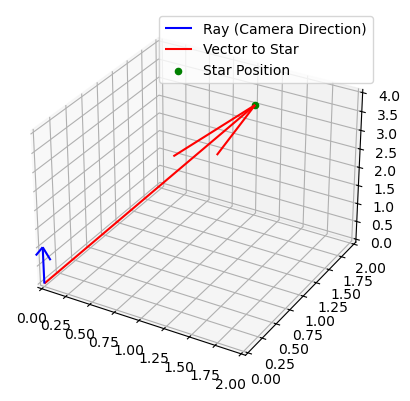

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define vectors
camera_position = np.arcamera_ray([0, 0, 0])
star_position = np.arcamera_ray([1, 2, 3])
camera_ray = np.arcamera_ray([0, 0, 1])  # Assuming the camera points along the z-axis

# Calculate vector to star
vector_to_star = star_position - camera_position

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(*camera_position, *camera_ray, color='blue', label='camera_ray (Camera Direction)')
ax.quiver(*camera_position, *vector_to_star, color='red', label='Vector to Star')
ax.scatter(*star_position, color='green', label='Star Position')
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
ax.set_zlim([0, 4])
ax.legend()
plt.show()


# Implement the Pinhole Camera Model


In [ ]:
def pinhole_camera_projection(star_coordinates, f, mu_x, mu_y, u_p, v_p, alpha):
    # Project 3D star coordinates to 2D image plane
    # f: focal length
    # mu_x, mu_y: pixel pitch in x and y directions
    # u_p, v_p: principal axes
    # alpha: skew coefficient
    x, y, z = star_coordinates
    dx = f/mu_x
    dy = f/mu_y
    # Project to 2D image plane
    K = np.array([
    [1/dx, alpha/(dx*dy), (dx*alpha - dy*u_p)/(dx*dy)],
    [0, 1/dy, -v_p/dy],
    [0, 0, 1]
    ])

    return u, v
